# 🚜 Predicting the sale price of bulldozers Using machine learning
 

### 1. Proble Definition
>Predict the auction sale price for a piece of heavy equipment to create a blue-book.

### 2. Data
>Data is taken from kaggle https://www.kaggle.com/c/bluebook-for-bulldozers/data .

>Train.csv : is the training set, which contains data through the end of 2011.

>Valid.csv : is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

>Test.csv : is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

### 3. Evaluation
>The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

> for more information > https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

### 4. Features
> Details about Features of data is here > https://docs.google.com/spreadsheets/d/1pwNcYvtYUKMIcCZVZxXpLj5Uht6-qWm_368mQozVvjs/edit?usp=sharing

### 5. Modeling
### 6. Experiment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

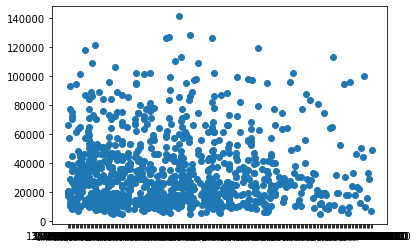

In [4]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [5]:
df.saledate

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

<AxesSubplot:ylabel='Frequency'>

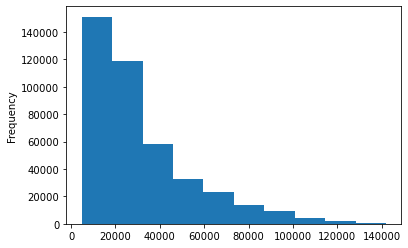

In [6]:
df.SalePrice.plot.hist()

In [7]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

### Parsing dates
when we work with time series data, we want to enrich the time & date component as much as possible.

we can do that by telling pandas which of our columns has dates in it Using the `parse_dates` parameter.

In [3]:
import datetime

In [9]:
# Import data again but this time parse dates
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False,
                 parse_dates=["saledate"])

In [10]:
df.saledate.dtype

dtype('<M8[ns]')

In [11]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [12]:
df.sort_values(by = ["saledate"], inplace = True)

In [13]:
df_temp = df.copy()

In [14]:
df_temp.head().T

205615  \
SalesID                                                             1646770   
SalePrice                                                              9500   
MachineID                                                           1126363   
ModelID                                                                8434   
datasource                                                              132   
auctioneerID                                                             18   
YearMade                                                               1974   
MachineHoursCurrentMeter                                                NaN   
UsageBand                                                               NaN   
saledate                                                1989-01-17 00:00:00   
fiModelDesc                                                            TD20   
fiBaseModel                                                            TD20   
fiSecondaryDesc                                                         NaN   
fiModelSeries                                                           NaN   
fiModelDescriptor                                                       NaN   
ProductSize                                                          Medium   
fiProductClassDesc        Track Type Tractor, Dozer - 105.0 to 130.0 Hor...   
state                                                                 Texas   
ProductGroup                                                            TTT   
ProductGroupDesc                                        Track Type Tractors   
Drive_System                                                            NaN   
Enclosure                                                             OROPS   
Forks                                                                   NaN   
Pad_Type                                                                NaN   
Ride_Control                                                            NaN   
Stick                                                                   NaN   
Transmission                                                   Direct Drive   
Turbocharged                                                            NaN   
Blade_Extension                                                         NaN   
Blade_Width                                                             NaN   
Enclosure_Type                                                          NaN   
Engine_Horsepower                                                       NaN   
Hydraulics                                                          2 Valve   
Pushblock                                                               NaN   
Ripper                                                  None or Unspecified   
Scarifier                                                               NaN   
Tip_Control                                                             NaN   
Tire_Size                                                               NaN   
Coupler                                                                 NaN   
Coupler_System                                                          NaN   
Grouser_Tracks                                                          NaN   
Hydraulics_Flow                                                         NaN   
Track_Type                                                              NaN   
Undercarriage_Pad_Width                                                 NaN   
Stick_Length                                                            NaN   
Thumb                                                                   NaN   
Pattern_Changer                                                         NaN   
Grouser_Type                                                            NaN   
Backhoe_Mounting                                        None or Unspecified   
Blade_Type                                                         Straight   
Travel_Controls                         

### Add datetime parameter for `saledate` column

In [15]:
df_temp["SaleYear"] = df_temp.saledate.dt.year
df_temp["SaleMonth"] = df_temp.saledate.dt.month
df_temp["SaleDay"] = df_temp.saledate.dt.day
df_temp["SaleDayOfWeek"] = df_temp.saledate.dt.dayofweek
df_temp["SaleDayOfYear"] = df_temp.saledate.dt.dayofyear

In [16]:
df_temp.head().T

205615  \
SalesID                                                             1646770   
SalePrice                                                              9500   
MachineID                                                           1126363   
ModelID                                                                8434   
datasource                                                              132   
auctioneerID                                                             18   
YearMade                                                               1974   
MachineHoursCurrentMeter                                                NaN   
UsageBand                                                               NaN   
saledate                                                1989-01-17 00:00:00   
fiModelDesc                                                            TD20   
fiBaseModel                                                            TD20   
fiSecondaryDesc                                                         NaN   
fiModelSeries                                                           NaN   
fiModelDescriptor                                                       NaN   
ProductSize                                                          Medium   
fiProductClassDesc        Track Type Tractor, Dozer - 105.0 to 130.0 Hor...   
state                                                                 Texas   
ProductGroup                                                            TTT   
ProductGroupDesc                                        Track Type Tractors   
Drive_System                                                            NaN   
Enclosure                                                             OROPS   
Forks                                                                   NaN   
Pad_Type                                                                NaN   
Ride_Control                                                            NaN   
Stick                                                                   NaN   
Transmission                                                   Direct Drive   
Turbocharged                                                            NaN   
Blade_Extension                                                         NaN   
Blade_Width                                                             NaN   
Enclosure_Type                                                          NaN   
Engine_Horsepower                                                       NaN   
Hydraulics                                                          2 Valve   
Pushblock                                                               NaN   
Ripper                                                  None or Unspecified   
Scarifier                                                               NaN   
Tip_Control                                                             NaN   
Tire_Size                                                               NaN   
Coupler                                                                 NaN   
Coupler_System                                                          NaN   
Grouser_Tracks                                                          NaN   
Hydraulics_Flow                                                         NaN   
Track_Type                                                              NaN   
Undercarriage_Pad_Width                                                 NaN   
Stick_Length                                                            NaN   
Thumb                                                                   NaN   
Pattern_Changer                                                         NaN   
Grouser_Type                                                            NaN   
Backhoe_Mounting                                        None or Unspecified   
Blade_Type                                                         Straight   
Travel_Controls                         

In [17]:
df_temp.saledate.head().dt.day

205615    17
274835    31
141296    31
212552    31
62755     31
Name: saledate, dtype: int64

In [18]:
df_temp.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [19]:
df_temp.saledate.head().dt.month

205615    1
274835    1
141296    1
212552    1
62755     1
Name: saledate, dtype: int64

In [20]:
## Remove "saledate" feature
df_temp.drop("saledate",axis=1, inplace=True)

In [21]:
df_temp.head().T

205615  \
SalesID                                                             1646770   
SalePrice                                                              9500   
MachineID                                                           1126363   
ModelID                                                                8434   
datasource                                                              132   
auctioneerID                                                             18   
YearMade                                                               1974   
MachineHoursCurrentMeter                                                NaN   
UsageBand                                                               NaN   
fiModelDesc                                                            TD20   
fiBaseModel                                                            TD20   
fiSecondaryDesc                                                         NaN   
fiModelSeries                                                           NaN   
fiModelDescriptor                                                       NaN   
ProductSize                                                          Medium   
fiProductClassDesc        Track Type Tractor, Dozer - 105.0 to 130.0 Hor...   
state                                                                 Texas   
ProductGroup                                                            TTT   
ProductGroupDesc                                        Track Type Tractors   
Drive_System                                                            NaN   
Enclosure                                                             OROPS   
Forks                                                                   NaN   
Pad_Type                                                                NaN   
Ride_Control                                                            NaN   
Stick                                                                   NaN   
Transmission                                                   Direct Drive   
Turbocharged                                                            NaN   
Blade_Extension                                                         NaN   
Blade_Width                                                             NaN   
Enclosure_Type                                                          NaN   
Engine_Horsepower                                                       NaN   
Hydraulics                                                          2 Valve   
Pushblock                                                               NaN   
Ripper                                                  None or Unspecified   
Scarifier                                                               NaN   
Tip_Control                                                             NaN   
Tire_Size                                                               NaN   
Coupler                                                                 NaN   
Coupler_System                                                          NaN   
Grouser_Tracks                                                          NaN   
Hydraulics_Flow                                                         NaN   
Track_Type                                                              NaN   
Undercarriage_Pad_Width                                                 NaN   
Stick_Length                                                            NaN   
Thumb                                                                   NaN   
Pattern_Changer                                                         NaN   
Grouser_Type                                                            NaN   
Backhoe_Mounting                                        None or Unspecified   
Blade_Type                                                         Straight   
Travel_Controls                                         None or Unspecified   
Differential_Type                       

In [22]:
## Check the values of different columns
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

## Modeling

In [23]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs = -1,
                              random_state=42)
model.fit(df_temp.drop("SalePrice", axis = 1), df_temp.SalePrice)


ValueError: could not convert string to float: 'Low'

In [26]:
pd.api.types.is_string_dtype(df_temp.UsageBand)

True

In [47]:
# find the columns which contain string
for label, content in df_temp.items() :
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [33]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [48]:
for label, content in df_temp.items() :
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [49]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [50]:
df_temp["state"].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [51]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [55]:
# Check missing data
df_temp.isnull().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

## save preprocessed data

In [65]:
# Export current temp dataframe
df_temp.to_csv("data/bluebook-for-bulldozers/train_temp.csv",
               index = False)

In [148]:
# Import preprocessed data
df_tm = pd.read_csv("data/bluebook-for-bulldozers/train_temp.csv",
                     low_memory=False)

In [67]:
df_tm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [63]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

#### Fill numerical missing value first

In [117]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_temp[label+"_is_missing"] = pd.isnull(content)
            df_temp[label] = content.fillna(content.median())
df_temp.info()

NameError: name 'df_temp' is not defined

# Filing and turning categorical variable into numbers

In [71]:
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content) :
        df_temp[label + "_is_missing"] = pd.isnull(content)
        df_temp[label] = pd.Categorical(content).codes+1

In [72]:
pd.Categorical(df_temp["UsageBand"]).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [73]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [74]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs = -1,
                              random_state=42)
model.fit(df_temp.drop("SalePrice", axis = 1), df_temp.SalePrice)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [75]:
# score the model
model.score(df_temp.drop("SalePrice", axis = 1), df_temp.SalePrice)

0.9875468079970562

### Spliting data into train and validation set.

In [76]:
df_temp.head()

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
205615  1646770     9500.0    1126363     8434         132          18.0   
274835  1821514    14000.0    1194089    10150         132          99.0   
141296  1505138    50000.0    1473654     4139         132          99.0   
212552  1671174    16000.0    1327630     8591         132          99.0   
62755   1329056    22000.0    1336053     4089         132          99.0   

        YearMade  MachineHoursCurrentMeter  UsageBand  fiModelDesc  ...  \
205615      1974                       0.0          0         4593  ...   
274835      1980                       0.0          0         1820  ...   
141296      1978                       0.0          0         2348  ...   
212552      1980                       0.0          0         1819  ...   
62755       1984                       0.0          0         2119  ...   

        Undercarriage_Pad_Width_is_missing  Stick_Length_is_missing  \
205615                                True                     True   
274835                                True                     True   
141296                                True                     True   
212552                                True                     True   
62755                                 True                     True   

        Thumb_is_missing  Pattern_Changer_is_missing  Grouser_Type_is_missing  \
205615              True                        True                     True   
274835              True                        True                     True   
141296              True                        True                     True   
212552              True                        True                     True   
62755               True                        True                     True   

        Backhoe_Mounting_is_missing  Blade_Type_is_missing  \
205615                        False                  False   
274835                         True                   True   
141296                        False                  False   
212552                         True                   True   
62755                         False                  False   

        Travel_Controls_is_missing  Differential_Type_is_missing  \
205615                       False                          True   
274835                        True                         False   
141296                       False                          True   
212552                        True                         False   
62755                        False                          True   

        Steering_Controls_is_missing  
205615                          True  
274835                         False  
141296                          True  
212552                         False  
62755                           True  

[5 rows x 103 columns]

In [77]:
df_temp.SaleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: SaleYear, dtype: int64

In [98]:
# Split data into training and validation
df_val = df_temp[df_temp.SaleYear == 2012]
df_train = df_temp[df_temp.SaleYear != 2012]

In [94]:
np.random.seed(42)
# Split data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice


X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((401125, 102), (11573, 102), (401125,), (11573,))

In [95]:
%%time
model2 = RandomForestRegressor(n_jobs=-1,
                               random_state=42)
model2.fit(X_train, y_train)

Wall time: 1h 45min 13s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [97]:
model2.score(X_valid, y_valid)

0.8727175969771312

In [4]:
df_tm = pd.read_csv("data/bluebook-for-bulldozers/train_temp.csv",
                     low_memory=False)

In [5]:
for label, content in df_tm.items() :
    if pd.api.types.is_string_dtype(content):
        df_tm[label] = content.astype("category").cat.as_ordered()

### Spliting data into train and validation set.

In [6]:
# Split data into training and validation
df_val = df_tm[df_tm.SaleYear == 2012]
df_train = df_tm[df_tm.SaleYear != 2012]

In [7]:
df_val.info(), df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11573 entries, 401125 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SalesID                   11573 non-null  int64   
 1   SalePrice                 11573 non-null  float64 
 2   MachineID                 11573 non-null  int64   
 3   ModelID                   11573 non-null  int64   
 4   datasource                11573 non-null  int64   
 5   auctioneerID              11573 non-null  float64 
 6   YearMade                  11573 non-null  int64   
 7   MachineHoursCurrentMeter  4739 non-null   float64 
 8   UsageBand                 4031 non-null   category
 9   fiModelDesc               11573 non-null  category
 10  fiBaseModel               11573 non-null  category
 11  fiSecondaryDesc           8037 non-null   category
 12  fiModelSeries             1759 non-null   category
 13  fiModelDescriptor         2897 non-null 

(None, None)

In [8]:
for label, content in df_val.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_val[label+"_is_missing"] = pd.isnull(content)
            df_val[label] = content.fillna(content.median())

C:\Users\manglesh\Desktop\Bulldozer-Project\env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\manglesh\Desktop\Bulldozer-Project\env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [9]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11573 entries, 401125 to 412697
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   SalesID                              11573 non-null  int64   
 1   SalePrice                            11573 non-null  float64 
 2   MachineID                            11573 non-null  int64   
 3   ModelID                              11573 non-null  int64   
 4   datasource                           11573 non-null  int64   
 5   auctioneerID                         11573 non-null  float64 
 6   YearMade                             11573 non-null  int64   
 7   MachineHoursCurrentMeter             11573 non-null  float64 
 8   UsageBand                            4031 non-null   category
 9   fiModelDesc                          11573 non-null  category
 10  fiBaseModel                          11573 non-null  category
 11  fiSeconda

In [10]:
for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_train[label+"_is_missing"] = pd.isnull(content)
            df_train[label] = content.fillna(content.median())

C:\Users\manglesh\Desktop\Bulldozer-Project\env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\manglesh\Desktop\Bulldozer-Project\env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 0 to 401124
Data columns (total 59 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   SalesID                              401125 non-null  int64   
 1   SalePrice                            401125 non-null  float64 
 2   MachineID                            401125 non-null  int64   
 3   ModelID                              401125 non-null  int64   
 4   datasource                           401125 non-null  int64   
 5   auctioneerID                         401125 non-null  float64 
 6   YearMade                             401125 non-null  int64   
 7   MachineHoursCurrentMeter             401125 non-null  float64 
 8   UsageBand                            69639 non-null   category
 9   fiModelDesc                          401125 non-null  category
 10  fiBaseModel                          401125 non-null  category
 11  

In [12]:
for label, content in df_train.items():
    if not pd.api.types.is_numeric_dtype(content) :
       
        df_train[label] = pd.Categorical(content).codes+1

C:\Users\manglesh\Desktop\Bulldozer-Project\env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [13]:
for label, content in df_val.items():
    if not pd.api.types.is_numeric_dtype(content) :

        df_val[label] = pd.Categorical(content).codes+1

C:\Users\manglesh\Desktop\Bulldozer-Project\env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
np.random.seed(42)
# Split data into X & y
X_train, y_train = df_train.drop(["SalePrice", "auctioneerID_is_missing"], axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice


X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((401125, 57), (11573, 57), (401125,), (11573,))

In [15]:
X_train.isna().sum()

SalesID                                0
MachineID                              0
ModelID                                0
datasource                             0
auctioneerID                           0
YearMade                               0
MachineHoursCurrentMeter               0
UsageBand                              0
fiModelDesc                            0
fiBaseModel                            0
fiSecondaryDesc                        0
fiModelSeries                          0
fiModelDescriptor                      0
ProductSize                            0
fiProductClassDesc                     0
state                                  0
ProductGroup                           0
ProductGroupDesc                       0
Drive_System                           0
Enclosure                              0
Forks                                  0
Pad_Type                               0
Ride_Control                           0
Stick                                  0
Transmission    

In [16]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculate root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_score(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE" : mean_absolute_error(y_train, train_preds),
              "Valid MAE" : mean_absolute_error(y_valid, val_preds),
              "Train RMSLE" : rmsle(y_train, train_preds),
              "Valid RMSLE" : rmsle(y_valid, val_preds),
              "Traing R^2" : r2_score(y_train, train_preds),
              "Valid R^2" : r2_score(y_valid, val_preds)}
    return scores

In [17]:
%%time
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(n_jobs=-1,
                               random_state=42,
                                max_samples = 10000)
model3.fit(X_train, y_train)

Wall time: 21.5 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [18]:
show_score(model3)

{'Training MAE': 5562.211869442193,
 'Valid MAE': 7189.976920418216,
 'Train RMSLE': 0.25773367280621606,
 'Valid RMSLE': 0.2945034868731808,
 'Traing R^2': 0.8606330002042692,
 'Valid R^2': 0.8316865883099018}

In [19]:
grid = {'max_depth' : [None, 3, 5, 10],
        'min_samples_split' : np.arange(2, 20, 2),
        'max_leaf_nodes' : np.arange(1, 20, 2),
        'n_estimators' : np.arange(10, 100, 10),
        'max_samples' : [10000],
        'max_features' : [0.5, 1, 'sqrt', 'auto']}

### Hyperparameter tuning with RandomizedSearchCV

In [20]:
%%time
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

model4 = RandomForestRegressor(n_jobs=-1,
                               random_state=42)

rs_model = RandomizedSearchCV(model4,
                              grid,
                              n_iter = 2,
                              cv = 5,
                              verbose = True)
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\manglesh\Desktop\Bulldozer-Project\env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\manglesh\Desktop\Bulldozer-Project\env\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\manglesh\Desktop\Bulldozer-Project\env\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\manglesh\Desktop\Bulldozer-Project\env\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\manglesh\Desktop\Bulldozer-Project\env\lib\site

C:\Users\manglesh\Desktop\Bulldozer-Project\env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\manglesh\Desktop\Bulldozer-Project\env\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\manglesh\Desktop\Bulldozer-Project\env\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\manglesh\Desktop\Bulldozer-Project\env\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\manglesh\Desktop\Bulldozer-Project\env\lib\site-packages\joblib\parallel.py", line 253, in __call__
    for func, args, kwargs i

Wall time: 1min 16s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_leaf_nodes': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'max_samples': [10000],
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [21]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 14,
 'max_samples': 10000,
 'max_leaf_nodes': 19,
 'max_features': 0.5,
 'max_depth': 5}

In [22]:
show_score(rs_model)

{'Training MAE': 10156.489973172535,
 'Valid MAE': 11802.992979535367,
 'Train RMSLE': 0.43897794846646043,
 'Valid RMSLE': 0.4588709061910899,
 'Traing R^2': 0.6038894545495457,
 'Valid R^2': 0.6062767444028616}

### Train a model with the best Hyperparameter

In [25]:
%%time
ideal_model = RandomForestRegressor(n_estimators=40, 
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)

Wall time: 236 µs


In [26]:
%%time
ideal_model.fit(X_train, y_train)

Wall time: 1min 28s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [27]:
show_score(ideal_model)

{'Training MAE': 2966.9898096122897,
 'Valid MAE': 5979.567807944125,
 'Train RMSLE': 0.14513857439565717,
 'Valid RMSLE': 0.24800073030764186,
 'Traing R^2': 0.9584474943140279,
 'Valid R^2': 0.8805941684406203}

# Make pediction on our test data

In [248]:
test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                   parse_dates=["saledate"])

In [249]:
test.head()

SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1227829    1006309     3168         121             3      1999   
1  1227844    1022817     7271         121             3      1000   
2  1227847    1031560    22805         121             3      2004   
3  1227848      56204     1269         121             3      2006   
4  1227863    1053887    22312         121             3      2005   

   MachineHoursCurrentMeter UsageBand   saledate fiModelDesc  ...  \
0                    3688.0       Low 2012-05-03        580G  ...   
1                   28555.0      High 2012-05-10         936  ...   
2                    6038.0    Medium 2012-05-10    EC210BLC  ...   
3                    8940.0      High 2012-05-10       330CL  ...   
4                    2286.0       Low 2012-05-10        650K  ...   

  Undercarriage_Pad_Width         Stick_Length   Thumb      Pattern_Changer  \
0                     NaN                  NaN     NaN                  NaN   
1                     NaN                  NaN     NaN                  NaN   
2     None or Unspecified                9' 6"  Manual  None or Unspecified   
3     None or Unspecified  None or Unspecified  Manual                  Yes   
4                     NaN                  NaN     NaN                  NaN   

  Grouser_Type     Backhoe_Mounting Blade_Type      Travel_Controls  \
0          NaN                  NaN        NaN                  NaN   
1          NaN                  NaN        NaN                  NaN   
2       Double                  NaN        NaN                  NaN   
3       Triple                  NaN        NaN                  NaN   
4          NaN  None or Unspecified        PAT  None or Unspecified   

  Differential_Type Steering_Controls  
0               NaN               NaN  
1          Standard      Conventional  
2               NaN               NaN  
3               NaN               NaN  
4               NaN               NaN  

[5 rows x 52 columns]

In [250]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

## Preprocessing data

In [251]:
def preprocess_data(df):
    df["SaleYear"] = df.saledate.dt.year
    df["SaleMonth"] = df.saledate.dt.month
    df["SaleDay"] = df.saledate.dt.day
    df["SaleDayOfWeek"] = df.saledate.dt.dayofweek
    df["SaleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis = 1, inplace=True)
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label] = content.fillna(content.median())
        
        if not pd.api.types.is_numeric_dtype(content) :
            df[label] = pd.Categorical(content).codes+1
    return df

In [252]:
df_test = preprocess_data(test)
df_test['MachineHoursCurrentMeter'+'_is_missing'] = False
df_test.head()

SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1227829    1006309     3168         121             3      1999   
1  1227844    1022817     7271         121             3      1000   
2  1227847    1031560    22805         121             3      2004   
3  1227848      56204     1269         121             3      2006   
4  1227863    1053887    22312         121             3      2005   

   MachineHoursCurrentMeter  UsageBand  fiModelDesc  fiBaseModel  ...  \
0                    3688.0          2          499          180  ...   
1                   28555.0          1          831          292  ...   
2                    6038.0          3         1177          404  ...   
3                    8940.0          1          287          113  ...   
4                    2286.0          2          566          196  ...   

   Blade_Type  Travel_Controls  Differential_Type  Steering_Controls  \
0           0                0                  0                  0   
1           0                0                  3                  2   
2           0                0                  0                  0   
3           0                0                  0                  0   
4           4                5                  0                  0   

   SaleYear  SaleMonth  SaleDay  SaleDayOfWeek  SaleDayOfYear  \
0      2012          5        3              3            124   
1      2012          5       10              3            131   
2      2012          5       10              3            131   
3      2012          5       10              3            131   
4      2012          5       10              3            131   

   MachineHoursCurrentMeter_is_missing  
0                                False  
1                                False  
2                                False  
3                                False  
4                                False  

[5 rows x 57 columns]

In [253]:
X_train.shape, df_test.shape

((401125, 57), (12457, 57))

In [254]:
set(X_train.columns) - set(df_test.columns)

set()

In [255]:
test_preds = ideal_model.predict(df_test)

In [256]:
len(test_preds)

12457

In [257]:
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds

SalesID     SalePrice
0      1227829  17969.066051
1      1227844  16817.995895
2      1227847  46708.579940
3      1227848  66510.841259
4      1227863  60878.757737
...        ...           ...
12452  6643171  39083.385545
12453  6643173  13095.006118
12454  6643184  13011.462105
12455  6643186  16241.737669
12456  6643196  28742.075694

[12457 rows x 2 columns]

In [258]:
df_preds.to_csv("data/bluebook-for-bulldozers/test_predictions.csv")

In [268]:
len(ideal_model.feature_importances_)

57

In [273]:
len(df_test.columns)

57

In [279]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n = 20) :
    df = (pd.DataFrame({"features":columns,
                        "feature_importances" : importances})
          .sort_values("feature_importances", ascending = False)
          .reset_index(drop=True))
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Feature")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

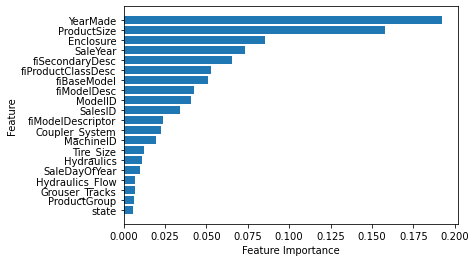

In [280]:
plot_features(X_train.columns, ideal_model.feature_importances_)

# Self : Experimenting with CatboostRegressor

In [320]:
r4 = CatBoostRegressor(random_state=42)

In [321]:
r4.fit(X_train, y_train)

Learning rate set to 0.113445
0:	learn: 21705.9703849	total: 162ms	remaining: 2m 42s
1:	learn: 20605.8089340	total: 319ms	remaining: 2m 39s
2:	learn: 19698.1045345	total: 473ms	remaining: 2m 37s
3:	learn: 18897.4521053	total: 624ms	remaining: 2m 35s
4:	learn: 18222.0772213	total: 777ms	remaining: 2m 34s
5:	learn: 17555.5450251	total: 926ms	remaining: 2m 33s
6:	learn: 17060.8422047	total: 1.06s	remaining: 2m 30s
7:	learn: 16646.6420794	total: 1.19s	remaining: 2m 28s
8:	learn: 16217.0372384	total: 1.33s	remaining: 2m 26s
9:	learn: 15844.3964760	total: 1.48s	remaining: 2m 26s
10:	learn: 15516.8058375	total: 1.62s	remaining: 2m 25s
11:	learn: 15203.3845712	total: 1.77s	remaining: 2m 25s
12:	learn: 14880.8672681	total: 1.91s	remaining: 2m 25s
13:	learn: 14650.7772630	total: 2.04s	remaining: 2m 23s
14:	learn: 14411.2421499	total: 2.19s	remaining: 2m 23s
15:	learn: 14149.5515313	total: 2.33s	remaining: 2m 23s
16:	learn: 13955.1971313	total: 2.46s	remaining: 2m 22s
17:	learn: 13773.6782687	tot

148:	learn: 9191.2888146	total: 19.9s	remaining: 1m 53s
149:	learn: 9185.4100173	total: 20s	remaining: 1m 53s
150:	learn: 9176.9569608	total: 20.1s	remaining: 1m 53s
151:	learn: 9169.4507107	total: 20.2s	remaining: 1m 52s
152:	learn: 9159.8159954	total: 20.4s	remaining: 1m 52s
153:	learn: 9148.7614024	total: 20.5s	remaining: 1m 52s
154:	learn: 9140.4157720	total: 20.6s	remaining: 1m 52s
155:	learn: 9131.6673657	total: 20.7s	remaining: 1m 52s
156:	learn: 9124.3644214	total: 20.9s	remaining: 1m 52s
157:	learn: 9113.6211430	total: 21s	remaining: 1m 51s
158:	learn: 9104.0524608	total: 21.1s	remaining: 1m 51s
159:	learn: 9094.6103280	total: 21.3s	remaining: 1m 51s
160:	learn: 9081.4381642	total: 21.4s	remaining: 1m 51s
161:	learn: 9076.2948672	total: 21.5s	remaining: 1m 51s
162:	learn: 9069.0232617	total: 21.7s	remaining: 1m 51s
163:	learn: 9060.9281700	total: 21.8s	remaining: 1m 51s
164:	learn: 9052.7555793	total: 21.9s	remaining: 1m 51s
165:	learn: 9045.4064328	total: 22.1s	remaining: 1m 

296:	learn: 8301.6833054	total: 39.7s	remaining: 1m 34s
297:	learn: 8298.9326856	total: 39.9s	remaining: 1m 33s
298:	learn: 8296.2128696	total: 40s	remaining: 1m 33s
299:	learn: 8292.8709840	total: 40.1s	remaining: 1m 33s
300:	learn: 8289.5407928	total: 40.3s	remaining: 1m 33s
301:	learn: 8285.9202457	total: 40.4s	remaining: 1m 33s
302:	learn: 8282.9993955	total: 40.5s	remaining: 1m 33s
303:	learn: 8278.8459243	total: 40.7s	remaining: 1m 33s
304:	learn: 8275.9054125	total: 40.8s	remaining: 1m 32s
305:	learn: 8272.2400280	total: 40.9s	remaining: 1m 32s
306:	learn: 8268.9865519	total: 41.1s	remaining: 1m 32s
307:	learn: 8265.2740188	total: 41.2s	remaining: 1m 32s
308:	learn: 8261.2722151	total: 41.3s	remaining: 1m 32s
309:	learn: 8257.0164613	total: 41.5s	remaining: 1m 32s
310:	learn: 8255.1127856	total: 41.6s	remaining: 1m 32s
311:	learn: 8252.9991399	total: 41.8s	remaining: 1m 32s
312:	learn: 8248.6077049	total: 41.9s	remaining: 1m 31s
313:	learn: 8244.3224380	total: 42s	remaining: 1m 

444:	learn: 7904.1368731	total: 59.2s	remaining: 1m 13s
445:	learn: 7902.4867531	total: 59.3s	remaining: 1m 13s
446:	learn: 7901.0176552	total: 59.4s	remaining: 1m 13s
447:	learn: 7898.8508244	total: 59.5s	remaining: 1m 13s
448:	learn: 7897.1406515	total: 59.6s	remaining: 1m 13s
449:	learn: 7894.5890639	total: 59.7s	remaining: 1m 13s
450:	learn: 7892.6017719	total: 59.9s	remaining: 1m 12s
451:	learn: 7890.8785972	total: 1m	remaining: 1m 12s
452:	learn: 7888.0130948	total: 1m	remaining: 1m 12s
453:	learn: 7885.2119046	total: 1m	remaining: 1m 12s
454:	learn: 7884.1115371	total: 1m	remaining: 1m 12s
455:	learn: 7881.4280984	total: 1m	remaining: 1m 12s
456:	learn: 7879.8761616	total: 1m	remaining: 1m 12s
457:	learn: 7876.7913548	total: 1m	remaining: 1m 11s
458:	learn: 7874.2481794	total: 1m	remaining: 1m 11s
459:	learn: 7872.2477584	total: 1m 1s	remaining: 1m 11s
460:	learn: 7871.0831998	total: 1m 1s	remaining: 1m 11s
461:	learn: 7868.9360918	total: 1m 1s	remaining: 1m 11s
462:	learn: 7866

593:	learn: 7646.8470072	total: 1m 18s	remaining: 53.8s
594:	learn: 7644.7159847	total: 1m 18s	remaining: 53.7s
595:	learn: 7643.6246583	total: 1m 18s	remaining: 53.5s
596:	learn: 7642.1989338	total: 1m 19s	remaining: 53.4s
597:	learn: 7640.1137361	total: 1m 19s	remaining: 53.3s
598:	learn: 7637.7364810	total: 1m 19s	remaining: 53.2s
599:	learn: 7636.4913851	total: 1m 19s	remaining: 53s
600:	learn: 7634.7405469	total: 1m 19s	remaining: 52.9s
601:	learn: 7633.3604815	total: 1m 19s	remaining: 52.8s
602:	learn: 7632.7282326	total: 1m 19s	remaining: 52.6s
603:	learn: 7631.0725401	total: 1m 20s	remaining: 52.5s
604:	learn: 7630.2926844	total: 1m 20s	remaining: 52.4s
605:	learn: 7628.4472856	total: 1m 20s	remaining: 52.2s
606:	learn: 7626.6617232	total: 1m 20s	remaining: 52.1s
607:	learn: 7624.8710436	total: 1m 20s	remaining: 52s
608:	learn: 7623.3523621	total: 1m 20s	remaining: 51.8s
609:	learn: 7622.0792971	total: 1m 20s	remaining: 51.7s
610:	learn: 7620.2897576	total: 1m 20s	remaining: 51

741:	learn: 7468.4943893	total: 1m 38s	remaining: 34.1s
742:	learn: 7467.7695743	total: 1m 38s	remaining: 34s
743:	learn: 7466.9414935	total: 1m 38s	remaining: 33.8s
744:	learn: 7466.0695760	total: 1m 38s	remaining: 33.7s
745:	learn: 7464.7758023	total: 1m 38s	remaining: 33.6s
746:	learn: 7464.1748174	total: 1m 38s	remaining: 33.4s
747:	learn: 7463.5145825	total: 1m 38s	remaining: 33.3s
748:	learn: 7462.6312447	total: 1m 38s	remaining: 33.2s
749:	learn: 7461.9496820	total: 1m 39s	remaining: 33s
750:	learn: 7460.9638997	total: 1m 39s	remaining: 32.9s
751:	learn: 7459.8266589	total: 1m 39s	remaining: 32.8s
752:	learn: 7458.2676698	total: 1m 39s	remaining: 32.6s
753:	learn: 7457.4314153	total: 1m 39s	remaining: 32.5s
754:	learn: 7456.7148014	total: 1m 39s	remaining: 32.4s
755:	learn: 7456.1257630	total: 1m 39s	remaining: 32.2s
756:	learn: 7454.8265179	total: 1m 40s	remaining: 32.1s
757:	learn: 7453.9753195	total: 1m 40s	remaining: 32s
758:	learn: 7452.5513684	total: 1m 40s	remaining: 31.8

888:	learn: 7325.9081776	total: 1m 58s	remaining: 14.8s
889:	learn: 7324.4333507	total: 1m 58s	remaining: 14.7s
890:	learn: 7323.6553873	total: 1m 58s	remaining: 14.6s
891:	learn: 7323.0851621	total: 1m 59s	remaining: 14.4s
892:	learn: 7322.4255717	total: 1m 59s	remaining: 14.3s
893:	learn: 7321.4701592	total: 1m 59s	remaining: 14.2s
894:	learn: 7320.0102870	total: 1m 59s	remaining: 14s
895:	learn: 7319.0925264	total: 1m 59s	remaining: 13.9s
896:	learn: 7318.3668994	total: 1m 59s	remaining: 13.8s
897:	learn: 7317.6723078	total: 1m 59s	remaining: 13.6s
898:	learn: 7316.8892445	total: 2m	remaining: 13.5s
899:	learn: 7315.6637247	total: 2m	remaining: 13.4s
900:	learn: 7315.1162940	total: 2m	remaining: 13.2s
901:	learn: 7314.1112512	total: 2m	remaining: 13.1s
902:	learn: 7312.9668569	total: 2m	remaining: 13s
903:	learn: 7312.1649341	total: 2m	remaining: 12.8s
904:	learn: 7310.3787118	total: 2m 1s	remaining: 12.7s
905:	learn: 7309.3770865	total: 2m 1s	remaining: 12.6s
906:	learn: 7308.19660

In [324]:
y_preds = r4.predict(X_valid)

In [322]:
def RMSLE(y_true, y_preds):
    return np.sqrt(mean_squared_log_error(y_true, y_preds))

In [325]:
RMSLE(y_valid, y_preds)

0.262758029375075

In [315]:
from catboost import CatBoostRegressor
model3 = CatBoostRegressor(random_state=42)

In [353]:
parameters = {
              'learning_rate' : [None, 0.01, 0.05, 0.1]
              }

In [354]:
gs_cb = GridSearchCV(model3,
                     parameters,
                     verbose = True,
                     cv = 2,
                     n_jobs=-1
                     )

In [355]:
%%time
gs_cb.fit(X_train[:1000], y_train[:1000])

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   26.4s finished


0:	learn: 19231.3705408	total: 4.22ms	remaining: 4.22s
1:	learn: 18721.0002497	total: 8.16ms	remaining: 4.07s
2:	learn: 18202.7686482	total: 11.5ms	remaining: 3.83s
3:	learn: 17791.1743650	total: 15ms	remaining: 3.74s
4:	learn: 17419.2697434	total: 18.9ms	remaining: 3.76s
5:	learn: 17003.6424371	total: 23.1ms	remaining: 3.82s
6:	learn: 16643.2862867	total: 26.6ms	remaining: 3.77s
7:	learn: 16258.6026576	total: 30.5ms	remaining: 3.78s
8:	learn: 15848.1036463	total: 33.7ms	remaining: 3.71s
9:	learn: 15488.1275996	total: 37.5ms	remaining: 3.71s
10:	learn: 15234.9072123	total: 40.9ms	remaining: 3.67s
11:	learn: 14948.2389017	total: 44ms	remaining: 3.62s
12:	learn: 14666.3550068	total: 47.1ms	remaining: 3.58s
13:	learn: 14358.7306308	total: 51.2ms	remaining: 3.6s
14:	learn: 14073.1810829	total: 55.2ms	remaining: 3.63s
15:	learn: 13817.6235021	total: 59.2ms	remaining: 3.64s
16:	learn: 13548.6621183	total: 63.1ms	remaining: 3.65s
17:	learn: 13339.7865607	total: 66.6ms	remaining: 3.63s
18:	lea

174:	learn: 6277.6156345	total: 655ms	remaining: 3.09s
175:	learn: 6269.1578277	total: 660ms	remaining: 3.09s
176:	learn: 6252.1238194	total: 664ms	remaining: 3.09s
177:	learn: 6224.7746191	total: 668ms	remaining: 3.08s
178:	learn: 6216.4416091	total: 671ms	remaining: 3.08s
179:	learn: 6203.3381197	total: 674ms	remaining: 3.07s
180:	learn: 6185.0908421	total: 677ms	remaining: 3.06s
181:	learn: 6180.0050837	total: 680ms	remaining: 3.05s
182:	learn: 6164.3761203	total: 682ms	remaining: 3.04s
183:	learn: 6138.8902412	total: 685ms	remaining: 3.04s
184:	learn: 6125.0297490	total: 688ms	remaining: 3.03s
185:	learn: 6118.2406228	total: 690ms	remaining: 3.02s
186:	learn: 6109.4368849	total: 693ms	remaining: 3.01s
187:	learn: 6107.7205595	total: 696ms	remaining: 3.01s
188:	learn: 6092.5407622	total: 700ms	remaining: 3s
189:	learn: 6079.2841109	total: 703ms	remaining: 3s
190:	learn: 6077.3508791	total: 706ms	remaining: 2.99s
191:	learn: 6055.9720212	total: 710ms	remaining: 2.99s
192:	learn: 6051

361:	learn: 4667.4114182	total: 1.29s	remaining: 2.28s
362:	learn: 4655.0938750	total: 1.3s	remaining: 2.27s
363:	learn: 4646.1888430	total: 1.3s	remaining: 2.27s
364:	learn: 4640.1973711	total: 1.3s	remaining: 2.27s
365:	learn: 4631.0028914	total: 1.31s	remaining: 2.26s
366:	learn: 4622.9294840	total: 1.31s	remaining: 2.26s
367:	learn: 4610.3809795	total: 1.31s	remaining: 2.26s
368:	learn: 4600.1567291	total: 1.32s	remaining: 2.25s
369:	learn: 4596.7126144	total: 1.32s	remaining: 2.25s
370:	learn: 4588.4921358	total: 1.32s	remaining: 2.24s
371:	learn: 4575.3840512	total: 1.32s	remaining: 2.24s
372:	learn: 4567.3982279	total: 1.33s	remaining: 2.23s
373:	learn: 4559.3734746	total: 1.33s	remaining: 2.23s
374:	learn: 4552.8066171	total: 1.33s	remaining: 2.22s
375:	learn: 4543.4725061	total: 1.34s	remaining: 2.22s
376:	learn: 4537.0645768	total: 1.34s	remaining: 2.21s
377:	learn: 4529.7462964	total: 1.34s	remaining: 2.21s
378:	learn: 4520.8732714	total: 1.35s	remaining: 2.21s
379:	learn: 4

550:	learn: 3626.8711618	total: 1.93s	remaining: 1.57s
551:	learn: 3623.8583150	total: 1.94s	remaining: 1.57s
552:	learn: 3618.6051744	total: 1.94s	remaining: 1.57s
553:	learn: 3614.6595825	total: 1.94s	remaining: 1.56s
554:	learn: 3611.2018478	total: 1.95s	remaining: 1.56s
555:	learn: 3605.0200607	total: 1.95s	remaining: 1.55s
556:	learn: 3600.9584243	total: 1.95s	remaining: 1.55s
557:	learn: 3591.9297102	total: 1.95s	remaining: 1.55s
558:	learn: 3583.4758355	total: 1.96s	remaining: 1.54s
559:	learn: 3579.3504403	total: 1.96s	remaining: 1.54s
560:	learn: 3577.6227323	total: 1.96s	remaining: 1.54s
561:	learn: 3571.1182804	total: 1.97s	remaining: 1.53s
562:	learn: 3569.4764332	total: 1.97s	remaining: 1.53s
563:	learn: 3565.7133650	total: 1.98s	remaining: 1.53s
564:	learn: 3562.7970308	total: 1.98s	remaining: 1.52s
565:	learn: 3561.4437489	total: 1.98s	remaining: 1.52s
566:	learn: 3556.8243969	total: 1.99s	remaining: 1.52s
567:	learn: 3554.0784646	total: 1.99s	remaining: 1.51s
568:	learn

718:	learn: 3007.7918757	total: 2.58s	remaining: 1.01s
719:	learn: 3004.6506762	total: 2.58s	remaining: 1s
720:	learn: 3000.9456690	total: 2.58s	remaining: 1s
721:	learn: 2999.9784680	total: 2.59s	remaining: 996ms
722:	learn: 2993.8189303	total: 2.59s	remaining: 993ms
723:	learn: 2988.7945800	total: 2.6s	remaining: 989ms
724:	learn: 2985.1022123	total: 2.6s	remaining: 986ms
725:	learn: 2984.2432955	total: 2.6s	remaining: 983ms
726:	learn: 2981.5692241	total: 2.61s	remaining: 980ms
727:	learn: 2978.3662612	total: 2.61s	remaining: 976ms
728:	learn: 2977.5855557	total: 2.61s	remaining: 972ms
729:	learn: 2974.4496635	total: 2.62s	remaining: 968ms
730:	learn: 2973.7049286	total: 2.62s	remaining: 964ms
731:	learn: 2971.8206340	total: 2.62s	remaining: 960ms
732:	learn: 2967.3477036	total: 2.63s	remaining: 957ms
733:	learn: 2965.6272737	total: 2.63s	remaining: 953ms
734:	learn: 2964.3331720	total: 2.63s	remaining: 949ms
735:	learn: 2963.1381049	total: 2.64s	remaining: 946ms
736:	learn: 2961.67

897:	learn: 2563.6082095	total: 3.4s	remaining: 386ms
898:	learn: 2562.2426638	total: 3.4s	remaining: 382ms
899:	learn: 2558.8998041	total: 3.41s	remaining: 379ms
900:	learn: 2557.9098086	total: 3.41s	remaining: 375ms
901:	learn: 2555.7928370	total: 3.42s	remaining: 371ms
902:	learn: 2554.3005918	total: 3.42s	remaining: 367ms
903:	learn: 2552.6827237	total: 3.42s	remaining: 363ms
904:	learn: 2550.2372896	total: 3.42s	remaining: 359ms
905:	learn: 2546.1574460	total: 3.43s	remaining: 356ms
906:	learn: 2544.2206958	total: 3.43s	remaining: 352ms
907:	learn: 2542.4765937	total: 3.44s	remaining: 348ms
908:	learn: 2537.8633077	total: 3.44s	remaining: 344ms
909:	learn: 2533.2643145	total: 3.44s	remaining: 340ms
910:	learn: 2532.5154352	total: 3.44s	remaining: 337ms
911:	learn: 2530.3658848	total: 3.45s	remaining: 333ms
912:	learn: 2526.2850604	total: 3.45s	remaining: 329ms
913:	learn: 2523.2877547	total: 3.46s	remaining: 325ms
914:	learn: 2520.3624358	total: 3.46s	remaining: 321ms
915:	learn: 

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001D5046316C8>,
             n_jobs=-1, param_grid={'learning_rate': [None, 0.01, 0.05, 0.1]},
             verbose=True)

In [356]:
gs_cb.best_params_

{'learning_rate': 0.05}

In [384]:
model4 = CatBoostRegressor(random_state = 42,
                           depth=8)

In [385]:
%%time
model4.fit(X_train, y_train)

Learning rate set to 0.113445
0:	learn: 21548.4304524	total: 137ms	remaining: 2m 16s
1:	learn: 20317.4037821	total: 264ms	remaining: 2m 11s
2:	learn: 19312.2121019	total: 420ms	remaining: 2m 19s
3:	learn: 18415.3085517	total: 554ms	remaining: 2m 17s
4:	learn: 17665.3702370	total: 691ms	remaining: 2m 17s
5:	learn: 16970.5726720	total: 817ms	remaining: 2m 15s
6:	learn: 16428.7853148	total: 941ms	remaining: 2m 13s
7:	learn: 15846.6878193	total: 1.06s	remaining: 2m 11s
8:	learn: 15410.9963494	total: 1.19s	remaining: 2m 11s
9:	learn: 14975.2528255	total: 1.31s	remaining: 2m 9s
10:	learn: 14604.6151894	total: 1.44s	remaining: 2m 9s
11:	learn: 14308.1808561	total: 1.54s	remaining: 2m 7s
12:	learn: 13981.2967689	total: 1.68s	remaining: 2m 7s
13:	learn: 13699.2360062	total: 1.79s	remaining: 2m 6s
14:	learn: 13432.0200653	total: 1.92s	remaining: 2m 6s
15:	learn: 13198.0875593	total: 2.04s	remaining: 2m 5s
16:	learn: 12998.4611518	total: 2.17s	remaining: 2m 5s
17:	learn: 12802.5487002	total: 2.28

149:	learn: 8386.6345357	total: 18.7s	remaining: 1m 45s
150:	learn: 8379.2860551	total: 18.8s	remaining: 1m 45s
151:	learn: 8372.8051347	total: 18.9s	remaining: 1m 45s
152:	learn: 8365.1507160	total: 19s	remaining: 1m 45s
153:	learn: 8356.8582189	total: 19.1s	remaining: 1m 45s
154:	learn: 8347.0988167	total: 19.2s	remaining: 1m 44s
155:	learn: 8340.3922840	total: 19.3s	remaining: 1m 44s
156:	learn: 8331.9629835	total: 19.5s	remaining: 1m 44s
157:	learn: 8323.6477622	total: 19.6s	remaining: 1m 44s
158:	learn: 8313.6128892	total: 19.7s	remaining: 1m 44s
159:	learn: 8306.8485306	total: 19.8s	remaining: 1m 44s
160:	learn: 8301.3370687	total: 19.9s	remaining: 1m 43s
161:	learn: 8296.0765191	total: 20s	remaining: 1m 43s
162:	learn: 8288.3808598	total: 20.1s	remaining: 1m 43s
163:	learn: 8277.4091291	total: 20.3s	remaining: 1m 43s
164:	learn: 8266.1980843	total: 20.4s	remaining: 1m 43s
165:	learn: 8256.8435633	total: 20.5s	remaining: 1m 43s
166:	learn: 8249.1679913	total: 20.6s	remaining: 1m 

297:	learn: 7614.8054994	total: 36.1s	remaining: 1m 25s
298:	learn: 7611.8178571	total: 36.2s	remaining: 1m 24s
299:	learn: 7606.3860743	total: 36.3s	remaining: 1m 24s
300:	learn: 7604.1422055	total: 36.4s	remaining: 1m 24s
301:	learn: 7600.0145911	total: 36.6s	remaining: 1m 24s
302:	learn: 7597.0337101	total: 36.7s	remaining: 1m 24s
303:	learn: 7594.9111392	total: 36.8s	remaining: 1m 24s
304:	learn: 7591.7437068	total: 36.9s	remaining: 1m 24s
305:	learn: 7588.9568713	total: 37s	remaining: 1m 24s
306:	learn: 7586.2539339	total: 37.2s	remaining: 1m 23s
307:	learn: 7582.1644939	total: 37.3s	remaining: 1m 23s
308:	learn: 7578.9994353	total: 37.4s	remaining: 1m 23s
309:	learn: 7575.8941144	total: 37.5s	remaining: 1m 23s
310:	learn: 7573.9894930	total: 37.6s	remaining: 1m 23s
311:	learn: 7571.3580752	total: 37.7s	remaining: 1m 23s
312:	learn: 7568.4740642	total: 37.8s	remaining: 1m 23s
313:	learn: 7565.0486843	total: 37.9s	remaining: 1m 22s
314:	learn: 7563.3871849	total: 38s	remaining: 1m 

445:	learn: 7268.2437050	total: 53.3s	remaining: 1m 6s
446:	learn: 7265.7963501	total: 53.4s	remaining: 1m 6s
447:	learn: 7263.8955546	total: 53.6s	remaining: 1m 5s
448:	learn: 7262.1045088	total: 53.7s	remaining: 1m 5s
449:	learn: 7260.4211456	total: 53.8s	remaining: 1m 5s
450:	learn: 7259.0031618	total: 53.9s	remaining: 1m 5s
451:	learn: 7257.4750470	total: 54s	remaining: 1m 5s
452:	learn: 7254.1433597	total: 54.1s	remaining: 1m 5s
453:	learn: 7252.0101935	total: 54.2s	remaining: 1m 5s
454:	learn: 7249.7772152	total: 54.4s	remaining: 1m 5s
455:	learn: 7247.3826064	total: 54.5s	remaining: 1m 5s
456:	learn: 7245.6533590	total: 54.6s	remaining: 1m 4s
457:	learn: 7243.6978841	total: 54.7s	remaining: 1m 4s
458:	learn: 7241.9361759	total: 54.8s	remaining: 1m 4s
459:	learn: 7240.4758006	total: 55s	remaining: 1m 4s
460:	learn: 7239.4375848	total: 55.1s	remaining: 1m 4s
461:	learn: 7238.0782507	total: 55.2s	remaining: 1m 4s
462:	learn: 7237.1896589	total: 55.3s	remaining: 1m 4s
463:	learn: 72

597:	learn: 7028.8371557	total: 1m 11s	remaining: 48.1s
598:	learn: 7027.4283771	total: 1m 11s	remaining: 48s
599:	learn: 7025.9210956	total: 1m 11s	remaining: 47.8s
600:	learn: 7024.0739856	total: 1m 11s	remaining: 47.7s
601:	learn: 7022.6210463	total: 1m 11s	remaining: 47.6s
602:	learn: 7020.5546672	total: 1m 12s	remaining: 47.5s
603:	learn: 7018.9795030	total: 1m 12s	remaining: 47.4s
604:	learn: 7018.0977850	total: 1m 12s	remaining: 47.3s
605:	learn: 7017.0996375	total: 1m 12s	remaining: 47.1s
606:	learn: 7015.7219688	total: 1m 12s	remaining: 47s
607:	learn: 7014.5161350	total: 1m 12s	remaining: 46.9s
608:	learn: 7013.8946925	total: 1m 12s	remaining: 46.7s
609:	learn: 7012.5150894	total: 1m 12s	remaining: 46.6s
610:	learn: 7011.5098919	total: 1m 13s	remaining: 46.5s
611:	learn: 7009.9429102	total: 1m 13s	remaining: 46.4s
612:	learn: 7007.9414597	total: 1m 13s	remaining: 46.3s
613:	learn: 7006.5776550	total: 1m 13s	remaining: 46.2s
614:	learn: 7005.4958485	total: 1m 13s	remaining: 46

744:	learn: 6850.0267298	total: 1m 28s	remaining: 30.4s
745:	learn: 6848.9516189	total: 1m 28s	remaining: 30.3s
746:	learn: 6848.2723297	total: 1m 29s	remaining: 30.2s
747:	learn: 6847.5592287	total: 1m 29s	remaining: 30.1s
748:	learn: 6846.2050231	total: 1m 29s	remaining: 29.9s
749:	learn: 6845.3043313	total: 1m 29s	remaining: 29.8s
750:	learn: 6844.2486245	total: 1m 29s	remaining: 29.7s
751:	learn: 6842.8135485	total: 1m 29s	remaining: 29.6s
752:	learn: 6841.7164973	total: 1m 29s	remaining: 29.4s
753:	learn: 6841.1179040	total: 1m 29s	remaining: 29.3s
754:	learn: 6840.0676737	total: 1m 29s	remaining: 29.2s
755:	learn: 6839.0323745	total: 1m 30s	remaining: 29.1s
756:	learn: 6837.8616311	total: 1m 30s	remaining: 29s
757:	learn: 6836.1842274	total: 1m 30s	remaining: 28.8s
758:	learn: 6835.1746308	total: 1m 30s	remaining: 28.7s
759:	learn: 6833.7003198	total: 1m 30s	remaining: 28.6s
760:	learn: 6832.9538613	total: 1m 30s	remaining: 28.5s
761:	learn: 6831.8603957	total: 1m 30s	remaining: 

891:	learn: 6700.7659424	total: 1m 48s	remaining: 13.1s
892:	learn: 6700.1111477	total: 1m 48s	remaining: 13s
893:	learn: 6699.2677557	total: 1m 48s	remaining: 12.9s
894:	learn: 6698.3637965	total: 1m 48s	remaining: 12.7s
895:	learn: 6697.4948266	total: 1m 48s	remaining: 12.6s
896:	learn: 6696.6145999	total: 1m 48s	remaining: 12.5s
897:	learn: 6695.9337915	total: 1m 49s	remaining: 12.4s
898:	learn: 6695.0274608	total: 1m 49s	remaining: 12.3s
899:	learn: 6693.9814968	total: 1m 49s	remaining: 12.1s
900:	learn: 6692.9477665	total: 1m 49s	remaining: 12s
901:	learn: 6691.9267769	total: 1m 49s	remaining: 11.9s
902:	learn: 6691.0647126	total: 1m 49s	remaining: 11.8s
903:	learn: 6689.7718975	total: 1m 49s	remaining: 11.7s
904:	learn: 6689.0000274	total: 1m 50s	remaining: 11.5s
905:	learn: 6688.0750902	total: 1m 50s	remaining: 11.4s
906:	learn: 6686.7964340	total: 1m 50s	remaining: 11.3s
907:	learn: 6686.1193059	total: 1m 50s	remaining: 11.2s
908:	learn: 6685.0877872	total: 1m 50s	remaining: 11

In [386]:
y_preds2 = model4.predict(X_valid)

In [387]:
RMSLE(y_valid, y_preds2)

0.25202907287718984

In [389]:
model5 = CatBoostRegressor(random_state = 42,
                           depth=10)

In [390]:
%%time
model5.fit(X_train, y_train)

Learning rate set to 0.113445
0:	learn: 21433.9669214	total: 366ms	remaining: 6m 5s
1:	learn: 20094.6152438	total: 712ms	remaining: 5m 55s
2:	learn: 18916.3502363	total: 1.05s	remaining: 5m 49s
3:	learn: 17925.0861825	total: 1.4s	remaining: 5m 48s
4:	learn: 17058.3974401	total: 1.77s	remaining: 5m 53s
5:	learn: 16228.2850175	total: 2.19s	remaining: 6m 2s
6:	learn: 15528.5863494	total: 2.57s	remaining: 6m 5s
7:	learn: 14923.7666365	total: 2.94s	remaining: 6m 4s
8:	learn: 14409.1343604	total: 3.29s	remaining: 6m 2s
9:	learn: 13890.3493129	total: 3.65s	remaining: 6m 1s
10:	learn: 13482.1300034	total: 4.04s	remaining: 6m 3s
11:	learn: 13123.7041947	total: 4.46s	remaining: 6m 7s
12:	learn: 12825.8400725	total: 4.83s	remaining: 6m 7s
13:	learn: 12560.9485140	total: 5.17s	remaining: 6m 3s
14:	learn: 12315.2552496	total: 5.5s	remaining: 6m 1s
15:	learn: 12061.2189525	total: 5.85s	remaining: 5m 59s
16:	learn: 11880.7986146	total: 6.18s	remaining: 5m 57s
17:	learn: 11718.0203208	total: 6.51s	rem

148:	learn: 7773.3823516	total: 53.5s	remaining: 5m 5s
149:	learn: 7768.0230583	total: 53.9s	remaining: 5m 5s
150:	learn: 7759.9876973	total: 54.2s	remaining: 5m 4s
151:	learn: 7750.8790302	total: 54.6s	remaining: 5m 4s
152:	learn: 7744.3996978	total: 55s	remaining: 5m 4s
153:	learn: 7738.6888571	total: 55.4s	remaining: 5m 4s
154:	learn: 7730.1261380	total: 55.9s	remaining: 5m 4s
155:	learn: 7722.8153849	total: 56.3s	remaining: 5m 4s
156:	learn: 7715.9861585	total: 56.7s	remaining: 5m 4s
157:	learn: 7710.9607971	total: 57.1s	remaining: 5m 4s
158:	learn: 7702.8627081	total: 57.5s	remaining: 5m 4s
159:	learn: 7692.7991188	total: 57.8s	remaining: 5m 3s
160:	learn: 7683.8343173	total: 58.2s	remaining: 5m 3s
161:	learn: 7676.3110168	total: 58.7s	remaining: 5m 3s
162:	learn: 7670.7039387	total: 59.1s	remaining: 5m 3s
163:	learn: 7664.4094864	total: 59.5s	remaining: 5m 3s
164:	learn: 7655.3636285	total: 59.9s	remaining: 5m 3s
165:	learn: 7648.6611541	total: 1m	remaining: 5m 3s
166:	learn: 764

294:	learn: 7074.5061488	total: 1m 45s	remaining: 4m 12s
295:	learn: 7071.5609865	total: 1m 45s	remaining: 4m 11s
296:	learn: 7068.9238917	total: 1m 46s	remaining: 4m 11s
297:	learn: 7065.4548670	total: 1m 46s	remaining: 4m 10s
298:	learn: 7062.3897207	total: 1m 46s	remaining: 4m 10s
299:	learn: 7060.6538021	total: 1m 47s	remaining: 4m 10s
300:	learn: 7056.9357549	total: 1m 47s	remaining: 4m 9s
301:	learn: 7054.1488612	total: 1m 47s	remaining: 4m 9s
302:	learn: 7051.4408469	total: 1m 48s	remaining: 4m 8s
303:	learn: 7049.1866521	total: 1m 48s	remaining: 4m 8s
304:	learn: 7046.6821017	total: 1m 48s	remaining: 4m 7s
305:	learn: 7043.2844686	total: 1m 49s	remaining: 4m 7s
306:	learn: 7040.4443378	total: 1m 49s	remaining: 4m 6s
307:	learn: 7037.5021393	total: 1m 49s	remaining: 4m 6s
308:	learn: 7033.3581874	total: 1m 50s	remaining: 4m 6s
309:	learn: 7030.1018318	total: 1m 50s	remaining: 4m 5s
310:	learn: 7026.3267275	total: 1m 50s	remaining: 4m 5s
311:	learn: 7023.5285868	total: 1m 50s	rem

439:	learn: 6692.6669785	total: 2m 35s	remaining: 3m 17s
440:	learn: 6689.3689476	total: 2m 35s	remaining: 3m 16s
441:	learn: 6686.7223184	total: 2m 35s	remaining: 3m 16s
442:	learn: 6685.1372602	total: 2m 35s	remaining: 3m 16s
443:	learn: 6682.0628725	total: 2m 36s	remaining: 3m 15s
444:	learn: 6680.1591476	total: 2m 36s	remaining: 3m 15s
445:	learn: 6678.3305044	total: 2m 36s	remaining: 3m 14s
446:	learn: 6676.9392999	total: 2m 37s	remaining: 3m 14s
447:	learn: 6674.2300373	total: 2m 37s	remaining: 3m 14s
448:	learn: 6672.4565595	total: 2m 37s	remaining: 3m 13s
449:	learn: 6671.0650683	total: 2m 38s	remaining: 3m 13s
450:	learn: 6668.7452259	total: 2m 38s	remaining: 3m 13s
451:	learn: 6667.6739348	total: 2m 38s	remaining: 3m 12s
452:	learn: 6665.7680196	total: 2m 39s	remaining: 3m 12s
453:	learn: 6663.4508285	total: 2m 39s	remaining: 3m 11s
454:	learn: 6660.4300000	total: 2m 39s	remaining: 3m 11s
455:	learn: 6658.3380805	total: 2m 40s	remaining: 3m 11s
456:	learn: 6656.3925693	total:

584:	learn: 6428.8830497	total: 3m 25s	remaining: 2m 25s
585:	learn: 6427.6799274	total: 3m 25s	remaining: 2m 25s
586:	learn: 6425.7965379	total: 3m 25s	remaining: 2m 24s
587:	learn: 6424.2178985	total: 3m 25s	remaining: 2m 24s
588:	learn: 6422.1697665	total: 3m 26s	remaining: 2m 23s
589:	learn: 6421.0204236	total: 3m 26s	remaining: 2m 23s
590:	learn: 6419.5496916	total: 3m 26s	remaining: 2m 23s
591:	learn: 6418.2160511	total: 3m 27s	remaining: 2m 22s
592:	learn: 6416.6041276	total: 3m 27s	remaining: 2m 22s
593:	learn: 6415.2494220	total: 3m 28s	remaining: 2m 22s
594:	learn: 6413.4234295	total: 3m 28s	remaining: 2m 21s
595:	learn: 6411.4024948	total: 3m 28s	remaining: 2m 21s
596:	learn: 6410.1666480	total: 3m 29s	remaining: 2m 21s
597:	learn: 6407.3279832	total: 3m 29s	remaining: 2m 20s
598:	learn: 6404.6517284	total: 3m 29s	remaining: 2m 20s
599:	learn: 6403.7396431	total: 3m 30s	remaining: 2m 20s
600:	learn: 6401.9002193	total: 3m 30s	remaining: 2m 19s
601:	learn: 6400.2385714	total:

730:	learn: 6211.3253540	total: 4m 13s	remaining: 1m 33s
731:	learn: 6209.7660042	total: 4m 14s	remaining: 1m 33s
732:	learn: 6208.6452210	total: 4m 14s	remaining: 1m 32s
733:	learn: 6206.9625348	total: 4m 14s	remaining: 1m 32s
734:	learn: 6204.9616425	total: 4m 15s	remaining: 1m 31s
735:	learn: 6202.9808552	total: 4m 15s	remaining: 1m 31s
736:	learn: 6201.0597698	total: 4m 15s	remaining: 1m 31s
737:	learn: 6200.2029155	total: 4m 16s	remaining: 1m 30s
738:	learn: 6198.6563897	total: 4m 16s	remaining: 1m 30s
739:	learn: 6197.4803276	total: 4m 16s	remaining: 1m 30s
740:	learn: 6195.8284733	total: 4m 17s	remaining: 1m 29s
741:	learn: 6193.8695589	total: 4m 17s	remaining: 1m 29s
742:	learn: 6192.6823846	total: 4m 17s	remaining: 1m 29s
743:	learn: 6191.0078394	total: 4m 17s	remaining: 1m 28s
744:	learn: 6190.2913638	total: 4m 18s	remaining: 1m 28s
745:	learn: 6188.9334577	total: 4m 18s	remaining: 1m 28s
746:	learn: 6186.6788930	total: 4m 18s	remaining: 1m 27s
747:	learn: 6185.2091694	total:

876:	learn: 6023.1762078	total: 5m	remaining: 42.1s
877:	learn: 6022.3821808	total: 5m	remaining: 41.8s
878:	learn: 6021.6583791	total: 5m	remaining: 41.4s
879:	learn: 6020.6520374	total: 5m 1s	remaining: 41.1s
880:	learn: 6018.9496150	total: 5m 1s	remaining: 40.7s
881:	learn: 6017.6956302	total: 5m 1s	remaining: 40.4s
882:	learn: 6016.4214760	total: 5m 2s	remaining: 40s
883:	learn: 6014.8072390	total: 5m 2s	remaining: 39.7s
884:	learn: 6013.8362445	total: 5m 2s	remaining: 39.3s
885:	learn: 6013.0200857	total: 5m 3s	remaining: 39s
886:	learn: 6012.5005580	total: 5m 3s	remaining: 38.6s
887:	learn: 6011.5751140	total: 5m 3s	remaining: 38.3s
888:	learn: 6010.9277940	total: 5m 3s	remaining: 37.9s
889:	learn: 6009.7714695	total: 5m 4s	remaining: 37.6s
890:	learn: 6008.4849143	total: 5m 4s	remaining: 37.3s
891:	learn: 6006.7651183	total: 5m 4s	remaining: 36.9s
892:	learn: 6005.8031825	total: 5m 5s	remaining: 36.6s
893:	learn: 6004.1573767	total: 5m 5s	remaining: 36.2s
894:	learn: 6002.792103

In [391]:
y_preds3 = model5.predict(X_valid)

In [392]:
RMSLE(y_valid, y_preds3)

0.24885814574046872

In [ ]:
## model 6

In [442]:
model6 = CatBoostRegressor(random_state = 42,
                           depth=10,
                           iterations = 80000)

In [ ]:
%%time
model6.fit(X_train, y_train)

Learning rate set to 0.004059
0:	learn: 22978.2370599	total: 466ms	remaining: 10h 21m 49s
1:	learn: 22921.8938602	total: 910ms	remaining: 10h 6m 36s
2:	learn: 22863.7897061	total: 1.34s	remaining: 9h 56m 55s
3:	learn: 22806.2854883	total: 1.79s	remaining: 9h 55m 25s
4:	learn: 22748.2004463	total: 2.22s	remaining: 9h 53m 6s
5:	learn: 22690.4999424	total: 2.66s	remaining: 9h 51m 2s
6:	learn: 22632.3078242	total: 3.12s	remaining: 9h 54m 52s
7:	learn: 22574.9035875	total: 3.55s	remaining: 9h 52m 6s
8:	learn: 22518.8415854	total: 3.99s	remaining: 9h 50m 44s
9:	learn: 22463.1455599	total: 4.42s	remaining: 9h 48m 52s
10:	learn: 22407.2136372	total: 4.85s	remaining: 9h 47m 42s
11:	learn: 22352.4815442	total: 5.28s	remaining: 9h 46m 51s
12:	learn: 22297.3311837	total: 5.71s	remaining: 9h 45m 39s
13:	learn: 22240.3119798	total: 6.18s	remaining: 9h 48m 19s
14:	learn: 22185.9348823	total: 6.68s	remaining: 9h 54m 8s
15:	learn: 22130.5580094	total: 7.22s	remaining: 10h 1m 13s
16:	learn: 22075.149822

137:	learn: 17157.8124270	total: 54.5s	remaining: 8h 45m 17s
138:	learn: 17126.6573929	total: 54.8s	remaining: 8h 44m 25s
139:	learn: 17096.4705725	total: 55.1s	remaining: 8h 43m 32s
140:	learn: 17068.2818354	total: 55.4s	remaining: 8h 42m 39s
141:	learn: 17038.4001191	total: 55.7s	remaining: 8h 41m 50s
142:	learn: 17009.6247370	total: 56s	remaining: 8h 40m 55s
143:	learn: 16979.3641001	total: 56.3s	remaining: 8h 40m 1s
144:	learn: 16953.6280311	total: 56.6s	remaining: 8h 39m 10s
145:	learn: 16926.0453973	total: 56.9s	remaining: 8h 38m 22s
146:	learn: 16898.3784422	total: 57.2s	remaining: 8h 37m 33s
147:	learn: 16870.5633221	total: 57.5s	remaining: 8h 36m 42s
148:	learn: 16841.0709055	total: 57.8s	remaining: 8h 35m 56s
149:	learn: 16812.2829803	total: 58.1s	remaining: 8h 35m 7s
150:	learn: 16783.9916699	total: 58.4s	remaining: 8h 34m 21s
151:	learn: 16758.4170431	total: 58.7s	remaining: 8h 33m 35s
152:	learn: 16730.6901616	total: 59s	remaining: 8h 32m 46s
153:	learn: 16703.7822412	tota

272:	learn: 14160.1954837	total: 1m 34s	remaining: 7h 39m 17s
273:	learn: 14144.9224178	total: 1m 34s	remaining: 7h 39m 1s
274:	learn: 14129.1967185	total: 1m 34s	remaining: 7h 38m 45s
275:	learn: 14113.2038008	total: 1m 35s	remaining: 7h 38m 29s
276:	learn: 14098.3851195	total: 1m 35s	remaining: 7h 38m 13s
277:	learn: 14083.4998904	total: 1m 35s	remaining: 7h 37m 56s
278:	learn: 14066.5608286	total: 1m 36s	remaining: 7h 37m 41s
279:	learn: 14051.8132454	total: 1m 36s	remaining: 7h 37m 25s
280:	learn: 14035.7703489	total: 1m 36s	remaining: 7h 37m 10s
281:	learn: 14021.1596129	total: 1m 36s	remaining: 7h 36m 54s
282:	learn: 14005.7536017	total: 1m 37s	remaining: 7h 36m 39s
283:	learn: 13989.2801592	total: 1m 37s	remaining: 7h 36m 27s
284:	learn: 13975.7972543	total: 1m 37s	remaining: 7h 36m 15s
285:	learn: 13961.7188317	total: 1m 38s	remaining: 7h 36m 3s
286:	learn: 13947.3758741	total: 1m 38s	remaining: 7h 35m 50s
287:	learn: 13931.8401432	total: 1m 38s	remaining: 7h 35m 35s
288:	learn

406:	learn: 12544.4060987	total: 2m 14s	remaining: 7h 19m 6s
407:	learn: 12535.6743158	total: 2m 15s	remaining: 7h 19m
408:	learn: 12526.0000170	total: 2m 15s	remaining: 7h 18m 52s
409:	learn: 12517.4669473	total: 2m 15s	remaining: 7h 18m 45s
410:	learn: 12508.1830402	total: 2m 15s	remaining: 7h 18m 38s
411:	learn: 12498.7172900	total: 2m 16s	remaining: 7h 18m 29s
412:	learn: 12489.1130466	total: 2m 16s	remaining: 7h 18m 21s
413:	learn: 12480.7572293	total: 2m 16s	remaining: 7h 18m 14s
414:	learn: 12472.0020312	total: 2m 17s	remaining: 7h 18m 6s
415:	learn: 12463.1072855	total: 2m 17s	remaining: 7h 17m 59s
416:	learn: 12453.8743119	total: 2m 17s	remaining: 7h 17m 52s
417:	learn: 12444.6424203	total: 2m 17s	remaining: 7h 17m 44s
418:	learn: 12435.5583038	total: 2m 18s	remaining: 7h 17m 36s
419:	learn: 12427.7685627	total: 2m 18s	remaining: 7h 17m 28s
420:	learn: 12419.5857467	total: 2m 18s	remaining: 7h 17m 21s
421:	learn: 12411.8640960	total: 2m 19s	remaining: 7h 17m 12s
422:	learn: 12

540:	learn: 11573.2641403	total: 2m 53s	remaining: 7h 5m 42s
541:	learn: 11567.9419107	total: 2m 54s	remaining: 7h 5m 36s
542:	learn: 11561.1363418	total: 2m 54s	remaining: 7h 5m 32s
543:	learn: 11555.6103995	total: 2m 54s	remaining: 7h 5m 27s
544:	learn: 11549.6419565	total: 2m 55s	remaining: 7h 5m 22s
545:	learn: 11543.8743701	total: 2m 55s	remaining: 7h 5m 17s
546:	learn: 11537.4855420	total: 2m 55s	remaining: 7h 5m 13s
547:	learn: 11531.9883124	total: 2m 55s	remaining: 7h 5m 10s
548:	learn: 11526.4630733	total: 2m 56s	remaining: 7h 5m 7s
549:	learn: 11519.6732359	total: 2m 56s	remaining: 7h 5m 2s
550:	learn: 11514.6495412	total: 2m 56s	remaining: 7h 4m 57s
551:	learn: 11509.2951011	total: 2m 57s	remaining: 7h 4m 52s
552:	learn: 11503.9036086	total: 2m 57s	remaining: 7h 4m 47s
553:	learn: 11497.7939849	total: 2m 57s	remaining: 7h 4m 43s
554:	learn: 11492.0721962	total: 2m 57s	remaining: 7h 4m 39s
555:	learn: 11485.8673224	total: 2m 58s	remaining: 7h 4m 36s
556:	learn: 11479.6807066	

676:	learn: 10915.8719605	total: 3m 33s	remaining: 6h 57m 35s
677:	learn: 10912.3956474	total: 3m 34s	remaining: 6h 57m 32s
678:	learn: 10908.5693543	total: 3m 34s	remaining: 6h 57m 28s
679:	learn: 10905.1640934	total: 3m 34s	remaining: 6h 57m 24s
680:	learn: 10901.7574586	total: 3m 34s	remaining: 6h 57m 20s
681:	learn: 10898.0523532	total: 3m 35s	remaining: 6h 57m 17s
682:	learn: 10893.6293172	total: 3m 35s	remaining: 6h 57m 13s
683:	learn: 10890.6230917	total: 3m 35s	remaining: 6h 57m 10s
684:	learn: 10886.2110497	total: 3m 36s	remaining: 6h 57m 7s
685:	learn: 10882.3405365	total: 3m 36s	remaining: 6h 57m 3s
686:	learn: 10878.3523798	total: 3m 36s	remaining: 6h 57m
687:	learn: 10874.1527800	total: 3m 37s	remaining: 6h 56m 57s
688:	learn: 10869.8845803	total: 3m 37s	remaining: 6h 56m 55s
689:	learn: 10866.6539909	total: 3m 37s	remaining: 6h 56m 52s
690:	learn: 10862.5759215	total: 3m 37s	remaining: 6h 56m 50s
691:	learn: 10858.1120233	total: 3m 38s	remaining: 6h 56m 48s
692:	learn: 10

810:	learn: 10457.9008369	total: 4m 13s	remaining: 6h 51m 49s
811:	learn: 10455.3601852	total: 4m 13s	remaining: 6h 51m 47s
812:	learn: 10452.5418266	total: 4m 13s	remaining: 6h 51m 45s
813:	learn: 10450.0176363	total: 4m 13s	remaining: 6h 51m 42s
814:	learn: 10447.5866502	total: 4m 14s	remaining: 6h 51m 39s
815:	learn: 10443.6577340	total: 4m 14s	remaining: 6h 51m 37s
816:	learn: 10441.4460920	total: 4m 14s	remaining: 6h 51m 33s
817:	learn: 10439.1050321	total: 4m 15s	remaining: 6h 51m 30s
818:	learn: 10436.8746011	total: 4m 15s	remaining: 6h 51m 28s
819:	learn: 10433.6199106	total: 4m 15s	remaining: 6h 51m 33s
820:	learn: 10429.3672759	total: 4m 16s	remaining: 6h 51m 31s
821:	learn: 10425.7021351	total: 4m 16s	remaining: 6h 51m 30s
822:	learn: 10422.9812321	total: 4m 16s	remaining: 6h 51m 29s
823:	learn: 10419.9802392	total: 4m 16s	remaining: 6h 51m 27s
824:	learn: 10416.7437332	total: 4m 17s	remaining: 6h 51m 25s
825:	learn: 10413.8248914	total: 4m 17s	remaining: 6h 51m 23s
826:	lea

943:	learn: 10119.1469289	total: 4m 52s	remaining: 6h 47m 51s
944:	learn: 10116.2413729	total: 4m 52s	remaining: 6h 47m 50s
945:	learn: 10113.3185350	total: 4m 52s	remaining: 6h 47m 47s
946:	learn: 10110.8400263	total: 4m 53s	remaining: 6h 47m 46s
947:	learn: 10109.0771041	total: 4m 53s	remaining: 6h 47m 43s
948:	learn: 10106.8917371	total: 4m 53s	remaining: 6h 47m 41s
949:	learn: 10104.1015685	total: 4m 53s	remaining: 6h 47m 40s
950:	learn: 10102.3137484	total: 4m 54s	remaining: 6h 47m 38s
951:	learn: 10100.4001262	total: 4m 54s	remaining: 6h 47m 36s
952:	learn: 10097.9644187	total: 4m 54s	remaining: 6h 47m 33s
953:	learn: 10095.7500132	total: 4m 55s	remaining: 6h 47m 31s
954:	learn: 10092.7805719	total: 4m 55s	remaining: 6h 47m 29s
955:	learn: 10090.4428865	total: 4m 55s	remaining: 6h 47m 27s
956:	learn: 10087.9997413	total: 4m 55s	remaining: 6h 47m 26s
957:	learn: 10085.2602979	total: 4m 56s	remaining: 6h 47m 24s
958:	learn: 10083.0142151	total: 4m 56s	remaining: 6h 47m 22s
959:	lea

1077:	learn: 9817.9709753	total: 5m 31s	remaining: 6h 44m 17s
1078:	learn: 9816.0421369	total: 5m 31s	remaining: 6h 44m 15s
1079:	learn: 9813.7307948	total: 5m 31s	remaining: 6h 44m 13s
1080:	learn: 9811.2397784	total: 5m 32s	remaining: 6h 44m 12s
1081:	learn: 9809.1262826	total: 5m 32s	remaining: 6h 44m 10s
1082:	learn: 9807.7836689	total: 5m 32s	remaining: 6h 44m 8s
1083:	learn: 9805.5722656	total: 5m 33s	remaining: 6h 44m 6s
1084:	learn: 9803.1281857	total: 5m 33s	remaining: 6h 44m 5s
1085:	learn: 9801.0324037	total: 5m 33s	remaining: 6h 44m 3s
1086:	learn: 9799.5937555	total: 5m 33s	remaining: 6h 44m 1s
1087:	learn: 9797.6640371	total: 5m 34s	remaining: 6h 43m 59s
1088:	learn: 9796.2646961	total: 5m 34s	remaining: 6h 43m 57s
1089:	learn: 9794.7943658	total: 5m 34s	remaining: 6h 43m 56s
1090:	learn: 9792.7486419	total: 5m 35s	remaining: 6h 43m 54s
1091:	learn: 9790.8381083	total: 5m 35s	remaining: 6h 43m 52s
1092:	learn: 9788.9524244	total: 5m 35s	remaining: 6h 43m 51s
1093:	learn: 

1211:	learn: 9575.0036932	total: 6m 10s	remaining: 6h 41m 19s
1212:	learn: 9573.4371513	total: 6m 10s	remaining: 6h 41m 17s
1213:	learn: 9571.5056284	total: 6m 10s	remaining: 6h 41m 16s
1214:	learn: 9569.5445198	total: 6m 11s	remaining: 6h 41m 15s
1215:	learn: 9567.8151259	total: 6m 11s	remaining: 6h 41m 13s
1216:	learn: 9566.2120681	total: 6m 11s	remaining: 6h 41m 12s
1217:	learn: 9564.6870804	total: 6m 12s	remaining: 6h 41m 10s
1218:	learn: 9563.3265466	total: 6m 12s	remaining: 6h 41m 9s
1219:	learn: 9561.5402542	total: 6m 12s	remaining: 6h 41m 7s
1220:	learn: 9560.0946633	total: 6m 13s	remaining: 6h 41m 6s
1221:	learn: 9558.5499245	total: 6m 13s	remaining: 6h 41m 4s
1222:	learn: 9556.8289045	total: 6m 13s	remaining: 6h 41m 3s
1223:	learn: 9554.8743767	total: 6m 13s	remaining: 6h 41m 2s
1224:	learn: 9553.1354907	total: 6m 14s	remaining: 6h 41m
1225:	learn: 9551.2373378	total: 6m 14s	remaining: 6h 40m 59s
1226:	learn: 9549.1575846	total: 6m 14s	remaining: 6h 40m 57s
1227:	learn: 9547.

1344:	learn: 9376.6169123	total: 6m 49s	remaining: 6h 38m 47s
1345:	learn: 9374.9678820	total: 6m 49s	remaining: 6h 38m 47s
1346:	learn: 9373.3097079	total: 6m 49s	remaining: 6h 38m 47s
1347:	learn: 9372.0643081	total: 6m 50s	remaining: 6h 38m 45s
1348:	learn: 9370.6750714	total: 6m 50s	remaining: 6h 38m 44s
1349:	learn: 9369.2097060	total: 6m 50s	remaining: 6h 38m 43s
1350:	learn: 9367.9901914	total: 6m 50s	remaining: 6h 38m 41s
1351:	learn: 9366.4279810	total: 6m 51s	remaining: 6h 38m 40s
1352:	learn: 9364.9318233	total: 6m 51s	remaining: 6h 38m 39s
1353:	learn: 9363.3807014	total: 6m 51s	remaining: 6h 38m 38s
1354:	learn: 9361.9001958	total: 6m 52s	remaining: 6h 38m 37s
1355:	learn: 9360.8009382	total: 6m 52s	remaining: 6h 38m 36s
1356:	learn: 9359.4159195	total: 6m 52s	remaining: 6h 38m 34s
1357:	learn: 9357.9623101	total: 6m 52s	remaining: 6h 38m 33s
1358:	learn: 9356.7865862	total: 6m 53s	remaining: 6h 38m 32s
1359:	learn: 9355.7978220	total: 6m 53s	remaining: 6h 38m 31s
1360:	le

1478:	learn: 9203.3473548	total: 7m 28s	remaining: 6h 36m 25s
1479:	learn: 9202.2873590	total: 7m 28s	remaining: 6h 36m 23s
1480:	learn: 9201.3222929	total: 7m 28s	remaining: 6h 36m 22s
1481:	learn: 9200.1474395	total: 7m 28s	remaining: 6h 36m 22s
1482:	learn: 9199.2905150	total: 7m 29s	remaining: 6h 36m 21s
1483:	learn: 9198.1228681	total: 7m 29s	remaining: 6h 36m 20s
1484:	learn: 9196.9783301	total: 7m 29s	remaining: 6h 36m 19s
1485:	learn: 9195.5781253	total: 7m 30s	remaining: 6h 36m 18s
1486:	learn: 9194.4301709	total: 7m 30s	remaining: 6h 36m 17s
1487:	learn: 9193.2511245	total: 7m 30s	remaining: 6h 36m 16s
1488:	learn: 9192.4153380	total: 7m 30s	remaining: 6h 36m 15s
1489:	learn: 9190.9923121	total: 7m 31s	remaining: 6h 36m 14s
1490:	learn: 9189.6174586	total: 7m 31s	remaining: 6h 36m 13s
1491:	learn: 9188.6515459	total: 7m 31s	remaining: 6h 36m 12s
1492:	learn: 9187.2650185	total: 7m 32s	remaining: 6h 36m 11s
1493:	learn: 9185.9150283	total: 7m 32s	remaining: 6h 36m 10s
1494:	le

1612:	learn: 9052.8157991	total: 8m 6s	remaining: 6h 34m 25s
1613:	learn: 9052.1401975	total: 8m 7s	remaining: 6h 34m 25s
1614:	learn: 9050.9206567	total: 8m 7s	remaining: 6h 34m 24s
1615:	learn: 9049.9676506	total: 8m 7s	remaining: 6h 34m 24s
1616:	learn: 9048.8903772	total: 8m 8s	remaining: 6h 34m 23s
1617:	learn: 9047.8907876	total: 8m 8s	remaining: 6h 34m 22s
1618:	learn: 9046.9509536	total: 8m 8s	remaining: 6h 34m 21s
1619:	learn: 9046.0272996	total: 8m 9s	remaining: 6h 34m 21s
1620:	learn: 9044.6252977	total: 8m 9s	remaining: 6h 34m 20s
1621:	learn: 9043.6240201	total: 8m 9s	remaining: 6h 34m 21s
1622:	learn: 9042.9512894	total: 8m 10s	remaining: 6h 34m 23s
1623:	learn: 9041.8203106	total: 8m 10s	remaining: 6h 34m 25s
1624:	learn: 9040.9552736	total: 8m 10s	remaining: 6h 34m 24s
1625:	learn: 9040.0424986	total: 8m 10s	remaining: 6h 34m 24s
1626:	learn: 9038.9690785	total: 8m 11s	remaining: 6h 34m 24s
1627:	learn: 9038.1535284	total: 8m 11s	remaining: 6h 34m 23s
1628:	learn: 9037.

1745:	learn: 8924.6185161	total: 8m 45s	remaining: 6h 32m 47s
1746:	learn: 8923.5357982	total: 8m 46s	remaining: 6h 32m 46s
1747:	learn: 8922.6804307	total: 8m 46s	remaining: 6h 32m 45s
1748:	learn: 8921.9706224	total: 8m 46s	remaining: 6h 32m 44s
1749:	learn: 8920.8979657	total: 8m 46s	remaining: 6h 32m 43s
1750:	learn: 8920.1610781	total: 8m 47s	remaining: 6h 32m 43s
1751:	learn: 8919.1887152	total: 8m 47s	remaining: 6h 32m 42s
1752:	learn: 8918.1155741	total: 8m 47s	remaining: 6h 32m 41s
1753:	learn: 8917.1268984	total: 8m 48s	remaining: 6h 32m 40s
1754:	learn: 8916.2001686	total: 8m 48s	remaining: 6h 32m 39s
1755:	learn: 8915.2397775	total: 8m 48s	remaining: 6h 32m 38s
1756:	learn: 8914.3750551	total: 8m 49s	remaining: 6h 32m 38s
1757:	learn: 8913.4589930	total: 8m 49s	remaining: 6h 32m 37s
1758:	learn: 8912.6164509	total: 8m 49s	remaining: 6h 32m 37s
1759:	learn: 8911.6418586	total: 8m 49s	remaining: 6h 32m 35s
1760:	learn: 8911.0227430	total: 8m 50s	remaining: 6h 32m 35s
1761:	le

1879:	learn: 8809.0395203	total: 9m 24s	remaining: 6h 31m 3s
1880:	learn: 8808.0945139	total: 9m 24s	remaining: 6h 31m 3s
1881:	learn: 8807.2297756	total: 9m 25s	remaining: 6h 31m 2s
1882:	learn: 8806.5296024	total: 9m 25s	remaining: 6h 31m 1s
1883:	learn: 8805.6927935	total: 9m 25s	remaining: 6h 31m 1s
1884:	learn: 8804.9005690	total: 9m 26s	remaining: 6h 31m
1885:	learn: 8804.2846104	total: 9m 26s	remaining: 6h 30m 59s
1886:	learn: 8803.4249832	total: 9m 26s	remaining: 6h 30m 58s
1887:	learn: 8802.7195767	total: 9m 26s	remaining: 6h 30m 57s
1888:	learn: 8801.8487722	total: 9m 27s	remaining: 6h 30m 57s
1889:	learn: 8801.5103263	total: 9m 27s	remaining: 6h 30m 56s
1890:	learn: 8801.0169193	total: 9m 27s	remaining: 6h 30m 55s
1891:	learn: 8800.0387334	total: 9m 28s	remaining: 6h 30m 54s
1892:	learn: 8799.2847736	total: 9m 28s	remaining: 6h 30m 53s
1893:	learn: 8798.7061783	total: 9m 28s	remaining: 6h 30m 54s
1894:	learn: 8797.8180335	total: 9m 29s	remaining: 6h 30m 53s
1895:	learn: 8797

2012:	learn: 8708.8330414	total: 10m 3s	remaining: 6h 29m 27s
2013:	learn: 8707.9042752	total: 10m 3s	remaining: 6h 29m 26s
2014:	learn: 8707.0654526	total: 10m 3s	remaining: 6h 29m 25s
2015:	learn: 8706.2934688	total: 10m 4s	remaining: 6h 29m 24s
2016:	learn: 8705.5332491	total: 10m 4s	remaining: 6h 29m 23s
2017:	learn: 8704.7010201	total: 10m 4s	remaining: 6h 29m 23s
2018:	learn: 8703.7058761	total: 10m 4s	remaining: 6h 29m 22s
2019:	learn: 8703.0420427	total: 10m 5s	remaining: 6h 29m 22s
2020:	learn: 8702.1914396	total: 10m 5s	remaining: 6h 29m 21s
2021:	learn: 8701.2627856	total: 10m 5s	remaining: 6h 29m 23s
2022:	learn: 8700.5141587	total: 10m 6s	remaining: 6h 29m 24s
2023:	learn: 8700.0021094	total: 10m 6s	remaining: 6h 29m 24s
2024:	learn: 8699.3232446	total: 10m 6s	remaining: 6h 29m 25s
2025:	learn: 8698.5372258	total: 10m 7s	remaining: 6h 29m 24s
2026:	learn: 8697.9552866	total: 10m 7s	remaining: 6h 29m 24s
2027:	learn: 8697.2821656	total: 10m 7s	remaining: 6h 29m 24s
2028:	le

2143:	learn: 8616.9846457	total: 10m 40s	remaining: 6h 27m 35s
2144:	learn: 8616.2878769	total: 10m 40s	remaining: 6h 27m 34s
2145:	learn: 8615.4530675	total: 10m 40s	remaining: 6h 27m 33s
2146:	learn: 8614.8869064	total: 10m 41s	remaining: 6h 27m 32s
2147:	learn: 8614.1289860	total: 10m 41s	remaining: 6h 27m 31s
2148:	learn: 8613.7342981	total: 10m 41s	remaining: 6h 27m 29s
2149:	learn: 8613.3076289	total: 10m 42s	remaining: 6h 27m 28s
2150:	learn: 8612.4128821	total: 10m 42s	remaining: 6h 27m 27s
2151:	learn: 8611.7781438	total: 10m 42s	remaining: 6h 27m 26s
2152:	learn: 8611.2124066	total: 10m 42s	remaining: 6h 27m 25s
2153:	learn: 8610.7088710	total: 10m 43s	remaining: 6h 27m 23s
2154:	learn: 8609.8423537	total: 10m 43s	remaining: 6h 27m 22s
2155:	learn: 8609.2807511	total: 10m 43s	remaining: 6h 27m 21s
2156:	learn: 8608.7763453	total: 10m 43s	remaining: 6h 27m 20s
2157:	learn: 8608.0640062	total: 10m 44s	remaining: 6h 27m 18s
2158:	learn: 8607.4155941	total: 10m 44s	remaining: 6h 

2275:	learn: 8533.6077352	total: 11m 16s	remaining: 6h 25m 9s
2276:	learn: 8533.0325343	total: 11m 16s	remaining: 6h 25m 8s
2277:	learn: 8532.5529865	total: 11m 17s	remaining: 6h 25m 6s
2278:	learn: 8531.9236930	total: 11m 17s	remaining: 6h 25m 5s
2279:	learn: 8531.1414375	total: 11m 17s	remaining: 6h 25m 5s
2280:	learn: 8530.6496020	total: 11m 18s	remaining: 6h 25m 4s
2281:	learn: 8530.1002454	total: 11m 18s	remaining: 6h 25m 3s
2282:	learn: 8529.5961361	total: 11m 18s	remaining: 6h 25m 1s
2283:	learn: 8529.0333453	total: 11m 18s	remaining: 6h 25m
2284:	learn: 8528.5363317	total: 11m 19s	remaining: 6h 24m 59s
2285:	learn: 8527.9469016	total: 11m 19s	remaining: 6h 24m 58s
2286:	learn: 8527.2846237	total: 11m 19s	remaining: 6h 24m 57s
2287:	learn: 8526.6770965	total: 11m 20s	remaining: 6h 24m 56s
2288:	learn: 8525.9265943	total: 11m 20s	remaining: 6h 24m 55s
2289:	learn: 8525.3817076	total: 11m 20s	remaining: 6h 24m 54s
2290:	learn: 8525.0298622	total: 11m 20s	remaining: 6h 24m 53s
2291

2406:	learn: 8454.7728884	total: 11m 52s	remaining: 6h 22m 55s
2407:	learn: 8454.3106452	total: 11m 53s	remaining: 6h 22m 54s
2408:	learn: 8453.7663139	total: 11m 53s	remaining: 6h 22m 53s
2409:	learn: 8453.1679729	total: 11m 53s	remaining: 6h 22m 52s
2410:	learn: 8452.4841340	total: 11m 53s	remaining: 6h 22m 51s
2411:	learn: 8452.0219547	total: 11m 54s	remaining: 6h 22m 50s
2412:	learn: 8451.5476388	total: 11m 54s	remaining: 6h 22m 49s
2413:	learn: 8450.9426410	total: 11m 54s	remaining: 6h 22m 48s
2414:	learn: 8450.5175579	total: 11m 54s	remaining: 6h 22m 48s
2415:	learn: 8450.0242045	total: 11m 55s	remaining: 6h 22m 47s
2416:	learn: 8449.4051266	total: 11m 55s	remaining: 6h 22m 46s
2417:	learn: 8448.9270611	total: 11m 55s	remaining: 6h 22m 45s
2418:	learn: 8448.4506513	total: 11m 56s	remaining: 6h 22m 44s
2419:	learn: 8447.9903825	total: 11m 56s	remaining: 6h 22m 43s
2420:	learn: 8447.2718159	total: 11m 56s	remaining: 6h 22m 42s
2421:	learn: 8446.9944088	total: 11m 56s	remaining: 6h 

2538:	learn: 8381.4254196	total: 12m 29s	remaining: 6h 21m 4s
2539:	learn: 8380.9794330	total: 12m 29s	remaining: 6h 21m 3s
2540:	learn: 8380.1319895	total: 12m 30s	remaining: 6h 21m 3s
2541:	learn: 8379.5542095	total: 12m 30s	remaining: 6h 21m 2s
2542:	learn: 8378.8234108	total: 12m 30s	remaining: 6h 21m 1s
2543:	learn: 8378.1633058	total: 12m 30s	remaining: 6h 21m 1s
2544:	learn: 8377.5269533	total: 12m 31s	remaining: 6h 21m
2545:	learn: 8376.8163303	total: 12m 31s	remaining: 6h 20m 59s
2546:	learn: 8376.1410482	total: 12m 31s	remaining: 6h 20m 58s
2547:	learn: 8375.7314271	total: 12m 31s	remaining: 6h 20m 57s
2548:	learn: 8375.1664538	total: 12m 32s	remaining: 6h 20m 56s
2549:	learn: 8374.7682826	total: 12m 32s	remaining: 6h 20m 55s
2550:	learn: 8374.2647223	total: 12m 32s	remaining: 6h 20m 54s
2551:	learn: 8373.8554892	total: 12m 33s	remaining: 6h 20m 53s
2552:	learn: 8373.5150546	total: 12m 33s	remaining: 6h 20m 52s
2553:	learn: 8373.1323442	total: 12m 33s	remaining: 6h 20m 51s
25

2669:	learn: 8312.5528956	total: 13m 5s	remaining: 6h 19m 10s
2670:	learn: 8311.9433019	total: 13m 5s	remaining: 6h 19m 9s
2671:	learn: 8311.5734593	total: 13m 6s	remaining: 6h 19m 8s
2672:	learn: 8311.1681806	total: 13m 6s	remaining: 6h 19m 8s
2673:	learn: 8310.5886892	total: 13m 6s	remaining: 6h 19m 7s
2674:	learn: 8309.9683070	total: 13m 6s	remaining: 6h 19m 6s
2675:	learn: 8309.5249831	total: 13m 7s	remaining: 6h 19m 5s
2676:	learn: 8308.8176645	total: 13m 7s	remaining: 6h 19m 5s
2677:	learn: 8308.2666856	total: 13m 7s	remaining: 6h 19m 4s
2678:	learn: 8307.7656266	total: 13m 7s	remaining: 6h 19m 3s
2679:	learn: 8307.3668480	total: 13m 8s	remaining: 6h 19m 2s
2680:	learn: 8306.8006756	total: 13m 8s	remaining: 6h 19m 1s
2681:	learn: 8306.2250986	total: 13m 8s	remaining: 6h 19m
2682:	learn: 8305.7944539	total: 13m 9s	remaining: 6h 19m 2s
2683:	learn: 8305.2525905	total: 13m 9s	remaining: 6h 19m 2s
2684:	learn: 8304.6678155	total: 13m 9s	remaining: 6h 19m 2s
2685:	learn: 8304.1232975	

2801:	learn: 8248.3042052	total: 13m 41s	remaining: 6h 17m 25s
2802:	learn: 8247.9436699	total: 13m 42s	remaining: 6h 17m 24s
2803:	learn: 8247.4238717	total: 13m 42s	remaining: 6h 17m 23s
2804:	learn: 8247.1423520	total: 13m 42s	remaining: 6h 17m 22s
2805:	learn: 8246.5638335	total: 13m 43s	remaining: 6h 17m 21s
2806:	learn: 8246.2118818	total: 13m 43s	remaining: 6h 17m 21s
2807:	learn: 8245.7737060	total: 13m 43s	remaining: 6h 17m 20s
2808:	learn: 8245.2155511	total: 13m 43s	remaining: 6h 17m 19s
2809:	learn: 8244.6919388	total: 13m 44s	remaining: 6h 17m 18s
2810:	learn: 8244.1211895	total: 13m 44s	remaining: 6h 17m 17s
2811:	learn: 8243.8567044	total: 13m 44s	remaining: 6h 17m 17s
2812:	learn: 8243.4772830	total: 13m 44s	remaining: 6h 17m 16s
2813:	learn: 8242.8553550	total: 13m 45s	remaining: 6h 17m 15s
2814:	learn: 8242.4511270	total: 13m 45s	remaining: 6h 17m 14s
2815:	learn: 8242.2038057	total: 13m 45s	remaining: 6h 17m 14s
2816:	learn: 8241.7596512	total: 13m 46s	remaining: 6h 

2933:	learn: 8189.1684301	total: 14m 18s	remaining: 6h 15m 48s
2934:	learn: 8188.8916749	total: 14m 18s	remaining: 6h 15m 48s
2935:	learn: 8188.4194178	total: 14m 19s	remaining: 6h 15m 47s
2936:	learn: 8188.2319930	total: 14m 19s	remaining: 6h 15m 46s
2937:	learn: 8187.8918872	total: 14m 19s	remaining: 6h 15m 45s
2938:	learn: 8187.4891460	total: 14m 19s	remaining: 6h 15m 45s
2939:	learn: 8186.9983004	total: 14m 20s	remaining: 6h 15m 44s
2940:	learn: 8186.7907115	total: 14m 20s	remaining: 6h 15m 43s
2941:	learn: 8186.3575035	total: 14m 20s	remaining: 6h 15m 42s
2942:	learn: 8185.8704154	total: 14m 20s	remaining: 6h 15m 41s
2943:	learn: 8185.5953114	total: 14m 21s	remaining: 6h 15m 40s
2944:	learn: 8185.2988964	total: 14m 21s	remaining: 6h 15m 39s
2945:	learn: 8184.8507384	total: 14m 21s	remaining: 6h 15m 39s
2946:	learn: 8184.4436806	total: 14m 22s	remaining: 6h 15m 38s
2947:	learn: 8183.8315754	total: 14m 22s	remaining: 6h 15m 37s
2948:	learn: 8183.2799032	total: 14m 22s	remaining: 6h 

3064:	learn: 8133.8510401	total: 14m 54s	remaining: 6h 14m 13s
3065:	learn: 8133.4702564	total: 14m 54s	remaining: 6h 14m 12s
3066:	learn: 8133.1453841	total: 14m 55s	remaining: 6h 14m 12s
3067:	learn: 8132.7265152	total: 14m 55s	remaining: 6h 14m 11s
3068:	learn: 8132.1386280	total: 14m 55s	remaining: 6h 14m 10s
3069:	learn: 8131.7826966	total: 14m 55s	remaining: 6h 14m 9s
3070:	learn: 8131.3750759	total: 14m 56s	remaining: 6h 14m 9s
3071:	learn: 8131.0001661	total: 14m 56s	remaining: 6h 14m 8s
3072:	learn: 8130.6559314	total: 14m 56s	remaining: 6h 14m 7s
3073:	learn: 8130.2324933	total: 14m 56s	remaining: 6h 14m 6s
3074:	learn: 8129.8929366	total: 14m 57s	remaining: 6h 14m 6s
3075:	learn: 8129.2400685	total: 14m 57s	remaining: 6h 14m 5s
3076:	learn: 8128.8996909	total: 14m 57s	remaining: 6h 14m 4s
3077:	learn: 8128.6837215	total: 14m 58s	remaining: 6h 14m 4s
3078:	learn: 8128.1268222	total: 14m 58s	remaining: 6h 14m 3s
3079:	learn: 8127.6981708	total: 14m 58s	remaining: 6h 14m 2s
308

3196:	learn: 8081.1400763	total: 15m 30s	remaining: 6h 12m 38s
3197:	learn: 8080.7035868	total: 15m 30s	remaining: 6h 12m 37s
3198:	learn: 8080.3423369	total: 15m 31s	remaining: 6h 12m 36s
3199:	learn: 8079.9030568	total: 15m 31s	remaining: 6h 12m 35s
3200:	learn: 8079.5113769	total: 15m 31s	remaining: 6h 12m 34s
3201:	learn: 8079.1097825	total: 15m 32s	remaining: 6h 12m 34s
3202:	learn: 8078.8120320	total: 15m 32s	remaining: 6h 12m 33s
3203:	learn: 8078.2925636	total: 15m 32s	remaining: 6h 12m 32s
3204:	learn: 8077.8958349	total: 15m 32s	remaining: 6h 12m 31s
3205:	learn: 8077.4698837	total: 15m 33s	remaining: 6h 12m 31s
3206:	learn: 8077.1736622	total: 15m 33s	remaining: 6h 12m 30s
3207:	learn: 8076.7974467	total: 15m 33s	remaining: 6h 12m 29s
3208:	learn: 8076.2247990	total: 15m 33s	remaining: 6h 12m 29s
3209:	learn: 8075.8711440	total: 15m 34s	remaining: 6h 12m 28s
3210:	learn: 8075.4523995	total: 15m 34s	remaining: 6h 12m 27s
3211:	learn: 8075.1296304	total: 15m 34s	remaining: 6h 

3327:	learn: 8028.5518574	total: 16m 6s	remaining: 6h 11m 12s
3328:	learn: 8028.1347752	total: 16m 7s	remaining: 6h 11m 12s
3329:	learn: 8027.7797590	total: 16m 7s	remaining: 6h 11m 11s
3330:	learn: 8027.3731063	total: 16m 7s	remaining: 6h 11m 11s
3331:	learn: 8026.9164470	total: 16m 7s	remaining: 6h 11m 10s
3332:	learn: 8026.5362885	total: 16m 8s	remaining: 6h 11m 10s
3333:	learn: 8026.1090654	total: 16m 8s	remaining: 6h 11m 9s
3334:	learn: 8025.7497009	total: 16m 8s	remaining: 6h 11m 9s
3335:	learn: 8025.3783427	total: 16m 9s	remaining: 6h 11m 8s
3336:	learn: 8024.9821024	total: 16m 9s	remaining: 6h 11m 7s
3337:	learn: 8024.6626492	total: 16m 9s	remaining: 6h 11m 7s
3338:	learn: 8024.4798363	total: 16m 9s	remaining: 6h 11m 6s
3339:	learn: 8024.0378340	total: 16m 10s	remaining: 6h 11m 5s
3340:	learn: 8023.6199182	total: 16m 10s	remaining: 6h 11m 5s
3341:	learn: 8023.2073022	total: 16m 10s	remaining: 6h 11m 4s
3342:	learn: 8022.8135577	total: 16m 10s	remaining: 6h 11m 3s
3343:	learn: 8

3459:	learn: 7978.6213145	total: 16m 43s	remaining: 6h 9m 56s
3460:	learn: 7978.3496186	total: 16m 43s	remaining: 6h 9m 56s
3461:	learn: 7978.1298623	total: 16m 43s	remaining: 6h 9m 55s
3462:	learn: 7977.6455655	total: 16m 44s	remaining: 6h 9m 54s
3463:	learn: 7977.3504836	total: 16m 44s	remaining: 6h 9m 54s
3464:	learn: 7976.8479782	total: 16m 44s	remaining: 6h 9m 53s
3465:	learn: 7976.4264374	total: 16m 45s	remaining: 6h 9m 53s
3466:	learn: 7976.0428924	total: 16m 45s	remaining: 6h 9m 52s
3467:	learn: 7975.6823676	total: 16m 45s	remaining: 6h 9m 52s
3468:	learn: 7975.3451852	total: 16m 45s	remaining: 6h 9m 51s
3469:	learn: 7974.9249116	total: 16m 46s	remaining: 6h 9m 51s
3470:	learn: 7974.5241695	total: 16m 46s	remaining: 6h 9m 50s
3471:	learn: 7974.1572953	total: 16m 46s	remaining: 6h 9m 50s
3472:	learn: 7973.8089878	total: 16m 47s	remaining: 6h 9m 49s
3473:	learn: 7973.3198192	total: 16m 47s	remaining: 6h 9m 48s
3474:	learn: 7972.9751087	total: 16m 47s	remaining: 6h 9m 48s
3475:	le

3593:	learn: 7929.8537957	total: 17m 20s	remaining: 6h 8m 37s
3594:	learn: 7929.5570822	total: 17m 20s	remaining: 6h 8m 37s
3595:	learn: 7929.3466856	total: 17m 20s	remaining: 6h 8m 36s
3596:	learn: 7929.0401090	total: 17m 21s	remaining: 6h 8m 36s
3597:	learn: 7928.6234640	total: 17m 21s	remaining: 6h 8m 35s
3598:	learn: 7928.3329718	total: 17m 21s	remaining: 6h 8m 34s
3599:	learn: 7928.0069272	total: 17m 22s	remaining: 6h 8m 34s
3600:	learn: 7927.5724923	total: 17m 22s	remaining: 6h 8m 33s
3601:	learn: 7927.2218626	total: 17m 22s	remaining: 6h 8m 33s
3602:	learn: 7926.9053975	total: 17m 22s	remaining: 6h 8m 32s
3603:	learn: 7926.5752317	total: 17m 23s	remaining: 6h 8m 32s
3604:	learn: 7926.1573392	total: 17m 23s	remaining: 6h 8m 31s
3605:	learn: 7925.7803374	total: 17m 23s	remaining: 6h 8m 30s
3606:	learn: 7925.4669597	total: 17m 23s	remaining: 6h 8m 30s
3607:	learn: 7925.1469329	total: 17m 24s	remaining: 6h 8m 29s
3608:	learn: 7924.8688949	total: 17m 24s	remaining: 6h 8m 28s
3609:	le

3726:	learn: 7884.8927964	total: 17m 57s	remaining: 6h 7m 21s
3727:	learn: 7884.4620004	total: 17m 57s	remaining: 6h 7m 21s
3728:	learn: 7884.1856456	total: 17m 57s	remaining: 6h 7m 20s
3729:	learn: 7883.9988103	total: 17m 57s	remaining: 6h 7m 19s
3730:	learn: 7883.6620794	total: 17m 58s	remaining: 6h 7m 19s
3731:	learn: 7883.2682065	total: 17m 58s	remaining: 6h 7m 18s
3732:	learn: 7882.9419502	total: 17m 58s	remaining: 6h 7m 18s
3733:	learn: 7882.6759112	total: 17m 58s	remaining: 6h 7m 17s
3734:	learn: 7882.3280802	total: 17m 59s	remaining: 6h 7m 16s
3735:	learn: 7882.1285134	total: 17m 59s	remaining: 6h 7m 16s
3736:	learn: 7881.7633153	total: 17m 59s	remaining: 6h 7m 15s
3737:	learn: 7881.4323859	total: 18m	remaining: 6h 7m 15s
3738:	learn: 7881.2150051	total: 18m	remaining: 6h 7m 14s
3739:	learn: 7880.9120385	total: 18m	remaining: 6h 7m 14s
3740:	learn: 7880.6342644	total: 18m	remaining: 6h 7m 13s
3741:	learn: 7880.2540462	total: 18m 1s	remaining: 6h 7m 12s
3742:	learn: 7879.9041470

3860:	learn: 7841.6826784	total: 18m 34s	remaining: 6h 6m 22s
3861:	learn: 7841.4453504	total: 18m 35s	remaining: 6h 6m 22s
3862:	learn: 7841.1458458	total: 18m 35s	remaining: 6h 6m 21s
3863:	learn: 7840.9208563	total: 18m 35s	remaining: 6h 6m 21s
3864:	learn: 7840.5779422	total: 18m 35s	remaining: 6h 6m 20s
3865:	learn: 7840.2136623	total: 18m 36s	remaining: 6h 6m 20s
3866:	learn: 7839.9451285	total: 18m 36s	remaining: 6h 6m 19s
3867:	learn: 7839.4935296	total: 18m 36s	remaining: 6h 6m 19s
3868:	learn: 7839.2452898	total: 18m 36s	remaining: 6h 6m 18s
3869:	learn: 7838.9566680	total: 18m 37s	remaining: 6h 6m 18s
3870:	learn: 7838.5736234	total: 18m 37s	remaining: 6h 6m 18s
3871:	learn: 7838.3193732	total: 18m 37s	remaining: 6h 6m 17s
3872:	learn: 7837.9881808	total: 18m 38s	remaining: 6h 6m 17s
3873:	learn: 7837.6776631	total: 18m 38s	remaining: 6h 6m 16s
3874:	learn: 7837.3928354	total: 18m 38s	remaining: 6h 6m 16s
3875:	learn: 7837.0033257	total: 18m 38s	remaining: 6h 6m 15s
3876:	le

3994:	learn: 7800.8581171	total: 19m 11s	remaining: 6h 5m 12s
3995:	learn: 7800.4850938	total: 19m 12s	remaining: 6h 5m 12s
3996:	learn: 7800.1858459	total: 19m 12s	remaining: 6h 5m 11s
3997:	learn: 7799.8296661	total: 19m 12s	remaining: 6h 5m 11s
3998:	learn: 7799.4875123	total: 19m 12s	remaining: 6h 5m 10s
3999:	learn: 7799.2004524	total: 19m 13s	remaining: 6h 5m 10s
4000:	learn: 7798.9051803	total: 19m 13s	remaining: 6h 5m 9s
4001:	learn: 7798.6125286	total: 19m 13s	remaining: 6h 5m 9s
4002:	learn: 7798.2954602	total: 19m 14s	remaining: 6h 5m 9s
4003:	learn: 7797.9920262	total: 19m 14s	remaining: 6h 5m 8s
4004:	learn: 7797.7818946	total: 19m 14s	remaining: 6h 5m 8s
4005:	learn: 7797.5029002	total: 19m 14s	remaining: 6h 5m 7s
4006:	learn: 7797.2129659	total: 19m 15s	remaining: 6h 5m 7s
4007:	learn: 7796.8573462	total: 19m 15s	remaining: 6h 5m 6s
4008:	learn: 7796.5565628	total: 19m 15s	remaining: 6h 5m 6s
4009:	learn: 7796.2559365	total: 19m 15s	remaining: 6h 5m 5s
4010:	learn: 7795.

4127:	learn: 7763.2052715	total: 19m 48s	remaining: 6h 4m 2s
4128:	learn: 7763.0157086	total: 19m 48s	remaining: 6h 4m 1s
4129:	learn: 7762.7601778	total: 19m 48s	remaining: 6h 4m
4130:	learn: 7762.4809213	total: 19m 49s	remaining: 6h 4m
4131:	learn: 7762.2335402	total: 19m 49s	remaining: 6h 3m 59s
4132:	learn: 7761.9021043	total: 19m 49s	remaining: 6h 3m 59s
4133:	learn: 7761.5888263	total: 19m 50s	remaining: 6h 3m 58s
4134:	learn: 7761.3958792	total: 19m 50s	remaining: 6h 3m 58s
4135:	learn: 7761.1640868	total: 19m 50s	remaining: 6h 3m 57s
4136:	learn: 7760.8760389	total: 19m 50s	remaining: 6h 3m 57s
4137:	learn: 7760.6413365	total: 19m 51s	remaining: 6h 3m 56s
4138:	learn: 7760.3643264	total: 19m 51s	remaining: 6h 3m 56s
4139:	learn: 7760.0584439	total: 19m 51s	remaining: 6h 3m 55s
4140:	learn: 7759.7923720	total: 19m 51s	remaining: 6h 3m 55s
4141:	learn: 7759.5174949	total: 19m 52s	remaining: 6h 3m 54s
4142:	learn: 7759.2585911	total: 19m 52s	remaining: 6h 3m 54s
4143:	learn: 7758.

4261:	learn: 7727.1619887	total: 20m 25s	remaining: 6h 2m 55s
4262:	learn: 7726.9664118	total: 20m 25s	remaining: 6h 2m 54s
4263:	learn: 7726.7505128	total: 20m 25s	remaining: 6h 2m 53s
4264:	learn: 7726.4477728	total: 20m 26s	remaining: 6h 2m 53s
4265:	learn: 7726.1727774	total: 20m 26s	remaining: 6h 2m 52s
4266:	learn: 7725.9545435	total: 20m 26s	remaining: 6h 2m 52s
4267:	learn: 7725.6084791	total: 20m 27s	remaining: 6h 2m 52s
4268:	learn: 7725.2851422	total: 20m 27s	remaining: 6h 2m 51s
4269:	learn: 7725.0260905	total: 20m 27s	remaining: 6h 2m 51s
4270:	learn: 7724.6561981	total: 20m 27s	remaining: 6h 2m 50s
4271:	learn: 7724.3170842	total: 20m 28s	remaining: 6h 2m 50s
4272:	learn: 7724.0450681	total: 20m 28s	remaining: 6h 2m 49s
4273:	learn: 7723.7599369	total: 20m 28s	remaining: 6h 2m 49s
4274:	learn: 7723.4592477	total: 20m 28s	remaining: 6h 2m 48s
4275:	learn: 7723.2350534	total: 20m 29s	remaining: 6h 2m 48s
4276:	learn: 7722.9594203	total: 20m 29s	remaining: 6h 2m 47s
4277:	le

4394:	learn: 7691.2618186	total: 21m 2s	remaining: 6h 1m 50s
4395:	learn: 7690.9768957	total: 21m 2s	remaining: 6h 1m 49s
4396:	learn: 7690.6996584	total: 21m 2s	remaining: 6h 1m 49s
4397:	learn: 7690.3621733	total: 21m 2s	remaining: 6h 1m 48s
4398:	learn: 7690.0726641	total: 21m 3s	remaining: 6h 1m 48s
4399:	learn: 7689.8280811	total: 21m 3s	remaining: 6h 1m 47s
4400:	learn: 7689.5636237	total: 21m 3s	remaining: 6h 1m 47s
4401:	learn: 7689.2963556	total: 21m 3s	remaining: 6h 1m 46s
4402:	learn: 7689.0349447	total: 21m 4s	remaining: 6h 1m 46s
4403:	learn: 7688.8279344	total: 21m 4s	remaining: 6h 1m 45s
4404:	learn: 7688.4578784	total: 21m 4s	remaining: 6h 1m 45s
4405:	learn: 7688.1954488	total: 21m 5s	remaining: 6h 1m 44s
4406:	learn: 7687.9408237	total: 21m 5s	remaining: 6h 1m 44s
4407:	learn: 7687.6303746	total: 21m 5s	remaining: 6h 1m 43s
4408:	learn: 7687.5059007	total: 21m 5s	remaining: 6h 1m 43s
4409:	learn: 7687.2084209	total: 21m 6s	remaining: 6h 1m 42s
4410:	learn: 7686.989579

4529:	learn: 7657.2145473	total: 21m 39s	remaining: 6h 43s
4530:	learn: 7656.9300247	total: 21m 39s	remaining: 6h 42s
4531:	learn: 7656.6566464	total: 21m 39s	remaining: 6h 42s
4532:	learn: 7656.4417816	total: 21m 39s	remaining: 6h 41s
4533:	learn: 7656.1955949	total: 21m 40s	remaining: 6h 41s
4534:	learn: 7655.9326845	total: 21m 40s	remaining: 6h 40s
4535:	learn: 7655.6943952	total: 21m 40s	remaining: 6h 40s
4536:	learn: 7655.4075786	total: 21m 41s	remaining: 6h 39s
4537:	learn: 7655.2307733	total: 21m 41s	remaining: 6h 39s
4538:	learn: 7654.9948477	total: 21m 41s	remaining: 6h 38s
4539:	learn: 7654.7125422	total: 21m 41s	remaining: 6h 38s
4540:	learn: 7654.4634501	total: 21m 42s	remaining: 6h 37s
4541:	learn: 7654.2388517	total: 21m 42s	remaining: 6h 37s
4542:	learn: 7653.9604002	total: 21m 42s	remaining: 6h 36s
4543:	learn: 7653.7306635	total: 21m 42s	remaining: 6h 36s
4544:	learn: 7653.5162928	total: 21m 43s	remaining: 6h 35s
4545:	learn: 7653.1967529	total: 21m 43s	remaining: 6h 3

4667:	learn: 7623.0155970	total: 22m 17s	remaining: 5h 59m 38s
4668:	learn: 7622.7700647	total: 22m 17s	remaining: 5h 59m 37s
4669:	learn: 7622.5579769	total: 22m 17s	remaining: 5h 59m 37s
4670:	learn: 7622.2972693	total: 22m 17s	remaining: 5h 59m 36s
4671:	learn: 7621.9614920	total: 22m 18s	remaining: 5h 59m 36s
4672:	learn: 7621.7932652	total: 22m 18s	remaining: 5h 59m 36s
4673:	learn: 7621.5536999	total: 22m 18s	remaining: 5h 59m 35s
4674:	learn: 7621.3162507	total: 22m 19s	remaining: 5h 59m 35s
4675:	learn: 7621.1440266	total: 22m 19s	remaining: 5h 59m 34s
4676:	learn: 7621.0284201	total: 22m 19s	remaining: 5h 59m 34s
4677:	learn: 7620.7764779	total: 22m 19s	remaining: 5h 59m 33s
4678:	learn: 7620.5502528	total: 22m 20s	remaining: 5h 59m 33s
4679:	learn: 7620.3036192	total: 22m 20s	remaining: 5h 59m 32s
4680:	learn: 7620.1120127	total: 22m 20s	remaining: 5h 59m 32s
4681:	learn: 7619.7794657	total: 22m 20s	remaining: 5h 59m 31s
4682:	learn: 7619.5375456	total: 22m 21s	remaining: 5h 

4798:	learn: 7591.9116353	total: 22m 53s	remaining: 5h 58m 38s
4799:	learn: 7591.6846950	total: 22m 53s	remaining: 5h 58m 37s
4800:	learn: 7591.4137632	total: 22m 53s	remaining: 5h 58m 37s
4801:	learn: 7591.1643685	total: 22m 54s	remaining: 5h 58m 37s
4802:	learn: 7590.9432806	total: 22m 54s	remaining: 5h 58m 36s
4803:	learn: 7590.6928625	total: 22m 54s	remaining: 5h 58m 36s
4804:	learn: 7590.4449536	total: 22m 54s	remaining: 5h 58m 35s
4805:	learn: 7590.2388075	total: 22m 55s	remaining: 5h 58m 35s
4806:	learn: 7590.0037204	total: 22m 55s	remaining: 5h 58m 34s
4807:	learn: 7589.7597396	total: 22m 55s	remaining: 5h 58m 34s
4808:	learn: 7589.5464518	total: 22m 55s	remaining: 5h 58m 33s
4809:	learn: 7589.3680369	total: 22m 56s	remaining: 5h 58m 33s
4810:	learn: 7589.1349798	total: 22m 56s	remaining: 5h 58m 32s
4811:	learn: 7588.8968547	total: 22m 56s	remaining: 5h 58m 32s
4812:	learn: 7588.6910271	total: 22m 57s	remaining: 5h 58m 31s
4813:	learn: 7588.5052432	total: 22m 57s	remaining: 5h 

4930:	learn: 7561.7599713	total: 23m 29s	remaining: 5h 57m 39s
4931:	learn: 7561.4981573	total: 23m 29s	remaining: 5h 57m 39s
4932:	learn: 7561.2431836	total: 23m 30s	remaining: 5h 57m 39s
4933:	learn: 7561.0242630	total: 23m 30s	remaining: 5h 57m 38s
4934:	learn: 7560.8505721	total: 23m 30s	remaining: 5h 57m 38s
4935:	learn: 7560.6057831	total: 23m 30s	remaining: 5h 57m 37s
4936:	learn: 7560.3276494	total: 23m 31s	remaining: 5h 57m 37s
4937:	learn: 7560.0988901	total: 23m 31s	remaining: 5h 57m 36s
4938:	learn: 7559.9384487	total: 23m 31s	remaining: 5h 57m 36s
4939:	learn: 7559.7840268	total: 23m 32s	remaining: 5h 57m 35s
4940:	learn: 7559.6340304	total: 23m 32s	remaining: 5h 57m 35s
4941:	learn: 7559.4051633	total: 23m 32s	remaining: 5h 57m 34s
4942:	learn: 7559.1967706	total: 23m 32s	remaining: 5h 57m 34s
4943:	learn: 7558.9774484	total: 23m 33s	remaining: 5h 57m 33s
4944:	learn: 7558.7111864	total: 23m 33s	remaining: 5h 57m 33s
4945:	learn: 7558.4980316	total: 23m 33s	remaining: 5h 

5062:	learn: 7532.6444268	total: 24m 6s	remaining: 5h 56m 43s
5063:	learn: 7532.4708512	total: 24m 6s	remaining: 5h 56m 42s
5064:	learn: 7532.2642532	total: 24m 6s	remaining: 5h 56m 42s
5065:	learn: 7531.9613483	total: 24m 6s	remaining: 5h 56m 42s
5066:	learn: 7531.7976393	total: 24m 7s	remaining: 5h 56m 41s
5067:	learn: 7531.6347529	total: 24m 7s	remaining: 5h 56m 41s
5068:	learn: 7531.4115538	total: 24m 7s	remaining: 5h 56m 40s
5069:	learn: 7531.2147326	total: 24m 8s	remaining: 5h 56m 40s
5070:	learn: 7530.9805335	total: 24m 8s	remaining: 5h 56m 40s
5071:	learn: 7530.7240487	total: 24m 8s	remaining: 5h 56m 39s
5072:	learn: 7530.5882238	total: 24m 8s	remaining: 5h 56m 39s
5073:	learn: 7530.3723044	total: 24m 9s	remaining: 5h 56m 38s
5074:	learn: 7530.1997598	total: 24m 9s	remaining: 5h 56m 38s
5075:	learn: 7530.0142334	total: 24m 9s	remaining: 5h 56m 37s
5076:	learn: 7529.7427459	total: 24m 9s	remaining: 5h 56m 37s
5077:	learn: 7529.5737134	total: 24m 10s	remaining: 5h 56m 37s
5078:	l

5193:	learn: 7505.6241594	total: 24m 42s	remaining: 5h 55m 46s
5194:	learn: 7505.4276399	total: 24m 42s	remaining: 5h 55m 45s
5195:	learn: 7505.2447631	total: 24m 42s	remaining: 5h 55m 45s
5196:	learn: 7505.0476421	total: 24m 42s	remaining: 5h 55m 44s
5197:	learn: 7504.8298458	total: 24m 43s	remaining: 5h 55m 44s
5198:	learn: 7504.6276663	total: 24m 43s	remaining: 5h 55m 43s
5199:	learn: 7504.4368018	total: 24m 43s	remaining: 5h 55m 43s
5200:	learn: 7504.2213787	total: 24m 44s	remaining: 5h 55m 42s
5201:	learn: 7503.9758706	total: 24m 44s	remaining: 5h 55m 42s
5202:	learn: 7503.7712440	total: 24m 44s	remaining: 5h 55m 42s
5203:	learn: 7503.5572943	total: 24m 44s	remaining: 5h 55m 41s
5204:	learn: 7503.3823057	total: 24m 45s	remaining: 5h 55m 41s
5205:	learn: 7503.2011357	total: 24m 45s	remaining: 5h 55m 40s
5206:	learn: 7502.9593465	total: 24m 45s	remaining: 5h 55m 40s
5207:	learn: 7502.7244967	total: 24m 45s	remaining: 5h 55m 39s
5208:	learn: 7502.4808624	total: 24m 46s	remaining: 5h 

5325:	learn: 7479.1991592	total: 25m 18s	remaining: 5h 54m 49s
5326:	learn: 7479.0662138	total: 25m 18s	remaining: 5h 54m 49s
5327:	learn: 7478.8468739	total: 25m 18s	remaining: 5h 54m 48s
5328:	learn: 7478.6832902	total: 25m 19s	remaining: 5h 54m 48s
5329:	learn: 7478.4831172	total: 25m 19s	remaining: 5h 54m 47s
5330:	learn: 7478.2488493	total: 25m 19s	remaining: 5h 54m 47s
5331:	learn: 7478.0838737	total: 25m 20s	remaining: 5h 54m 46s
5332:	learn: 7477.8469841	total: 25m 20s	remaining: 5h 54m 46s
5333:	learn: 7477.6549850	total: 25m 20s	remaining: 5h 54m 45s
5334:	learn: 7477.3821015	total: 25m 20s	remaining: 5h 54m 45s
5335:	learn: 7477.1421340	total: 25m 21s	remaining: 5h 54m 45s
5336:	learn: 7476.9175044	total: 25m 21s	remaining: 5h 54m 44s
5337:	learn: 7476.6842423	total: 25m 21s	remaining: 5h 54m 44s
5338:	learn: 7476.5162706	total: 25m 22s	remaining: 5h 54m 43s
5339:	learn: 7476.2891294	total: 25m 22s	remaining: 5h 54m 43s
5340:	learn: 7476.0716255	total: 25m 22s	remaining: 5h 

5456:	learn: 7453.8001052	total: 25m 54s	remaining: 5h 53m 54s
5457:	learn: 7453.6532178	total: 25m 54s	remaining: 5h 53m 54s
5458:	learn: 7453.4961286	total: 25m 55s	remaining: 5h 53m 53s
5459:	learn: 7453.3236582	total: 25m 55s	remaining: 5h 53m 53s
5460:	learn: 7453.0858569	total: 25m 55s	remaining: 5h 53m 53s
5461:	learn: 7452.8686234	total: 25m 55s	remaining: 5h 53m 52s
5462:	learn: 7452.7418181	total: 25m 56s	remaining: 5h 53m 52s
5463:	learn: 7452.6119499	total: 25m 56s	remaining: 5h 53m 51s
5464:	learn: 7452.3894633	total: 25m 56s	remaining: 5h 53m 51s
5465:	learn: 7452.1957416	total: 25m 56s	remaining: 5h 53m 50s
5466:	learn: 7451.9541375	total: 25m 57s	remaining: 5h 53m 50s
5467:	learn: 7451.7396448	total: 25m 57s	remaining: 5h 53m 50s
5468:	learn: 7451.5776712	total: 25m 57s	remaining: 5h 53m 49s
5469:	learn: 7451.3665789	total: 25m 58s	remaining: 5h 53m 49s
5470:	learn: 7451.1651890	total: 25m 58s	remaining: 5h 53m 48s
5471:	learn: 7450.9857093	total: 25m 58s	remaining: 5h 

5588:	learn: 7429.5423703	total: 26m 30s	remaining: 5h 53m 1s
5589:	learn: 7429.3549783	total: 26m 31s	remaining: 5h 53m 1s
5590:	learn: 7429.1252098	total: 26m 31s	remaining: 5h 53m
5591:	learn: 7428.9607625	total: 26m 31s	remaining: 5h 53m
5592:	learn: 7428.7925776	total: 26m 32s	remaining: 5h 52m 59s
5593:	learn: 7428.5302770	total: 26m 32s	remaining: 5h 52m 59s
5594:	learn: 7428.3699793	total: 26m 32s	remaining: 5h 52m 59s
5595:	learn: 7428.2683734	total: 26m 32s	remaining: 5h 52m 58s
5596:	learn: 7428.0880275	total: 26m 33s	remaining: 5h 52m 58s
5597:	learn: 7427.9469015	total: 26m 33s	remaining: 5h 52m 57s
5598:	learn: 7427.7377772	total: 26m 33s	remaining: 5h 52m 57s
5599:	learn: 7427.5006740	total: 26m 33s	remaining: 5h 52m 57s
5600:	learn: 7427.3095090	total: 26m 34s	remaining: 5h 52m 56s
5601:	learn: 7427.1437863	total: 26m 34s	remaining: 5h 52m 56s
5602:	learn: 7426.9007225	total: 26m 34s	remaining: 5h 52m 55s
5603:	learn: 7426.7145197	total: 26m 35s	remaining: 5h 52m 55s
56

5719:	learn: 7405.8772849	total: 27m 6s	remaining: 5h 52m 6s
5720:	learn: 7405.6807715	total: 27m 7s	remaining: 5h 52m 6s
5721:	learn: 7405.5036856	total: 27m 7s	remaining: 5h 52m 6s
5722:	learn: 7405.3180968	total: 27m 7s	remaining: 5h 52m 5s
5723:	learn: 7405.0866484	total: 27m 8s	remaining: 5h 52m 5s
5724:	learn: 7404.8773812	total: 27m 8s	remaining: 5h 52m 5s
5725:	learn: 7404.7374156	total: 27m 8s	remaining: 5h 52m 4s
5726:	learn: 7404.5505902	total: 27m 8s	remaining: 5h 52m 4s
5727:	learn: 7404.3834154	total: 27m 9s	remaining: 5h 52m 3s
5728:	learn: 7404.1818712	total: 27m 9s	remaining: 5h 52m 3s
5729:	learn: 7404.0298093	total: 27m 9s	remaining: 5h 52m 2s
5730:	learn: 7403.8865242	total: 27m 9s	remaining: 5h 52m 2s
5731:	learn: 7403.7331531	total: 27m 10s	remaining: 5h 52m 2s
5732:	learn: 7403.5445428	total: 27m 10s	remaining: 5h 52m 1s
5733:	learn: 7403.3959586	total: 27m 10s	remaining: 5h 52m 1s
5734:	learn: 7403.1396470	total: 27m 11s	remaining: 5h 52m
5735:	learn: 7402.96289

5850:	learn: 7382.7244166	total: 27m 42s	remaining: 5h 51m 13s
5851:	learn: 7382.4966541	total: 27m 43s	remaining: 5h 51m 13s
5852:	learn: 7382.3510945	total: 27m 43s	remaining: 5h 51m 13s
5853:	learn: 7382.2344303	total: 27m 43s	remaining: 5h 51m 12s
5854:	learn: 7382.0922278	total: 27m 43s	remaining: 5h 51m 12s
5855:	learn: 7381.9379606	total: 27m 44s	remaining: 5h 51m 11s
5856:	learn: 7381.7530815	total: 27m 44s	remaining: 5h 51m 11s
5857:	learn: 7381.5214480	total: 27m 44s	remaining: 5h 51m 10s
5858:	learn: 7381.2805473	total: 27m 45s	remaining: 5h 51m 10s
5859:	learn: 7381.1592771	total: 27m 45s	remaining: 5h 51m 10s
5860:	learn: 7381.0049400	total: 27m 45s	remaining: 5h 51m 9s
5861:	learn: 7380.7973356	total: 27m 45s	remaining: 5h 51m 9s
5862:	learn: 7380.6789926	total: 27m 46s	remaining: 5h 51m 9s
5863:	learn: 7380.4942145	total: 27m 46s	remaining: 5h 51m 8s
5864:	learn: 7380.3592312	total: 27m 46s	remaining: 5h 51m 8s
5865:	learn: 7380.2127123	total: 27m 47s	remaining: 5h 51m 7

5982:	learn: 7360.8724784	total: 28m 19s	remaining: 5h 50m 26s
5983:	learn: 7360.6986503	total: 28m 19s	remaining: 5h 50m 26s
5984:	learn: 7360.5358552	total: 28m 20s	remaining: 5h 50m 25s
5985:	learn: 7360.3887286	total: 28m 20s	remaining: 5h 50m 25s
5986:	learn: 7360.2745940	total: 28m 20s	remaining: 5h 50m 24s
5987:	learn: 7360.0436297	total: 28m 21s	remaining: 5h 50m 24s
5988:	learn: 7359.8770232	total: 28m 21s	remaining: 5h 50m 24s
5989:	learn: 7359.7030998	total: 28m 21s	remaining: 5h 50m 23s
5990:	learn: 7359.5350438	total: 28m 21s	remaining: 5h 50m 23s
5991:	learn: 7359.3723381	total: 28m 22s	remaining: 5h 50m 23s
5992:	learn: 7359.2141987	total: 28m 22s	remaining: 5h 50m 22s
5993:	learn: 7359.0174032	total: 28m 22s	remaining: 5h 50m 22s
5994:	learn: 7358.8953304	total: 28m 22s	remaining: 5h 50m 21s
5995:	learn: 7358.7297088	total: 28m 23s	remaining: 5h 50m 21s
5996:	learn: 7358.5495755	total: 28m 23s	remaining: 5h 50m 20s
5997:	learn: 7358.3282620	total: 28m 23s	remaining: 5h 

6113:	learn: 7339.5874202	total: 28m 55s	remaining: 5h 49m 38s
6114:	learn: 7339.4596373	total: 28m 56s	remaining: 5h 49m 37s
6115:	learn: 7339.2988453	total: 28m 56s	remaining: 5h 49m 37s
6116:	learn: 7339.1294837	total: 28m 56s	remaining: 5h 49m 36s
6117:	learn: 7339.0374421	total: 28m 56s	remaining: 5h 49m 36s
6118:	learn: 7338.8899852	total: 28m 57s	remaining: 5h 49m 35s
6119:	learn: 7338.7630343	total: 28m 57s	remaining: 5h 49m 35s
6120:	learn: 7338.5747543	total: 28m 57s	remaining: 5h 49m 35s
6121:	learn: 7338.4068020	total: 28m 58s	remaining: 5h 49m 34s
6122:	learn: 7338.2379035	total: 28m 58s	remaining: 5h 49m 34s
6123:	learn: 7338.0890268	total: 28m 58s	remaining: 5h 49m 33s
6124:	learn: 7337.9515730	total: 28m 58s	remaining: 5h 49m 33s
6125:	learn: 7337.8187347	total: 28m 59s	remaining: 5h 49m 32s
6126:	learn: 7337.6560636	total: 28m 59s	remaining: 5h 49m 32s
6127:	learn: 7337.5032127	total: 28m 59s	remaining: 5h 49m 32s
6128:	learn: 7337.3550094	total: 29m	remaining: 5h 49m 

6245:	learn: 7318.7680165	total: 29m 32s	remaining: 5h 48m 46s
6246:	learn: 7318.6472599	total: 29m 32s	remaining: 5h 48m 46s
6247:	learn: 7318.5042692	total: 29m 32s	remaining: 5h 48m 46s
6248:	learn: 7318.3346799	total: 29m 33s	remaining: 5h 48m 45s
6249:	learn: 7318.1902547	total: 29m 33s	remaining: 5h 48m 45s
6250:	learn: 7318.0133961	total: 29m 33s	remaining: 5h 48m 45s
6251:	learn: 7317.8996102	total: 29m 33s	remaining: 5h 48m 44s
6252:	learn: 7317.7702008	total: 29m 34s	remaining: 5h 48m 44s
6253:	learn: 7317.6490829	total: 29m 34s	remaining: 5h 48m 44s
6254:	learn: 7317.5074258	total: 29m 34s	remaining: 5h 48m 44s
6255:	learn: 7317.3805723	total: 29m 35s	remaining: 5h 48m 43s
6256:	learn: 7317.2307155	total: 29m 35s	remaining: 5h 48m 43s
6257:	learn: 7317.0902696	total: 29m 35s	remaining: 5h 48m 43s
6258:	learn: 7316.9738046	total: 29m 35s	remaining: 5h 48m 42s
6259:	learn: 7316.8319106	total: 29m 36s	remaining: 5h 48m 42s
6260:	learn: 7316.6569295	total: 29m 36s	remaining: 5h 

6377:	learn: 7298.9168830	total: 30m 8s	remaining: 5h 47m 59s
6378:	learn: 7298.7308981	total: 30m 9s	remaining: 5h 47m 59s
6379:	learn: 7298.6034829	total: 30m 9s	remaining: 5h 47m 58s
6380:	learn: 7298.4492656	total: 30m 9s	remaining: 5h 47m 58s
6381:	learn: 7298.3234773	total: 30m 9s	remaining: 5h 47m 58s
6382:	learn: 7298.1979519	total: 30m 10s	remaining: 5h 47m 57s
6383:	learn: 7297.9966586	total: 30m 10s	remaining: 5h 47m 57s
6384:	learn: 7297.8586285	total: 30m 10s	remaining: 5h 47m 56s
6385:	learn: 7297.7233598	total: 30m 11s	remaining: 5h 47m 56s
6386:	learn: 7297.5363659	total: 30m 11s	remaining: 5h 47m 56s
6387:	learn: 7297.3678195	total: 30m 11s	remaining: 5h 47m 55s
6388:	learn: 7297.2330830	total: 30m 11s	remaining: 5h 47m 55s
6389:	learn: 7297.1065379	total: 30m 12s	remaining: 5h 47m 55s
6390:	learn: 7296.9554344	total: 30m 12s	remaining: 5h 47m 54s
6391:	learn: 7296.8039870	total: 30m 12s	remaining: 5h 47m 54s
6392:	learn: 7296.6784589	total: 30m 12s	remaining: 5h 47m 5

6508:	learn: 7279.4042134	total: 30m 44s	remaining: 5h 47m 8s
6509:	learn: 7279.2366300	total: 30m 45s	remaining: 5h 47m 8s
6510:	learn: 7279.0717350	total: 30m 45s	remaining: 5h 47m 8s
6511:	learn: 7278.9417248	total: 30m 45s	remaining: 5h 47m 7s
6512:	learn: 7278.8024788	total: 30m 45s	remaining: 5h 47m 7s
6513:	learn: 7278.6194022	total: 30m 46s	remaining: 5h 47m 7s
6514:	learn: 7278.4332028	total: 30m 46s	remaining: 5h 47m 7s
6515:	learn: 7278.2790194	total: 30m 46s	remaining: 5h 47m 6s
6516:	learn: 7278.1213929	total: 30m 47s	remaining: 5h 47m 6s
6517:	learn: 7277.9862972	total: 30m 47s	remaining: 5h 47m 6s
6518:	learn: 7277.8718442	total: 30m 47s	remaining: 5h 47m 5s
6519:	learn: 7277.7414232	total: 30m 47s	remaining: 5h 47m 5s
6520:	learn: 7277.5948607	total: 30m 48s	remaining: 5h 47m 4s
6521:	learn: 7277.4152526	total: 30m 48s	remaining: 5h 47m 4s
6522:	learn: 7277.2994404	total: 30m 48s	remaining: 5h 47m 4s
6523:	learn: 7277.1535311	total: 30m 48s	remaining: 5h 47m 3s
6524:	le

6640:	learn: 7259.5605322	total: 31m 21s	remaining: 5h 46m 18s
6641:	learn: 7259.4089452	total: 31m 21s	remaining: 5h 46m 17s
6642:	learn: 7259.2479041	total: 31m 21s	remaining: 5h 46m 17s
6643:	learn: 7259.1224810	total: 31m 21s	remaining: 5h 46m 17s
6644:	learn: 7259.0318816	total: 31m 22s	remaining: 5h 46m 16s
6645:	learn: 7258.8930815	total: 31m 22s	remaining: 5h 46m 16s
6646:	learn: 7258.7679621	total: 31m 22s	remaining: 5h 46m 15s
6647:	learn: 7258.6055482	total: 31m 22s	remaining: 5h 46m 15s
6648:	learn: 7258.3773163	total: 31m 23s	remaining: 5h 46m 15s
6649:	learn: 7258.2568660	total: 31m 23s	remaining: 5h 46m 14s
6650:	learn: 7258.1064750	total: 31m 23s	remaining: 5h 46m 14s
6651:	learn: 7257.9291153	total: 31m 24s	remaining: 5h 46m 14s
6652:	learn: 7257.8046790	total: 31m 24s	remaining: 5h 46m 13s
6653:	learn: 7257.6690413	total: 31m 24s	remaining: 5h 46m 13s
6654:	learn: 7257.5073290	total: 31m 24s	remaining: 5h 46m 13s
6655:	learn: 7257.3807540	total: 31m 25s	remaining: 5h 

6771:	learn: 7239.9225890	total: 31m 56s	remaining: 5h 45m 28s
6772:	learn: 7239.7122593	total: 31m 57s	remaining: 5h 45m 28s
6773:	learn: 7239.5638615	total: 31m 57s	remaining: 5h 45m 27s
6774:	learn: 7239.4468311	total: 31m 57s	remaining: 5h 45m 27s
6775:	learn: 7239.2900540	total: 31m 58s	remaining: 5h 45m 27s
6776:	learn: 7239.1978003	total: 31m 58s	remaining: 5h 45m 26s
6777:	learn: 7239.0885752	total: 31m 58s	remaining: 5h 45m 26s
6778:	learn: 7238.9525244	total: 31m 58s	remaining: 5h 45m 25s
6779:	learn: 7238.7352280	total: 31m 59s	remaining: 5h 45m 25s
6780:	learn: 7238.5901639	total: 31m 59s	remaining: 5h 45m 25s
6781:	learn: 7238.4561653	total: 31m 59s	remaining: 5h 45m 24s
6782:	learn: 7238.3407874	total: 31m 59s	remaining: 5h 45m 24s
6783:	learn: 7238.1060873	total: 32m	remaining: 5h 45m 24s
6784:	learn: 7237.9632372	total: 32m	remaining: 5h 45m 23s
6785:	learn: 7237.8182821	total: 32m	remaining: 5h 45m 23s
6786:	learn: 7237.6738823	total: 32m 1s	remaining: 5h 45m 22s
6787:

6903:	learn: 7220.7971126	total: 32m 33s	remaining: 5h 44m 41s
6904:	learn: 7220.6740018	total: 32m 33s	remaining: 5h 44m 41s
6905:	learn: 7220.4336364	total: 32m 33s	remaining: 5h 44m 40s
6906:	learn: 7220.3085862	total: 32m 34s	remaining: 5h 44m 40s
6907:	learn: 7220.1708309	total: 32m 34s	remaining: 5h 44m 40s
6908:	learn: 7220.0300988	total: 32m 34s	remaining: 5h 44m 39s
6909:	learn: 7219.8645384	total: 32m 35s	remaining: 5h 44m 39s
6910:	learn: 7219.6165454	total: 32m 35s	remaining: 5h 44m 39s
6911:	learn: 7219.4235382	total: 32m 35s	remaining: 5h 44m 38s
6912:	learn: 7219.2473784	total: 32m 35s	remaining: 5h 44m 38s
6913:	learn: 7219.1291264	total: 32m 36s	remaining: 5h 44m 38s
6914:	learn: 7218.9624204	total: 32m 36s	remaining: 5h 44m 38s
6915:	learn: 7218.8438724	total: 32m 36s	remaining: 5h 44m 37s
6916:	learn: 7218.7155675	total: 32m 37s	remaining: 5h 44m 37s
6917:	learn: 7218.6040864	total: 32m 37s	remaining: 5h 44m 37s
6918:	learn: 7218.4466309	total: 32m 37s	remaining: 5h 

7035:	learn: 7202.1047890	total: 33m 9s	remaining: 5h 43m 55s
7036:	learn: 7201.9777988	total: 33m 10s	remaining: 5h 43m 55s
7037:	learn: 7201.8659922	total: 33m 10s	remaining: 5h 43m 54s
7038:	learn: 7201.7216010	total: 33m 10s	remaining: 5h 43m 54s
7039:	learn: 7201.6110012	total: 33m 11s	remaining: 5h 43m 54s
7040:	learn: 7201.4900992	total: 33m 11s	remaining: 5h 43m 53s
7041:	learn: 7201.3257686	total: 33m 11s	remaining: 5h 43m 53s
7042:	learn: 7201.1699787	total: 33m 11s	remaining: 5h 43m 53s
7043:	learn: 7201.0312524	total: 33m 12s	remaining: 5h 43m 52s
7044:	learn: 7200.8393352	total: 33m 12s	remaining: 5h 43m 52s
7045:	learn: 7200.7091194	total: 33m 12s	remaining: 5h 43m 51s
7046:	learn: 7200.5755241	total: 33m 12s	remaining: 5h 43m 51s
7047:	learn: 7200.4574568	total: 33m 13s	remaining: 5h 43m 51s
7048:	learn: 7200.3382074	total: 33m 13s	remaining: 5h 43m 50s
7049:	learn: 7200.1841650	total: 33m 13s	remaining: 5h 43m 50s
7050:	learn: 7200.0506853	total: 33m 14s	remaining: 5h 4

7166:	learn: 7184.6700334	total: 33m 45s	remaining: 5h 43m 7s
7167:	learn: 7184.5036703	total: 33m 46s	remaining: 5h 43m 7s
7168:	learn: 7184.3464593	total: 33m 46s	remaining: 5h 43m 6s
7169:	learn: 7184.2402233	total: 33m 46s	remaining: 5h 43m 6s
7170:	learn: 7184.1239967	total: 33m 46s	remaining: 5h 43m 6s
7171:	learn: 7183.9974469	total: 33m 47s	remaining: 5h 43m 5s
7172:	learn: 7183.8548355	total: 33m 47s	remaining: 5h 43m 5s
7173:	learn: 7183.7220313	total: 33m 47s	remaining: 5h 43m 5s
7174:	learn: 7183.6416028	total: 33m 48s	remaining: 5h 43m 4s
7175:	learn: 7183.4655160	total: 33m 48s	remaining: 5h 43m 4s
7176:	learn: 7183.3222197	total: 33m 48s	remaining: 5h 43m 3s
7177:	learn: 7183.1824263	total: 33m 48s	remaining: 5h 43m 3s
7178:	learn: 7183.0369048	total: 33m 49s	remaining: 5h 43m 3s
7179:	learn: 7182.9322228	total: 33m 49s	remaining: 5h 43m 2s
7180:	learn: 7182.8146119	total: 33m 49s	remaining: 5h 43m 2s
7181:	learn: 7182.6418466	total: 33m 49s	remaining: 5h 43m 2s
7182:	le

7298:	learn: 7167.2472867	total: 34m 22s	remaining: 5h 42m 21s
7299:	learn: 7167.0815699	total: 34m 22s	remaining: 5h 42m 21s
7300:	learn: 7166.9430596	total: 34m 22s	remaining: 5h 42m 20s
7301:	learn: 7166.7757618	total: 34m 23s	remaining: 5h 42m 20s
7302:	learn: 7166.5963435	total: 34m 23s	remaining: 5h 42m 19s
7303:	learn: 7166.5058242	total: 34m 23s	remaining: 5h 42m 19s
7304:	learn: 7166.3700911	total: 34m 23s	remaining: 5h 42m 19s
7305:	learn: 7166.2191160	total: 34m 24s	remaining: 5h 42m 18s
7306:	learn: 7166.1105930	total: 34m 24s	remaining: 5h 42m 18s
7307:	learn: 7165.9887124	total: 34m 24s	remaining: 5h 42m 18s
7308:	learn: 7165.8693275	total: 34m 25s	remaining: 5h 42m 18s
7309:	learn: 7165.7045815	total: 34m 25s	remaining: 5h 42m 17s
7310:	learn: 7165.5288789	total: 34m 25s	remaining: 5h 42m 17s
7311:	learn: 7165.3987033	total: 34m 25s	remaining: 5h 42m 16s
7312:	learn: 7165.2693810	total: 34m 26s	remaining: 5h 42m 16s
7313:	learn: 7165.1072780	total: 34m 26s	remaining: 5h 

7429:	learn: 7149.9109393	total: 34m 58s	remaining: 5h 41m 33s
7430:	learn: 7149.7888200	total: 34m 58s	remaining: 5h 41m 32s
7431:	learn: 7149.7145954	total: 34m 58s	remaining: 5h 41m 32s
7432:	learn: 7149.5995567	total: 34m 58s	remaining: 5h 41m 32s
7433:	learn: 7149.4179567	total: 34m 59s	remaining: 5h 41m 31s
7434:	learn: 7149.2837778	total: 34m 59s	remaining: 5h 41m 31s
7435:	learn: 7149.1601288	total: 34m 59s	remaining: 5h 41m 31s
7436:	learn: 7149.0334376	total: 35m	remaining: 5h 41m 30s
7437:	learn: 7148.9073301	total: 35m	remaining: 5h 41m 30s
7438:	learn: 7148.7892415	total: 35m	remaining: 5h 41m 29s
7439:	learn: 7148.6819924	total: 35m	remaining: 5h 41m 29s
7440:	learn: 7148.4875566	total: 35m 1s	remaining: 5h 41m 29s
7441:	learn: 7148.3305223	total: 35m 1s	remaining: 5h 41m 29s
7442:	learn: 7148.2250716	total: 35m 1s	remaining: 5h 41m 28s
7443:	learn: 7148.1195386	total: 35m 2s	remaining: 5h 41m 28s
7444:	learn: 7147.9957982	total: 35m 2s	remaining: 5h 41m 27s
7445:	learn: 

7561:	learn: 7133.3958342	total: 35m 34s	remaining: 5h 40m 45s
7562:	learn: 7133.2014844	total: 35m 34s	remaining: 5h 40m 45s
7563:	learn: 7133.0992293	total: 35m 34s	remaining: 5h 40m 45s
7564:	learn: 7132.9395846	total: 35m 35s	remaining: 5h 40m 45s
7565:	learn: 7132.8261929	total: 35m 35s	remaining: 5h 40m 44s
7566:	learn: 7132.7378391	total: 35m 35s	remaining: 5h 40m 44s
7567:	learn: 7132.5722784	total: 35m 36s	remaining: 5h 40m 44s
7568:	learn: 7132.4465939	total: 35m 36s	remaining: 5h 40m 43s
7569:	learn: 7132.3380006	total: 35m 36s	remaining: 5h 40m 43s
7570:	learn: 7132.2302603	total: 35m 36s	remaining: 5h 40m 43s
7571:	learn: 7132.1332115	total: 35m 37s	remaining: 5h 40m 42s
7572:	learn: 7132.0254199	total: 35m 37s	remaining: 5h 40m 42s
7573:	learn: 7131.8380587	total: 35m 37s	remaining: 5h 40m 42s
7574:	learn: 7131.7220837	total: 35m 38s	remaining: 5h 40m 41s
7575:	learn: 7131.5918815	total: 35m 38s	remaining: 5h 40m 41s
7576:	learn: 7131.4825016	total: 35m 38s	remaining: 5h 

7693:	learn: 7117.0492173	total: 36m 10s	remaining: 5h 40m 1s
7694:	learn: 7116.9373309	total: 36m 11s	remaining: 5h 40m 1s
7695:	learn: 7116.7885189	total: 36m 11s	remaining: 5h 40m
7696:	learn: 7116.7072935	total: 36m 11s	remaining: 5h 40m
7697:	learn: 7116.5857880	total: 36m 11s	remaining: 5h 40m
7698:	learn: 7116.4994923	total: 36m 12s	remaining: 5h 39m 59s
7699:	learn: 7116.4006157	total: 36m 12s	remaining: 5h 39m 59s
7700:	learn: 7116.2829621	total: 36m 12s	remaining: 5h 39m 58s
7701:	learn: 7116.1865442	total: 36m 13s	remaining: 5h 39m 58s
7702:	learn: 7116.0701101	total: 36m 13s	remaining: 5h 39m 58s
7703:	learn: 7115.9666510	total: 36m 13s	remaining: 5h 39m 57s
7704:	learn: 7115.8094375	total: 36m 13s	remaining: 5h 39m 57s
7705:	learn: 7115.6712538	total: 36m 14s	remaining: 5h 39m 57s
7706:	learn: 7115.5304659	total: 36m 14s	remaining: 5h 39m 56s
7707:	learn: 7115.3899663	total: 36m 14s	remaining: 5h 39m 56s
7708:	learn: 7115.2884524	total: 36m 15s	remaining: 5h 39m 56s
7709:	

7824:	learn: 7101.3943383	total: 36m 46s	remaining: 5h 39m 14s
7825:	learn: 7101.3111857	total: 36m 47s	remaining: 5h 39m 14s
7826:	learn: 7101.1955865	total: 36m 47s	remaining: 5h 39m 13s
7827:	learn: 7101.0954407	total: 36m 47s	remaining: 5h 39m 13s
7828:	learn: 7100.9454291	total: 36m 47s	remaining: 5h 39m 13s
7829:	learn: 7100.7796342	total: 36m 48s	remaining: 5h 39m 12s
7830:	learn: 7100.6634404	total: 36m 48s	remaining: 5h 39m 12s
7831:	learn: 7100.5742109	total: 36m 48s	remaining: 5h 39m 12s
7832:	learn: 7100.3970709	total: 36m 48s	remaining: 5h 39m 11s
7833:	learn: 7100.3104847	total: 36m 49s	remaining: 5h 39m 11s
7834:	learn: 7100.1659422	total: 36m 49s	remaining: 5h 39m 11s
7835:	learn: 7100.0562915	total: 36m 49s	remaining: 5h 39m 10s
7836:	learn: 7099.9552437	total: 36m 50s	remaining: 5h 39m 10s
7837:	learn: 7099.8513263	total: 36m 50s	remaining: 5h 39m 10s
7838:	learn: 7099.6904822	total: 36m 50s	remaining: 5h 39m 9s
7839:	learn: 7099.5914926	total: 36m 50s	remaining: 5h 3

7956:	learn: 7085.7931188	total: 37m 23s	remaining: 5h 38m 28s
7957:	learn: 7085.6313657	total: 37m 23s	remaining: 5h 38m 28s
7958:	learn: 7085.5307308	total: 37m 23s	remaining: 5h 38m 27s
7959:	learn: 7085.4178447	total: 37m 23s	remaining: 5h 38m 27s
7960:	learn: 7085.3211245	total: 37m 24s	remaining: 5h 38m 27s
7961:	learn: 7085.2255972	total: 37m 24s	remaining: 5h 38m 26s
7962:	learn: 7085.1140806	total: 37m 24s	remaining: 5h 38m 26s
7963:	learn: 7084.9700582	total: 37m 24s	remaining: 5h 38m 26s
7964:	learn: 7084.8752036	total: 37m 25s	remaining: 5h 38m 25s
7965:	learn: 7084.7864746	total: 37m 25s	remaining: 5h 38m 25s
7966:	learn: 7084.6597843	total: 37m 25s	remaining: 5h 38m 25s
7967:	learn: 7084.5625555	total: 37m 26s	remaining: 5h 38m 24s
7968:	learn: 7084.4641341	total: 37m 26s	remaining: 5h 38m 24s
7969:	learn: 7084.3394349	total: 37m 26s	remaining: 5h 38m 23s
7970:	learn: 7084.2554732	total: 37m 26s	remaining: 5h 38m 23s
7971:	learn: 7084.1404525	total: 37m 27s	remaining: 5h 

8087:	learn: 7070.9552217	total: 37m 58s	remaining: 5h 37m 42s
8088:	learn: 7070.8581595	total: 37m 59s	remaining: 5h 37m 42s
8089:	learn: 7070.7500125	total: 37m 59s	remaining: 5h 37m 42s
8090:	learn: 7070.6554791	total: 37m 59s	remaining: 5h 37m 41s
8091:	learn: 7070.5739195	total: 38m	remaining: 5h 37m 41s
8092:	learn: 7070.4542539	total: 38m	remaining: 5h 37m 41s
8093:	learn: 7070.3596502	total: 38m	remaining: 5h 37m 40s
8094:	learn: 7070.2031517	total: 38m	remaining: 5h 37m 41s
8095:	learn: 7070.0997674	total: 38m 1s	remaining: 5h 37m 40s
8096:	learn: 7069.9952165	total: 38m 1s	remaining: 5h 37m 40s
8097:	learn: 7069.9050007	total: 38m 1s	remaining: 5h 37m 40s
8098:	learn: 7069.7956219	total: 38m 2s	remaining: 5h 37m 40s
8099:	learn: 7069.6892419	total: 38m 2s	remaining: 5h 37m 40s
8100:	learn: 7069.6073518	total: 38m 2s	remaining: 5h 37m 39s
8101:	learn: 7069.5052828	total: 38m 2s	remaining: 5h 37m 39s
8102:	learn: 7069.3667214	total: 38m 3s	remaining: 5h 37m 39s
8103:	learn: 706

8219:	learn: 7056.1766750	total: 38m 35s	remaining: 5h 37m 2s
8220:	learn: 7056.0304441	total: 38m 36s	remaining: 5h 37m 2s
8221:	learn: 7055.8869353	total: 38m 36s	remaining: 5h 37m 2s
8222:	learn: 7055.7908291	total: 38m 36s	remaining: 5h 37m 1s
8223:	learn: 7055.7022060	total: 38m 36s	remaining: 5h 37m 1s
8224:	learn: 7055.6222108	total: 38m 37s	remaining: 5h 37m
8225:	learn: 7055.4998034	total: 38m 37s	remaining: 5h 37m
8226:	learn: 7055.4124083	total: 38m 37s	remaining: 5h 37m
8227:	learn: 7055.2971190	total: 38m 38s	remaining: 5h 37m
8228:	learn: 7055.1939642	total: 38m 38s	remaining: 5h 36m 59s
8229:	learn: 7055.0545027	total: 38m 38s	remaining: 5h 36m 59s
8230:	learn: 7054.9336069	total: 38m 38s	remaining: 5h 36m 58s
8231:	learn: 7054.8423008	total: 38m 39s	remaining: 5h 36m 58s
8232:	learn: 7054.6802628	total: 38m 39s	remaining: 5h 36m 58s
8233:	learn: 7054.5737949	total: 38m 39s	remaining: 5h 36m 57s
8234:	learn: 7054.4300505	total: 38m 39s	remaining: 5h 36m 57s
8235:	learn: 

8351:	learn: 7041.4561952	total: 39m 12s	remaining: 5h 36m 17s
8352:	learn: 7041.3577265	total: 39m 12s	remaining: 5h 36m 16s
8353:	learn: 7041.2535454	total: 39m 12s	remaining: 5h 36m 16s
8354:	learn: 7041.1236123	total: 39m 12s	remaining: 5h 36m 16s
8355:	learn: 7040.9617003	total: 39m 13s	remaining: 5h 36m 15s
8356:	learn: 7040.8093973	total: 39m 13s	remaining: 5h 36m 15s
8357:	learn: 7040.6670581	total: 39m 13s	remaining: 5h 36m 14s
8358:	learn: 7040.5434058	total: 39m 13s	remaining: 5h 36m 14s
8359:	learn: 7040.4544880	total: 39m 14s	remaining: 5h 36m 14s
8360:	learn: 7040.3037885	total: 39m 14s	remaining: 5h 36m 13s
8361:	learn: 7040.2027387	total: 39m 14s	remaining: 5h 36m 13s
8362:	learn: 7040.0666232	total: 39m 15s	remaining: 5h 36m 13s
8363:	learn: 7039.9848044	total: 39m 15s	remaining: 5h 36m 12s
8364:	learn: 7039.8530877	total: 39m 15s	remaining: 5h 36m 12s
8365:	learn: 7039.7473611	total: 39m 15s	remaining: 5h 36m 12s
8366:	learn: 7039.6141287	total: 39m 16s	remaining: 5h 

8482:	learn: 7027.4735861	total: 39m 47s	remaining: 5h 35m 31s
8483:	learn: 7027.3698130	total: 39m 48s	remaining: 5h 35m 30s
8484:	learn: 7027.2584202	total: 39m 48s	remaining: 5h 35m 30s
8485:	learn: 7027.1250634	total: 39m 48s	remaining: 5h 35m 30s
8486:	learn: 7027.0330039	total: 39m 48s	remaining: 5h 35m 29s
8487:	learn: 7026.9445752	total: 39m 49s	remaining: 5h 35m 29s
8488:	learn: 7026.8526510	total: 39m 49s	remaining: 5h 35m 29s
8489:	learn: 7026.7538482	total: 39m 49s	remaining: 5h 35m 28s
8490:	learn: 7026.6281000	total: 39m 50s	remaining: 5h 35m 28s
8491:	learn: 7026.5690866	total: 39m 50s	remaining: 5h 35m 28s
8492:	learn: 7026.4776423	total: 39m 50s	remaining: 5h 35m 27s
8493:	learn: 7026.3872482	total: 39m 50s	remaining: 5h 35m 27s
8494:	learn: 7026.2949667	total: 39m 51s	remaining: 5h 35m 27s
8495:	learn: 7026.2341601	total: 39m 51s	remaining: 5h 35m 26s
8496:	learn: 7026.1390683	total: 39m 51s	remaining: 5h 35m 26s
8497:	learn: 7026.0507539	total: 39m 51s	remaining: 5h 

8614:	learn: 7013.5938566	total: 40m 24s	remaining: 5h 34m 47s
8615:	learn: 7013.4524359	total: 40m 24s	remaining: 5h 34m 47s
8616:	learn: 7013.3278070	total: 40m 24s	remaining: 5h 34m 47s
8617:	learn: 7013.2106465	total: 40m 25s	remaining: 5h 34m 46s
8618:	learn: 7013.1288230	total: 40m 25s	remaining: 5h 34m 46s
8619:	learn: 7013.0474464	total: 40m 25s	remaining: 5h 34m 46s
8620:	learn: 7012.9382725	total: 40m 25s	remaining: 5h 34m 45s
8621:	learn: 7012.8401723	total: 40m 26s	remaining: 5h 34m 45s
8622:	learn: 7012.7278274	total: 40m 26s	remaining: 5h 34m 45s
8623:	learn: 7012.6678154	total: 40m 26s	remaining: 5h 34m 44s
8624:	learn: 7012.5671967	total: 40m 27s	remaining: 5h 34m 44s
8625:	learn: 7012.4207938	total: 40m 27s	remaining: 5h 34m 44s
8626:	learn: 7012.3027033	total: 40m 27s	remaining: 5h 34m 43s
8627:	learn: 7012.2253079	total: 40m 27s	remaining: 5h 34m 43s
8628:	learn: 7012.1347239	total: 40m 28s	remaining: 5h 34m 43s
8629:	learn: 7012.0608030	total: 40m 28s	remaining: 5h 

8745:	learn: 7000.2210400	total: 41m	remaining: 5h 34m 4s
8746:	learn: 7000.1076407	total: 41m	remaining: 5h 34m 3s
8747:	learn: 6999.9450440	total: 41m	remaining: 5h 34m 3s
8748:	learn: 6999.8222235	total: 41m 1s	remaining: 5h 34m 2s
8749:	learn: 6999.7415771	total: 41m 1s	remaining: 5h 34m 2s
8750:	learn: 6999.6449672	total: 41m 1s	remaining: 5h 34m 2s
8751:	learn: 6999.5727084	total: 41m 1s	remaining: 5h 34m 1s
8752:	learn: 6999.3922519	total: 41m 2s	remaining: 5h 34m 1s
8753:	learn: 6999.3040679	total: 41m 2s	remaining: 5h 34m 1s
8754:	learn: 6999.1967799	total: 41m 2s	remaining: 5h 34m
8755:	learn: 6999.0804917	total: 41m 3s	remaining: 5h 34m
8756:	learn: 6998.9829569	total: 41m 3s	remaining: 5h 34m
8757:	learn: 6998.9020308	total: 41m 3s	remaining: 5h 33m 59s
8758:	learn: 6998.8054752	total: 41m 3s	remaining: 5h 33m 59s
8759:	learn: 6998.7181774	total: 41m 4s	remaining: 5h 33m 59s
8760:	learn: 6998.6160131	total: 41m 4s	remaining: 5h 33m 58s
8761:	learn: 6998.4885244	total: 41m 4

8877:	learn: 6986.0192399	total: 41m 36s	remaining: 5h 33m 20s
8878:	learn: 6985.9455779	total: 41m 36s	remaining: 5h 33m 19s
8879:	learn: 6985.8362153	total: 41m 37s	remaining: 5h 33m 19s
8880:	learn: 6985.7467591	total: 41m 37s	remaining: 5h 33m 19s
8881:	learn: 6985.6761537	total: 41m 37s	remaining: 5h 33m 18s
8882:	learn: 6985.5390927	total: 41m 37s	remaining: 5h 33m 18s
8883:	learn: 6985.4570194	total: 41m 38s	remaining: 5h 33m 18s
8884:	learn: 6985.3606187	total: 41m 38s	remaining: 5h 33m 17s
8885:	learn: 6985.2548246	total: 41m 38s	remaining: 5h 33m 17s
8886:	learn: 6985.1195189	total: 41m 39s	remaining: 5h 33m 17s
8887:	learn: 6985.0250533	total: 41m 39s	remaining: 5h 33m 16s
8888:	learn: 6984.9572212	total: 41m 39s	remaining: 5h 33m 16s
8889:	learn: 6984.8698687	total: 41m 39s	remaining: 5h 33m 16s
8890:	learn: 6984.7662803	total: 41m 40s	remaining: 5h 33m 15s
8891:	learn: 6984.6956453	total: 41m 40s	remaining: 5h 33m 15s
8892:	learn: 6984.6117803	total: 41m 40s	remaining: 5h 

9009:	learn: 6972.6276625	total: 42m 12s	remaining: 5h 32m 37s
9010:	learn: 6972.5601214	total: 42m 13s	remaining: 5h 32m 36s
9011:	learn: 6972.4419914	total: 42m 13s	remaining: 5h 32m 36s
9012:	learn: 6972.3417315	total: 42m 13s	remaining: 5h 32m 36s
9013:	learn: 6972.2709894	total: 42m 14s	remaining: 5h 32m 35s
9014:	learn: 6972.1747724	total: 42m 14s	remaining: 5h 32m 35s
9015:	learn: 6972.0375016	total: 42m 14s	remaining: 5h 32m 35s
9016:	learn: 6971.9701199	total: 42m 14s	remaining: 5h 32m 34s
9017:	learn: 6971.8571380	total: 42m 15s	remaining: 5h 32m 34s
9018:	learn: 6971.7610049	total: 42m 15s	remaining: 5h 32m 34s
9019:	learn: 6971.6676216	total: 42m 15s	remaining: 5h 32m 34s
9020:	learn: 6971.6080501	total: 42m 15s	remaining: 5h 32m 33s
9021:	learn: 6971.5014837	total: 42m 16s	remaining: 5h 32m 33s
9022:	learn: 6971.3692717	total: 42m 16s	remaining: 5h 32m 32s
9023:	learn: 6971.2822396	total: 42m 16s	remaining: 5h 32m 32s
9024:	learn: 6971.1964496	total: 42m 17s	remaining: 5h 

9140:	learn: 6959.8235559	total: 42m 49s	remaining: 5h 31m 56s
9141:	learn: 6959.7225328	total: 42m 49s	remaining: 5h 31m 55s
9142:	learn: 6959.6044712	total: 42m 49s	remaining: 5h 31m 55s
9143:	learn: 6959.5057168	total: 42m 50s	remaining: 5h 31m 55s
9144:	learn: 6959.4357896	total: 42m 50s	remaining: 5h 31m 54s
9145:	learn: 6959.3646267	total: 42m 50s	remaining: 5h 31m 54s
9146:	learn: 6959.2730361	total: 42m 50s	remaining: 5h 31m 54s
9147:	learn: 6959.1589358	total: 42m 51s	remaining: 5h 31m 53s
9148:	learn: 6959.0824693	total: 42m 51s	remaining: 5h 31m 53s
9149:	learn: 6959.0232675	total: 42m 51s	remaining: 5h 31m 53s
9150:	learn: 6958.9524285	total: 42m 51s	remaining: 5h 31m 52s
9151:	learn: 6958.8351778	total: 42m 52s	remaining: 5h 31m 52s
9152:	learn: 6958.7390194	total: 42m 52s	remaining: 5h 31m 52s
9153:	learn: 6958.6258066	total: 42m 52s	remaining: 5h 31m 51s
9154:	learn: 6958.5426331	total: 42m 53s	remaining: 5h 31m 51s
9155:	learn: 6958.4604726	total: 42m 53s	remaining: 5h 

9271:	learn: 6947.0001119	total: 43m 25s	remaining: 5h 31m 14s
9272:	learn: 6946.8897685	total: 43m 25s	remaining: 5h 31m 14s
9273:	learn: 6946.8024221	total: 43m 26s	remaining: 5h 31m 14s
9274:	learn: 6946.7352295	total: 43m 26s	remaining: 5h 31m 13s
9275:	learn: 6946.6443341	total: 43m 26s	remaining: 5h 31m 13s
9276:	learn: 6946.5096423	total: 43m 26s	remaining: 5h 31m 13s
9277:	learn: 6946.4421719	total: 43m 27s	remaining: 5h 31m 12s
9278:	learn: 6946.3194209	total: 43m 27s	remaining: 5h 31m 12s
9279:	learn: 6946.2216782	total: 43m 27s	remaining: 5h 31m 12s
9280:	learn: 6946.1156781	total: 43m 27s	remaining: 5h 31m 11s
9281:	learn: 6945.9892503	total: 43m 28s	remaining: 5h 31m 11s
9282:	learn: 6945.8808937	total: 43m 28s	remaining: 5h 31m 11s
9283:	learn: 6945.7235320	total: 43m 28s	remaining: 5h 31m 10s
9284:	learn: 6945.6554674	total: 43m 29s	remaining: 5h 31m 10s
9285:	learn: 6945.5750257	total: 43m 29s	remaining: 5h 31m 10s
9286:	learn: 6945.5090403	total: 43m 29s	remaining: 5h 

9402:	learn: 6934.1974037	total: 44m 1s	remaining: 5h 30m 33s
9403:	learn: 6934.0557727	total: 44m 1s	remaining: 5h 30m 32s
9404:	learn: 6933.9257053	total: 44m 2s	remaining: 5h 30m 32s
9405:	learn: 6933.7959378	total: 44m 2s	remaining: 5h 30m 32s
9406:	learn: 6933.7205303	total: 44m 2s	remaining: 5h 30m 31s
9407:	learn: 6933.6341517	total: 44m 2s	remaining: 5h 30m 31s
9408:	learn: 6933.5614390	total: 44m 3s	remaining: 5h 30m 31s
9409:	learn: 6933.4888231	total: 44m 3s	remaining: 5h 30m 30s
9410:	learn: 6933.3997927	total: 44m 3s	remaining: 5h 30m 30s
9411:	learn: 6933.2901451	total: 44m 4s	remaining: 5h 30m 30s
9412:	learn: 6933.2125799	total: 44m 4s	remaining: 5h 30m 29s
9413:	learn: 6933.1290116	total: 44m 4s	remaining: 5h 30m 29s
9414:	learn: 6933.0621682	total: 44m 4s	remaining: 5h 30m 29s
9415:	learn: 6932.9737771	total: 44m 5s	remaining: 5h 30m 28s
9416:	learn: 6932.9063554	total: 44m 5s	remaining: 5h 30m 28s
9417:	learn: 6932.8174882	total: 44m 5s	remaining: 5h 30m 28s
9418:	le

9534:	learn: 6921.8543110	total: 44m 37s	remaining: 5h 29m 49s
9535:	learn: 6921.8077063	total: 44m 38s	remaining: 5h 29m 48s
9536:	learn: 6921.7339701	total: 44m 38s	remaining: 5h 29m 48s
9537:	learn: 6921.6148800	total: 44m 38s	remaining: 5h 29m 48s
9538:	learn: 6921.5365727	total: 44m 38s	remaining: 5h 29m 47s
9539:	learn: 6921.3992590	total: 44m 39s	remaining: 5h 29m 47s
9540:	learn: 6921.3451184	total: 44m 39s	remaining: 5h 29m 47s
9541:	learn: 6921.2692844	total: 44m 39s	remaining: 5h 29m 46s
9542:	learn: 6921.2021995	total: 44m 39s	remaining: 5h 29m 46s
9543:	learn: 6921.1275859	total: 44m 40s	remaining: 5h 29m 46s
9544:	learn: 6921.0226105	total: 44m 40s	remaining: 5h 29m 45s
9545:	learn: 6920.8982205	total: 44m 40s	remaining: 5h 29m 45s
9546:	learn: 6920.8197292	total: 44m 41s	remaining: 5h 29m 45s
9547:	learn: 6920.7516292	total: 44m 41s	remaining: 5h 29m 44s
9548:	learn: 6920.6689835	total: 44m 41s	remaining: 5h 29m 44s
9549:	learn: 6920.5839170	total: 44m 41s	remaining: 5h 

9665:	learn: 6910.1860291	total: 45m 13s	remaining: 5h 29m 6s
9666:	learn: 6910.0718154	total: 45m 13s	remaining: 5h 29m 5s
9667:	learn: 6910.0033022	total: 45m 14s	remaining: 5h 29m 5s
9668:	learn: 6909.8617760	total: 45m 14s	remaining: 5h 29m 5s
9669:	learn: 6909.8077470	total: 45m 14s	remaining: 5h 29m 4s
9670:	learn: 6909.7013754	total: 45m 15s	remaining: 5h 29m 4s
9671:	learn: 6909.6046756	total: 45m 15s	remaining: 5h 29m 4s
9672:	learn: 6909.5395117	total: 45m 15s	remaining: 5h 29m 3s
9673:	learn: 6909.4434727	total: 45m 15s	remaining: 5h 29m 3s
9674:	learn: 6909.3935439	total: 45m 16s	remaining: 5h 29m 3s
9675:	learn: 6909.2639100	total: 45m 16s	remaining: 5h 29m 2s
9676:	learn: 6909.1591798	total: 45m 16s	remaining: 5h 29m 2s
9677:	learn: 6909.0338860	total: 45m 17s	remaining: 5h 29m 2s
9678:	learn: 6908.9595495	total: 45m 17s	remaining: 5h 29m 1s
9679:	learn: 6908.8737916	total: 45m 17s	remaining: 5h 29m 1s
9680:	learn: 6908.8102409	total: 45m 17s	remaining: 5h 29m 1s
9681:	le

9796:	learn: 6897.7116220	total: 45m 49s	remaining: 5h 28m 23s
9797:	learn: 6897.5509223	total: 45m 50s	remaining: 5h 28m 23s
9798:	learn: 6897.4604776	total: 45m 50s	remaining: 5h 28m 23s
9799:	learn: 6897.3215056	total: 45m 50s	remaining: 5h 28m 22s
9800:	learn: 6897.2255569	total: 45m 50s	remaining: 5h 28m 22s
9801:	learn: 6897.1419695	total: 45m 51s	remaining: 5h 28m 22s
9802:	learn: 6897.0348181	total: 45m 51s	remaining: 5h 28m 21s
9803:	learn: 6896.9341191	total: 45m 51s	remaining: 5h 28m 21s
9804:	learn: 6896.8255582	total: 45m 51s	remaining: 5h 28m 21s
9805:	learn: 6896.7082078	total: 45m 52s	remaining: 5h 28m 20s
9806:	learn: 6896.6179145	total: 45m 52s	remaining: 5h 28m 20s
9807:	learn: 6896.5334460	total: 45m 52s	remaining: 5h 28m 20s
9808:	learn: 6896.4474403	total: 45m 53s	remaining: 5h 28m 19s
9809:	learn: 6896.3710393	total: 45m 53s	remaining: 5h 28m 19s
9810:	learn: 6896.3058702	total: 45m 53s	remaining: 5h 28m 19s
9811:	learn: 6896.2171141	total: 45m 53s	remaining: 5h 

9928:	learn: 6885.3002353	total: 46m 26s	remaining: 5h 27m 42s
9929:	learn: 6885.2014413	total: 46m 26s	remaining: 5h 27m 42s
9930:	learn: 6885.0841913	total: 46m 26s	remaining: 5h 27m 41s
9931:	learn: 6884.9821580	total: 46m 26s	remaining: 5h 27m 41s
9932:	learn: 6884.8901217	total: 46m 27s	remaining: 5h 27m 41s
9933:	learn: 6884.7769954	total: 46m 27s	remaining: 5h 27m 40s
9934:	learn: 6884.6723640	total: 46m 27s	remaining: 5h 27m 40s
9935:	learn: 6884.5693222	total: 46m 28s	remaining: 5h 27m 40s
9936:	learn: 6884.4759190	total: 46m 28s	remaining: 5h 27m 39s
9937:	learn: 6884.4146599	total: 46m 28s	remaining: 5h 27m 39s
9938:	learn: 6884.3448939	total: 46m 28s	remaining: 5h 27m 39s
9939:	learn: 6884.2725136	total: 46m 29s	remaining: 5h 27m 38s
9940:	learn: 6884.2065402	total: 46m 29s	remaining: 5h 27m 38s
9941:	learn: 6884.1420258	total: 46m 29s	remaining: 5h 27m 38s
9942:	learn: 6884.0697542	total: 46m 30s	remaining: 5h 27m 37s
9943:	learn: 6884.0133673	total: 46m 30s	remaining: 5h 

10058:	learn: 6874.4231303	total: 47m 3s	remaining: 5h 27m 11s
10059:	learn: 6874.2919062	total: 47m 3s	remaining: 5h 27m 10s
10060:	learn: 6874.2190316	total: 47m 3s	remaining: 5h 27m 10s
10061:	learn: 6874.1404515	total: 47m 4s	remaining: 5h 27m 10s
10062:	learn: 6874.0247189	total: 47m 4s	remaining: 5h 27m 10s
10063:	learn: 6873.9573475	total: 47m 4s	remaining: 5h 27m 9s
10064:	learn: 6873.8641146	total: 47m 5s	remaining: 5h 27m 9s
10065:	learn: 6873.7835903	total: 47m 5s	remaining: 5h 27m 9s
10066:	learn: 6873.7171217	total: 47m 5s	remaining: 5h 27m 8s
10067:	learn: 6873.6143654	total: 47m 5s	remaining: 5h 27m 8s
10068:	learn: 6873.5528039	total: 47m 6s	remaining: 5h 27m 8s
10069:	learn: 6873.4719974	total: 47m 6s	remaining: 5h 27m 8s
10070:	learn: 6873.3587107	total: 47m 6s	remaining: 5h 27m 7s
10071:	learn: 6873.2617754	total: 47m 7s	remaining: 5h 27m 7s
10072:	learn: 6873.1769318	total: 47m 7s	remaining: 5h 27m 7s
10073:	learn: 6873.0602711	total: 47m 7s	remaining: 5h 27m 7s
100

10188:	learn: 6862.8517980	total: 47m 38s	remaining: 5h 26m 28s
10189:	learn: 6862.7849340	total: 47m 39s	remaining: 5h 26m 28s
10190:	learn: 6862.7128189	total: 47m 39s	remaining: 5h 26m 27s
10191:	learn: 6862.6668953	total: 47m 39s	remaining: 5h 26m 27s
10192:	learn: 6862.5661345	total: 47m 40s	remaining: 5h 26m 27s
10193:	learn: 6862.4804346	total: 47m 40s	remaining: 5h 26m 26s
10194:	learn: 6862.4008345	total: 47m 40s	remaining: 5h 26m 26s
10195:	learn: 6862.3194378	total: 47m 40s	remaining: 5h 26m 26s
10196:	learn: 6862.2462486	total: 47m 41s	remaining: 5h 26m 25s
10197:	learn: 6862.1732338	total: 47m 41s	remaining: 5h 26m 25s
10198:	learn: 6862.1131031	total: 47m 41s	remaining: 5h 26m 25s
10199:	learn: 6861.9894258	total: 47m 41s	remaining: 5h 26m 24s
10200:	learn: 6861.9072054	total: 47m 42s	remaining: 5h 26m 24s
10201:	learn: 6861.8749826	total: 47m 42s	remaining: 5h 26m 24s
10202:	learn: 6861.8004822	total: 47m 42s	remaining: 5h 26m 23s
10203:	learn: 6861.7251524	total: 47m 43

10318:	learn: 6852.0453026	total: 48m 14s	remaining: 5h 25m 48s
10319:	learn: 6851.9259415	total: 48m 15s	remaining: 5h 25m 48s
10320:	learn: 6851.7956690	total: 48m 15s	remaining: 5h 25m 47s
10321:	learn: 6851.6809603	total: 48m 15s	remaining: 5h 25m 47s
10322:	learn: 6851.5679822	total: 48m 16s	remaining: 5h 25m 47s
10323:	learn: 6851.4934409	total: 48m 16s	remaining: 5h 25m 46s
10324:	learn: 6851.3746952	total: 48m 16s	remaining: 5h 25m 46s
10325:	learn: 6851.2895279	total: 48m 16s	remaining: 5h 25m 46s
10326:	learn: 6851.2160768	total: 48m 17s	remaining: 5h 25m 45s
10327:	learn: 6851.1226446	total: 48m 17s	remaining: 5h 25m 45s
10328:	learn: 6851.0237816	total: 48m 17s	remaining: 5h 25m 45s
10329:	learn: 6850.9839758	total: 48m 17s	remaining: 5h 25m 44s
10330:	learn: 6850.8915591	total: 48m 18s	remaining: 5h 25m 44s
10331:	learn: 6850.7508861	total: 48m 18s	remaining: 5h 25m 44s
10332:	learn: 6850.7003107	total: 48m 18s	remaining: 5h 25m 43s
10333:	learn: 6850.5919693	total: 48m 19

10447:	learn: 6840.8169559	total: 48m 50s	remaining: 5h 25m 6s
10448:	learn: 6840.7396542	total: 48m 50s	remaining: 5h 25m 5s
10449:	learn: 6840.6389285	total: 48m 50s	remaining: 5h 25m 5s
10450:	learn: 6840.5554620	total: 48m 51s	remaining: 5h 25m 5s
10451:	learn: 6840.4533826	total: 48m 51s	remaining: 5h 25m 5s
10452:	learn: 6840.3433269	total: 48m 51s	remaining: 5h 25m 4s
10453:	learn: 6840.2243703	total: 48m 51s	remaining: 5h 25m 4s
10454:	learn: 6840.1240988	total: 48m 52s	remaining: 5h 25m 4s
10455:	learn: 6840.0148750	total: 48m 52s	remaining: 5h 25m 3s
10456:	learn: 6839.9501780	total: 48m 52s	remaining: 5h 25m 3s
10457:	learn: 6839.7942936	total: 48m 52s	remaining: 5h 25m 3s
10458:	learn: 6839.7199170	total: 48m 53s	remaining: 5h 25m 2s
10459:	learn: 6839.6108066	total: 48m 53s	remaining: 5h 25m 2s
10460:	learn: 6839.5216792	total: 48m 53s	remaining: 5h 25m 1s
10461:	learn: 6839.4379269	total: 48m 54s	remaining: 5h 25m 1s
10462:	learn: 6839.3739029	total: 48m 54s	remaining: 5h

10577:	learn: 6829.1830564	total: 49m 25s	remaining: 5h 24m 25s
10578:	learn: 6829.1060491	total: 49m 26s	remaining: 5h 24m 24s
10579:	learn: 6828.9942184	total: 49m 26s	remaining: 5h 24m 24s
10580:	learn: 6828.8995603	total: 49m 26s	remaining: 5h 24m 24s
10581:	learn: 6828.8103303	total: 49m 27s	remaining: 5h 24m 23s
10582:	learn: 6828.7379915	total: 49m 27s	remaining: 5h 24m 23s
10583:	learn: 6828.6128932	total: 49m 27s	remaining: 5h 24m 23s
10584:	learn: 6828.5476887	total: 49m 27s	remaining: 5h 24m 22s
10585:	learn: 6828.4711191	total: 49m 28s	remaining: 5h 24m 22s
10586:	learn: 6828.3573440	total: 49m 28s	remaining: 5h 24m 22s
10587:	learn: 6828.2570087	total: 49m 28s	remaining: 5h 24m 21s
10588:	learn: 6828.1472953	total: 49m 28s	remaining: 5h 24m 21s
10589:	learn: 6828.0744027	total: 49m 29s	remaining: 5h 24m 21s
10590:	learn: 6827.9708042	total: 49m 29s	remaining: 5h 24m 20s
10591:	learn: 6827.8787294	total: 49m 29s	remaining: 5h 24m 20s
10592:	learn: 6827.7640768	total: 49m 30

10706:	learn: 6817.9060604	total: 50m 1s	remaining: 5h 23m 44s
10707:	learn: 6817.8275577	total: 50m 1s	remaining: 5h 23m 44s
10708:	learn: 6817.7369680	total: 50m 2s	remaining: 5h 23m 44s
10709:	learn: 6817.6676383	total: 50m 2s	remaining: 5h 23m 43s
10710:	learn: 6817.5900367	total: 50m 2s	remaining: 5h 23m 43s
10711:	learn: 6817.5099606	total: 50m 2s	remaining: 5h 23m 43s
10712:	learn: 6817.4534589	total: 50m 3s	remaining: 5h 23m 42s
10713:	learn: 6817.3387454	total: 50m 3s	remaining: 5h 23m 42s
10714:	learn: 6817.2272935	total: 50m 3s	remaining: 5h 23m 42s
10715:	learn: 6817.1581771	total: 50m 3s	remaining: 5h 23m 42s
10716:	learn: 6817.0471125	total: 50m 4s	remaining: 5h 23m 41s
10717:	learn: 6816.9412641	total: 50m 4s	remaining: 5h 23m 41s
10718:	learn: 6816.8808380	total: 50m 4s	remaining: 5h 23m 41s
10719:	learn: 6816.8019912	total: 50m 5s	remaining: 5h 23m 40s
10720:	learn: 6816.7428951	total: 50m 5s	remaining: 5h 23m 40s
10721:	learn: 6816.6058247	total: 50m 5s	remaining: 5h 

10835:	learn: 6807.0311661	total: 50m 36s	remaining: 5h 23m 3s
10836:	learn: 6806.9597668	total: 50m 37s	remaining: 5h 23m 3s
10837:	learn: 6806.8618484	total: 50m 37s	remaining: 5h 23m 2s
10838:	learn: 6806.7628722	total: 50m 37s	remaining: 5h 23m 2s
10839:	learn: 6806.6542533	total: 50m 37s	remaining: 5h 23m 2s
10840:	learn: 6806.6120779	total: 50m 38s	remaining: 5h 23m 1s
10841:	learn: 6806.5374152	total: 50m 38s	remaining: 5h 23m 1s
10842:	learn: 6806.4686764	total: 50m 38s	remaining: 5h 23m 1s
10843:	learn: 6806.3829544	total: 50m 39s	remaining: 5h 23m
10844:	learn: 6806.3096707	total: 50m 39s	remaining: 5h 23m
10845:	learn: 6806.2419256	total: 50m 39s	remaining: 5h 23m
10846:	learn: 6806.1633426	total: 50m 39s	remaining: 5h 22m 59s
10847:	learn: 6806.0875406	total: 50m 40s	remaining: 5h 22m 59s
10848:	learn: 6806.0265216	total: 50m 40s	remaining: 5h 22m 59s
10849:	learn: 6805.9688398	total: 50m 40s	remaining: 5h 22m 58s
10850:	learn: 6805.9242430	total: 50m 40s	remaining: 5h 22m 

10965:	learn: 6796.5839713	total: 51m 12s	remaining: 5h 22m 21s
10966:	learn: 6796.5049051	total: 51m 12s	remaining: 5h 22m 20s
10967:	learn: 6796.3988802	total: 51m 12s	remaining: 5h 22m 20s
10968:	learn: 6796.2565222	total: 51m 13s	remaining: 5h 22m 20s
10969:	learn: 6796.1823140	total: 51m 13s	remaining: 5h 22m 19s
10970:	learn: 6796.0675227	total: 51m 13s	remaining: 5h 22m 19s
10971:	learn: 6795.9936802	total: 51m 13s	remaining: 5h 22m 19s
10972:	learn: 6795.9378329	total: 51m 14s	remaining: 5h 22m 18s
10973:	learn: 6795.8228525	total: 51m 14s	remaining: 5h 22m 18s
10974:	learn: 6795.7659311	total: 51m 14s	remaining: 5h 22m 18s
10975:	learn: 6795.7272849	total: 51m 15s	remaining: 5h 22m 17s
10976:	learn: 6795.6581359	total: 51m 15s	remaining: 5h 22m 17s
10977:	learn: 6795.5786985	total: 51m 15s	remaining: 5h 22m 17s
10978:	learn: 6795.4703708	total: 51m 15s	remaining: 5h 22m 16s
10979:	learn: 6795.4026655	total: 51m 16s	remaining: 5h 22m 16s
10980:	learn: 6795.3413041	total: 51m 16

11094:	learn: 6785.9003830	total: 51m 47s	remaining: 5h 21m 39s
11095:	learn: 6785.8100850	total: 51m 47s	remaining: 5h 21m 39s
11096:	learn: 6785.7457491	total: 51m 48s	remaining: 5h 21m 38s
11097:	learn: 6785.6687190	total: 51m 48s	remaining: 5h 21m 38s
11098:	learn: 6785.5823549	total: 51m 48s	remaining: 5h 21m 38s
11099:	learn: 6785.5141835	total: 51m 48s	remaining: 5h 21m 37s
11100:	learn: 6785.4398412	total: 51m 49s	remaining: 5h 21m 37s
11101:	learn: 6785.3574750	total: 51m 49s	remaining: 5h 21m 37s
11102:	learn: 6785.2639863	total: 51m 49s	remaining: 5h 21m 36s
11103:	learn: 6785.1761508	total: 51m 50s	remaining: 5h 21m 36s
11104:	learn: 6785.0829477	total: 51m 50s	remaining: 5h 21m 36s
11105:	learn: 6784.9907066	total: 51m 50s	remaining: 5h 21m 35s
11106:	learn: 6784.9406425	total: 51m 50s	remaining: 5h 21m 35s
11107:	learn: 6784.8681424	total: 51m 51s	remaining: 5h 21m 35s
11108:	learn: 6784.7984474	total: 51m 51s	remaining: 5h 21m 34s
11109:	learn: 6784.7430415	total: 51m 51

11224:	learn: 6775.1412053	total: 52m 23s	remaining: 5h 20m 59s
11225:	learn: 6775.0459651	total: 52m 23s	remaining: 5h 20m 59s
11226:	learn: 6774.9913117	total: 52m 23s	remaining: 5h 20m 58s
11227:	learn: 6774.9269856	total: 52m 24s	remaining: 5h 20m 58s
11228:	learn: 6774.8232583	total: 52m 24s	remaining: 5h 20m 58s
11229:	learn: 6774.7372987	total: 52m 24s	remaining: 5h 20m 57s
11230:	learn: 6774.6682375	total: 52m 25s	remaining: 5h 20m 57s
11231:	learn: 6774.5947845	total: 52m 25s	remaining: 5h 20m 57s
11232:	learn: 6774.5204040	total: 52m 25s	remaining: 5h 20m 56s
11233:	learn: 6774.4324283	total: 52m 25s	remaining: 5h 20m 56s
11234:	learn: 6774.3629075	total: 52m 26s	remaining: 5h 20m 56s
11235:	learn: 6774.2492685	total: 52m 26s	remaining: 5h 20m 56s
11236:	learn: 6774.1136514	total: 52m 26s	remaining: 5h 20m 55s
11237:	learn: 6774.0562893	total: 52m 26s	remaining: 5h 20m 55s
11238:	learn: 6773.9508776	total: 52m 27s	remaining: 5h 20m 55s
11239:	learn: 6773.8492198	total: 52m 27

11353:	learn: 6764.8474446	total: 52m 59s	remaining: 5h 20m 21s
11354:	learn: 6764.7739272	total: 52m 59s	remaining: 5h 20m 21s
11355:	learn: 6764.7111466	total: 52m 59s	remaining: 5h 20m 21s
11356:	learn: 6764.6179842	total: 53m	remaining: 5h 20m 20s
11357:	learn: 6764.5501892	total: 53m	remaining: 5h 20m 20s
11358:	learn: 6764.4897596	total: 53m	remaining: 5h 20m 20s
11359:	learn: 6764.3601924	total: 53m	remaining: 5h 20m 19s
11360:	learn: 6764.2388100	total: 53m 1s	remaining: 5h 20m 19s
11361:	learn: 6764.1964736	total: 53m 1s	remaining: 5h 20m 19s
11362:	learn: 6764.0675615	total: 53m 1s	remaining: 5h 20m 18s
11363:	learn: 6764.0148166	total: 53m 2s	remaining: 5h 20m 19s
11364:	learn: 6763.9604861	total: 53m 2s	remaining: 5h 20m 18s
11365:	learn: 6763.8884828	total: 53m 2s	remaining: 5h 20m 18s
11366:	learn: 6763.8116117	total: 53m 2s	remaining: 5h 20m 18s
11367:	learn: 6763.7491384	total: 53m 3s	remaining: 5h 20m 18s
11368:	learn: 6763.6682055	total: 53m 3s	remaining: 5h 20m 17s
1

11483:	learn: 6754.3989205	total: 53m 35s	remaining: 5h 19m 41s
11484:	learn: 6754.3011080	total: 53m 35s	remaining: 5h 19m 41s
11485:	learn: 6754.2088730	total: 53m 35s	remaining: 5h 19m 40s
11486:	learn: 6754.1660621	total: 53m 35s	remaining: 5h 19m 40s
11487:	learn: 6754.0905292	total: 53m 36s	remaining: 5h 19m 40s
11488:	learn: 6754.0225117	total: 53m 36s	remaining: 5h 19m 39s
11489:	learn: 6753.9288350	total: 53m 36s	remaining: 5h 19m 39s
11490:	learn: 6753.8126130	total: 53m 36s	remaining: 5h 19m 39s
11491:	learn: 6753.7278391	total: 53m 37s	remaining: 5h 19m 38s
11492:	learn: 6753.6444657	total: 53m 37s	remaining: 5h 19m 38s
11493:	learn: 6753.5772062	total: 53m 37s	remaining: 5h 19m 38s
11494:	learn: 6753.5324898	total: 53m 38s	remaining: 5h 19m 37s
11495:	learn: 6753.4428673	total: 53m 38s	remaining: 5h 19m 37s
11496:	learn: 6753.3920164	total: 53m 38s	remaining: 5h 19m 37s
11497:	learn: 6753.2992032	total: 53m 38s	remaining: 5h 19m 36s
11498:	learn: 6753.2214878	total: 53m 39

11613:	learn: 6743.9218565	total: 54m 10s	remaining: 5h 19m 1s
11614:	learn: 6743.8406662	total: 54m 11s	remaining: 5h 19m
11615:	learn: 6743.7214809	total: 54m 11s	remaining: 5h 19m
11616:	learn: 6743.6517075	total: 54m 11s	remaining: 5h 19m
11617:	learn: 6743.6069685	total: 54m 11s	remaining: 5h 18m 59s
11618:	learn: 6743.5500648	total: 54m 12s	remaining: 5h 18m 59s
11619:	learn: 6743.4777865	total: 54m 12s	remaining: 5h 18m 59s
11620:	learn: 6743.3780046	total: 54m 12s	remaining: 5h 18m 58s
11621:	learn: 6743.3464415	total: 54m 12s	remaining: 5h 18m 58s
11622:	learn: 6743.2692178	total: 54m 13s	remaining: 5h 18m 58s
11623:	learn: 6743.2108006	total: 54m 13s	remaining: 5h 18m 57s
11624:	learn: 6743.1043791	total: 54m 13s	remaining: 5h 18m 57s
11625:	learn: 6743.0059617	total: 54m 13s	remaining: 5h 18m 57s
11626:	learn: 6742.9401922	total: 54m 14s	remaining: 5h 18m 56s
11627:	learn: 6742.8664024	total: 54m 14s	remaining: 5h 18m 56s
11628:	learn: 6742.8027907	total: 54m 14s	remaining: 

11742:	learn: 6733.7286569	total: 54m 46s	remaining: 5h 18m 20s
11743:	learn: 6733.6492993	total: 54m 46s	remaining: 5h 18m 20s
11744:	learn: 6733.5911287	total: 54m 46s	remaining: 5h 18m 20s
11745:	learn: 6733.5219528	total: 54m 46s	remaining: 5h 18m 19s
11746:	learn: 6733.4443515	total: 54m 47s	remaining: 5h 18m 19s
11747:	learn: 6733.3658643	total: 54m 47s	remaining: 5h 18m 19s
11748:	learn: 6733.3100827	total: 54m 47s	remaining: 5h 18m 18s
11749:	learn: 6733.1938872	total: 54m 48s	remaining: 5h 18m 18s
11750:	learn: 6733.1312661	total: 54m 48s	remaining: 5h 18m 18s
11751:	learn: 6733.0385155	total: 54m 48s	remaining: 5h 18m 17s
11752:	learn: 6732.9861846	total: 54m 48s	remaining: 5h 18m 17s
11753:	learn: 6732.8595868	total: 54m 49s	remaining: 5h 18m 17s
11754:	learn: 6732.8193557	total: 54m 49s	remaining: 5h 18m 16s
11755:	learn: 6732.7098683	total: 54m 49s	remaining: 5h 18m 16s
11756:	learn: 6732.6821064	total: 54m 49s	remaining: 5h 18m 16s
11757:	learn: 6732.6243977	total: 54m 50

11872:	learn: 6723.9251785	total: 55m 21s	remaining: 5h 17m 39s
11873:	learn: 6723.8784604	total: 55m 21s	remaining: 5h 17m 39s
11874:	learn: 6723.8025371	total: 55m 22s	remaining: 5h 17m 38s
11875:	learn: 6723.7482852	total: 55m 22s	remaining: 5h 17m 38s
11876:	learn: 6723.6617054	total: 55m 22s	remaining: 5h 17m 38s
11877:	learn: 6723.5947651	total: 55m 22s	remaining: 5h 17m 37s
11878:	learn: 6723.5218281	total: 55m 23s	remaining: 5h 17m 37s
11879:	learn: 6723.4229825	total: 55m 23s	remaining: 5h 17m 37s
11880:	learn: 6723.3665428	total: 55m 23s	remaining: 5h 17m 36s
11881:	learn: 6723.2873295	total: 55m 24s	remaining: 5h 17m 36s
11882:	learn: 6723.1616090	total: 55m 24s	remaining: 5h 17m 36s
11883:	learn: 6723.0936656	total: 55m 24s	remaining: 5h 17m 35s
11884:	learn: 6723.0150066	total: 55m 24s	remaining: 5h 17m 35s
11885:	learn: 6722.9481397	total: 55m 25s	remaining: 5h 17m 35s
11886:	learn: 6722.8790042	total: 55m 25s	remaining: 5h 17m 34s
11887:	learn: 6722.7629366	total: 55m 25

12001:	learn: 6713.9739890	total: 55m 56s	remaining: 5h 16m 59s
12002:	learn: 6713.9271455	total: 55m 57s	remaining: 5h 16m 58s
12003:	learn: 6713.8354985	total: 55m 57s	remaining: 5h 16m 58s
12004:	learn: 6713.7789018	total: 55m 57s	remaining: 5h 16m 58s
12005:	learn: 6713.6933998	total: 55m 58s	remaining: 5h 16m 58s
12006:	learn: 6713.6216394	total: 55m 58s	remaining: 5h 16m 58s
12007:	learn: 6713.5562846	total: 55m 58s	remaining: 5h 16m 57s
12008:	learn: 6713.4825981	total: 55m 59s	remaining: 5h 16m 57s
12009:	learn: 6713.4394948	total: 55m 59s	remaining: 5h 16m 57s
12010:	learn: 6713.3521480	total: 55m 59s	remaining: 5h 16m 57s
12011:	learn: 6713.2628947	total: 55m 59s	remaining: 5h 16m 57s
12012:	learn: 6713.2171719	total: 56m	remaining: 5h 16m 56s
12013:	learn: 6713.1407612	total: 56m	remaining: 5h 16m 56s
12014:	learn: 6713.0483776	total: 56m	remaining: 5h 16m 56s
12015:	learn: 6712.9638721	total: 56m 1s	remaining: 5h 16m 55s
12016:	learn: 6712.8950602	total: 56m 1s	remaining: 5

12130:	learn: 6704.4504834	total: 56m 32s	remaining: 5h 16m 19s
12131:	learn: 6704.3517633	total: 56m 32s	remaining: 5h 16m 19s
12132:	learn: 6704.3077304	total: 56m 33s	remaining: 5h 16m 19s
12133:	learn: 6704.2425623	total: 56m 33s	remaining: 5h 16m 18s
12134:	learn: 6704.1380381	total: 56m 33s	remaining: 5h 16m 18s
12135:	learn: 6704.0808812	total: 56m 33s	remaining: 5h 16m 18s
12136:	learn: 6704.0311429	total: 56m 34s	remaining: 5h 16m 17s
12137:	learn: 6703.9400219	total: 56m 34s	remaining: 5h 16m 17s
12138:	learn: 6703.8963631	total: 56m 34s	remaining: 5h 16m 17s
12139:	learn: 6703.8408479	total: 56m 34s	remaining: 5h 16m 16s
12140:	learn: 6703.7774038	total: 56m 35s	remaining: 5h 16m 16s
12141:	learn: 6703.7290532	total: 56m 35s	remaining: 5h 16m 16s
12142:	learn: 6703.6758322	total: 56m 35s	remaining: 5h 16m 15s
12143:	learn: 6703.6150500	total: 56m 36s	remaining: 5h 16m 15s
12144:	learn: 6703.5319853	total: 56m 36s	remaining: 5h 16m 15s
12145:	learn: 6703.4594924	total: 56m 36

12260:	learn: 6694.3291405	total: 57m 7s	remaining: 5h 15m 38s
12261:	learn: 6694.2645062	total: 57m 8s	remaining: 5h 15m 38s
12262:	learn: 6694.1748944	total: 57m 8s	remaining: 5h 15m 38s
12263:	learn: 6694.0519951	total: 57m 8s	remaining: 5h 15m 37s
12264:	learn: 6693.9711686	total: 57m 9s	remaining: 5h 15m 37s
12265:	learn: 6693.8875018	total: 57m 9s	remaining: 5h 15m 37s
12266:	learn: 6693.8359750	total: 57m 9s	remaining: 5h 15m 36s
12267:	learn: 6693.7416320	total: 57m 9s	remaining: 5h 15m 36s
12268:	learn: 6693.6422025	total: 57m 10s	remaining: 5h 15m 36s
12269:	learn: 6693.5843842	total: 57m 10s	remaining: 5h 15m 35s
12270:	learn: 6693.4980954	total: 57m 10s	remaining: 5h 15m 35s
12271:	learn: 6693.3884856	total: 57m 10s	remaining: 5h 15m 35s
12272:	learn: 6693.3261795	total: 57m 11s	remaining: 5h 15m 34s
12273:	learn: 6693.2509429	total: 57m 11s	remaining: 5h 15m 34s
12274:	learn: 6693.1278279	total: 57m 11s	remaining: 5h 15m 34s
12275:	learn: 6693.0657397	total: 57m 12s	remain

12389:	learn: 6684.9537791	total: 57m 43s	remaining: 5h 14m 58s
12390:	learn: 6684.8809099	total: 57m 43s	remaining: 5h 14m 58s
12391:	learn: 6684.8011210	total: 57m 43s	remaining: 5h 14m 58s
12392:	learn: 6684.7234683	total: 57m 44s	remaining: 5h 14m 57s
12393:	learn: 6684.6922117	total: 57m 44s	remaining: 5h 14m 57s
12394:	learn: 6684.6109773	total: 57m 44s	remaining: 5h 14m 57s
12395:	learn: 6684.5098722	total: 57m 44s	remaining: 5h 14m 56s
12396:	learn: 6684.4489302	total: 57m 45s	remaining: 5h 14m 56s
12397:	learn: 6684.4032511	total: 57m 45s	remaining: 5h 14m 56s
12398:	learn: 6684.3227194	total: 57m 45s	remaining: 5h 14m 55s
12399:	learn: 6684.2517194	total: 57m 46s	remaining: 5h 14m 55s
12400:	learn: 6684.1950709	total: 57m 46s	remaining: 5h 14m 55s
12401:	learn: 6684.1496776	total: 57m 46s	remaining: 5h 14m 54s
12402:	learn: 6684.0531908	total: 57m 46s	remaining: 5h 14m 54s
12403:	learn: 6683.9624939	total: 57m 47s	remaining: 5h 14m 54s
12404:	learn: 6683.8941043	total: 57m 47

12518:	learn: 6675.6244045	total: 58m 20s	remaining: 5h 14m 30s
12519:	learn: 6675.5595750	total: 58m 21s	remaining: 5h 14m 30s
12520:	learn: 6675.4727264	total: 58m 21s	remaining: 5h 14m 30s
12521:	learn: 6675.3965240	total: 58m 21s	remaining: 5h 14m 30s
12522:	learn: 6675.3174053	total: 58m 22s	remaining: 5h 14m 30s
12523:	learn: 6675.2374769	total: 58m 22s	remaining: 5h 14m 30s
12524:	learn: 6675.1537672	total: 58m 22s	remaining: 5h 14m 30s
12525:	learn: 6675.0862714	total: 58m 23s	remaining: 5h 14m 30s
12526:	learn: 6675.0181164	total: 58m 23s	remaining: 5h 14m 30s
12527:	learn: 6674.9652347	total: 58m 23s	remaining: 5h 14m 30s
12528:	learn: 6674.8511740	total: 58m 24s	remaining: 5h 14m 30s
12529:	learn: 6674.7719119	total: 58m 24s	remaining: 5h 14m 30s
12530:	learn: 6674.6900786	total: 58m 24s	remaining: 5h 14m 30s
12531:	learn: 6674.6101583	total: 58m 25s	remaining: 5h 14m 30s
12532:	learn: 6674.4994088	total: 58m 25s	remaining: 5h 14m 30s
12533:	learn: 6674.4436543	total: 58m 25

12647:	learn: 6666.5970644	total: 59m 1s	remaining: 5h 14m 19s
12648:	learn: 6666.5306265	total: 59m 1s	remaining: 5h 14m 19s
12649:	learn: 6666.4643784	total: 59m 2s	remaining: 5h 14m 18s
12650:	learn: 6666.4003916	total: 59m 2s	remaining: 5h 14m 18s
12651:	learn: 6666.3356877	total: 59m 2s	remaining: 5h 14m 18s
12652:	learn: 6666.2864988	total: 59m 3s	remaining: 5h 14m 18s
12653:	learn: 6666.2100958	total: 59m 3s	remaining: 5h 14m 17s
12654:	learn: 6666.1255405	total: 59m 3s	remaining: 5h 14m 17s
12655:	learn: 6666.0583653	total: 59m 3s	remaining: 5h 14m 17s
12656:	learn: 6665.9922120	total: 59m 4s	remaining: 5h 14m 16s
12657:	learn: 6665.9271775	total: 59m 4s	remaining: 5h 14m 16s
12658:	learn: 6665.8625732	total: 59m 4s	remaining: 5h 14m 16s
12659:	learn: 6665.7833720	total: 59m 4s	remaining: 5h 14m 15s
12660:	learn: 6665.7297382	total: 59m 5s	remaining: 5h 14m 15s
12661:	learn: 6665.6493708	total: 59m 5s	remaining: 5h 14m 15s
12662:	learn: 6665.5996053	total: 59m 5s	remaining: 5h 

12777:	learn: 6657.5866637	total: 59m 37s	remaining: 5h 13m 40s
12778:	learn: 6657.5209038	total: 59m 37s	remaining: 5h 13m 40s
12779:	learn: 6657.4325831	total: 59m 38s	remaining: 5h 13m 40s
12780:	learn: 6657.3378652	total: 59m 38s	remaining: 5h 13m 39s
12781:	learn: 6657.2802499	total: 59m 38s	remaining: 5h 13m 39s
12782:	learn: 6657.2185181	total: 59m 38s	remaining: 5h 13m 39s
12783:	learn: 6657.1632361	total: 59m 39s	remaining: 5h 13m 39s
12784:	learn: 6657.0810747	total: 59m 39s	remaining: 5h 13m 38s
12785:	learn: 6657.0060858	total: 59m 39s	remaining: 5h 13m 38s
12786:	learn: 6656.9425727	total: 59m 40s	remaining: 5h 13m 38s
12787:	learn: 6656.8861627	total: 59m 40s	remaining: 5h 13m 37s
12788:	learn: 6656.8303299	total: 59m 40s	remaining: 5h 13m 37s
12789:	learn: 6656.7123281	total: 59m 40s	remaining: 5h 13m 37s
12790:	learn: 6656.6248018	total: 59m 41s	remaining: 5h 13m 36s
12791:	learn: 6656.5764907	total: 59m 41s	remaining: 5h 13m 36s
12792:	learn: 6656.5358588	total: 59m 41

12907:	learn: 6648.1596393	total: 1h 13s	remaining: 5h 13m 1s
12908:	learn: 6648.0966868	total: 1h 13s	remaining: 5h 13m 1s
12909:	learn: 6648.0241982	total: 1h 14s	remaining: 5h 13m 1s
12910:	learn: 6647.9654932	total: 1h 14s	remaining: 5h 13m
12911:	learn: 6647.9128732	total: 1h 14s	remaining: 5h 13m
12912:	learn: 6647.8337587	total: 1h 14s	remaining: 5h 13m
12913:	learn: 6647.7697738	total: 1h 15s	remaining: 5h 12m 59s
12914:	learn: 6647.7065700	total: 1h 15s	remaining: 5h 12m 59s
12915:	learn: 6647.6205894	total: 1h 15s	remaining: 5h 12m 59s
12916:	learn: 6647.5555114	total: 1h 15s	remaining: 5h 12m 59s
12917:	learn: 6647.4911370	total: 1h 16s	remaining: 5h 12m 58s
12918:	learn: 6647.4126522	total: 1h 16s	remaining: 5h 12m 58s
12919:	learn: 6647.3391920	total: 1h 16s	remaining: 5h 12m 58s
12920:	learn: 6647.2643127	total: 1h 17s	remaining: 5h 12m 57s
12921:	learn: 6647.2101776	total: 1h 17s	remaining: 5h 12m 57s
12922:	learn: 6647.1414954	total: 1h 17s	remaining: 5h 12m 57s
12923:	

13038:	learn: 6638.9296492	total: 1h 49s	remaining: 5h 12m 21s
13039:	learn: 6638.8511562	total: 1h 49s	remaining: 5h 12m 20s
13040:	learn: 6638.7859332	total: 1h 49s	remaining: 5h 12m 20s
13041:	learn: 6638.6987801	total: 1h 50s	remaining: 5h 12m 20s
13042:	learn: 6638.6203265	total: 1h 50s	remaining: 5h 12m 19s
13043:	learn: 6638.5141425	total: 1h 50s	remaining: 5h 12m 19s
13044:	learn: 6638.4490292	total: 1h 51s	remaining: 5h 12m 19s
13045:	learn: 6638.3858105	total: 1h 51s	remaining: 5h 12m 18s
13046:	learn: 6638.3147936	total: 1h 51s	remaining: 5h 12m 18s
13047:	learn: 6638.2528160	total: 1h 51s	remaining: 5h 12m 18s
13048:	learn: 6638.1737183	total: 1h 52s	remaining: 5h 12m 17s
13049:	learn: 6638.0727439	total: 1h 52s	remaining: 5h 12m 17s
13050:	learn: 6637.9843574	total: 1h 52s	remaining: 5h 12m 17s
13051:	learn: 6637.9037818	total: 1h 52s	remaining: 5h 12m 17s
13052:	learn: 6637.8408061	total: 1h 53s	remaining: 5h 12m 16s
13053:	learn: 6637.7794598	total: 1h 53s	remaining: 5h 

13166:	learn: 6629.6037166	total: 1h 1m 24s	remaining: 5h 11m 41s
13167:	learn: 6629.4979341	total: 1h 1m 24s	remaining: 5h 11m 41s
13168:	learn: 6629.4350147	total: 1h 1m 24s	remaining: 5h 11m 40s
13169:	learn: 6629.3454112	total: 1h 1m 25s	remaining: 5h 11m 40s
13170:	learn: 6629.2957644	total: 1h 1m 25s	remaining: 5h 11m 40s
13171:	learn: 6629.2151564	total: 1h 1m 25s	remaining: 5h 11m 39s
13172:	learn: 6629.1442796	total: 1h 1m 26s	remaining: 5h 11m 39s
13173:	learn: 6629.0774375	total: 1h 1m 26s	remaining: 5h 11m 39s
13174:	learn: 6628.9695483	total: 1h 1m 26s	remaining: 5h 11m 39s
13175:	learn: 6628.8673126	total: 1h 1m 26s	remaining: 5h 11m 38s
13176:	learn: 6628.7762992	total: 1h 1m 27s	remaining: 5h 11m 38s
13177:	learn: 6628.6929658	total: 1h 1m 27s	remaining: 5h 11m 38s
13178:	learn: 6628.6476329	total: 1h 1m 27s	remaining: 5h 11m 38s
13179:	learn: 6628.6034062	total: 1h 1m 28s	remaining: 5h 11m 37s
13180:	learn: 6628.5391360	total: 1h 1m 28s	remaining: 5h 11m 37s
13181:	lea

13291:	learn: 6620.7604072	total: 1h 1m 59s	remaining: 5h 11m 9s
13292:	learn: 6620.6881441	total: 1h 2m	remaining: 5h 11m 8s
13293:	learn: 6620.5961447	total: 1h 2m	remaining: 5h 11m 8s
13294:	learn: 6620.5227928	total: 1h 2m	remaining: 5h 11m 8s
13295:	learn: 6620.4574070	total: 1h 2m 1s	remaining: 5h 11m 7s
13296:	learn: 6620.4025149	total: 1h 2m 1s	remaining: 5h 11m 7s
13297:	learn: 6620.3359712	total: 1h 2m 1s	remaining: 5h 11m 7s
13298:	learn: 6620.2886000	total: 1h 2m 1s	remaining: 5h 11m 7s
13299:	learn: 6620.2271168	total: 1h 2m 2s	remaining: 5h 11m 6s
13300:	learn: 6620.1634936	total: 1h 2m 2s	remaining: 5h 11m 6s
13301:	learn: 6620.0782168	total: 1h 2m 2s	remaining: 5h 11m 6s
13302:	learn: 6619.9928523	total: 1h 2m 3s	remaining: 5h 11m 5s
13303:	learn: 6619.9280207	total: 1h 2m 3s	remaining: 5h 11m 5s
13304:	learn: 6619.8697413	total: 1h 2m 3s	remaining: 5h 11m 5s
13305:	learn: 6619.8098214	total: 1h 2m 3s	remaining: 5h 11m 5s
13306:	learn: 6619.7275477	total: 1h 2m 4s	remai

13417:	learn: 6612.1488977	total: 1h 2m 34s	remaining: 5h 10m 30s
13418:	learn: 6612.1087678	total: 1h 2m 34s	remaining: 5h 10m 30s
13419:	learn: 6612.0670301	total: 1h 2m 35s	remaining: 5h 10m 30s
13420:	learn: 6612.0101003	total: 1h 2m 35s	remaining: 5h 10m 29s
13421:	learn: 6611.9358084	total: 1h 2m 35s	remaining: 5h 10m 29s
13422:	learn: 6611.8774907	total: 1h 2m 35s	remaining: 5h 10m 29s
13423:	learn: 6611.7960879	total: 1h 2m 36s	remaining: 5h 10m 28s
13424:	learn: 6611.7249470	total: 1h 2m 36s	remaining: 5h 10m 28s
13425:	learn: 6611.6819263	total: 1h 2m 36s	remaining: 5h 10m 28s
13426:	learn: 6611.6215407	total: 1h 2m 37s	remaining: 5h 10m 27s
13427:	learn: 6611.5456443	total: 1h 2m 37s	remaining: 5h 10m 27s
13428:	learn: 6611.4855940	total: 1h 2m 37s	remaining: 5h 10m 27s
13429:	learn: 6611.4106029	total: 1h 2m 37s	remaining: 5h 10m 27s
13430:	learn: 6611.3290272	total: 1h 2m 38s	remaining: 5h 10m 26s
13431:	learn: 6611.2800066	total: 1h 2m 38s	remaining: 5h 10m 26s
13432:	lea

13543:	learn: 6603.4393995	total: 1h 3m 9s	remaining: 5h 9m 53s
13544:	learn: 6603.3693075	total: 1h 3m 9s	remaining: 5h 9m 53s
13545:	learn: 6603.2852760	total: 1h 3m 9s	remaining: 5h 9m 52s
13546:	learn: 6603.1665127	total: 1h 3m 10s	remaining: 5h 9m 52s
13547:	learn: 6603.1036969	total: 1h 3m 10s	remaining: 5h 9m 52s
13548:	learn: 6603.0337112	total: 1h 3m 10s	remaining: 5h 9m 51s
13549:	learn: 6602.9816864	total: 1h 3m 11s	remaining: 5h 9m 51s
13550:	learn: 6602.8624959	total: 1h 3m 11s	remaining: 5h 9m 51s
13551:	learn: 6602.7552305	total: 1h 3m 11s	remaining: 5h 9m 51s
13552:	learn: 6602.6820143	total: 1h 3m 11s	remaining: 5h 9m 50s
13553:	learn: 6602.6166073	total: 1h 3m 12s	remaining: 5h 9m 50s
13554:	learn: 6602.5543427	total: 1h 3m 12s	remaining: 5h 9m 50s
13555:	learn: 6602.5104842	total: 1h 3m 12s	remaining: 5h 9m 49s
13556:	learn: 6602.4461683	total: 1h 3m 13s	remaining: 5h 9m 49s
13557:	learn: 6602.3790417	total: 1h 3m 13s	remaining: 5h 9m 49s
13558:	learn: 6602.3233087	t

13670:	learn: 6594.6388451	total: 1h 3m 44s	remaining: 5h 9m 15s
13671:	learn: 6594.5737990	total: 1h 3m 44s	remaining: 5h 9m 15s
13672:	learn: 6594.5311491	total: 1h 3m 44s	remaining: 5h 9m 14s
13673:	learn: 6594.4683625	total: 1h 3m 45s	remaining: 5h 9m 14s
13674:	learn: 6594.4345492	total: 1h 3m 45s	remaining: 5h 9m 14s
13675:	learn: 6594.3813128	total: 1h 3m 45s	remaining: 5h 9m 13s
13676:	learn: 6594.3008982	total: 1h 3m 46s	remaining: 5h 9m 13s
13677:	learn: 6594.2353126	total: 1h 3m 46s	remaining: 5h 9m 13s
13678:	learn: 6594.1678336	total: 1h 3m 46s	remaining: 5h 9m 12s
13679:	learn: 6594.0954292	total: 1h 3m 46s	remaining: 5h 9m 12s
13680:	learn: 6593.9640422	total: 1h 3m 47s	remaining: 5h 9m 12s
13681:	learn: 6593.8973660	total: 1h 3m 47s	remaining: 5h 9m 12s
13682:	learn: 6593.8404557	total: 1h 3m 47s	remaining: 5h 9m 11s
13683:	learn: 6593.7966825	total: 1h 3m 48s	remaining: 5h 9m 11s
13684:	learn: 6593.7333286	total: 1h 3m 48s	remaining: 5h 9m 11s
13685:	learn: 6593.663049

13798:	learn: 6586.2547507	total: 1h 4m 19s	remaining: 5h 8m 37s
13799:	learn: 6586.1830561	total: 1h 4m 20s	remaining: 5h 8m 37s
13800:	learn: 6586.1288309	total: 1h 4m 20s	remaining: 5h 8m 37s
13801:	learn: 6586.0677188	total: 1h 4m 20s	remaining: 5h 8m 36s
13802:	learn: 6586.0217744	total: 1h 4m 20s	remaining: 5h 8m 36s
13803:	learn: 6585.9424569	total: 1h 4m 21s	remaining: 5h 8m 36s
13804:	learn: 6585.8775704	total: 1h 4m 21s	remaining: 5h 8m 35s
13805:	learn: 6585.8077486	total: 1h 4m 21s	remaining: 5h 8m 35s
13806:	learn: 6585.7624749	total: 1h 4m 22s	remaining: 5h 8m 35s
13807:	learn: 6585.6732931	total: 1h 4m 22s	remaining: 5h 8m 35s
13808:	learn: 6585.5928717	total: 1h 4m 22s	remaining: 5h 8m 34s
13809:	learn: 6585.5436539	total: 1h 4m 22s	remaining: 5h 8m 34s
13810:	learn: 6585.4874528	total: 1h 4m 23s	remaining: 5h 8m 34s
13811:	learn: 6585.4290269	total: 1h 4m 23s	remaining: 5h 8m 33s
13812:	learn: 6585.3583728	total: 1h 4m 23s	remaining: 5h 8m 33s
13813:	learn: 6585.218947

13925:	learn: 6578.0491095	total: 1h 4m 54s	remaining: 5h 7m 59s
13926:	learn: 6577.9883855	total: 1h 4m 55s	remaining: 5h 7m 59s
13927:	learn: 6577.8995004	total: 1h 4m 55s	remaining: 5h 7m 58s
13928:	learn: 6577.8268132	total: 1h 4m 55s	remaining: 5h 7m 58s
13929:	learn: 6577.7788270	total: 1h 4m 55s	remaining: 5h 7m 58s
13930:	learn: 6577.7412692	total: 1h 4m 56s	remaining: 5h 7m 57s
13931:	learn: 6577.6622655	total: 1h 4m 56s	remaining: 5h 7m 57s
13932:	learn: 6577.5845978	total: 1h 4m 56s	remaining: 5h 7m 57s
13933:	learn: 6577.5115965	total: 1h 4m 56s	remaining: 5h 7m 56s
13934:	learn: 6577.4565366	total: 1h 4m 57s	remaining: 5h 7m 56s
13935:	learn: 6577.3910864	total: 1h 4m 57s	remaining: 5h 7m 56s
13936:	learn: 6577.3456824	total: 1h 4m 57s	remaining: 5h 7m 56s
13937:	learn: 6577.2603069	total: 1h 4m 58s	remaining: 5h 7m 55s
13938:	learn: 6577.1867730	total: 1h 4m 58s	remaining: 5h 7m 55s
13939:	learn: 6577.0829636	total: 1h 4m 58s	remaining: 5h 7m 55s
13940:	learn: 6577.025918

14052:	learn: 6569.8394801	total: 1h 5m 29s	remaining: 5h 7m 20s
14053:	learn: 6569.7854426	total: 1h 5m 29s	remaining: 5h 7m 20s
14054:	learn: 6569.7469319	total: 1h 5m 30s	remaining: 5h 7m 20s
14055:	learn: 6569.6864509	total: 1h 5m 30s	remaining: 5h 7m 20s
14056:	learn: 6569.6053072	total: 1h 5m 30s	remaining: 5h 7m 19s
14057:	learn: 6569.5167461	total: 1h 5m 31s	remaining: 5h 7m 19s
14058:	learn: 6569.4629995	total: 1h 5m 31s	remaining: 5h 7m 19s
14059:	learn: 6569.3942543	total: 1h 5m 31s	remaining: 5h 7m 18s
14060:	learn: 6569.3358903	total: 1h 5m 31s	remaining: 5h 7m 18s
14061:	learn: 6569.2619515	total: 1h 5m 32s	remaining: 5h 7m 18s
14062:	learn: 6569.2141933	total: 1h 5m 32s	remaining: 5h 7m 18s
14063:	learn: 6569.1177494	total: 1h 5m 32s	remaining: 5h 7m 17s
14064:	learn: 6569.0401489	total: 1h 5m 33s	remaining: 5h 7m 17s
14065:	learn: 6568.9726749	total: 1h 5m 33s	remaining: 5h 7m 17s
14066:	learn: 6568.9116785	total: 1h 5m 33s	remaining: 5h 7m 16s
14067:	learn: 6568.881813

14180:	learn: 6561.5423831	total: 1h 6m 5s	remaining: 5h 6m 43s
14181:	learn: 6561.4855573	total: 1h 6m 5s	remaining: 5h 6m 43s
14182:	learn: 6561.4506276	total: 1h 6m 5s	remaining: 5h 6m 42s
14183:	learn: 6561.3792561	total: 1h 6m 5s	remaining: 5h 6m 42s
14184:	learn: 6561.3181279	total: 1h 6m 6s	remaining: 5h 6m 42s
14185:	learn: 6561.2626321	total: 1h 6m 6s	remaining: 5h 6m 41s
14186:	learn: 6561.1774222	total: 1h 6m 6s	remaining: 5h 6m 41s
14187:	learn: 6561.1032331	total: 1h 6m 7s	remaining: 5h 6m 41s
14188:	learn: 6561.0383475	total: 1h 6m 7s	remaining: 5h 6m 41s
14189:	learn: 6560.9702040	total: 1h 6m 7s	remaining: 5h 6m 40s
14190:	learn: 6560.9265381	total: 1h 6m 7s	remaining: 5h 6m 40s
14191:	learn: 6560.8783401	total: 1h 6m 8s	remaining: 5h 6m 40s
14192:	learn: 6560.8332198	total: 1h 6m 8s	remaining: 5h 6m 39s
14193:	learn: 6560.7725227	total: 1h 6m 8s	remaining: 5h 6m 39s
14194:	learn: 6560.6862351	total: 1h 6m 8s	remaining: 5h 6m 39s
14195:	learn: 6560.6291865	total: 1h 6m 

14307:	learn: 6553.4482130	total: 1h 6m 39s	remaining: 5h 6m 4s
14308:	learn: 6553.4171858	total: 1h 6m 40s	remaining: 5h 6m 4s
14309:	learn: 6553.3552744	total: 1h 6m 40s	remaining: 5h 6m 4s
14310:	learn: 6553.2807846	total: 1h 6m 40s	remaining: 5h 6m 4s
14311:	learn: 6553.1991431	total: 1h 6m 41s	remaining: 5h 6m 3s
14312:	learn: 6553.1366668	total: 1h 6m 41s	remaining: 5h 6m 3s
14313:	learn: 6553.0329393	total: 1h 6m 41s	remaining: 5h 6m 3s
14314:	learn: 6552.9711236	total: 1h 6m 41s	remaining: 5h 6m 2s
14315:	learn: 6552.8402092	total: 1h 6m 42s	remaining: 5h 6m 2s
14316:	learn: 6552.7915973	total: 1h 6m 42s	remaining: 5h 6m 2s
14317:	learn: 6552.7242885	total: 1h 6m 42s	remaining: 5h 6m 1s
14318:	learn: 6552.6578042	total: 1h 6m 42s	remaining: 5h 6m 1s
14319:	learn: 6552.5791738	total: 1h 6m 43s	remaining: 5h 6m 1s
14320:	learn: 6552.5208204	total: 1h 6m 43s	remaining: 5h 6m 1s
14321:	learn: 6552.4705392	total: 1h 6m 43s	remaining: 5h 6m
14322:	learn: 6552.3872749	total: 1h 6m 44s

14435:	learn: 6545.3434889	total: 1h 7m 15s	remaining: 5h 5m 26s
14436:	learn: 6545.2449500	total: 1h 7m 15s	remaining: 5h 5m 25s
14437:	learn: 6545.2040654	total: 1h 7m 15s	remaining: 5h 5m 25s
14438:	learn: 6545.1362422	total: 1h 7m 15s	remaining: 5h 5m 25s
14439:	learn: 6545.0757679	total: 1h 7m 16s	remaining: 5h 5m 24s
14440:	learn: 6545.0103646	total: 1h 7m 16s	remaining: 5h 5m 24s
14441:	learn: 6544.9761457	total: 1h 7m 16s	remaining: 5h 5m 24s
14442:	learn: 6544.9082376	total: 1h 7m 17s	remaining: 5h 5m 24s
14443:	learn: 6544.8200731	total: 1h 7m 17s	remaining: 5h 5m 23s
14444:	learn: 6544.7651345	total: 1h 7m 17s	remaining: 5h 5m 23s
14445:	learn: 6544.6916652	total: 1h 7m 17s	remaining: 5h 5m 23s
14446:	learn: 6544.6218102	total: 1h 7m 18s	remaining: 5h 5m 22s
14447:	learn: 6544.5871989	total: 1h 7m 18s	remaining: 5h 5m 22s
14448:	learn: 6544.5246236	total: 1h 7m 18s	remaining: 5h 5m 22s
14449:	learn: 6544.4691447	total: 1h 7m 18s	remaining: 5h 5m 22s
14450:	learn: 6544.409049

14562:	learn: 6537.1785856	total: 1h 7m 50s	remaining: 5h 4m 48s
14563:	learn: 6537.1127285	total: 1h 7m 50s	remaining: 5h 4m 48s
14564:	learn: 6537.0791671	total: 1h 7m 50s	remaining: 5h 4m 48s
14565:	learn: 6537.0045231	total: 1h 7m 51s	remaining: 5h 4m 48s
14566:	learn: 6536.9734755	total: 1h 7m 51s	remaining: 5h 4m 47s
14567:	learn: 6536.8489225	total: 1h 7m 51s	remaining: 5h 4m 47s
14568:	learn: 6536.7622329	total: 1h 7m 51s	remaining: 5h 4m 47s
14569:	learn: 6536.6927411	total: 1h 7m 52s	remaining: 5h 4m 46s
14570:	learn: 6536.6555666	total: 1h 7m 52s	remaining: 5h 4m 46s
14571:	learn: 6536.6058661	total: 1h 7m 52s	remaining: 5h 4m 46s
14572:	learn: 6536.5331384	total: 1h 7m 52s	remaining: 5h 4m 45s
14573:	learn: 6536.4718375	total: 1h 7m 53s	remaining: 5h 4m 45s
14574:	learn: 6536.4161081	total: 1h 7m 53s	remaining: 5h 4m 45s
14575:	learn: 6536.3769548	total: 1h 7m 53s	remaining: 5h 4m 45s
14576:	learn: 6536.3103830	total: 1h 7m 54s	remaining: 5h 4m 44s
14577:	learn: 6536.251372

14689:	learn: 6529.0844265	total: 1h 8m 25s	remaining: 5h 4m 13s
14690:	learn: 6529.0249491	total: 1h 8m 25s	remaining: 5h 4m 12s
14691:	learn: 6528.9573761	total: 1h 8m 26s	remaining: 5h 4m 12s
14692:	learn: 6528.9172365	total: 1h 8m 26s	remaining: 5h 4m 12s
14693:	learn: 6528.8720762	total: 1h 8m 26s	remaining: 5h 4m 12s
14694:	learn: 6528.7874471	total: 1h 8m 27s	remaining: 5h 4m 11s
14695:	learn: 6528.7206458	total: 1h 8m 27s	remaining: 5h 4m 11s
14696:	learn: 6528.6481176	total: 1h 8m 27s	remaining: 5h 4m 11s
14697:	learn: 6528.5858986	total: 1h 8m 27s	remaining: 5h 4m 10s
14698:	learn: 6528.5313783	total: 1h 8m 28s	remaining: 5h 4m 10s
14699:	learn: 6528.4706761	total: 1h 8m 28s	remaining: 5h 4m 10s
14700:	learn: 6528.4256920	total: 1h 8m 28s	remaining: 5h 4m 9s
14701:	learn: 6528.3809848	total: 1h 8m 28s	remaining: 5h 4m 9s
14702:	learn: 6528.3251498	total: 1h 8m 29s	remaining: 5h 4m 9s
14703:	learn: 6528.2784851	total: 1h 8m 29s	remaining: 5h 4m 9s
14704:	learn: 6528.2126701	to

14816:	learn: 6521.1881065	total: 1h 9m	remaining: 5h 3m 35s
14817:	learn: 6521.1418013	total: 1h 9m	remaining: 5h 3m 35s
14818:	learn: 6521.0579935	total: 1h 9m 1s	remaining: 5h 3m 34s
14819:	learn: 6521.0054685	total: 1h 9m 1s	remaining: 5h 3m 34s
14820:	learn: 6520.9725247	total: 1h 9m 1s	remaining: 5h 3m 34s
14821:	learn: 6520.9050995	total: 1h 9m 1s	remaining: 5h 3m 33s
14822:	learn: 6520.8201880	total: 1h 9m 2s	remaining: 5h 3m 33s
14823:	learn: 6520.7140678	total: 1h 9m 2s	remaining: 5h 3m 33s
14824:	learn: 6520.6367813	total: 1h 9m 2s	remaining: 5h 3m 32s
14825:	learn: 6520.5293557	total: 1h 9m 3s	remaining: 5h 3m 32s
14826:	learn: 6520.4645463	total: 1h 9m 3s	remaining: 5h 3m 32s
14827:	learn: 6520.3945480	total: 1h 9m 3s	remaining: 5h 3m 32s
14828:	learn: 6520.3477885	total: 1h 9m 3s	remaining: 5h 3m 31s
14829:	learn: 6520.2893317	total: 1h 9m 4s	remaining: 5h 3m 31s
14830:	learn: 6520.2473358	total: 1h 9m 4s	remaining: 5h 3m 31s
14831:	learn: 6520.2100303	total: 1h 9m 4s	rem

14944:	learn: 6513.1820410	total: 1h 9m 35s	remaining: 5h 2m 57s
14945:	learn: 6513.1210023	total: 1h 9m 36s	remaining: 5h 2m 56s
14946:	learn: 6513.0289657	total: 1h 9m 36s	remaining: 5h 2m 56s
14947:	learn: 6512.9858601	total: 1h 9m 36s	remaining: 5h 2m 56s
14948:	learn: 6512.9256003	total: 1h 9m 36s	remaining: 5h 2m 55s
14949:	learn: 6512.8537769	total: 1h 9m 37s	remaining: 5h 2m 55s
14950:	learn: 6512.7730555	total: 1h 9m 37s	remaining: 5h 2m 55s
14951:	learn: 6512.7104055	total: 1h 9m 37s	remaining: 5h 2m 55s
14952:	learn: 6512.6568185	total: 1h 9m 38s	remaining: 5h 2m 54s
14953:	learn: 6512.5904327	total: 1h 9m 38s	remaining: 5h 2m 54s
14954:	learn: 6512.5258341	total: 1h 9m 38s	remaining: 5h 2m 54s
14955:	learn: 6512.4854425	total: 1h 9m 38s	remaining: 5h 2m 53s
14956:	learn: 6512.4325991	total: 1h 9m 39s	remaining: 5h 2m 53s
14957:	learn: 6512.3544696	total: 1h 9m 39s	remaining: 5h 2m 53s
14958:	learn: 6512.2795104	total: 1h 9m 39s	remaining: 5h 2m 53s
14959:	learn: 6512.245469

15071:	learn: 6505.0570391	total: 1h 10m 10s	remaining: 5h 2m 20s
15072:	learn: 6504.9726745	total: 1h 10m 11s	remaining: 5h 2m 20s
15073:	learn: 6504.9392373	total: 1h 10m 11s	remaining: 5h 2m 19s
15074:	learn: 6504.8879571	total: 1h 10m 11s	remaining: 5h 2m 19s
15075:	learn: 6504.8281720	total: 1h 10m 12s	remaining: 5h 2m 19s
15076:	learn: 6504.7472620	total: 1h 10m 12s	remaining: 5h 2m 18s
15077:	learn: 6504.6845709	total: 1h 10m 12s	remaining: 5h 2m 18s
15078:	learn: 6504.6385660	total: 1h 10m 12s	remaining: 5h 2m 18s
15079:	learn: 6504.5726289	total: 1h 10m 13s	remaining: 5h 2m 17s
15080:	learn: 6504.4856906	total: 1h 10m 13s	remaining: 5h 2m 17s
15081:	learn: 6504.4215849	total: 1h 10m 13s	remaining: 5h 2m 17s
15082:	learn: 6504.3525129	total: 1h 10m 14s	remaining: 5h 2m 17s
15083:	learn: 6504.2971616	total: 1h 10m 14s	remaining: 5h 2m 16s
15084:	learn: 6504.2547678	total: 1h 10m 14s	remaining: 5h 2m 16s
15085:	learn: 6504.2079254	total: 1h 10m 14s	remaining: 5h 2m 16s
15086:	lea

15196:	learn: 6497.1528928	total: 1h 10m 45s	remaining: 5h 1m 43s
15197:	learn: 6497.0884549	total: 1h 10m 45s	remaining: 5h 1m 43s
15198:	learn: 6497.0175022	total: 1h 10m 46s	remaining: 5h 1m 43s
15199:	learn: 6496.9510883	total: 1h 10m 46s	remaining: 5h 1m 42s
15200:	learn: 6496.8880269	total: 1h 10m 46s	remaining: 5h 1m 42s
15201:	learn: 6496.8148306	total: 1h 10m 46s	remaining: 5h 1m 42s
15202:	learn: 6496.7616172	total: 1h 10m 47s	remaining: 5h 1m 41s
15203:	learn: 6496.7135300	total: 1h 10m 47s	remaining: 5h 1m 41s
15204:	learn: 6496.6392044	total: 1h 10m 47s	remaining: 5h 1m 41s
15205:	learn: 6496.5873182	total: 1h 10m 47s	remaining: 5h 1m 41s
15206:	learn: 6496.4920495	total: 1h 10m 48s	remaining: 5h 1m 40s
15207:	learn: 6496.4545300	total: 1h 10m 48s	remaining: 5h 1m 40s
15208:	learn: 6496.3854075	total: 1h 10m 48s	remaining: 5h 1m 40s
15209:	learn: 6496.3206748	total: 1h 10m 49s	remaining: 5h 1m 39s
15210:	learn: 6496.2563012	total: 1h 10m 49s	remaining: 5h 1m 39s
15211:	lea

15322:	learn: 6489.4796136	total: 1h 11m 20s	remaining: 5h 1m 6s
15323:	learn: 6489.4116338	total: 1h 11m 20s	remaining: 5h 1m 6s
15324:	learn: 6489.3487040	total: 1h 11m 20s	remaining: 5h 1m 5s
15325:	learn: 6489.2561741	total: 1h 11m 21s	remaining: 5h 1m 5s
15326:	learn: 6489.1790065	total: 1h 11m 21s	remaining: 5h 1m 5s
15327:	learn: 6489.0821297	total: 1h 11m 21s	remaining: 5h 1m 5s
15328:	learn: 6489.0515833	total: 1h 11m 21s	remaining: 5h 1m 4s
15329:	learn: 6488.9983880	total: 1h 11m 22s	remaining: 5h 1m 4s
15330:	learn: 6488.9453281	total: 1h 11m 22s	remaining: 5h 1m 4s
15331:	learn: 6488.8731808	total: 1h 11m 22s	remaining: 5h 1m 3s
15332:	learn: 6488.8215125	total: 1h 11m 22s	remaining: 5h 1m 3s
15333:	learn: 6488.7657695	total: 1h 11m 23s	remaining: 5h 1m 3s
15334:	learn: 6488.6513371	total: 1h 11m 23s	remaining: 5h 1m 2s
15335:	learn: 6488.5925460	total: 1h 11m 23s	remaining: 5h 1m 2s
15336:	learn: 6488.5581627	total: 1h 11m 24s	remaining: 5h 1m 2s
15337:	learn: 6488.502655

15452:	learn: 6481.6955505	total: 1h 11m 56s	remaining: 5h 28s
15453:	learn: 6481.6611378	total: 1h 11m 56s	remaining: 5h 28s
15454:	learn: 6481.5832877	total: 1h 11m 56s	remaining: 5h 28s
15455:	learn: 6481.5202042	total: 1h 11m 57s	remaining: 5h 28s
15456:	learn: 6481.4338119	total: 1h 11m 57s	remaining: 5h 27s
15457:	learn: 6481.3803363	total: 1h 11m 57s	remaining: 5h 27s
15458:	learn: 6481.3025823	total: 1h 11m 57s	remaining: 5h 27s
15459:	learn: 6481.2424619	total: 1h 11m 58s	remaining: 5h 26s
15460:	learn: 6481.1780458	total: 1h 11m 58s	remaining: 5h 26s
15461:	learn: 6481.1414655	total: 1h 11m 58s	remaining: 5h 26s
15462:	learn: 6481.0682015	total: 1h 11m 59s	remaining: 5h 26s
15463:	learn: 6481.0032013	total: 1h 11m 59s	remaining: 5h 25s
15464:	learn: 6480.9303725	total: 1h 11m 59s	remaining: 5h 25s
15465:	learn: 6480.8781202	total: 1h 11m 59s	remaining: 5h 25s
15466:	learn: 6480.7986815	total: 1h 12m	remaining: 5h 24s
15467:	learn: 6480.7338500	total: 1h 12m	remaining: 5h 24s


15582:	learn: 6474.0564798	total: 1h 12m 32s	remaining: 4h 59m 50s
15583:	learn: 6473.9816858	total: 1h 12m 32s	remaining: 4h 59m 50s
15584:	learn: 6473.9368175	total: 1h 12m 32s	remaining: 4h 59m 49s
15585:	learn: 6473.8805962	total: 1h 12m 32s	remaining: 4h 59m 49s
15586:	learn: 6473.8251035	total: 1h 12m 33s	remaining: 4h 59m 49s
15587:	learn: 6473.7354254	total: 1h 12m 33s	remaining: 4h 59m 49s
15588:	learn: 6473.6754121	total: 1h 12m 33s	remaining: 4h 59m 48s
15589:	learn: 6473.6091680	total: 1h 12m 34s	remaining: 4h 59m 48s
15590:	learn: 6473.5528886	total: 1h 12m 34s	remaining: 4h 59m 48s
15591:	learn: 6473.4787780	total: 1h 12m 34s	remaining: 4h 59m 47s
15592:	learn: 6473.4347867	total: 1h 12m 34s	remaining: 4h 59m 47s
15593:	learn: 6473.3792230	total: 1h 12m 35s	remaining: 4h 59m 47s
15594:	learn: 6473.3070408	total: 1h 12m 35s	remaining: 4h 59m 47s
15595:	learn: 6473.2372312	total: 1h 12m 35s	remaining: 4h 59m 46s
15596:	learn: 6473.1388770	total: 1h 12m 35s	remaining: 4h 59m

15705:	learn: 6466.5122829	total: 1h 13m 6s	remaining: 4h 59m 15s
15706:	learn: 6466.4482756	total: 1h 13m 6s	remaining: 4h 59m 15s
15707:	learn: 6466.3927522	total: 1h 13m 6s	remaining: 4h 59m 14s
15708:	learn: 6466.3461342	total: 1h 13m 7s	remaining: 4h 59m 14s
15709:	learn: 6466.2541578	total: 1h 13m 7s	remaining: 4h 59m 14s
15710:	learn: 6466.2173821	total: 1h 13m 7s	remaining: 4h 59m 13s
15711:	learn: 6466.1674457	total: 1h 13m 7s	remaining: 4h 59m 13s
15712:	learn: 6466.1167066	total: 1h 13m 8s	remaining: 4h 59m 13s
15713:	learn: 6466.0457962	total: 1h 13m 8s	remaining: 4h 59m 13s
15714:	learn: 6465.9974463	total: 1h 13m 8s	remaining: 4h 59m 12s
15715:	learn: 6465.9374527	total: 1h 13m 8s	remaining: 4h 59m 12s
15716:	learn: 6465.8760870	total: 1h 13m 9s	remaining: 4h 59m 12s
15717:	learn: 6465.8169797	total: 1h 13m 9s	remaining: 4h 59m 11s
15718:	learn: 6465.7578633	total: 1h 13m 9s	remaining: 4h 59m 11s
15719:	learn: 6465.6889917	total: 1h 13m 10s	remaining: 4h 59m 11s
15720:	le

15829:	learn: 6459.2507671	total: 1h 13m 40s	remaining: 4h 58m 39s
15830:	learn: 6459.1914880	total: 1h 13m 40s	remaining: 4h 58m 39s
15831:	learn: 6459.1067258	total: 1h 13m 41s	remaining: 4h 58m 38s
15832:	learn: 6459.0563301	total: 1h 13m 41s	remaining: 4h 58m 38s
15833:	learn: 6459.0015856	total: 1h 13m 41s	remaining: 4h 58m 38s
15834:	learn: 6458.9333753	total: 1h 13m 41s	remaining: 4h 58m 37s
15835:	learn: 6458.8596977	total: 1h 13m 42s	remaining: 4h 58m 37s
15836:	learn: 6458.8036548	total: 1h 13m 42s	remaining: 4h 58m 37s
15837:	learn: 6458.7259517	total: 1h 13m 42s	remaining: 4h 58m 37s
15838:	learn: 6458.6514054	total: 1h 13m 43s	remaining: 4h 58m 36s
15839:	learn: 6458.5773132	total: 1h 13m 43s	remaining: 4h 58m 36s
15840:	learn: 6458.4950038	total: 1h 13m 43s	remaining: 4h 58m 36s
15841:	learn: 6458.4211073	total: 1h 13m 43s	remaining: 4h 58m 35s
15842:	learn: 6458.3325890	total: 1h 13m 44s	remaining: 4h 58m 35s
15843:	learn: 6458.3009555	total: 1h 13m 44s	remaining: 4h 58m

15953:	learn: 6451.7777575	total: 1h 14m 14s	remaining: 4h 58m 3s
15954:	learn: 6451.7262263	total: 1h 14m 15s	remaining: 4h 58m 3s
15955:	learn: 6451.6797945	total: 1h 14m 15s	remaining: 4h 58m 3s
15956:	learn: 6451.6053664	total: 1h 14m 15s	remaining: 4h 58m 2s
15957:	learn: 6451.5352661	total: 1h 14m 16s	remaining: 4h 58m 2s
15958:	learn: 6451.4837957	total: 1h 14m 16s	remaining: 4h 58m 2s
15959:	learn: 6451.3876008	total: 1h 14m 16s	remaining: 4h 58m 2s
15960:	learn: 6451.3578459	total: 1h 14m 16s	remaining: 4h 58m 1s
15961:	learn: 6451.3041430	total: 1h 14m 17s	remaining: 4h 58m 1s
15962:	learn: 6451.2651425	total: 1h 14m 17s	remaining: 4h 58m 1s
15963:	learn: 6451.2278634	total: 1h 14m 17s	remaining: 4h 58m
15964:	learn: 6451.1983194	total: 1h 14m 17s	remaining: 4h 58m
15965:	learn: 6451.1491603	total: 1h 14m 18s	remaining: 4h 58m
15966:	learn: 6451.1076165	total: 1h 14m 18s	remaining: 4h 57m 59s
15967:	learn: 6451.0313764	total: 1h 14m 18s	remaining: 4h 57m 59s
15968:	learn: 645

16076:	learn: 6444.5042989	total: 1h 14m 48s	remaining: 4h 57m 27s
16077:	learn: 6444.4442712	total: 1h 14m 49s	remaining: 4h 57m 27s
16078:	learn: 6444.3763727	total: 1h 14m 49s	remaining: 4h 57m 27s
16079:	learn: 6444.3405607	total: 1h 14m 49s	remaining: 4h 57m 26s
16080:	learn: 6444.2627735	total: 1h 14m 49s	remaining: 4h 57m 26s
16081:	learn: 6444.1640317	total: 1h 14m 50s	remaining: 4h 57m 26s
16082:	learn: 6444.1077898	total: 1h 14m 50s	remaining: 4h 57m 25s
16083:	learn: 6444.0501129	total: 1h 14m 50s	remaining: 4h 57m 25s
16084:	learn: 6444.0068659	total: 1h 14m 50s	remaining: 4h 57m 25s
16085:	learn: 6443.9583473	total: 1h 14m 51s	remaining: 4h 57m 24s
16086:	learn: 6443.9118582	total: 1h 14m 51s	remaining: 4h 57m 24s
16087:	learn: 6443.8442808	total: 1h 14m 51s	remaining: 4h 57m 24s
16088:	learn: 6443.7882464	total: 1h 14m 52s	remaining: 4h 57m 24s
16089:	learn: 6443.7324959	total: 1h 14m 52s	remaining: 4h 57m 23s
16090:	learn: 6443.6353051	total: 1h 14m 52s	remaining: 4h 57m

16200:	learn: 6437.3024686	total: 1h 15m 22s	remaining: 4h 56m 50s
16201:	learn: 6437.2077974	total: 1h 15m 23s	remaining: 4h 56m 50s
16202:	learn: 6437.1670593	total: 1h 15m 23s	remaining: 4h 56m 50s
16203:	learn: 6437.1164155	total: 1h 15m 23s	remaining: 4h 56m 49s
16204:	learn: 6437.0447956	total: 1h 15m 23s	remaining: 4h 56m 49s
16205:	learn: 6436.9582367	total: 1h 15m 24s	remaining: 4h 56m 49s
16206:	learn: 6436.8787833	total: 1h 15m 24s	remaining: 4h 56m 49s
16207:	learn: 6436.8243406	total: 1h 15m 24s	remaining: 4h 56m 48s
16208:	learn: 6436.7835040	total: 1h 15m 25s	remaining: 4h 56m 48s
16209:	learn: 6436.7004226	total: 1h 15m 25s	remaining: 4h 56m 48s
16210:	learn: 6436.6235889	total: 1h 15m 25s	remaining: 4h 56m 47s
16211:	learn: 6436.5690301	total: 1h 15m 25s	remaining: 4h 56m 47s
16212:	learn: 6436.5181150	total: 1h 15m 26s	remaining: 4h 56m 47s
16213:	learn: 6436.4697989	total: 1h 15m 26s	remaining: 4h 56m 47s
16214:	learn: 6436.4166540	total: 1h 15m 26s	remaining: 4h 56m

16323:	learn: 6429.7799325	total: 1h 15m 56s	remaining: 4h 56m 15s
16324:	learn: 6429.7247346	total: 1h 15m 57s	remaining: 4h 56m 15s
16325:	learn: 6429.6198076	total: 1h 15m 57s	remaining: 4h 56m 14s
16326:	learn: 6429.5590962	total: 1h 15m 57s	remaining: 4h 56m 14s
16327:	learn: 6429.4938205	total: 1h 15m 58s	remaining: 4h 56m 14s
16328:	learn: 6429.4499583	total: 1h 15m 58s	remaining: 4h 56m 13s
16329:	learn: 6429.3987639	total: 1h 15m 58s	remaining: 4h 56m 13s
16330:	learn: 6429.3312641	total: 1h 15m 58s	remaining: 4h 56m 13s
16331:	learn: 6429.2569572	total: 1h 15m 59s	remaining: 4h 56m 13s
16332:	learn: 6429.2010953	total: 1h 15m 59s	remaining: 4h 56m 12s
16333:	learn: 6429.1763124	total: 1h 15m 59s	remaining: 4h 56m 12s
16334:	learn: 6429.1228262	total: 1h 15m 59s	remaining: 4h 56m 12s
16335:	learn: 6429.0798431	total: 1h 16m	remaining: 4h 56m 11s
16336:	learn: 6429.0071758	total: 1h 16m	remaining: 4h 56m 11s
16337:	learn: 6428.9420326	total: 1h 16m	remaining: 4h 56m 11s
16338:	

16447:	learn: 6422.4386378	total: 1h 16m 31s	remaining: 4h 55m 39s
16448:	learn: 6422.4159221	total: 1h 16m 31s	remaining: 4h 55m 39s
16449:	learn: 6422.3673261	total: 1h 16m 31s	remaining: 4h 55m 39s
16450:	learn: 6422.3266375	total: 1h 16m 32s	remaining: 4h 55m 38s
16451:	learn: 6422.2571131	total: 1h 16m 32s	remaining: 4h 55m 38s
16452:	learn: 6422.2076717	total: 1h 16m 32s	remaining: 4h 55m 38s
16453:	learn: 6422.1576791	total: 1h 16m 32s	remaining: 4h 55m 37s
16454:	learn: 6422.0669303	total: 1h 16m 33s	remaining: 4h 55m 37s
16455:	learn: 6422.0291077	total: 1h 16m 33s	remaining: 4h 55m 37s
16456:	learn: 6421.9799976	total: 1h 16m 33s	remaining: 4h 55m 36s
16457:	learn: 6421.9098920	total: 1h 16m 33s	remaining: 4h 55m 36s
16458:	learn: 6421.8679314	total: 1h 16m 34s	remaining: 4h 55m 36s
16459:	learn: 6421.8033485	total: 1h 16m 34s	remaining: 4h 55m 36s
16460:	learn: 6421.7723258	total: 1h 16m 34s	remaining: 4h 55m 35s
16461:	learn: 6421.7230968	total: 1h 16m 35s	remaining: 4h 55m

16571:	learn: 6415.2729900	total: 1h 17m 5s	remaining: 4h 55m 3s
16572:	learn: 6415.2135103	total: 1h 17m 5s	remaining: 4h 55m 3s
16573:	learn: 6415.1585496	total: 1h 17m 5s	remaining: 4h 55m 2s
16574:	learn: 6415.0789264	total: 1h 17m 6s	remaining: 4h 55m 2s
16575:	learn: 6415.0237022	total: 1h 17m 6s	remaining: 4h 55m 2s
16576:	learn: 6414.9779328	total: 1h 17m 6s	remaining: 4h 55m 1s
16577:	learn: 6414.9069553	total: 1h 17m 7s	remaining: 4h 55m 1s
16578:	learn: 6414.8459977	total: 1h 17m 7s	remaining: 4h 55m 1s
16579:	learn: 6414.7878855	total: 1h 17m 7s	remaining: 4h 55m 1s
16580:	learn: 6414.7340275	total: 1h 17m 7s	remaining: 4h 55m
16581:	learn: 6414.6827272	total: 1h 17m 8s	remaining: 4h 55m
16582:	learn: 6414.6228845	total: 1h 17m 8s	remaining: 4h 55m
16583:	learn: 6414.5751749	total: 1h 17m 8s	remaining: 4h 54m 59s
16584:	learn: 6414.5042755	total: 1h 17m 8s	remaining: 4h 54m 59s
16585:	learn: 6414.4639069	total: 1h 17m 9s	remaining: 4h 54m 59s
16586:	learn: 6414.3892971	tota

16694:	learn: 6408.0958119	total: 1h 17m 39s	remaining: 4h 54m 27s
16695:	learn: 6408.0645127	total: 1h 17m 39s	remaining: 4h 54m 27s
16696:	learn: 6408.0119343	total: 1h 17m 39s	remaining: 4h 54m 27s
16697:	learn: 6407.9235526	total: 1h 17m 40s	remaining: 4h 54m 26s
16698:	learn: 6407.8550286	total: 1h 17m 40s	remaining: 4h 54m 26s
16699:	learn: 6407.8032257	total: 1h 17m 40s	remaining: 4h 54m 26s
16700:	learn: 6407.7531563	total: 1h 17m 41s	remaining: 4h 54m 25s
16701:	learn: 6407.6819834	total: 1h 17m 41s	remaining: 4h 54m 25s
16702:	learn: 6407.6169373	total: 1h 17m 41s	remaining: 4h 54m 25s
16703:	learn: 6407.5581827	total: 1h 17m 41s	remaining: 4h 54m 25s
16704:	learn: 6407.5347761	total: 1h 17m 42s	remaining: 4h 54m 24s
16705:	learn: 6407.5030697	total: 1h 17m 42s	remaining: 4h 54m 24s
16706:	learn: 6407.4348596	total: 1h 17m 42s	remaining: 4h 54m 24s
16707:	learn: 6407.3761767	total: 1h 17m 42s	remaining: 4h 54m 23s
16708:	learn: 6407.3309270	total: 1h 17m 43s	remaining: 4h 54m

16818:	learn: 6400.9779855	total: 1h 18m 14s	remaining: 4h 53m 53s
16819:	learn: 6400.9085232	total: 1h 18m 14s	remaining: 4h 53m 53s
16820:	learn: 6400.8429854	total: 1h 18m 14s	remaining: 4h 53m 53s
16821:	learn: 6400.7942756	total: 1h 18m 14s	remaining: 4h 53m 52s
16822:	learn: 6400.6810631	total: 1h 18m 15s	remaining: 4h 53m 52s
16823:	learn: 6400.6039759	total: 1h 18m 15s	remaining: 4h 53m 52s
16824:	learn: 6400.5633533	total: 1h 18m 15s	remaining: 4h 53m 52s
16825:	learn: 6400.5113704	total: 1h 18m 16s	remaining: 4h 53m 51s
16826:	learn: 6400.4639376	total: 1h 18m 16s	remaining: 4h 53m 51s
16827:	learn: 6400.4255126	total: 1h 18m 16s	remaining: 4h 53m 51s
16828:	learn: 6400.3671845	total: 1h 18m 16s	remaining: 4h 53m 50s
16829:	learn: 6400.3108051	total: 1h 18m 17s	remaining: 4h 53m 50s
16830:	learn: 6400.2520001	total: 1h 18m 17s	remaining: 4h 53m 50s
16831:	learn: 6400.2092439	total: 1h 18m 17s	remaining: 4h 53m 49s
16832:	learn: 6400.1097568	total: 1h 18m 18s	remaining: 4h 53m

16941:	learn: 6393.8675522	total: 1h 18m 48s	remaining: 4h 53m 18s
16942:	learn: 6393.8263734	total: 1h 18m 48s	remaining: 4h 53m 18s
16943:	learn: 6393.7489620	total: 1h 18m 48s	remaining: 4h 53m 17s
16944:	learn: 6393.6850536	total: 1h 18m 49s	remaining: 4h 53m 17s
16945:	learn: 6393.6377119	total: 1h 18m 49s	remaining: 4h 53m 17s
16946:	learn: 6393.5950080	total: 1h 18m 49s	remaining: 4h 53m 17s
16947:	learn: 6393.5390700	total: 1h 18m 49s	remaining: 4h 53m 16s
16948:	learn: 6393.4875809	total: 1h 18m 50s	remaining: 4h 53m 16s
16949:	learn: 6393.3949759	total: 1h 18m 50s	remaining: 4h 53m 16s
16950:	learn: 6393.3141001	total: 1h 18m 50s	remaining: 4h 53m 15s
16951:	learn: 6393.2507753	total: 1h 18m 51s	remaining: 4h 53m 15s
16952:	learn: 6393.1943549	total: 1h 18m 51s	remaining: 4h 53m 15s
16953:	learn: 6393.1053077	total: 1h 18m 51s	remaining: 4h 53m 14s
16954:	learn: 6393.0705934	total: 1h 18m 51s	remaining: 4h 53m 14s
16955:	learn: 6392.9929366	total: 1h 18m 52s	remaining: 4h 53m

17065:	learn: 6386.8589030	total: 1h 19m 22s	remaining: 4h 52m 43s
17066:	learn: 6386.8149205	total: 1h 19m 22s	remaining: 4h 52m 42s
17067:	learn: 6386.7659014	total: 1h 19m 23s	remaining: 4h 52m 42s
17068:	learn: 6386.6905303	total: 1h 19m 23s	remaining: 4h 52m 42s
17069:	learn: 6386.6523803	total: 1h 19m 23s	remaining: 4h 52m 41s
17070:	learn: 6386.6176732	total: 1h 19m 24s	remaining: 4h 52m 41s
17071:	learn: 6386.5754747	total: 1h 19m 24s	remaining: 4h 52m 41s
17072:	learn: 6386.5114340	total: 1h 19m 24s	remaining: 4h 52m 41s
17073:	learn: 6386.4883425	total: 1h 19m 24s	remaining: 4h 52m 40s
17074:	learn: 6386.4364325	total: 1h 19m 25s	remaining: 4h 52m 40s
17075:	learn: 6386.3996309	total: 1h 19m 25s	remaining: 4h 52m 40s
17076:	learn: 6386.3722235	total: 1h 19m 25s	remaining: 4h 52m 39s
17077:	learn: 6386.3314969	total: 1h 19m 25s	remaining: 4h 52m 39s
17078:	learn: 6386.2630583	total: 1h 19m 26s	remaining: 4h 52m 39s
17079:	learn: 6386.2215724	total: 1h 19m 26s	remaining: 4h 52m

17188:	learn: 6379.9460751	total: 1h 19m 56s	remaining: 4h 52m 7s
17189:	learn: 6379.9038165	total: 1h 19m 56s	remaining: 4h 52m 7s
17190:	learn: 6379.8312810	total: 1h 19m 57s	remaining: 4h 52m 7s
17191:	learn: 6379.7988025	total: 1h 19m 57s	remaining: 4h 52m 7s
17192:	learn: 6379.7490590	total: 1h 19m 57s	remaining: 4h 52m 6s
17193:	learn: 6379.7126549	total: 1h 19m 58s	remaining: 4h 52m 6s
17194:	learn: 6379.6529503	total: 1h 19m 58s	remaining: 4h 52m 6s
17195:	learn: 6379.6002658	total: 1h 19m 58s	remaining: 4h 52m 5s
17196:	learn: 6379.5431820	total: 1h 19m 58s	remaining: 4h 52m 5s
17197:	learn: 6379.4692669	total: 1h 19m 59s	remaining: 4h 52m 5s
17198:	learn: 6379.3811238	total: 1h 19m 59s	remaining: 4h 52m 5s
17199:	learn: 6379.3600821	total: 1h 19m 59s	remaining: 4h 52m 4s
17200:	learn: 6379.2894507	total: 1h 20m	remaining: 4h 52m 4s
17201:	learn: 6379.2378575	total: 1h 20m	remaining: 4h 52m 4s
17202:	learn: 6379.1634440	total: 1h 20m	remaining: 4h 52m 3s
17203:	learn: 6379.120

17312:	learn: 6372.9918910	total: 1h 20m 30s	remaining: 4h 51m 31s
17313:	learn: 6372.9163965	total: 1h 20m 31s	remaining: 4h 51m 31s
17314:	learn: 6372.8485517	total: 1h 20m 31s	remaining: 4h 51m 31s
17315:	learn: 6372.8017617	total: 1h 20m 31s	remaining: 4h 51m 30s
17316:	learn: 6372.7685713	total: 1h 20m 32s	remaining: 4h 51m 30s
17317:	learn: 6372.7176308	total: 1h 20m 32s	remaining: 4h 51m 30s
17318:	learn: 6372.6669446	total: 1h 20m 32s	remaining: 4h 51m 30s
17319:	learn: 6372.6325526	total: 1h 20m 32s	remaining: 4h 51m 29s
17320:	learn: 6372.5865219	total: 1h 20m 33s	remaining: 4h 51m 29s
17321:	learn: 6372.5433681	total: 1h 20m 33s	remaining: 4h 51m 29s
17322:	learn: 6372.4793105	total: 1h 20m 33s	remaining: 4h 51m 28s
17323:	learn: 6372.4181654	total: 1h 20m 33s	remaining: 4h 51m 28s
17324:	learn: 6372.3787253	total: 1h 20m 34s	remaining: 4h 51m 28s
17325:	learn: 6372.3430810	total: 1h 20m 34s	remaining: 4h 51m 27s
17326:	learn: 6372.2923611	total: 1h 20m 34s	remaining: 4h 51m

17436:	learn: 6366.0891428	total: 1h 21m 5s	remaining: 4h 50m 55s
17437:	learn: 6366.0460830	total: 1h 21m 5s	remaining: 4h 50m 55s
17438:	learn: 6366.0027566	total: 1h 21m 5s	remaining: 4h 50m 54s
17439:	learn: 6365.9424277	total: 1h 21m 5s	remaining: 4h 50m 54s
17440:	learn: 6365.8763778	total: 1h 21m 6s	remaining: 4h 50m 54s
17441:	learn: 6365.8134797	total: 1h 21m 6s	remaining: 4h 50m 54s
17442:	learn: 6365.7582130	total: 1h 21m 6s	remaining: 4h 50m 53s
17443:	learn: 6365.6874075	total: 1h 21m 6s	remaining: 4h 50m 53s
17444:	learn: 6365.6241499	total: 1h 21m 7s	remaining: 4h 50m 53s
17445:	learn: 6365.5470346	total: 1h 21m 7s	remaining: 4h 50m 52s
17446:	learn: 6365.4830421	total: 1h 21m 7s	remaining: 4h 50m 52s
17447:	learn: 6365.4351999	total: 1h 21m 8s	remaining: 4h 50m 52s
17448:	learn: 6365.3579519	total: 1h 21m 8s	remaining: 4h 50m 51s
17449:	learn: 6365.2972402	total: 1h 21m 8s	remaining: 4h 50m 51s
17450:	learn: 6365.2562750	total: 1h 21m 8s	remaining: 4h 50m 51s
17451:	lea

17559:	learn: 6359.0926227	total: 1h 21m 38s	remaining: 4h 50m 19s
17560:	learn: 6359.0573511	total: 1h 21m 39s	remaining: 4h 50m 19s
17561:	learn: 6359.0023101	total: 1h 21m 39s	remaining: 4h 50m 19s
17562:	learn: 6358.9639820	total: 1h 21m 39s	remaining: 4h 50m 18s
17563:	learn: 6358.9314723	total: 1h 21m 40s	remaining: 4h 50m 18s
17564:	learn: 6358.8447645	total: 1h 21m 40s	remaining: 4h 50m 18s
17565:	learn: 6358.7858949	total: 1h 21m 40s	remaining: 4h 50m 17s
17566:	learn: 6358.7292878	total: 1h 21m 40s	remaining: 4h 50m 17s
17567:	learn: 6358.6531837	total: 1h 21m 41s	remaining: 4h 50m 17s
17568:	learn: 6358.6230935	total: 1h 21m 41s	remaining: 4h 50m 17s
17569:	learn: 6358.5722871	total: 1h 21m 41s	remaining: 4h 50m 16s
17570:	learn: 6358.5069968	total: 1h 21m 41s	remaining: 4h 50m 16s
17571:	learn: 6358.4590319	total: 1h 21m 42s	remaining: 4h 50m 16s
17572:	learn: 6358.4243784	total: 1h 21m 42s	remaining: 4h 50m 15s
17573:	learn: 6358.3647942	total: 1h 21m 42s	remaining: 4h 50m

17683:	learn: 6352.2748835	total: 1h 22m 13s	remaining: 4h 49m 44s
17684:	learn: 6352.2080109	total: 1h 22m 13s	remaining: 4h 49m 43s
17685:	learn: 6352.1647920	total: 1h 22m 13s	remaining: 4h 49m 43s
17686:	learn: 6352.0916887	total: 1h 22m 14s	remaining: 4h 49m 43s
17687:	learn: 6352.0336926	total: 1h 22m 14s	remaining: 4h 49m 42s
17688:	learn: 6351.9993508	total: 1h 22m 14s	remaining: 4h 49m 42s
17689:	learn: 6351.9362151	total: 1h 22m 14s	remaining: 4h 49m 42s
17690:	learn: 6351.8833748	total: 1h 22m 15s	remaining: 4h 49m 42s
17691:	learn: 6351.8465399	total: 1h 22m 15s	remaining: 4h 49m 41s
17692:	learn: 6351.7831160	total: 1h 22m 15s	remaining: 4h 49m 41s
17693:	learn: 6351.7073529	total: 1h 22m 16s	remaining: 4h 49m 41s
17694:	learn: 6351.6570084	total: 1h 22m 16s	remaining: 4h 49m 40s
17695:	learn: 6351.5964079	total: 1h 22m 16s	remaining: 4h 49m 40s
17696:	learn: 6351.5141556	total: 1h 22m 16s	remaining: 4h 49m 40s
17697:	learn: 6351.4383619	total: 1h 22m 17s	remaining: 4h 49m

17806:	learn: 6345.2239780	total: 1h 22m 47s	remaining: 4h 49m 8s
17807:	learn: 6345.1566781	total: 1h 22m 47s	remaining: 4h 49m 8s
17808:	learn: 6345.0837126	total: 1h 22m 47s	remaining: 4h 49m 8s
17809:	learn: 6345.0378886	total: 1h 22m 48s	remaining: 4h 49m 7s
17810:	learn: 6344.9729025	total: 1h 22m 48s	remaining: 4h 49m 7s
17811:	learn: 6344.9178042	total: 1h 22m 48s	remaining: 4h 49m 7s
17812:	learn: 6344.8268309	total: 1h 22m 48s	remaining: 4h 49m 6s
17813:	learn: 6344.7722164	total: 1h 22m 49s	remaining: 4h 49m 6s
17814:	learn: 6344.7268081	total: 1h 22m 49s	remaining: 4h 49m 6s
17815:	learn: 6344.6972908	total: 1h 22m 49s	remaining: 4h 49m 5s
17816:	learn: 6344.6311226	total: 1h 22m 49s	remaining: 4h 49m 5s
17817:	learn: 6344.5766660	total: 1h 22m 50s	remaining: 4h 49m 5s
17818:	learn: 6344.5091256	total: 1h 22m 50s	remaining: 4h 49m 5s
17819:	learn: 6344.4602376	total: 1h 22m 50s	remaining: 4h 49m 4s
17820:	learn: 6344.3898407	total: 1h 22m 51s	remaining: 4h 49m 4s
17821:	lea

17930:	learn: 6338.4610128	total: 1h 23m 21s	remaining: 4h 48m 33s
17931:	learn: 6338.4050485	total: 1h 23m 21s	remaining: 4h 48m 33s
17932:	learn: 6338.3525333	total: 1h 23m 22s	remaining: 4h 48m 32s
17933:	learn: 6338.3047611	total: 1h 23m 22s	remaining: 4h 48m 32s
17934:	learn: 6338.2288385	total: 1h 23m 22s	remaining: 4h 48m 32s
17935:	learn: 6338.1709422	total: 1h 23m 22s	remaining: 4h 48m 31s
17936:	learn: 6338.1195867	total: 1h 23m 23s	remaining: 4h 48m 31s
17937:	learn: 6338.0519449	total: 1h 23m 23s	remaining: 4h 48m 31s
17938:	learn: 6338.0163314	total: 1h 23m 23s	remaining: 4h 48m 31s
17939:	learn: 6337.9688213	total: 1h 23m 24s	remaining: 4h 48m 30s
17940:	learn: 6337.9092240	total: 1h 23m 24s	remaining: 4h 48m 30s
17941:	learn: 6337.8567861	total: 1h 23m 24s	remaining: 4h 48m 30s
17942:	learn: 6337.7880264	total: 1h 23m 24s	remaining: 4h 48m 30s
17943:	learn: 6337.7493928	total: 1h 23m 25s	remaining: 4h 48m 29s
17944:	learn: 6337.6760902	total: 1h 23m 25s	remaining: 4h 48m

18054:	learn: 6331.7787597	total: 1h 23m 56s	remaining: 4h 47m 58s
18055:	learn: 6331.7480989	total: 1h 23m 56s	remaining: 4h 47m 58s
18056:	learn: 6331.7071034	total: 1h 23m 56s	remaining: 4h 47m 57s
18057:	learn: 6331.6590964	total: 1h 23m 56s	remaining: 4h 47m 57s
18058:	learn: 6331.5669575	total: 1h 23m 57s	remaining: 4h 47m 57s
18059:	learn: 6331.5216961	total: 1h 23m 57s	remaining: 4h 47m 57s
18060:	learn: 6331.5007061	total: 1h 23m 57s	remaining: 4h 47m 56s
18061:	learn: 6331.4010080	total: 1h 23m 58s	remaining: 4h 47m 56s
18062:	learn: 6331.3233543	total: 1h 23m 58s	remaining: 4h 47m 56s
18063:	learn: 6331.2833163	total: 1h 23m 58s	remaining: 4h 47m 55s
18064:	learn: 6331.1804890	total: 1h 23m 58s	remaining: 4h 47m 55s
18065:	learn: 6331.1054646	total: 1h 23m 59s	remaining: 4h 47m 55s
18066:	learn: 6331.0388496	total: 1h 23m 59s	remaining: 4h 47m 54s
18067:	learn: 6330.9962465	total: 1h 23m 59s	remaining: 4h 47m 54s
18068:	learn: 6330.9263282	total: 1h 23m 59s	remaining: 4h 47m

18177:	learn: 6325.2170477	total: 1h 24m 30s	remaining: 4h 47m 22s
18178:	learn: 6325.1469655	total: 1h 24m 30s	remaining: 4h 47m 22s
18179:	learn: 6325.0557807	total: 1h 24m 30s	remaining: 4h 47m 22s
18180:	learn: 6324.9991836	total: 1h 24m 30s	remaining: 4h 47m 21s
18181:	learn: 6324.9499100	total: 1h 24m 31s	remaining: 4h 47m 21s
18182:	learn: 6324.8712158	total: 1h 24m 31s	remaining: 4h 47m 21s
18183:	learn: 6324.8193053	total: 1h 24m 31s	remaining: 4h 47m 20s
18184:	learn: 6324.7730976	total: 1h 24m 31s	remaining: 4h 47m 20s
18185:	learn: 6324.7284125	total: 1h 24m 32s	remaining: 4h 47m 20s
18186:	learn: 6324.6457044	total: 1h 24m 32s	remaining: 4h 47m 20s
18187:	learn: 6324.5983773	total: 1h 24m 32s	remaining: 4h 47m 19s
18188:	learn: 6324.5582371	total: 1h 24m 33s	remaining: 4h 47m 19s
18189:	learn: 6324.4973564	total: 1h 24m 33s	remaining: 4h 47m 19s
18190:	learn: 6324.4482267	total: 1h 24m 33s	remaining: 4h 47m 18s
18191:	learn: 6324.4151763	total: 1h 24m 33s	remaining: 4h 47m

18301:	learn: 6318.6676903	total: 1h 25m 4s	remaining: 4h 46m 46s
18302:	learn: 6318.6096511	total: 1h 25m 4s	remaining: 4h 46m 46s
18303:	learn: 6318.5611119	total: 1h 25m 4s	remaining: 4h 46m 45s
18304:	learn: 6318.5009349	total: 1h 25m 4s	remaining: 4h 46m 45s
18305:	learn: 6318.4498354	total: 1h 25m 5s	remaining: 4h 46m 45s
18306:	learn: 6318.4132453	total: 1h 25m 5s	remaining: 4h 46m 45s
18307:	learn: 6318.3784556	total: 1h 25m 5s	remaining: 4h 46m 44s
18308:	learn: 6318.3444531	total: 1h 25m 6s	remaining: 4h 46m 44s
18309:	learn: 6318.3081857	total: 1h 25m 6s	remaining: 4h 46m 44s
18310:	learn: 6318.2409430	total: 1h 25m 6s	remaining: 4h 46m 43s
18311:	learn: 6318.1797434	total: 1h 25m 6s	remaining: 4h 46m 43s
18312:	learn: 6318.1369040	total: 1h 25m 7s	remaining: 4h 46m 43s
18313:	learn: 6318.0936273	total: 1h 25m 7s	remaining: 4h 46m 43s
18314:	learn: 6318.0185115	total: 1h 25m 7s	remaining: 4h 46m 42s
18315:	learn: 6317.9505890	total: 1h 25m 7s	remaining: 4h 46m 42s
18316:	lea

18424:	learn: 6312.2581073	total: 1h 25m 37s	remaining: 4h 46m 10s
18425:	learn: 6312.2115872	total: 1h 25m 38s	remaining: 4h 46m 10s
18426:	learn: 6312.1689962	total: 1h 25m 38s	remaining: 4h 46m 10s
18427:	learn: 6312.1255609	total: 1h 25m 38s	remaining: 4h 46m 9s
18428:	learn: 6312.0351384	total: 1h 25m 39s	remaining: 4h 46m 9s
18429:	learn: 6311.9989550	total: 1h 25m 39s	remaining: 4h 46m 9s
18430:	learn: 6311.9253305	total: 1h 25m 39s	remaining: 4h 46m 8s
18431:	learn: 6311.8561021	total: 1h 25m 39s	remaining: 4h 46m 8s
18432:	learn: 6311.8118029	total: 1h 25m 40s	remaining: 4h 46m 8s
18433:	learn: 6311.7784604	total: 1h 25m 40s	remaining: 4h 46m 8s
18434:	learn: 6311.7129467	total: 1h 25m 40s	remaining: 4h 46m 7s
18435:	learn: 6311.6739558	total: 1h 25m 40s	remaining: 4h 46m 7s
18436:	learn: 6311.6137023	total: 1h 25m 41s	remaining: 4h 46m 7s
18437:	learn: 6311.5350046	total: 1h 25m 41s	remaining: 4h 46m 6s
18438:	learn: 6311.5018919	total: 1h 25m 41s	remaining: 4h 46m 6s
18439:	

18548:	learn: 6305.5622194	total: 1h 26m 12s	remaining: 4h 45m 35s
18549:	learn: 6305.4765634	total: 1h 26m 12s	remaining: 4h 45m 35s
18550:	learn: 6305.4281336	total: 1h 26m 12s	remaining: 4h 45m 34s
18551:	learn: 6305.3593821	total: 1h 26m 13s	remaining: 4h 45m 34s
18552:	learn: 6305.3279457	total: 1h 26m 13s	remaining: 4h 45m 34s
18553:	learn: 6305.2722853	total: 1h 26m 13s	remaining: 4h 45m 33s
18554:	learn: 6305.2146162	total: 1h 26m 13s	remaining: 4h 45m 33s
18555:	learn: 6305.1480201	total: 1h 26m 14s	remaining: 4h 45m 33s
18556:	learn: 6305.0927006	total: 1h 26m 14s	remaining: 4h 45m 33s
18557:	learn: 6305.0607115	total: 1h 26m 14s	remaining: 4h 45m 32s
18558:	learn: 6305.0055358	total: 1h 26m 15s	remaining: 4h 45m 32s
18559:	learn: 6304.9571545	total: 1h 26m 15s	remaining: 4h 45m 32s
18560:	learn: 6304.8954455	total: 1h 26m 15s	remaining: 4h 45m 31s
18561:	learn: 6304.8501311	total: 1h 26m 15s	remaining: 4h 45m 31s
18562:	learn: 6304.7797235	total: 1h 26m 16s	remaining: 4h 45m

18671:	learn: 6299.2601443	total: 1h 26m 46s	remaining: 4h 45m
18672:	learn: 6299.1786775	total: 1h 26m 46s	remaining: 4h 44m 59s
18673:	learn: 6299.1183780	total: 1h 26m 46s	remaining: 4h 44m 59s
18674:	learn: 6299.0643146	total: 1h 26m 47s	remaining: 4h 44m 59s
18675:	learn: 6299.0170733	total: 1h 26m 47s	remaining: 4h 44m 58s
18676:	learn: 6298.9433024	total: 1h 26m 47s	remaining: 4h 44m 58s
18677:	learn: 6298.8804129	total: 1h 26m 47s	remaining: 4h 44m 58s
18678:	learn: 6298.8149323	total: 1h 26m 48s	remaining: 4h 44m 57s
18679:	learn: 6298.7529756	total: 1h 26m 48s	remaining: 4h 44m 57s
18680:	learn: 6298.6894369	total: 1h 26m 48s	remaining: 4h 44m 57s
18681:	learn: 6298.6354995	total: 1h 26m 49s	remaining: 4h 44m 57s
18682:	learn: 6298.6066334	total: 1h 26m 49s	remaining: 4h 44m 56s
18683:	learn: 6298.5373325	total: 1h 26m 49s	remaining: 4h 44m 56s
18684:	learn: 6298.4704105	total: 1h 26m 49s	remaining: 4h 44m 56s
18685:	learn: 6298.4268934	total: 1h 26m 50s	remaining: 4h 44m 55s

18795:	learn: 6292.7652413	total: 1h 27m 20s	remaining: 4h 44m 24s
18796:	learn: 6292.6937826	total: 1h 27m 20s	remaining: 4h 44m 24s
18797:	learn: 6292.6559163	total: 1h 27m 21s	remaining: 4h 44m 23s
18798:	learn: 6292.5849009	total: 1h 27m 21s	remaining: 4h 44m 23s
18799:	learn: 6292.5379928	total: 1h 27m 21s	remaining: 4h 44m 23s
18800:	learn: 6292.4955648	total: 1h 27m 21s	remaining: 4h 44m 22s
18801:	learn: 6292.4510446	total: 1h 27m 22s	remaining: 4h 44m 22s
18802:	learn: 6292.4087762	total: 1h 27m 22s	remaining: 4h 44m 22s
18803:	learn: 6292.3616950	total: 1h 27m 22s	remaining: 4h 44m 21s
18804:	learn: 6292.3258456	total: 1h 27m 22s	remaining: 4h 44m 21s
18805:	learn: 6292.2896012	total: 1h 27m 23s	remaining: 4h 44m 21s
18806:	learn: 6292.2695483	total: 1h 27m 23s	remaining: 4h 44m 21s
18807:	learn: 6292.2018071	total: 1h 27m 23s	remaining: 4h 44m 20s
18808:	learn: 6292.1412072	total: 1h 27m 24s	remaining: 4h 44m 20s
18809:	learn: 6292.0751959	total: 1h 27m 24s	remaining: 4h 44m

18918:	learn: 6286.2254526	total: 1h 27m 54s	remaining: 4h 43m 49s
18919:	learn: 6286.1716381	total: 1h 27m 55s	remaining: 4h 43m 49s
18920:	learn: 6286.1280671	total: 1h 27m 55s	remaining: 4h 43m 49s
18921:	learn: 6286.1082903	total: 1h 27m 55s	remaining: 4h 43m 49s
18922:	learn: 6286.0820070	total: 1h 27m 55s	remaining: 4h 43m 48s
18923:	learn: 6286.0018381	total: 1h 27m 56s	remaining: 4h 43m 48s
18924:	learn: 6285.9513921	total: 1h 27m 56s	remaining: 4h 43m 48s
18925:	learn: 6285.9167843	total: 1h 27m 56s	remaining: 4h 43m 47s
18926:	learn: 6285.8660854	total: 1h 27m 56s	remaining: 4h 43m 47s
18927:	learn: 6285.7845195	total: 1h 27m 57s	remaining: 4h 43m 47s
18928:	learn: 6285.7545829	total: 1h 27m 57s	remaining: 4h 43m 47s
18929:	learn: 6285.6982849	total: 1h 27m 57s	remaining: 4h 43m 46s
18930:	learn: 6285.6674861	total: 1h 27m 58s	remaining: 4h 43m 46s
18931:	learn: 6285.6289180	total: 1h 27m 58s	remaining: 4h 43m 46s
18932:	learn: 6285.5745584	total: 1h 27m 58s	remaining: 4h 43m

19042:	learn: 6279.7257759	total: 1h 28m 29s	remaining: 4h 43m 14s
19043:	learn: 6279.6630995	total: 1h 28m 29s	remaining: 4h 43m 14s
19044:	learn: 6279.5934252	total: 1h 28m 29s	remaining: 4h 43m 14s
19045:	learn: 6279.5633843	total: 1h 28m 30s	remaining: 4h 43m 13s
19046:	learn: 6279.5217843	total: 1h 28m 30s	remaining: 4h 43m 13s
19047:	learn: 6279.4808559	total: 1h 28m 30s	remaining: 4h 43m 13s
19048:	learn: 6279.4285867	total: 1h 28m 30s	remaining: 4h 43m 13s
19049:	learn: 6279.3730616	total: 1h 28m 31s	remaining: 4h 43m 12s
19050:	learn: 6279.3231830	total: 1h 28m 31s	remaining: 4h 43m 12s
19051:	learn: 6279.2553073	total: 1h 28m 31s	remaining: 4h 43m 12s
19052:	learn: 6279.2061272	total: 1h 28m 31s	remaining: 4h 43m 11s
19053:	learn: 6279.1427289	total: 1h 28m 32s	remaining: 4h 43m 11s
19054:	learn: 6279.0564667	total: 1h 28m 32s	remaining: 4h 43m 11s
19055:	learn: 6279.0021013	total: 1h 28m 32s	remaining: 4h 43m 11s
19056:	learn: 6278.9360816	total: 1h 28m 33s	remaining: 4h 43m

19166:	learn: 6272.7779464	total: 1h 29m 3s	remaining: 4h 42m 40s
19167:	learn: 6272.7472333	total: 1h 29m 3s	remaining: 4h 42m 39s
19168:	learn: 6272.7023360	total: 1h 29m 4s	remaining: 4h 42m 39s
19169:	learn: 6272.6819742	total: 1h 29m 4s	remaining: 4h 42m 39s
19170:	learn: 6272.6465930	total: 1h 29m 4s	remaining: 4h 42m 38s
19171:	learn: 6272.5594502	total: 1h 29m 5s	remaining: 4h 42m 38s
19172:	learn: 6272.4977100	total: 1h 29m 5s	remaining: 4h 42m 38s
19173:	learn: 6272.4512361	total: 1h 29m 5s	remaining: 4h 42m 38s
19174:	learn: 6272.3752640	total: 1h 29m 5s	remaining: 4h 42m 37s
19175:	learn: 6272.3451664	total: 1h 29m 6s	remaining: 4h 42m 37s
19176:	learn: 6272.2850531	total: 1h 29m 6s	remaining: 4h 42m 37s
19177:	learn: 6272.2237382	total: 1h 29m 6s	remaining: 4h 42m 36s
19178:	learn: 6272.1695721	total: 1h 29m 7s	remaining: 4h 42m 36s
19179:	learn: 6272.1163544	total: 1h 29m 7s	remaining: 4h 42m 36s
19180:	learn: 6272.0733008	total: 1h 29m 7s	remaining: 4h 42m 36s
19181:	lea

19289:	learn: 6266.2144410	total: 1h 29m 37s	remaining: 4h 42m 5s
19290:	learn: 6266.1537813	total: 1h 29m 38s	remaining: 4h 42m 4s
19291:	learn: 6266.0966705	total: 1h 29m 38s	remaining: 4h 42m 4s
19292:	learn: 6266.0355455	total: 1h 29m 38s	remaining: 4h 42m 4s
19293:	learn: 6265.9919817	total: 1h 29m 38s	remaining: 4h 42m 4s
19294:	learn: 6265.9297952	total: 1h 29m 39s	remaining: 4h 42m 3s
19295:	learn: 6265.8964592	total: 1h 29m 39s	remaining: 4h 42m 3s
19296:	learn: 6265.8689483	total: 1h 29m 39s	remaining: 4h 42m 3s
19297:	learn: 6265.8081882	total: 1h 29m 40s	remaining: 4h 42m 2s
19298:	learn: 6265.7573692	total: 1h 29m 40s	remaining: 4h 42m 2s
19299:	learn: 6265.6969116	total: 1h 29m 40s	remaining: 4h 42m 2s
19300:	learn: 6265.6336553	total: 1h 29m 40s	remaining: 4h 42m 2s
19301:	learn: 6265.5933245	total: 1h 29m 41s	remaining: 4h 42m 1s
19302:	learn: 6265.5675306	total: 1h 29m 41s	remaining: 4h 42m 1s
19303:	learn: 6265.5315554	total: 1h 29m 41s	remaining: 4h 42m 1s
19304:	lea

19413:	learn: 6260.1255365	total: 1h 30m 12s	remaining: 4h 41m 30s
19414:	learn: 6260.0645066	total: 1h 30m 12s	remaining: 4h 41m 29s
19415:	learn: 6260.0193925	total: 1h 30m 12s	remaining: 4h 41m 29s
19416:	learn: 6259.9670950	total: 1h 30m 13s	remaining: 4h 41m 29s
19417:	learn: 6259.9298772	total: 1h 30m 13s	remaining: 4h 41m 29s
19418:	learn: 6259.8844505	total: 1h 30m 13s	remaining: 4h 41m 28s
19419:	learn: 6259.8141827	total: 1h 30m 13s	remaining: 4h 41m 28s
19420:	learn: 6259.7642873	total: 1h 30m 14s	remaining: 4h 41m 28s
19421:	learn: 6259.7013070	total: 1h 30m 14s	remaining: 4h 41m 27s
19422:	learn: 6259.6286768	total: 1h 30m 14s	remaining: 4h 41m 27s
19423:	learn: 6259.5888148	total: 1h 30m 15s	remaining: 4h 41m 27s
19424:	learn: 6259.5264589	total: 1h 30m 15s	remaining: 4h 41m 27s
19425:	learn: 6259.4693817	total: 1h 30m 15s	remaining: 4h 41m 26s
19426:	learn: 6259.4193647	total: 1h 30m 15s	remaining: 4h 41m 26s
19427:	learn: 6259.3720365	total: 1h 30m 16s	remaining: 4h 41m

19536:	learn: 6253.5773604	total: 1h 30m 46s	remaining: 4h 40m 55s
19537:	learn: 6253.5159582	total: 1h 30m 46s	remaining: 4h 40m 54s
19538:	learn: 6253.4748741	total: 1h 30m 46s	remaining: 4h 40m 54s
19539:	learn: 6253.4247138	total: 1h 30m 47s	remaining: 4h 40m 54s
19540:	learn: 6253.3695165	total: 1h 30m 47s	remaining: 4h 40m 54s
19541:	learn: 6253.3108484	total: 1h 30m 47s	remaining: 4h 40m 53s
19542:	learn: 6253.2706357	total: 1h 30m 47s	remaining: 4h 40m 53s
19543:	learn: 6253.2102380	total: 1h 30m 48s	remaining: 4h 40m 53s
19544:	learn: 6253.1793626	total: 1h 30m 48s	remaining: 4h 40m 52s
19545:	learn: 6253.1431224	total: 1h 30m 48s	remaining: 4h 40m 52s
19546:	learn: 6253.0805718	total: 1h 30m 49s	remaining: 4h 40m 52s
19547:	learn: 6253.0187566	total: 1h 30m 49s	remaining: 4h 40m 51s
19548:	learn: 6252.9553642	total: 1h 30m 49s	remaining: 4h 40m 51s
19549:	learn: 6252.8941176	total: 1h 30m 49s	remaining: 4h 40m 51s
19550:	learn: 6252.8559694	total: 1h 30m 50s	remaining: 4h 40m

19660:	learn: 6247.3296742	total: 1h 31m 20s	remaining: 4h 40m 19s
19661:	learn: 6247.2551093	total: 1h 31m 20s	remaining: 4h 40m 19s
19662:	learn: 6247.2116571	total: 1h 31m 21s	remaining: 4h 40m 18s
19663:	learn: 6247.1509920	total: 1h 31m 21s	remaining: 4h 40m 18s
19664:	learn: 6247.0910913	total: 1h 31m 21s	remaining: 4h 40m 18s
19665:	learn: 6247.0220364	total: 1h 31m 21s	remaining: 4h 40m 18s
19666:	learn: 6246.9609389	total: 1h 31m 22s	remaining: 4h 40m 17s
19667:	learn: 6246.8901235	total: 1h 31m 22s	remaining: 4h 40m 17s
19668:	learn: 6246.8341193	total: 1h 31m 22s	remaining: 4h 40m 17s
19669:	learn: 6246.7669195	total: 1h 31m 23s	remaining: 4h 40m 16s
19670:	learn: 6246.7149381	total: 1h 31m 23s	remaining: 4h 40m 16s
19671:	learn: 6246.6495499	total: 1h 31m 23s	remaining: 4h 40m 16s
19672:	learn: 6246.6145387	total: 1h 31m 23s	remaining: 4h 40m 16s
19673:	learn: 6246.5455804	total: 1h 31m 24s	remaining: 4h 40m 16s
19674:	learn: 6246.4954200	total: 1h 31m 24s	remaining: 4h 40m

19783:	learn: 6241.2350346	total: 1h 31m 54s	remaining: 4h 39m 45s
19784:	learn: 6241.2029241	total: 1h 31m 55s	remaining: 4h 39m 44s
19785:	learn: 6241.1578398	total: 1h 31m 55s	remaining: 4h 39m 44s
19786:	learn: 6241.1045853	total: 1h 31m 55s	remaining: 4h 39m 44s
19787:	learn: 6241.0742671	total: 1h 31m 55s	remaining: 4h 39m 44s
19788:	learn: 6241.0020294	total: 1h 31m 56s	remaining: 4h 39m 43s
19789:	learn: 6240.9720145	total: 1h 31m 56s	remaining: 4h 39m 43s
19790:	learn: 6240.9280796	total: 1h 31m 56s	remaining: 4h 39m 43s
19791:	learn: 6240.8930851	total: 1h 31m 56s	remaining: 4h 39m 42s
19792:	learn: 6240.8390374	total: 1h 31m 57s	remaining: 4h 39m 42s
19793:	learn: 6240.7905511	total: 1h 31m 57s	remaining: 4h 39m 42s
19794:	learn: 6240.7577506	total: 1h 31m 57s	remaining: 4h 39m 42s
19795:	learn: 6240.7054689	total: 1h 31m 58s	remaining: 4h 39m 41s
19796:	learn: 6240.6660252	total: 1h 31m 58s	remaining: 4h 39m 41s
19797:	learn: 6240.6223927	total: 1h 31m 58s	remaining: 4h 39m

19906:	learn: 6235.1714196	total: 1h 32m 28s	remaining: 4h 39m 10s
19907:	learn: 6235.1230014	total: 1h 32m 29s	remaining: 4h 39m 9s
19908:	learn: 6235.0723091	total: 1h 32m 29s	remaining: 4h 39m 9s
19909:	learn: 6235.0271703	total: 1h 32m 29s	remaining: 4h 39m 9s
19910:	learn: 6234.9584368	total: 1h 32m 29s	remaining: 4h 39m 8s
19911:	learn: 6234.9050783	total: 1h 32m 30s	remaining: 4h 39m 8s
19912:	learn: 6234.8446694	total: 1h 32m 30s	remaining: 4h 39m 8s
19913:	learn: 6234.7853599	total: 1h 32m 30s	remaining: 4h 39m 8s
19914:	learn: 6234.7200802	total: 1h 32m 31s	remaining: 4h 39m 7s
19915:	learn: 6234.6775041	total: 1h 32m 31s	remaining: 4h 39m 7s
19916:	learn: 6234.6347371	total: 1h 32m 31s	remaining: 4h 39m 7s
19917:	learn: 6234.5812237	total: 1h 32m 31s	remaining: 4h 39m 6s
19918:	learn: 6234.5288844	total: 1h 32m 32s	remaining: 4h 39m 6s
19919:	learn: 6234.4917253	total: 1h 32m 32s	remaining: 4h 39m 6s
19920:	learn: 6234.4479675	total: 1h 32m 32s	remaining: 4h 39m 6s
19921:	le

20030:	learn: 6228.9033904	total: 1h 33m 3s	remaining: 4h 38m 35s
20031:	learn: 6228.8692248	total: 1h 33m 3s	remaining: 4h 38m 34s
20032:	learn: 6228.8229287	total: 1h 33m 3s	remaining: 4h 38m 34s
20033:	learn: 6228.8023284	total: 1h 33m 4s	remaining: 4h 38m 34s
20034:	learn: 6228.7569644	total: 1h 33m 4s	remaining: 4h 38m 34s
20035:	learn: 6228.6897652	total: 1h 33m 4s	remaining: 4h 38m 33s
20036:	learn: 6228.6304792	total: 1h 33m 4s	remaining: 4h 38m 33s
20037:	learn: 6228.5961204	total: 1h 33m 5s	remaining: 4h 38m 33s
20038:	learn: 6228.5614175	total: 1h 33m 5s	remaining: 4h 38m 32s
20039:	learn: 6228.4965867	total: 1h 33m 5s	remaining: 4h 38m 32s
20040:	learn: 6228.4172761	total: 1h 33m 6s	remaining: 4h 38m 32s
20041:	learn: 6228.3722947	total: 1h 33m 6s	remaining: 4h 38m 32s
20042:	learn: 6228.3042000	total: 1h 33m 6s	remaining: 4h 38m 31s
20043:	learn: 6228.2580684	total: 1h 33m 6s	remaining: 4h 38m 31s
20044:	learn: 6228.2129554	total: 1h 33m 7s	remaining: 4h 38m 31s
20045:	lea

20154:	learn: 6222.5670473	total: 1h 33m 37s	remaining: 4h 38m
20155:	learn: 6222.5179683	total: 1h 33m 37s	remaining: 4h 37m 59s
20156:	learn: 6222.4626507	total: 1h 33m 38s	remaining: 4h 37m 59s
20157:	learn: 6222.4145678	total: 1h 33m 38s	remaining: 4h 37m 59s
20158:	learn: 6222.3521249	total: 1h 33m 38s	remaining: 4h 37m 58s
20159:	learn: 6222.3057284	total: 1h 33m 38s	remaining: 4h 37m 58s
20160:	learn: 6222.2541427	total: 1h 33m 39s	remaining: 4h 37m 58s
20161:	learn: 6222.2183410	total: 1h 33m 39s	remaining: 4h 37m 57s
20162:	learn: 6222.1773452	total: 1h 33m 39s	remaining: 4h 37m 57s
20163:	learn: 6222.1235298	total: 1h 33m 40s	remaining: 4h 37m 57s
20164:	learn: 6222.0578032	total: 1h 33m 40s	remaining: 4h 37m 57s
20165:	learn: 6222.0407566	total: 1h 33m 40s	remaining: 4h 37m 56s
20166:	learn: 6221.9947347	total: 1h 33m 40s	remaining: 4h 37m 56s
20167:	learn: 6221.9656002	total: 1h 33m 41s	remaining: 4h 37m 56s
20168:	learn: 6221.9201595	total: 1h 33m 41s	remaining: 4h 37m 55s

20278:	learn: 6216.3573313	total: 1h 34m 11s	remaining: 4h 37m 24s
20279:	learn: 6216.3181606	total: 1h 34m 12s	remaining: 4h 37m 24s
20280:	learn: 6216.2857368	total: 1h 34m 12s	remaining: 4h 37m 24s
20281:	learn: 6216.1993454	total: 1h 34m 12s	remaining: 4h 37m 23s
20282:	learn: 6216.1505067	total: 1h 34m 13s	remaining: 4h 37m 23s
20283:	learn: 6216.1193073	total: 1h 34m 13s	remaining: 4h 37m 23s
20284:	learn: 6216.0989095	total: 1h 34m 13s	remaining: 4h 37m 23s
20285:	learn: 6216.0533919	total: 1h 34m 13s	remaining: 4h 37m 22s
20286:	learn: 6215.9920779	total: 1h 34m 14s	remaining: 4h 37m 22s
20287:	learn: 6215.9512119	total: 1h 34m 14s	remaining: 4h 37m 22s
20288:	learn: 6215.9057855	total: 1h 34m 14s	remaining: 4h 37m 21s
20289:	learn: 6215.8578059	total: 1h 34m 14s	remaining: 4h 37m 21s
20290:	learn: 6215.8015196	total: 1h 34m 15s	remaining: 4h 37m 21s
20291:	learn: 6215.7585420	total: 1h 34m 15s	remaining: 4h 37m 21s
20292:	learn: 6215.7258219	total: 1h 34m 15s	remaining: 4h 37m

20401:	learn: 6210.3279180	total: 1h 34m 45s	remaining: 4h 36m 49s
20402:	learn: 6210.2262335	total: 1h 34m 46s	remaining: 4h 36m 49s
20403:	learn: 6210.1709819	total: 1h 34m 46s	remaining: 4h 36m 48s
20404:	learn: 6210.1319814	total: 1h 34m 46s	remaining: 4h 36m 48s
20405:	learn: 6210.1013031	total: 1h 34m 46s	remaining: 4h 36m 48s
20406:	learn: 6210.0577980	total: 1h 34m 47s	remaining: 4h 36m 47s
20407:	learn: 6210.0046142	total: 1h 34m 47s	remaining: 4h 36m 47s
20408:	learn: 6209.9443600	total: 1h 34m 47s	remaining: 4h 36m 47s
20409:	learn: 6209.8860813	total: 1h 34m 48s	remaining: 4h 36m 47s
20410:	learn: 6209.8018243	total: 1h 34m 48s	remaining: 4h 36m 46s
20411:	learn: 6209.7223512	total: 1h 34m 48s	remaining: 4h 36m 46s
20412:	learn: 6209.6615864	total: 1h 34m 48s	remaining: 4h 36m 46s
20413:	learn: 6209.6121101	total: 1h 34m 49s	remaining: 4h 36m 45s
20414:	learn: 6209.5749584	total: 1h 34m 49s	remaining: 4h 36m 45s
20415:	learn: 6209.5029319	total: 1h 34m 49s	remaining: 4h 36m

20524:	learn: 6203.8759271	total: 1h 35m 19s	remaining: 4h 36m 14s
20525:	learn: 6203.8132116	total: 1h 35m 20s	remaining: 4h 36m 14s
20526:	learn: 6203.7660249	total: 1h 35m 20s	remaining: 4h 36m 13s
20527:	learn: 6203.7013880	total: 1h 35m 20s	remaining: 4h 36m 13s
20528:	learn: 6203.6321779	total: 1h 35m 21s	remaining: 4h 36m 13s
20529:	learn: 6203.5883119	total: 1h 35m 21s	remaining: 4h 36m 13s
20530:	learn: 6203.5538558	total: 1h 35m 21s	remaining: 4h 36m 12s
20531:	learn: 6203.5082791	total: 1h 35m 21s	remaining: 4h 36m 12s
20532:	learn: 6203.4463988	total: 1h 35m 22s	remaining: 4h 36m 12s
20533:	learn: 6203.3852424	total: 1h 35m 22s	remaining: 4h 36m 11s
20534:	learn: 6203.3255371	total: 1h 35m 22s	remaining: 4h 36m 11s
20535:	learn: 6203.2760013	total: 1h 35m 22s	remaining: 4h 36m 11s
20536:	learn: 6203.2324042	total: 1h 35m 23s	remaining: 4h 36m 11s
20537:	learn: 6203.1853406	total: 1h 35m 23s	remaining: 4h 36m 10s
20538:	learn: 6203.1254321	total: 1h 35m 23s	remaining: 4h 36m

20647:	learn: 6197.4873676	total: 1h 35m 54s	remaining: 4h 35m 40s
20648:	learn: 6197.4229556	total: 1h 35m 54s	remaining: 4h 35m 40s
20649:	learn: 6197.3605874	total: 1h 35m 54s	remaining: 4h 35m 39s
20650:	learn: 6197.3063440	total: 1h 35m 55s	remaining: 4h 35m 39s
20651:	learn: 6197.2871183	total: 1h 35m 55s	remaining: 4h 35m 39s
20652:	learn: 6197.2625883	total: 1h 35m 55s	remaining: 4h 35m 39s
20653:	learn: 6197.2209807	total: 1h 35m 55s	remaining: 4h 35m 38s
20654:	learn: 6197.1712074	total: 1h 35m 56s	remaining: 4h 35m 38s
20655:	learn: 6197.1220864	total: 1h 35m 56s	remaining: 4h 35m 38s
20656:	learn: 6197.0802324	total: 1h 35m 56s	remaining: 4h 35m 37s
20657:	learn: 6197.0509519	total: 1h 35m 57s	remaining: 4h 35m 37s
20658:	learn: 6197.0006197	total: 1h 35m 57s	remaining: 4h 35m 37s
20659:	learn: 6196.9500274	total: 1h 35m 57s	remaining: 4h 35m 37s
20660:	learn: 6196.8883187	total: 1h 35m 57s	remaining: 4h 35m 36s
20661:	learn: 6196.8127452	total: 1h 35m 58s	remaining: 4h 35m

20771:	learn: 6191.6079937	total: 1h 36m 28s	remaining: 4h 35m 4s
20772:	learn: 6191.5646955	total: 1h 36m 28s	remaining: 4h 35m 4s
20773:	learn: 6191.5176760	total: 1h 36m 29s	remaining: 4h 35m 4s
20774:	learn: 6191.4877487	total: 1h 36m 29s	remaining: 4h 35m 4s
20775:	learn: 6191.4576781	total: 1h 36m 29s	remaining: 4h 35m 3s
20776:	learn: 6191.4293913	total: 1h 36m 29s	remaining: 4h 35m 3s
20777:	learn: 6191.3755130	total: 1h 36m 30s	remaining: 4h 35m 3s
20778:	learn: 6191.2975787	total: 1h 36m 30s	remaining: 4h 35m 2s
20779:	learn: 6191.2511923	total: 1h 36m 30s	remaining: 4h 35m 2s
20780:	learn: 6191.1965137	total: 1h 36m 30s	remaining: 4h 35m 2s
20781:	learn: 6191.1459870	total: 1h 36m 31s	remaining: 4h 35m 2s
20782:	learn: 6191.1170795	total: 1h 36m 31s	remaining: 4h 35m 1s
20783:	learn: 6191.0436537	total: 1h 36m 31s	remaining: 4h 35m 1s
20784:	learn: 6190.9865188	total: 1h 36m 32s	remaining: 4h 35m 1s
20785:	learn: 6190.9394164	total: 1h 36m 32s	remaining: 4h 35m 1s
20786:	lea

20894:	learn: 6185.8880528	total: 1h 37m 2s	remaining: 4h 34m 29s
20895:	learn: 6185.8197253	total: 1h 37m 2s	remaining: 4h 34m 29s
20896:	learn: 6185.7927809	total: 1h 37m 2s	remaining: 4h 34m 29s
20897:	learn: 6185.7638836	total: 1h 37m 3s	remaining: 4h 34m 28s
20898:	learn: 6185.7139717	total: 1h 37m 3s	remaining: 4h 34m 28s
20899:	learn: 6185.6600906	total: 1h 37m 3s	remaining: 4h 34m 28s
20900:	learn: 6185.5992534	total: 1h 37m 4s	remaining: 4h 34m 27s
20901:	learn: 6185.5385904	total: 1h 37m 4s	remaining: 4h 34m 27s
20902:	learn: 6185.4981073	total: 1h 37m 4s	remaining: 4h 34m 27s
20903:	learn: 6185.4251364	total: 1h 37m 4s	remaining: 4h 34m 27s
20904:	learn: 6185.3956572	total: 1h 37m 5s	remaining: 4h 34m 26s
20905:	learn: 6185.3523684	total: 1h 37m 5s	remaining: 4h 34m 26s
20906:	learn: 6185.3070035	total: 1h 37m 5s	remaining: 4h 34m 26s
20907:	learn: 6185.2720795	total: 1h 37m 6s	remaining: 4h 34m 25s
20908:	learn: 6185.2155383	total: 1h 37m 6s	remaining: 4h 34m 25s
20909:	lea

21018:	learn: 6180.0275111	total: 1h 37m 36s	remaining: 4h 33m 55s
21019:	learn: 6179.9886794	total: 1h 37m 37s	remaining: 4h 33m 54s
21020:	learn: 6179.9476779	total: 1h 37m 37s	remaining: 4h 33m 54s
21021:	learn: 6179.9149067	total: 1h 37m 37s	remaining: 4h 33m 54s
21022:	learn: 6179.8545797	total: 1h 37m 38s	remaining: 4h 33m 53s
21023:	learn: 6179.8158108	total: 1h 37m 38s	remaining: 4h 33m 53s
21024:	learn: 6179.7691401	total: 1h 37m 38s	remaining: 4h 33m 53s
21025:	learn: 6179.7475248	total: 1h 37m 38s	remaining: 4h 33m 53s
21026:	learn: 6179.7092737	total: 1h 37m 39s	remaining: 4h 33m 52s
21027:	learn: 6179.6766046	total: 1h 37m 39s	remaining: 4h 33m 52s
21028:	learn: 6179.6394458	total: 1h 37m 39s	remaining: 4h 33m 52s
21029:	learn: 6179.5899740	total: 1h 37m 40s	remaining: 4h 33m 51s
21030:	learn: 6179.5315001	total: 1h 37m 40s	remaining: 4h 33m 51s
21031:	learn: 6179.4862164	total: 1h 37m 40s	remaining: 4h 33m 51s
21032:	learn: 6179.4484867	total: 1h 37m 40s	remaining: 4h 33m

21141:	learn: 6174.3397641	total: 1h 38m 11s	remaining: 4h 33m 21s
21142:	learn: 6174.3010334	total: 1h 38m 11s	remaining: 4h 33m 21s
21143:	learn: 6174.2531194	total: 1h 38m 12s	remaining: 4h 33m 20s
21144:	learn: 6174.2229663	total: 1h 38m 12s	remaining: 4h 33m 20s
21145:	learn: 6174.1784593	total: 1h 38m 12s	remaining: 4h 33m 20s
21146:	learn: 6174.1610258	total: 1h 38m 12s	remaining: 4h 33m 20s
21147:	learn: 6174.1031723	total: 1h 38m 13s	remaining: 4h 33m 19s
21148:	learn: 6174.0731285	total: 1h 38m 13s	remaining: 4h 33m 19s
21149:	learn: 6174.0328397	total: 1h 38m 13s	remaining: 4h 33m 19s
21150:	learn: 6173.9873333	total: 1h 38m 13s	remaining: 4h 33m 18s
21151:	learn: 6173.9451448	total: 1h 38m 14s	remaining: 4h 33m 18s
21152:	learn: 6173.9215353	total: 1h 38m 14s	remaining: 4h 33m 18s
21153:	learn: 6173.8753712	total: 1h 38m 14s	remaining: 4h 33m 18s
21154:	learn: 6173.8103642	total: 1h 38m 15s	remaining: 4h 33m 17s
21155:	learn: 6173.7646949	total: 1h 38m 15s	remaining: 4h 33m

21264:	learn: 6168.6786204	total: 1h 38m 45s	remaining: 4h 32m 46s
21265:	learn: 6168.6311245	total: 1h 38m 45s	remaining: 4h 32m 46s
21266:	learn: 6168.6061888	total: 1h 38m 46s	remaining: 4h 32m 45s
21267:	learn: 6168.5385390	total: 1h 38m 46s	remaining: 4h 32m 45s
21268:	learn: 6168.4957466	total: 1h 38m 46s	remaining: 4h 32m 45s
21269:	learn: 6168.4341771	total: 1h 38m 46s	remaining: 4h 32m 45s
21270:	learn: 6168.4033652	total: 1h 38m 47s	remaining: 4h 32m 44s
21271:	learn: 6168.3557814	total: 1h 38m 47s	remaining: 4h 32m 44s
21272:	learn: 6168.3395918	total: 1h 38m 47s	remaining: 4h 32m 44s
21273:	learn: 6168.2651881	total: 1h 38m 47s	remaining: 4h 32m 43s
21274:	learn: 6168.2467457	total: 1h 38m 48s	remaining: 4h 32m 43s
21275:	learn: 6168.1986873	total: 1h 38m 48s	remaining: 4h 32m 43s
21276:	learn: 6168.1568347	total: 1h 38m 48s	remaining: 4h 32m 42s
21277:	learn: 6168.1120918	total: 1h 38m 48s	remaining: 4h 32m 42s
21278:	learn: 6168.0660904	total: 1h 38m 49s	remaining: 4h 32m

21388:	learn: 6162.8302261	total: 1h 39m 19s	remaining: 4h 32m 10s
21389:	learn: 6162.7939358	total: 1h 39m 19s	remaining: 4h 32m 10s
21390:	learn: 6162.7445476	total: 1h 39m 20s	remaining: 4h 32m 10s
21391:	learn: 6162.6977484	total: 1h 39m 20s	remaining: 4h 32m 10s
21392:	learn: 6162.6386351	total: 1h 39m 20s	remaining: 4h 32m 9s
21393:	learn: 6162.5827638	total: 1h 39m 21s	remaining: 4h 32m 9s
21394:	learn: 6162.5012639	total: 1h 39m 21s	remaining: 4h 32m 9s
21395:	learn: 6162.4444500	total: 1h 39m 21s	remaining: 4h 32m 8s
21396:	learn: 6162.3971108	total: 1h 39m 21s	remaining: 4h 32m 8s
21397:	learn: 6162.3634277	total: 1h 39m 22s	remaining: 4h 32m 8s
21398:	learn: 6162.3103293	total: 1h 39m 22s	remaining: 4h 32m 8s
21399:	learn: 6162.2445955	total: 1h 39m 22s	remaining: 4h 32m 7s
21400:	learn: 6162.2280329	total: 1h 39m 22s	remaining: 4h 32m 7s
21401:	learn: 6162.1882229	total: 1h 39m 23s	remaining: 4h 32m 7s
21402:	learn: 6162.1400847	total: 1h 39m 23s	remaining: 4h 32m 6s
21403:

21511:	learn: 6157.2855736	total: 1h 39m 53s	remaining: 4h 31m 36s
21512:	learn: 6157.2238656	total: 1h 39m 54s	remaining: 4h 31m 35s
21513:	learn: 6157.1732493	total: 1h 39m 54s	remaining: 4h 31m 35s
21514:	learn: 6157.1129156	total: 1h 39m 54s	remaining: 4h 31m 35s
21515:	learn: 6157.0687650	total: 1h 39m 54s	remaining: 4h 31m 35s
21516:	learn: 6157.0445056	total: 1h 39m 55s	remaining: 4h 31m 34s
21517:	learn: 6157.0031099	total: 1h 39m 55s	remaining: 4h 31m 34s
21518:	learn: 6156.9466482	total: 1h 39m 55s	remaining: 4h 31m 34s
21519:	learn: 6156.8837498	total: 1h 39m 55s	remaining: 4h 31m 33s
21520:	learn: 6156.8138456	total: 1h 39m 56s	remaining: 4h 31m 33s
21521:	learn: 6156.7726865	total: 1h 39m 56s	remaining: 4h 31m 33s
21522:	learn: 6156.7365020	total: 1h 39m 56s	remaining: 4h 31m 33s
21523:	learn: 6156.6845591	total: 1h 39m 57s	remaining: 4h 31m 32s
21524:	learn: 6156.6367131	total: 1h 39m 57s	remaining: 4h 31m 32s
21525:	learn: 6156.5758339	total: 1h 39m 57s	remaining: 4h 31m

21635:	learn: 6151.4066006	total: 1h 40m 28s	remaining: 4h 31m
21636:	learn: 6151.3732799	total: 1h 40m 28s	remaining: 4h 31m
21637:	learn: 6151.3235620	total: 1h 40m 28s	remaining: 4h 31m
21638:	learn: 6151.2902370	total: 1h 40m 28s	remaining: 4h 31m
21639:	learn: 6151.2295818	total: 1h 40m 29s	remaining: 4h 30m 59s
21640:	learn: 6151.1722383	total: 1h 40m 29s	remaining: 4h 30m 59s
21641:	learn: 6151.1267312	total: 1h 40m 29s	remaining: 4h 30m 59s
21642:	learn: 6151.0649428	total: 1h 40m 29s	remaining: 4h 30m 58s
21643:	learn: 6151.0099249	total: 1h 40m 30s	remaining: 4h 30m 58s
21644:	learn: 6150.9809120	total: 1h 40m 30s	remaining: 4h 30m 58s
21645:	learn: 6150.9283556	total: 1h 40m 30s	remaining: 4h 30m 58s
21646:	learn: 6150.8744392	total: 1h 40m 31s	remaining: 4h 30m 57s
21647:	learn: 6150.8254019	total: 1h 40m 31s	remaining: 4h 30m 57s
21648:	learn: 6150.7742118	total: 1h 40m 31s	remaining: 4h 30m 57s
21649:	learn: 6150.7373694	total: 1h 40m 31s	remaining: 4h 30m 56s
21650:	lear

21758:	learn: 6145.6214239	total: 1h 41m 2s	remaining: 4h 30m 25s
21759:	learn: 6145.6087093	total: 1h 41m 2s	remaining: 4h 30m 25s
21760:	learn: 6145.5550207	total: 1h 41m 2s	remaining: 4h 30m 25s
21761:	learn: 6145.4910760	total: 1h 41m 2s	remaining: 4h 30m 25s
21762:	learn: 6145.4452692	total: 1h 41m 3s	remaining: 4h 30m 24s
21763:	learn: 6145.3951108	total: 1h 41m 3s	remaining: 4h 30m 24s
21764:	learn: 6145.3629851	total: 1h 41m 3s	remaining: 4h 30m 24s
21765:	learn: 6145.3194905	total: 1h 41m 3s	remaining: 4h 30m 23s
21766:	learn: 6145.2436534	total: 1h 41m 4s	remaining: 4h 30m 23s
21767:	learn: 6145.2020977	total: 1h 41m 4s	remaining: 4h 30m 23s
21768:	learn: 6145.1307149	total: 1h 41m 4s	remaining: 4h 30m 23s
21769:	learn: 6145.0832886	total: 1h 41m 5s	remaining: 4h 30m 22s
21770:	learn: 6145.0083001	total: 1h 41m 5s	remaining: 4h 30m 22s
21771:	learn: 6144.9695960	total: 1h 41m 5s	remaining: 4h 30m 22s
21772:	learn: 6144.9180932	total: 1h 41m 5s	remaining: 4h 30m 21s
21773:	lea

21882:	learn: 6139.9981397	total: 1h 41m 36s	remaining: 4h 29m 50s
21883:	learn: 6139.9388712	total: 1h 41m 36s	remaining: 4h 29m 50s
21884:	learn: 6139.9056342	total: 1h 41m 36s	remaining: 4h 29m 49s
21885:	learn: 6139.8385829	total: 1h 41m 37s	remaining: 4h 29m 49s
21886:	learn: 6139.7951884	total: 1h 41m 37s	remaining: 4h 29m 49s
21887:	learn: 6139.7475031	total: 1h 41m 37s	remaining: 4h 29m 49s
21888:	learn: 6139.7051245	total: 1h 41m 37s	remaining: 4h 29m 48s
21889:	learn: 6139.6250084	total: 1h 41m 38s	remaining: 4h 29m 48s
21890:	learn: 6139.5802570	total: 1h 41m 38s	remaining: 4h 29m 48s
21891:	learn: 6139.5159900	total: 1h 41m 38s	remaining: 4h 29m 47s
21892:	learn: 6139.4762964	total: 1h 41m 39s	remaining: 4h 29m 47s
21893:	learn: 6139.3953757	total: 1h 41m 39s	remaining: 4h 29m 47s
21894:	learn: 6139.3777243	total: 1h 41m 39s	remaining: 4h 29m 47s
21895:	learn: 6139.3480870	total: 1h 41m 39s	remaining: 4h 29m 46s
21896:	learn: 6139.2887787	total: 1h 41m 40s	remaining: 4h 29m

22005:	learn: 6134.4290099	total: 1h 42m 10s	remaining: 4h 29m 15s
22006:	learn: 6134.3975286	total: 1h 42m 10s	remaining: 4h 29m 15s
22007:	learn: 6134.3658200	total: 1h 42m 10s	remaining: 4h 29m 15s
22008:	learn: 6134.3150699	total: 1h 42m 11s	remaining: 4h 29m 15s
22009:	learn: 6134.2657382	total: 1h 42m 11s	remaining: 4h 29m 14s
22010:	learn: 6134.2275690	total: 1h 42m 11s	remaining: 4h 29m 14s
22011:	learn: 6134.1755107	total: 1h 42m 12s	remaining: 4h 29m 14s
22012:	learn: 6134.1027325	total: 1h 42m 12s	remaining: 4h 29m 13s
22013:	learn: 6134.0580046	total: 1h 42m 12s	remaining: 4h 29m 13s
22014:	learn: 6134.0106868	total: 1h 42m 12s	remaining: 4h 29m 13s
22015:	learn: 6133.9685382	total: 1h 42m 13s	remaining: 4h 29m 13s
22016:	learn: 6133.9251017	total: 1h 42m 13s	remaining: 4h 29m 12s
22017:	learn: 6133.8886618	total: 1h 42m 13s	remaining: 4h 29m 12s
22018:	learn: 6133.8275553	total: 1h 42m 13s	remaining: 4h 29m 12s
22019:	learn: 6133.7854824	total: 1h 42m 14s	remaining: 4h 29m

22128:	learn: 6129.0352554	total: 1h 42m 44s	remaining: 4h 28m 40s
22129:	learn: 6128.9953666	total: 1h 42m 44s	remaining: 4h 28m 40s
22130:	learn: 6128.9429802	total: 1h 42m 44s	remaining: 4h 28m 40s
22131:	learn: 6128.9097503	total: 1h 42m 45s	remaining: 4h 28m 40s
22132:	learn: 6128.8406392	total: 1h 42m 45s	remaining: 4h 28m 39s
22133:	learn: 6128.8200901	total: 1h 42m 45s	remaining: 4h 28m 39s
22134:	learn: 6128.7774788	total: 1h 42m 46s	remaining: 4h 28m 39s
22135:	learn: 6128.7245646	total: 1h 42m 46s	remaining: 4h 28m 38s
22136:	learn: 6128.6741119	total: 1h 42m 46s	remaining: 4h 28m 38s
22137:	learn: 6128.6548079	total: 1h 42m 46s	remaining: 4h 28m 38s
22138:	learn: 6128.5764508	total: 1h 42m 47s	remaining: 4h 28m 38s
22139:	learn: 6128.5402620	total: 1h 42m 47s	remaining: 4h 28m 37s
22140:	learn: 6128.4814406	total: 1h 42m 47s	remaining: 4h 28m 37s
22141:	learn: 6128.4089770	total: 1h 42m 47s	remaining: 4h 28m 37s
22142:	learn: 6128.3461529	total: 1h 42m 48s	remaining: 4h 28m

22252:	learn: 6123.3955808	total: 1h 43m 18s	remaining: 4h 28m 6s
22253:	learn: 6123.3738591	total: 1h 43m 19s	remaining: 4h 28m 5s
22254:	learn: 6123.3354175	total: 1h 43m 19s	remaining: 4h 28m 5s
22255:	learn: 6123.2957287	total: 1h 43m 19s	remaining: 4h 28m 5s
22256:	learn: 6123.2620060	total: 1h 43m 19s	remaining: 4h 28m 5s
22257:	learn: 6123.2138164	total: 1h 43m 20s	remaining: 4h 28m 4s
22258:	learn: 6123.1961743	total: 1h 43m 20s	remaining: 4h 28m 4s
22259:	learn: 6123.1652919	total: 1h 43m 20s	remaining: 4h 28m 4s
22260:	learn: 6123.1176764	total: 1h 43m 21s	remaining: 4h 28m 3s
22261:	learn: 6123.0802424	total: 1h 43m 21s	remaining: 4h 28m 3s
22262:	learn: 6123.0323947	total: 1h 43m 21s	remaining: 4h 28m 3s
22263:	learn: 6122.9778916	total: 1h 43m 21s	remaining: 4h 28m 3s
22264:	learn: 6122.9284271	total: 1h 43m 22s	remaining: 4h 28m 2s
22265:	learn: 6122.8894901	total: 1h 43m 22s	remaining: 4h 28m 2s
22266:	learn: 6122.8527362	total: 1h 43m 22s	remaining: 4h 28m 2s
22267:	lea

22375:	learn: 6118.0326787	total: 1h 43m 53s	remaining: 4h 27m 32s
22376:	learn: 6117.9594279	total: 1h 43m 53s	remaining: 4h 27m 31s
22377:	learn: 6117.9077889	total: 1h 43m 53s	remaining: 4h 27m 31s
22378:	learn: 6117.8560163	total: 1h 43m 54s	remaining: 4h 27m 31s
22379:	learn: 6117.8274067	total: 1h 43m 54s	remaining: 4h 27m 30s
22380:	learn: 6117.7748426	total: 1h 43m 54s	remaining: 4h 27m 30s
22381:	learn: 6117.7326868	total: 1h 43m 54s	remaining: 4h 27m 30s
22382:	learn: 6117.7130619	total: 1h 43m 55s	remaining: 4h 27m 30s
22383:	learn: 6117.6670391	total: 1h 43m 55s	remaining: 4h 27m 29s
22384:	learn: 6117.6184693	total: 1h 43m 55s	remaining: 4h 27m 29s
22385:	learn: 6117.5630408	total: 1h 43m 55s	remaining: 4h 27m 29s
22386:	learn: 6117.5133953	total: 1h 43m 56s	remaining: 4h 27m 28s
22387:	learn: 6117.4848579	total: 1h 43m 56s	remaining: 4h 27m 28s
22388:	learn: 6117.4440301	total: 1h 43m 56s	remaining: 4h 27m 28s
22389:	learn: 6117.3933906	total: 1h 43m 57s	remaining: 4h 27m

22499:	learn: 6112.5331705	total: 1h 44m 27s	remaining: 4h 26m 56s
22500:	learn: 6112.4875826	total: 1h 44m 27s	remaining: 4h 26m 56s
22501:	learn: 6112.4493118	total: 1h 44m 28s	remaining: 4h 26m 56s
22502:	learn: 6112.4100324	total: 1h 44m 28s	remaining: 4h 26m 55s
22503:	learn: 6112.3742228	total: 1h 44m 28s	remaining: 4h 26m 55s
22504:	learn: 6112.3372356	total: 1h 44m 28s	remaining: 4h 26m 55s
22505:	learn: 6112.2809957	total: 1h 44m 29s	remaining: 4h 26m 55s
22506:	learn: 6112.2395462	total: 1h 44m 29s	remaining: 4h 26m 54s
22507:	learn: 6112.1996063	total: 1h 44m 29s	remaining: 4h 26m 54s
22508:	learn: 6112.1650280	total: 1h 44m 29s	remaining: 4h 26m 54s
22509:	learn: 6112.1431249	total: 1h 44m 30s	remaining: 4h 26m 53s
22510:	learn: 6112.1203564	total: 1h 44m 30s	remaining: 4h 26m 53s
22511:	learn: 6112.0726552	total: 1h 44m 30s	remaining: 4h 26m 53s
22512:	learn: 6112.0184594	total: 1h 44m 31s	remaining: 4h 26m 53s
22513:	learn: 6111.9775767	total: 1h 44m 31s	remaining: 4h 26m

22622:	learn: 6107.1609899	total: 1h 45m 1s	remaining: 4h 26m 21s
22623:	learn: 6107.1345871	total: 1h 45m 1s	remaining: 4h 26m 21s
22624:	learn: 6107.0857709	total: 1h 45m 1s	remaining: 4h 26m 21s
22625:	learn: 6107.0329584	total: 1h 45m 2s	remaining: 4h 26m 20s
22626:	learn: 6106.9993911	total: 1h 45m 2s	remaining: 4h 26m 20s
22627:	learn: 6106.9563775	total: 1h 45m 2s	remaining: 4h 26m 20s
22628:	learn: 6106.9206788	total: 1h 45m 3s	remaining: 4h 26m 20s
22629:	learn: 6106.8883325	total: 1h 45m 3s	remaining: 4h 26m 19s
22630:	learn: 6106.8556724	total: 1h 45m 3s	remaining: 4h 26m 19s
22631:	learn: 6106.7926580	total: 1h 45m 3s	remaining: 4h 26m 19s
22632:	learn: 6106.7498272	total: 1h 45m 4s	remaining: 4h 26m 18s
22633:	learn: 6106.7275110	total: 1h 45m 4s	remaining: 4h 26m 18s
22634:	learn: 6106.6911504	total: 1h 45m 4s	remaining: 4h 26m 18s
22635:	learn: 6106.6575172	total: 1h 45m 4s	remaining: 4h 26m 17s
22636:	learn: 6106.6123704	total: 1h 45m 5s	remaining: 4h 26m 17s
22637:	lea

22746:	learn: 6101.6668285	total: 1h 45m 35s	remaining: 4h 25m 46s
22747:	learn: 6101.6353592	total: 1h 45m 35s	remaining: 4h 25m 46s
22748:	learn: 6101.5870781	total: 1h 45m 36s	remaining: 4h 25m 45s
22749:	learn: 6101.5088436	total: 1h 45m 36s	remaining: 4h 25m 45s
22750:	learn: 6101.4575123	total: 1h 45m 36s	remaining: 4h 25m 45s
22751:	learn: 6101.4226879	total: 1h 45m 36s	remaining: 4h 25m 44s
22752:	learn: 6101.3590447	total: 1h 45m 37s	remaining: 4h 25m 44s
22753:	learn: 6101.2995007	total: 1h 45m 37s	remaining: 4h 25m 44s
22754:	learn: 6101.2686088	total: 1h 45m 37s	remaining: 4h 25m 44s
22755:	learn: 6101.2272390	total: 1h 45m 38s	remaining: 4h 25m 43s
22756:	learn: 6101.1869170	total: 1h 45m 38s	remaining: 4h 25m 43s
22757:	learn: 6101.1550292	total: 1h 45m 38s	remaining: 4h 25m 43s
22758:	learn: 6101.1069230	total: 1h 45m 38s	remaining: 4h 25m 42s
22759:	learn: 6101.0381414	total: 1h 45m 39s	remaining: 4h 25m 42s
22760:	learn: 6101.0034425	total: 1h 45m 39s	remaining: 4h 25m

22869:	learn: 6096.1743972	total: 1h 46m 9s	remaining: 4h 25m 11s
22870:	learn: 6096.1295140	total: 1h 46m 10s	remaining: 4h 25m 11s
22871:	learn: 6096.0850484	total: 1h 46m 10s	remaining: 4h 25m 11s
22872:	learn: 6096.0363586	total: 1h 46m 10s	remaining: 4h 25m 11s
22873:	learn: 6096.0034866	total: 1h 46m 10s	remaining: 4h 25m 10s
22874:	learn: 6095.9724988	total: 1h 46m 11s	remaining: 4h 25m 10s
22875:	learn: 6095.8954348	total: 1h 46m 11s	remaining: 4h 25m 10s
22876:	learn: 6095.8610253	total: 1h 46m 11s	remaining: 4h 25m 9s
22877:	learn: 6095.8119195	total: 1h 46m 12s	remaining: 4h 25m 9s
22878:	learn: 6095.7299838	total: 1h 46m 12s	remaining: 4h 25m 9s
22879:	learn: 6095.6562825	total: 1h 46m 12s	remaining: 4h 25m 9s
22880:	learn: 6095.6144318	total: 1h 46m 12s	remaining: 4h 25m 8s
22881:	learn: 6095.5906797	total: 1h 46m 13s	remaining: 4h 25m 8s
22882:	learn: 6095.5359046	total: 1h 46m 13s	remaining: 4h 25m 8s
22883:	learn: 6095.4887149	total: 1h 46m 13s	remaining: 4h 25m 7s
2288

22993:	learn: 6090.6537608	total: 1h 46m 45s	remaining: 4h 24m 39s
22994:	learn: 6090.6081553	total: 1h 46m 45s	remaining: 4h 24m 39s
22995:	learn: 6090.5309957	total: 1h 46m 45s	remaining: 4h 24m 39s
22996:	learn: 6090.4830642	total: 1h 46m 46s	remaining: 4h 24m 39s
22997:	learn: 6090.4429363	total: 1h 46m 46s	remaining: 4h 24m 39s
22998:	learn: 6090.4014982	total: 1h 46m 46s	remaining: 4h 24m 39s
22999:	learn: 6090.3437617	total: 1h 46m 47s	remaining: 4h 24m 38s
23000:	learn: 6090.3002340	total: 1h 46m 47s	remaining: 4h 24m 38s
23001:	learn: 6090.2588369	total: 1h 46m 47s	remaining: 4h 24m 38s
23002:	learn: 6090.2163690	total: 1h 46m 48s	remaining: 4h 24m 38s
23003:	learn: 6090.1918994	total: 1h 46m 48s	remaining: 4h 24m 38s
23004:	learn: 6090.1667431	total: 1h 46m 48s	remaining: 4h 24m 37s
23005:	learn: 6090.1107996	total: 1h 46m 49s	remaining: 4h 24m 37s
23006:	learn: 6090.0548139	total: 1h 46m 49s	remaining: 4h 24m 37s
23007:	learn: 6090.0028764	total: 1h 46m 49s	remaining: 4h 24m

23117:	learn: 6085.2456989	total: 1h 47m 20s	remaining: 4h 24m 5s
23118:	learn: 6085.1986526	total: 1h 47m 20s	remaining: 4h 24m 5s
23119:	learn: 6085.1672785	total: 1h 47m 20s	remaining: 4h 24m 5s
23120:	learn: 6085.1300937	total: 1h 47m 20s	remaining: 4h 24m 4s
23121:	learn: 6085.0997740	total: 1h 47m 21s	remaining: 4h 24m 4s
23122:	learn: 6085.0641825	total: 1h 47m 21s	remaining: 4h 24m 4s
23123:	learn: 6085.0290783	total: 1h 47m 21s	remaining: 4h 24m 4s
23124:	learn: 6084.9555069	total: 1h 47m 22s	remaining: 4h 24m 3s
23125:	learn: 6084.9099761	total: 1h 47m 22s	remaining: 4h 24m 3s
23126:	learn: 6084.8621008	total: 1h 47m 22s	remaining: 4h 24m 3s
23127:	learn: 6084.8118286	total: 1h 47m 22s	remaining: 4h 24m 3s
23128:	learn: 6084.7875993	total: 1h 47m 23s	remaining: 4h 24m 2s
23129:	learn: 6084.7484231	total: 1h 47m 23s	remaining: 4h 24m 2s
23130:	learn: 6084.7257778	total: 1h 47m 23s	remaining: 4h 24m 2s
23131:	learn: 6084.6855861	total: 1h 47m 23s	remaining: 4h 24m 1s
23132:	lea

23240:	learn: 6079.9808138	total: 1h 47m 54s	remaining: 4h 23m 31s
23241:	learn: 6079.9286924	total: 1h 47m 54s	remaining: 4h 23m 30s
23242:	learn: 6079.8926251	total: 1h 47m 54s	remaining: 4h 23m 30s
23243:	learn: 6079.8580832	total: 1h 47m 54s	remaining: 4h 23m 30s
23244:	learn: 6079.8145001	total: 1h 47m 55s	remaining: 4h 23m 30s
23245:	learn: 6079.7610253	total: 1h 47m 55s	remaining: 4h 23m 29s
23246:	learn: 6079.7250993	total: 1h 47m 55s	remaining: 4h 23m 29s
23247:	learn: 6079.6585183	total: 1h 47m 56s	remaining: 4h 23m 29s
23248:	learn: 6079.6165281	total: 1h 47m 56s	remaining: 4h 23m 28s
23249:	learn: 6079.5676091	total: 1h 47m 56s	remaining: 4h 23m 28s
23250:	learn: 6079.5364404	total: 1h 47m 56s	remaining: 4h 23m 28s
23251:	learn: 6079.5006489	total: 1h 47m 57s	remaining: 4h 23m 28s
23252:	learn: 6079.4497170	total: 1h 47m 57s	remaining: 4h 23m 27s
23253:	learn: 6079.3953606	total: 1h 47m 57s	remaining: 4h 23m 27s
23254:	learn: 6079.3437343	total: 1h 47m 58s	remaining: 4h 23m

23364:	learn: 6074.7208317	total: 1h 48m 28s	remaining: 4h 22m 55s
23365:	learn: 6074.6757767	total: 1h 48m 28s	remaining: 4h 22m 55s
23366:	learn: 6074.6399350	total: 1h 48m 28s	remaining: 4h 22m 54s
23367:	learn: 6074.5839135	total: 1h 48m 29s	remaining: 4h 22m 54s
23368:	learn: 6074.5438148	total: 1h 48m 29s	remaining: 4h 22m 54s
23369:	learn: 6074.4973035	total: 1h 48m 29s	remaining: 4h 22m 54s
23370:	learn: 6074.4543667	total: 1h 48m 29s	remaining: 4h 22m 53s
23371:	learn: 6074.4203146	total: 1h 48m 30s	remaining: 4h 22m 53s
23372:	learn: 6074.3463322	total: 1h 48m 30s	remaining: 4h 22m 53s
23373:	learn: 6074.2742145	total: 1h 48m 30s	remaining: 4h 22m 52s
23374:	learn: 6074.2536549	total: 1h 48m 30s	remaining: 4h 22m 52s
23375:	learn: 6074.2186517	total: 1h 48m 31s	remaining: 4h 22m 52s
23376:	learn: 6074.1902406	total: 1h 48m 31s	remaining: 4h 22m 52s
23377:	learn: 6074.1496675	total: 1h 48m 31s	remaining: 4h 22m 51s
23378:	learn: 6074.0845031	total: 1h 48m 32s	remaining: 4h 22m

23487:	learn: 6069.3863622	total: 1h 49m 2s	remaining: 4h 22m 20s
23488:	learn: 6069.3284493	total: 1h 49m 2s	remaining: 4h 22m 20s
23489:	learn: 6069.2934526	total: 1h 49m 2s	remaining: 4h 22m 20s
23490:	learn: 6069.2569258	total: 1h 49m 3s	remaining: 4h 22m 20s
23491:	learn: 6069.2084580	total: 1h 49m 3s	remaining: 4h 22m 19s
23492:	learn: 6069.1564379	total: 1h 49m 3s	remaining: 4h 22m 19s
23493:	learn: 6069.1067751	total: 1h 49m 4s	remaining: 4h 22m 19s
23494:	learn: 6069.0690614	total: 1h 49m 4s	remaining: 4h 22m 18s
23495:	learn: 6069.0477039	total: 1h 49m 4s	remaining: 4h 22m 18s
23496:	learn: 6068.9823850	total: 1h 49m 4s	remaining: 4h 22m 18s
23497:	learn: 6068.9316385	total: 1h 49m 5s	remaining: 4h 22m 18s
23498:	learn: 6068.9026120	total: 1h 49m 5s	remaining: 4h 22m 17s
23499:	learn: 6068.8734375	total: 1h 49m 5s	remaining: 4h 22m 17s
23500:	learn: 6068.8025297	total: 1h 49m 5s	remaining: 4h 22m 17s
23501:	learn: 6068.7486905	total: 1h 49m 6s	remaining: 4h 22m 16s
23502:	lea

23611:	learn: 6064.1509034	total: 1h 49m 36s	remaining: 4h 21m 45s
23612:	learn: 6064.1196410	total: 1h 49m 36s	remaining: 4h 21m 44s
23613:	learn: 6064.0650548	total: 1h 49m 36s	remaining: 4h 21m 44s
23614:	learn: 6064.0345228	total: 1h 49m 37s	remaining: 4h 21m 44s
23615:	learn: 6063.9963379	total: 1h 49m 37s	remaining: 4h 21m 44s
23616:	learn: 6063.9546699	total: 1h 49m 37s	remaining: 4h 21m 43s
23617:	learn: 6063.9103076	total: 1h 49m 38s	remaining: 4h 21m 43s
23618:	learn: 6063.8681563	total: 1h 49m 38s	remaining: 4h 21m 43s
23619:	learn: 6063.8195202	total: 1h 49m 38s	remaining: 4h 21m 42s
23620:	learn: 6063.7873643	total: 1h 49m 38s	remaining: 4h 21m 42s
23621:	learn: 6063.7492240	total: 1h 49m 39s	remaining: 4h 21m 42s
23622:	learn: 6063.7187199	total: 1h 49m 39s	remaining: 4h 21m 42s
23623:	learn: 6063.6702140	total: 1h 49m 39s	remaining: 4h 21m 41s
23624:	learn: 6063.5932887	total: 1h 49m 40s	remaining: 4h 21m 41s
23625:	learn: 6063.5482056	total: 1h 49m 40s	remaining: 4h 21m

23735:	learn: 6058.7670342	total: 1h 50m 10s	remaining: 4h 21m 10s
23736:	learn: 6058.7436066	total: 1h 50m 11s	remaining: 4h 21m 10s
23737:	learn: 6058.6900827	total: 1h 50m 11s	remaining: 4h 21m 9s
23738:	learn: 6058.6398958	total: 1h 50m 11s	remaining: 4h 21m 9s
23739:	learn: 6058.6034553	total: 1h 50m 11s	remaining: 4h 21m 9s
23740:	learn: 6058.5654307	total: 1h 50m 12s	remaining: 4h 21m 8s
23741:	learn: 6058.5157964	total: 1h 50m 12s	remaining: 4h 21m 8s
23742:	learn: 6058.4756192	total: 1h 50m 12s	remaining: 4h 21m 8s
23743:	learn: 6058.4400578	total: 1h 50m 13s	remaining: 4h 21m 8s
23744:	learn: 6058.3920323	total: 1h 50m 13s	remaining: 4h 21m 7s
23745:	learn: 6058.3442211	total: 1h 50m 13s	remaining: 4h 21m 7s
23746:	learn: 6058.3101114	total: 1h 50m 13s	remaining: 4h 21m 7s
23747:	learn: 6058.2406930	total: 1h 50m 14s	remaining: 4h 21m 6s
23748:	learn: 6058.2017461	total: 1h 50m 14s	remaining: 4h 21m 6s
23749:	learn: 6058.1561459	total: 1h 50m 14s	remaining: 4h 21m 6s
23750:	l

23858:	learn: 6053.7683089	total: 1h 50m 44s	remaining: 4h 20m 35s
23859:	learn: 6053.7379068	total: 1h 50m 44s	remaining: 4h 20m 34s
23860:	learn: 6053.6925731	total: 1h 50m 45s	remaining: 4h 20m 34s
23861:	learn: 6053.6463997	total: 1h 50m 45s	remaining: 4h 20m 34s
23862:	learn: 6053.6072077	total: 1h 50m 45s	remaining: 4h 20m 34s
23863:	learn: 6053.5429459	total: 1h 50m 46s	remaining: 4h 20m 33s
23864:	learn: 6053.5133316	total: 1h 50m 46s	remaining: 4h 20m 33s
23865:	learn: 6053.4772966	total: 1h 50m 46s	remaining: 4h 20m 33s
23866:	learn: 6053.4334412	total: 1h 50m 46s	remaining: 4h 20m 32s
23867:	learn: 6053.3895816	total: 1h 50m 47s	remaining: 4h 20m 32s
23868:	learn: 6053.3366359	total: 1h 50m 47s	remaining: 4h 20m 32s
23869:	learn: 6053.3093850	total: 1h 50m 47s	remaining: 4h 20m 32s
23870:	learn: 6053.2805107	total: 1h 50m 48s	remaining: 4h 20m 31s
23871:	learn: 6053.2446264	total: 1h 50m 48s	remaining: 4h 20m 31s
23872:	learn: 6053.1972128	total: 1h 50m 48s	remaining: 4h 20m

23982:	learn: 6048.4964899	total: 1h 51m 18s	remaining: 4h 19m 59s
23983:	learn: 6048.4421827	total: 1h 51m 19s	remaining: 4h 19m 59s
23984:	learn: 6048.4176693	total: 1h 51m 19s	remaining: 4h 19m 59s
23985:	learn: 6048.3906043	total: 1h 51m 19s	remaining: 4h 19m 58s
23986:	learn: 6048.3577935	total: 1h 51m 19s	remaining: 4h 19m 58s
23987:	learn: 6048.3076381	total: 1h 51m 20s	remaining: 4h 19m 58s
23988:	learn: 6048.2385872	total: 1h 51m 20s	remaining: 4h 19m 57s
23989:	learn: 6048.1763243	total: 1h 51m 20s	remaining: 4h 19m 57s
23990:	learn: 6048.1102758	total: 1h 51m 20s	remaining: 4h 19m 57s
23991:	learn: 6048.0524640	total: 1h 51m 21s	remaining: 4h 19m 57s
23992:	learn: 6048.0204542	total: 1h 51m 21s	remaining: 4h 19m 56s
23993:	learn: 6047.9783614	total: 1h 51m 21s	remaining: 4h 19m 56s
23994:	learn: 6047.9506501	total: 1h 51m 22s	remaining: 4h 19m 56s
23995:	learn: 6047.8941906	total: 1h 51m 22s	remaining: 4h 19m 55s
23996:	learn: 6047.8659022	total: 1h 51m 22s	remaining: 4h 19m

24105:	learn: 6043.0561401	total: 1h 51m 53s	remaining: 4h 19m 25s
24106:	learn: 6043.0070149	total: 1h 51m 53s	remaining: 4h 19m 25s
24107:	learn: 6042.9409080	total: 1h 51m 53s	remaining: 4h 19m 24s
24108:	learn: 6042.9014225	total: 1h 51m 53s	remaining: 4h 19m 24s
24109:	learn: 6042.8652218	total: 1h 51m 54s	remaining: 4h 19m 24s
24110:	learn: 6042.8181393	total: 1h 51m 54s	remaining: 4h 19m 23s
24111:	learn: 6042.8030304	total: 1h 51m 54s	remaining: 4h 19m 23s
24112:	learn: 6042.7435039	total: 1h 51m 54s	remaining: 4h 19m 23s
24113:	learn: 6042.7222439	total: 1h 51m 55s	remaining: 4h 19m 23s
24114:	learn: 6042.6767356	total: 1h 51m 55s	remaining: 4h 19m 22s
24115:	learn: 6042.6107556	total: 1h 51m 55s	remaining: 4h 19m 22s
24116:	learn: 6042.5762064	total: 1h 51m 56s	remaining: 4h 19m 22s
24117:	learn: 6042.5366641	total: 1h 51m 56s	remaining: 4h 19m 21s
24118:	learn: 6042.4598647	total: 1h 51m 56s	remaining: 4h 19m 21s
24119:	learn: 6042.4202239	total: 1h 51m 56s	remaining: 4h 19m

24229:	learn: 6037.8584937	total: 1h 52m 27s	remaining: 4h 18m 49s
24230:	learn: 6037.8265871	total: 1h 52m 27s	remaining: 4h 18m 49s
24231:	learn: 6037.7975408	total: 1h 52m 27s	remaining: 4h 18m 49s
24232:	learn: 6037.7647004	total: 1h 52m 28s	remaining: 4h 18m 49s
24233:	learn: 6037.7314437	total: 1h 52m 28s	remaining: 4h 18m 48s
24234:	learn: 6037.6979332	total: 1h 52m 28s	remaining: 4h 18m 48s
24235:	learn: 6037.6524264	total: 1h 52m 28s	remaining: 4h 18m 48s
24236:	learn: 6037.6003881	total: 1h 52m 29s	remaining: 4h 18m 47s
24237:	learn: 6037.5609887	total: 1h 52m 29s	remaining: 4h 18m 47s
24238:	learn: 6037.5377218	total: 1h 52m 29s	remaining: 4h 18m 47s
24239:	learn: 6037.4744765	total: 1h 52m 29s	remaining: 4h 18m 47s
24240:	learn: 6037.4347792	total: 1h 52m 30s	remaining: 4h 18m 46s
24241:	learn: 6037.3663733	total: 1h 52m 30s	remaining: 4h 18m 46s
24242:	learn: 6037.3362577	total: 1h 52m 30s	remaining: 4h 18m 46s
24243:	learn: 6037.2916032	total: 1h 52m 31s	remaining: 4h 18m

24352:	learn: 6032.6300727	total: 1h 53m 1s	remaining: 4h 18m 14s
24353:	learn: 6032.5791221	total: 1h 53m 1s	remaining: 4h 18m 14s
24354:	learn: 6032.5465651	total: 1h 53m 1s	remaining: 4h 18m 14s
24355:	learn: 6032.4957452	total: 1h 53m 1s	remaining: 4h 18m 13s
24356:	learn: 6032.4693367	total: 1h 53m 2s	remaining: 4h 18m 13s
24357:	learn: 6032.4336645	total: 1h 53m 2s	remaining: 4h 18m 13s
24358:	learn: 6032.3934606	total: 1h 53m 2s	remaining: 4h 18m 12s
24359:	learn: 6032.3658873	total: 1h 53m 2s	remaining: 4h 18m 12s
24360:	learn: 6032.3385408	total: 1h 53m 3s	remaining: 4h 18m 12s
24361:	learn: 6032.3052762	total: 1h 53m 3s	remaining: 4h 18m 12s
24362:	learn: 6032.2656642	total: 1h 53m 3s	remaining: 4h 18m 11s
24363:	learn: 6032.2435972	total: 1h 53m 4s	remaining: 4h 18m 11s
24364:	learn: 6032.1919810	total: 1h 53m 4s	remaining: 4h 18m 11s
24365:	learn: 6032.1520171	total: 1h 53m 4s	remaining: 4h 18m 10s
24366:	learn: 6032.1170732	total: 1h 53m 4s	remaining: 4h 18m 10s
24367:	lea

24476:	learn: 6027.8079908	total: 1h 53m 35s	remaining: 4h 17m 39s
24477:	learn: 6027.7528925	total: 1h 53m 35s	remaining: 4h 17m 39s
24478:	learn: 6027.7282791	total: 1h 53m 35s	remaining: 4h 17m 38s
24479:	learn: 6027.6913125	total: 1h 53m 36s	remaining: 4h 17m 38s
24480:	learn: 6027.6345644	total: 1h 53m 36s	remaining: 4h 17m 38s
24481:	learn: 6027.6069472	total: 1h 53m 36s	remaining: 4h 17m 38s
24482:	learn: 6027.5753280	total: 1h 53m 36s	remaining: 4h 17m 37s
24483:	learn: 6027.5463496	total: 1h 53m 37s	remaining: 4h 17m 37s
24484:	learn: 6027.4883361	total: 1h 53m 37s	remaining: 4h 17m 37s
24485:	learn: 6027.4419873	total: 1h 53m 37s	remaining: 4h 17m 36s
24486:	learn: 6027.4101506	total: 1h 53m 37s	remaining: 4h 17m 36s
24487:	learn: 6027.3746649	total: 1h 53m 38s	remaining: 4h 17m 36s
24488:	learn: 6027.3024235	total: 1h 53m 38s	remaining: 4h 17m 36s
24489:	learn: 6027.2719681	total: 1h 53m 38s	remaining: 4h 17m 35s
24490:	learn: 6027.2298579	total: 1h 53m 39s	remaining: 4h 17m

24600:	learn: 6022.7634214	total: 1h 54m 10s	remaining: 4h 17m 5s
24601:	learn: 6022.7092336	total: 1h 54m 10s	remaining: 4h 17m 5s
24602:	learn: 6022.6815837	total: 1h 54m 10s	remaining: 4h 17m 5s
24603:	learn: 6022.6453748	total: 1h 54m 11s	remaining: 4h 17m 5s
24604:	learn: 6022.6157714	total: 1h 54m 11s	remaining: 4h 17m 4s
24605:	learn: 6022.5765278	total: 1h 54m 11s	remaining: 4h 17m 4s
24606:	learn: 6022.5450388	total: 1h 54m 11s	remaining: 4h 17m 4s
24607:	learn: 6022.5092666	total: 1h 54m 12s	remaining: 4h 17m 4s
24608:	learn: 6022.4467778	total: 1h 54m 12s	remaining: 4h 17m 3s
24609:	learn: 6022.4213801	total: 1h 54m 12s	remaining: 4h 17m 3s
24610:	learn: 6022.3900039	total: 1h 54m 12s	remaining: 4h 17m 3s
24611:	learn: 6022.3599085	total: 1h 54m 13s	remaining: 4h 17m 2s
24612:	learn: 6022.2896910	total: 1h 54m 13s	remaining: 4h 17m 2s
24613:	learn: 6022.2620546	total: 1h 54m 13s	remaining: 4h 17m 2s
24614:	learn: 6022.1984085	total: 1h 54m 14s	remaining: 4h 17m 2s
24615:	lea

24723:	learn: 6017.5948522	total: 1h 54m 44s	remaining: 4h 16m 31s
24724:	learn: 6017.5413011	total: 1h 54m 44s	remaining: 4h 16m 30s
24725:	learn: 6017.4985391	total: 1h 54m 44s	remaining: 4h 16m 30s
24726:	learn: 6017.4638289	total: 1h 54m 44s	remaining: 4h 16m 30s
24727:	learn: 6017.4250448	total: 1h 54m 45s	remaining: 4h 16m 29s
24728:	learn: 6017.3785824	total: 1h 54m 45s	remaining: 4h 16m 29s
24729:	learn: 6017.3411691	total: 1h 54m 45s	remaining: 4h 16m 29s
24730:	learn: 6017.3057198	total: 1h 54m 46s	remaining: 4h 16m 29s
24731:	learn: 6017.2501831	total: 1h 54m 46s	remaining: 4h 16m 28s
24732:	learn: 6017.2028519	total: 1h 54m 46s	remaining: 4h 16m 28s
24733:	learn: 6017.1657600	total: 1h 54m 46s	remaining: 4h 16m 28s
24734:	learn: 6017.1275763	total: 1h 54m 47s	remaining: 4h 16m 27s
24735:	learn: 6017.0861956	total: 1h 54m 47s	remaining: 4h 16m 27s
24736:	learn: 6017.0410906	total: 1h 54m 47s	remaining: 4h 16m 27s
24737:	learn: 6017.0187524	total: 1h 54m 48s	remaining: 4h 16m

24847:	learn: 6012.4181992	total: 1h 55m 18s	remaining: 4h 15m 55s
24848:	learn: 6012.3944996	total: 1h 55m 18s	remaining: 4h 15m 55s
24849:	learn: 6012.3425252	total: 1h 55m 18s	remaining: 4h 15m 55s
24850:	learn: 6012.2663385	total: 1h 55m 19s	remaining: 4h 15m 54s
24851:	learn: 6012.2366181	total: 1h 55m 19s	remaining: 4h 15m 54s
24852:	learn: 6012.1934296	total: 1h 55m 19s	remaining: 4h 15m 54s
24853:	learn: 6012.1272127	total: 1h 55m 19s	remaining: 4h 15m 54s
24854:	learn: 6012.1021302	total: 1h 55m 20s	remaining: 4h 15m 53s
24855:	learn: 6012.0650842	total: 1h 55m 20s	remaining: 4h 15m 53s
24856:	learn: 6012.0273643	total: 1h 55m 20s	remaining: 4h 15m 53s
24857:	learn: 6011.9878612	total: 1h 55m 21s	remaining: 4h 15m 52s
24858:	learn: 6011.9445194	total: 1h 55m 21s	remaining: 4h 15m 52s
24859:	learn: 6011.8981387	total: 1h 55m 21s	remaining: 4h 15m 52s
24860:	learn: 6011.8380326	total: 1h 55m 21s	remaining: 4h 15m 52s
24861:	learn: 6011.7821595	total: 1h 55m 22s	remaining: 4h 15m

24970:	learn: 6007.2923193	total: 1h 55m 52s	remaining: 4h 15m 21s
24971:	learn: 6007.2448350	total: 1h 55m 52s	remaining: 4h 15m 20s
24972:	learn: 6007.2057474	total: 1h 55m 53s	remaining: 4h 15m 20s
24973:	learn: 6007.1429336	total: 1h 55m 53s	remaining: 4h 15m 20s
24974:	learn: 6007.1164493	total: 1h 55m 53s	remaining: 4h 15m 20s
24975:	learn: 6007.0745206	total: 1h 55m 53s	remaining: 4h 15m 19s
24976:	learn: 6007.0468277	total: 1h 55m 54s	remaining: 4h 15m 19s
24977:	learn: 6006.9902994	total: 1h 55m 54s	remaining: 4h 15m 19s
24978:	learn: 6006.9748273	total: 1h 55m 54s	remaining: 4h 15m 19s
24979:	learn: 6006.9218049	total: 1h 55m 54s	remaining: 4h 15m 18s
24980:	learn: 6006.8602943	total: 1h 55m 55s	remaining: 4h 15m 18s
24981:	learn: 6006.8248605	total: 1h 55m 55s	remaining: 4h 15m 18s
24982:	learn: 6006.7818795	total: 1h 55m 55s	remaining: 4h 15m 17s
24983:	learn: 6006.7437945	total: 1h 55m 56s	remaining: 4h 15m 17s
24984:	learn: 6006.7030238	total: 1h 55m 56s	remaining: 4h 15m

25094:	learn: 6002.1610093	total: 1h 56m 26s	remaining: 4h 14m 45s
25095:	learn: 6002.1408872	total: 1h 56m 26s	remaining: 4h 14m 45s
25096:	learn: 6002.1017961	total: 1h 56m 27s	remaining: 4h 14m 45s
25097:	learn: 6002.0639600	total: 1h 56m 27s	remaining: 4h 14m 44s
25098:	learn: 6002.0437381	total: 1h 56m 27s	remaining: 4h 14m 44s
25099:	learn: 6002.0081594	total: 1h 56m 27s	remaining: 4h 14m 44s
25100:	learn: 6001.9838847	total: 1h 56m 28s	remaining: 4h 14m 44s
25101:	learn: 6001.9501084	total: 1h 56m 28s	remaining: 4h 14m 43s
25102:	learn: 6001.9191389	total: 1h 56m 28s	remaining: 4h 14m 43s
25103:	learn: 6001.8725840	total: 1h 56m 29s	remaining: 4h 14m 43s
25104:	learn: 6001.8078327	total: 1h 56m 29s	remaining: 4h 14m 42s
25105:	learn: 6001.7521954	total: 1h 56m 29s	remaining: 4h 14m 42s
25106:	learn: 6001.6882554	total: 1h 56m 29s	remaining: 4h 14m 42s
25107:	learn: 6001.6399283	total: 1h 56m 30s	remaining: 4h 14m 42s
25108:	learn: 6001.6049019	total: 1h 56m 30s	remaining: 4h 14m

25217:	learn: 5997.1774243	total: 1h 57m	remaining: 4h 14m 10s
25218:	learn: 5997.1421428	total: 1h 57m	remaining: 4h 14m 10s
25219:	learn: 5997.1039807	total: 1h 57m 1s	remaining: 4h 14m 10s
25220:	learn: 5997.0705120	total: 1h 57m 1s	remaining: 4h 14m 9s
25221:	learn: 5997.0039732	total: 1h 57m 1s	remaining: 4h 14m 9s
25222:	learn: 5996.9507089	total: 1h 57m 1s	remaining: 4h 14m 9s
25223:	learn: 5996.9234983	total: 1h 57m 2s	remaining: 4h 14m 9s
25224:	learn: 5996.8874179	total: 1h 57m 2s	remaining: 4h 14m 8s
25225:	learn: 5996.8603478	total: 1h 57m 2s	remaining: 4h 14m 8s
25226:	learn: 5996.8212685	total: 1h 57m 2s	remaining: 4h 14m 8s
25227:	learn: 5996.7761861	total: 1h 57m 3s	remaining: 4h 14m 7s
25228:	learn: 5996.7304965	total: 1h 57m 3s	remaining: 4h 14m 7s
25229:	learn: 5996.7073391	total: 1h 57m 3s	remaining: 4h 14m 7s
25230:	learn: 5996.6704212	total: 1h 57m 4s	remaining: 4h 14m 7s
25231:	learn: 5996.6324425	total: 1h 57m 4s	remaining: 4h 14m 6s
25232:	learn: 5996.5963375	t

25341:	learn: 5992.2505501	total: 1h 57m 34s	remaining: 4h 13m 35s
25342:	learn: 5992.2195053	total: 1h 57m 34s	remaining: 4h 13m 35s
25343:	learn: 5992.1662949	total: 1h 57m 35s	remaining: 4h 13m 34s
25344:	learn: 5992.1310721	total: 1h 57m 35s	remaining: 4h 13m 34s
25345:	learn: 5992.1057104	total: 1h 57m 35s	remaining: 4h 13m 34s
25346:	learn: 5992.0672990	total: 1h 57m 35s	remaining: 4h 13m 34s
25347:	learn: 5992.0378194	total: 1h 57m 36s	remaining: 4h 13m 33s
25348:	learn: 5992.0024960	total: 1h 57m 36s	remaining: 4h 13m 33s
25349:	learn: 5991.9572444	total: 1h 57m 36s	remaining: 4h 13m 33s
25350:	learn: 5991.9260672	total: 1h 57m 37s	remaining: 4h 13m 32s
25351:	learn: 5991.9018669	total: 1h 57m 37s	remaining: 4h 13m 32s
25352:	learn: 5991.8770088	total: 1h 57m 37s	remaining: 4h 13m 32s
25353:	learn: 5991.8310318	total: 1h 57m 37s	remaining: 4h 13m 32s
25354:	learn: 5991.7941880	total: 1h 57m 38s	remaining: 4h 13m 31s
25355:	learn: 5991.7625256	total: 1h 57m 38s	remaining: 4h 13m

25465:	learn: 5987.3104993	total: 1h 58m 9s	remaining: 4h 13m 1s
25466:	learn: 5987.2763551	total: 1h 58m 9s	remaining: 4h 13m 1s
25467:	learn: 5987.2228963	total: 1h 58m 9s	remaining: 4h 13m 1s
25468:	learn: 5987.1885261	total: 1h 58m 10s	remaining: 4h 13m
25469:	learn: 5987.1505343	total: 1h 58m 10s	remaining: 4h 13m
25470:	learn: 5987.1167029	total: 1h 58m 10s	remaining: 4h 13m
25471:	learn: 5987.0883776	total: 1h 58m 11s	remaining: 4h 12m 59s
25472:	learn: 5987.0207368	total: 1h 58m 11s	remaining: 4h 12m 59s
25473:	learn: 5986.9776034	total: 1h 58m 11s	remaining: 4h 12m 59s
25474:	learn: 5986.9361649	total: 1h 58m 11s	remaining: 4h 12m 59s
25475:	learn: 5986.8858885	total: 1h 58m 12s	remaining: 4h 12m 58s
25476:	learn: 5986.8490997	total: 1h 58m 12s	remaining: 4h 12m 58s
25477:	learn: 5986.8019573	total: 1h 58m 12s	remaining: 4h 12m 58s
25478:	learn: 5986.7829074	total: 1h 58m 13s	remaining: 4h 12m 57s
25479:	learn: 5986.7234583	total: 1h 58m 13s	remaining: 4h 12m 57s
25480:	learn:

25588:	learn: 5982.2193649	total: 1h 58m 43s	remaining: 4h 12m 26s
25589:	learn: 5982.1715463	total: 1h 58m 43s	remaining: 4h 12m 26s
25590:	learn: 5982.1463529	total: 1h 58m 43s	remaining: 4h 12m 26s
25591:	learn: 5982.0848031	total: 1h 58m 44s	remaining: 4h 12m 25s
25592:	learn: 5982.0406606	total: 1h 58m 44s	remaining: 4h 12m 25s
25593:	learn: 5982.0023656	total: 1h 58m 44s	remaining: 4h 12m 25s
25594:	learn: 5981.9680367	total: 1h 58m 44s	remaining: 4h 12m 24s
25595:	learn: 5981.9461490	total: 1h 58m 45s	remaining: 4h 12m 24s
25596:	learn: 5981.9044596	total: 1h 58m 45s	remaining: 4h 12m 24s
25597:	learn: 5981.8582528	total: 1h 58m 45s	remaining: 4h 12m 24s
25598:	learn: 5981.8137173	total: 1h 58m 46s	remaining: 4h 12m 23s
25599:	learn: 5981.7787219	total: 1h 58m 46s	remaining: 4h 12m 23s
25600:	learn: 5981.7582234	total: 1h 58m 46s	remaining: 4h 12m 23s
25601:	learn: 5981.7238173	total: 1h 58m 46s	remaining: 4h 12m 22s
25602:	learn: 5981.6904603	total: 1h 58m 47s	remaining: 4h 12m

25712:	learn: 5977.3175877	total: 1h 59m 17s	remaining: 4h 11m 51s
25713:	learn: 5977.2935004	total: 1h 59m 17s	remaining: 4h 11m 50s
25714:	learn: 5977.2586651	total: 1h 59m 17s	remaining: 4h 11m 50s
25715:	learn: 5977.2279551	total: 1h 59m 18s	remaining: 4h 11m 50s
25716:	learn: 5977.2053191	total: 1h 59m 18s	remaining: 4h 11m 50s
25717:	learn: 5977.1510483	total: 1h 59m 18s	remaining: 4h 11m 49s
25718:	learn: 5977.1378583	total: 1h 59m 19s	remaining: 4h 11m 49s
25719:	learn: 5977.0966582	total: 1h 59m 19s	remaining: 4h 11m 49s
25720:	learn: 5977.0370861	total: 1h 59m 19s	remaining: 4h 11m 48s
25721:	learn: 5976.9906852	total: 1h 59m 19s	remaining: 4h 11m 48s
25722:	learn: 5976.9556675	total: 1h 59m 20s	remaining: 4h 11m 48s
25723:	learn: 5976.9049983	total: 1h 59m 20s	remaining: 4h 11m 48s
25724:	learn: 5976.8697533	total: 1h 59m 20s	remaining: 4h 11m 47s
25725:	learn: 5976.8148466	total: 1h 59m 21s	remaining: 4h 11m 47s
25726:	learn: 5976.7735764	total: 1h 59m 21s	remaining: 4h 11m

25835:	learn: 5972.4906405	total: 1h 59m 51s	remaining: 4h 11m 16s
25836:	learn: 5972.4469287	total: 1h 59m 51s	remaining: 4h 11m 16s
25837:	learn: 5972.4329241	total: 1h 59m 52s	remaining: 4h 11m 16s
25838:	learn: 5972.3846286	total: 1h 59m 52s	remaining: 4h 11m 16s
25839:	learn: 5972.3549172	total: 1h 59m 52s	remaining: 4h 11m 15s
25840:	learn: 5972.3274230	total: 1h 59m 53s	remaining: 4h 11m 15s
25841:	learn: 5972.3057858	total: 1h 59m 53s	remaining: 4h 11m 15s
25842:	learn: 5972.2394213	total: 1h 59m 53s	remaining: 4h 11m 14s
25843:	learn: 5972.1774540	total: 1h 59m 53s	remaining: 4h 11m 14s
25844:	learn: 5972.1549914	total: 1h 59m 54s	remaining: 4h 11m 14s
25845:	learn: 5972.1013014	total: 1h 59m 54s	remaining: 4h 11m 14s
25846:	learn: 5972.0549916	total: 1h 59m 54s	remaining: 4h 11m 13s
25847:	learn: 5972.0263074	total: 1h 59m 54s	remaining: 4h 11m 13s
25848:	learn: 5972.0000702	total: 1h 59m 55s	remaining: 4h 11m 13s
25849:	learn: 5971.9591181	total: 1h 59m 55s	remaining: 4h 11m

25965:	learn: 5967.2831724	total: 2h 27s	remaining: 4h 10m 40s
25966:	learn: 5967.2553339	total: 2h 28s	remaining: 4h 10m 40s
25967:	learn: 5967.2112927	total: 2h 28s	remaining: 4h 10m 40s
25968:	learn: 5967.1859159	total: 2h 28s	remaining: 4h 10m 39s
25969:	learn: 5967.1396491	total: 2h 28s	remaining: 4h 10m 39s
25970:	learn: 5967.1035863	total: 2h 29s	remaining: 4h 10m 39s
25971:	learn: 5967.0579568	total: 2h 29s	remaining: 4h 10m 39s
25972:	learn: 5966.9985988	total: 2h 29s	remaining: 4h 10m 38s
25973:	learn: 5966.9593204	total: 2h 30s	remaining: 4h 10m 38s
25974:	learn: 5966.9323283	total: 2h 30s	remaining: 4h 10m 38s
25975:	learn: 5966.8891085	total: 2h 30s	remaining: 4h 10m 37s
25976:	learn: 5966.8555262	total: 2h 30s	remaining: 4h 10m 37s
25977:	learn: 5966.7897051	total: 2h 31s	remaining: 4h 10m 37s
25978:	learn: 5966.7489740	total: 2h 31s	remaining: 4h 10m 37s
25979:	learn: 5966.7096680	total: 2h 31s	remaining: 4h 10m 36s
25980:	learn: 5966.6759301	total: 2h 31s	remaining: 4h 

26096:	learn: 5961.9802093	total: 2h 1m 3s	remaining: 4h 10m 3s
26097:	learn: 5961.9450103	total: 2h 1m 4s	remaining: 4h 10m 3s
26098:	learn: 5961.8702456	total: 2h 1m 4s	remaining: 4h 10m 2s
26099:	learn: 5961.8342546	total: 2h 1m 4s	remaining: 4h 10m 2s
26100:	learn: 5961.7799714	total: 2h 1m 5s	remaining: 4h 10m 2s
26101:	learn: 5961.7296709	total: 2h 1m 5s	remaining: 4h 10m 2s
26102:	learn: 5961.6814105	total: 2h 1m 5s	remaining: 4h 10m 1s
26103:	learn: 5961.6495361	total: 2h 1m 5s	remaining: 4h 10m 1s
26104:	learn: 5961.6041353	total: 2h 1m 6s	remaining: 4h 10m 1s
26105:	learn: 5961.5844326	total: 2h 1m 6s	remaining: 4h 10m
26106:	learn: 5961.5429000	total: 2h 1m 6s	remaining: 4h 10m
26107:	learn: 5961.4966497	total: 2h 1m 6s	remaining: 4h 10m
26108:	learn: 5961.4770546	total: 2h 1m 7s	remaining: 4h 10m
26109:	learn: 5961.4588397	total: 2h 1m 7s	remaining: 4h 9m 59s
26110:	learn: 5961.4059952	total: 2h 1m 7s	remaining: 4h 9m 59s
26111:	learn: 5961.3566141	total: 2h 1m 8s	remaining

26223:	learn: 5956.7809657	total: 2h 1m 39s	remaining: 4h 9m 29s
26224:	learn: 5956.7344211	total: 2h 1m 40s	remaining: 4h 9m 29s
26225:	learn: 5956.6992233	total: 2h 1m 40s	remaining: 4h 9m 29s
26226:	learn: 5956.6583555	total: 2h 1m 40s	remaining: 4h 9m 28s
26227:	learn: 5956.6216101	total: 2h 1m 41s	remaining: 4h 9m 28s
26228:	learn: 5956.5810618	total: 2h 1m 41s	remaining: 4h 9m 28s
26229:	learn: 5956.5379062	total: 2h 1m 41s	remaining: 4h 9m 27s
26230:	learn: 5956.4901962	total: 2h 1m 41s	remaining: 4h 9m 27s
26231:	learn: 5956.4518240	total: 2h 1m 42s	remaining: 4h 9m 27s
26232:	learn: 5956.4208658	total: 2h 1m 42s	remaining: 4h 9m 27s
26233:	learn: 5956.3959390	total: 2h 1m 42s	remaining: 4h 9m 26s
26234:	learn: 5956.3633514	total: 2h 1m 43s	remaining: 4h 9m 26s
26235:	learn: 5956.3172160	total: 2h 1m 43s	remaining: 4h 9m 26s
26236:	learn: 5956.2837702	total: 2h 1m 43s	remaining: 4h 9m 25s
26237:	learn: 5956.2287898	total: 2h 1m 43s	remaining: 4h 9m 25s
26238:	learn: 5956.186656

26351:	learn: 5951.7802198	total: 2h 2m 15s	remaining: 4h 8m 53s
26352:	learn: 5951.7326893	total: 2h 2m 15s	remaining: 4h 8m 53s
26353:	learn: 5951.6816765	total: 2h 2m 16s	remaining: 4h 8m 53s
26354:	learn: 5951.6457963	total: 2h 2m 16s	remaining: 4h 8m 53s
26355:	learn: 5951.6190315	total: 2h 2m 16s	remaining: 4h 8m 52s
26356:	learn: 5951.5827902	total: 2h 2m 16s	remaining: 4h 8m 52s
26357:	learn: 5951.5404788	total: 2h 2m 17s	remaining: 4h 8m 52s
26358:	learn: 5951.4937776	total: 2h 2m 17s	remaining: 4h 8m 51s
26359:	learn: 5951.4458333	total: 2h 2m 17s	remaining: 4h 8m 51s
26360:	learn: 5951.4126596	total: 2h 2m 18s	remaining: 4h 8m 51s
26361:	learn: 5951.3773692	total: 2h 2m 18s	remaining: 4h 8m 51s
26362:	learn: 5951.3424980	total: 2h 2m 18s	remaining: 4h 8m 50s
26363:	learn: 5951.3073146	total: 2h 2m 18s	remaining: 4h 8m 50s
26364:	learn: 5951.2736203	total: 2h 2m 19s	remaining: 4h 8m 50s
26365:	learn: 5951.2384655	total: 2h 2m 19s	remaining: 4h 8m 49s
26366:	learn: 5951.199824

26478:	learn: 5946.8015948	total: 2h 2m 50s	remaining: 4h 8m 18s
26479:	learn: 5946.7627601	total: 2h 2m 51s	remaining: 4h 8m 18s
26480:	learn: 5946.7024629	total: 2h 2m 51s	remaining: 4h 8m 17s
26481:	learn: 5946.6702241	total: 2h 2m 51s	remaining: 4h 8m 17s
26482:	learn: 5946.6524099	total: 2h 2m 51s	remaining: 4h 8m 17s
26483:	learn: 5946.6032722	total: 2h 2m 52s	remaining: 4h 8m 16s
26484:	learn: 5946.5634824	total: 2h 2m 52s	remaining: 4h 8m 16s
26485:	learn: 5946.5173568	total: 2h 2m 52s	remaining: 4h 8m 16s
26486:	learn: 5946.4827141	total: 2h 2m 53s	remaining: 4h 8m 16s
26487:	learn: 5946.4463477	total: 2h 2m 53s	remaining: 4h 8m 15s
26488:	learn: 5946.4225655	total: 2h 2m 53s	remaining: 4h 8m 15s
26489:	learn: 5946.3873574	total: 2h 2m 53s	remaining: 4h 8m 15s
26490:	learn: 5946.3474616	total: 2h 2m 54s	remaining: 4h 8m 15s
26491:	learn: 5946.3183197	total: 2h 2m 54s	remaining: 4h 8m 14s
26492:	learn: 5946.2760536	total: 2h 2m 54s	remaining: 4h 8m 14s
26493:	learn: 5946.248645

26606:	learn: 5941.8181825	total: 2h 3m 26s	remaining: 4h 7m 42s
26607:	learn: 5941.7690013	total: 2h 3m 26s	remaining: 4h 7m 42s
26608:	learn: 5941.7203019	total: 2h 3m 26s	remaining: 4h 7m 42s
26609:	learn: 5941.6660389	total: 2h 3m 27s	remaining: 4h 7m 41s
26610:	learn: 5941.6397431	total: 2h 3m 27s	remaining: 4h 7m 41s
26611:	learn: 5941.5773793	total: 2h 3m 27s	remaining: 4h 7m 41s
26612:	learn: 5941.5380121	total: 2h 3m 28s	remaining: 4h 7m 40s
26613:	learn: 5941.4760812	total: 2h 3m 28s	remaining: 4h 7m 40s
26614:	learn: 5941.4200593	total: 2h 3m 28s	remaining: 4h 7m 40s
26615:	learn: 5941.3970359	total: 2h 3m 28s	remaining: 4h 7m 40s
26616:	learn: 5941.3803939	total: 2h 3m 29s	remaining: 4h 7m 39s
26617:	learn: 5941.3464081	total: 2h 3m 29s	remaining: 4h 7m 39s
26618:	learn: 5941.3306437	total: 2h 3m 29s	remaining: 4h 7m 39s
26619:	learn: 5941.2916226	total: 2h 3m 29s	remaining: 4h 7m 38s
26620:	learn: 5941.2749640	total: 2h 3m 30s	remaining: 4h 7m 38s
26621:	learn: 5941.254770

26733:	learn: 5937.1799483	total: 2h 4m 1s	remaining: 4h 7m 7s
26734:	learn: 5937.1509390	total: 2h 4m 2s	remaining: 4h 7m 7s
26735:	learn: 5937.0989057	total: 2h 4m 2s	remaining: 4h 7m 6s
26736:	learn: 5937.0512698	total: 2h 4m 2s	remaining: 4h 7m 6s
26737:	learn: 5937.0039035	total: 2h 4m 2s	remaining: 4h 7m 6s
26738:	learn: 5936.9618449	total: 2h 4m 3s	remaining: 4h 7m 5s
26739:	learn: 5936.9330113	total: 2h 4m 3s	remaining: 4h 7m 5s
26740:	learn: 5936.9028055	total: 2h 4m 3s	remaining: 4h 7m 5s
26741:	learn: 5936.8673349	total: 2h 4m 3s	remaining: 4h 7m 5s
26742:	learn: 5936.8215490	total: 2h 4m 4s	remaining: 4h 7m 4s
26743:	learn: 5936.7726206	total: 2h 4m 4s	remaining: 4h 7m 4s
26744:	learn: 5936.7455143	total: 2h 4m 4s	remaining: 4h 7m 4s
26745:	learn: 5936.7123853	total: 2h 4m 5s	remaining: 4h 7m 3s
26746:	learn: 5936.6750865	total: 2h 4m 5s	remaining: 4h 7m 3s
26747:	learn: 5936.6406324	total: 2h 4m 5s	remaining: 4h 7m 3s
26748:	learn: 5936.5826586	total: 2h 4m 5s	remaining: 4

26861:	learn: 5932.2440849	total: 2h 4m 37s	remaining: 4h 6m 31s
26862:	learn: 5932.2062590	total: 2h 4m 37s	remaining: 4h 6m 30s
26863:	learn: 5932.1625489	total: 2h 4m 37s	remaining: 4h 6m 30s
26864:	learn: 5932.1430740	total: 2h 4m 37s	remaining: 4h 6m 30s
26865:	learn: 5932.1060558	total: 2h 4m 38s	remaining: 4h 6m 30s
26866:	learn: 5932.0729601	total: 2h 4m 38s	remaining: 4h 6m 29s
26867:	learn: 5932.0452856	total: 2h 4m 38s	remaining: 4h 6m 29s
26868:	learn: 5932.0044090	total: 2h 4m 39s	remaining: 4h 6m 29s
26869:	learn: 5931.9770126	total: 2h 4m 39s	remaining: 4h 6m 28s
26870:	learn: 5931.9245652	total: 2h 4m 39s	remaining: 4h 6m 28s
26871:	learn: 5931.8969947	total: 2h 4m 39s	remaining: 4h 6m 28s
26872:	learn: 5931.8476652	total: 2h 4m 40s	remaining: 4h 6m 28s
26873:	learn: 5931.8178113	total: 2h 4m 40s	remaining: 4h 6m 27s
26874:	learn: 5931.7770857	total: 2h 4m 40s	remaining: 4h 6m 27s
26875:	learn: 5931.7356083	total: 2h 4m 40s	remaining: 4h 6m 27s
26876:	learn: 5931.694296

26989:	learn: 5927.1546825	total: 2h 5m 12s	remaining: 4h 5m 55s
26990:	learn: 5927.1302295	total: 2h 5m 12s	remaining: 4h 5m 54s
26991:	learn: 5927.0838141	total: 2h 5m 13s	remaining: 4h 5m 54s
26992:	learn: 5927.0528348	total: 2h 5m 13s	remaining: 4h 5m 54s
26993:	learn: 5927.0250787	total: 2h 5m 13s	remaining: 4h 5m 53s
26994:	learn: 5926.9967827	total: 2h 5m 13s	remaining: 4h 5m 53s
26995:	learn: 5926.9443795	total: 2h 5m 14s	remaining: 4h 5m 53s
26996:	learn: 5926.9120797	total: 2h 5m 14s	remaining: 4h 5m 53s
26997:	learn: 5926.8918780	total: 2h 5m 14s	remaining: 4h 5m 52s
26998:	learn: 5926.8485110	total: 2h 5m 14s	remaining: 4h 5m 52s
26999:	learn: 5926.8094077	total: 2h 5m 15s	remaining: 4h 5m 52s
27000:	learn: 5926.7804790	total: 2h 5m 15s	remaining: 4h 5m 51s
27001:	learn: 5926.7582565	total: 2h 5m 15s	remaining: 4h 5m 51s
27002:	learn: 5926.7234220	total: 2h 5m 16s	remaining: 4h 5m 51s
27003:	learn: 5926.6886667	total: 2h 5m 16s	remaining: 4h 5m 51s
27004:	learn: 5926.660402

27116:	learn: 5922.3067604	total: 2h 5m 47s	remaining: 4h 5m 19s
27117:	learn: 5922.2828429	total: 2h 5m 48s	remaining: 4h 5m 19s
27118:	learn: 5922.2390686	total: 2h 5m 48s	remaining: 4h 5m 18s
27119:	learn: 5922.1852228	total: 2h 5m 48s	remaining: 4h 5m 18s
27120:	learn: 5922.1445349	total: 2h 5m 48s	remaining: 4h 5m 18s
27121:	learn: 5922.1179490	total: 2h 5m 49s	remaining: 4h 5m 18s
27122:	learn: 5922.0689214	total: 2h 5m 49s	remaining: 4h 5m 17s
27123:	learn: 5922.0470944	total: 2h 5m 49s	remaining: 4h 5m 17s
27124:	learn: 5922.0241592	total: 2h 5m 50s	remaining: 4h 5m 17s
27125:	learn: 5921.9577804	total: 2h 5m 50s	remaining: 4h 5m 17s
27126:	learn: 5921.9195222	total: 2h 5m 50s	remaining: 4h 5m 16s
27127:	learn: 5921.8915004	total: 2h 5m 50s	remaining: 4h 5m 16s
27128:	learn: 5921.8453587	total: 2h 5m 51s	remaining: 4h 5m 16s
27129:	learn: 5921.8188660	total: 2h 5m 51s	remaining: 4h 5m 15s
27130:	learn: 5921.7786808	total: 2h 5m 51s	remaining: 4h 5m 15s
27131:	learn: 5921.705683

27244:	learn: 5917.3485821	total: 2h 6m 23s	remaining: 4h 4m 43s
27245:	learn: 5917.3205540	total: 2h 6m 23s	remaining: 4h 4m 42s
27246:	learn: 5917.2948924	total: 2h 6m 23s	remaining: 4h 4m 42s
27247:	learn: 5917.2595205	total: 2h 6m 23s	remaining: 4h 4m 42s
27248:	learn: 5917.2275743	total: 2h 6m 24s	remaining: 4h 4m 42s
27249:	learn: 5917.1877160	total: 2h 6m 24s	remaining: 4h 4m 41s
27250:	learn: 5917.1546469	total: 2h 6m 24s	remaining: 4h 4m 41s
27251:	learn: 5917.1020489	total: 2h 6m 24s	remaining: 4h 4m 41s
27252:	learn: 5917.0268341	total: 2h 6m 25s	remaining: 4h 4m 40s
27253:	learn: 5916.9995310	total: 2h 6m 25s	remaining: 4h 4m 40s
27254:	learn: 5916.9586599	total: 2h 6m 25s	remaining: 4h 4m 40s
27255:	learn: 5916.9392781	total: 2h 6m 26s	remaining: 4h 4m 40s
27256:	learn: 5916.9147007	total: 2h 6m 26s	remaining: 4h 4m 39s
27257:	learn: 5916.8823403	total: 2h 6m 26s	remaining: 4h 4m 39s
27258:	learn: 5916.8536509	total: 2h 6m 26s	remaining: 4h 4m 39s
27259:	learn: 5916.804596

27371:	learn: 5912.4338118	total: 2h 6m 58s	remaining: 4h 4m 7s
27372:	learn: 5912.3894519	total: 2h 6m 58s	remaining: 4h 4m 6s
27373:	learn: 5912.3335637	total: 2h 6m 58s	remaining: 4h 4m 6s
27374:	learn: 5912.2811064	total: 2h 6m 58s	remaining: 4h 4m 6s
27375:	learn: 5912.2252160	total: 2h 6m 59s	remaining: 4h 4m 6s
27376:	learn: 5912.1537164	total: 2h 6m 59s	remaining: 4h 4m 5s
27377:	learn: 5912.1282468	total: 2h 6m 59s	remaining: 4h 4m 5s
27378:	learn: 5912.0757360	total: 2h 6m 59s	remaining: 4h 4m 5s
27379:	learn: 5912.0285437	total: 2h 7m	remaining: 4h 4m 4s
27380:	learn: 5911.9940414	total: 2h 7m	remaining: 4h 4m 4s
27381:	learn: 5911.9432661	total: 2h 7m	remaining: 4h 4m 4s
27382:	learn: 5911.9192916	total: 2h 7m 1s	remaining: 4h 4m 4s
27383:	learn: 5911.8799105	total: 2h 7m 1s	remaining: 4h 4m 3s
27384:	learn: 5911.8441274	total: 2h 7m 1s	remaining: 4h 4m 3s
27385:	learn: 5911.7872923	total: 2h 7m 1s	remaining: 4h 4m 3s
27386:	learn: 5911.7399442	total: 2h 7m 2s	remaining: 4h

27499:	learn: 5907.5009392	total: 2h 7m 34s	remaining: 4h 3m 32s
27500:	learn: 5907.4718005	total: 2h 7m 34s	remaining: 4h 3m 32s
27501:	learn: 5907.4328215	total: 2h 7m 34s	remaining: 4h 3m 31s
27502:	learn: 5907.4020358	total: 2h 7m 35s	remaining: 4h 3m 31s
27503:	learn: 5907.3666568	total: 2h 7m 35s	remaining: 4h 3m 31s
27504:	learn: 5907.3097927	total: 2h 7m 35s	remaining: 4h 3m 31s
27505:	learn: 5907.2813154	total: 2h 7m 35s	remaining: 4h 3m 30s
27506:	learn: 5907.2153576	total: 2h 7m 36s	remaining: 4h 3m 30s
27507:	learn: 5907.1862500	total: 2h 7m 36s	remaining: 4h 3m 30s
27508:	learn: 5907.1311600	total: 2h 7m 36s	remaining: 4h 3m 30s
27509:	learn: 5907.0959335	total: 2h 7m 36s	remaining: 4h 3m 29s
27510:	learn: 5907.0448441	total: 2h 7m 37s	remaining: 4h 3m 29s
27511:	learn: 5907.0156559	total: 2h 7m 37s	remaining: 4h 3m 29s
27512:	learn: 5906.9698515	total: 2h 7m 37s	remaining: 4h 3m 29s
27513:	learn: 5906.9349340	total: 2h 7m 38s	remaining: 4h 3m 28s
27514:	learn: 5906.898928

27627:	learn: 5902.5759602	total: 2h 8m 10s	remaining: 4h 2m 57s
27628:	learn: 5902.5395089	total: 2h 8m 10s	remaining: 4h 2m 57s
27629:	learn: 5902.5136496	total: 2h 8m 10s	remaining: 4h 2m 57s
27630:	learn: 5902.4742446	total: 2h 8m 11s	remaining: 4h 2m 56s
27631:	learn: 5902.4150229	total: 2h 8m 11s	remaining: 4h 2m 56s
27632:	learn: 5902.3940890	total: 2h 8m 11s	remaining: 4h 2m 56s
27633:	learn: 5902.3661851	total: 2h 8m 11s	remaining: 4h 2m 56s
27634:	learn: 5902.3392065	total: 2h 8m 12s	remaining: 4h 2m 55s
27635:	learn: 5902.3111287	total: 2h 8m 12s	remaining: 4h 2m 55s
27636:	learn: 5902.2555710	total: 2h 8m 12s	remaining: 4h 2m 55s
27637:	learn: 5902.2372815	total: 2h 8m 12s	remaining: 4h 2m 54s
27638:	learn: 5902.1806549	total: 2h 8m 13s	remaining: 4h 2m 54s
27639:	learn: 5902.1519925	total: 2h 8m 13s	remaining: 4h 2m 54s
27640:	learn: 5902.0981589	total: 2h 8m 13s	remaining: 4h 2m 54s
27641:	learn: 5902.0621131	total: 2h 8m 14s	remaining: 4h 2m 53s
27642:	learn: 5902.027445

27754:	learn: 5897.6706318	total: 2h 8m 45s	remaining: 4h 2m 21s
27755:	learn: 5897.6374329	total: 2h 8m 45s	remaining: 4h 2m 21s
27756:	learn: 5897.6022575	total: 2h 8m 45s	remaining: 4h 2m 21s
27757:	learn: 5897.5858867	total: 2h 8m 46s	remaining: 4h 2m 21s
27758:	learn: 5897.5508113	total: 2h 8m 46s	remaining: 4h 2m 20s
27759:	learn: 5897.5141534	total: 2h 8m 46s	remaining: 4h 2m 20s
27760:	learn: 5897.4647404	total: 2h 8m 47s	remaining: 4h 2m 20s
27761:	learn: 5897.4341762	total: 2h 8m 47s	remaining: 4h 2m 20s
27762:	learn: 5897.4065481	total: 2h 8m 47s	remaining: 4h 2m 19s
27763:	learn: 5897.3695726	total: 2h 8m 47s	remaining: 4h 2m 19s
27764:	learn: 5897.3365841	total: 2h 8m 48s	remaining: 4h 2m 19s
27765:	learn: 5897.2884856	total: 2h 8m 48s	remaining: 4h 2m 18s
27766:	learn: 5897.2747291	total: 2h 8m 48s	remaining: 4h 2m 18s
27767:	learn: 5897.2520217	total: 2h 8m 48s	remaining: 4h 2m 18s
27768:	learn: 5897.2166389	total: 2h 8m 49s	remaining: 4h 2m 17s
27769:	learn: 5897.198037

27882:	learn: 5892.8979662	total: 2h 9m 20s	remaining: 4h 1m 45s
27883:	learn: 5892.8728278	total: 2h 9m 21s	remaining: 4h 1m 45s
27884:	learn: 5892.8419672	total: 2h 9m 21s	remaining: 4h 1m 45s
27885:	learn: 5892.8075363	total: 2h 9m 21s	remaining: 4h 1m 45s
27886:	learn: 5892.7521549	total: 2h 9m 21s	remaining: 4h 1m 44s
27887:	learn: 5892.7165206	total: 2h 9m 22s	remaining: 4h 1m 44s
27888:	learn: 5892.6838789	total: 2h 9m 22s	remaining: 4h 1m 44s
27889:	learn: 5892.6223783	total: 2h 9m 22s	remaining: 4h 1m 43s
27890:	learn: 5892.5632507	total: 2h 9m 22s	remaining: 4h 1m 43s
27891:	learn: 5892.5320514	total: 2h 9m 23s	remaining: 4h 1m 43s
27892:	learn: 5892.4926390	total: 2h 9m 23s	remaining: 4h 1m 43s
27893:	learn: 5892.4609963	total: 2h 9m 23s	remaining: 4h 1m 42s
27894:	learn: 5892.4263330	total: 2h 9m 24s	remaining: 4h 1m 42s
27895:	learn: 5892.3964874	total: 2h 9m 24s	remaining: 4h 1m 42s
27896:	learn: 5892.3700334	total: 2h 9m 24s	remaining: 4h 1m 41s
27897:	learn: 5892.325431

28009:	learn: 5888.1216652	total: 2h 9m 56s	remaining: 4h 1m 10s
28010:	learn: 5888.0683494	total: 2h 9m 56s	remaining: 4h 1m 10s
28011:	learn: 5888.0298524	total: 2h 9m 56s	remaining: 4h 1m 9s
28012:	learn: 5887.9985482	total: 2h 9m 56s	remaining: 4h 1m 9s
28013:	learn: 5887.9601037	total: 2h 9m 57s	remaining: 4h 1m 9s
28014:	learn: 5887.9017873	total: 2h 9m 57s	remaining: 4h 1m 9s
28015:	learn: 5887.8519036	total: 2h 9m 57s	remaining: 4h 1m 8s
28016:	learn: 5887.8216986	total: 2h 9m 58s	remaining: 4h 1m 8s
28017:	learn: 5887.8104040	total: 2h 9m 58s	remaining: 4h 1m 8s
28018:	learn: 5887.7750759	total: 2h 9m 58s	remaining: 4h 1m 7s
28019:	learn: 5887.7324736	total: 2h 9m 58s	remaining: 4h 1m 7s
28020:	learn: 5887.6889876	total: 2h 9m 59s	remaining: 4h 1m 7s
28021:	learn: 5887.6694697	total: 2h 9m 59s	remaining: 4h 1m 7s
28022:	learn: 5887.6482943	total: 2h 9m 59s	remaining: 4h 1m 6s
28023:	learn: 5887.6223795	total: 2h 9m 59s	remaining: 4h 1m 6s
28024:	learn: 5887.5794699	total: 2h 1

28139:	learn: 5883.2986481	total: 2h 10m 31s	remaining: 4h 33s
28140:	learn: 5883.2657842	total: 2h 10m 32s	remaining: 4h 33s
28141:	learn: 5883.2305284	total: 2h 10m 32s	remaining: 4h 33s
28142:	learn: 5883.2059473	total: 2h 10m 32s	remaining: 4h 32s
28143:	learn: 5883.1513194	total: 2h 10m 33s	remaining: 4h 32s
28144:	learn: 5883.1201179	total: 2h 10m 33s	remaining: 4h 32s
28145:	learn: 5883.0692673	total: 2h 10m 33s	remaining: 4h 32s
28146:	learn: 5883.0376016	total: 2h 10m 33s	remaining: 4h 31s
28147:	learn: 5882.9830804	total: 2h 10m 34s	remaining: 4h 31s
28148:	learn: 5882.9494878	total: 2h 10m 34s	remaining: 4h 31s
28149:	learn: 5882.9232529	total: 2h 10m 34s	remaining: 4h 30s
28150:	learn: 5882.8954036	total: 2h 10m 35s	remaining: 4h 30s
28151:	learn: 5882.8616717	total: 2h 10m 35s	remaining: 4h 30s
28152:	learn: 5882.8194437	total: 2h 10m 35s	remaining: 4h 30s
28153:	learn: 5882.7960145	total: 2h 10m 35s	remaining: 4h 29s
28154:	learn: 5882.7727726	total: 2h 10m 36s	remaining:

28270:	learn: 5878.4633994	total: 2h 11m 8s	remaining: 3h 59m 56s
28271:	learn: 5878.4496190	total: 2h 11m 8s	remaining: 3h 59m 56s
28272:	learn: 5878.4110229	total: 2h 11m 8s	remaining: 3h 59m 56s
28273:	learn: 5878.3689946	total: 2h 11m 8s	remaining: 3h 59m 55s
28274:	learn: 5878.3281626	total: 2h 11m 9s	remaining: 3h 59m 55s
28275:	learn: 5878.2995536	total: 2h 11m 9s	remaining: 3h 59m 55s
28276:	learn: 5878.2802671	total: 2h 11m 9s	remaining: 3h 59m 55s
28277:	learn: 5878.2549499	total: 2h 11m 10s	remaining: 3h 59m 54s
28278:	learn: 5878.2254494	total: 2h 11m 10s	remaining: 3h 59m 54s
28279:	learn: 5878.1760314	total: 2h 11m 10s	remaining: 3h 59m 54s
28280:	learn: 5878.1292463	total: 2h 11m 10s	remaining: 3h 59m 53s
28281:	learn: 5878.0955113	total: 2h 11m 11s	remaining: 3h 59m 53s
28282:	learn: 5878.0680577	total: 2h 11m 11s	remaining: 3h 59m 53s
28283:	learn: 5878.0148547	total: 2h 11m 11s	remaining: 3h 59m 53s
28284:	learn: 5877.9823530	total: 2h 11m 12s	remaining: 3h 59m 52s
28

28393:	learn: 5873.6562814	total: 2h 11m 42s	remaining: 3h 59m 22s
28394:	learn: 5873.6279485	total: 2h 11m 42s	remaining: 3h 59m 21s
28395:	learn: 5873.5996776	total: 2h 11m 42s	remaining: 3h 59m 21s
28396:	learn: 5873.5612051	total: 2h 11m 43s	remaining: 3h 59m 21s
28397:	learn: 5873.5309006	total: 2h 11m 43s	remaining: 3h 59m 21s
28398:	learn: 5873.4794224	total: 2h 11m 43s	remaining: 3h 59m 20s
28399:	learn: 5873.4471334	total: 2h 11m 43s	remaining: 3h 59m 20s
28400:	learn: 5873.4063963	total: 2h 11m 44s	remaining: 3h 59m 20s
28401:	learn: 5873.3751532	total: 2h 11m 44s	remaining: 3h 59m 19s
28402:	learn: 5873.3351258	total: 2h 11m 44s	remaining: 3h 59m 19s
28403:	learn: 5873.3040017	total: 2h 11m 44s	remaining: 3h 59m 19s
28404:	learn: 5873.2653786	total: 2h 11m 45s	remaining: 3h 59m 19s
28405:	learn: 5873.1945531	total: 2h 11m 45s	remaining: 3h 59m 18s
28406:	learn: 5873.1452187	total: 2h 11m 45s	remaining: 3h 59m 18s
28407:	learn: 5873.0979511	total: 2h 11m 46s	remaining: 3h 59m

28517:	learn: 5869.1051791	total: 2h 12m 16s	remaining: 3h 58m 47s
28518:	learn: 5869.0727601	total: 2h 12m 16s	remaining: 3h 58m 47s
28519:	learn: 5869.0392200	total: 2h 12m 17s	remaining: 3h 58m 47s
28520:	learn: 5868.9839904	total: 2h 12m 17s	remaining: 3h 58m 46s
28521:	learn: 5868.9529779	total: 2h 12m 17s	remaining: 3h 58m 46s
28522:	learn: 5868.9135421	total: 2h 12m 18s	remaining: 3h 58m 46s
28523:	learn: 5868.8569823	total: 2h 12m 18s	remaining: 3h 58m 45s
28524:	learn: 5868.8441545	total: 2h 12m 18s	remaining: 3h 58m 45s
28525:	learn: 5868.8120198	total: 2h 12m 18s	remaining: 3h 58m 45s
28526:	learn: 5868.7733581	total: 2h 12m 19s	remaining: 3h 58m 45s
28527:	learn: 5868.7251655	total: 2h 12m 19s	remaining: 3h 58m 44s
28528:	learn: 5868.6856958	total: 2h 12m 19s	remaining: 3h 58m 44s
28529:	learn: 5868.6616491	total: 2h 12m 20s	remaining: 3h 58m 44s
28530:	learn: 5868.6408653	total: 2h 12m 20s	remaining: 3h 58m 44s
28531:	learn: 5868.5964433	total: 2h 12m 20s	remaining: 3h 58m

28640:	learn: 5864.4177949	total: 2h 12m 50s	remaining: 3h 58m 13s
28641:	learn: 5864.3887702	total: 2h 12m 51s	remaining: 3h 58m 12s
28642:	learn: 5864.3642383	total: 2h 12m 51s	remaining: 3h 58m 12s
28643:	learn: 5864.2951286	total: 2h 12m 51s	remaining: 3h 58m 12s
28644:	learn: 5864.2446790	total: 2h 12m 51s	remaining: 3h 58m 12s
28645:	learn: 5864.2317120	total: 2h 12m 52s	remaining: 3h 58m 11s
28646:	learn: 5864.2042667	total: 2h 12m 52s	remaining: 3h 58m 11s
28647:	learn: 5864.1382776	total: 2h 12m 52s	remaining: 3h 58m 11s
28648:	learn: 5864.0906695	total: 2h 12m 53s	remaining: 3h 58m 11s
28649:	learn: 5864.0804434	total: 2h 12m 53s	remaining: 3h 58m 10s
28650:	learn: 5864.0509764	total: 2h 12m 53s	remaining: 3h 58m 10s
28651:	learn: 5863.9894162	total: 2h 12m 53s	remaining: 3h 58m 10s
28652:	learn: 5863.9718835	total: 2h 12m 54s	remaining: 3h 58m 10s
28653:	learn: 5863.9299076	total: 2h 12m 54s	remaining: 3h 58m 9s
28654:	learn: 5863.8865756	total: 2h 12m 54s	remaining: 3h 58m 

28764:	learn: 5859.7285215	total: 2h 13m 25s	remaining: 3h 57m 38s
28765:	learn: 5859.6949052	total: 2h 13m 25s	remaining: 3h 57m 38s
28766:	learn: 5859.6589239	total: 2h 13m 25s	remaining: 3h 57m 38s
28767:	learn: 5859.6234598	total: 2h 13m 26s	remaining: 3h 57m 37s
28768:	learn: 5859.5621771	total: 2h 13m 26s	remaining: 3h 57m 37s
28769:	learn: 5859.5262895	total: 2h 13m 26s	remaining: 3h 57m 37s
28770:	learn: 5859.4863493	total: 2h 13m 26s	remaining: 3h 57m 36s
28771:	learn: 5859.4615910	total: 2h 13m 27s	remaining: 3h 57m 36s
28772:	learn: 5859.4129903	total: 2h 13m 27s	remaining: 3h 57m 36s
28773:	learn: 5859.3876822	total: 2h 13m 27s	remaining: 3h 57m 36s
28774:	learn: 5859.3594391	total: 2h 13m 28s	remaining: 3h 57m 35s
28775:	learn: 5859.2980139	total: 2h 13m 28s	remaining: 3h 57m 35s
28776:	learn: 5859.2402143	total: 2h 13m 28s	remaining: 3h 57m 35s
28777:	learn: 5859.1971467	total: 2h 13m 28s	remaining: 3h 57m 34s
28778:	learn: 5859.1707958	total: 2h 13m 29s	remaining: 3h 57m

28887:	learn: 5854.9428218	total: 2h 13m 59s	remaining: 3h 57m 4s
28888:	learn: 5854.9102939	total: 2h 13m 59s	remaining: 3h 57m 4s
28889:	learn: 5854.8842131	total: 2h 14m	remaining: 3h 57m 3s
28890:	learn: 5854.8711647	total: 2h 14m	remaining: 3h 57m 3s
28891:	learn: 5854.8364133	total: 2h 14m	remaining: 3h 57m 3s
28892:	learn: 5854.8120357	total: 2h 14m	remaining: 3h 57m 2s
28893:	learn: 5854.7844551	total: 2h 14m 1s	remaining: 3h 57m 2s
28894:	learn: 5854.7433525	total: 2h 14m 1s	remaining: 3h 57m 2s
28895:	learn: 5854.7138924	total: 2h 14m 1s	remaining: 3h 57m 2s
28896:	learn: 5854.6929088	total: 2h 14m 1s	remaining: 3h 57m 1s
28897:	learn: 5854.6687528	total: 2h 14m 2s	remaining: 3h 57m 1s
28898:	learn: 5854.6361477	total: 2h 14m 2s	remaining: 3h 57m 1s
28899:	learn: 5854.5817865	total: 2h 14m 2s	remaining: 3h 57m 1s
28900:	learn: 5854.5212868	total: 2h 14m 3s	remaining: 3h 57m
28901:	learn: 5854.4885390	total: 2h 14m 3s	remaining: 3h 57m
28902:	learn: 5854.4484359	total: 2h 14m 

29011:	learn: 5850.4197011	total: 2h 14m 33s	remaining: 3h 56m 29s
29012:	learn: 5850.3929683	total: 2h 14m 34s	remaining: 3h 56m 29s
29013:	learn: 5850.3564471	total: 2h 14m 34s	remaining: 3h 56m 29s
29014:	learn: 5850.2833950	total: 2h 14m 34s	remaining: 3h 56m 28s
29015:	learn: 5850.2311310	total: 2h 14m 35s	remaining: 3h 56m 28s
29016:	learn: 5850.1929650	total: 2h 14m 35s	remaining: 3h 56m 28s
29017:	learn: 5850.1527047	total: 2h 14m 35s	remaining: 3h 56m 28s
29018:	learn: 5850.1065208	total: 2h 14m 35s	remaining: 3h 56m 27s
29019:	learn: 5850.0601282	total: 2h 14m 36s	remaining: 3h 56m 27s
29020:	learn: 5850.0166139	total: 2h 14m 36s	remaining: 3h 56m 27s
29021:	learn: 5849.9791825	total: 2h 14m 36s	remaining: 3h 56m 26s
29022:	learn: 5849.9514125	total: 2h 14m 36s	remaining: 3h 56m 26s
29023:	learn: 5849.9147238	total: 2h 14m 37s	remaining: 3h 56m 26s
29024:	learn: 5849.8798723	total: 2h 14m 37s	remaining: 3h 56m 26s
29025:	learn: 5849.8504951	total: 2h 14m 37s	remaining: 3h 56m

29135:	learn: 5845.8111470	total: 2h 15m 8s	remaining: 3h 55m 54s
29136:	learn: 5845.7634901	total: 2h 15m 8s	remaining: 3h 55m 54s
29137:	learn: 5845.7221389	total: 2h 15m 8s	remaining: 3h 55m 54s
29138:	learn: 5845.6899219	total: 2h 15m 8s	remaining: 3h 55m 53s
29139:	learn: 5845.6688605	total: 2h 15m 9s	remaining: 3h 55m 53s
29140:	learn: 5845.6199408	total: 2h 15m 9s	remaining: 3h 55m 53s
29141:	learn: 5845.5549904	total: 2h 15m 9s	remaining: 3h 55m 53s
29142:	learn: 5845.5174202	total: 2h 15m 10s	remaining: 3h 55m 52s
29143:	learn: 5845.4721099	total: 2h 15m 10s	remaining: 3h 55m 52s
29144:	learn: 5845.4339149	total: 2h 15m 10s	remaining: 3h 55m 52s
29145:	learn: 5845.4024155	total: 2h 15m 10s	remaining: 3h 55m 51s
29146:	learn: 5845.3677844	total: 2h 15m 11s	remaining: 3h 55m 51s
29147:	learn: 5845.3336330	total: 2h 15m 11s	remaining: 3h 55m 51s
29148:	learn: 5845.3005182	total: 2h 15m 11s	remaining: 3h 55m 51s
29149:	learn: 5845.2822799	total: 2h 15m 11s	remaining: 3h 55m 50s
29

29258:	learn: 5841.2968043	total: 2h 15m 42s	remaining: 3h 55m 20s
29259:	learn: 5841.2365201	total: 2h 15m 42s	remaining: 3h 55m 19s
29260:	learn: 5841.1950637	total: 2h 15m 42s	remaining: 3h 55m 19s
29261:	learn: 5841.1424805	total: 2h 15m 43s	remaining: 3h 55m 19s
29262:	learn: 5841.1122811	total: 2h 15m 43s	remaining: 3h 55m 19s
29263:	learn: 5841.0902369	total: 2h 15m 43s	remaining: 3h 55m 18s
29264:	learn: 5841.0499144	total: 2h 15m 43s	remaining: 3h 55m 18s
29265:	learn: 5841.0001399	total: 2h 15m 44s	remaining: 3h 55m 18s
29266:	learn: 5840.9510448	total: 2h 15m 44s	remaining: 3h 55m 17s
29267:	learn: 5840.9247473	total: 2h 15m 44s	remaining: 3h 55m 17s
29268:	learn: 5840.9099046	total: 2h 15m 45s	remaining: 3h 55m 17s
29269:	learn: 5840.8839126	total: 2h 15m 45s	remaining: 3h 55m 17s
29270:	learn: 5840.8585690	total: 2h 15m 45s	remaining: 3h 55m 17s
29271:	learn: 5840.8031902	total: 2h 15m 46s	remaining: 3h 55m 17s
29272:	learn: 5840.7684893	total: 2h 15m 46s	remaining: 3h 55m

29382:	learn: 5836.7356067	total: 2h 16m 16s	remaining: 3h 54m 45s
29383:	learn: 5836.6769198	total: 2h 16m 17s	remaining: 3h 54m 45s
29384:	learn: 5836.6210868	total: 2h 16m 17s	remaining: 3h 54m 45s
29385:	learn: 5836.6054190	total: 2h 16m 17s	remaining: 3h 54m 45s
29386:	learn: 5836.5664418	total: 2h 16m 17s	remaining: 3h 54m 44s
29387:	learn: 5836.5278915	total: 2h 16m 18s	remaining: 3h 54m 44s
29388:	learn: 5836.4992627	total: 2h 16m 18s	remaining: 3h 54m 44s
29389:	learn: 5836.4523363	total: 2h 16m 18s	remaining: 3h 54m 44s
29390:	learn: 5836.4170471	total: 2h 16m 19s	remaining: 3h 54m 43s
29391:	learn: 5836.3848657	total: 2h 16m 19s	remaining: 3h 54m 43s
29392:	learn: 5836.3118119	total: 2h 16m 19s	remaining: 3h 54m 43s
29393:	learn: 5836.2788845	total: 2h 16m 19s	remaining: 3h 54m 42s
29394:	learn: 5836.2385475	total: 2h 16m 20s	remaining: 3h 54m 42s
29395:	learn: 5836.2038764	total: 2h 16m 20s	remaining: 3h 54m 42s
29396:	learn: 5836.1526467	total: 2h 16m 20s	remaining: 3h 54m

29505:	learn: 5832.3819638	total: 2h 16m 50s	remaining: 3h 54m 11s
29506:	learn: 5832.3458760	total: 2h 16m 51s	remaining: 3h 54m 10s
29507:	learn: 5832.2974434	total: 2h 16m 51s	remaining: 3h 54m 10s
29508:	learn: 5832.2749474	total: 2h 16m 51s	remaining: 3h 54m 10s
29509:	learn: 5832.2419711	total: 2h 16m 51s	remaining: 3h 54m 10s
29510:	learn: 5832.2063378	total: 2h 16m 52s	remaining: 3h 54m 9s
29511:	learn: 5832.1804964	total: 2h 16m 52s	remaining: 3h 54m 9s
29512:	learn: 5832.1485220	total: 2h 16m 52s	remaining: 3h 54m 9s
29513:	learn: 5832.1203945	total: 2h 16m 53s	remaining: 3h 54m 9s
29514:	learn: 5832.0725866	total: 2h 16m 53s	remaining: 3h 54m 8s
29515:	learn: 5832.0375852	total: 2h 16m 53s	remaining: 3h 54m 8s
29516:	learn: 5831.9923557	total: 2h 16m 53s	remaining: 3h 54m 8s
29517:	learn: 5831.9664138	total: 2h 16m 54s	remaining: 3h 54m 7s
29518:	learn: 5831.9353423	total: 2h 16m 54s	remaining: 3h 54m 7s
29519:	learn: 5831.8947550	total: 2h 16m 54s	remaining: 3h 54m 7s
29520

29629:	learn: 5827.9326556	total: 2h 17m 25s	remaining: 3h 53m 36s
29630:	learn: 5827.8932778	total: 2h 17m 25s	remaining: 3h 53m 35s
29631:	learn: 5827.8621883	total: 2h 17m 25s	remaining: 3h 53m 35s
29632:	learn: 5827.8329317	total: 2h 17m 25s	remaining: 3h 53m 35s
29633:	learn: 5827.7719659	total: 2h 17m 26s	remaining: 3h 53m 35s
29634:	learn: 5827.7295766	total: 2h 17m 26s	remaining: 3h 53m 34s
29635:	learn: 5827.6911643	total: 2h 17m 26s	remaining: 3h 53m 34s
29636:	learn: 5827.6525292	total: 2h 17m 26s	remaining: 3h 53m 34s
29637:	learn: 5827.6086222	total: 2h 17m 27s	remaining: 3h 53m 33s
29638:	learn: 5827.5703506	total: 2h 17m 27s	remaining: 3h 53m 33s
29639:	learn: 5827.5413890	total: 2h 17m 27s	remaining: 3h 53m 33s
29640:	learn: 5827.5188490	total: 2h 17m 28s	remaining: 3h 53m 33s
29641:	learn: 5827.4867909	total: 2h 17m 28s	remaining: 3h 53m 32s
29642:	learn: 5827.4719281	total: 2h 17m 28s	remaining: 3h 53m 32s
29643:	learn: 5827.4298700	total: 2h 17m 28s	remaining: 3h 53m

29752:	learn: 5823.5741427	total: 2h 17m 59s	remaining: 3h 53m 2s
29753:	learn: 5823.5383460	total: 2h 17m 59s	remaining: 3h 53m 1s
29754:	learn: 5823.5137650	total: 2h 17m 59s	remaining: 3h 53m 1s
29755:	learn: 5823.4606428	total: 2h 18m	remaining: 3h 53m 1s
29756:	learn: 5823.4310460	total: 2h 18m	remaining: 3h 53m 1s
29757:	learn: 5823.3867660	total: 2h 18m	remaining: 3h 53m
29758:	learn: 5823.3609969	total: 2h 18m 1s	remaining: 3h 53m
29759:	learn: 5823.3356242	total: 2h 18m 1s	remaining: 3h 53m
29760:	learn: 5823.3116364	total: 2h 18m 1s	remaining: 3h 52m 59s
29761:	learn: 5823.2780404	total: 2h 18m 1s	remaining: 3h 52m 59s
29762:	learn: 5823.2357190	total: 2h 18m 2s	remaining: 3h 52m 59s
29763:	learn: 5823.2026427	total: 2h 18m 2s	remaining: 3h 52m 59s
29764:	learn: 5823.1535906	total: 2h 18m 2s	remaining: 3h 52m 58s
29765:	learn: 5823.1014549	total: 2h 18m 2s	remaining: 3h 52m 58s
29766:	learn: 5823.0701147	total: 2h 18m 3s	remaining: 3h 52m 58s
29767:	learn: 5823.0374231	total:

29876:	learn: 5819.3222113	total: 2h 18m 33s	remaining: 3h 52m 27s
29877:	learn: 5819.2832670	total: 2h 18m 33s	remaining: 3h 52m 26s
29878:	learn: 5819.2470411	total: 2h 18m 34s	remaining: 3h 52m 26s
29879:	learn: 5819.2131031	total: 2h 18m 34s	remaining: 3h 52m 26s
29880:	learn: 5819.1702224	total: 2h 18m 34s	remaining: 3h 52m 26s
29881:	learn: 5819.1120589	total: 2h 18m 34s	remaining: 3h 52m 25s
29882:	learn: 5819.0896874	total: 2h 18m 35s	remaining: 3h 52m 25s
29883:	learn: 5819.0671578	total: 2h 18m 35s	remaining: 3h 52m 25s
29884:	learn: 5819.0126064	total: 2h 18m 35s	remaining: 3h 52m 24s
29885:	learn: 5818.9777478	total: 2h 18m 36s	remaining: 3h 52m 24s
29886:	learn: 5818.9541820	total: 2h 18m 36s	remaining: 3h 52m 24s
29887:	learn: 5818.9090788	total: 2h 18m 36s	remaining: 3h 52m 24s
29888:	learn: 5818.8632275	total: 2h 18m 36s	remaining: 3h 52m 23s
29889:	learn: 5818.7984630	total: 2h 18m 37s	remaining: 3h 52m 23s
29890:	learn: 5818.7738027	total: 2h 18m 37s	remaining: 3h 52m

30000:	learn: 5814.8066640	total: 2h 19m 7s	remaining: 3h 51m 52s
30001:	learn: 5814.7722039	total: 2h 19m 8s	remaining: 3h 51m 51s
30002:	learn: 5814.7538723	total: 2h 19m 8s	remaining: 3h 51m 51s
30003:	learn: 5814.7163814	total: 2h 19m 8s	remaining: 3h 51m 51s
30004:	learn: 5814.6831295	total: 2h 19m 8s	remaining: 3h 51m 51s
30005:	learn: 5814.6351636	total: 2h 19m 9s	remaining: 3h 51m 50s
30006:	learn: 5814.5958127	total: 2h 19m 9s	remaining: 3h 51m 50s
30007:	learn: 5814.5699315	total: 2h 19m 9s	remaining: 3h 51m 50s
30008:	learn: 5814.5370795	total: 2h 19m 10s	remaining: 3h 51m 50s
30009:	learn: 5814.5005523	total: 2h 19m 10s	remaining: 3h 51m 49s
30010:	learn: 5814.4733437	total: 2h 19m 10s	remaining: 3h 51m 49s
30011:	learn: 5814.4445903	total: 2h 19m 10s	remaining: 3h 51m 49s
30012:	learn: 5814.4047794	total: 2h 19m 11s	remaining: 3h 51m 48s
30013:	learn: 5814.3589276	total: 2h 19m 11s	remaining: 3h 51m 48s
30014:	learn: 5814.3270818	total: 2h 19m 11s	remaining: 3h 51m 48s
300

30123:	learn: 5810.3840897	total: 2h 19m 41s	remaining: 3h 51m 17s
30124:	learn: 5810.3623702	total: 2h 19m 42s	remaining: 3h 51m 17s
30125:	learn: 5810.3373266	total: 2h 19m 42s	remaining: 3h 51m 17s
30126:	learn: 5810.3019178	total: 2h 19m 42s	remaining: 3h 51m 16s
30127:	learn: 5810.2581257	total: 2h 19m 42s	remaining: 3h 51m 16s
30128:	learn: 5810.2355421	total: 2h 19m 43s	remaining: 3h 51m 16s
30129:	learn: 5810.1752550	total: 2h 19m 43s	remaining: 3h 51m 15s
30130:	learn: 5810.1302689	total: 2h 19m 43s	remaining: 3h 51m 15s
30131:	learn: 5810.0962131	total: 2h 19m 44s	remaining: 3h 51m 15s
30132:	learn: 5810.0624911	total: 2h 19m 44s	remaining: 3h 51m 15s
30133:	learn: 5810.0225664	total: 2h 19m 44s	remaining: 3h 51m 14s
30134:	learn: 5809.9926059	total: 2h 19m 44s	remaining: 3h 51m 14s
30135:	learn: 5809.9414433	total: 2h 19m 45s	remaining: 3h 51m 14s
30136:	learn: 5809.8938458	total: 2h 19m 45s	remaining: 3h 51m 14s
30137:	learn: 5809.8666845	total: 2h 19m 45s	remaining: 3h 51m

30247:	learn: 5805.7198775	total: 2h 20m 16s	remaining: 3h 50m 43s
30248:	learn: 5805.6934655	total: 2h 20m 16s	remaining: 3h 50m 42s
30249:	learn: 5805.6527220	total: 2h 20m 16s	remaining: 3h 50m 42s
30250:	learn: 5805.6146885	total: 2h 20m 17s	remaining: 3h 50m 42s
30251:	learn: 5805.5610924	total: 2h 20m 17s	remaining: 3h 50m 42s
30252:	learn: 5805.5338722	total: 2h 20m 17s	remaining: 3h 50m 41s
30253:	learn: 5805.4674465	total: 2h 20m 18s	remaining: 3h 50m 41s
30254:	learn: 5805.4409367	total: 2h 20m 18s	remaining: 3h 50m 41s
30255:	learn: 5805.4167853	total: 2h 20m 18s	remaining: 3h 50m 40s
30256:	learn: 5805.3845645	total: 2h 20m 18s	remaining: 3h 50m 40s
30257:	learn: 5805.3374250	total: 2h 20m 19s	remaining: 3h 50m 40s
30258:	learn: 5805.3238860	total: 2h 20m 19s	remaining: 3h 50m 40s
30259:	learn: 5805.2958393	total: 2h 20m 19s	remaining: 3h 50m 39s
30260:	learn: 5805.2678210	total: 2h 20m 19s	remaining: 3h 50m 39s
30261:	learn: 5805.2322273	total: 2h 20m 20s	remaining: 3h 50m

30370:	learn: 5801.3323253	total: 2h 20m 50s	remaining: 3h 50m 8s
30371:	learn: 5801.2836809	total: 2h 20m 50s	remaining: 3h 50m 8s
30372:	learn: 5801.2442653	total: 2h 20m 50s	remaining: 3h 50m 7s
30373:	learn: 5801.1765237	total: 2h 20m 51s	remaining: 3h 50m 7s
30374:	learn: 5801.1468201	total: 2h 20m 51s	remaining: 3h 50m 7s
30375:	learn: 5801.1142841	total: 2h 20m 51s	remaining: 3h 50m 6s
30376:	learn: 5801.0729503	total: 2h 20m 51s	remaining: 3h 50m 6s
30377:	learn: 5801.0473043	total: 2h 20m 52s	remaining: 3h 50m 6s
30378:	learn: 5801.0175201	total: 2h 20m 52s	remaining: 3h 50m 6s
30379:	learn: 5800.9563120	total: 2h 20m 52s	remaining: 3h 50m 5s
30380:	learn: 5800.8981210	total: 2h 20m 52s	remaining: 3h 50m 5s
30381:	learn: 5800.8737269	total: 2h 20m 53s	remaining: 3h 50m 5s
30382:	learn: 5800.8532225	total: 2h 20m 53s	remaining: 3h 50m 5s
30383:	learn: 5800.8291623	total: 2h 20m 53s	remaining: 3h 50m 4s
30384:	learn: 5800.7711692	total: 2h 20m 54s	remaining: 3h 50m 4s
30385:	lea

30494:	learn: 5796.9231423	total: 2h 21m 24s	remaining: 3h 49m 33s
30495:	learn: 5796.8733044	total: 2h 21m 24s	remaining: 3h 49m 33s
30496:	learn: 5796.8472343	total: 2h 21m 24s	remaining: 3h 49m 32s
30497:	learn: 5796.8247168	total: 2h 21m 25s	remaining: 3h 49m 32s
30498:	learn: 5796.7858089	total: 2h 21m 25s	remaining: 3h 49m 32s
30499:	learn: 5796.7404767	total: 2h 21m 25s	remaining: 3h 49m 32s
30500:	learn: 5796.7143052	total: 2h 21m 26s	remaining: 3h 49m 31s
30501:	learn: 5796.6840711	total: 2h 21m 26s	remaining: 3h 49m 31s
30502:	learn: 5796.6297228	total: 2h 21m 26s	remaining: 3h 49m 31s
30503:	learn: 5796.5857033	total: 2h 21m 26s	remaining: 3h 49m 30s
30504:	learn: 5796.5457878	total: 2h 21m 27s	remaining: 3h 49m 30s
30505:	learn: 5796.5166172	total: 2h 21m 27s	remaining: 3h 49m 30s
30506:	learn: 5796.4575173	total: 2h 21m 27s	remaining: 3h 49m 30s
30507:	learn: 5796.4295673	total: 2h 21m 28s	remaining: 3h 49m 29s
30508:	learn: 5796.3979631	total: 2h 21m 28s	remaining: 3h 49m

30617:	learn: 5792.7397876	total: 2h 21m 58s	remaining: 3h 48m 58s
30618:	learn: 5792.6973846	total: 2h 21m 58s	remaining: 3h 48m 58s
30619:	learn: 5792.6542707	total: 2h 21m 59s	remaining: 3h 48m 58s
30620:	learn: 5792.6120327	total: 2h 21m 59s	remaining: 3h 48m 58s
30621:	learn: 5792.5697164	total: 2h 21m 59s	remaining: 3h 48m 57s
30622:	learn: 5792.5448199	total: 2h 21m 59s	remaining: 3h 48m 57s
30623:	learn: 5792.5247202	total: 2h 22m	remaining: 3h 48m 57s
30624:	learn: 5792.5004291	total: 2h 22m	remaining: 3h 48m 57s
30625:	learn: 5792.4635209	total: 2h 22m	remaining: 3h 48m 56s
30626:	learn: 5792.4111053	total: 2h 22m	remaining: 3h 48m 56s
30627:	learn: 5792.3843259	total: 2h 22m 1s	remaining: 3h 48m 56s
30628:	learn: 5792.3542471	total: 2h 22m 1s	remaining: 3h 48m 55s
30629:	learn: 5792.3238527	total: 2h 22m 1s	remaining: 3h 48m 55s
30630:	learn: 5792.2956339	total: 2h 22m 2s	remaining: 3h 48m 55s
30631:	learn: 5792.2199780	total: 2h 22m 2s	remaining: 3h 48m 54s
30632:	learn: 57

30740:	learn: 5788.2893294	total: 2h 22m 32s	remaining: 3h 48m 24s
30741:	learn: 5788.2577271	total: 2h 22m 32s	remaining: 3h 48m 23s
30742:	learn: 5788.2285293	total: 2h 22m 32s	remaining: 3h 48m 23s
30743:	learn: 5788.1898466	total: 2h 22m 33s	remaining: 3h 48m 23s
30744:	learn: 5788.1756972	total: 2h 22m 33s	remaining: 3h 48m 23s
30745:	learn: 5788.1507238	total: 2h 22m 33s	remaining: 3h 48m 22s
30746:	learn: 5788.1320526	total: 2h 22m 34s	remaining: 3h 48m 22s
30747:	learn: 5788.0952597	total: 2h 22m 34s	remaining: 3h 48m 22s
30748:	learn: 5788.0623921	total: 2h 22m 34s	remaining: 3h 48m 21s
30749:	learn: 5788.0384921	total: 2h 22m 34s	remaining: 3h 48m 21s
30750:	learn: 5788.0144926	total: 2h 22m 35s	remaining: 3h 48m 21s
30751:	learn: 5787.9882522	total: 2h 22m 35s	remaining: 3h 48m 21s
30752:	learn: 5787.9526274	total: 2h 22m 35s	remaining: 3h 48m 20s
30753:	learn: 5787.9296747	total: 2h 22m 35s	remaining: 3h 48m 20s
30754:	learn: 5787.9080837	total: 2h 22m 36s	remaining: 3h 48m

30864:	learn: 5784.0935195	total: 2h 23m 6s	remaining: 3h 47m 49s
30865:	learn: 5784.0440606	total: 2h 23m 7s	remaining: 3h 47m 49s
30866:	learn: 5783.9985678	total: 2h 23m 7s	remaining: 3h 47m 49s
30867:	learn: 5783.9609737	total: 2h 23m 7s	remaining: 3h 47m 48s
30868:	learn: 5783.9057432	total: 2h 23m 7s	remaining: 3h 47m 48s
30869:	learn: 5783.8519943	total: 2h 23m 8s	remaining: 3h 47m 48s
30870:	learn: 5783.8336608	total: 2h 23m 8s	remaining: 3h 47m 48s
30871:	learn: 5783.8052462	total: 2h 23m 8s	remaining: 3h 47m 47s
30872:	learn: 5783.7576951	total: 2h 23m 9s	remaining: 3h 47m 47s
30873:	learn: 5783.7118724	total: 2h 23m 9s	remaining: 3h 47m 47s
30874:	learn: 5783.6754081	total: 2h 23m 9s	remaining: 3h 47m 46s
30875:	learn: 5783.6455216	total: 2h 23m 9s	remaining: 3h 47m 46s
30876:	learn: 5783.6113434	total: 2h 23m 10s	remaining: 3h 47m 46s
30877:	learn: 5783.5779127	total: 2h 23m 10s	remaining: 3h 47m 46s
30878:	learn: 5783.5574931	total: 2h 23m 10s	remaining: 3h 47m 45s
30879:	

30987:	learn: 5779.6347209	total: 2h 23m 40s	remaining: 3h 47m 15s
30988:	learn: 5779.5873207	total: 2h 23m 41s	remaining: 3h 47m 14s
30989:	learn: 5779.5516307	total: 2h 23m 41s	remaining: 3h 47m 14s
30990:	learn: 5779.5069505	total: 2h 23m 41s	remaining: 3h 47m 14s
30991:	learn: 5779.4512472	total: 2h 23m 41s	remaining: 3h 47m 13s
30992:	learn: 5779.4266325	total: 2h 23m 42s	remaining: 3h 47m 13s
30993:	learn: 5779.3890324	total: 2h 23m 42s	remaining: 3h 47m 13s
30994:	learn: 5779.3396363	total: 2h 23m 42s	remaining: 3h 47m 13s
30995:	learn: 5779.3080398	total: 2h 23m 43s	remaining: 3h 47m 12s
30996:	learn: 5779.2659704	total: 2h 23m 43s	remaining: 3h 47m 12s
30997:	learn: 5779.2355841	total: 2h 23m 43s	remaining: 3h 47m 12s
30998:	learn: 5779.2019090	total: 2h 23m 43s	remaining: 3h 47m 12s
30999:	learn: 5779.1664158	total: 2h 23m 44s	remaining: 3h 47m 11s
31000:	learn: 5779.0948386	total: 2h 23m 44s	remaining: 3h 47m 11s
31001:	learn: 5779.0746879	total: 2h 23m 44s	remaining: 3h 47m

31111:	learn: 5775.3293896	total: 2h 24m 15s	remaining: 3h 46m 40s
31112:	learn: 5775.2903531	total: 2h 24m 15s	remaining: 3h 46m 40s
31113:	learn: 5775.2575450	total: 2h 24m 15s	remaining: 3h 46m 40s
31114:	learn: 5775.2195764	total: 2h 24m 16s	remaining: 3h 46m 39s
31115:	learn: 5775.1984050	total: 2h 24m 16s	remaining: 3h 46m 39s
31116:	learn: 5775.1310013	total: 2h 24m 16s	remaining: 3h 46m 39s
31117:	learn: 5775.0834070	total: 2h 24m 17s	remaining: 3h 46m 38s
31118:	learn: 5775.0476535	total: 2h 24m 17s	remaining: 3h 46m 38s
31119:	learn: 5775.0123191	total: 2h 24m 17s	remaining: 3h 46m 38s
31120:	learn: 5774.9708400	total: 2h 24m 17s	remaining: 3h 46m 38s
31121:	learn: 5774.9533987	total: 2h 24m 18s	remaining: 3h 46m 37s
31122:	learn: 5774.9231731	total: 2h 24m 18s	remaining: 3h 46m 37s
31123:	learn: 5774.8764365	total: 2h 24m 18s	remaining: 3h 46m 37s
31124:	learn: 5774.8475213	total: 2h 24m 18s	remaining: 3h 46m 37s
31125:	learn: 5774.8275202	total: 2h 24m 19s	remaining: 3h 46m

31234:	learn: 5771.0034298	total: 2h 24m 49s	remaining: 3h 46m 6s
31235:	learn: 5770.9753306	total: 2h 24m 49s	remaining: 3h 46m 5s
31236:	learn: 5770.9222978	total: 2h 24m 49s	remaining: 3h 46m 5s
31237:	learn: 5770.8940325	total: 2h 24m 50s	remaining: 3h 46m 5s
31238:	learn: 5770.8526533	total: 2h 24m 50s	remaining: 3h 46m 5s
31239:	learn: 5770.8138928	total: 2h 24m 50s	remaining: 3h 46m 4s
31240:	learn: 5770.7848663	total: 2h 24m 51s	remaining: 3h 46m 4s
31241:	learn: 5770.7290987	total: 2h 24m 51s	remaining: 3h 46m 4s
31242:	learn: 5770.6766048	total: 2h 24m 51s	remaining: 3h 46m 3s
31243:	learn: 5770.6247819	total: 2h 24m 51s	remaining: 3h 46m 3s
31244:	learn: 5770.5847376	total: 2h 24m 52s	remaining: 3h 46m 3s
31245:	learn: 5770.5671652	total: 2h 24m 52s	remaining: 3h 46m 3s
31246:	learn: 5770.5217601	total: 2h 24m 52s	remaining: 3h 46m 2s
31247:	learn: 5770.4909105	total: 2h 24m 53s	remaining: 3h 46m 2s
31248:	learn: 5770.4468920	total: 2h 24m 53s	remaining: 3h 46m 2s
31249:	lea

31358:	learn: 5766.5021306	total: 2h 25m 23s	remaining: 3h 45m 31s
31359:	learn: 5766.4764823	total: 2h 25m 23s	remaining: 3h 45m 31s
31360:	learn: 5766.4484551	total: 2h 25m 24s	remaining: 3h 45m 30s
31361:	learn: 5766.4228623	total: 2h 25m 24s	remaining: 3h 45m 30s
31362:	learn: 5766.3952119	total: 2h 25m 24s	remaining: 3h 45m 30s
31363:	learn: 5766.3613182	total: 2h 25m 25s	remaining: 3h 45m 29s
31364:	learn: 5766.3211988	total: 2h 25m 25s	remaining: 3h 45m 29s
31365:	learn: 5766.2852652	total: 2h 25m 25s	remaining: 3h 45m 29s
31366:	learn: 5766.2503968	total: 2h 25m 25s	remaining: 3h 45m 29s
31367:	learn: 5766.2165963	total: 2h 25m 26s	remaining: 3h 45m 28s
31368:	learn: 5766.1934134	total: 2h 25m 26s	remaining: 3h 45m 28s
31369:	learn: 5766.1761285	total: 2h 25m 26s	remaining: 3h 45m 28s
31370:	learn: 5766.1201042	total: 2h 25m 26s	remaining: 3h 45m 27s
31371:	learn: 5766.0680388	total: 2h 25m 27s	remaining: 3h 45m 27s
31372:	learn: 5766.0356445	total: 2h 25m 27s	remaining: 3h 45m

31481:	learn: 5762.0474969	total: 2h 25m 57s	remaining: 3h 44m 57s
31482:	learn: 5762.0176644	total: 2h 25m 58s	remaining: 3h 44m 56s
31483:	learn: 5761.9819426	total: 2h 25m 58s	remaining: 3h 44m 56s
31484:	learn: 5761.9465979	total: 2h 25m 58s	remaining: 3h 44m 56s
31485:	learn: 5761.9191721	total: 2h 25m 59s	remaining: 3h 44m 56s
31486:	learn: 5761.8901749	total: 2h 25m 59s	remaining: 3h 44m 55s
31487:	learn: 5761.8708902	total: 2h 25m 59s	remaining: 3h 44m 55s
31488:	learn: 5761.8368415	total: 2h 25m 59s	remaining: 3h 44m 55s
31489:	learn: 5761.8031587	total: 2h 26m	remaining: 3h 44m 54s
31490:	learn: 5761.7713399	total: 2h 26m	remaining: 3h 44m 54s
31491:	learn: 5761.7407448	total: 2h 26m	remaining: 3h 44m 54s
31492:	learn: 5761.7104838	total: 2h 26m	remaining: 3h 44m 54s
31493:	learn: 5761.6817650	total: 2h 26m 1s	remaining: 3h 44m 53s
31494:	learn: 5761.6429471	total: 2h 26m 1s	remaining: 3h 44m 53s
31495:	learn: 5761.6327502	total: 2h 26m 1s	remaining: 3h 44m 53s
31496:	learn: 

31604:	learn: 5757.8172072	total: 2h 26m 31s	remaining: 3h 44m 22s
31605:	learn: 5757.7955246	total: 2h 26m 32s	remaining: 3h 44m 22s
31606:	learn: 5757.7690009	total: 2h 26m 32s	remaining: 3h 44m 21s
31607:	learn: 5757.7392159	total: 2h 26m 32s	remaining: 3h 44m 21s
31608:	learn: 5757.7060539	total: 2h 26m 32s	remaining: 3h 44m 21s
31609:	learn: 5757.6776785	total: 2h 26m 33s	remaining: 3h 44m 21s
31610:	learn: 5757.6472435	total: 2h 26m 33s	remaining: 3h 44m 20s
31611:	learn: 5757.6270010	total: 2h 26m 33s	remaining: 3h 44m 20s
31612:	learn: 5757.6143411	total: 2h 26m 34s	remaining: 3h 44m 20s
31613:	learn: 5757.5827244	total: 2h 26m 34s	remaining: 3h 44m 19s
31614:	learn: 5757.5555578	total: 2h 26m 34s	remaining: 3h 44m 19s
31615:	learn: 5757.5334343	total: 2h 26m 34s	remaining: 3h 44m 19s
31616:	learn: 5757.4932906	total: 2h 26m 35s	remaining: 3h 44m 19s
31617:	learn: 5757.4721869	total: 2h 26m 35s	remaining: 3h 44m 18s
31618:	learn: 5757.4336682	total: 2h 26m 35s	remaining: 3h 44m

31728:	learn: 5753.6747716	total: 2h 27m 5s	remaining: 3h 43m 47s
31729:	learn: 5753.6368522	total: 2h 27m 6s	remaining: 3h 43m 47s
31730:	learn: 5753.5810500	total: 2h 27m 6s	remaining: 3h 43m 46s
31731:	learn: 5753.5471528	total: 2h 27m 6s	remaining: 3h 43m 46s
31732:	learn: 5753.5227991	total: 2h 27m 7s	remaining: 3h 43m 46s
31733:	learn: 5753.4717282	total: 2h 27m 7s	remaining: 3h 43m 45s
31734:	learn: 5753.4523274	total: 2h 27m 7s	remaining: 3h 43m 45s
31735:	learn: 5753.4197167	total: 2h 27m 7s	remaining: 3h 43m 45s
31736:	learn: 5753.4013556	total: 2h 27m 8s	remaining: 3h 43m 45s
31737:	learn: 5753.3627993	total: 2h 27m 8s	remaining: 3h 43m 44s
31738:	learn: 5753.3299030	total: 2h 27m 8s	remaining: 3h 43m 44s
31739:	learn: 5753.2994006	total: 2h 27m 8s	remaining: 3h 43m 44s
31740:	learn: 5753.2607591	total: 2h 27m 9s	remaining: 3h 43m 43s
31741:	learn: 5753.2305782	total: 2h 27m 9s	remaining: 3h 43m 43s
31742:	learn: 5753.1858518	total: 2h 27m 9s	remaining: 3h 43m 43s
31743:	lea

31851:	learn: 5749.2173949	total: 2h 27m 39s	remaining: 3h 43m 12s
31852:	learn: 5749.1776940	total: 2h 27m 40s	remaining: 3h 43m 12s
31853:	learn: 5749.1511676	total: 2h 27m 40s	remaining: 3h 43m 12s
31854:	learn: 5749.1155039	total: 2h 27m 40s	remaining: 3h 43m 11s
31855:	learn: 5749.0781645	total: 2h 27m 40s	remaining: 3h 43m 11s
31856:	learn: 5749.0438490	total: 2h 27m 41s	remaining: 3h 43m 11s
31857:	learn: 5749.0088862	total: 2h 27m 41s	remaining: 3h 43m 11s
31858:	learn: 5748.9859348	total: 2h 27m 41s	remaining: 3h 43m 10s
31859:	learn: 5748.9528071	total: 2h 27m 42s	remaining: 3h 43m 10s
31860:	learn: 5748.9295322	total: 2h 27m 42s	remaining: 3h 43m 10s
31861:	learn: 5748.9040327	total: 2h 27m 42s	remaining: 3h 43m 9s
31862:	learn: 5748.8761044	total: 2h 27m 42s	remaining: 3h 43m 9s
31863:	learn: 5748.8471189	total: 2h 27m 43s	remaining: 3h 43m 9s
31864:	learn: 5748.8307398	total: 2h 27m 43s	remaining: 3h 43m 9s
31865:	learn: 5748.8100242	total: 2h 27m 43s	remaining: 3h 43m 9s


31975:	learn: 5744.9352935	total: 2h 28m 14s	remaining: 3h 42m 38s
31976:	learn: 5744.9107388	total: 2h 28m 14s	remaining: 3h 42m 38s
31977:	learn: 5744.8752187	total: 2h 28m 15s	remaining: 3h 42m 37s
31978:	learn: 5744.8357185	total: 2h 28m 15s	remaining: 3h 42m 37s
31979:	learn: 5744.7941853	total: 2h 28m 15s	remaining: 3h 42m 37s
31980:	learn: 5744.7710921	total: 2h 28m 15s	remaining: 3h 42m 36s
31981:	learn: 5744.7510144	total: 2h 28m 16s	remaining: 3h 42m 36s
31982:	learn: 5744.7308385	total: 2h 28m 16s	remaining: 3h 42m 36s
31983:	learn: 5744.7088643	total: 2h 28m 16s	remaining: 3h 42m 36s
31984:	learn: 5744.6911866	total: 2h 28m 16s	remaining: 3h 42m 35s
31985:	learn: 5744.6518833	total: 2h 28m 17s	remaining: 3h 42m 35s
31986:	learn: 5744.6155242	total: 2h 28m 17s	remaining: 3h 42m 35s
31987:	learn: 5744.6039561	total: 2h 28m 17s	remaining: 3h 42m 35s
31988:	learn: 5744.5729656	total: 2h 28m 18s	remaining: 3h 42m 34s
31989:	learn: 5744.5287033	total: 2h 28m 18s	remaining: 3h 42m

32098:	learn: 5740.7775608	total: 2h 28m 48s	remaining: 3h 42m 3s
32099:	learn: 5740.7346655	total: 2h 28m 48s	remaining: 3h 42m 3s
32100:	learn: 5740.7106108	total: 2h 28m 49s	remaining: 3h 42m 3s
32101:	learn: 5740.6711861	total: 2h 28m 49s	remaining: 3h 42m 3s
32102:	learn: 5740.6311395	total: 2h 28m 49s	remaining: 3h 42m 2s
32103:	learn: 5740.5908722	total: 2h 28m 49s	remaining: 3h 42m 2s
32104:	learn: 5740.5507228	total: 2h 28m 50s	remaining: 3h 42m 2s
32105:	learn: 5740.5085347	total: 2h 28m 50s	remaining: 3h 42m 1s
32106:	learn: 5740.4790996	total: 2h 28m 50s	remaining: 3h 42m 1s
32107:	learn: 5740.4463708	total: 2h 28m 51s	remaining: 3h 42m 1s
32108:	learn: 5740.4015246	total: 2h 28m 51s	remaining: 3h 42m 1s
32109:	learn: 5740.3690020	total: 2h 28m 51s	remaining: 3h 42m
32110:	learn: 5740.3395432	total: 2h 28m 51s	remaining: 3h 42m
32111:	learn: 5740.3205965	total: 2h 28m 52s	remaining: 3h 42m
32112:	learn: 5740.2862002	total: 2h 28m 52s	remaining: 3h 42m
32113:	learn: 5740.261

32222:	learn: 5736.4192066	total: 2h 29m 22s	remaining: 3h 41m 29s
32223:	learn: 5736.3936646	total: 2h 29m 23s	remaining: 3h 41m 28s
32224:	learn: 5736.3644664	total: 2h 29m 23s	remaining: 3h 41m 28s
32225:	learn: 5736.3157301	total: 2h 29m 23s	remaining: 3h 41m 28s
32226:	learn: 5736.2871543	total: 2h 29m 23s	remaining: 3h 41m 28s
32227:	learn: 5736.2415851	total: 2h 29m 24s	remaining: 3h 41m 27s
32228:	learn: 5736.2204265	total: 2h 29m 24s	remaining: 3h 41m 27s
32229:	learn: 5736.1797950	total: 2h 29m 24s	remaining: 3h 41m 27s
32230:	learn: 5736.1553529	total: 2h 29m 25s	remaining: 3h 41m 26s
32231:	learn: 5736.1335627	total: 2h 29m 25s	remaining: 3h 41m 26s
32232:	learn: 5736.1002664	total: 2h 29m 25s	remaining: 3h 41m 26s
32233:	learn: 5736.0648364	total: 2h 29m 25s	remaining: 3h 41m 26s
32234:	learn: 5736.0388428	total: 2h 29m 26s	remaining: 3h 41m 25s
32235:	learn: 5736.0113512	total: 2h 29m 26s	remaining: 3h 41m 25s
32236:	learn: 5735.9792726	total: 2h 29m 26s	remaining: 3h 41m

32345:	learn: 5732.6174038	total: 2h 29m 57s	remaining: 3h 40m 55s
32346:	learn: 5732.5878466	total: 2h 29m 57s	remaining: 3h 40m 54s
32347:	learn: 5732.5635055	total: 2h 29m 57s	remaining: 3h 40m 54s
32348:	learn: 5732.5298406	total: 2h 29m 57s	remaining: 3h 40m 54s
32349:	learn: 5732.4988045	total: 2h 29m 58s	remaining: 3h 40m 54s
32350:	learn: 5732.4605972	total: 2h 29m 58s	remaining: 3h 40m 53s
32351:	learn: 5732.4317515	total: 2h 29m 58s	remaining: 3h 40m 53s
32352:	learn: 5732.3984425	total: 2h 29m 59s	remaining: 3h 40m 53s
32353:	learn: 5732.3315750	total: 2h 29m 59s	remaining: 3h 40m 52s
32354:	learn: 5732.2994314	total: 2h 29m 59s	remaining: 3h 40m 52s
32355:	learn: 5732.2647023	total: 2h 29m 59s	remaining: 3h 40m 52s
32356:	learn: 5732.2477659	total: 2h 30m	remaining: 3h 40m 52s
32357:	learn: 5732.2173658	total: 2h 30m	remaining: 3h 40m 51s
32358:	learn: 5732.1759921	total: 2h 30m	remaining: 3h 40m 51s
32359:	learn: 5732.1541861	total: 2h 30m 1s	remaining: 3h 40m 51s
32360:	l

32468:	learn: 5728.6264163	total: 2h 30m 31s	remaining: 3h 40m 20s
32469:	learn: 5728.6010333	total: 2h 30m 31s	remaining: 3h 40m 20s
32470:	learn: 5728.5582016	total: 2h 30m 31s	remaining: 3h 40m 19s
32471:	learn: 5728.5195630	total: 2h 30m 31s	remaining: 3h 40m 19s
32472:	learn: 5728.4950884	total: 2h 30m 32s	remaining: 3h 40m 19s
32473:	learn: 5728.4797499	total: 2h 30m 32s	remaining: 3h 40m 19s
32474:	learn: 5728.4229873	total: 2h 30m 32s	remaining: 3h 40m 18s
32475:	learn: 5728.3911961	total: 2h 30m 33s	remaining: 3h 40m 18s
32476:	learn: 5728.3593666	total: 2h 30m 33s	remaining: 3h 40m 18s
32477:	learn: 5728.3284781	total: 2h 30m 33s	remaining: 3h 40m 17s
32478:	learn: 5728.2837119	total: 2h 30m 33s	remaining: 3h 40m 17s
32479:	learn: 5728.2455978	total: 2h 30m 34s	remaining: 3h 40m 17s
32480:	learn: 5728.2134474	total: 2h 30m 34s	remaining: 3h 40m 17s
32481:	learn: 5728.1624327	total: 2h 30m 34s	remaining: 3h 40m 16s
32482:	learn: 5728.1228255	total: 2h 30m 34s	remaining: 3h 40m

32592:	learn: 5724.6118476	total: 2h 31m 5s	remaining: 3h 39m 45s
32593:	learn: 5724.5729048	total: 2h 31m 5s	remaining: 3h 39m 45s
32594:	learn: 5724.5279449	total: 2h 31m 5s	remaining: 3h 39m 45s
32595:	learn: 5724.5116390	total: 2h 31m 6s	remaining: 3h 39m 44s
32596:	learn: 5724.4730156	total: 2h 31m 6s	remaining: 3h 39m 44s
32597:	learn: 5724.4334764	total: 2h 31m 6s	remaining: 3h 39m 44s
32598:	learn: 5724.4001423	total: 2h 31m 7s	remaining: 3h 39m 44s
32599:	learn: 5724.3809351	total: 2h 31m 7s	remaining: 3h 39m 43s
32600:	learn: 5724.3367305	total: 2h 31m 7s	remaining: 3h 39m 43s
32601:	learn: 5724.2899527	total: 2h 31m 7s	remaining: 3h 39m 43s
32602:	learn: 5724.2525203	total: 2h 31m 8s	remaining: 3h 39m 42s
32603:	learn: 5724.2150903	total: 2h 31m 8s	remaining: 3h 39m 42s
32604:	learn: 5724.1901057	total: 2h 31m 8s	remaining: 3h 39m 42s
32605:	learn: 5724.1607729	total: 2h 31m 8s	remaining: 3h 39m 42s
32606:	learn: 5724.1106103	total: 2h 31m 9s	remaining: 3h 39m 41s
32607:	lea

32715:	learn: 5720.5097414	total: 2h 31m 39s	remaining: 3h 39m 11s
32716:	learn: 5720.4667615	total: 2h 31m 39s	remaining: 3h 39m 11s
32717:	learn: 5720.4528913	total: 2h 31m 40s	remaining: 3h 39m 10s
32718:	learn: 5720.4145710	total: 2h 31m 40s	remaining: 3h 39m 10s
32719:	learn: 5720.3736617	total: 2h 31m 40s	remaining: 3h 39m 10s
32720:	learn: 5720.3292023	total: 2h 31m 40s	remaining: 3h 39m 9s
32721:	learn: 5720.3017722	total: 2h 31m 41s	remaining: 3h 39m 9s
32722:	learn: 5720.2632923	total: 2h 31m 41s	remaining: 3h 39m 9s
32723:	learn: 5720.2269031	total: 2h 31m 41s	remaining: 3h 39m 9s
32724:	learn: 5720.1911763	total: 2h 31m 41s	remaining: 3h 39m 8s
32725:	learn: 5720.1400858	total: 2h 31m 42s	remaining: 3h 39m 8s
32726:	learn: 5720.1153575	total: 2h 31m 42s	remaining: 3h 39m 8s
32727:	learn: 5720.0836033	total: 2h 31m 42s	remaining: 3h 39m 8s
32728:	learn: 5720.0464912	total: 2h 31m 43s	remaining: 3h 39m 8s
32729:	learn: 5720.0181476	total: 2h 31m 43s	remaining: 3h 39m 7s
32730

32839:	learn: 5716.3277713	total: 2h 32m 14s	remaining: 3h 38m 36s
32840:	learn: 5716.3037127	total: 2h 32m 14s	remaining: 3h 38m 36s
32841:	learn: 5716.2867285	total: 2h 32m 14s	remaining: 3h 38m 36s
32842:	learn: 5716.2624681	total: 2h 32m 14s	remaining: 3h 38m 36s
32843:	learn: 5716.2326155	total: 2h 32m 15s	remaining: 3h 38m 35s
32844:	learn: 5716.2140319	total: 2h 32m 15s	remaining: 3h 38m 35s
32845:	learn: 5716.1822689	total: 2h 32m 15s	remaining: 3h 38m 35s
32846:	learn: 5716.1665245	total: 2h 32m 16s	remaining: 3h 38m 35s
32847:	learn: 5716.1409024	total: 2h 32m 16s	remaining: 3h 38m 34s
32848:	learn: 5716.1113865	total: 2h 32m 16s	remaining: 3h 38m 34s
32849:	learn: 5716.0718371	total: 2h 32m 16s	remaining: 3h 38m 34s
32850:	learn: 5716.0446151	total: 2h 32m 17s	remaining: 3h 38m 33s
32851:	learn: 5716.0082301	total: 2h 32m 17s	remaining: 3h 38m 33s
32852:	learn: 5715.9893418	total: 2h 32m 17s	remaining: 3h 38m 33s
32853:	learn: 5715.9476569	total: 2h 32m 17s	remaining: 3h 38m

32962:	learn: 5712.3179063	total: 2h 32m 48s	remaining: 3h 38m 2s
32963:	learn: 5712.2885658	total: 2h 32m 48s	remaining: 3h 38m 2s
32964:	learn: 5712.2464351	total: 2h 32m 48s	remaining: 3h 38m 2s
32965:	learn: 5712.2261880	total: 2h 32m 49s	remaining: 3h 38m 1s
32966:	learn: 5712.1682051	total: 2h 32m 49s	remaining: 3h 38m 1s
32967:	learn: 5712.1231999	total: 2h 32m 49s	remaining: 3h 38m 1s
32968:	learn: 5712.1072492	total: 2h 32m 49s	remaining: 3h 38m 1s
32969:	learn: 5712.0621392	total: 2h 32m 50s	remaining: 3h 38m
32970:	learn: 5712.0208153	total: 2h 32m 50s	remaining: 3h 38m
32971:	learn: 5711.9925408	total: 2h 32m 50s	remaining: 3h 38m
32972:	learn: 5711.9613226	total: 2h 32m 51s	remaining: 3h 38m
32973:	learn: 5711.9169398	total: 2h 32m 51s	remaining: 3h 37m 59s
32974:	learn: 5711.8731593	total: 2h 32m 51s	remaining: 3h 37m 59s
32975:	learn: 5711.8533042	total: 2h 32m 51s	remaining: 3h 37m 59s
32976:	learn: 5711.8186919	total: 2h 32m 52s	remaining: 3h 37m 58s
32977:	learn: 5711

33086:	learn: 5708.1663452	total: 2h 33m 22s	remaining: 3h 37m 28s
33087:	learn: 5708.1288477	total: 2h 33m 22s	remaining: 3h 37m 27s
33088:	learn: 5708.0844356	total: 2h 33m 23s	remaining: 3h 37m 27s
33089:	learn: 5708.0490296	total: 2h 33m 23s	remaining: 3h 37m 27s
33090:	learn: 5708.0023742	total: 2h 33m 23s	remaining: 3h 37m 26s
33091:	learn: 5707.9486412	total: 2h 33m 24s	remaining: 3h 37m 26s
33092:	learn: 5707.9121762	total: 2h 33m 24s	remaining: 3h 37m 26s
33093:	learn: 5707.8673297	total: 2h 33m 24s	remaining: 3h 37m 26s
33094:	learn: 5707.8411409	total: 2h 33m 24s	remaining: 3h 37m 25s
33095:	learn: 5707.8180438	total: 2h 33m 25s	remaining: 3h 37m 25s
33096:	learn: 5707.7793243	total: 2h 33m 25s	remaining: 3h 37m 25s
33097:	learn: 5707.7377236	total: 2h 33m 25s	remaining: 3h 37m 25s
33098:	learn: 5707.6876722	total: 2h 33m 25s	remaining: 3h 37m 24s
33099:	learn: 5707.6526965	total: 2h 33m 26s	remaining: 3h 37m 24s
33100:	learn: 5707.6152659	total: 2h 33m 26s	remaining: 3h 37m

33210:	learn: 5703.7528121	total: 2h 33m 57s	remaining: 3h 36m 53s
33211:	learn: 5703.7250916	total: 2h 33m 57s	remaining: 3h 36m 53s
33212:	learn: 5703.6925062	total: 2h 33m 57s	remaining: 3h 36m 53s
33213:	learn: 5703.6607237	total: 2h 33m 58s	remaining: 3h 36m 52s
33214:	learn: 5703.6408844	total: 2h 33m 58s	remaining: 3h 36m 52s
33215:	learn: 5703.6194364	total: 2h 33m 58s	remaining: 3h 36m 52s
33216:	learn: 5703.5762090	total: 2h 33m 58s	remaining: 3h 36m 52s
33217:	learn: 5703.5481453	total: 2h 33m 59s	remaining: 3h 36m 51s
33218:	learn: 5703.4927166	total: 2h 33m 59s	remaining: 3h 36m 51s
33219:	learn: 5703.4546731	total: 2h 33m 59s	remaining: 3h 36m 51s
33220:	learn: 5703.4357740	total: 2h 34m	remaining: 3h 36m 51s
33221:	learn: 5703.4081026	total: 2h 34m	remaining: 3h 36m 50s
33222:	learn: 5703.3668210	total: 2h 34m	remaining: 3h 36m 50s
33223:	learn: 5703.3342224	total: 2h 34m	remaining: 3h 36m 50s
33224:	learn: 5703.3107595	total: 2h 34m 1s	remaining: 3h 36m 49s
33225:	learn

33333:	learn: 5699.7685971	total: 2h 34m 31s	remaining: 3h 36m 19s
33334:	learn: 5699.7295711	total: 2h 34m 31s	remaining: 3h 36m 19s
33335:	learn: 5699.6829909	total: 2h 34m 31s	remaining: 3h 36m 18s
33336:	learn: 5699.6381161	total: 2h 34m 32s	remaining: 3h 36m 18s
33337:	learn: 5699.6225338	total: 2h 34m 32s	remaining: 3h 36m 18s
33338:	learn: 5699.5742020	total: 2h 34m 32s	remaining: 3h 36m 18s
33339:	learn: 5699.5334664	total: 2h 34m 33s	remaining: 3h 36m 17s
33340:	learn: 5699.4925439	total: 2h 34m 33s	remaining: 3h 36m 17s
33341:	learn: 5699.4664727	total: 2h 34m 33s	remaining: 3h 36m 17s
33342:	learn: 5699.4181683	total: 2h 34m 33s	remaining: 3h 36m 16s
33343:	learn: 5699.3834873	total: 2h 34m 34s	remaining: 3h 36m 16s
33344:	learn: 5699.3445500	total: 2h 34m 34s	remaining: 3h 36m 16s
33345:	learn: 5699.3098500	total: 2h 34m 34s	remaining: 3h 36m 16s
33346:	learn: 5699.2828640	total: 2h 34m 34s	remaining: 3h 36m 15s
33347:	learn: 5699.2705372	total: 2h 34m 35s	remaining: 3h 36m

33457:	learn: 5695.8746549	total: 2h 35m 5s	remaining: 3h 35m 44s
33458:	learn: 5695.8328416	total: 2h 35m 5s	remaining: 3h 35m 44s
33459:	learn: 5695.7905882	total: 2h 35m 6s	remaining: 3h 35m 44s
33460:	learn: 5695.7637974	total: 2h 35m 6s	remaining: 3h 35m 43s
33461:	learn: 5695.7317374	total: 2h 35m 6s	remaining: 3h 35m 43s
33462:	learn: 5695.7108427	total: 2h 35m 6s	remaining: 3h 35m 43s
33463:	learn: 5695.6907734	total: 2h 35m 7s	remaining: 3h 35m 42s
33464:	learn: 5695.6424956	total: 2h 35m 7s	remaining: 3h 35m 42s
33465:	learn: 5695.6020423	total: 2h 35m 7s	remaining: 3h 35m 42s
33466:	learn: 5695.5564261	total: 2h 35m 8s	remaining: 3h 35m 42s
33467:	learn: 5695.5259523	total: 2h 35m 8s	remaining: 3h 35m 41s
33468:	learn: 5695.4928808	total: 2h 35m 8s	remaining: 3h 35m 41s
33469:	learn: 5695.4576395	total: 2h 35m 8s	remaining: 3h 35m 41s
33470:	learn: 5695.3971687	total: 2h 35m 9s	remaining: 3h 35m 40s
33471:	learn: 5695.3520993	total: 2h 35m 9s	remaining: 3h 35m 40s
33472:	lea

33580:	learn: 5691.6034890	total: 2h 35m 39s	remaining: 3h 35m 10s
33581:	learn: 5691.5494158	total: 2h 35m 39s	remaining: 3h 35m 9s
33582:	learn: 5691.5201957	total: 2h 35m 40s	remaining: 3h 35m 9s
33583:	learn: 5691.4818068	total: 2h 35m 40s	remaining: 3h 35m 9s
33584:	learn: 5691.4452089	total: 2h 35m 40s	remaining: 3h 35m 9s
33585:	learn: 5691.4283230	total: 2h 35m 41s	remaining: 3h 35m 8s
33586:	learn: 5691.3870206	total: 2h 35m 41s	remaining: 3h 35m 8s
33587:	learn: 5691.3545787	total: 2h 35m 41s	remaining: 3h 35m 8s
33588:	learn: 5691.3241233	total: 2h 35m 41s	remaining: 3h 35m 8s
33589:	learn: 5691.2873067	total: 2h 35m 42s	remaining: 3h 35m 7s
33590:	learn: 5691.2346881	total: 2h 35m 42s	remaining: 3h 35m 7s
33591:	learn: 5691.1862985	total: 2h 35m 42s	remaining: 3h 35m 7s
33592:	learn: 5691.1636099	total: 2h 35m 43s	remaining: 3h 35m 7s
33593:	learn: 5691.1466362	total: 2h 35m 43s	remaining: 3h 35m 6s
33594:	learn: 5691.1190751	total: 2h 35m 43s	remaining: 3h 35m 6s
33595:	le

33704:	learn: 5687.3900150	total: 2h 36m 14s	remaining: 3h 34m 35s
33705:	learn: 5687.3655009	total: 2h 36m 14s	remaining: 3h 34m 35s
33706:	learn: 5687.3480640	total: 2h 36m 14s	remaining: 3h 34m 35s
33707:	learn: 5687.3145714	total: 2h 36m 15s	remaining: 3h 34m 34s
33708:	learn: 5687.2694858	total: 2h 36m 15s	remaining: 3h 34m 34s
33709:	learn: 5687.2340988	total: 2h 36m 15s	remaining: 3h 34m 34s
33710:	learn: 5687.1935571	total: 2h 36m 15s	remaining: 3h 34m 34s
33711:	learn: 5687.1673110	total: 2h 36m 16s	remaining: 3h 34m 33s
33712:	learn: 5687.1357052	total: 2h 36m 16s	remaining: 3h 34m 33s
33713:	learn: 5687.0879742	total: 2h 36m 16s	remaining: 3h 34m 33s
33714:	learn: 5687.0583308	total: 2h 36m 16s	remaining: 3h 34m 33s
33715:	learn: 5687.0376103	total: 2h 36m 17s	remaining: 3h 34m 32s
33716:	learn: 5687.0009636	total: 2h 36m 17s	remaining: 3h 34m 32s
33717:	learn: 5686.9653206	total: 2h 36m 17s	remaining: 3h 34m 32s
33718:	learn: 5686.9350011	total: 2h 36m 18s	remaining: 3h 34m

33827:	learn: 5683.3712844	total: 2h 36m 48s	remaining: 3h 34m 1s
33828:	learn: 5683.3307288	total: 2h 36m 48s	remaining: 3h 34m
33829:	learn: 5683.3111254	total: 2h 36m 48s	remaining: 3h 34m
33830:	learn: 5683.2802913	total: 2h 36m 48s	remaining: 3h 34m
33831:	learn: 5683.2508664	total: 2h 36m 49s	remaining: 3h 34m
33832:	learn: 5683.2297089	total: 2h 36m 49s	remaining: 3h 33m 59s
33833:	learn: 5683.2066420	total: 2h 36m 49s	remaining: 3h 33m 59s
33834:	learn: 5683.1902607	total: 2h 36m 50s	remaining: 3h 33m 59s
33835:	learn: 5683.1729218	total: 2h 36m 50s	remaining: 3h 33m 58s
33836:	learn: 5683.1355851	total: 2h 36m 50s	remaining: 3h 33m 58s
33837:	learn: 5683.1059290	total: 2h 36m 50s	remaining: 3h 33m 58s
33838:	learn: 5683.0742584	total: 2h 36m 51s	remaining: 3h 33m 58s
33839:	learn: 5683.0543399	total: 2h 36m 51s	remaining: 3h 33m 57s
33840:	learn: 5683.0260672	total: 2h 36m 51s	remaining: 3h 33m 57s
33841:	learn: 5682.9979570	total: 2h 36m 51s	remaining: 3h 33m 57s
33842:	learn

33951:	learn: 5679.3681497	total: 2h 37m 22s	remaining: 3h 33m 26s
33952:	learn: 5679.3358057	total: 2h 37m 22s	remaining: 3h 33m 26s
33953:	learn: 5679.3020128	total: 2h 37m 22s	remaining: 3h 33m 25s
33954:	learn: 5679.2552974	total: 2h 37m 23s	remaining: 3h 33m 25s
33955:	learn: 5679.2239394	total: 2h 37m 23s	remaining: 3h 33m 25s
33956:	learn: 5679.1912813	total: 2h 37m 23s	remaining: 3h 33m 24s
33957:	learn: 5679.1468615	total: 2h 37m 23s	remaining: 3h 33m 24s
33958:	learn: 5679.1324541	total: 2h 37m 24s	remaining: 3h 33m 24s
33959:	learn: 5679.0894007	total: 2h 37m 24s	remaining: 3h 33m 24s
33960:	learn: 5679.0552526	total: 2h 37m 24s	remaining: 3h 33m 23s
33961:	learn: 5679.0379241	total: 2h 37m 25s	remaining: 3h 33m 23s
33962:	learn: 5679.0107538	total: 2h 37m 25s	remaining: 3h 33m 23s
33963:	learn: 5678.9672250	total: 2h 37m 25s	remaining: 3h 33m 22s
33964:	learn: 5678.9544550	total: 2h 37m 25s	remaining: 3h 33m 22s
33965:	learn: 5678.9226324	total: 2h 37m 26s	remaining: 3h 33m

34075:	learn: 5675.4866123	total: 2h 37m 57s	remaining: 3h 32m 52s
34076:	learn: 5675.4499216	total: 2h 37m 57s	remaining: 3h 32m 52s
34077:	learn: 5675.4247252	total: 2h 37m 57s	remaining: 3h 32m 51s
34078:	learn: 5675.3928712	total: 2h 37m 57s	remaining: 3h 32m 51s
34079:	learn: 5675.3525699	total: 2h 37m 58s	remaining: 3h 32m 51s
34080:	learn: 5675.3176710	total: 2h 37m 58s	remaining: 3h 32m 50s
34081:	learn: 5675.2916205	total: 2h 37m 58s	remaining: 3h 32m 50s
34082:	learn: 5675.2656257	total: 2h 37m 59s	remaining: 3h 32m 50s
34083:	learn: 5675.2472074	total: 2h 37m 59s	remaining: 3h 32m 50s
34084:	learn: 5675.2169862	total: 2h 37m 59s	remaining: 3h 32m 49s
34085:	learn: 5675.1926807	total: 2h 37m 59s	remaining: 3h 32m 49s
34086:	learn: 5675.1589529	total: 2h 38m	remaining: 3h 32m 49s
34087:	learn: 5675.1356898	total: 2h 38m	remaining: 3h 32m 48s
34088:	learn: 5675.1146185	total: 2h 38m	remaining: 3h 32m 48s
34089:	learn: 5675.0945715	total: 2h 38m 1s	remaining: 3h 32m 48s
34090:	l

34198:	learn: 5671.5241734	total: 2h 38m 31s	remaining: 3h 32m 17s
34199:	learn: 5671.4883845	total: 2h 38m 31s	remaining: 3h 32m 17s
34200:	learn: 5671.4393162	total: 2h 38m 31s	remaining: 3h 32m 17s
34201:	learn: 5671.4178022	total: 2h 38m 32s	remaining: 3h 32m 17s
34202:	learn: 5671.3869966	total: 2h 38m 32s	remaining: 3h 32m 16s
34203:	learn: 5671.3487633	total: 2h 38m 32s	remaining: 3h 32m 16s
34204:	learn: 5671.3245438	total: 2h 38m 32s	remaining: 3h 32m 16s
34205:	learn: 5671.3005583	total: 2h 38m 33s	remaining: 3h 32m 15s
34206:	learn: 5671.2692111	total: 2h 38m 33s	remaining: 3h 32m 15s
34207:	learn: 5671.2396957	total: 2h 38m 33s	remaining: 3h 32m 15s
34208:	learn: 5671.2162515	total: 2h 38m 33s	remaining: 3h 32m 15s
34209:	learn: 5671.1799692	total: 2h 38m 34s	remaining: 3h 32m 14s
34210:	learn: 5671.1435539	total: 2h 38m 34s	remaining: 3h 32m 14s
34211:	learn: 5671.0989805	total: 2h 38m 34s	remaining: 3h 32m 14s
34212:	learn: 5671.0811399	total: 2h 38m 35s	remaining: 3h 32m

34322:	learn: 5667.5060169	total: 2h 39m 5s	remaining: 3h 31m 43s
34323:	learn: 5667.4531383	total: 2h 39m 5s	remaining: 3h 31m 42s
34324:	learn: 5667.4319025	total: 2h 39m 5s	remaining: 3h 31m 42s
34325:	learn: 5667.3834045	total: 2h 39m 6s	remaining: 3h 31m 42s
34326:	learn: 5667.3510533	total: 2h 39m 6s	remaining: 3h 31m 41s
34327:	learn: 5667.3127957	total: 2h 39m 6s	remaining: 3h 31m 41s
34328:	learn: 5667.2838357	total: 2h 39m 7s	remaining: 3h 31m 41s
34329:	learn: 5667.2427592	total: 2h 39m 7s	remaining: 3h 31m 41s
34330:	learn: 5667.2138773	total: 2h 39m 7s	remaining: 3h 31m 40s
34331:	learn: 5667.1785106	total: 2h 39m 7s	remaining: 3h 31m 40s
34332:	learn: 5667.1168701	total: 2h 39m 8s	remaining: 3h 31m 40s
34333:	learn: 5667.0968888	total: 2h 39m 8s	remaining: 3h 31m 39s
34334:	learn: 5667.0624492	total: 2h 39m 8s	remaining: 3h 31m 39s
34335:	learn: 5667.0202504	total: 2h 39m 9s	remaining: 3h 31m 39s
34336:	learn: 5666.9733746	total: 2h 39m 9s	remaining: 3h 31m 39s
34337:	lea

34445:	learn: 5663.5224412	total: 2h 39m 39s	remaining: 3h 31m 8s
34446:	learn: 5663.5018494	total: 2h 39m 39s	remaining: 3h 31m 8s
34447:	learn: 5663.4741550	total: 2h 39m 40s	remaining: 3h 31m 8s
34448:	learn: 5663.4381567	total: 2h 39m 40s	remaining: 3h 31m 7s
34449:	learn: 5663.4150692	total: 2h 39m 40s	remaining: 3h 31m 7s
34450:	learn: 5663.3879807	total: 2h 39m 40s	remaining: 3h 31m 7s
34451:	learn: 5663.3500332	total: 2h 39m 41s	remaining: 3h 31m 7s
34452:	learn: 5663.3088681	total: 2h 39m 41s	remaining: 3h 31m 6s
34453:	learn: 5663.2667696	total: 2h 39m 41s	remaining: 3h 31m 6s
34454:	learn: 5663.2367987	total: 2h 39m 42s	remaining: 3h 31m 6s
34455:	learn: 5663.2045573	total: 2h 39m 42s	remaining: 3h 31m 6s
34456:	learn: 5663.1801397	total: 2h 39m 42s	remaining: 3h 31m 5s
34457:	learn: 5663.1490972	total: 2h 39m 43s	remaining: 3h 31m 5s
34458:	learn: 5663.1141548	total: 2h 39m 43s	remaining: 3h 31m 5s
34459:	learn: 5663.0705877	total: 2h 39m 43s	remaining: 3h 31m 5s
34460:	lea

34569:	learn: 5659.7444821	total: 2h 40m 14s	remaining: 3h 30m 34s
34570:	learn: 5659.7046813	total: 2h 40m 14s	remaining: 3h 30m 34s
34571:	learn: 5659.6755414	total: 2h 40m 14s	remaining: 3h 30m 33s
34572:	learn: 5659.6279583	total: 2h 40m 14s	remaining: 3h 30m 33s
34573:	learn: 5659.6096506	total: 2h 40m 15s	remaining: 3h 30m 33s
34574:	learn: 5659.5702088	total: 2h 40m 15s	remaining: 3h 30m 32s
34575:	learn: 5659.5438151	total: 2h 40m 15s	remaining: 3h 30m 32s
34576:	learn: 5659.5250165	total: 2h 40m 15s	remaining: 3h 30m 32s
34577:	learn: 5659.4835947	total: 2h 40m 16s	remaining: 3h 30m 32s
34578:	learn: 5659.4676685	total: 2h 40m 16s	remaining: 3h 30m 31s
34579:	learn: 5659.4346446	total: 2h 40m 16s	remaining: 3h 30m 31s
34580:	learn: 5659.4060671	total: 2h 40m 17s	remaining: 3h 30m 31s
34581:	learn: 5659.3492992	total: 2h 40m 17s	remaining: 3h 30m 30s
34582:	learn: 5659.3375218	total: 2h 40m 17s	remaining: 3h 30m 30s
34583:	learn: 5659.2990818	total: 2h 40m 17s	remaining: 3h 30m

34692:	learn: 5655.7297189	total: 2h 40m 48s	remaining: 3h 29m 59s
34693:	learn: 5655.6995214	total: 2h 40m 48s	remaining: 3h 29m 59s
34694:	learn: 5655.6745950	total: 2h 40m 48s	remaining: 3h 29m 59s
34695:	learn: 5655.6341339	total: 2h 40m 48s	remaining: 3h 29m 58s
34696:	learn: 5655.6030696	total: 2h 40m 49s	remaining: 3h 29m 58s
34697:	learn: 5655.5615532	total: 2h 40m 49s	remaining: 3h 29m 58s
34698:	learn: 5655.5312672	total: 2h 40m 49s	remaining: 3h 29m 58s
34699:	learn: 5655.5042988	total: 2h 40m 50s	remaining: 3h 29m 57s
34700:	learn: 5655.4777741	total: 2h 40m 50s	remaining: 3h 29m 57s
34701:	learn: 5655.4275798	total: 2h 40m 50s	remaining: 3h 29m 57s
34702:	learn: 5655.4050225	total: 2h 40m 50s	remaining: 3h 29m 57s
34703:	learn: 5655.3732469	total: 2h 40m 51s	remaining: 3h 29m 56s
34704:	learn: 5655.3403234	total: 2h 40m 51s	remaining: 3h 29m 56s
34705:	learn: 5655.3019337	total: 2h 40m 51s	remaining: 3h 29m 56s
34706:	learn: 5655.2559675	total: 2h 40m 51s	remaining: 3h 29m

34815:	learn: 5651.6420172	total: 2h 41m 22s	remaining: 3h 29m 25s
34816:	learn: 5651.6026999	total: 2h 41m 22s	remaining: 3h 29m 25s
34817:	learn: 5651.5625081	total: 2h 41m 22s	remaining: 3h 29m 24s
34818:	learn: 5651.5251980	total: 2h 41m 22s	remaining: 3h 29m 24s
34819:	learn: 5651.4645810	total: 2h 41m 23s	remaining: 3h 29m 24s
34820:	learn: 5651.4366616	total: 2h 41m 23s	remaining: 3h 29m 23s
34821:	learn: 5651.4117704	total: 2h 41m 23s	remaining: 3h 29m 23s
34822:	learn: 5651.3759606	total: 2h 41m 24s	remaining: 3h 29m 23s
34823:	learn: 5651.3526793	total: 2h 41m 24s	remaining: 3h 29m 23s
34824:	learn: 5651.3050231	total: 2h 41m 24s	remaining: 3h 29m 22s
34825:	learn: 5651.2766245	total: 2h 41m 24s	remaining: 3h 29m 22s
34826:	learn: 5651.2409206	total: 2h 41m 25s	remaining: 3h 29m 22s
34827:	learn: 5651.2057053	total: 2h 41m 25s	remaining: 3h 29m 22s
34828:	learn: 5651.1632538	total: 2h 41m 25s	remaining: 3h 29m 21s
34829:	learn: 5651.1361993	total: 2h 41m 25s	remaining: 3h 29m

34938:	learn: 5647.7575639	total: 2h 41m 56s	remaining: 3h 28m 51s
34939:	learn: 5647.7165749	total: 2h 41m 56s	remaining: 3h 28m 50s
34940:	learn: 5647.6609002	total: 2h 41m 56s	remaining: 3h 28m 50s
34941:	learn: 5647.6057824	total: 2h 41m 57s	remaining: 3h 28m 50s
34942:	learn: 5647.5735982	total: 2h 41m 57s	remaining: 3h 28m 50s
34943:	learn: 5647.5481926	total: 2h 41m 57s	remaining: 3h 28m 49s
34944:	learn: 5647.5172068	total: 2h 41m 58s	remaining: 3h 28m 49s
34945:	learn: 5647.4913008	total: 2h 41m 58s	remaining: 3h 28m 49s
34946:	learn: 5647.4375855	total: 2h 41m 58s	remaining: 3h 28m 49s
34947:	learn: 5647.3986722	total: 2h 41m 58s	remaining: 3h 28m 48s
34948:	learn: 5647.3610156	total: 2h 41m 59s	remaining: 3h 28m 48s
34949:	learn: 5647.3201425	total: 2h 41m 59s	remaining: 3h 28m 48s
34950:	learn: 5647.2883648	total: 2h 41m 59s	remaining: 3h 28m 47s
34951:	learn: 5647.2595072	total: 2h 41m 59s	remaining: 3h 28m 47s
34952:	learn: 5647.2257597	total: 2h 42m	remaining: 3h 28m 47s

35061:	learn: 5643.8821491	total: 2h 42m 30s	remaining: 3h 28m 16s
35062:	learn: 5643.8487754	total: 2h 42m 30s	remaining: 3h 28m 16s
35063:	learn: 5643.8233668	total: 2h 42m 30s	remaining: 3h 28m 16s
35064:	learn: 5643.7999850	total: 2h 42m 31s	remaining: 3h 28m 16s
35065:	learn: 5643.7629974	total: 2h 42m 31s	remaining: 3h 28m 15s
35066:	learn: 5643.7253275	total: 2h 42m 31s	remaining: 3h 28m 15s
35067:	learn: 5643.6953710	total: 2h 42m 32s	remaining: 3h 28m 15s
35068:	learn: 5643.6526817	total: 2h 42m 32s	remaining: 3h 28m 14s
35069:	learn: 5643.6273308	total: 2h 42m 32s	remaining: 3h 28m 14s
35070:	learn: 5643.6157321	total: 2h 42m 32s	remaining: 3h 28m 14s
35071:	learn: 5643.5756448	total: 2h 42m 33s	remaining: 3h 28m 14s
35072:	learn: 5643.5512285	total: 2h 42m 33s	remaining: 3h 28m 13s
35073:	learn: 5643.5037334	total: 2h 42m 33s	remaining: 3h 28m 13s
35074:	learn: 5643.4745049	total: 2h 42m 34s	remaining: 3h 28m 13s
35075:	learn: 5643.4495207	total: 2h 42m 34s	remaining: 3h 28m

35185:	learn: 5639.9094630	total: 2h 43m 4s	remaining: 3h 27m 42s
35186:	learn: 5639.8685064	total: 2h 43m 5s	remaining: 3h 27m 42s
35187:	learn: 5639.8260163	total: 2h 43m 5s	remaining: 3h 27m 41s
35188:	learn: 5639.8105653	total: 2h 43m 5s	remaining: 3h 27m 41s
35189:	learn: 5639.7904241	total: 2h 43m 6s	remaining: 3h 27m 41s
35190:	learn: 5639.7526505	total: 2h 43m 6s	remaining: 3h 27m 41s
35191:	learn: 5639.7138946	total: 2h 43m 6s	remaining: 3h 27m 40s
35192:	learn: 5639.6793486	total: 2h 43m 6s	remaining: 3h 27m 40s
35193:	learn: 5639.6457264	total: 2h 43m 7s	remaining: 3h 27m 40s
35194:	learn: 5639.6111108	total: 2h 43m 7s	remaining: 3h 27m 39s
35195:	learn: 5639.5735418	total: 2h 43m 7s	remaining: 3h 27m 39s
35196:	learn: 5639.5446832	total: 2h 43m 7s	remaining: 3h 27m 39s
35197:	learn: 5639.5034036	total: 2h 43m 8s	remaining: 3h 27m 39s
35198:	learn: 5639.4664785	total: 2h 43m 8s	remaining: 3h 27m 38s
35199:	learn: 5639.4291279	total: 2h 43m 8s	remaining: 3h 27m 38s
35200:	lea

35308:	learn: 5635.9342855	total: 2h 43m 39s	remaining: 3h 27m 8s
35309:	learn: 5635.8888964	total: 2h 43m 39s	remaining: 3h 27m 7s
35310:	learn: 5635.8640293	total: 2h 43m 39s	remaining: 3h 27m 7s
35311:	learn: 5635.8420096	total: 2h 43m 39s	remaining: 3h 27m 7s
35312:	learn: 5635.8111882	total: 2h 43m 40s	remaining: 3h 27m 7s
35313:	learn: 5635.7714017	total: 2h 43m 40s	remaining: 3h 27m 6s
35314:	learn: 5635.7373145	total: 2h 43m 40s	remaining: 3h 27m 6s
35315:	learn: 5635.6956339	total: 2h 43m 41s	remaining: 3h 27m 6s
35316:	learn: 5635.6683129	total: 2h 43m 41s	remaining: 3h 27m 6s
35317:	learn: 5635.6483516	total: 2h 43m 41s	remaining: 3h 27m 5s
35318:	learn: 5635.6073169	total: 2h 43m 42s	remaining: 3h 27m 5s
35319:	learn: 5635.5904113	total: 2h 43m 42s	remaining: 3h 27m 5s
35320:	learn: 5635.5384939	total: 2h 43m 42s	remaining: 3h 27m 5s
35321:	learn: 5635.5060862	total: 2h 43m 42s	remaining: 3h 27m 4s
35322:	learn: 5635.4812629	total: 2h 43m 43s	remaining: 3h 27m 4s
35323:	lea

35432:	learn: 5632.1034394	total: 2h 44m 13s	remaining: 3h 26m 33s
35433:	learn: 5632.0840668	total: 2h 44m 13s	remaining: 3h 26m 33s
35434:	learn: 5632.0495034	total: 2h 44m 14s	remaining: 3h 26m 33s
35435:	learn: 5632.0271392	total: 2h 44m 14s	remaining: 3h 26m 32s
35436:	learn: 5631.9821644	total: 2h 44m 14s	remaining: 3h 26m 32s
35437:	learn: 5631.9553426	total: 2h 44m 15s	remaining: 3h 26m 32s
35438:	learn: 5631.9356859	total: 2h 44m 15s	remaining: 3h 26m 32s
35439:	learn: 5631.9089975	total: 2h 44m 15s	remaining: 3h 26m 31s
35440:	learn: 5631.8882004	total: 2h 44m 15s	remaining: 3h 26m 31s
35441:	learn: 5631.8550782	total: 2h 44m 16s	remaining: 3h 26m 31s
35442:	learn: 5631.8270654	total: 2h 44m 16s	remaining: 3h 26m 30s
35443:	learn: 5631.7969391	total: 2h 44m 16s	remaining: 3h 26m 30s
35444:	learn: 5631.7716372	total: 2h 44m 16s	remaining: 3h 26m 30s
35445:	learn: 5631.7222427	total: 2h 44m 17s	remaining: 3h 26m 30s
35446:	learn: 5631.6830716	total: 2h 44m 17s	remaining: 3h 26m

35555:	learn: 5628.3897466	total: 2h 44m 47s	remaining: 3h 25m 59s
35556:	learn: 5628.3731534	total: 2h 44m 47s	remaining: 3h 25m 58s
35557:	learn: 5628.3438151	total: 2h 44m 48s	remaining: 3h 25m 58s
35558:	learn: 5628.3155869	total: 2h 44m 48s	remaining: 3h 25m 58s
35559:	learn: 5628.2842395	total: 2h 44m 48s	remaining: 3h 25m 58s
35560:	learn: 5628.2349480	total: 2h 44m 49s	remaining: 3h 25m 57s
35561:	learn: 5628.1714071	total: 2h 44m 49s	remaining: 3h 25m 57s
35562:	learn: 5628.1401807	total: 2h 44m 49s	remaining: 3h 25m 57s
35563:	learn: 5628.1103387	total: 2h 44m 49s	remaining: 3h 25m 57s
35564:	learn: 5628.0774891	total: 2h 44m 50s	remaining: 3h 25m 56s
35565:	learn: 5628.0562444	total: 2h 44m 50s	remaining: 3h 25m 56s
35566:	learn: 5627.9892088	total: 2h 44m 50s	remaining: 3h 25m 56s
35567:	learn: 5627.9360318	total: 2h 44m 50s	remaining: 3h 25m 55s
35568:	learn: 5627.9185023	total: 2h 44m 51s	remaining: 3h 25m 55s
35569:	learn: 5627.8987208	total: 2h 44m 51s	remaining: 3h 25m

35678:	learn: 5624.2524944	total: 2h 45m 21s	remaining: 3h 25m 24s
35679:	learn: 5624.2349761	total: 2h 45m 21s	remaining: 3h 25m 24s
35680:	learn: 5624.2118076	total: 2h 45m 22s	remaining: 3h 25m 24s
35681:	learn: 5624.1602545	total: 2h 45m 22s	remaining: 3h 25m 24s
35682:	learn: 5624.1053611	total: 2h 45m 22s	remaining: 3h 25m 23s
35683:	learn: 5624.0914360	total: 2h 45m 23s	remaining: 3h 25m 23s
35684:	learn: 5624.0525777	total: 2h 45m 23s	remaining: 3h 25m 23s
35685:	learn: 5624.0151238	total: 2h 45m 23s	remaining: 3h 25m 22s
35686:	learn: 5623.9844979	total: 2h 45m 23s	remaining: 3h 25m 22s
35687:	learn: 5623.9608971	total: 2h 45m 24s	remaining: 3h 25m 22s
35688:	learn: 5623.9334985	total: 2h 45m 24s	remaining: 3h 25m 22s
35689:	learn: 5623.9089741	total: 2h 45m 24s	remaining: 3h 25m 21s
35690:	learn: 5623.8725601	total: 2h 45m 25s	remaining: 3h 25m 21s
35691:	learn: 5623.8485296	total: 2h 45m 25s	remaining: 3h 25m 21s
35692:	learn: 5623.8339095	total: 2h 45m 25s	remaining: 3h 25m

35802:	learn: 5620.3009075	total: 2h 45m 56s	remaining: 3h 24m 50s
35803:	learn: 5620.2807309	total: 2h 45m 56s	remaining: 3h 24m 50s
35804:	learn: 5620.2527792	total: 2h 45m 57s	remaining: 3h 24m 50s
35805:	learn: 5620.2127573	total: 2h 45m 57s	remaining: 3h 24m 50s
35806:	learn: 5620.1902451	total: 2h 45m 57s	remaining: 3h 24m 49s
35807:	learn: 5620.1590704	total: 2h 45m 57s	remaining: 3h 24m 49s
35808:	learn: 5620.1422463	total: 2h 45m 58s	remaining: 3h 24m 49s
35809:	learn: 5620.1120683	total: 2h 45m 58s	remaining: 3h 24m 48s
35810:	learn: 5620.0868069	total: 2h 45m 58s	remaining: 3h 24m 48s
35811:	learn: 5620.0575423	total: 2h 45m 59s	remaining: 3h 24m 48s
35812:	learn: 5620.0105336	total: 2h 45m 59s	remaining: 3h 24m 48s
35813:	learn: 5619.9876636	total: 2h 45m 59s	remaining: 3h 24m 47s
35814:	learn: 5619.9270652	total: 2h 45m 59s	remaining: 3h 24m 47s
35815:	learn: 5619.9008086	total: 2h 46m	remaining: 3h 24m 47s
35816:	learn: 5619.8700650	total: 2h 46m	remaining: 3h 24m 47s
358

35925:	learn: 5616.3815341	total: 2h 46m 31s	remaining: 3h 24m 17s
35926:	learn: 5616.3561400	total: 2h 46m 31s	remaining: 3h 24m 17s
35927:	learn: 5616.3295140	total: 2h 46m 32s	remaining: 3h 24m 17s
35928:	learn: 5616.3114123	total: 2h 46m 32s	remaining: 3h 24m 17s
35929:	learn: 5616.2675142	total: 2h 46m 32s	remaining: 3h 24m 16s
35930:	learn: 5616.2372604	total: 2h 46m 33s	remaining: 3h 24m 16s
35931:	learn: 5616.1979424	total: 2h 46m 33s	remaining: 3h 24m 16s
35932:	learn: 5616.1735063	total: 2h 46m 34s	remaining: 3h 24m 16s
35933:	learn: 5616.1408975	total: 2h 46m 34s	remaining: 3h 24m 16s
35934:	learn: 5616.1225195	total: 2h 46m 34s	remaining: 3h 24m 15s
35935:	learn: 5616.0828016	total: 2h 46m 35s	remaining: 3h 24m 15s
35936:	learn: 5616.0389564	total: 2h 46m 35s	remaining: 3h 24m 15s
35937:	learn: 5615.9964271	total: 2h 46m 35s	remaining: 3h 24m 15s
35938:	learn: 5615.9773677	total: 2h 46m 36s	remaining: 3h 24m 15s
35939:	learn: 5615.9570736	total: 2h 46m 36s	remaining: 3h 24m

36049:	learn: 5612.6458832	total: 2h 47m 7s	remaining: 3h 23m 44s
36050:	learn: 5612.6120024	total: 2h 47m 7s	remaining: 3h 23m 44s
36051:	learn: 5612.5657115	total: 2h 47m 7s	remaining: 3h 23m 44s
36052:	learn: 5612.5474832	total: 2h 47m 8s	remaining: 3h 23m 44s
36053:	learn: 5612.5324315	total: 2h 47m 8s	remaining: 3h 23m 43s
36054:	learn: 5612.4960019	total: 2h 47m 8s	remaining: 3h 23m 43s
36055:	learn: 5612.4629367	total: 2h 47m 9s	remaining: 3h 23m 43s
36056:	learn: 5612.4353096	total: 2h 47m 9s	remaining: 3h 23m 42s
36057:	learn: 5612.3935518	total: 2h 47m 9s	remaining: 3h 23m 42s
36058:	learn: 5612.3743597	total: 2h 47m 9s	remaining: 3h 23m 42s
36059:	learn: 5612.3475387	total: 2h 47m 10s	remaining: 3h 23m 42s
36060:	learn: 5612.3133169	total: 2h 47m 10s	remaining: 3h 23m 41s
36061:	learn: 5612.2745922	total: 2h 47m 10s	remaining: 3h 23m 41s
36062:	learn: 5612.2244735	total: 2h 47m 11s	remaining: 3h 23m 41s
36063:	learn: 5612.2075345	total: 2h 47m 11s	remaining: 3h 23m 40s
36064

36172:	learn: 5608.8832063	total: 2h 47m 42s	remaining: 3h 23m 11s
36173:	learn: 5608.8490956	total: 2h 47m 42s	remaining: 3h 23m 11s
36174:	learn: 5608.8257548	total: 2h 47m 42s	remaining: 3h 23m 10s
36175:	learn: 5608.7878727	total: 2h 47m 43s	remaining: 3h 23m 10s
36176:	learn: 5608.7571782	total: 2h 47m 43s	remaining: 3h 23m 10s
36177:	learn: 5608.7366822	total: 2h 47m 43s	remaining: 3h 23m 10s
36178:	learn: 5608.6797884	total: 2h 47m 44s	remaining: 3h 23m 9s
36179:	learn: 5608.6580211	total: 2h 47m 44s	remaining: 3h 23m 9s
36180:	learn: 5608.6280375	total: 2h 47m 44s	remaining: 3h 23m 9s
36181:	learn: 5608.5913353	total: 2h 47m 44s	remaining: 3h 23m 8s
36182:	learn: 5608.5458332	total: 2h 47m 45s	remaining: 3h 23m 8s
36183:	learn: 5608.5096028	total: 2h 47m 45s	remaining: 3h 23m 8s
36184:	learn: 5608.4640925	total: 2h 47m 45s	remaining: 3h 23m 8s
36185:	learn: 5608.4267950	total: 2h 47m 46s	remaining: 3h 23m 7s
36186:	learn: 5608.3778468	total: 2h 47m 46s	remaining: 3h 23m 7s
3618

36296:	learn: 5604.9964707	total: 2h 48m 17s	remaining: 3h 22m 37s
36297:	learn: 5604.9803135	total: 2h 48m 17s	remaining: 3h 22m 37s
36298:	learn: 5604.9318374	total: 2h 48m 17s	remaining: 3h 22m 36s
36299:	learn: 5604.8992348	total: 2h 48m 18s	remaining: 3h 22m 36s
36300:	learn: 5604.8607318	total: 2h 48m 18s	remaining: 3h 22m 36s
36301:	learn: 5604.8182394	total: 2h 48m 18s	remaining: 3h 22m 36s
36302:	learn: 5604.7853744	total: 2h 48m 18s	remaining: 3h 22m 35s
36303:	learn: 5604.7597935	total: 2h 48m 19s	remaining: 3h 22m 35s
36304:	learn: 5604.7180368	total: 2h 48m 19s	remaining: 3h 22m 35s
36305:	learn: 5604.6890921	total: 2h 48m 19s	remaining: 3h 22m 35s
36306:	learn: 5604.6699420	total: 2h 48m 20s	remaining: 3h 22m 34s
36307:	learn: 5604.6507797	total: 2h 48m 20s	remaining: 3h 22m 34s
36308:	learn: 5604.6113925	total: 2h 48m 20s	remaining: 3h 22m 34s
36309:	learn: 5604.5625088	total: 2h 48m 20s	remaining: 3h 22m 33s
36310:	learn: 5604.5140016	total: 2h 48m 21s	remaining: 3h 22m

36419:	learn: 5601.0151933	total: 2h 48m 51s	remaining: 3h 22m 3s
36420:	learn: 5600.9922794	total: 2h 48m 52s	remaining: 3h 22m 3s
36421:	learn: 5600.9690754	total: 2h 48m 52s	remaining: 3h 22m 3s
36422:	learn: 5600.9386752	total: 2h 48m 52s	remaining: 3h 22m 2s
36423:	learn: 5600.9033534	total: 2h 48m 52s	remaining: 3h 22m 2s
36424:	learn: 5600.8701281	total: 2h 48m 53s	remaining: 3h 22m 2s
36425:	learn: 5600.8049876	total: 2h 48m 53s	remaining: 3h 22m 2s
36426:	learn: 5600.7627513	total: 2h 48m 53s	remaining: 3h 22m 1s
36427:	learn: 5600.7317615	total: 2h 48m 54s	remaining: 3h 22m 1s
36428:	learn: 5600.6723572	total: 2h 48m 54s	remaining: 3h 22m 1s
36429:	learn: 5600.6548609	total: 2h 48m 54s	remaining: 3h 22m
36430:	learn: 5600.6147511	total: 2h 48m 54s	remaining: 3h 22m
36431:	learn: 5600.5624294	total: 2h 48m 55s	remaining: 3h 22m
36432:	learn: 5600.5400117	total: 2h 48m 55s	remaining: 3h 22m
36433:	learn: 5600.5012799	total: 2h 48m 55s	remaining: 3h 21m 59s
36434:	learn: 5600.44

36543:	learn: 5596.9285406	total: 2h 49m 26s	remaining: 3h 21m 29s
36544:	learn: 5596.8941247	total: 2h 49m 26s	remaining: 3h 21m 29s
36545:	learn: 5596.8495596	total: 2h 49m 27s	remaining: 3h 21m 29s
36546:	learn: 5596.8109326	total: 2h 49m 27s	remaining: 3h 21m 28s
36547:	learn: 5596.7695279	total: 2h 49m 27s	remaining: 3h 21m 28s
36548:	learn: 5596.7336961	total: 2h 49m 28s	remaining: 3h 21m 28s
36549:	learn: 5596.7133067	total: 2h 49m 28s	remaining: 3h 21m 27s
36550:	learn: 5596.6807406	total: 2h 49m 28s	remaining: 3h 21m 27s
36551:	learn: 5596.6490017	total: 2h 49m 28s	remaining: 3h 21m 27s
36552:	learn: 5596.6121824	total: 2h 49m 29s	remaining: 3h 21m 27s
36553:	learn: 5596.6011473	total: 2h 49m 29s	remaining: 3h 21m 26s
36554:	learn: 5596.5740241	total: 2h 49m 29s	remaining: 3h 21m 26s
36555:	learn: 5596.5378636	total: 2h 49m 30s	remaining: 3h 21m 26s
36556:	learn: 5596.4873121	total: 2h 49m 30s	remaining: 3h 21m 26s
36557:	learn: 5596.4469394	total: 2h 49m 30s	remaining: 3h 21m

36667:	learn: 5593.2506559	total: 2h 50m 1s	remaining: 3h 20m 55s
36668:	learn: 5593.2230498	total: 2h 50m 1s	remaining: 3h 20m 55s
36669:	learn: 5593.1788124	total: 2h 50m 2s	remaining: 3h 20m 55s
36670:	learn: 5593.1457335	total: 2h 50m 2s	remaining: 3h 20m 54s
36671:	learn: 5593.1189452	total: 2h 50m 2s	remaining: 3h 20m 54s
36672:	learn: 5593.0851185	total: 2h 50m 3s	remaining: 3h 20m 54s
36673:	learn: 5593.0743548	total: 2h 50m 3s	remaining: 3h 20m 54s
36674:	learn: 5593.0370840	total: 2h 50m 3s	remaining: 3h 20m 53s
36675:	learn: 5593.0125999	total: 2h 50m 3s	remaining: 3h 20m 53s
36676:	learn: 5592.9716177	total: 2h 50m 4s	remaining: 3h 20m 53s
36677:	learn: 5592.9304771	total: 2h 50m 4s	remaining: 3h 20m 52s
36678:	learn: 5592.9064663	total: 2h 50m 4s	remaining: 3h 20m 52s
36679:	learn: 5592.8719525	total: 2h 50m 5s	remaining: 3h 20m 52s
36680:	learn: 5592.8297859	total: 2h 50m 5s	remaining: 3h 20m 52s
36681:	learn: 5592.8047271	total: 2h 50m 5s	remaining: 3h 20m 51s
36682:	lea

36790:	learn: 5589.5588309	total: 2h 50m 36s	remaining: 3h 20m 21s
36791:	learn: 5589.5249911	total: 2h 50m 36s	remaining: 3h 20m 21s
36792:	learn: 5589.5039675	total: 2h 50m 36s	remaining: 3h 20m 21s
36793:	learn: 5589.4822181	total: 2h 50m 36s	remaining: 3h 20m 20s
36794:	learn: 5589.4445416	total: 2h 50m 37s	remaining: 3h 20m 20s
36795:	learn: 5589.4229980	total: 2h 50m 37s	remaining: 3h 20m 20s
36796:	learn: 5589.3796725	total: 2h 50m 37s	remaining: 3h 20m 20s
36797:	learn: 5589.3336864	total: 2h 50m 38s	remaining: 3h 20m 19s
36798:	learn: 5589.2965047	total: 2h 50m 38s	remaining: 3h 20m 19s
36799:	learn: 5589.2567675	total: 2h 50m 38s	remaining: 3h 20m 19s
36800:	learn: 5589.2365089	total: 2h 50m 38s	remaining: 3h 20m 19s
36801:	learn: 5589.2106278	total: 2h 50m 39s	remaining: 3h 20m 18s
36802:	learn: 5589.1671260	total: 2h 50m 39s	remaining: 3h 20m 18s
36803:	learn: 5589.1332097	total: 2h 50m 39s	remaining: 3h 20m 18s
36804:	learn: 5589.1074220	total: 2h 50m 40s	remaining: 3h 20m

36914:	learn: 5585.5978043	total: 2h 51m 11s	remaining: 3h 19m 47s
36915:	learn: 5585.5634623	total: 2h 51m 11s	remaining: 3h 19m 47s
36916:	learn: 5585.5320217	total: 2h 51m 11s	remaining: 3h 19m 47s
36917:	learn: 5585.4808452	total: 2h 51m 11s	remaining: 3h 19m 46s
36918:	learn: 5585.4593792	total: 2h 51m 12s	remaining: 3h 19m 46s
36919:	learn: 5585.4444379	total: 2h 51m 12s	remaining: 3h 19m 46s
36920:	learn: 5585.4337548	total: 2h 51m 12s	remaining: 3h 19m 46s
36921:	learn: 5585.3958939	total: 2h 51m 13s	remaining: 3h 19m 45s
36922:	learn: 5585.3671801	total: 2h 51m 13s	remaining: 3h 19m 45s
36923:	learn: 5585.3538888	total: 2h 51m 13s	remaining: 3h 19m 45s
36924:	learn: 5585.3144439	total: 2h 51m 13s	remaining: 3h 19m 45s
36925:	learn: 5585.2822828	total: 2h 51m 14s	remaining: 3h 19m 44s
36926:	learn: 5585.2549858	total: 2h 51m 14s	remaining: 3h 19m 44s
36927:	learn: 5585.2177152	total: 2h 51m 14s	remaining: 3h 19m 44s
36928:	learn: 5585.1969153	total: 2h 51m 14s	remaining: 3h 19m

37037:	learn: 5582.0128882	total: 2h 51m 45s	remaining: 3h 19m 14s
37038:	learn: 5581.9511803	total: 2h 51m 46s	remaining: 3h 19m 13s
37039:	learn: 5581.9292920	total: 2h 51m 46s	remaining: 3h 19m 13s
37040:	learn: 5581.8980465	total: 2h 51m 46s	remaining: 3h 19m 13s
37041:	learn: 5581.8644012	total: 2h 51m 46s	remaining: 3h 19m 13s
37042:	learn: 5581.8257131	total: 2h 51m 47s	remaining: 3h 19m 12s
37043:	learn: 5581.8114931	total: 2h 51m 47s	remaining: 3h 19m 12s
37044:	learn: 5581.7808937	total: 2h 51m 47s	remaining: 3h 19m 12s
37045:	learn: 5581.7525074	total: 2h 51m 48s	remaining: 3h 19m 11s
37046:	learn: 5581.7323474	total: 2h 51m 48s	remaining: 3h 19m 11s
37047:	learn: 5581.7047003	total: 2h 51m 48s	remaining: 3h 19m 11s
37048:	learn: 5581.6869894	total: 2h 51m 48s	remaining: 3h 19m 11s
37049:	learn: 5581.6582201	total: 2h 51m 49s	remaining: 3h 19m 10s
37050:	learn: 5581.6250433	total: 2h 51m 49s	remaining: 3h 19m 10s
37051:	learn: 5581.6082281	total: 2h 51m 49s	remaining: 3h 19m

37161:	learn: 5578.2096402	total: 2h 52m 20s	remaining: 3h 18m 39s
37162:	learn: 5578.1878607	total: 2h 52m 20s	remaining: 3h 18m 39s
37163:	learn: 5578.1772488	total: 2h 52m 21s	remaining: 3h 18m 39s
37164:	learn: 5578.1264197	total: 2h 52m 21s	remaining: 3h 18m 39s
37165:	learn: 5578.1051065	total: 2h 52m 21s	remaining: 3h 18m 38s
37166:	learn: 5578.0614767	total: 2h 52m 21s	remaining: 3h 18m 38s
37167:	learn: 5578.0437035	total: 2h 52m 22s	remaining: 3h 18m 38s
37168:	learn: 5578.0186320	total: 2h 52m 22s	remaining: 3h 18m 37s
37169:	learn: 5577.9782760	total: 2h 52m 22s	remaining: 3h 18m 37s
37170:	learn: 5577.9626321	total: 2h 52m 23s	remaining: 3h 18m 37s
37171:	learn: 5577.9402302	total: 2h 52m 23s	remaining: 3h 18m 37s
37172:	learn: 5577.9029543	total: 2h 52m 23s	remaining: 3h 18m 36s
37173:	learn: 5577.8834639	total: 2h 52m 23s	remaining: 3h 18m 36s
37174:	learn: 5577.8654948	total: 2h 52m 24s	remaining: 3h 18m 36s
37175:	learn: 5577.8166294	total: 2h 52m 24s	remaining: 3h 18m

37284:	learn: 5574.5574706	total: 2h 52m 55s	remaining: 3h 18m 6s
37285:	learn: 5574.5392892	total: 2h 52m 55s	remaining: 3h 18m 5s
37286:	learn: 5574.4996054	total: 2h 52m 55s	remaining: 3h 18m 5s
37287:	learn: 5574.4644344	total: 2h 52m 55s	remaining: 3h 18m 5s
37288:	learn: 5574.4407840	total: 2h 52m 56s	remaining: 3h 18m 5s
37289:	learn: 5574.3999803	total: 2h 52m 56s	remaining: 3h 18m 4s
37290:	learn: 5574.3624635	total: 2h 52m 56s	remaining: 3h 18m 4s
37291:	learn: 5574.3331786	total: 2h 52m 57s	remaining: 3h 18m 4s
37292:	learn: 5574.2804516	total: 2h 52m 57s	remaining: 3h 18m 3s
37293:	learn: 5574.2557920	total: 2h 52m 57s	remaining: 3h 18m 3s
37294:	learn: 5574.2243425	total: 2h 52m 57s	remaining: 3h 18m 3s
37295:	learn: 5574.1916860	total: 2h 52m 58s	remaining: 3h 18m 3s
37296:	learn: 5574.1585930	total: 2h 52m 58s	remaining: 3h 18m 2s
37297:	learn: 5574.1453051	total: 2h 52m 58s	remaining: 3h 18m 2s
37298:	learn: 5574.1125534	total: 2h 52m 59s	remaining: 3h 18m 2s
37299:	lea

37408:	learn: 5570.7812276	total: 2h 53m 30s	remaining: 3h 17m 32s
37409:	learn: 5570.7540128	total: 2h 53m 30s	remaining: 3h 17m 32s
37410:	learn: 5570.7276833	total: 2h 53m 31s	remaining: 3h 17m 32s
37411:	learn: 5570.7073887	total: 2h 53m 31s	remaining: 3h 17m 31s
37412:	learn: 5570.6620038	total: 2h 53m 31s	remaining: 3h 17m 31s
37413:	learn: 5570.6297878	total: 2h 53m 31s	remaining: 3h 17m 31s
37414:	learn: 5570.5966802	total: 2h 53m 32s	remaining: 3h 17m 31s
37415:	learn: 5570.5708172	total: 2h 53m 32s	remaining: 3h 17m 30s
37416:	learn: 5570.5498508	total: 2h 53m 32s	remaining: 3h 17m 30s
37417:	learn: 5570.5141783	total: 2h 53m 33s	remaining: 3h 17m 30s
37418:	learn: 5570.4957488	total: 2h 53m 33s	remaining: 3h 17m 29s
37419:	learn: 5570.4847060	total: 2h 53m 33s	remaining: 3h 17m 29s
37420:	learn: 5570.4597854	total: 2h 53m 33s	remaining: 3h 17m 29s
37421:	learn: 5570.4286416	total: 2h 53m 34s	remaining: 3h 17m 29s
37422:	learn: 5570.3957565	total: 2h 53m 34s	remaining: 3h 17m

37532:	learn: 5566.9591025	total: 2h 54m 5s	remaining: 3h 16m 58s
37533:	learn: 5566.9176264	total: 2h 54m 5s	remaining: 3h 16m 58s
37534:	learn: 5566.8773199	total: 2h 54m 6s	remaining: 3h 16m 58s
37535:	learn: 5566.8445643	total: 2h 54m 6s	remaining: 3h 16m 58s
37536:	learn: 5566.8223358	total: 2h 54m 6s	remaining: 3h 16m 57s
37537:	learn: 5566.7816524	total: 2h 54m 7s	remaining: 3h 16m 57s
37538:	learn: 5566.7335783	total: 2h 54m 7s	remaining: 3h 16m 57s
37539:	learn: 5566.7068249	total: 2h 54m 7s	remaining: 3h 16m 56s
37540:	learn: 5566.6786062	total: 2h 54m 7s	remaining: 3h 16m 56s
37541:	learn: 5566.6352932	total: 2h 54m 8s	remaining: 3h 16m 56s
37542:	learn: 5566.5877668	total: 2h 54m 8s	remaining: 3h 16m 56s
37543:	learn: 5566.5646574	total: 2h 54m 8s	remaining: 3h 16m 55s
37544:	learn: 5566.5469649	total: 2h 54m 9s	remaining: 3h 16m 55s
37545:	learn: 5566.5252954	total: 2h 54m 9s	remaining: 3h 16m 55s
37546:	learn: 5566.4841032	total: 2h 54m 9s	remaining: 3h 16m 54s
37547:	lea

37655:	learn: 5563.1878565	total: 2h 54m 40s	remaining: 3h 16m 24s
37656:	learn: 5563.1563752	total: 2h 54m 40s	remaining: 3h 16m 24s
37657:	learn: 5563.1319674	total: 2h 54m 40s	remaining: 3h 16m 24s
37658:	learn: 5563.0892012	total: 2h 54m 40s	remaining: 3h 16m 24s
37659:	learn: 5563.0584306	total: 2h 54m 41s	remaining: 3h 16m 23s
37660:	learn: 5563.0229241	total: 2h 54m 41s	remaining: 3h 16m 23s
37661:	learn: 5562.9959854	total: 2h 54m 41s	remaining: 3h 16m 23s
37662:	learn: 5562.9693014	total: 2h 54m 42s	remaining: 3h 16m 22s
37663:	learn: 5562.9467802	total: 2h 54m 42s	remaining: 3h 16m 22s
37664:	learn: 5562.9032365	total: 2h 54m 42s	remaining: 3h 16m 22s
37665:	learn: 5562.8677634	total: 2h 54m 42s	remaining: 3h 16m 22s
37666:	learn: 5562.8280260	total: 2h 54m 43s	remaining: 3h 16m 21s
37667:	learn: 5562.7978929	total: 2h 54m 43s	remaining: 3h 16m 21s
37668:	learn: 5562.7582291	total: 2h 54m 43s	remaining: 3h 16m 21s
37669:	learn: 5562.7328467	total: 2h 54m 44s	remaining: 3h 16m

37779:	learn: 5559.3771715	total: 2h 55m 14s	remaining: 3h 15m 50s
37780:	learn: 5559.3450986	total: 2h 55m 14s	remaining: 3h 15m 50s
37781:	learn: 5559.2962511	total: 2h 55m 15s	remaining: 3h 15m 49s
37782:	learn: 5559.2839592	total: 2h 55m 15s	remaining: 3h 15m 49s
37783:	learn: 5559.2514174	total: 2h 55m 15s	remaining: 3h 15m 49s
37784:	learn: 5559.2048509	total: 2h 55m 16s	remaining: 3h 15m 48s
37785:	learn: 5559.1512398	total: 2h 55m 16s	remaining: 3h 15m 48s
37786:	learn: 5559.1244725	total: 2h 55m 16s	remaining: 3h 15m 48s
37787:	learn: 5559.0892351	total: 2h 55m 16s	remaining: 3h 15m 48s
37788:	learn: 5559.0554264	total: 2h 55m 17s	remaining: 3h 15m 47s
37789:	learn: 5559.0232240	total: 2h 55m 17s	remaining: 3h 15m 47s
37790:	learn: 5558.9888925	total: 2h 55m 17s	remaining: 3h 15m 47s
37791:	learn: 5558.9602714	total: 2h 55m 17s	remaining: 3h 15m 47s
37792:	learn: 5558.9408602	total: 2h 55m 18s	remaining: 3h 15m 46s
37793:	learn: 5558.9280054	total: 2h 55m 18s	remaining: 3h 15m

37902:	learn: 5555.6467525	total: 2h 55m 49s	remaining: 3h 15m 16s
37903:	learn: 5555.6290150	total: 2h 55m 49s	remaining: 3h 15m 16s
37904:	learn: 5555.6129331	total: 2h 55m 49s	remaining: 3h 15m 15s
37905:	learn: 5555.6022233	total: 2h 55m 49s	remaining: 3h 15m 15s
37906:	learn: 5555.5708943	total: 2h 55m 50s	remaining: 3h 15m 15s
37907:	learn: 5555.5372791	total: 2h 55m 50s	remaining: 3h 15m 14s
37908:	learn: 5555.5028657	total: 2h 55m 50s	remaining: 3h 15m 14s
37909:	learn: 5555.4829759	total: 2h 55m 51s	remaining: 3h 15m 14s
37910:	learn: 5555.4462673	total: 2h 55m 51s	remaining: 3h 15m 14s
37911:	learn: 5555.4223311	total: 2h 55m 51s	remaining: 3h 15m 13s
37912:	learn: 5555.3835572	total: 2h 55m 51s	remaining: 3h 15m 13s
37913:	learn: 5555.3558423	total: 2h 55m 52s	remaining: 3h 15m 13s
37914:	learn: 5555.3223092	total: 2h 55m 52s	remaining: 3h 15m 12s
37915:	learn: 5555.2769313	total: 2h 55m 52s	remaining: 3h 15m 12s
37916:	learn: 5555.2578684	total: 2h 55m 52s	remaining: 3h 15m

38026:	learn: 5551.9970337	total: 2h 56m 23s	remaining: 3h 14m 41s
38027:	learn: 5551.9577161	total: 2h 56m 23s	remaining: 3h 14m 41s
38028:	learn: 5551.9173167	total: 2h 56m 24s	remaining: 3h 14m 41s
38029:	learn: 5551.8691416	total: 2h 56m 24s	remaining: 3h 14m 41s
38030:	learn: 5551.8145965	total: 2h 56m 24s	remaining: 3h 14m 40s
38031:	learn: 5551.7769015	total: 2h 56m 25s	remaining: 3h 14m 40s
38032:	learn: 5551.7459541	total: 2h 56m 25s	remaining: 3h 14m 40s
38033:	learn: 5551.7238909	total: 2h 56m 25s	remaining: 3h 14m 39s
38034:	learn: 5551.6807338	total: 2h 56m 25s	remaining: 3h 14m 39s
38035:	learn: 5551.6474183	total: 2h 56m 26s	remaining: 3h 14m 39s
38036:	learn: 5551.6308957	total: 2h 56m 26s	remaining: 3h 14m 39s
38037:	learn: 5551.6158046	total: 2h 56m 26s	remaining: 3h 14m 38s
38038:	learn: 5551.5819505	total: 2h 56m 26s	remaining: 3h 14m 38s
38039:	learn: 5551.5453870	total: 2h 56m 27s	remaining: 3h 14m 38s
38040:	learn: 5551.5066751	total: 2h 56m 27s	remaining: 3h 14m

38149:	learn: 5548.0642115	total: 2h 56m 57s	remaining: 3h 14m 7s
38150:	learn: 5548.0146298	total: 2h 56m 57s	remaining: 3h 14m 7s
38151:	learn: 5547.9791376	total: 2h 56m 58s	remaining: 3h 14m 6s
38152:	learn: 5547.9582616	total: 2h 56m 58s	remaining: 3h 14m 6s
38153:	learn: 5547.9268597	total: 2h 56m 58s	remaining: 3h 14m 6s
38154:	learn: 5547.9113101	total: 2h 56m 59s	remaining: 3h 14m 6s
38155:	learn: 5547.8704052	total: 2h 56m 59s	remaining: 3h 14m 5s
38156:	learn: 5547.8374684	total: 2h 56m 59s	remaining: 3h 14m 5s
38157:	learn: 5547.8045272	total: 2h 56m 59s	remaining: 3h 14m 5s
38158:	learn: 5547.7766441	total: 2h 57m	remaining: 3h 14m 4s
38159:	learn: 5547.7450044	total: 2h 57m	remaining: 3h 14m 4s
38160:	learn: 5547.6948628	total: 2h 57m	remaining: 3h 14m 4s
38161:	learn: 5547.6613457	total: 2h 57m 1s	remaining: 3h 14m 4s
38162:	learn: 5547.6240868	total: 2h 57m 1s	remaining: 3h 14m 3s
38163:	learn: 5547.6118969	total: 2h 57m 1s	remaining: 3h 14m 3s
38164:	learn: 5547.580850

38273:	learn: 5544.2553112	total: 2h 57m 32s	remaining: 3h 13m 33s
38274:	learn: 5544.2111039	total: 2h 57m 32s	remaining: 3h 13m 32s
38275:	learn: 5544.1968944	total: 2h 57m 32s	remaining: 3h 13m 32s
38276:	learn: 5544.1680017	total: 2h 57m 33s	remaining: 3h 13m 32s
38277:	learn: 5544.1455431	total: 2h 57m 33s	remaining: 3h 13m 32s
38278:	learn: 5544.1183209	total: 2h 57m 33s	remaining: 3h 13m 31s
38279:	learn: 5544.1048336	total: 2h 57m 34s	remaining: 3h 13m 31s
38280:	learn: 5544.0626975	total: 2h 57m 34s	remaining: 3h 13m 31s
38281:	learn: 5544.0289066	total: 2h 57m 34s	remaining: 3h 13m 30s
38282:	learn: 5544.0011325	total: 2h 57m 34s	remaining: 3h 13m 30s
38283:	learn: 5543.9870283	total: 2h 57m 35s	remaining: 3h 13m 30s
38284:	learn: 5543.9517819	total: 2h 57m 35s	remaining: 3h 13m 30s
38285:	learn: 5543.9216154	total: 2h 57m 35s	remaining: 3h 13m 29s
38286:	learn: 5543.9008626	total: 2h 57m 35s	remaining: 3h 13m 29s
38287:	learn: 5543.8805140	total: 2h 57m 36s	remaining: 3h 13m

38397:	learn: 5540.7835739	total: 2h 58m 7s	remaining: 3h 12m 59s
38398:	learn: 5540.7332408	total: 2h 58m 7s	remaining: 3h 12m 59s
38399:	learn: 5540.6975462	total: 2h 58m 8s	remaining: 3h 12m 58s
38400:	learn: 5540.6487823	total: 2h 58m 8s	remaining: 3h 12m 58s
38401:	learn: 5540.6261759	total: 2h 58m 8s	remaining: 3h 12m 58s
38402:	learn: 5540.6034242	total: 2h 58m 9s	remaining: 3h 12m 58s
38403:	learn: 5540.5939263	total: 2h 58m 9s	remaining: 3h 12m 57s
38404:	learn: 5540.5418416	total: 2h 58m 9s	remaining: 3h 12m 57s
38405:	learn: 5540.5154815	total: 2h 58m 9s	remaining: 3h 12m 57s
38406:	learn: 5540.4911746	total: 2h 58m 10s	remaining: 3h 12m 57s
38407:	learn: 5540.4650523	total: 2h 58m 10s	remaining: 3h 12m 56s
38408:	learn: 5540.4237524	total: 2h 58m 10s	remaining: 3h 12m 56s
38409:	learn: 5540.3925021	total: 2h 58m 11s	remaining: 3h 12m 56s
38410:	learn: 5540.3570303	total: 2h 58m 11s	remaining: 3h 12m 55s
38411:	learn: 5540.3353193	total: 2h 58m 11s	remaining: 3h 12m 55s
3841

38520:	learn: 5537.0653643	total: 2h 58m 42s	remaining: 3h 12m 25s
38521:	learn: 5537.0554010	total: 2h 58m 42s	remaining: 3h 12m 25s
38522:	learn: 5537.0101204	total: 2h 58m 42s	remaining: 3h 12m 24s
38523:	learn: 5536.9898793	total: 2h 58m 42s	remaining: 3h 12m 24s
38524:	learn: 5536.9550578	total: 2h 58m 43s	remaining: 3h 12m 24s
38525:	learn: 5536.9324021	total: 2h 58m 43s	remaining: 3h 12m 24s
38526:	learn: 5536.8987605	total: 2h 58m 43s	remaining: 3h 12m 23s
38527:	learn: 5536.8699499	total: 2h 58m 44s	remaining: 3h 12m 23s
38528:	learn: 5536.8416760	total: 2h 58m 44s	remaining: 3h 12m 23s
38529:	learn: 5536.8226120	total: 2h 58m 44s	remaining: 3h 12m 22s
38530:	learn: 5536.7951301	total: 2h 58m 44s	remaining: 3h 12m 22s
38531:	learn: 5536.7741975	total: 2h 58m 45s	remaining: 3h 12m 22s
38532:	learn: 5536.7552091	total: 2h 58m 45s	remaining: 3h 12m 22s
38533:	learn: 5536.7336066	total: 2h 58m 45s	remaining: 3h 12m 21s
38534:	learn: 5536.7148060	total: 2h 58m 46s	remaining: 3h 12m

38644:	learn: 5533.4378475	total: 2h 59m 16s	remaining: 3h 11m 50s
38645:	learn: 5533.4045754	total: 2h 59m 16s	remaining: 3h 11m 50s
38646:	learn: 5533.3906072	total: 2h 59m 17s	remaining: 3h 11m 50s
38647:	learn: 5533.3795855	total: 2h 59m 17s	remaining: 3h 11m 50s
38648:	learn: 5533.3595249	total: 2h 59m 17s	remaining: 3h 11m 49s
38649:	learn: 5533.3345305	total: 2h 59m 18s	remaining: 3h 11m 49s
38650:	learn: 5533.3076192	total: 2h 59m 18s	remaining: 3h 11m 49s
38651:	learn: 5533.2724144	total: 2h 59m 18s	remaining: 3h 11m 48s
38652:	learn: 5533.2309048	total: 2h 59m 18s	remaining: 3h 11m 48s
38653:	learn: 5533.2125547	total: 2h 59m 19s	remaining: 3h 11m 48s
38654:	learn: 5533.1822467	total: 2h 59m 19s	remaining: 3h 11m 48s
38655:	learn: 5533.1446650	total: 2h 59m 19s	remaining: 3h 11m 47s
38656:	learn: 5533.1143685	total: 2h 59m 19s	remaining: 3h 11m 47s
38657:	learn: 5533.0931940	total: 2h 59m 20s	remaining: 3h 11m 47s
38658:	learn: 5533.0641341	total: 2h 59m 20s	remaining: 3h 11m

38767:	learn: 5529.6072655	total: 2h 59m 51s	remaining: 3h 11m 17s
38768:	learn: 5529.5800345	total: 2h 59m 51s	remaining: 3h 11m 17s
38769:	learn: 5529.5617887	total: 2h 59m 52s	remaining: 3h 11m 16s
38770:	learn: 5529.5306346	total: 2h 59m 52s	remaining: 3h 11m 16s
38771:	learn: 5529.4939467	total: 2h 59m 52s	remaining: 3h 11m 16s
38772:	learn: 5529.4800273	total: 2h 59m 52s	remaining: 3h 11m 16s
38773:	learn: 5529.4539343	total: 2h 59m 53s	remaining: 3h 11m 15s
38774:	learn: 5529.4366661	total: 2h 59m 53s	remaining: 3h 11m 15s
38775:	learn: 5529.4000613	total: 2h 59m 53s	remaining: 3h 11m 15s
38776:	learn: 5529.3474238	total: 2h 59m 54s	remaining: 3h 11m 14s
38777:	learn: 5529.3029170	total: 2h 59m 54s	remaining: 3h 11m 14s
38778:	learn: 5529.2732471	total: 2h 59m 54s	remaining: 3h 11m 14s
38779:	learn: 5529.2400582	total: 2h 59m 54s	remaining: 3h 11m 14s
38780:	learn: 5529.2083009	total: 2h 59m 55s	remaining: 3h 11m 13s
38781:	learn: 5529.1904606	total: 2h 59m 55s	remaining: 3h 11m

38897:	learn: 5525.7186404	total: 3h 27s	remaining: 3h 10m 41s
38898:	learn: 5525.6855799	total: 3h 28s	remaining: 3h 10m 41s
38899:	learn: 5525.6465081	total: 3h 28s	remaining: 3h 10m 40s
38900:	learn: 5525.6194756	total: 3h 28s	remaining: 3h 10m 40s
38901:	learn: 5525.5957479	total: 3h 29s	remaining: 3h 10m 40s
38902:	learn: 5525.5734804	total: 3h 29s	remaining: 3h 10m 40s
38903:	learn: 5525.5434744	total: 3h 29s	remaining: 3h 10m 39s
38904:	learn: 5525.5093410	total: 3h 29s	remaining: 3h 10m 39s
38905:	learn: 5525.4894094	total: 3h 30s	remaining: 3h 10m 39s
38906:	learn: 5525.4521420	total: 3h 30s	remaining: 3h 10m 39s
38907:	learn: 5525.4349103	total: 3h 30s	remaining: 3h 10m 38s
38908:	learn: 5525.4092380	total: 3h 31s	remaining: 3h 10m 38s
38909:	learn: 5525.3978739	total: 3h 31s	remaining: 3h 10m 38s
38910:	learn: 5525.3686051	total: 3h 31s	remaining: 3h 10m 37s
38911:	learn: 5525.3523693	total: 3h 31s	remaining: 3h 10m 37s
38912:	learn: 5525.3287873	total: 3h 32s	remaining: 3h 

39027:	learn: 5522.0707135	total: 3h 1m 4s	remaining: 3h 10m 5s
39028:	learn: 5522.0408780	total: 3h 1m 4s	remaining: 3h 10m 5s
39029:	learn: 5522.0198171	total: 3h 1m 5s	remaining: 3h 10m 5s
39030:	learn: 5522.0089270	total: 3h 1m 5s	remaining: 3h 10m 4s
39031:	learn: 5521.9755925	total: 3h 1m 5s	remaining: 3h 10m 4s
39032:	learn: 5521.9591401	total: 3h 1m 5s	remaining: 3h 10m 4s
39033:	learn: 5521.9397612	total: 3h 1m 6s	remaining: 3h 10m 3s
39034:	learn: 5521.9066916	total: 3h 1m 6s	remaining: 3h 10m 3s
39035:	learn: 5521.8751914	total: 3h 1m 6s	remaining: 3h 10m 3s
39036:	learn: 5521.8580510	total: 3h 1m 7s	remaining: 3h 10m 3s
39037:	learn: 5521.8299918	total: 3h 1m 7s	remaining: 3h 10m 2s
39038:	learn: 5521.7900481	total: 3h 1m 7s	remaining: 3h 10m 2s
39039:	learn: 5521.7748572	total: 3h 1m 7s	remaining: 3h 10m 2s
39040:	learn: 5521.7398071	total: 3h 1m 8s	remaining: 3h 10m 2s
39041:	learn: 5521.7093443	total: 3h 1m 8s	remaining: 3h 10m 1s
39042:	learn: 5521.6634757	total: 3h 1m 

39154:	learn: 5518.6048309	total: 3h 1m 40s	remaining: 3h 9m 30s
39155:	learn: 5518.5737020	total: 3h 1m 40s	remaining: 3h 9m 30s
39156:	learn: 5518.5575212	total: 3h 1m 40s	remaining: 3h 9m 30s
39157:	learn: 5518.5189763	total: 3h 1m 41s	remaining: 3h 9m 30s
39158:	learn: 5518.4818889	total: 3h 1m 41s	remaining: 3h 9m 29s
39159:	learn: 5518.4567278	total: 3h 1m 41s	remaining: 3h 9m 29s
39160:	learn: 5518.4104772	total: 3h 1m 42s	remaining: 3h 9m 29s
39161:	learn: 5518.3693209	total: 3h 1m 42s	remaining: 3h 9m 28s
39162:	learn: 5518.3414202	total: 3h 1m 42s	remaining: 3h 9m 28s
39163:	learn: 5518.3151170	total: 3h 1m 42s	remaining: 3h 9m 28s
39164:	learn: 5518.2770052	total: 3h 1m 43s	remaining: 3h 9m 28s
39165:	learn: 5518.2482072	total: 3h 1m 43s	remaining: 3h 9m 27s
39166:	learn: 5518.2305069	total: 3h 1m 43s	remaining: 3h 9m 27s
39167:	learn: 5518.2106321	total: 3h 1m 44s	remaining: 3h 9m 27s
39168:	learn: 5518.1794462	total: 3h 1m 44s	remaining: 3h 9m 27s
39169:	learn: 5518.154460

39282:	learn: 5514.6487273	total: 3h 2m 17s	remaining: 3h 8m 56s
39283:	learn: 5514.6248982	total: 3h 2m 17s	remaining: 3h 8m 56s
39284:	learn: 5514.5918799	total: 3h 2m 17s	remaining: 3h 8m 55s
39285:	learn: 5514.5693670	total: 3h 2m 17s	remaining: 3h 8m 55s
39286:	learn: 5514.5452324	total: 3h 2m 18s	remaining: 3h 8m 55s
39287:	learn: 5514.5134011	total: 3h 2m 18s	remaining: 3h 8m 55s
39288:	learn: 5514.4855807	total: 3h 2m 18s	remaining: 3h 8m 54s
39289:	learn: 5514.4526365	total: 3h 2m 19s	remaining: 3h 8m 54s
39290:	learn: 5514.4278806	total: 3h 2m 19s	remaining: 3h 8m 54s
39291:	learn: 5514.4059605	total: 3h 2m 19s	remaining: 3h 8m 53s
39292:	learn: 5514.3726898	total: 3h 2m 19s	remaining: 3h 8m 53s
39293:	learn: 5514.3538191	total: 3h 2m 20s	remaining: 3h 8m 53s
39294:	learn: 5514.3129594	total: 3h 2m 20s	remaining: 3h 8m 53s
39295:	learn: 5514.2808590	total: 3h 2m 20s	remaining: 3h 8m 52s
39296:	learn: 5514.2513054	total: 3h 2m 21s	remaining: 3h 8m 52s
39297:	learn: 5514.226780

39409:	learn: 5511.0540339	total: 3h 2m 52s	remaining: 3h 8m 21s
39410:	learn: 5511.0356357	total: 3h 2m 52s	remaining: 3h 8m 20s
39411:	learn: 5511.0211482	total: 3h 2m 53s	remaining: 3h 8m 20s
39412:	learn: 5510.9927269	total: 3h 2m 53s	remaining: 3h 8m 20s
39413:	learn: 5510.9454813	total: 3h 2m 53s	remaining: 3h 8m 19s
39414:	learn: 5510.9191797	total: 3h 2m 53s	remaining: 3h 8m 19s
39415:	learn: 5510.8948288	total: 3h 2m 54s	remaining: 3h 8m 19s
39416:	learn: 5510.8528564	total: 3h 2m 54s	remaining: 3h 8m 19s
39417:	learn: 5510.8217634	total: 3h 2m 54s	remaining: 3h 8m 18s
39418:	learn: 5510.7851630	total: 3h 2m 54s	remaining: 3h 8m 18s
39419:	learn: 5510.7482933	total: 3h 2m 55s	remaining: 3h 8m 18s
39420:	learn: 5510.7192532	total: 3h 2m 55s	remaining: 3h 8m 17s
39421:	learn: 5510.7032144	total: 3h 2m 55s	remaining: 3h 8m 17s
39422:	learn: 5510.6850800	total: 3h 2m 56s	remaining: 3h 8m 17s
39423:	learn: 5510.6750751	total: 3h 2m 56s	remaining: 3h 8m 17s
39424:	learn: 5510.643894

39537:	learn: 5507.2689667	total: 3h 3m 27s	remaining: 3h 7m 45s
39538:	learn: 5507.2500176	total: 3h 3m 28s	remaining: 3h 7m 44s
39539:	learn: 5507.2258092	total: 3h 3m 28s	remaining: 3h 7m 44s
39540:	learn: 5507.1984806	total: 3h 3m 28s	remaining: 3h 7m 44s
39541:	learn: 5507.1677551	total: 3h 3m 28s	remaining: 3h 7m 44s
39542:	learn: 5507.1553094	total: 3h 3m 29s	remaining: 3h 7m 43s
39543:	learn: 5507.1265936	total: 3h 3m 29s	remaining: 3h 7m 43s
39544:	learn: 5507.0869563	total: 3h 3m 29s	remaining: 3h 7m 43s
39545:	learn: 5507.0412287	total: 3h 3m 30s	remaining: 3h 7m 42s
39546:	learn: 5507.0118694	total: 3h 3m 30s	remaining: 3h 7m 42s
39547:	learn: 5506.9910171	total: 3h 3m 30s	remaining: 3h 7m 42s
39548:	learn: 5506.9772643	total: 3h 3m 30s	remaining: 3h 7m 42s
39549:	learn: 5506.9516543	total: 3h 3m 31s	remaining: 3h 7m 41s
39550:	learn: 5506.9213322	total: 3h 3m 31s	remaining: 3h 7m 41s
39551:	learn: 5506.8973484	total: 3h 3m 31s	remaining: 3h 7m 41s
39552:	learn: 5506.886327

39664:	learn: 5503.6982370	total: 3h 4m 3s	remaining: 3h 7m 9s
39665:	learn: 5503.6681540	total: 3h 4m 3s	remaining: 3h 7m 9s
39666:	learn: 5503.6444942	total: 3h 4m 3s	remaining: 3h 7m 9s
39667:	learn: 5503.6242876	total: 3h 4m 4s	remaining: 3h 7m 9s
39668:	learn: 5503.6097569	total: 3h 4m 4s	remaining: 3h 7m 8s
39669:	learn: 5503.5870900	total: 3h 4m 4s	remaining: 3h 7m 8s
39670:	learn: 5503.5709964	total: 3h 4m 5s	remaining: 3h 7m 8s
39671:	learn: 5503.5472142	total: 3h 4m 5s	remaining: 3h 7m 7s
39672:	learn: 5503.5180862	total: 3h 4m 5s	remaining: 3h 7m 7s
39673:	learn: 5503.4648401	total: 3h 4m 5s	remaining: 3h 7m 7s
39674:	learn: 5503.4446287	total: 3h 4m 6s	remaining: 3h 7m 7s
39675:	learn: 5503.4075636	total: 3h 4m 6s	remaining: 3h 7m 6s
39676:	learn: 5503.3613105	total: 3h 4m 6s	remaining: 3h 7m 6s
39677:	learn: 5503.3403541	total: 3h 4m 6s	remaining: 3h 7m 6s
39678:	learn: 5503.3176331	total: 3h 4m 7s	remaining: 3h 7m 5s
39679:	learn: 5503.2920256	total: 3h 4m 7s	remaining: 3

39792:	learn: 5500.0258738	total: 3h 4m 38s	remaining: 3h 6m 33s
39793:	learn: 5500.0032994	total: 3h 4m 39s	remaining: 3h 6m 33s
39794:	learn: 5499.9776222	total: 3h 4m 39s	remaining: 3h 6m 33s
39795:	learn: 5499.9509833	total: 3h 4m 39s	remaining: 3h 6m 33s
39796:	learn: 5499.9242227	total: 3h 4m 39s	remaining: 3h 6m 32s
39797:	learn: 5499.8908433	total: 3h 4m 40s	remaining: 3h 6m 32s
39798:	learn: 5499.8610036	total: 3h 4m 40s	remaining: 3h 6m 32s
39799:	learn: 5499.8394578	total: 3h 4m 40s	remaining: 3h 6m 32s
39800:	learn: 5499.8107047	total: 3h 4m 40s	remaining: 3h 6m 31s
39801:	learn: 5499.7752574	total: 3h 4m 41s	remaining: 3h 6m 31s
39802:	learn: 5499.7586073	total: 3h 4m 41s	remaining: 3h 6m 31s
39803:	learn: 5499.7134240	total: 3h 4m 41s	remaining: 3h 6m 30s
39804:	learn: 5499.6528034	total: 3h 4m 42s	remaining: 3h 6m 30s
39805:	learn: 5499.6231189	total: 3h 4m 42s	remaining: 3h 6m 30s
39806:	learn: 5499.6015737	total: 3h 4m 42s	remaining: 3h 6m 30s
39807:	learn: 5499.589021

39920:	learn: 5496.3583864	total: 3h 5m 14s	remaining: 3h 5m 58s
39921:	learn: 5496.3301711	total: 3h 5m 14s	remaining: 3h 5m 57s
39922:	learn: 5496.2794188	total: 3h 5m 14s	remaining: 3h 5m 57s
39923:	learn: 5496.2518369	total: 3h 5m 15s	remaining: 3h 5m 57s
39924:	learn: 5496.1927631	total: 3h 5m 15s	remaining: 3h 5m 57s
39925:	learn: 5496.1735806	total: 3h 5m 15s	remaining: 3h 5m 56s
39926:	learn: 5496.1235627	total: 3h 5m 15s	remaining: 3h 5m 56s
39927:	learn: 5496.1072715	total: 3h 5m 16s	remaining: 3h 5m 56s
39928:	learn: 5496.0952797	total: 3h 5m 16s	remaining: 3h 5m 55s
39929:	learn: 5496.0594764	total: 3h 5m 16s	remaining: 3h 5m 55s
39930:	learn: 5496.0256389	total: 3h 5m 16s	remaining: 3h 5m 55s
39931:	learn: 5495.9803580	total: 3h 5m 17s	remaining: 3h 5m 55s
39932:	learn: 5495.9428375	total: 3h 5m 17s	remaining: 3h 5m 54s
39933:	learn: 5495.9208591	total: 3h 5m 17s	remaining: 3h 5m 54s
39934:	learn: 5495.9022713	total: 3h 5m 18s	remaining: 3h 5m 54s
39935:	learn: 5495.874707

40047:	learn: 5492.7592293	total: 3h 5m 49s	remaining: 3h 5m 22s
40048:	learn: 5492.7428374	total: 3h 5m 49s	remaining: 3h 5m 22s
40049:	learn: 5492.7081543	total: 3h 5m 50s	remaining: 3h 5m 22s
40050:	learn: 5492.6863217	total: 3h 5m 50s	remaining: 3h 5m 22s
40051:	learn: 5492.6411797	total: 3h 5m 50s	remaining: 3h 5m 21s
40052:	learn: 5492.6263208	total: 3h 5m 51s	remaining: 3h 5m 21s
40053:	learn: 5492.6104268	total: 3h 5m 51s	remaining: 3h 5m 21s
40054:	learn: 5492.5825572	total: 3h 5m 51s	remaining: 3h 5m 20s
40055:	learn: 5492.5522525	total: 3h 5m 51s	remaining: 3h 5m 20s
40056:	learn: 5492.5099365	total: 3h 5m 52s	remaining: 3h 5m 20s
40057:	learn: 5492.4650970	total: 3h 5m 52s	remaining: 3h 5m 20s
40058:	learn: 5492.4429710	total: 3h 5m 52s	remaining: 3h 5m 19s
40059:	learn: 5492.4067875	total: 3h 5m 52s	remaining: 3h 5m 19s
40060:	learn: 5492.3758277	total: 3h 5m 53s	remaining: 3h 5m 19s
40061:	learn: 5492.3579329	total: 3h 5m 53s	remaining: 3h 5m 18s
40062:	learn: 5492.325685

40175:	learn: 5489.0326299	total: 3h 6m 24s	remaining: 3h 4m 46s
40176:	learn: 5488.9924359	total: 3h 6m 25s	remaining: 3h 4m 46s
40177:	learn: 5488.9712432	total: 3h 6m 25s	remaining: 3h 4m 46s
40178:	learn: 5488.9489870	total: 3h 6m 25s	remaining: 3h 4m 46s
40179:	learn: 5488.9210855	total: 3h 6m 26s	remaining: 3h 4m 45s
40180:	learn: 5488.8836636	total: 3h 6m 26s	remaining: 3h 4m 45s
40181:	learn: 5488.8528413	total: 3h 6m 26s	remaining: 3h 4m 45s
40182:	learn: 5488.8215835	total: 3h 6m 26s	remaining: 3h 4m 44s
40183:	learn: 5488.7931158	total: 3h 6m 27s	remaining: 3h 4m 44s
40184:	learn: 5488.7696409	total: 3h 6m 27s	remaining: 3h 4m 44s
40185:	learn: 5488.7362674	total: 3h 6m 27s	remaining: 3h 4m 44s
40186:	learn: 5488.6872749	total: 3h 6m 27s	remaining: 3h 4m 43s
40187:	learn: 5488.6641773	total: 3h 6m 28s	remaining: 3h 4m 43s
40188:	learn: 5488.6305282	total: 3h 6m 28s	remaining: 3h 4m 43s
40189:	learn: 5488.6157722	total: 3h 6m 28s	remaining: 3h 4m 43s
40190:	learn: 5488.603431

40302:	learn: 5485.4456405	total: 3h 6m 59s	remaining: 3h 4m 11s
40303:	learn: 5485.4295147	total: 3h 7m	remaining: 3h 4m 10s
40304:	learn: 5485.4019434	total: 3h 7m	remaining: 3h 4m 10s
40305:	learn: 5485.3842800	total: 3h 7m	remaining: 3h 4m 10s
40306:	learn: 5485.3588942	total: 3h 7m 1s	remaining: 3h 4m 10s
40307:	learn: 5485.3396660	total: 3h 7m 1s	remaining: 3h 4m 9s
40308:	learn: 5485.3124547	total: 3h 7m 1s	remaining: 3h 4m 9s
40309:	learn: 5485.2977816	total: 3h 7m 1s	remaining: 3h 4m 9s
40310:	learn: 5485.2754103	total: 3h 7m 2s	remaining: 3h 4m 8s
40311:	learn: 5485.2237197	total: 3h 7m 2s	remaining: 3h 4m 8s
40312:	learn: 5485.1995972	total: 3h 7m 2s	remaining: 3h 4m 8s
40313:	learn: 5485.1669883	total: 3h 7m 2s	remaining: 3h 4m 8s
40314:	learn: 5485.1430378	total: 3h 7m 3s	remaining: 3h 4m 7s
40315:	learn: 5485.0970582	total: 3h 7m 3s	remaining: 3h 4m 7s
40316:	learn: 5485.0538181	total: 3h 7m 3s	remaining: 3h 4m 7s
40317:	learn: 5485.0138505	total: 3h 7m 4s	remaining: 3h 4

40430:	learn: 5481.7027111	total: 3h 7m 35s	remaining: 3h 3m 35s
40431:	learn: 5481.6814364	total: 3h 7m 35s	remaining: 3h 3m 35s
40432:	learn: 5481.6429392	total: 3h 7m 35s	remaining: 3h 3m 34s
40433:	learn: 5481.6262116	total: 3h 7m 36s	remaining: 3h 3m 34s
40434:	learn: 5481.6042569	total: 3h 7m 36s	remaining: 3h 3m 34s
40435:	learn: 5481.5820725	total: 3h 7m 36s	remaining: 3h 3m 34s
40436:	learn: 5481.5505531	total: 3h 7m 37s	remaining: 3h 3m 33s
40437:	learn: 5481.5090576	total: 3h 7m 37s	remaining: 3h 3m 33s
40438:	learn: 5481.4799734	total: 3h 7m 37s	remaining: 3h 3m 33s
40439:	learn: 5481.4501676	total: 3h 7m 38s	remaining: 3h 3m 33s
40440:	learn: 5481.4120481	total: 3h 7m 38s	remaining: 3h 3m 32s
40441:	learn: 5481.3878880	total: 3h 7m 38s	remaining: 3h 3m 32s
40442:	learn: 5481.3402339	total: 3h 7m 39s	remaining: 3h 3m 32s
40443:	learn: 5481.3076808	total: 3h 7m 39s	remaining: 3h 3m 32s
40444:	learn: 5481.2555712	total: 3h 7m 39s	remaining: 3h 3m 31s
40445:	learn: 5481.235242

40558:	learn: 5477.8442506	total: 3h 8m 11s	remaining: 3h 3m
40559:	learn: 5477.8102120	total: 3h 8m 11s	remaining: 3h 3m
40560:	learn: 5477.7884631	total: 3h 8m 12s	remaining: 3h 2m 59s
40561:	learn: 5477.7612158	total: 3h 8m 12s	remaining: 3h 2m 59s
40562:	learn: 5477.7407426	total: 3h 8m 12s	remaining: 3h 2m 59s
40563:	learn: 5477.7149129	total: 3h 8m 12s	remaining: 3h 2m 58s
40564:	learn: 5477.6794592	total: 3h 8m 13s	remaining: 3h 2m 58s
40565:	learn: 5477.6545479	total: 3h 8m 13s	remaining: 3h 2m 58s
40566:	learn: 5477.6177250	total: 3h 8m 13s	remaining: 3h 2m 58s
40567:	learn: 5477.5728990	total: 3h 8m 14s	remaining: 3h 2m 57s
40568:	learn: 5477.5613991	total: 3h 8m 14s	remaining: 3h 2m 57s
40569:	learn: 5477.5271360	total: 3h 8m 14s	remaining: 3h 2m 57s
40570:	learn: 5477.4999719	total: 3h 8m 14s	remaining: 3h 2m 56s
40571:	learn: 5477.4778099	total: 3h 8m 15s	remaining: 3h 2m 56s
40572:	learn: 5477.4514065	total: 3h 8m 15s	remaining: 3h 2m 56s
40573:	learn: 5477.4129711	total:

40685:	learn: 5474.0857618	total: 3h 8m 46s	remaining: 3h 2m 24s
40686:	learn: 5474.0598777	total: 3h 8m 47s	remaining: 3h 2m 24s
40687:	learn: 5474.0355110	total: 3h 8m 47s	remaining: 3h 2m 24s
40688:	learn: 5474.0039759	total: 3h 8m 47s	remaining: 3h 2m 23s
40689:	learn: 5473.9653871	total: 3h 8m 47s	remaining: 3h 2m 23s
40690:	learn: 5473.9449064	total: 3h 8m 48s	remaining: 3h 2m 23s
40691:	learn: 5473.9249320	total: 3h 8m 48s	remaining: 3h 2m 23s
40692:	learn: 5473.9102690	total: 3h 8m 48s	remaining: 3h 2m 22s
40693:	learn: 5473.8797289	total: 3h 8m 48s	remaining: 3h 2m 22s
40694:	learn: 5473.8522446	total: 3h 8m 49s	remaining: 3h 2m 22s
40695:	learn: 5473.8209296	total: 3h 8m 49s	remaining: 3h 2m 21s
40696:	learn: 5473.7971430	total: 3h 8m 49s	remaining: 3h 2m 21s
40697:	learn: 5473.7696777	total: 3h 8m 50s	remaining: 3h 2m 21s
40698:	learn: 5473.7405979	total: 3h 8m 50s	remaining: 3h 2m 21s
40699:	learn: 5473.7147067	total: 3h 8m 50s	remaining: 3h 2m 20s
40700:	learn: 5473.690183

40813:	learn: 5470.4507134	total: 3h 9m 22s	remaining: 3h 1m 49s
40814:	learn: 5470.4323359	total: 3h 9m 22s	remaining: 3h 1m 48s
40815:	learn: 5470.3802280	total: 3h 9m 22s	remaining: 3h 1m 48s
40816:	learn: 5470.3546360	total: 3h 9m 23s	remaining: 3h 1m 48s
40817:	learn: 5470.3188022	total: 3h 9m 23s	remaining: 3h 1m 47s
40818:	learn: 5470.3011000	total: 3h 9m 23s	remaining: 3h 1m 47s
40819:	learn: 5470.2580621	total: 3h 9m 23s	remaining: 3h 1m 47s
40820:	learn: 5470.2310610	total: 3h 9m 24s	remaining: 3h 1m 47s
40821:	learn: 5470.2028472	total: 3h 9m 24s	remaining: 3h 1m 46s
40822:	learn: 5470.1832598	total: 3h 9m 24s	remaining: 3h 1m 46s
40823:	learn: 5470.1559525	total: 3h 9m 25s	remaining: 3h 1m 46s
40824:	learn: 5470.1087545	total: 3h 9m 25s	remaining: 3h 1m 45s
40825:	learn: 5470.0770947	total: 3h 9m 25s	remaining: 3h 1m 45s
40826:	learn: 5470.0516915	total: 3h 9m 25s	remaining: 3h 1m 45s
40827:	learn: 5470.0323866	total: 3h 9m 26s	remaining: 3h 1m 45s
40828:	learn: 5470.015276

40940:	learn: 5466.5820345	total: 3h 9m 57s	remaining: 3h 1m 13s
40941:	learn: 5466.5525330	total: 3h 9m 58s	remaining: 3h 1m 13s
40942:	learn: 5466.5209511	total: 3h 9m 58s	remaining: 3h 1m 13s
40943:	learn: 5466.4938133	total: 3h 9m 58s	remaining: 3h 1m 12s
40944:	learn: 5466.4614491	total: 3h 9m 58s	remaining: 3h 1m 12s
40945:	learn: 5466.4302787	total: 3h 9m 59s	remaining: 3h 1m 12s
40946:	learn: 5466.4019080	total: 3h 9m 59s	remaining: 3h 1m 12s
40947:	learn: 5466.3619376	total: 3h 9m 59s	remaining: 3h 1m 11s
40948:	learn: 5466.3305514	total: 3h 9m 59s	remaining: 3h 1m 11s
40949:	learn: 5466.2891444	total: 3h 10m	remaining: 3h 1m 11s
40950:	learn: 5466.2408667	total: 3h 10m	remaining: 3h 1m 11s
40951:	learn: 5466.2167927	total: 3h 10m	remaining: 3h 1m 10s
40952:	learn: 5466.2006744	total: 3h 10m 1s	remaining: 3h 1m 10s
40953:	learn: 5466.1574694	total: 3h 10m 1s	remaining: 3h 1m 10s
40954:	learn: 5466.1381994	total: 3h 10m 1s	remaining: 3h 1m 9s
40955:	learn: 5466.1112006	total: 3

41070:	learn: 5462.7706868	total: 3h 10m 33s	remaining: 3h 37s
41071:	learn: 5462.7521588	total: 3h 10m 34s	remaining: 3h 37s
41072:	learn: 5462.7021905	total: 3h 10m 34s	remaining: 3h 36s
41073:	learn: 5462.6805850	total: 3h 10m 34s	remaining: 3h 36s
41074:	learn: 5462.6541612	total: 3h 10m 34s	remaining: 3h 36s
41075:	learn: 5462.6197201	total: 3h 10m 35s	remaining: 3h 36s
41076:	learn: 5462.5855005	total: 3h 10m 35s	remaining: 3h 35s
41077:	learn: 5462.5508913	total: 3h 10m 35s	remaining: 3h 35s
41078:	learn: 5462.5215758	total: 3h 10m 35s	remaining: 3h 35s
41079:	learn: 5462.4961967	total: 3h 10m 36s	remaining: 3h 34s
41080:	learn: 5462.4577835	total: 3h 10m 36s	remaining: 3h 34s
41081:	learn: 5462.4349157	total: 3h 10m 36s	remaining: 3h 34s
41082:	learn: 5462.3955866	total: 3h 10m 37s	remaining: 3h 34s
41083:	learn: 5462.3684163	total: 3h 10m 37s	remaining: 3h 33s
41084:	learn: 5462.3546380	total: 3h 10m 37s	remaining: 3h 33s
41085:	learn: 5462.3350220	total: 3h 10m 37s	remaining:

41202:	learn: 5458.9733672	total: 3h 11m 10s	remaining: 3h
41203:	learn: 5458.9378884	total: 3h 11m 10s	remaining: 3h
41204:	learn: 5458.8906205	total: 3h 11m 10s	remaining: 2h 59m 59s
41205:	learn: 5458.8770270	total: 3h 11m 11s	remaining: 2h 59m 59s
41206:	learn: 5458.8408235	total: 3h 11m 11s	remaining: 2h 59m 59s
41207:	learn: 5458.8260002	total: 3h 11m 11s	remaining: 2h 59m 59s
41208:	learn: 5458.7866294	total: 3h 11m 11s	remaining: 2h 59m 58s
41209:	learn: 5458.7580694	total: 3h 11m 12s	remaining: 2h 59m 58s
41210:	learn: 5458.7251708	total: 3h 11m 12s	remaining: 2h 59m 58s
41211:	learn: 5458.6929906	total: 3h 11m 12s	remaining: 2h 59m 57s
41212:	learn: 5458.6721596	total: 3h 11m 12s	remaining: 2h 59m 57s
41213:	learn: 5458.6398701	total: 3h 11m 13s	remaining: 2h 59m 57s
41214:	learn: 5458.6069408	total: 3h 11m 13s	remaining: 2h 59m 57s
41215:	learn: 5458.5779902	total: 3h 11m 13s	remaining: 2h 59m 56s
41216:	learn: 5458.5503384	total: 3h 11m 14s	remaining: 2h 59m 56s
41217:	lear

41325:	learn: 5455.4811373	total: 3h 11m 44s	remaining: 2h 59m 26s
41326:	learn: 5455.4574160	total: 3h 11m 44s	remaining: 2h 59m 25s
41327:	learn: 5455.4323976	total: 3h 11m 45s	remaining: 2h 59m 25s
41328:	learn: 5455.4094995	total: 3h 11m 45s	remaining: 2h 59m 25s
41329:	learn: 5455.3903136	total: 3h 11m 45s	remaining: 2h 59m 25s
41330:	learn: 5455.3601542	total: 3h 11m 45s	remaining: 2h 59m 24s
41331:	learn: 5455.3300057	total: 3h 11m 46s	remaining: 2h 59m 24s
41332:	learn: 5455.3067011	total: 3h 11m 46s	remaining: 2h 59m 24s
41333:	learn: 5455.2800415	total: 3h 11m 46s	remaining: 2h 59m 24s
41334:	learn: 5455.2590199	total: 3h 11m 47s	remaining: 2h 59m 23s
41335:	learn: 5455.2280846	total: 3h 11m 47s	remaining: 2h 59m 23s
41336:	learn: 5455.1929725	total: 3h 11m 47s	remaining: 2h 59m 23s
41337:	learn: 5455.1574265	total: 3h 11m 47s	remaining: 2h 59m 22s
41338:	learn: 5455.1349275	total: 3h 11m 48s	remaining: 2h 59m 22s
41339:	learn: 5455.0985125	total: 3h 11m 48s	remaining: 2h 59m

41449:	learn: 5452.0097699	total: 3h 12m 18s	remaining: 2h 58m 51s
41450:	learn: 5451.9845547	total: 3h 12m 19s	remaining: 2h 58m 51s
41451:	learn: 5451.9608942	total: 3h 12m 19s	remaining: 2h 58m 50s
41452:	learn: 5451.9430313	total: 3h 12m 19s	remaining: 2h 58m 50s
41453:	learn: 5451.9155620	total: 3h 12m 19s	remaining: 2h 58m 50s
41454:	learn: 5451.8888309	total: 3h 12m 20s	remaining: 2h 58m 50s
41455:	learn: 5451.8580863	total: 3h 12m 20s	remaining: 2h 58m 49s
41456:	learn: 5451.8178469	total: 3h 12m 20s	remaining: 2h 58m 49s
41457:	learn: 5451.7740784	total: 3h 12m 21s	remaining: 2h 58m 49s
41458:	learn: 5451.7530829	total: 3h 12m 21s	remaining: 2h 58m 49s
41459:	learn: 5451.7318819	total: 3h 12m 21s	remaining: 2h 58m 48s
41460:	learn: 5451.6999089	total: 3h 12m 21s	remaining: 2h 58m 48s
41461:	learn: 5451.6661264	total: 3h 12m 22s	remaining: 2h 58m 48s
41462:	learn: 5451.6345119	total: 3h 12m 22s	remaining: 2h 58m 47s
41463:	learn: 5451.6180738	total: 3h 12m 22s	remaining: 2h 58m

41572:	learn: 5448.5647681	total: 3h 12m 53s	remaining: 2h 58m 17s
41573:	learn: 5448.5462950	total: 3h 12m 53s	remaining: 2h 58m 16s
41574:	learn: 5448.5209126	total: 3h 12m 53s	remaining: 2h 58m 16s
41575:	learn: 5448.5037468	total: 3h 12m 53s	remaining: 2h 58m 16s
41576:	learn: 5448.4796221	total: 3h 12m 54s	remaining: 2h 58m 16s
41577:	learn: 5448.4435259	total: 3h 12m 54s	remaining: 2h 58m 15s
41578:	learn: 5448.4047730	total: 3h 12m 54s	remaining: 2h 58m 15s
41579:	learn: 5448.3730700	total: 3h 12m 54s	remaining: 2h 58m 15s
41580:	learn: 5448.3459737	total: 3h 12m 55s	remaining: 2h 58m 15s
41581:	learn: 5448.3333460	total: 3h 12m 55s	remaining: 2h 58m 14s
41582:	learn: 5448.2950857	total: 3h 12m 55s	remaining: 2h 58m 14s
41583:	learn: 5448.2608125	total: 3h 12m 56s	remaining: 2h 58m 14s
41584:	learn: 5448.2327430	total: 3h 12m 56s	remaining: 2h 58m 13s
41585:	learn: 5448.1923351	total: 3h 12m 56s	remaining: 2h 58m 13s
41586:	learn: 5448.1772078	total: 3h 12m 56s	remaining: 2h 58m

41696:	learn: 5445.0407963	total: 3h 13m 27s	remaining: 2h 57m 42s
41697:	learn: 5445.0102350	total: 3h 13m 27s	remaining: 2h 57m 42s
41698:	learn: 5444.9736262	total: 3h 13m 27s	remaining: 2h 57m 42s
41699:	learn: 5444.9566390	total: 3h 13m 28s	remaining: 2h 57m 41s
41700:	learn: 5444.9397046	total: 3h 13m 28s	remaining: 2h 57m 41s
41701:	learn: 5444.9093486	total: 3h 13m 28s	remaining: 2h 57m 41s
41702:	learn: 5444.8917126	total: 3h 13m 29s	remaining: 2h 57m 40s
41703:	learn: 5444.8624716	total: 3h 13m 29s	remaining: 2h 57m 40s
41704:	learn: 5444.8274388	total: 3h 13m 29s	remaining: 2h 57m 40s
41705:	learn: 5444.8091083	total: 3h 13m 29s	remaining: 2h 57m 40s
41706:	learn: 5444.7940668	total: 3h 13m 30s	remaining: 2h 57m 39s
41707:	learn: 5444.7720778	total: 3h 13m 30s	remaining: 2h 57m 39s
41708:	learn: 5444.7239454	total: 3h 13m 30s	remaining: 2h 57m 39s
41709:	learn: 5444.6877177	total: 3h 13m 30s	remaining: 2h 57m 38s
41710:	learn: 5444.6577718	total: 3h 13m 31s	remaining: 2h 57m

41819:	learn: 5441.7347483	total: 3h 14m 1s	remaining: 2h 57m 8s
41820:	learn: 5441.7087267	total: 3h 14m 2s	remaining: 2h 57m 8s
41821:	learn: 5441.6791781	total: 3h 14m 2s	remaining: 2h 57m 7s
41822:	learn: 5441.6577348	total: 3h 14m 2s	remaining: 2h 57m 7s
41823:	learn: 5441.6231078	total: 3h 14m 2s	remaining: 2h 57m 7s
41824:	learn: 5441.5994652	total: 3h 14m 3s	remaining: 2h 57m 7s
41825:	learn: 5441.5665413	total: 3h 14m 3s	remaining: 2h 57m 6s
41826:	learn: 5441.5406778	total: 3h 14m 3s	remaining: 2h 57m 6s
41827:	learn: 5441.4982248	total: 3h 14m 4s	remaining: 2h 57m 6s
41828:	learn: 5441.4541139	total: 3h 14m 4s	remaining: 2h 57m 5s
41829:	learn: 5441.4349222	total: 3h 14m 4s	remaining: 2h 57m 5s
41830:	learn: 5441.4018500	total: 3h 14m 4s	remaining: 2h 57m 5s
41831:	learn: 5441.3865272	total: 3h 14m 5s	remaining: 2h 57m 5s
41832:	learn: 5441.3632372	total: 3h 14m 5s	remaining: 2h 57m 4s
41833:	learn: 5441.3292638	total: 3h 14m 5s	remaining: 2h 57m 4s
41834:	learn: 5441.298293

41943:	learn: 5438.3106289	total: 3h 14m 36s	remaining: 2h 56m 33s
41944:	learn: 5438.2919621	total: 3h 14m 36s	remaining: 2h 56m 33s
41945:	learn: 5438.2682823	total: 3h 14m 36s	remaining: 2h 56m 33s
41946:	learn: 5438.2506008	total: 3h 14m 36s	remaining: 2h 56m 32s
41947:	learn: 5438.2270203	total: 3h 14m 37s	remaining: 2h 56m 32s
41948:	learn: 5438.2136793	total: 3h 14m 37s	remaining: 2h 56m 32s
41949:	learn: 5438.1927233	total: 3h 14m 37s	remaining: 2h 56m 32s
41950:	learn: 5438.1662969	total: 3h 14m 37s	remaining: 2h 56m 31s
41951:	learn: 5438.1283573	total: 3h 14m 38s	remaining: 2h 56m 31s
41952:	learn: 5438.1152896	total: 3h 14m 38s	remaining: 2h 56m 31s
41953:	learn: 5438.0988580	total: 3h 14m 38s	remaining: 2h 56m 30s
41954:	learn: 5438.0769549	total: 3h 14m 39s	remaining: 2h 56m 30s
41955:	learn: 5438.0384893	total: 3h 14m 39s	remaining: 2h 56m 30s
41956:	learn: 5438.0256594	total: 3h 14m 39s	remaining: 2h 56m 30s
41957:	learn: 5437.9824802	total: 3h 14m 39s	remaining: 2h 56m

42067:	learn: 5435.0739346	total: 3h 15m 10s	remaining: 2h 55m 59s
42068:	learn: 5435.0443730	total: 3h 15m 10s	remaining: 2h 55m 58s
42069:	learn: 5434.9995579	total: 3h 15m 11s	remaining: 2h 55m 58s
42070:	learn: 5434.9845291	total: 3h 15m 11s	remaining: 2h 55m 58s
42071:	learn: 5434.9664281	total: 3h 15m 11s	remaining: 2h 55m 58s
42072:	learn: 5434.9509932	total: 3h 15m 11s	remaining: 2h 55m 57s
42073:	learn: 5434.9206025	total: 3h 15m 12s	remaining: 2h 55m 57s
42074:	learn: 5434.8882933	total: 3h 15m 12s	remaining: 2h 55m 57s
42075:	learn: 5434.8558134	total: 3h 15m 12s	remaining: 2h 55m 56s
42076:	learn: 5434.8297900	total: 3h 15m 12s	remaining: 2h 55m 56s
42077:	learn: 5434.8182212	total: 3h 15m 13s	remaining: 2h 55m 56s
42078:	learn: 5434.7893406	total: 3h 15m 13s	remaining: 2h 55m 56s
42079:	learn: 5434.7506169	total: 3h 15m 13s	remaining: 2h 55m 55s
42080:	learn: 5434.7292468	total: 3h 15m 14s	remaining: 2h 55m 55s
42081:	learn: 5434.6899970	total: 3h 15m 14s	remaining: 2h 55m

42190:	learn: 5431.7401062	total: 3h 15m 44s	remaining: 2h 55m 25s
42191:	learn: 5431.7122161	total: 3h 15m 45s	remaining: 2h 55m 24s
42192:	learn: 5431.6734534	total: 3h 15m 45s	remaining: 2h 55m 24s
42193:	learn: 5431.6351615	total: 3h 15m 45s	remaining: 2h 55m 24s
42194:	learn: 5431.6086171	total: 3h 15m 45s	remaining: 2h 55m 23s
42195:	learn: 5431.5676289	total: 3h 15m 46s	remaining: 2h 55m 23s
42196:	learn: 5431.5464595	total: 3h 15m 46s	remaining: 2h 55m 23s
42197:	learn: 5431.5239312	total: 3h 15m 46s	remaining: 2h 55m 23s
42198:	learn: 5431.4796797	total: 3h 15m 47s	remaining: 2h 55m 22s
42199:	learn: 5431.4579519	total: 3h 15m 47s	remaining: 2h 55m 22s
42200:	learn: 5431.4325696	total: 3h 15m 47s	remaining: 2h 55m 22s
42201:	learn: 5431.4227463	total: 3h 15m 47s	remaining: 2h 55m 21s
42202:	learn: 5431.4105044	total: 3h 15m 48s	remaining: 2h 55m 21s
42203:	learn: 5431.3998545	total: 3h 15m 48s	remaining: 2h 55m 21s
42204:	learn: 5431.3781520	total: 3h 15m 48s	remaining: 2h 55m

42314:	learn: 5428.3043440	total: 3h 16m 19s	remaining: 2h 54m 50s
42315:	learn: 5428.2918058	total: 3h 16m 19s	remaining: 2h 54m 50s
42316:	learn: 5428.2573071	total: 3h 16m 19s	remaining: 2h 54m 49s
42317:	learn: 5428.2296479	total: 3h 16m 20s	remaining: 2h 54m 49s
42318:	learn: 5428.1971904	total: 3h 16m 20s	remaining: 2h 54m 49s
42319:	learn: 5428.1704551	total: 3h 16m 20s	remaining: 2h 54m 49s
42320:	learn: 5428.1536126	total: 3h 16m 20s	remaining: 2h 54m 48s
42321:	learn: 5428.1157953	total: 3h 16m 21s	remaining: 2h 54m 48s
42322:	learn: 5428.0774365	total: 3h 16m 21s	remaining: 2h 54m 48s
42323:	learn: 5428.0457370	total: 3h 16m 21s	remaining: 2h 54m 47s
42324:	learn: 5427.9951341	total: 3h 16m 22s	remaining: 2h 54m 47s
42325:	learn: 5427.9779366	total: 3h 16m 22s	remaining: 2h 54m 47s
42326:	learn: 5427.9470673	total: 3h 16m 22s	remaining: 2h 54m 47s
42327:	learn: 5427.9155667	total: 3h 16m 22s	remaining: 2h 54m 46s
42328:	learn: 5427.8811423	total: 3h 16m 23s	remaining: 2h 54m

42437:	learn: 5424.8291322	total: 3h 16m 53s	remaining: 2h 54m 16s
42438:	learn: 5424.7952891	total: 3h 16m 53s	remaining: 2h 54m 15s
42439:	learn: 5424.7772983	total: 3h 16m 53s	remaining: 2h 54m 15s
42440:	learn: 5424.7510718	total: 3h 16m 54s	remaining: 2h 54m 15s
42441:	learn: 5424.7317925	total: 3h 16m 54s	remaining: 2h 54m 14s
42442:	learn: 5424.7170753	total: 3h 16m 54s	remaining: 2h 54m 14s
42443:	learn: 5424.6981128	total: 3h 16m 55s	remaining: 2h 54m 14s
42444:	learn: 5424.6748876	total: 3h 16m 55s	remaining: 2h 54m 14s
42445:	learn: 5424.6457467	total: 3h 16m 55s	remaining: 2h 54m 13s
42446:	learn: 5424.6147137	total: 3h 16m 55s	remaining: 2h 54m 13s
42447:	learn: 5424.5730358	total: 3h 16m 56s	remaining: 2h 54m 13s
42448:	learn: 5424.5526435	total: 3h 16m 56s	remaining: 2h 54m 12s
42449:	learn: 5424.5332963	total: 3h 16m 56s	remaining: 2h 54m 12s
42450:	learn: 5424.5092544	total: 3h 16m 56s	remaining: 2h 54m 12s
42451:	learn: 5424.4899961	total: 3h 16m 57s	remaining: 2h 54m

42561:	learn: 5421.5231396	total: 3h 17m 27s	remaining: 2h 53m 41s
42562:	learn: 5421.5037711	total: 3h 17m 28s	remaining: 2h 53m 41s
42563:	learn: 5421.4653928	total: 3h 17m 28s	remaining: 2h 53m 40s
42564:	learn: 5421.4389247	total: 3h 17m 28s	remaining: 2h 53m 40s
42565:	learn: 5421.4196858	total: 3h 17m 28s	remaining: 2h 53m 40s
42566:	learn: 5421.3917161	total: 3h 17m 29s	remaining: 2h 53m 40s
42567:	learn: 5421.3561104	total: 3h 17m 29s	remaining: 2h 53m 39s
42568:	learn: 5421.3244157	total: 3h 17m 29s	remaining: 2h 53m 39s
42569:	learn: 5421.2834980	total: 3h 17m 30s	remaining: 2h 53m 39s
42570:	learn: 5421.2556925	total: 3h 17m 30s	remaining: 2h 53m 38s
42571:	learn: 5421.2472636	total: 3h 17m 30s	remaining: 2h 53m 38s
42572:	learn: 5421.2239973	total: 3h 17m 30s	remaining: 2h 53m 38s
42573:	learn: 5421.1984494	total: 3h 17m 31s	remaining: 2h 53m 38s
42574:	learn: 5421.1723213	total: 3h 17m 31s	remaining: 2h 53m 37s
42575:	learn: 5421.1436434	total: 3h 17m 31s	remaining: 2h 53m

42684:	learn: 5418.1476549	total: 3h 18m 2s	remaining: 2h 53m 7s
42685:	learn: 5418.1291759	total: 3h 18m 2s	remaining: 2h 53m 7s
42686:	learn: 5418.1023430	total: 3h 18m 2s	remaining: 2h 53m 6s
42687:	learn: 5418.0770488	total: 3h 18m 3s	remaining: 2h 53m 6s
42688:	learn: 5418.0469089	total: 3h 18m 3s	remaining: 2h 53m 6s
42689:	learn: 5418.0346090	total: 3h 18m 3s	remaining: 2h 53m 6s
42690:	learn: 5418.0062709	total: 3h 18m 4s	remaining: 2h 53m 5s
42691:	learn: 5417.9905771	total: 3h 18m 4s	remaining: 2h 53m 5s
42692:	learn: 5417.9659741	total: 3h 18m 4s	remaining: 2h 53m 5s
42693:	learn: 5417.9090678	total: 3h 18m 4s	remaining: 2h 53m 4s
42694:	learn: 5417.8826615	total: 3h 18m 5s	remaining: 2h 53m 4s
42695:	learn: 5417.8728554	total: 3h 18m 5s	remaining: 2h 53m 4s
42696:	learn: 5417.8476182	total: 3h 18m 5s	remaining: 2h 53m 4s
42697:	learn: 5417.8143122	total: 3h 18m 5s	remaining: 2h 53m 3s
42698:	learn: 5417.7892383	total: 3h 18m 6s	remaining: 2h 53m 3s
42699:	learn: 5417.745901

42808:	learn: 5414.7030656	total: 3h 18m 36s	remaining: 2h 52m 32s
42809:	learn: 5414.6816415	total: 3h 18m 37s	remaining: 2h 52m 32s
42810:	learn: 5414.6591947	total: 3h 18m 37s	remaining: 2h 52m 32s
42811:	learn: 5414.6146647	total: 3h 18m 37s	remaining: 2h 52m 32s
42812:	learn: 5414.5852871	total: 3h 18m 37s	remaining: 2h 52m 31s
42813:	learn: 5414.5362563	total: 3h 18m 38s	remaining: 2h 52m 31s
42814:	learn: 5414.4916446	total: 3h 18m 38s	remaining: 2h 52m 31s
42815:	learn: 5414.4615944	total: 3h 18m 38s	remaining: 2h 52m 30s
42816:	learn: 5414.4436807	total: 3h 18m 38s	remaining: 2h 52m 30s
42817:	learn: 5414.4050577	total: 3h 18m 39s	remaining: 2h 52m 30s
42818:	learn: 5414.3790693	total: 3h 18m 39s	remaining: 2h 52m 30s
42819:	learn: 5414.3587171	total: 3h 18m 39s	remaining: 2h 52m 29s
42820:	learn: 5414.3260328	total: 3h 18m 40s	remaining: 2h 52m 29s
42821:	learn: 5414.2956704	total: 3h 18m 40s	remaining: 2h 52m 29s
42822:	learn: 5414.2774842	total: 3h 18m 40s	remaining: 2h 52m

42932:	learn: 5411.5024092	total: 3h 19m 12s	remaining: 2h 51m 59s
42933:	learn: 5411.4690330	total: 3h 19m 12s	remaining: 2h 51m 59s
42934:	learn: 5411.4349655	total: 3h 19m 12s	remaining: 2h 51m 58s
42935:	learn: 5411.4055249	total: 3h 19m 13s	remaining: 2h 51m 58s
42936:	learn: 5411.3924381	total: 3h 19m 13s	remaining: 2h 51m 58s
42937:	learn: 5411.3411242	total: 3h 19m 13s	remaining: 2h 51m 57s
42938:	learn: 5411.3114167	total: 3h 19m 14s	remaining: 2h 51m 57s
42939:	learn: 5411.2862205	total: 3h 19m 14s	remaining: 2h 51m 57s
42940:	learn: 5411.2677826	total: 3h 19m 14s	remaining: 2h 51m 57s
42941:	learn: 5411.2526126	total: 3h 19m 14s	remaining: 2h 51m 56s
42942:	learn: 5411.2121961	total: 3h 19m 15s	remaining: 2h 51m 56s
42943:	learn: 5411.1950842	total: 3h 19m 15s	remaining: 2h 51m 56s
42944:	learn: 5411.1621317	total: 3h 19m 15s	remaining: 2h 51m 55s
42945:	learn: 5411.1468065	total: 3h 19m 15s	remaining: 2h 51m 55s
42946:	learn: 5411.1165569	total: 3h 19m 16s	remaining: 2h 51m

43055:	learn: 5408.2024877	total: 3h 19m 46s	remaining: 2h 51m 25s
43056:	learn: 5408.1780919	total: 3h 19m 47s	remaining: 2h 51m 25s
43057:	learn: 5408.1685191	total: 3h 19m 47s	remaining: 2h 51m 24s
43058:	learn: 5408.1428289	total: 3h 19m 47s	remaining: 2h 51m 24s
43059:	learn: 5408.1017533	total: 3h 19m 48s	remaining: 2h 51m 24s
43060:	learn: 5408.0667213	total: 3h 19m 48s	remaining: 2h 51m 23s
43061:	learn: 5408.0541301	total: 3h 19m 48s	remaining: 2h 51m 23s
43062:	learn: 5408.0210014	total: 3h 19m 48s	remaining: 2h 51m 23s
43063:	learn: 5407.9884911	total: 3h 19m 49s	remaining: 2h 51m 23s
43064:	learn: 5407.9546147	total: 3h 19m 49s	remaining: 2h 51m 22s
43065:	learn: 5407.9335920	total: 3h 19m 49s	remaining: 2h 51m 22s
43066:	learn: 5407.8983726	total: 3h 19m 50s	remaining: 2h 51m 22s
43067:	learn: 5407.8673643	total: 3h 19m 50s	remaining: 2h 51m 21s
43068:	learn: 5407.8356136	total: 3h 19m 50s	remaining: 2h 51m 21s
43069:	learn: 5407.7906205	total: 3h 19m 50s	remaining: 2h 51m

43179:	learn: 5404.6678132	total: 3h 20m 21s	remaining: 2h 50m 50s
43180:	learn: 5404.6421625	total: 3h 20m 21s	remaining: 2h 50m 50s
43181:	learn: 5404.6337278	total: 3h 20m 21s	remaining: 2h 50m 50s
43182:	learn: 5404.5987948	total: 3h 20m 22s	remaining: 2h 50m 49s
43183:	learn: 5404.5699559	total: 3h 20m 22s	remaining: 2h 50m 49s
43184:	learn: 5404.5419315	total: 3h 20m 22s	remaining: 2h 50m 49s
43185:	learn: 5404.5149560	total: 3h 20m 23s	remaining: 2h 50m 49s
43186:	learn: 5404.4923652	total: 3h 20m 23s	remaining: 2h 50m 48s
43187:	learn: 5404.4671808	total: 3h 20m 23s	remaining: 2h 50m 48s
43188:	learn: 5404.4366372	total: 3h 20m 23s	remaining: 2h 50m 48s
43189:	learn: 5404.4113611	total: 3h 20m 24s	remaining: 2h 50m 47s
43190:	learn: 5404.3785961	total: 3h 20m 24s	remaining: 2h 50m 47s
43191:	learn: 5404.3566655	total: 3h 20m 24s	remaining: 2h 50m 47s
43192:	learn: 5404.3381899	total: 3h 20m 24s	remaining: 2h 50m 47s
43193:	learn: 5404.2985422	total: 3h 20m 25s	remaining: 2h 50m

43302:	learn: 5401.1979735	total: 3h 20m 55s	remaining: 2h 50m 16s
43303:	learn: 5401.1774346	total: 3h 20m 55s	remaining: 2h 50m 16s
43304:	learn: 5401.1532482	total: 3h 20m 55s	remaining: 2h 50m 15s
43305:	learn: 5401.1286593	total: 3h 20m 56s	remaining: 2h 50m 15s
43306:	learn: 5401.1133922	total: 3h 20m 56s	remaining: 2h 50m 15s
43307:	learn: 5401.0817317	total: 3h 20m 56s	remaining: 2h 50m 14s
43308:	learn: 5401.0705185	total: 3h 20m 57s	remaining: 2h 50m 14s
43309:	learn: 5401.0458898	total: 3h 20m 57s	remaining: 2h 50m 14s
43310:	learn: 5401.0286948	total: 3h 20m 57s	remaining: 2h 50m 14s
43311:	learn: 5401.0040998	total: 3h 20m 57s	remaining: 2h 50m 13s
43312:	learn: 5400.9819932	total: 3h 20m 58s	remaining: 2h 50m 13s
43313:	learn: 5400.9454536	total: 3h 20m 58s	remaining: 2h 50m 13s
43314:	learn: 5400.9280187	total: 3h 20m 58s	remaining: 2h 50m 12s
43315:	learn: 5400.9041788	total: 3h 20m 58s	remaining: 2h 50m 12s
43316:	learn: 5400.8777159	total: 3h 20m 59s	remaining: 2h 50m

43426:	learn: 5397.9328473	total: 3h 21m 29s	remaining: 2h 49m 41s
43427:	learn: 5397.9047360	total: 3h 21m 30s	remaining: 2h 49m 41s
43428:	learn: 5397.8839855	total: 3h 21m 30s	remaining: 2h 49m 41s
43429:	learn: 5397.8764538	total: 3h 21m 30s	remaining: 2h 49m 40s
43430:	learn: 5397.8489111	total: 3h 21m 30s	remaining: 2h 49m 40s
43431:	learn: 5397.8152398	total: 3h 21m 31s	remaining: 2h 49m 40s
43432:	learn: 5397.7973701	total: 3h 21m 31s	remaining: 2h 49m 39s
43433:	learn: 5397.7731040	total: 3h 21m 31s	remaining: 2h 49m 39s
43434:	learn: 5397.7468354	total: 3h 21m 31s	remaining: 2h 49m 39s
43435:	learn: 5397.7324058	total: 3h 21m 32s	remaining: 2h 49m 39s
43436:	learn: 5397.7080967	total: 3h 21m 32s	remaining: 2h 49m 38s
43437:	learn: 5397.6652807	total: 3h 21m 32s	remaining: 2h 49m 38s
43438:	learn: 5397.6383060	total: 3h 21m 33s	remaining: 2h 49m 38s
43439:	learn: 5397.6072226	total: 3h 21m 33s	remaining: 2h 49m 38s
43440:	learn: 5397.5879473	total: 3h 21m 33s	remaining: 2h 49m

43549:	learn: 5394.4877807	total: 3h 22m 4s	remaining: 2h 49m 7s
43550:	learn: 5394.4582545	total: 3h 22m 4s	remaining: 2h 49m 7s
43551:	learn: 5394.4426197	total: 3h 22m 4s	remaining: 2h 49m 7s
43552:	learn: 5394.4186508	total: 3h 22m 5s	remaining: 2h 49m 6s
43553:	learn: 5394.3939205	total: 3h 22m 5s	remaining: 2h 49m 6s
43554:	learn: 5394.3632774	total: 3h 22m 5s	remaining: 2h 49m 6s
43555:	learn: 5394.3353615	total: 3h 22m 5s	remaining: 2h 49m 5s
43556:	learn: 5394.2969113	total: 3h 22m 6s	remaining: 2h 49m 5s
43557:	learn: 5394.2669373	total: 3h 22m 6s	remaining: 2h 49m 5s
43558:	learn: 5394.2357474	total: 3h 22m 6s	remaining: 2h 49m 5s
43559:	learn: 5394.2037349	total: 3h 22m 7s	remaining: 2h 49m 4s
43560:	learn: 5394.1897518	total: 3h 22m 7s	remaining: 2h 49m 4s
43561:	learn: 5394.1739643	total: 3h 22m 7s	remaining: 2h 49m 4s
43562:	learn: 5394.1522720	total: 3h 22m 7s	remaining: 2h 49m 3s
43563:	learn: 5394.1402990	total: 3h 22m 8s	remaining: 2h 49m 3s
43564:	learn: 5394.112160

43673:	learn: 5391.2586870	total: 3h 22m 38s	remaining: 2h 48m 33s
43674:	learn: 5391.2313709	total: 3h 22m 39s	remaining: 2h 48m 32s
43675:	learn: 5391.2072028	total: 3h 22m 39s	remaining: 2h 48m 32s
43676:	learn: 5391.1762463	total: 3h 22m 39s	remaining: 2h 48m 32s
43677:	learn: 5391.1373208	total: 3h 22m 39s	remaining: 2h 48m 31s
43678:	learn: 5391.1092606	total: 3h 22m 40s	remaining: 2h 48m 31s
43679:	learn: 5391.0747573	total: 3h 22m 40s	remaining: 2h 48m 31s
43680:	learn: 5391.0453901	total: 3h 22m 40s	remaining: 2h 48m 31s
43681:	learn: 5391.0223001	total: 3h 22m 40s	remaining: 2h 48m 30s
43682:	learn: 5390.9904063	total: 3h 22m 41s	remaining: 2h 48m 30s
43683:	learn: 5390.9573996	total: 3h 22m 41s	remaining: 2h 48m 30s
43684:	learn: 5390.9361583	total: 3h 22m 41s	remaining: 2h 48m 30s
43685:	learn: 5390.8993165	total: 3h 22m 42s	remaining: 2h 48m 29s
43686:	learn: 5390.8738110	total: 3h 22m 42s	remaining: 2h 48m 29s
43687:	learn: 5390.8538651	total: 3h 22m 42s	remaining: 2h 48m

43797:	learn: 5387.9777238	total: 3h 23m 13s	remaining: 2h 47m 58s
43798:	learn: 5387.9471118	total: 3h 23m 13s	remaining: 2h 47m 58s
43799:	learn: 5387.9231005	total: 3h 23m 13s	remaining: 2h 47m 57s
43800:	learn: 5387.8983456	total: 3h 23m 13s	remaining: 2h 47m 57s
43801:	learn: 5387.8817432	total: 3h 23m 14s	remaining: 2h 47m 57s
43802:	learn: 5387.8615152	total: 3h 23m 14s	remaining: 2h 47m 57s
43803:	learn: 5387.8501460	total: 3h 23m 14s	remaining: 2h 47m 56s
43804:	learn: 5387.8241275	total: 3h 23m 15s	remaining: 2h 47m 56s
43805:	learn: 5387.8104570	total: 3h 23m 15s	remaining: 2h 47m 56s
43806:	learn: 5387.7771148	total: 3h 23m 15s	remaining: 2h 47m 55s
43807:	learn: 5387.7461833	total: 3h 23m 15s	remaining: 2h 47m 55s
43808:	learn: 5387.7163566	total: 3h 23m 16s	remaining: 2h 47m 55s
43809:	learn: 5387.7028061	total: 3h 23m 16s	remaining: 2h 47m 55s
43810:	learn: 5387.6743980	total: 3h 23m 16s	remaining: 2h 47m 54s
43811:	learn: 5387.6379256	total: 3h 23m 16s	remaining: 2h 47m

43920:	learn: 5384.7139926	total: 3h 23m 47s	remaining: 2h 47m 24s
43921:	learn: 5384.6788593	total: 3h 23m 47s	remaining: 2h 47m 24s
43922:	learn: 5384.6701348	total: 3h 23m 48s	remaining: 2h 47m 23s
43923:	learn: 5384.6548767	total: 3h 23m 48s	remaining: 2h 47m 23s
43924:	learn: 5384.6305132	total: 3h 23m 48s	remaining: 2h 47m 23s
43925:	learn: 5384.6077022	total: 3h 23m 48s	remaining: 2h 47m 22s
43926:	learn: 5384.5824323	total: 3h 23m 49s	remaining: 2h 47m 22s
43927:	learn: 5384.5589441	total: 3h 23m 49s	remaining: 2h 47m 22s
43928:	learn: 5384.5482669	total: 3h 23m 49s	remaining: 2h 47m 22s
43929:	learn: 5384.5212770	total: 3h 23m 50s	remaining: 2h 47m 21s
43930:	learn: 5384.4997790	total: 3h 23m 50s	remaining: 2h 47m 21s
43931:	learn: 5384.4666521	total: 3h 23m 50s	remaining: 2h 47m 21s
43932:	learn: 5384.4467691	total: 3h 23m 50s	remaining: 2h 47m 20s
43933:	learn: 5384.4235107	total: 3h 23m 51s	remaining: 2h 47m 20s
43934:	learn: 5384.4096047	total: 3h 23m 51s	remaining: 2h 47m

44044:	learn: 5381.3211307	total: 3h 24m 21s	remaining: 2h 46m 49s
44045:	learn: 5381.2835850	total: 3h 24m 22s	remaining: 2h 46m 49s
44046:	learn: 5381.2647298	total: 3h 24m 22s	remaining: 2h 46m 49s
44047:	learn: 5381.2543891	total: 3h 24m 22s	remaining: 2h 46m 48s
44048:	learn: 5381.2311613	total: 3h 24m 22s	remaining: 2h 46m 48s
44049:	learn: 5381.1987978	total: 3h 24m 23s	remaining: 2h 46m 48s
44050:	learn: 5381.1757280	total: 3h 24m 23s	remaining: 2h 46m 47s
44051:	learn: 5381.1502724	total: 3h 24m 23s	remaining: 2h 46m 47s
44052:	learn: 5381.1182282	total: 3h 24m 24s	remaining: 2h 46m 47s
44053:	learn: 5381.1046950	total: 3h 24m 24s	remaining: 2h 46m 47s
44054:	learn: 5381.0708697	total: 3h 24m 24s	remaining: 2h 46m 46s
44055:	learn: 5381.0428537	total: 3h 24m 24s	remaining: 2h 46m 46s
44056:	learn: 5380.9953286	total: 3h 24m 25s	remaining: 2h 46m 46s
44057:	learn: 5380.9746761	total: 3h 24m 25s	remaining: 2h 46m 46s
44058:	learn: 5380.9446410	total: 3h 24m 25s	remaining: 2h 46m

44167:	learn: 5378.0517959	total: 3h 24m 55s	remaining: 2h 46m 15s
44168:	learn: 5378.0116869	total: 3h 24m 56s	remaining: 2h 46m 15s
44169:	learn: 5377.9659831	total: 3h 24m 56s	remaining: 2h 46m 14s
44170:	learn: 5377.9362234	total: 3h 24m 56s	remaining: 2h 46m 14s
44171:	learn: 5377.8998639	total: 3h 24m 57s	remaining: 2h 46m 14s
44172:	learn: 5377.8633300	total: 3h 24m 57s	remaining: 2h 46m 13s
44173:	learn: 5377.8184655	total: 3h 24m 57s	remaining: 2h 46m 13s
44174:	learn: 5377.7823751	total: 3h 24m 57s	remaining: 2h 46m 13s
44175:	learn: 5377.7586831	total: 3h 24m 58s	remaining: 2h 46m 13s
44176:	learn: 5377.7466786	total: 3h 24m 58s	remaining: 2h 46m 12s
44177:	learn: 5377.7205988	total: 3h 24m 58s	remaining: 2h 46m 12s
44178:	learn: 5377.6926110	total: 3h 24m 59s	remaining: 2h 46m 12s
44179:	learn: 5377.6427468	total: 3h 24m 59s	remaining: 2h 46m 11s
44180:	learn: 5377.6189975	total: 3h 24m 59s	remaining: 2h 46m 11s
44181:	learn: 5377.5782611	total: 3h 24m 59s	remaining: 2h 46m

44291:	learn: 5374.6928241	total: 3h 25m 30s	remaining: 2h 45m 40s
44292:	learn: 5374.6615626	total: 3h 25m 30s	remaining: 2h 45m 40s
44293:	learn: 5374.6380684	total: 3h 25m 30s	remaining: 2h 45m 40s
44294:	learn: 5374.6098992	total: 3h 25m 31s	remaining: 2h 45m 39s
44295:	learn: 5374.5796337	total: 3h 25m 31s	remaining: 2h 45m 39s
44296:	learn: 5374.5567496	total: 3h 25m 31s	remaining: 2h 45m 39s
44297:	learn: 5374.5320233	total: 3h 25m 32s	remaining: 2h 45m 39s
44298:	learn: 5374.5006462	total: 3h 25m 32s	remaining: 2h 45m 38s
44299:	learn: 5374.4851398	total: 3h 25m 32s	remaining: 2h 45m 38s
44300:	learn: 5374.4602316	total: 3h 25m 32s	remaining: 2h 45m 38s
44301:	learn: 5374.4216479	total: 3h 25m 33s	remaining: 2h 45m 38s
44302:	learn: 5374.4014974	total: 3h 25m 33s	remaining: 2h 45m 37s
44303:	learn: 5374.3717220	total: 3h 25m 33s	remaining: 2h 45m 37s
44304:	learn: 5374.3247776	total: 3h 25m 34s	remaining: 2h 45m 37s
44305:	learn: 5374.3001516	total: 3h 25m 34s	remaining: 2h 45m

44414:	learn: 5371.4442559	total: 3h 26m 5s	remaining: 2h 45m 6s
44415:	learn: 5371.4263981	total: 3h 26m 5s	remaining: 2h 45m 6s
44416:	learn: 5371.4015324	total: 3h 26m 5s	remaining: 2h 45m 6s
44417:	learn: 5371.3709052	total: 3h 26m 5s	remaining: 2h 45m 5s
44418:	learn: 5371.3485656	total: 3h 26m 6s	remaining: 2h 45m 5s
44419:	learn: 5371.3232510	total: 3h 26m 6s	remaining: 2h 45m 5s
44420:	learn: 5371.2710288	total: 3h 26m 6s	remaining: 2h 45m 5s
44421:	learn: 5371.2325858	total: 3h 26m 7s	remaining: 2h 45m 4s
44422:	learn: 5371.1980021	total: 3h 26m 7s	remaining: 2h 45m 4s
44423:	learn: 5371.1819215	total: 3h 26m 7s	remaining: 2h 45m 4s
44424:	learn: 5371.1541000	total: 3h 26m 7s	remaining: 2h 45m 4s
44425:	learn: 5371.1340075	total: 3h 26m 8s	remaining: 2h 45m 3s
44426:	learn: 5371.1008192	total: 3h 26m 8s	remaining: 2h 45m 3s
44427:	learn: 5371.0758747	total: 3h 26m 8s	remaining: 2h 45m 3s
44428:	learn: 5371.0596738	total: 3h 26m 8s	remaining: 2h 45m 2s
44429:	learn: 5371.042838

44538:	learn: 5368.0205473	total: 3h 26m 39s	remaining: 2h 44m 32s
44539:	learn: 5367.9863085	total: 3h 26m 39s	remaining: 2h 44m 31s
44540:	learn: 5367.9608051	total: 3h 26m 39s	remaining: 2h 44m 31s
44541:	learn: 5367.9326358	total: 3h 26m 40s	remaining: 2h 44m 31s
44542:	learn: 5367.8949494	total: 3h 26m 40s	remaining: 2h 44m 30s
44543:	learn: 5367.8606172	total: 3h 26m 40s	remaining: 2h 44m 30s
44544:	learn: 5367.8263423	total: 3h 26m 41s	remaining: 2h 44m 30s
44545:	learn: 5367.7987238	total: 3h 26m 41s	remaining: 2h 44m 30s
44546:	learn: 5367.7786610	total: 3h 26m 41s	remaining: 2h 44m 29s
44547:	learn: 5367.7478628	total: 3h 26m 41s	remaining: 2h 44m 29s
44548:	learn: 5367.7255330	total: 3h 26m 42s	remaining: 2h 44m 29s
44549:	learn: 5367.7041324	total: 3h 26m 42s	remaining: 2h 44m 29s
44550:	learn: 5367.6777458	total: 3h 26m 42s	remaining: 2h 44m 28s
44551:	learn: 5367.6630117	total: 3h 26m 42s	remaining: 2h 44m 28s
44552:	learn: 5367.6270890	total: 3h 26m 43s	remaining: 2h 44m

44662:	learn: 5364.5991750	total: 3h 27m 13s	remaining: 2h 43m 57s
44663:	learn: 5364.5763935	total: 3h 27m 14s	remaining: 2h 43m 57s
44664:	learn: 5364.5515187	total: 3h 27m 14s	remaining: 2h 43m 56s
44665:	learn: 5364.5304042	total: 3h 27m 14s	remaining: 2h 43m 56s
44666:	learn: 5364.4960705	total: 3h 27m 14s	remaining: 2h 43m 56s
44667:	learn: 5364.4699967	total: 3h 27m 15s	remaining: 2h 43m 56s
44668:	learn: 5364.4275699	total: 3h 27m 15s	remaining: 2h 43m 55s
44669:	learn: 5364.3909979	total: 3h 27m 15s	remaining: 2h 43m 55s
44670:	learn: 5364.3694369	total: 3h 27m 15s	remaining: 2h 43m 55s
44671:	learn: 5364.3417967	total: 3h 27m 16s	remaining: 2h 43m 54s
44672:	learn: 5364.2937394	total: 3h 27m 16s	remaining: 2h 43m 54s
44673:	learn: 5364.2699474	total: 3h 27m 16s	remaining: 2h 43m 54s
44674:	learn: 5364.2434113	total: 3h 27m 17s	remaining: 2h 43m 54s
44675:	learn: 5364.2069996	total: 3h 27m 17s	remaining: 2h 43m 53s
44676:	learn: 5364.1688459	total: 3h 27m 17s	remaining: 2h 43m

44785:	learn: 5361.2086685	total: 3h 27m 48s	remaining: 2h 43m 23s
44786:	learn: 5361.1662215	total: 3h 27m 48s	remaining: 2h 43m 23s
44787:	learn: 5361.1363671	total: 3h 27m 49s	remaining: 2h 43m 23s
44788:	learn: 5361.1239054	total: 3h 27m 49s	remaining: 2h 43m 22s
44789:	learn: 5361.1027639	total: 3h 27m 49s	remaining: 2h 43m 22s
44790:	learn: 5361.0754232	total: 3h 27m 50s	remaining: 2h 43m 22s
44791:	learn: 5361.0540941	total: 3h 27m 50s	remaining: 2h 43m 22s
44792:	learn: 5361.0282345	total: 3h 27m 50s	remaining: 2h 43m 21s
44793:	learn: 5361.0004603	total: 3h 27m 50s	remaining: 2h 43m 21s
44794:	learn: 5360.9799182	total: 3h 27m 51s	remaining: 2h 43m 21s
44795:	learn: 5360.9482782	total: 3h 27m 51s	remaining: 2h 43m 21s
44796:	learn: 5360.9141068	total: 3h 27m 51s	remaining: 2h 43m 20s
44797:	learn: 5360.8842133	total: 3h 27m 52s	remaining: 2h 43m 20s
44798:	learn: 5360.8568232	total: 3h 27m 52s	remaining: 2h 43m 20s
44799:	learn: 5360.8134128	total: 3h 27m 52s	remaining: 2h 43m

44909:	learn: 5357.8874694	total: 3h 28m 23s	remaining: 2h 42m 49s
44910:	learn: 5357.8679704	total: 3h 28m 23s	remaining: 2h 42m 49s
44911:	learn: 5357.8291163	total: 3h 28m 23s	remaining: 2h 42m 48s
44912:	learn: 5357.7943758	total: 3h 28m 24s	remaining: 2h 42m 48s
44913:	learn: 5357.7840017	total: 3h 28m 24s	remaining: 2h 42m 48s
44914:	learn: 5357.7608483	total: 3h 28m 24s	remaining: 2h 42m 47s
44915:	learn: 5357.7379723	total: 3h 28m 24s	remaining: 2h 42m 47s
44916:	learn: 5357.6892662	total: 3h 28m 25s	remaining: 2h 42m 47s
44917:	learn: 5357.6776869	total: 3h 28m 25s	remaining: 2h 42m 47s
44918:	learn: 5357.6519455	total: 3h 28m 25s	remaining: 2h 42m 46s
44919:	learn: 5357.6317668	total: 3h 28m 26s	remaining: 2h 42m 46s
44920:	learn: 5357.6118475	total: 3h 28m 26s	remaining: 2h 42m 46s
44921:	learn: 5357.5847864	total: 3h 28m 26s	remaining: 2h 42m 45s
44922:	learn: 5357.5629285	total: 3h 28m 26s	remaining: 2h 42m 45s
44923:	learn: 5357.5555855	total: 3h 28m 27s	remaining: 2h 42m

45032:	learn: 5354.6782838	total: 3h 28m 57s	remaining: 2h 42m 14s
45033:	learn: 5354.6720835	total: 3h 28m 57s	remaining: 2h 42m 14s
45034:	learn: 5354.6456857	total: 3h 28m 57s	remaining: 2h 42m 14s
45035:	learn: 5354.6323678	total: 3h 28m 58s	remaining: 2h 42m 14s
45036:	learn: 5354.5977183	total: 3h 28m 58s	remaining: 2h 42m 13s
45037:	learn: 5354.5787812	total: 3h 28m 58s	remaining: 2h 42m 13s
45038:	learn: 5354.5412023	total: 3h 28m 58s	remaining: 2h 42m 13s
45039:	learn: 5354.5087638	total: 3h 28m 59s	remaining: 2h 42m 12s
45040:	learn: 5354.4642359	total: 3h 28m 59s	remaining: 2h 42m 12s
45041:	learn: 5354.4470335	total: 3h 28m 59s	remaining: 2h 42m 12s
45042:	learn: 5354.4248531	total: 3h 29m	remaining: 2h 42m 12s
45043:	learn: 5354.4055064	total: 3h 29m	remaining: 2h 42m 11s
45044:	learn: 5354.3807928	total: 3h 29m	remaining: 2h 42m 11s
45045:	learn: 5354.3525565	total: 3h 29m	remaining: 2h 42m 11s
45046:	learn: 5354.3214402	total: 3h 29m 1s	remaining: 2h 42m 11s
45047:	learn

45156:	learn: 5351.5099838	total: 3h 29m 31s	remaining: 2h 41m 40s
45157:	learn: 5351.4807357	total: 3h 29m 31s	remaining: 2h 41m 39s
45158:	learn: 5351.4465792	total: 3h 29m 32s	remaining: 2h 41m 39s
45159:	learn: 5351.4216429	total: 3h 29m 32s	remaining: 2h 41m 39s
45160:	learn: 5351.4139923	total: 3h 29m 32s	remaining: 2h 41m 39s
45161:	learn: 5351.3992573	total: 3h 29m 33s	remaining: 2h 41m 38s
45162:	learn: 5351.3591445	total: 3h 29m 33s	remaining: 2h 41m 38s
45163:	learn: 5351.3279193	total: 3h 29m 33s	remaining: 2h 41m 38s
45164:	learn: 5351.2971690	total: 3h 29m 34s	remaining: 2h 41m 38s
45165:	learn: 5351.2790714	total: 3h 29m 34s	remaining: 2h 41m 37s
45166:	learn: 5351.2592031	total: 3h 29m 34s	remaining: 2h 41m 37s
45167:	learn: 5351.2280058	total: 3h 29m 34s	remaining: 2h 41m 37s
45168:	learn: 5351.1976187	total: 3h 29m 35s	remaining: 2h 41m 37s
45169:	learn: 5351.1798215	total: 3h 29m 35s	remaining: 2h 41m 36s
45170:	learn: 5351.1682862	total: 3h 29m 35s	remaining: 2h 41m

45279:	learn: 5348.4038388	total: 3h 30m 6s	remaining: 2h 41m 6s
45280:	learn: 5348.3897369	total: 3h 30m 6s	remaining: 2h 41m 5s
45281:	learn: 5348.3743810	total: 3h 30m 6s	remaining: 2h 41m 5s
45282:	learn: 5348.3411586	total: 3h 30m 6s	remaining: 2h 41m 5s
45283:	learn: 5348.3151920	total: 3h 30m 7s	remaining: 2h 41m 5s
45284:	learn: 5348.2848361	total: 3h 30m 7s	remaining: 2h 41m 4s
45285:	learn: 5348.2553091	total: 3h 30m 7s	remaining: 2h 41m 4s
45286:	learn: 5348.2317675	total: 3h 30m 7s	remaining: 2h 41m 4s
45287:	learn: 5348.2054519	total: 3h 30m 8s	remaining: 2h 41m 3s
45288:	learn: 5348.1754678	total: 3h 30m 8s	remaining: 2h 41m 3s
45289:	learn: 5348.1401555	total: 3h 30m 8s	remaining: 2h 41m 3s
45290:	learn: 5348.1094272	total: 3h 30m 9s	remaining: 2h 41m 3s
45291:	learn: 5348.0936083	total: 3h 30m 9s	remaining: 2h 41m 2s
45292:	learn: 5348.0721230	total: 3h 30m 9s	remaining: 2h 41m 2s
45293:	learn: 5348.0638052	total: 3h 30m 9s	remaining: 2h 41m 2s
45294:	learn: 5348.042899

45402:	learn: 5345.1866478	total: 3h 30m 40s	remaining: 2h 40m 31s
45403:	learn: 5345.1639112	total: 3h 30m 40s	remaining: 2h 40m 31s
45404:	learn: 5345.1334809	total: 3h 30m 40s	remaining: 2h 40m 31s
45405:	learn: 5345.1097739	total: 3h 30m 41s	remaining: 2h 40m 31s
45406:	learn: 5345.0910906	total: 3h 30m 41s	remaining: 2h 40m 30s
45407:	learn: 5345.0661654	total: 3h 30m 41s	remaining: 2h 40m 30s
45408:	learn: 5345.0491980	total: 3h 30m 41s	remaining: 2h 40m 30s
45409:	learn: 5345.0244879	total: 3h 30m 42s	remaining: 2h 40m 29s
45410:	learn: 5344.9950275	total: 3h 30m 42s	remaining: 2h 40m 29s
45411:	learn: 5344.9736306	total: 3h 30m 42s	remaining: 2h 40m 29s
45412:	learn: 5344.9471986	total: 3h 30m 43s	remaining: 2h 40m 29s
45413:	learn: 5344.9305595	total: 3h 30m 43s	remaining: 2h 40m 28s
45414:	learn: 5344.8988209	total: 3h 30m 43s	remaining: 2h 40m 28s
45415:	learn: 5344.8735319	total: 3h 30m 43s	remaining: 2h 40m 28s
45416:	learn: 5344.8396153	total: 3h 30m 44s	remaining: 2h 40m

45526:	learn: 5341.8349960	total: 3h 31m 14s	remaining: 2h 39m 57s
45527:	learn: 5341.8158681	total: 3h 31m 14s	remaining: 2h 39m 56s
45528:	learn: 5341.8073955	total: 3h 31m 15s	remaining: 2h 39m 56s
45529:	learn: 5341.7960681	total: 3h 31m 15s	remaining: 2h 39m 56s
45530:	learn: 5341.7593200	total: 3h 31m 15s	remaining: 2h 39m 56s
45531:	learn: 5341.7208657	total: 3h 31m 16s	remaining: 2h 39m 55s
45532:	learn: 5341.6908235	total: 3h 31m 16s	remaining: 2h 39m 55s
45533:	learn: 5341.6683051	total: 3h 31m 16s	remaining: 2h 39m 55s
45534:	learn: 5341.6416371	total: 3h 31m 16s	remaining: 2h 39m 54s
45535:	learn: 5341.6221610	total: 3h 31m 17s	remaining: 2h 39m 54s
45536:	learn: 5341.5953661	total: 3h 31m 17s	remaining: 2h 39m 54s
45537:	learn: 5341.5602549	total: 3h 31m 17s	remaining: 2h 39m 54s
45538:	learn: 5341.5371621	total: 3h 31m 17s	remaining: 2h 39m 53s
45539:	learn: 5341.5161477	total: 3h 31m 18s	remaining: 2h 39m 53s
45540:	learn: 5341.4731802	total: 3h 31m 18s	remaining: 2h 39m

45649:	learn: 5338.4618170	total: 3h 31m 49s	remaining: 2h 39m 23s
45650:	learn: 5338.4188846	total: 3h 31m 49s	remaining: 2h 39m 22s
45651:	learn: 5338.3998805	total: 3h 31m 49s	remaining: 2h 39m 22s
45652:	learn: 5338.3630483	total: 3h 31m 49s	remaining: 2h 39m 22s
45653:	learn: 5338.3360314	total: 3h 31m 50s	remaining: 2h 39m 22s
45654:	learn: 5338.3181210	total: 3h 31m 50s	remaining: 2h 39m 21s
45655:	learn: 5338.2933354	total: 3h 31m 50s	remaining: 2h 39m 21s
45656:	learn: 5338.2665406	total: 3h 31m 51s	remaining: 2h 39m 21s
45657:	learn: 5338.2471546	total: 3h 31m 51s	remaining: 2h 39m 20s
45658:	learn: 5338.2096140	total: 3h 31m 51s	remaining: 2h 39m 20s
45659:	learn: 5338.1795147	total: 3h 31m 51s	remaining: 2h 39m 20s
45660:	learn: 5338.1488834	total: 3h 31m 52s	remaining: 2h 39m 20s
45661:	learn: 5338.1212481	total: 3h 31m 52s	remaining: 2h 39m 19s
45662:	learn: 5338.1011487	total: 3h 31m 52s	remaining: 2h 39m 19s
45663:	learn: 5338.0761796	total: 3h 31m 52s	remaining: 2h 39m

45773:	learn: 5335.1878065	total: 3h 32m 23s	remaining: 2h 38m 48s
45774:	learn: 5335.1424925	total: 3h 32m 23s	remaining: 2h 38m 48s
45775:	learn: 5335.1101626	total: 3h 32m 24s	remaining: 2h 38m 47s
45776:	learn: 5335.0904349	total: 3h 32m 24s	remaining: 2h 38m 47s
45777:	learn: 5335.0536686	total: 3h 32m 24s	remaining: 2h 38m 47s
45778:	learn: 5335.0277832	total: 3h 32m 24s	remaining: 2h 38m 47s
45779:	learn: 5335.0085524	total: 3h 32m 25s	remaining: 2h 38m 46s
45780:	learn: 5334.9832598	total: 3h 32m 25s	remaining: 2h 38m 46s
45781:	learn: 5334.9569794	total: 3h 32m 25s	remaining: 2h 38m 46s
45782:	learn: 5334.9209562	total: 3h 32m 25s	remaining: 2h 38m 46s
45783:	learn: 5334.8988177	total: 3h 32m 26s	remaining: 2h 38m 45s
45784:	learn: 5334.8723067	total: 3h 32m 26s	remaining: 2h 38m 45s
45785:	learn: 5334.8365960	total: 3h 32m 26s	remaining: 2h 38m 45s
45786:	learn: 5334.8057788	total: 3h 32m 27s	remaining: 2h 38m 44s
45787:	learn: 5334.7917157	total: 3h 32m 27s	remaining: 2h 38m

45896:	learn: 5331.7733178	total: 3h 32m 57s	remaining: 2h 38m 14s
45897:	learn: 5331.7381538	total: 3h 32m 58s	remaining: 2h 38m 14s
45898:	learn: 5331.7219154	total: 3h 32m 58s	remaining: 2h 38m 13s
45899:	learn: 5331.6930400	total: 3h 32m 58s	remaining: 2h 38m 13s
45900:	learn: 5331.6753991	total: 3h 32m 58s	remaining: 2h 38m 13s
45901:	learn: 5331.6517769	total: 3h 32m 59s	remaining: 2h 38m 12s
45902:	learn: 5331.6214506	total: 3h 32m 59s	remaining: 2h 38m 12s
45903:	learn: 5331.5987491	total: 3h 32m 59s	remaining: 2h 38m 12s
45904:	learn: 5331.5892778	total: 3h 33m	remaining: 2h 38m 12s
45905:	learn: 5331.5750062	total: 3h 33m	remaining: 2h 38m 11s
45906:	learn: 5331.5423985	total: 3h 33m	remaining: 2h 38m 11s
45907:	learn: 5331.5122499	total: 3h 33m	remaining: 2h 38m 11s
45908:	learn: 5331.4921154	total: 3h 33m 1s	remaining: 2h 38m 11s
45909:	learn: 5331.4586109	total: 3h 33m 1s	remaining: 2h 38m 10s
45910:	learn: 5331.4335410	total: 3h 33m 1s	remaining: 2h 38m 10s
45911:	learn: 

46020:	learn: 5328.6911808	total: 3h 33m 32s	remaining: 2h 37m 39s
46021:	learn: 5328.6669765	total: 3h 33m 32s	remaining: 2h 37m 39s
46022:	learn: 5328.6369284	total: 3h 33m 32s	remaining: 2h 37m 39s
46023:	learn: 5328.6202097	total: 3h 33m 33s	remaining: 2h 37m 39s
46024:	learn: 5328.6002315	total: 3h 33m 33s	remaining: 2h 37m 38s
46025:	learn: 5328.5673207	total: 3h 33m 33s	remaining: 2h 37m 38s
46026:	learn: 5328.5496155	total: 3h 33m 34s	remaining: 2h 37m 38s
46027:	learn: 5328.5084756	total: 3h 33m 34s	remaining: 2h 37m 37s
46028:	learn: 5328.4739636	total: 3h 33m 34s	remaining: 2h 37m 37s
46029:	learn: 5328.4457101	total: 3h 33m 34s	remaining: 2h 37m 37s
46030:	learn: 5328.3998244	total: 3h 33m 35s	remaining: 2h 37m 37s
46031:	learn: 5328.3627881	total: 3h 33m 35s	remaining: 2h 37m 36s
46032:	learn: 5328.3419268	total: 3h 33m 35s	remaining: 2h 37m 36s
46033:	learn: 5328.3142172	total: 3h 33m 36s	remaining: 2h 37m 36s
46034:	learn: 5328.2686699	total: 3h 33m 36s	remaining: 2h 37m

46143:	learn: 5325.3875732	total: 3h 34m 6s	remaining: 2h 37m 5s
46144:	learn: 5325.3693993	total: 3h 34m 6s	remaining: 2h 37m 5s
46145:	learn: 5325.3345651	total: 3h 34m 7s	remaining: 2h 37m 5s
46146:	learn: 5325.2968380	total: 3h 34m 7s	remaining: 2h 37m 4s
46147:	learn: 5325.2566415	total: 3h 34m 7s	remaining: 2h 37m 4s
46148:	learn: 5325.2304258	total: 3h 34m 8s	remaining: 2h 37m 4s
46149:	learn: 5325.1998366	total: 3h 34m 8s	remaining: 2h 37m 3s
46150:	learn: 5325.1659924	total: 3h 34m 8s	remaining: 2h 37m 3s
46151:	learn: 5325.1350976	total: 3h 34m 8s	remaining: 2h 37m 3s
46152:	learn: 5325.1037162	total: 3h 34m 9s	remaining: 2h 37m 3s
46153:	learn: 5325.0872609	total: 3h 34m 9s	remaining: 2h 37m 2s
46154:	learn: 5325.0701824	total: 3h 34m 9s	remaining: 2h 37m 2s
46155:	learn: 5325.0454485	total: 3h 34m 10s	remaining: 2h 37m 2s
46156:	learn: 5325.0312076	total: 3h 34m 10s	remaining: 2h 37m 2s
46157:	learn: 5324.9965410	total: 3h 34m 10s	remaining: 2h 37m 1s
46158:	learn: 5324.990

46266:	learn: 5322.2693769	total: 3h 34m 40s	remaining: 2h 36m 31s
46267:	learn: 5322.2555338	total: 3h 34m 40s	remaining: 2h 36m 30s
46268:	learn: 5322.2348251	total: 3h 34m 41s	remaining: 2h 36m 30s
46269:	learn: 5322.2091714	total: 3h 34m 41s	remaining: 2h 36m 30s
46270:	learn: 5322.1969584	total: 3h 34m 41s	remaining: 2h 36m 30s
46271:	learn: 5322.1779784	total: 3h 34m 42s	remaining: 2h 36m 29s
46272:	learn: 5322.1529665	total: 3h 34m 42s	remaining: 2h 36m 29s
46273:	learn: 5322.1212314	total: 3h 34m 42s	remaining: 2h 36m 29s
46274:	learn: 5322.0919460	total: 3h 34m 42s	remaining: 2h 36m 28s
46275:	learn: 5322.0801340	total: 3h 34m 43s	remaining: 2h 36m 28s
46276:	learn: 5322.0551782	total: 3h 34m 43s	remaining: 2h 36m 28s
46277:	learn: 5322.0282732	total: 3h 34m 43s	remaining: 2h 36m 28s
46278:	learn: 5322.0135825	total: 3h 34m 43s	remaining: 2h 36m 27s
46279:	learn: 5321.9838228	total: 3h 34m 44s	remaining: 2h 36m 27s
46280:	learn: 5321.9565177	total: 3h 34m 44s	remaining: 2h 36m

46390:	learn: 5319.2268746	total: 3h 35m 15s	remaining: 2h 35m 56s
46391:	learn: 5319.2128231	total: 3h 35m 15s	remaining: 2h 35m 56s
46392:	learn: 5319.1708819	total: 3h 35m 15s	remaining: 2h 35m 56s
46393:	learn: 5319.1427125	total: 3h 35m 15s	remaining: 2h 35m 55s
46394:	learn: 5319.1090284	total: 3h 35m 16s	remaining: 2h 35m 55s
46395:	learn: 5319.0840638	total: 3h 35m 16s	remaining: 2h 35m 55s
46396:	learn: 5319.0428392	total: 3h 35m 16s	remaining: 2h 35m 54s
46397:	learn: 5319.0263447	total: 3h 35m 17s	remaining: 2h 35m 54s
46398:	learn: 5319.0103631	total: 3h 35m 17s	remaining: 2h 35m 54s
46399:	learn: 5318.9871928	total: 3h 35m 17s	remaining: 2h 35m 54s
46400:	learn: 5318.9569478	total: 3h 35m 17s	remaining: 2h 35m 53s
46401:	learn: 5318.9253262	total: 3h 35m 18s	remaining: 2h 35m 53s
46402:	learn: 5318.9055843	total: 3h 35m 18s	remaining: 2h 35m 53s
46403:	learn: 5318.8902524	total: 3h 35m 18s	remaining: 2h 35m 53s
46404:	learn: 5318.8660356	total: 3h 35m 19s	remaining: 2h 35m

46513:	learn: 5316.1330682	total: 3h 35m 49s	remaining: 2h 35m 22s
46514:	learn: 5316.1147933	total: 3h 35m 49s	remaining: 2h 35m 22s
46515:	learn: 5316.0991695	total: 3h 35m 50s	remaining: 2h 35m 22s
46516:	learn: 5316.0853070	total: 3h 35m 50s	remaining: 2h 35m 21s
46517:	learn: 5316.0595368	total: 3h 35m 50s	remaining: 2h 35m 21s
46518:	learn: 5316.0405741	total: 3h 35m 50s	remaining: 2h 35m 21s
46519:	learn: 5316.0292471	total: 3h 35m 51s	remaining: 2h 35m 20s
46520:	learn: 5315.9934478	total: 3h 35m 51s	remaining: 2h 35m 20s
46521:	learn: 5315.9838553	total: 3h 35m 51s	remaining: 2h 35m 20s
46522:	learn: 5315.9538180	total: 3h 35m 52s	remaining: 2h 35m 20s
46523:	learn: 5315.9296321	total: 3h 35m 52s	remaining: 2h 35m 19s
46524:	learn: 5315.9117918	total: 3h 35m 52s	remaining: 2h 35m 19s
46525:	learn: 5315.9026715	total: 3h 35m 52s	remaining: 2h 35m 19s
46526:	learn: 5315.8826984	total: 3h 35m 53s	remaining: 2h 35m 18s
46527:	learn: 5315.8545387	total: 3h 35m 53s	remaining: 2h 35m

46637:	learn: 5312.9693103	total: 3h 36m 24s	remaining: 2h 34m 48s
46638:	learn: 5312.9491991	total: 3h 36m 24s	remaining: 2h 34m 47s
46639:	learn: 5312.9278657	total: 3h 36m 24s	remaining: 2h 34m 47s
46640:	learn: 5312.9116021	total: 3h 36m 24s	remaining: 2h 34m 47s
46641:	learn: 5312.8866341	total: 3h 36m 25s	remaining: 2h 34m 46s
46642:	learn: 5312.8584455	total: 3h 36m 25s	remaining: 2h 34m 46s
46643:	learn: 5312.8540757	total: 3h 36m 25s	remaining: 2h 34m 46s
46644:	learn: 5312.8416297	total: 3h 36m 26s	remaining: 2h 34m 46s
46645:	learn: 5312.8243602	total: 3h 36m 26s	remaining: 2h 34m 45s
46646:	learn: 5312.7886184	total: 3h 36m 26s	remaining: 2h 34m 45s
46647:	learn: 5312.7632320	total: 3h 36m 26s	remaining: 2h 34m 45s
46648:	learn: 5312.7339078	total: 3h 36m 27s	remaining: 2h 34m 44s
46649:	learn: 5312.7244478	total: 3h 36m 27s	remaining: 2h 34m 44s
46650:	learn: 5312.6875203	total: 3h 36m 27s	remaining: 2h 34m 44s
46651:	learn: 5312.6619984	total: 3h 36m 28s	remaining: 2h 34m

46760:	learn: 5309.8349997	total: 3h 36m 58s	remaining: 2h 34m 13s
46761:	learn: 5309.8018981	total: 3h 36m 58s	remaining: 2h 34m 13s
46762:	learn: 5309.7778021	total: 3h 36m 58s	remaining: 2h 34m 13s
46763:	learn: 5309.7512177	total: 3h 36m 58s	remaining: 2h 34m 12s
46764:	learn: 5309.7248060	total: 3h 36m 59s	remaining: 2h 34m 12s
46765:	learn: 5309.7091748	total: 3h 36m 59s	remaining: 2h 34m 12s
46766:	learn: 5309.6927408	total: 3h 36m 59s	remaining: 2h 34m 11s
46767:	learn: 5309.6625003	total: 3h 37m	remaining: 2h 34m 11s
46768:	learn: 5309.6246542	total: 3h 37m	remaining: 2h 34m 11s
46769:	learn: 5309.6077100	total: 3h 37m	remaining: 2h 34m 11s
46770:	learn: 5309.5857706	total: 3h 37m	remaining: 2h 34m 10s
46771:	learn: 5309.5570425	total: 3h 37m 1s	remaining: 2h 34m 10s
46772:	learn: 5309.5461427	total: 3h 37m 1s	remaining: 2h 34m 10s
46773:	learn: 5309.5193448	total: 3h 37m 1s	remaining: 2h 34m 10s
46774:	learn: 5309.4992178	total: 3h 37m 2s	remaining: 2h 34m 9s
46775:	learn: 53

46884:	learn: 5306.7855343	total: 3h 37m 32s	remaining: 2h 33m 39s
46885:	learn: 5306.7641664	total: 3h 37m 33s	remaining: 2h 33m 39s
46886:	learn: 5306.7394984	total: 3h 37m 33s	remaining: 2h 33m 38s
46887:	learn: 5306.7154025	total: 3h 37m 33s	remaining: 2h 33m 38s
46888:	learn: 5306.6932728	total: 3h 37m 34s	remaining: 2h 33m 38s
46889:	learn: 5306.6698149	total: 3h 37m 34s	remaining: 2h 33m 37s
46890:	learn: 5306.6452951	total: 3h 37m 34s	remaining: 2h 33m 37s
46891:	learn: 5306.6295321	total: 3h 37m 34s	remaining: 2h 33m 37s
46892:	learn: 5306.6047026	total: 3h 37m 35s	remaining: 2h 33m 37s
46893:	learn: 5306.5816403	total: 3h 37m 35s	remaining: 2h 33m 36s
46894:	learn: 5306.5530034	total: 3h 37m 35s	remaining: 2h 33m 36s
46895:	learn: 5306.5141529	total: 3h 37m 36s	remaining: 2h 33m 36s
46896:	learn: 5306.4867648	total: 3h 37m 36s	remaining: 2h 33m 36s
46897:	learn: 5306.4536988	total: 3h 37m 36s	remaining: 2h 33m 35s
46898:	learn: 5306.4381376	total: 3h 37m 36s	remaining: 2h 33m

47008:	learn: 5303.6993211	total: 3h 38m 7s	remaining: 2h 33m 4s
47009:	learn: 5303.6788302	total: 3h 38m 7s	remaining: 2h 33m 4s
47010:	learn: 5303.6464164	total: 3h 38m 8s	remaining: 2h 33m 4s
47011:	learn: 5303.6170651	total: 3h 38m 8s	remaining: 2h 33m 3s
47012:	learn: 5303.5938230	total: 3h 38m 8s	remaining: 2h 33m 3s
47013:	learn: 5303.5870713	total: 3h 38m 8s	remaining: 2h 33m 3s
47014:	learn: 5303.5404320	total: 3h 38m 9s	remaining: 2h 33m 3s
47015:	learn: 5303.5260037	total: 3h 38m 9s	remaining: 2h 33m 2s
47016:	learn: 5303.4874651	total: 3h 38m 9s	remaining: 2h 33m 2s
47017:	learn: 5303.4453784	total: 3h 38m 9s	remaining: 2h 33m 2s
47018:	learn: 5303.4113692	total: 3h 38m 10s	remaining: 2h 33m 2s
47019:	learn: 5303.3858808	total: 3h 38m 10s	remaining: 2h 33m 1s
47020:	learn: 5303.3691804	total: 3h 38m 10s	remaining: 2h 33m 1s
47021:	learn: 5303.3440788	total: 3h 38m 11s	remaining: 2h 33m 1s
47022:	learn: 5303.3036515	total: 3h 38m 11s	remaining: 2h 33m
47023:	learn: 5303.2809

47131:	learn: 5300.5933314	total: 3h 38m 41s	remaining: 2h 32m 30s
47132:	learn: 5300.5752310	total: 3h 38m 41s	remaining: 2h 32m 30s
47133:	learn: 5300.5499598	total: 3h 38m 42s	remaining: 2h 32m 29s
47134:	learn: 5300.5367280	total: 3h 38m 42s	remaining: 2h 32m 29s
47135:	learn: 5300.5153513	total: 3h 38m 42s	remaining: 2h 32m 29s
47136:	learn: 5300.4917897	total: 3h 38m 42s	remaining: 2h 32m 29s
47137:	learn: 5300.4625080	total: 3h 38m 43s	remaining: 2h 32m 28s
47138:	learn: 5300.4461905	total: 3h 38m 43s	remaining: 2h 32m 28s
47139:	learn: 5300.4136671	total: 3h 38m 43s	remaining: 2h 32m 28s
47140:	learn: 5300.3915268	total: 3h 38m 44s	remaining: 2h 32m 27s
47141:	learn: 5300.3733570	total: 3h 38m 44s	remaining: 2h 32m 27s
47142:	learn: 5300.3421768	total: 3h 38m 44s	remaining: 2h 32m 27s
47143:	learn: 5300.3270737	total: 3h 38m 44s	remaining: 2h 32m 27s
47144:	learn: 5300.3077992	total: 3h 38m 45s	remaining: 2h 32m 26s
47145:	learn: 5300.2954859	total: 3h 38m 45s	remaining: 2h 32m

47255:	learn: 5297.6396822	total: 3h 39m 15s	remaining: 2h 31m 55s
47256:	learn: 5297.6231623	total: 3h 39m 16s	remaining: 2h 31m 55s
47257:	learn: 5297.5981371	total: 3h 39m 16s	remaining: 2h 31m 55s
47258:	learn: 5297.5564846	total: 3h 39m 16s	remaining: 2h 31m 54s
47259:	learn: 5297.5322718	total: 3h 39m 17s	remaining: 2h 31m 54s
47260:	learn: 5297.5106218	total: 3h 39m 17s	remaining: 2h 31m 54s
47261:	learn: 5297.4940561	total: 3h 39m 17s	remaining: 2h 31m 54s
47262:	learn: 5297.4756856	total: 3h 39m 17s	remaining: 2h 31m 53s
47263:	learn: 5297.4549278	total: 3h 39m 18s	remaining: 2h 31m 53s
47264:	learn: 5297.4249862	total: 3h 39m 18s	remaining: 2h 31m 53s
47265:	learn: 5297.3993697	total: 3h 39m 18s	remaining: 2h 31m 53s
47266:	learn: 5297.3746827	total: 3h 39m 19s	remaining: 2h 31m 52s
47267:	learn: 5297.3390193	total: 3h 39m 19s	remaining: 2h 31m 52s
47268:	learn: 5297.3171707	total: 3h 39m 19s	remaining: 2h 31m 52s
47269:	learn: 5297.2999825	total: 3h 39m 19s	remaining: 2h 31m

47378:	learn: 5294.4059752	total: 3h 39m 50s	remaining: 2h 31m 21s
47379:	learn: 5294.3974154	total: 3h 39m 50s	remaining: 2h 31m 21s
47380:	learn: 5294.3456640	total: 3h 39m 51s	remaining: 2h 31m 21s
47381:	learn: 5294.3063880	total: 3h 39m 51s	remaining: 2h 31m 20s
47382:	learn: 5294.2797158	total: 3h 39m 51s	remaining: 2h 31m 20s
47383:	learn: 5294.2542033	total: 3h 39m 51s	remaining: 2h 31m 20s
47384:	learn: 5294.2272895	total: 3h 39m 52s	remaining: 2h 31m 20s
47385:	learn: 5294.2040248	total: 3h 39m 52s	remaining: 2h 31m 19s
47386:	learn: 5294.1834609	total: 3h 39m 52s	remaining: 2h 31m 19s
47387:	learn: 5294.1552391	total: 3h 39m 52s	remaining: 2h 31m 19s
47388:	learn: 5294.1186201	total: 3h 39m 53s	remaining: 2h 31m 19s
47389:	learn: 5294.1018301	total: 3h 39m 53s	remaining: 2h 31m 18s
47390:	learn: 5294.0724579	total: 3h 39m 53s	remaining: 2h 31m 18s
47391:	learn: 5294.0322850	total: 3h 39m 54s	remaining: 2h 31m 18s
47392:	learn: 5294.0076066	total: 3h 39m 54s	remaining: 2h 31m

47502:	learn: 5291.3229531	total: 3h 40m 24s	remaining: 2h 30m 47s
47503:	learn: 5291.2939810	total: 3h 40m 25s	remaining: 2h 30m 46s
47504:	learn: 5291.2664068	total: 3h 40m 25s	remaining: 2h 30m 46s
47505:	learn: 5291.2339317	total: 3h 40m 25s	remaining: 2h 30m 46s
47506:	learn: 5291.2032261	total: 3h 40m 25s	remaining: 2h 30m 46s
47507:	learn: 5291.1868180	total: 3h 40m 26s	remaining: 2h 30m 45s
47508:	learn: 5291.1572775	total: 3h 40m 26s	remaining: 2h 30m 45s
47509:	learn: 5291.1392424	total: 3h 40m 26s	remaining: 2h 30m 45s
47510:	learn: 5291.1273012	total: 3h 40m 27s	remaining: 2h 30m 44s
47511:	learn: 5291.0901726	total: 3h 40m 27s	remaining: 2h 30m 44s
47512:	learn: 5291.0654643	total: 3h 40m 27s	remaining: 2h 30m 44s
47513:	learn: 5291.0530605	total: 3h 40m 27s	remaining: 2h 30m 44s
47514:	learn: 5291.0301265	total: 3h 40m 28s	remaining: 2h 30m 43s
47515:	learn: 5291.0018248	total: 3h 40m 28s	remaining: 2h 30m 43s
47516:	learn: 5290.9735345	total: 3h 40m 28s	remaining: 2h 30m

47625:	learn: 5288.2989434	total: 3h 40m 58s	remaining: 2h 30m 12s
47626:	learn: 5288.2618481	total: 3h 40m 59s	remaining: 2h 30m 12s
47627:	learn: 5288.2322003	total: 3h 40m 59s	remaining: 2h 30m 12s
47628:	learn: 5288.2176258	total: 3h 40m 59s	remaining: 2h 30m 11s
47629:	learn: 5288.2048580	total: 3h 41m	remaining: 2h 30m 11s
47630:	learn: 5288.1699485	total: 3h 41m	remaining: 2h 30m 11s
47631:	learn: 5288.1417944	total: 3h 41m	remaining: 2h 30m 11s
47632:	learn: 5288.1179396	total: 3h 41m	remaining: 2h 30m 10s
47633:	learn: 5288.0948626	total: 3h 41m 1s	remaining: 2h 30m 10s
47634:	learn: 5288.0739048	total: 3h 41m 1s	remaining: 2h 30m 10s
47635:	learn: 5288.0468120	total: 3h 41m 1s	remaining: 2h 30m 10s
47636:	learn: 5288.0243538	total: 3h 41m 1s	remaining: 2h 30m 9s
47637:	learn: 5288.0045538	total: 3h 41m 2s	remaining: 2h 30m 9s
47638:	learn: 5287.9867429	total: 3h 41m 2s	remaining: 2h 30m 9s
47639:	learn: 5287.9698129	total: 3h 41m 2s	remaining: 2h 30m 8s
47640:	learn: 5287.920

47749:	learn: 5285.0623819	total: 3h 41m 33s	remaining: 2h 29m 38s
47750:	learn: 5285.0406635	total: 3h 41m 33s	remaining: 2h 29m 38s
47751:	learn: 5285.0299886	total: 3h 41m 34s	remaining: 2h 29m 37s
47752:	learn: 5285.0001041	total: 3h 41m 34s	remaining: 2h 29m 37s
47753:	learn: 5284.9835137	total: 3h 41m 34s	remaining: 2h 29m 37s
47754:	learn: 5284.9644762	total: 3h 41m 35s	remaining: 2h 29m 37s
47755:	learn: 5284.9246924	total: 3h 41m 35s	remaining: 2h 29m 36s
47756:	learn: 5284.8979079	total: 3h 41m 35s	remaining: 2h 29m 36s
47757:	learn: 5284.8681903	total: 3h 41m 35s	remaining: 2h 29m 36s
47758:	learn: 5284.8409127	total: 3h 41m 36s	remaining: 2h 29m 35s
47759:	learn: 5284.8134446	total: 3h 41m 36s	remaining: 2h 29m 35s
47760:	learn: 5284.7948296	total: 3h 41m 36s	remaining: 2h 29m 35s
47761:	learn: 5284.7637663	total: 3h 41m 37s	remaining: 2h 29m 35s
47762:	learn: 5284.7284215	total: 3h 41m 37s	remaining: 2h 29m 34s
47763:	learn: 5284.6973975	total: 3h 41m 37s	remaining: 2h 29m

47873:	learn: 5281.9094570	total: 3h 42m 8s	remaining: 2h 29m 3s
47874:	learn: 5281.8927791	total: 3h 42m 8s	remaining: 2h 29m 3s
47875:	learn: 5281.8614188	total: 3h 42m 8s	remaining: 2h 29m 3s
47876:	learn: 5281.8180918	total: 3h 42m 8s	remaining: 2h 29m 3s
47877:	learn: 5281.8052525	total: 3h 42m 9s	remaining: 2h 29m 2s
47878:	learn: 5281.7694497	total: 3h 42m 9s	remaining: 2h 29m 2s
47879:	learn: 5281.7431969	total: 3h 42m 9s	remaining: 2h 29m 2s
47880:	learn: 5281.7192987	total: 3h 42m 10s	remaining: 2h 29m 1s
47881:	learn: 5281.7107248	total: 3h 42m 10s	remaining: 2h 29m 1s
47882:	learn: 5281.6814555	total: 3h 42m 10s	remaining: 2h 29m 1s
47883:	learn: 5281.6533733	total: 3h 42m 10s	remaining: 2h 29m 1s
47884:	learn: 5281.6331569	total: 3h 42m 11s	remaining: 2h 29m
47885:	learn: 5281.6035986	total: 3h 42m 11s	remaining: 2h 29m
47886:	learn: 5281.5707860	total: 3h 42m 11s	remaining: 2h 29m
47887:	learn: 5281.5375338	total: 3h 42m 11s	remaining: 2h 28m 59s
47888:	learn: 5281.503281

47996:	learn: 5278.7609586	total: 3h 42m 42s	remaining: 2h 28m 29s
47997:	learn: 5278.7483076	total: 3h 42m 42s	remaining: 2h 28m 29s
47998:	learn: 5278.7298827	total: 3h 42m 43s	remaining: 2h 28m 29s
47999:	learn: 5278.6928455	total: 3h 42m 43s	remaining: 2h 28m 28s
48000:	learn: 5278.6727628	total: 3h 42m 43s	remaining: 2h 28m 28s
48001:	learn: 5278.6558162	total: 3h 42m 43s	remaining: 2h 28m 28s
48002:	learn: 5278.6235192	total: 3h 42m 44s	remaining: 2h 28m 28s
48003:	learn: 5278.5845947	total: 3h 42m 44s	remaining: 2h 28m 27s
48004:	learn: 5278.5673931	total: 3h 42m 44s	remaining: 2h 28m 27s
48005:	learn: 5278.5422032	total: 3h 42m 44s	remaining: 2h 28m 27s
48006:	learn: 5278.5170866	total: 3h 42m 45s	remaining: 2h 28m 26s
48007:	learn: 5278.5020169	total: 3h 42m 45s	remaining: 2h 28m 26s
48008:	learn: 5278.4810201	total: 3h 42m 45s	remaining: 2h 28m 26s
48009:	learn: 5278.4402555	total: 3h 42m 46s	remaining: 2h 28m 26s
48010:	learn: 5278.4231322	total: 3h 42m 46s	remaining: 2h 28m

48120:	learn: 5275.6610035	total: 3h 43m 16s	remaining: 2h 27m 55s
48121:	learn: 5275.6402537	total: 3h 43m 17s	remaining: 2h 27m 54s
48122:	learn: 5275.6259226	total: 3h 43m 17s	remaining: 2h 27m 54s
48123:	learn: 5275.6082393	total: 3h 43m 17s	remaining: 2h 27m 54s
48124:	learn: 5275.5844659	total: 3h 43m 18s	remaining: 2h 27m 54s
48125:	learn: 5275.5540512	total: 3h 43m 18s	remaining: 2h 27m 53s
48126:	learn: 5275.5481005	total: 3h 43m 18s	remaining: 2h 27m 53s
48127:	learn: 5275.5149663	total: 3h 43m 18s	remaining: 2h 27m 53s
48128:	learn: 5275.4988061	total: 3h 43m 19s	remaining: 2h 27m 52s
48129:	learn: 5275.4829222	total: 3h 43m 19s	remaining: 2h 27m 52s
48130:	learn: 5275.4478439	total: 3h 43m 19s	remaining: 2h 27m 52s
48131:	learn: 5275.4277518	total: 3h 43m 19s	remaining: 2h 27m 52s
48132:	learn: 5275.4110811	total: 3h 43m 20s	remaining: 2h 27m 51s
48133:	learn: 5275.3807700	total: 3h 43m 20s	remaining: 2h 27m 51s
48134:	learn: 5275.3607596	total: 3h 43m 20s	remaining: 2h 27m

48243:	learn: 5272.5609005	total: 3h 43m 51s	remaining: 2h 27m 21s
48244:	learn: 5272.5390253	total: 3h 43m 51s	remaining: 2h 27m 20s
48245:	learn: 5272.5062559	total: 3h 43m 51s	remaining: 2h 27m 20s
48246:	learn: 5272.4875356	total: 3h 43m 52s	remaining: 2h 27m 20s
48247:	learn: 5272.4554672	total: 3h 43m 52s	remaining: 2h 27m 19s
48248:	learn: 5272.4309980	total: 3h 43m 52s	remaining: 2h 27m 19s
48249:	learn: 5272.4130108	total: 3h 43m 53s	remaining: 2h 27m 19s
48250:	learn: 5272.3878983	total: 3h 43m 53s	remaining: 2h 27m 19s
48251:	learn: 5272.3716648	total: 3h 43m 53s	remaining: 2h 27m 18s
48252:	learn: 5272.3382059	total: 3h 43m 53s	remaining: 2h 27m 18s
48253:	learn: 5272.3026897	total: 3h 43m 54s	remaining: 2h 27m 18s
48254:	learn: 5272.2766125	total: 3h 43m 54s	remaining: 2h 27m 17s
48255:	learn: 5272.2573490	total: 3h 43m 54s	remaining: 2h 27m 17s
48256:	learn: 5272.2269921	total: 3h 43m 55s	remaining: 2h 27m 17s
48257:	learn: 5272.2175489	total: 3h 43m 55s	remaining: 2h 27m

48367:	learn: 5269.4490300	total: 3h 44m 25s	remaining: 2h 26m 46s
48368:	learn: 5269.4274450	total: 3h 44m 26s	remaining: 2h 26m 46s
48369:	learn: 5269.4041489	total: 3h 44m 26s	remaining: 2h 26m 45s
48370:	learn: 5269.3797194	total: 3h 44m 26s	remaining: 2h 26m 45s
48371:	learn: 5269.3625898	total: 3h 44m 26s	remaining: 2h 26m 45s
48372:	learn: 5269.3256071	total: 3h 44m 27s	remaining: 2h 26m 45s
48373:	learn: 5269.2936992	total: 3h 44m 27s	remaining: 2h 26m 44s
48374:	learn: 5269.2622427	total: 3h 44m 27s	remaining: 2h 26m 44s
48375:	learn: 5269.2338090	total: 3h 44m 28s	remaining: 2h 26m 44s
48376:	learn: 5269.2113754	total: 3h 44m 28s	remaining: 2h 26m 43s
48377:	learn: 5269.1787572	total: 3h 44m 28s	remaining: 2h 26m 43s
48378:	learn: 5269.1637328	total: 3h 44m 28s	remaining: 2h 26m 43s
48379:	learn: 5269.1332839	total: 3h 44m 29s	remaining: 2h 26m 43s
48380:	learn: 5269.1083984	total: 3h 44m 29s	remaining: 2h 26m 42s
48381:	learn: 5269.0835899	total: 3h 44m 29s	remaining: 2h 26m

48490:	learn: 5266.3906628	total: 3h 44m 59s	remaining: 2h 26m 12s
48491:	learn: 5266.3604529	total: 3h 45m	remaining: 2h 26m 11s
48492:	learn: 5266.3370682	total: 3h 45m	remaining: 2h 26m 11s
48493:	learn: 5266.3019731	total: 3h 45m	remaining: 2h 26m 11s
48494:	learn: 5266.2815140	total: 3h 45m	remaining: 2h 26m 10s
48495:	learn: 5266.2622170	total: 3h 45m 1s	remaining: 2h 26m 10s
48496:	learn: 5266.2487031	total: 3h 45m 1s	remaining: 2h 26m 10s
48497:	learn: 5266.2324528	total: 3h 45m 1s	remaining: 2h 26m 10s
48498:	learn: 5266.2002022	total: 3h 45m 2s	remaining: 2h 26m 9s
48499:	learn: 5266.1860235	total: 3h 45m 2s	remaining: 2h 26m 9s
48500:	learn: 5266.1640283	total: 3h 45m 2s	remaining: 2h 26m 9s
48501:	learn: 5266.1457589	total: 3h 45m 2s	remaining: 2h 26m 9s
48502:	learn: 5266.1108274	total: 3h 45m 3s	remaining: 2h 26m 8s
48503:	learn: 5266.0866640	total: 3h 45m 3s	remaining: 2h 26m 8s
48504:	learn: 5266.0524833	total: 3h 45m 3s	remaining: 2h 26m 8s
48505:	learn: 5266.0292537	t

48614:	learn: 5263.2077812	total: 3h 45m 34s	remaining: 2h 25m 37s
48615:	learn: 5263.1837632	total: 3h 45m 34s	remaining: 2h 25m 37s
48616:	learn: 5263.1692960	total: 3h 45m 35s	remaining: 2h 25m 37s
48617:	learn: 5263.1456458	total: 3h 45m 35s	remaining: 2h 25m 36s
48618:	learn: 5263.1286915	total: 3h 45m 35s	remaining: 2h 25m 36s
48619:	learn: 5263.0897297	total: 3h 45m 35s	remaining: 2h 25m 36s
48620:	learn: 5263.0665340	total: 3h 45m 36s	remaining: 2h 25m 35s
48621:	learn: 5263.0482513	total: 3h 45m 36s	remaining: 2h 25m 35s
48622:	learn: 5263.0034424	total: 3h 45m 36s	remaining: 2h 25m 35s
48623:	learn: 5262.9833288	total: 3h 45m 37s	remaining: 2h 25m 35s
48624:	learn: 5262.9596542	total: 3h 45m 37s	remaining: 2h 25m 34s
48625:	learn: 5262.9365276	total: 3h 45m 37s	remaining: 2h 25m 34s
48626:	learn: 5262.9060731	total: 3h 45m 37s	remaining: 2h 25m 34s
48627:	learn: 5262.8830608	total: 3h 45m 38s	remaining: 2h 25m 34s
48628:	learn: 5262.8736844	total: 3h 45m 38s	remaining: 2h 25m

48738:	learn: 5260.3674311	total: 3h 46m 9s	remaining: 2h 25m 3s
48739:	learn: 5260.3377475	total: 3h 46m 9s	remaining: 2h 25m 2s
48740:	learn: 5260.3127974	total: 3h 46m 9s	remaining: 2h 25m 2s
48741:	learn: 5260.2955599	total: 3h 46m 9s	remaining: 2h 25m 2s
48742:	learn: 5260.2769327	total: 3h 46m 10s	remaining: 2h 25m 2s
48743:	learn: 5260.2463453	total: 3h 46m 10s	remaining: 2h 25m 1s
48744:	learn: 5260.2242677	total: 3h 46m 10s	remaining: 2h 25m 1s
48745:	learn: 5260.1934823	total: 3h 46m 11s	remaining: 2h 25m 1s
48746:	learn: 5260.1788586	total: 3h 46m 11s	remaining: 2h 25m
48747:	learn: 5260.1499347	total: 3h 46m 11s	remaining: 2h 25m
48748:	learn: 5260.1368742	total: 3h 46m 11s	remaining: 2h 25m
48749:	learn: 5260.1289164	total: 3h 46m 12s	remaining: 2h 25m
48750:	learn: 5260.1033036	total: 3h 46m 12s	remaining: 2h 24m 59s
48751:	learn: 5260.0661139	total: 3h 46m 12s	remaining: 2h 24m 59s
48752:	learn: 5260.0451367	total: 3h 46m 12s	remaining: 2h 24m 59s
48753:	learn: 5260.0448

48861:	learn: 5257.5208512	total: 3h 46m 44s	remaining: 2h 24m 29s
48862:	learn: 5257.5043666	total: 3h 46m 44s	remaining: 2h 24m 29s
48863:	learn: 5257.4820262	total: 3h 46m 45s	remaining: 2h 24m 29s
48864:	learn: 5257.4736155	total: 3h 46m 45s	remaining: 2h 24m 28s
48865:	learn: 5257.4446444	total: 3h 46m 45s	remaining: 2h 24m 28s
48866:	learn: 5257.4122742	total: 3h 46m 45s	remaining: 2h 24m 28s
48867:	learn: 5257.3895760	total: 3h 46m 46s	remaining: 2h 24m 27s
48868:	learn: 5257.3619749	total: 3h 46m 46s	remaining: 2h 24m 27s
48869:	learn: 5257.3159880	total: 3h 46m 46s	remaining: 2h 24m 27s
48870:	learn: 5257.3006606	total: 3h 46m 47s	remaining: 2h 24m 27s
48871:	learn: 5257.3003165	total: 3h 46m 47s	remaining: 2h 24m 26s
48872:	learn: 5257.2742772	total: 3h 46m 47s	remaining: 2h 24m 26s
48873:	learn: 5257.2553840	total: 3h 46m 47s	remaining: 2h 24m 26s
48874:	learn: 5257.2308430	total: 3h 46m 47s	remaining: 2h 24m 25s
48875:	learn: 5257.2095034	total: 3h 46m 48s	remaining: 2h 24m

48985:	learn: 5254.5679910	total: 3h 47m 18s	remaining: 2h 23m 54s
48986:	learn: 5254.5494183	total: 3h 47m 19s	remaining: 2h 23m 54s
48987:	learn: 5254.5466632	total: 3h 47m 19s	remaining: 2h 23m 54s
48988:	learn: 5254.5079819	total: 3h 47m 19s	remaining: 2h 23m 54s
48989:	learn: 5254.4852374	total: 3h 47m 19s	remaining: 2h 23m 53s
48990:	learn: 5254.4500655	total: 3h 47m 20s	remaining: 2h 23m 53s
48991:	learn: 5254.4198934	total: 3h 47m 20s	remaining: 2h 23m 53s
48992:	learn: 5254.4037134	total: 3h 47m 20s	remaining: 2h 23m 52s
48993:	learn: 5254.3794276	total: 3h 47m 20s	remaining: 2h 23m 52s
48994:	learn: 5254.3713312	total: 3h 47m 21s	remaining: 2h 23m 52s
48995:	learn: 5254.3639910	total: 3h 47m 21s	remaining: 2h 23m 52s
48996:	learn: 5254.3333105	total: 3h 47m 21s	remaining: 2h 23m 51s
48997:	learn: 5254.3175689	total: 3h 47m 21s	remaining: 2h 23m 51s
48998:	learn: 5254.2872279	total: 3h 47m 22s	remaining: 2h 23m 51s
48999:	learn: 5254.2596578	total: 3h 47m 22s	remaining: 2h 23m

49108:	learn: 5251.6566367	total: 3h 47m 53s	remaining: 2h 23m 20s
49109:	learn: 5251.6291983	total: 3h 47m 53s	remaining: 2h 23m 20s
49110:	learn: 5251.6092549	total: 3h 47m 53s	remaining: 2h 23m 20s
49111:	learn: 5251.5947091	total: 3h 47m 54s	remaining: 2h 23m 20s
49112:	learn: 5251.5665752	total: 3h 47m 54s	remaining: 2h 23m 19s
49113:	learn: 5251.5426188	total: 3h 47m 54s	remaining: 2h 23m 19s
49114:	learn: 5251.5149955	total: 3h 47m 55s	remaining: 2h 23m 19s
49115:	learn: 5251.4801358	total: 3h 47m 55s	remaining: 2h 23m 19s
49116:	learn: 5251.4486977	total: 3h 47m 55s	remaining: 2h 23m 18s
49117:	learn: 5251.4151116	total: 3h 47m 55s	remaining: 2h 23m 18s
49118:	learn: 5251.3944531	total: 3h 47m 56s	remaining: 2h 23m 18s
49119:	learn: 5251.3697453	total: 3h 47m 56s	remaining: 2h 23m 17s
49120:	learn: 5251.3473780	total: 3h 47m 56s	remaining: 2h 23m 17s
49121:	learn: 5251.3274494	total: 3h 47m 57s	remaining: 2h 23m 17s
49122:	learn: 5251.3077715	total: 3h 47m 57s	remaining: 2h 23m

49232:	learn: 5248.6297935	total: 3h 48m 27s	remaining: 2h 22m 46s
49233:	learn: 5248.6133573	total: 3h 48m 28s	remaining: 2h 22m 46s
49234:	learn: 5248.5909597	total: 3h 48m 28s	remaining: 2h 22m 45s
49235:	learn: 5248.5712730	total: 3h 48m 28s	remaining: 2h 22m 45s
49236:	learn: 5248.5509799	total: 3h 48m 28s	remaining: 2h 22m 45s
49237:	learn: 5248.5402933	total: 3h 48m 29s	remaining: 2h 22m 44s
49238:	learn: 5248.5227574	total: 3h 48m 29s	remaining: 2h 22m 44s
49239:	learn: 5248.4932812	total: 3h 48m 29s	remaining: 2h 22m 44s
49240:	learn: 5248.4732750	total: 3h 48m 29s	remaining: 2h 22m 44s
49241:	learn: 5248.4570255	total: 3h 48m 30s	remaining: 2h 22m 43s
49242:	learn: 5248.4365744	total: 3h 48m 30s	remaining: 2h 22m 43s
49243:	learn: 5248.4100653	total: 3h 48m 30s	remaining: 2h 22m 43s
49244:	learn: 5248.3773239	total: 3h 48m 31s	remaining: 2h 22m 43s
49245:	learn: 5248.3619599	total: 3h 48m 31s	remaining: 2h 22m 42s
49246:	learn: 5248.3367441	total: 3h 48m 31s	remaining: 2h 22m

49355:	learn: 5245.7467490	total: 3h 49m 1s	remaining: 2h 22m 11s
49356:	learn: 5245.7153636	total: 3h 49m 1s	remaining: 2h 22m 11s
49357:	learn: 5245.6908097	total: 3h 49m 2s	remaining: 2h 22m 11s
49358:	learn: 5245.6691382	total: 3h 49m 2s	remaining: 2h 22m 11s
49359:	learn: 5245.6490141	total: 3h 49m 2s	remaining: 2h 22m 10s
49360:	learn: 5245.6367729	total: 3h 49m 3s	remaining: 2h 22m 10s
49361:	learn: 5245.6173787	total: 3h 49m 3s	remaining: 2h 22m 10s
49362:	learn: 5245.6047539	total: 3h 49m 3s	remaining: 2h 22m 9s
49363:	learn: 5245.5716254	total: 3h 49m 3s	remaining: 2h 22m 9s
49364:	learn: 5245.5510038	total: 3h 49m 4s	remaining: 2h 22m 9s
49365:	learn: 5245.5242198	total: 3h 49m 4s	remaining: 2h 22m 9s
49366:	learn: 5245.4964625	total: 3h 49m 4s	remaining: 2h 22m 8s
49367:	learn: 5245.4643480	total: 3h 49m 4s	remaining: 2h 22m 8s
49368:	learn: 5245.4415543	total: 3h 49m 5s	remaining: 2h 22m 8s
49369:	learn: 5245.4150595	total: 3h 49m 5s	remaining: 2h 22m 7s
49370:	learn: 5245

49479:	learn: 5242.8839128	total: 3h 49m 36s	remaining: 2h 21m 37s
49480:	learn: 5242.8626111	total: 3h 49m 36s	remaining: 2h 21m 37s
49481:	learn: 5242.8375196	total: 3h 49m 36s	remaining: 2h 21m 36s
49482:	learn: 5242.8084268	total: 3h 49m 37s	remaining: 2h 21m 36s
49483:	learn: 5242.7858862	total: 3h 49m 37s	remaining: 2h 21m 36s
49484:	learn: 5242.7473173	total: 3h 49m 37s	remaining: 2h 21m 36s
49485:	learn: 5242.7335242	total: 3h 49m 38s	remaining: 2h 21m 35s
49486:	learn: 5242.6973582	total: 3h 49m 38s	remaining: 2h 21m 35s
49487:	learn: 5242.6685711	total: 3h 49m 38s	remaining: 2h 21m 35s
49488:	learn: 5242.6428026	total: 3h 49m 38s	remaining: 2h 21m 34s
49489:	learn: 5242.6282843	total: 3h 49m 39s	remaining: 2h 21m 34s
49490:	learn: 5242.6023871	total: 3h 49m 39s	remaining: 2h 21m 34s
49491:	learn: 5242.5789630	total: 3h 49m 39s	remaining: 2h 21m 34s
49492:	learn: 5242.5470817	total: 3h 49m 40s	remaining: 2h 21m 33s
49493:	learn: 5242.5218465	total: 3h 49m 40s	remaining: 2h 21m

49603:	learn: 5239.7191066	total: 3h 50m 10s	remaining: 2h 21m 2s
49604:	learn: 5239.6883537	total: 3h 50m 11s	remaining: 2h 21m 2s
49605:	learn: 5239.6609022	total: 3h 50m 11s	remaining: 2h 21m 2s
49606:	learn: 5239.6213479	total: 3h 50m 11s	remaining: 2h 21m 2s
49607:	learn: 5239.5939746	total: 3h 50m 11s	remaining: 2h 21m 1s
49608:	learn: 5239.5599726	total: 3h 50m 12s	remaining: 2h 21m 1s
49609:	learn: 5239.5293588	total: 3h 50m 12s	remaining: 2h 21m 1s
49610:	learn: 5239.5060278	total: 3h 50m 12s	remaining: 2h 21m
49611:	learn: 5239.4823349	total: 3h 50m 13s	remaining: 2h 21m
49612:	learn: 5239.4484549	total: 3h 50m 13s	remaining: 2h 21m
49613:	learn: 5239.4166486	total: 3h 50m 13s	remaining: 2h 21m
49614:	learn: 5239.4010064	total: 3h 50m 13s	remaining: 2h 20m 59s
49615:	learn: 5239.3678597	total: 3h 50m 14s	remaining: 2h 20m 59s
49616:	learn: 5239.3508469	total: 3h 50m 14s	remaining: 2h 20m 59s
49617:	learn: 5239.3212151	total: 3h 50m 14s	remaining: 2h 20m 59s
49618:	learn: 5239

49726:	learn: 5236.7419572	total: 3h 50m 44s	remaining: 2h 20m 28s
49727:	learn: 5236.7324658	total: 3h 50m 45s	remaining: 2h 20m 28s
49728:	learn: 5236.7096999	total: 3h 50m 45s	remaining: 2h 20m 27s
49729:	learn: 5236.6817880	total: 3h 50m 45s	remaining: 2h 20m 27s
49730:	learn: 5236.6623090	total: 3h 50m 45s	remaining: 2h 20m 27s
49731:	learn: 5236.6376035	total: 3h 50m 46s	remaining: 2h 20m 27s
49732:	learn: 5236.6116794	total: 3h 50m 46s	remaining: 2h 20m 26s
49733:	learn: 5236.5803044	total: 3h 50m 46s	remaining: 2h 20m 26s
49734:	learn: 5236.5655648	total: 3h 50m 46s	remaining: 2h 20m 26s
49735:	learn: 5236.5417969	total: 3h 50m 47s	remaining: 2h 20m 25s
49736:	learn: 5236.5108394	total: 3h 50m 47s	remaining: 2h 20m 25s
49737:	learn: 5236.4872446	total: 3h 50m 47s	remaining: 2h 20m 25s
49738:	learn: 5236.4555556	total: 3h 50m 48s	remaining: 2h 20m 25s
49739:	learn: 5236.4353535	total: 3h 50m 48s	remaining: 2h 20m 24s
49740:	learn: 5236.4072296	total: 3h 50m 48s	remaining: 2h 20m

49850:	learn: 5233.7728674	total: 3h 51m 19s	remaining: 2h 19m 53s
49851:	learn: 5233.7510291	total: 3h 51m 19s	remaining: 2h 19m 53s
49852:	learn: 5233.7266103	total: 3h 51m 19s	remaining: 2h 19m 53s
49853:	learn: 5233.7050378	total: 3h 51m 20s	remaining: 2h 19m 53s
49854:	learn: 5233.6877770	total: 3h 51m 20s	remaining: 2h 19m 52s
49855:	learn: 5233.6643490	total: 3h 51m 20s	remaining: 2h 19m 52s
49856:	learn: 5233.6356440	total: 3h 51m 20s	remaining: 2h 19m 52s
49857:	learn: 5233.6208739	total: 3h 51m 21s	remaining: 2h 19m 51s
49858:	learn: 5233.6003243	total: 3h 51m 21s	remaining: 2h 19m 51s
49859:	learn: 5233.5782426	total: 3h 51m 21s	remaining: 2h 19m 51s
49860:	learn: 5233.5408161	total: 3h 51m 22s	remaining: 2h 19m 51s
49861:	learn: 5233.5289586	total: 3h 51m 22s	remaining: 2h 19m 50s
49862:	learn: 5233.5185025	total: 3h 51m 22s	remaining: 2h 19m 50s
49863:	learn: 5233.4921805	total: 3h 51m 22s	remaining: 2h 19m 50s
49864:	learn: 5233.4765875	total: 3h 51m 23s	remaining: 2h 19m

49973:	learn: 5231.0342067	total: 3h 51m 53s	remaining: 2h 19m 19s
49974:	learn: 5231.0247263	total: 3h 51m 53s	remaining: 2h 19m 19s
49975:	learn: 5231.0072055	total: 3h 51m 54s	remaining: 2h 19m 19s
49976:	learn: 5230.9934210	total: 3h 51m 54s	remaining: 2h 19m 18s
49977:	learn: 5230.9660435	total: 3h 51m 54s	remaining: 2h 19m 18s
49978:	learn: 5230.9302953	total: 3h 51m 55s	remaining: 2h 19m 18s
49979:	learn: 5230.9033067	total: 3h 51m 55s	remaining: 2h 19m 18s
49980:	learn: 5230.8858004	total: 3h 51m 55s	remaining: 2h 19m 17s
49981:	learn: 5230.8586822	total: 3h 51m 55s	remaining: 2h 19m 17s
49982:	learn: 5230.8269251	total: 3h 51m 56s	remaining: 2h 19m 17s
49983:	learn: 5230.8079502	total: 3h 51m 56s	remaining: 2h 19m 17s
49984:	learn: 5230.7740058	total: 3h 51m 56s	remaining: 2h 19m 16s
49985:	learn: 5230.7430821	total: 3h 51m 57s	remaining: 2h 19m 16s
49986:	learn: 5230.7307885	total: 3h 51m 57s	remaining: 2h 19m 16s
49987:	learn: 5230.7125608	total: 3h 51m 57s	remaining: 2h 19m

50097:	learn: 5227.9575560	total: 3h 52m 28s	remaining: 2h 18m 45s
50098:	learn: 5227.9392070	total: 3h 52m 28s	remaining: 2h 18m 44s
50099:	learn: 5227.9143795	total: 3h 52m 28s	remaining: 2h 18m 44s
50100:	learn: 5227.8748674	total: 3h 52m 28s	remaining: 2h 18m 44s
50101:	learn: 5227.8558213	total: 3h 52m 29s	remaining: 2h 18m 44s
50102:	learn: 5227.8447631	total: 3h 52m 29s	remaining: 2h 18m 43s
50103:	learn: 5227.8114555	total: 3h 52m 29s	remaining: 2h 18m 43s
50104:	learn: 5227.7973905	total: 3h 52m 30s	remaining: 2h 18m 43s
50105:	learn: 5227.7783370	total: 3h 52m 30s	remaining: 2h 18m 42s
50106:	learn: 5227.7605375	total: 3h 52m 30s	remaining: 2h 18m 42s
50107:	learn: 5227.7436305	total: 3h 52m 30s	remaining: 2h 18m 42s
50108:	learn: 5227.7187664	total: 3h 52m 31s	remaining: 2h 18m 42s
50109:	learn: 5227.6961165	total: 3h 52m 31s	remaining: 2h 18m 41s
50110:	learn: 5227.6672515	total: 3h 52m 31s	remaining: 2h 18m 41s
50111:	learn: 5227.6221027	total: 3h 52m 32s	remaining: 2h 18m

50220:	learn: 5225.0726530	total: 3h 53m 2s	remaining: 2h 18m 10s
50221:	learn: 5225.0426070	total: 3h 53m 2s	remaining: 2h 18m 10s
50222:	learn: 5225.0124113	total: 3h 53m 2s	remaining: 2h 18m 10s
50223:	learn: 5224.9877075	total: 3h 53m 3s	remaining: 2h 18m 10s
50224:	learn: 5224.9627815	total: 3h 53m 3s	remaining: 2h 18m 9s
50225:	learn: 5224.9442603	total: 3h 53m 3s	remaining: 2h 18m 9s
50226:	learn: 5224.9036243	total: 3h 53m 3s	remaining: 2h 18m 9s
50227:	learn: 5224.8861177	total: 3h 53m 4s	remaining: 2h 18m 8s
50228:	learn: 5224.8734619	total: 3h 53m 4s	remaining: 2h 18m 8s
50229:	learn: 5224.8393250	total: 3h 53m 4s	remaining: 2h 18m 8s
50230:	learn: 5224.8310015	total: 3h 53m 5s	remaining: 2h 18m 8s
50231:	learn: 5224.8057982	total: 3h 53m 5s	remaining: 2h 18m 7s
50232:	learn: 5224.7834816	total: 3h 53m 5s	remaining: 2h 18m 7s
50233:	learn: 5224.7616466	total: 3h 53m 5s	remaining: 2h 18m 7s
50234:	learn: 5224.7290449	total: 3h 53m 6s	remaining: 2h 18m 7s
50235:	learn: 5224.69

50344:	learn: 5222.1849319	total: 3h 53m 36s	remaining: 2h 17m 36s
50345:	learn: 5222.1642546	total: 3h 53m 37s	remaining: 2h 17m 36s
50346:	learn: 5222.1291584	total: 3h 53m 37s	remaining: 2h 17m 35s
50347:	learn: 5222.1184464	total: 3h 53m 37s	remaining: 2h 17m 35s
50348:	learn: 5222.1017858	total: 3h 53m 38s	remaining: 2h 17m 35s
50349:	learn: 5222.0829872	total: 3h 53m 38s	remaining: 2h 17m 35s
50350:	learn: 5222.0525208	total: 3h 53m 38s	remaining: 2h 17m 34s
50351:	learn: 5222.0286649	total: 3h 53m 38s	remaining: 2h 17m 34s
50352:	learn: 5222.0116218	total: 3h 53m 39s	remaining: 2h 17m 34s
50353:	learn: 5221.9901404	total: 3h 53m 39s	remaining: 2h 17m 33s
50354:	learn: 5221.9674858	total: 3h 53m 39s	remaining: 2h 17m 33s
50355:	learn: 5221.9352380	total: 3h 53m 40s	remaining: 2h 17m 33s
50356:	learn: 5221.9129316	total: 3h 53m 40s	remaining: 2h 17m 33s
50357:	learn: 5221.8868565	total: 3h 53m 40s	remaining: 2h 17m 32s
50358:	learn: 5221.8553293	total: 3h 53m 40s	remaining: 2h 17m

50468:	learn: 5219.3323028	total: 3h 54m 11s	remaining: 2h 17m 1s
50469:	learn: 5219.3124126	total: 3h 54m 11s	remaining: 2h 17m 1s
50470:	learn: 5219.2991440	total: 3h 54m 11s	remaining: 2h 17m 1s
50471:	learn: 5219.2836437	total: 3h 54m 12s	remaining: 2h 17m
50472:	learn: 5219.2596529	total: 3h 54m 12s	remaining: 2h 17m
50473:	learn: 5219.2450136	total: 3h 54m 12s	remaining: 2h 17m
50474:	learn: 5219.2155714	total: 3h 54m 12s	remaining: 2h 17m
50475:	learn: 5219.2006670	total: 3h 54m 13s	remaining: 2h 16m 59s
50476:	learn: 5219.1560208	total: 3h 54m 13s	remaining: 2h 16m 59s
50477:	learn: 5219.1413317	total: 3h 54m 13s	remaining: 2h 16m 59s
50478:	learn: 5219.1164831	total: 3h 54m 14s	remaining: 2h 16m 59s
50479:	learn: 5219.1005903	total: 3h 54m 14s	remaining: 2h 16m 58s
50480:	learn: 5219.0875114	total: 3h 54m 14s	remaining: 2h 16m 58s
50481:	learn: 5219.0844344	total: 3h 54m 14s	remaining: 2h 16m 58s
50482:	learn: 5219.0515028	total: 3h 54m 15s	remaining: 2h 16m 57s
50483:	learn: 

50591:	learn: 5216.5207427	total: 3h 54m 45s	remaining: 2h 16m 27s
50592:	learn: 5216.5007765	total: 3h 54m 45s	remaining: 2h 16m 27s
50593:	learn: 5216.4848472	total: 3h 54m 45s	remaining: 2h 16m 26s
50594:	learn: 5216.4624436	total: 3h 54m 45s	remaining: 2h 16m 26s
50595:	learn: 5216.4239394	total: 3h 54m 46s	remaining: 2h 16m 26s
50596:	learn: 5216.4029549	total: 3h 54m 46s	remaining: 2h 16m 25s
50597:	learn: 5216.3905344	total: 3h 54m 46s	remaining: 2h 16m 25s
50598:	learn: 5216.3763539	total: 3h 54m 47s	remaining: 2h 16m 25s
50599:	learn: 5216.3386619	total: 3h 54m 47s	remaining: 2h 16m 25s
50600:	learn: 5216.3241533	total: 3h 54m 47s	remaining: 2h 16m 24s
50601:	learn: 5216.2928227	total: 3h 54m 47s	remaining: 2h 16m 24s
50602:	learn: 5216.2740578	total: 3h 54m 48s	remaining: 2h 16m 24s
50603:	learn: 5216.2470514	total: 3h 54m 48s	remaining: 2h 16m 24s
50604:	learn: 5216.2220233	total: 3h 54m 48s	remaining: 2h 16m 23s
50605:	learn: 5216.1947591	total: 3h 54m 49s	remaining: 2h 16m

50715:	learn: 5213.5993853	total: 3h 55m 19s	remaining: 2h 15m 52s
50716:	learn: 5213.5692788	total: 3h 55m 19s	remaining: 2h 15m 52s
50717:	learn: 5213.5503369	total: 3h 55m 20s	remaining: 2h 15m 52s
50718:	learn: 5213.5270583	total: 3h 55m 20s	remaining: 2h 15m 52s
50719:	learn: 5213.5081102	total: 3h 55m 20s	remaining: 2h 15m 51s
50720:	learn: 5213.4893632	total: 3h 55m 21s	remaining: 2h 15m 51s
50721:	learn: 5213.4741870	total: 3h 55m 21s	remaining: 2h 15m 51s
50722:	learn: 5213.4524984	total: 3h 55m 21s	remaining: 2h 15m 50s
50723:	learn: 5213.4249254	total: 3h 55m 21s	remaining: 2h 15m 50s
50724:	learn: 5213.4089200	total: 3h 55m 22s	remaining: 2h 15m 50s
50725:	learn: 5213.3791259	total: 3h 55m 22s	remaining: 2h 15m 50s
50726:	learn: 5213.3647065	total: 3h 55m 22s	remaining: 2h 15m 49s
50727:	learn: 5213.3364102	total: 3h 55m 23s	remaining: 2h 15m 49s
50728:	learn: 5213.3163816	total: 3h 55m 23s	remaining: 2h 15m 49s
50729:	learn: 5213.2909732	total: 3h 55m 23s	remaining: 2h 15m

50838:	learn: 5210.7680595	total: 3h 55m 54s	remaining: 2h 15m 18s
50839:	learn: 5210.7399174	total: 3h 55m 54s	remaining: 2h 15m 18s
50840:	learn: 5210.7207064	total: 3h 55m 54s	remaining: 2h 15m 18s
50841:	learn: 5210.6964852	total: 3h 55m 55s	remaining: 2h 15m 18s
50842:	learn: 5210.6762443	total: 3h 55m 55s	remaining: 2h 15m 17s
50843:	learn: 5210.6392045	total: 3h 55m 55s	remaining: 2h 15m 17s
50844:	learn: 5210.6190440	total: 3h 55m 55s	remaining: 2h 15m 17s
50845:	learn: 5210.5961152	total: 3h 55m 56s	remaining: 2h 15m 16s
50846:	learn: 5210.5862498	total: 3h 55m 56s	remaining: 2h 15m 16s
50847:	learn: 5210.5694828	total: 3h 55m 56s	remaining: 2h 15m 16s
50848:	learn: 5210.5429258	total: 3h 55m 57s	remaining: 2h 15m 16s
50849:	learn: 5210.5331261	total: 3h 55m 57s	remaining: 2h 15m 15s
50850:	learn: 5210.5136683	total: 3h 55m 57s	remaining: 2h 15m 15s
50851:	learn: 5210.4984278	total: 3h 55m 57s	remaining: 2h 15m 15s
50852:	learn: 5210.4791658	total: 3h 55m 58s	remaining: 2h 15m

50962:	learn: 5207.6309932	total: 3h 56m 28s	remaining: 2h 14m 44s
50963:	learn: 5207.5993207	total: 3h 56m 28s	remaining: 2h 14m 43s
50964:	learn: 5207.5825582	total: 3h 56m 29s	remaining: 2h 14m 43s
50965:	learn: 5207.5686862	total: 3h 56m 29s	remaining: 2h 14m 43s
50966:	learn: 5207.5494892	total: 3h 56m 29s	remaining: 2h 14m 43s
50967:	learn: 5207.5272867	total: 3h 56m 30s	remaining: 2h 14m 42s
50968:	learn: 5207.5176014	total: 3h 56m 30s	remaining: 2h 14m 42s
50969:	learn: 5207.5023181	total: 3h 56m 30s	remaining: 2h 14m 42s
50970:	learn: 5207.4735976	total: 3h 56m 30s	remaining: 2h 14m 41s
50971:	learn: 5207.4468800	total: 3h 56m 31s	remaining: 2h 14m 41s
50972:	learn: 5207.4354932	total: 3h 56m 31s	remaining: 2h 14m 41s
50973:	learn: 5207.4133867	total: 3h 56m 31s	remaining: 2h 14m 41s
50974:	learn: 5207.3855524	total: 3h 56m 31s	remaining: 2h 14m 40s
50975:	learn: 5207.3710112	total: 3h 56m 32s	remaining: 2h 14m 40s
50976:	learn: 5207.3540225	total: 3h 56m 32s	remaining: 2h 14m

51085:	learn: 5204.6517524	total: 3h 57m 2s	remaining: 2h 14m 9s
51086:	learn: 5204.6005779	total: 3h 57m 3s	remaining: 2h 14m 9s
51087:	learn: 5204.5852724	total: 3h 57m 3s	remaining: 2h 14m 9s
51088:	learn: 5204.5613170	total: 3h 57m 3s	remaining: 2h 14m 9s
51089:	learn: 5204.5355008	total: 3h 57m 3s	remaining: 2h 14m 8s
51090:	learn: 5204.5050513	total: 3h 57m 4s	remaining: 2h 14m 8s
51091:	learn: 5204.4651012	total: 3h 57m 4s	remaining: 2h 14m 8s
51092:	learn: 5204.4268606	total: 3h 57m 4s	remaining: 2h 14m 7s
51093:	learn: 5204.4113005	total: 3h 57m 5s	remaining: 2h 14m 7s
51094:	learn: 5204.3898183	total: 3h 57m 5s	remaining: 2h 14m 7s
51095:	learn: 5204.3806008	total: 3h 57m 5s	remaining: 2h 14m 7s
51096:	learn: 5204.3609162	total: 3h 57m 5s	remaining: 2h 14m 6s
51097:	learn: 5204.3331132	total: 3h 57m 6s	remaining: 2h 14m 6s
51098:	learn: 5204.3120820	total: 3h 57m 6s	remaining: 2h 14m 6s
51099:	learn: 5204.2939294	total: 3h 57m 6s	remaining: 2h 14m 6s
51100:	learn: 5204.262989

51209:	learn: 5201.6539272	total: 3h 57m 37s	remaining: 2h 13m 35s
51210:	learn: 5201.6205107	total: 3h 57m 38s	remaining: 2h 13m 35s
51211:	learn: 5201.6031320	total: 3h 57m 38s	remaining: 2h 13m 35s
51212:	learn: 5201.5704243	total: 3h 57m 38s	remaining: 2h 13m 34s
51213:	learn: 5201.5301398	total: 3h 57m 39s	remaining: 2h 13m 34s
51214:	learn: 5201.4983024	total: 3h 57m 39s	remaining: 2h 13m 34s
51215:	learn: 5201.4686566	total: 3h 57m 39s	remaining: 2h 13m 34s
51216:	learn: 5201.4559732	total: 3h 57m 39s	remaining: 2h 13m 33s
51217:	learn: 5201.4277341	total: 3h 57m 40s	remaining: 2h 13m 33s
51218:	learn: 5201.4032411	total: 3h 57m 40s	remaining: 2h 13m 33s
51219:	learn: 5201.3783562	total: 3h 57m 40s	remaining: 2h 13m 32s
51220:	learn: 5201.3579501	total: 3h 57m 41s	remaining: 2h 13m 32s
51221:	learn: 5201.3319021	total: 3h 57m 41s	remaining: 2h 13m 32s
51222:	learn: 5201.3044776	total: 3h 57m 41s	remaining: 2h 13m 32s
51223:	learn: 5201.2772832	total: 3h 57m 42s	remaining: 2h 13m

51333:	learn: 5198.5279777	total: 3h 58m 13s	remaining: 2h 13m 1s
51334:	learn: 5198.5038781	total: 3h 58m 13s	remaining: 2h 13m 1s
51335:	learn: 5198.4916900	total: 3h 58m 13s	remaining: 2h 13m
51336:	learn: 5198.4612727	total: 3h 58m 13s	remaining: 2h 13m
51337:	learn: 5198.4435478	total: 3h 58m 14s	remaining: 2h 13m
51338:	learn: 5198.4145375	total: 3h 58m 14s	remaining: 2h 13m
51339:	learn: 5198.3914633	total: 3h 58m 14s	remaining: 2h 12m 59s
51340:	learn: 5198.3569702	total: 3h 58m 15s	remaining: 2h 12m 59s
51341:	learn: 5198.3423967	total: 3h 58m 15s	remaining: 2h 12m 59s
51342:	learn: 5198.3149266	total: 3h 58m 15s	remaining: 2h 12m 59s
51343:	learn: 5198.2905431	total: 3h 58m 15s	remaining: 2h 12m 58s
51344:	learn: 5198.2615666	total: 3h 58m 16s	remaining: 2h 12m 58s
51345:	learn: 5198.2431891	total: 3h 58m 16s	remaining: 2h 12m 58s
51346:	learn: 5198.2184805	total: 3h 58m 16s	remaining: 2h 12m 57s
51347:	learn: 5198.2041017	total: 3h 58m 16s	remaining: 2h 12m 57s
51348:	learn:

51456:	learn: 5195.5350425	total: 3h 58m 47s	remaining: 2h 12m 27s
51457:	learn: 5195.5223788	total: 3h 58m 47s	remaining: 2h 12m 26s
51458:	learn: 5195.5078440	total: 3h 58m 47s	remaining: 2h 12m 26s
51459:	learn: 5195.4867385	total: 3h 58m 48s	remaining: 2h 12m 26s
51460:	learn: 5195.4683124	total: 3h 58m 48s	remaining: 2h 12m 26s
51461:	learn: 5195.4596210	total: 3h 58m 48s	remaining: 2h 12m 25s
51462:	learn: 5195.4307284	total: 3h 58m 48s	remaining: 2h 12m 25s
51463:	learn: 5195.4009649	total: 3h 58m 49s	remaining: 2h 12m 25s
51464:	learn: 5195.3700696	total: 3h 58m 49s	remaining: 2h 12m 25s
51465:	learn: 5195.3506050	total: 3h 58m 49s	remaining: 2h 12m 24s
51466:	learn: 5195.3230146	total: 3h 58m 50s	remaining: 2h 12m 24s
51467:	learn: 5195.2927785	total: 3h 58m 50s	remaining: 2h 12m 24s
51468:	learn: 5195.2625440	total: 3h 58m 50s	remaining: 2h 12m 23s
51469:	learn: 5195.2214435	total: 3h 58m 50s	remaining: 2h 12m 23s
51470:	learn: 5195.2022354	total: 3h 58m 51s	remaining: 2h 12m

51580:	learn: 5192.4896559	total: 3h 59m 21s	remaining: 2h 11m 52s
51581:	learn: 5192.4681272	total: 3h 59m 21s	remaining: 2h 11m 52s
51582:	learn: 5192.4387930	total: 3h 59m 22s	remaining: 2h 11m 52s
51583:	learn: 5192.4036845	total: 3h 59m 22s	remaining: 2h 11m 51s
51584:	learn: 5192.3905077	total: 3h 59m 22s	remaining: 2h 11m 51s
51585:	learn: 5192.3701665	total: 3h 59m 22s	remaining: 2h 11m 51s
51586:	learn: 5192.3477521	total: 3h 59m 23s	remaining: 2h 11m 50s
51587:	learn: 5192.3325828	total: 3h 59m 23s	remaining: 2h 11m 50s
51588:	learn: 5192.3069576	total: 3h 59m 23s	remaining: 2h 11m 50s
51589:	learn: 5192.2724463	total: 3h 59m 23s	remaining: 2h 11m 50s
51590:	learn: 5192.2501120	total: 3h 59m 24s	remaining: 2h 11m 49s
51591:	learn: 5192.2324639	total: 3h 59m 24s	remaining: 2h 11m 49s
51592:	learn: 5192.2134397	total: 3h 59m 24s	remaining: 2h 11m 49s
51593:	learn: 5192.1836668	total: 3h 59m 25s	remaining: 2h 11m 48s
51594:	learn: 5192.1539053	total: 3h 59m 25s	remaining: 2h 11m

51703:	learn: 5189.5957158	total: 3h 59m 56s	remaining: 2h 11m 18s
51704:	learn: 5189.5667791	total: 3h 59m 56s	remaining: 2h 11m 18s
51705:	learn: 5189.5365395	total: 3h 59m 56s	remaining: 2h 11m 18s
51706:	learn: 5189.5144308	total: 3h 59m 57s	remaining: 2h 11m 17s
51707:	learn: 5189.4851398	total: 3h 59m 57s	remaining: 2h 11m 17s
51708:	learn: 5189.4702767	total: 3h 59m 57s	remaining: 2h 11m 17s
51709:	learn: 5189.4277381	total: 3h 59m 58s	remaining: 2h 11m 17s
51710:	learn: 5189.4054097	total: 3h 59m 58s	remaining: 2h 11m 16s
51711:	learn: 5189.3821114	total: 3h 59m 58s	remaining: 2h 11m 16s
51712:	learn: 5189.3541081	total: 3h 59m 58s	remaining: 2h 11m 16s
51713:	learn: 5189.3149967	total: 3h 59m 59s	remaining: 2h 11m 15s
51714:	learn: 5189.3131263	total: 3h 59m 59s	remaining: 2h 11m 15s
51715:	learn: 5189.2906915	total: 3h 59m 59s	remaining: 2h 11m 15s
51716:	learn: 5189.2674116	total: 3h 59m 59s	remaining: 2h 11m 15s
51717:	learn: 5189.2488163	total: 4h	remaining: 2h 11m 14s
517

51834:	learn: 5186.3757778	total: 4h 32s	remaining: 2h 10m 42s
51835:	learn: 5186.3565346	total: 4h 33s	remaining: 2h 10m 41s
51836:	learn: 5186.3408004	total: 4h 33s	remaining: 2h 10m 41s
51837:	learn: 5186.3135550	total: 4h 33s	remaining: 2h 10m 41s
51838:	learn: 5186.2777999	total: 4h 33s	remaining: 2h 10m 41s
51839:	learn: 5186.2566757	total: 4h 34s	remaining: 2h 10m 40s
51840:	learn: 5186.2381609	total: 4h 34s	remaining: 2h 10m 40s
51841:	learn: 5186.2289526	total: 4h 34s	remaining: 2h 10m 40s
51842:	learn: 5186.2077772	total: 4h 35s	remaining: 2h 10m 39s
51843:	learn: 5186.1925685	total: 4h 35s	remaining: 2h 10m 39s
51844:	learn: 5186.1658004	total: 4h 35s	remaining: 2h 10m 39s
51845:	learn: 5186.1492536	total: 4h 35s	remaining: 2h 10m 39s
51846:	learn: 5186.1159252	total: 4h 36s	remaining: 2h 10m 38s
51847:	learn: 5186.0832109	total: 4h 36s	remaining: 2h 10m 38s
51848:	learn: 5186.0473781	total: 4h 36s	remaining: 2h 10m 38s
51849:	learn: 5186.0232911	total: 4h 36s	remaining: 2h 

51964:	learn: 5183.2926524	total: 4h 1m 9s	remaining: 2h 10m 6s
51965:	learn: 5183.2695429	total: 4h 1m 10s	remaining: 2h 10m 6s
51966:	learn: 5183.2523659	total: 4h 1m 10s	remaining: 2h 10m 5s
51967:	learn: 5183.2321873	total: 4h 1m 10s	remaining: 2h 10m 5s
51968:	learn: 5183.1921451	total: 4h 1m 11s	remaining: 2h 10m 5s
51969:	learn: 5183.1680210	total: 4h 1m 11s	remaining: 2h 10m 5s
51970:	learn: 5183.1480328	total: 4h 1m 11s	remaining: 2h 10m 4s
51971:	learn: 5183.1332943	total: 4h 1m 11s	remaining: 2h 10m 4s
51972:	learn: 5183.1126795	total: 4h 1m 12s	remaining: 2h 10m 4s
51973:	learn: 5183.0940255	total: 4h 1m 12s	remaining: 2h 10m 3s
51974:	learn: 5183.0714807	total: 4h 1m 12s	remaining: 2h 10m 3s
51975:	learn: 5183.0372152	total: 4h 1m 13s	remaining: 2h 10m 3s
51976:	learn: 5183.0011504	total: 4h 1m 13s	remaining: 2h 10m 3s
51977:	learn: 5182.9759837	total: 4h 1m 13s	remaining: 2h 10m 2s
51978:	learn: 5182.9524446	total: 4h 1m 13s	remaining: 2h 10m 2s
51979:	learn: 5182.9350350

52091:	learn: 5180.3369056	total: 4h 1m 45s	remaining: 2h 9m 31s
52092:	learn: 5180.3193282	total: 4h 1m 45s	remaining: 2h 9m 31s
52093:	learn: 5180.3003544	total: 4h 1m 46s	remaining: 2h 9m 30s
52094:	learn: 5180.2710846	total: 4h 1m 46s	remaining: 2h 9m 30s
52095:	learn: 5180.2457458	total: 4h 1m 46s	remaining: 2h 9m 30s
52096:	learn: 5180.2191395	total: 4h 1m 47s	remaining: 2h 9m 29s
52097:	learn: 5180.1935158	total: 4h 1m 47s	remaining: 2h 9m 29s
52098:	learn: 5180.1850016	total: 4h 1m 47s	remaining: 2h 9m 29s
52099:	learn: 5180.1652863	total: 4h 1m 47s	remaining: 2h 9m 29s
52100:	learn: 5180.1340619	total: 4h 1m 48s	remaining: 2h 9m 28s
52101:	learn: 5180.1006747	total: 4h 1m 48s	remaining: 2h 9m 28s
52102:	learn: 5180.0785479	total: 4h 1m 48s	remaining: 2h 9m 28s
52103:	learn: 5180.0529233	total: 4h 1m 48s	remaining: 2h 9m 27s
52104:	learn: 5180.0320890	total: 4h 1m 49s	remaining: 2h 9m 27s
52105:	learn: 5179.9972780	total: 4h 1m 49s	remaining: 2h 9m 27s
52106:	learn: 5179.988165

52219:	learn: 5177.4398320	total: 4h 2m 21s	remaining: 2h 8m 55s
52220:	learn: 5177.4259001	total: 4h 2m 21s	remaining: 2h 8m 55s
52221:	learn: 5177.4102621	total: 4h 2m 21s	remaining: 2h 8m 55s
52222:	learn: 5177.3743999	total: 4h 2m 22s	remaining: 2h 8m 54s
52223:	learn: 5177.3479549	total: 4h 2m 22s	remaining: 2h 8m 54s
52224:	learn: 5177.3207703	total: 4h 2m 22s	remaining: 2h 8m 54s
52225:	learn: 5177.2886111	total: 4h 2m 22s	remaining: 2h 8m 53s
52226:	learn: 5177.2591745	total: 4h 2m 23s	remaining: 2h 8m 53s
52227:	learn: 5177.2322214	total: 4h 2m 23s	remaining: 2h 8m 53s
52228:	learn: 5177.2097421	total: 4h 2m 23s	remaining: 2h 8m 53s
52229:	learn: 5177.1894623	total: 4h 2m 24s	remaining: 2h 8m 52s
52230:	learn: 5177.1658323	total: 4h 2m 24s	remaining: 2h 8m 52s
52231:	learn: 5177.1421362	total: 4h 2m 24s	remaining: 2h 8m 52s
52232:	learn: 5177.1158290	total: 4h 2m 24s	remaining: 2h 8m 52s
52233:	learn: 5177.0855966	total: 4h 2m 25s	remaining: 2h 8m 51s
52234:	learn: 5177.068984

52346:	learn: 5174.3511927	total: 4h 2m 59s	remaining: 2h 8m 22s
52347:	learn: 5174.3304482	total: 4h 3m	remaining: 2h 8m 21s
52348:	learn: 5174.3179975	total: 4h 3m	remaining: 2h 8m 21s
52349:	learn: 5174.2931448	total: 4h 3m	remaining: 2h 8m 21s
52350:	learn: 5174.2576788	total: 4h 3m 1s	remaining: 2h 8m 21s
52351:	learn: 5174.2308137	total: 4h 3m 1s	remaining: 2h 8m 20s
52352:	learn: 5174.1948422	total: 4h 3m 1s	remaining: 2h 8m 20s
52353:	learn: 5174.1390759	total: 4h 3m 2s	remaining: 2h 8m 20s
52354:	learn: 5174.1108847	total: 4h 3m 2s	remaining: 2h 8m 20s
52355:	learn: 5174.0843403	total: 4h 3m 2s	remaining: 2h 8m 19s
52356:	learn: 5174.0584110	total: 4h 3m 3s	remaining: 2h 8m 19s
52357:	learn: 5174.0449313	total: 4h 3m 3s	remaining: 2h 8m 19s
52358:	learn: 5174.0139462	total: 4h 3m 3s	remaining: 2h 8m 19s
52359:	learn: 5173.9951776	total: 4h 3m 4s	remaining: 2h 8m 18s
52360:	learn: 5173.9595427	total: 4h 3m 4s	remaining: 2h 8m 18s
52361:	learn: 5173.9284104	total: 4h 3m 4s	remai

52474:	learn: 5171.2517948	total: 4h 3m 39s	remaining: 2h 7m 48s
52475:	learn: 5171.2285365	total: 4h 3m 39s	remaining: 2h 7m 47s
52476:	learn: 5171.2049621	total: 4h 3m 39s	remaining: 2h 7m 47s
52477:	learn: 5171.1858060	total: 4h 3m 39s	remaining: 2h 7m 47s
52478:	learn: 5171.1674725	total: 4h 3m 40s	remaining: 2h 7m 47s
52479:	learn: 5171.1528478	total: 4h 3m 40s	remaining: 2h 7m 46s
52480:	learn: 5171.1354993	total: 4h 3m 40s	remaining: 2h 7m 46s
52481:	learn: 5171.1002561	total: 4h 3m 40s	remaining: 2h 7m 46s
52482:	learn: 5171.0892551	total: 4h 3m 41s	remaining: 2h 7m 45s
52483:	learn: 5171.0753917	total: 4h 3m 41s	remaining: 2h 7m 45s
52484:	learn: 5171.0507465	total: 4h 3m 41s	remaining: 2h 7m 45s
52485:	learn: 5171.0322786	total: 4h 3m 42s	remaining: 2h 7m 45s
52486:	learn: 5171.0035061	total: 4h 3m 42s	remaining: 2h 7m 44s
52487:	learn: 5171.0033154	total: 4h 3m 42s	remaining: 2h 7m 44s
52488:	learn: 5170.9805529	total: 4h 3m 42s	remaining: 2h 7m 44s
52489:	learn: 5170.950368

52601:	learn: 5168.3758388	total: 4h 4m 14s	remaining: 2h 7m 12s
52602:	learn: 5168.3656247	total: 4h 4m 14s	remaining: 2h 7m 12s
52603:	learn: 5168.3448294	total: 4h 4m 15s	remaining: 2h 7m 12s
52604:	learn: 5168.3147854	total: 4h 4m 15s	remaining: 2h 7m 12s
52605:	learn: 5168.2935934	total: 4h 4m 15s	remaining: 2h 7m 11s
52606:	learn: 5168.2750442	total: 4h 4m 15s	remaining: 2h 7m 11s
52607:	learn: 5168.2583418	total: 4h 4m 16s	remaining: 2h 7m 11s
52608:	learn: 5168.2311977	total: 4h 4m 16s	remaining: 2h 7m 10s
52609:	learn: 5168.2069090	total: 4h 4m 16s	remaining: 2h 7m 10s
52610:	learn: 5168.1916394	total: 4h 4m 16s	remaining: 2h 7m 10s
52611:	learn: 5168.1570250	total: 4h 4m 17s	remaining: 2h 7m 10s
52612:	learn: 5168.1370992	total: 4h 4m 17s	remaining: 2h 7m 9s
52613:	learn: 5168.1145183	total: 4h 4m 17s	remaining: 2h 7m 9s
52614:	learn: 5168.0733646	total: 4h 4m 18s	remaining: 2h 7m 9s
52615:	learn: 5168.0625540	total: 4h 4m 18s	remaining: 2h 7m 8s
52616:	learn: 5168.0350938	to

52728:	learn: 5165.4063073	total: 4h 4m 49s	remaining: 2h 6m 37s
52729:	learn: 5165.3929606	total: 4h 4m 50s	remaining: 2h 6m 37s
52730:	learn: 5165.3788827	total: 4h 4m 50s	remaining: 2h 6m 36s
52731:	learn: 5165.3621049	total: 4h 4m 50s	remaining: 2h 6m 36s
52732:	learn: 5165.3379283	total: 4h 4m 50s	remaining: 2h 6m 36s
52733:	learn: 5165.3211851	total: 4h 4m 51s	remaining: 2h 6m 36s
52734:	learn: 5165.3007582	total: 4h 4m 51s	remaining: 2h 6m 35s
52735:	learn: 5165.2754292	total: 4h 4m 51s	remaining: 2h 6m 35s
52736:	learn: 5165.2645421	total: 4h 4m 51s	remaining: 2h 6m 35s
52737:	learn: 5165.2463184	total: 4h 4m 52s	remaining: 2h 6m 34s
52738:	learn: 5165.2172527	total: 4h 4m 52s	remaining: 2h 6m 34s
52739:	learn: 5165.1998773	total: 4h 4m 52s	remaining: 2h 6m 34s
52740:	learn: 5165.1750634	total: 4h 4m 53s	remaining: 2h 6m 34s
52741:	learn: 5165.1501361	total: 4h 4m 53s	remaining: 2h 6m 33s
52742:	learn: 5165.1391733	total: 4h 4m 53s	remaining: 2h 6m 33s
52743:	learn: 5165.115572

52856:	learn: 5162.5112437	total: 4h 5m 25s	remaining: 2h 6m 1s
52857:	learn: 5162.4927454	total: 4h 5m 25s	remaining: 2h 6m 1s
52858:	learn: 5162.4787918	total: 4h 5m 25s	remaining: 2h 6m 1s
52859:	learn: 5162.4606251	total: 4h 5m 26s	remaining: 2h 6m
52860:	learn: 5162.4326444	total: 4h 5m 26s	remaining: 2h 6m
52861:	learn: 5162.4164291	total: 4h 5m 26s	remaining: 2h 6m
52862:	learn: 5162.3931803	total: 4h 5m 26s	remaining: 2h 6m
52863:	learn: 5162.3667743	total: 4h 5m 27s	remaining: 2h 5m 59s
52864:	learn: 5162.3338493	total: 4h 5m 27s	remaining: 2h 5m 59s
52865:	learn: 5162.3180917	total: 4h 5m 27s	remaining: 2h 5m 59s
52866:	learn: 5162.2959302	total: 4h 5m 28s	remaining: 2h 5m 58s
52867:	learn: 5162.2814191	total: 4h 5m 28s	remaining: 2h 5m 58s
52868:	learn: 5162.2639147	total: 4h 5m 28s	remaining: 2h 5m 58s
52869:	learn: 5162.2348213	total: 4h 5m 29s	remaining: 2h 5m 58s
52870:	learn: 5162.2140076	total: 4h 5m 29s	remaining: 2h 5m 57s
52871:	learn: 5162.2000939	total: 4h 5m 29s	

52983:	learn: 5159.6534537	total: 4h 6m 1s	remaining: 2h 5m 26s
52984:	learn: 5159.6302661	total: 4h 6m 1s	remaining: 2h 5m 26s
52985:	learn: 5159.6028357	total: 4h 6m 1s	remaining: 2h 5m 25s
52986:	learn: 5159.5829417	total: 4h 6m 1s	remaining: 2h 5m 25s
52987:	learn: 5159.5625212	total: 4h 6m 2s	remaining: 2h 5m 25s
52988:	learn: 5159.5331903	total: 4h 6m 2s	remaining: 2h 5m 25s
52989:	learn: 5159.5159859	total: 4h 6m 2s	remaining: 2h 5m 24s
52990:	learn: 5159.5066960	total: 4h 6m 2s	remaining: 2h 5m 24s
52991:	learn: 5159.4857361	total: 4h 6m 3s	remaining: 2h 5m 24s
52992:	learn: 5159.4610075	total: 4h 6m 3s	remaining: 2h 5m 23s
52993:	learn: 5159.4469102	total: 4h 6m 3s	remaining: 2h 5m 23s
52994:	learn: 5159.4220971	total: 4h 6m 4s	remaining: 2h 5m 23s
52995:	learn: 5159.3930660	total: 4h 6m 4s	remaining: 2h 5m 23s
52996:	learn: 5159.3713086	total: 4h 6m 4s	remaining: 2h 5m 22s
52997:	learn: 5159.3539272	total: 4h 6m 4s	remaining: 2h 5m 22s
52998:	learn: 5159.3292796	total: 4h 6m 

53111:	learn: 5156.6991127	total: 4h 6m 36s	remaining: 2h 4m 50s
53112:	learn: 5156.6766513	total: 4h 6m 36s	remaining: 2h 4m 50s
53113:	learn: 5156.6635770	total: 4h 6m 37s	remaining: 2h 4m 50s
53114:	learn: 5156.6414699	total: 4h 6m 37s	remaining: 2h 4m 49s
53115:	learn: 5156.6101945	total: 4h 6m 37s	remaining: 2h 4m 49s
53116:	learn: 5156.5951737	total: 4h 6m 37s	remaining: 2h 4m 49s
53117:	learn: 5156.5755434	total: 4h 6m 38s	remaining: 2h 4m 49s
53118:	learn: 5156.5503444	total: 4h 6m 38s	remaining: 2h 4m 48s
53119:	learn: 5156.5384416	total: 4h 6m 38s	remaining: 2h 4m 48s
53120:	learn: 5156.5041696	total: 4h 6m 39s	remaining: 2h 4m 48s
53121:	learn: 5156.4839626	total: 4h 6m 39s	remaining: 2h 4m 47s
53122:	learn: 5156.4725164	total: 4h 6m 39s	remaining: 2h 4m 47s
53123:	learn: 5156.4412932	total: 4h 6m 39s	remaining: 2h 4m 47s
53124:	learn: 5156.4165403	total: 4h 6m 40s	remaining: 2h 4m 47s
53125:	learn: 5156.3946062	total: 4h 6m 40s	remaining: 2h 4m 46s
53126:	learn: 5156.379235

53238:	learn: 5153.7468516	total: 4h 7m 11s	remaining: 2h 4m 15s
53239:	learn: 5153.7179225	total: 4h 7m 12s	remaining: 2h 4m 15s
53240:	learn: 5153.7075366	total: 4h 7m 12s	remaining: 2h 4m 14s
53241:	learn: 5153.6890096	total: 4h 7m 12s	remaining: 2h 4m 14s
53242:	learn: 5153.6554865	total: 4h 7m 12s	remaining: 2h 4m 14s
53243:	learn: 5153.6405163	total: 4h 7m 13s	remaining: 2h 4m 13s
53244:	learn: 5153.6230829	total: 4h 7m 13s	remaining: 2h 4m 13s
53245:	learn: 5153.5967628	total: 4h 7m 13s	remaining: 2h 4m 13s
53246:	learn: 5153.5617047	total: 4h 7m 14s	remaining: 2h 4m 13s
53247:	learn: 5153.5465377	total: 4h 7m 14s	remaining: 2h 4m 12s
53248:	learn: 5153.5153414	total: 4h 7m 14s	remaining: 2h 4m 12s
53249:	learn: 5153.4979856	total: 4h 7m 14s	remaining: 2h 4m 12s
53250:	learn: 5153.4826155	total: 4h 7m 15s	remaining: 2h 4m 11s
53251:	learn: 5153.4489931	total: 4h 7m 15s	remaining: 2h 4m 11s
53252:	learn: 5153.4233956	total: 4h 7m 15s	remaining: 2h 4m 11s
53253:	learn: 5153.413652

53365:	learn: 5150.7655142	total: 4h 7m 47s	remaining: 2h 3m 40s
53366:	learn: 5150.7407295	total: 4h 7m 48s	remaining: 2h 3m 39s
53367:	learn: 5150.7141328	total: 4h 7m 48s	remaining: 2h 3m 39s
53368:	learn: 5150.6943760	total: 4h 7m 48s	remaining: 2h 3m 39s
53369:	learn: 5150.6622337	total: 4h 7m 48s	remaining: 2h 3m 39s
53370:	learn: 5150.6361407	total: 4h 7m 49s	remaining: 2h 3m 38s
53371:	learn: 5150.6169373	total: 4h 7m 49s	remaining: 2h 3m 38s
53372:	learn: 5150.6000074	total: 4h 7m 49s	remaining: 2h 3m 38s
53373:	learn: 5150.5770057	total: 4h 7m 49s	remaining: 2h 3m 37s
53374:	learn: 5150.5591590	total: 4h 7m 50s	remaining: 2h 3m 37s
53375:	learn: 5150.5227786	total: 4h 7m 50s	remaining: 2h 3m 37s
53376:	learn: 5150.5093381	total: 4h 7m 50s	remaining: 2h 3m 37s
53377:	learn: 5150.4799624	total: 4h 7m 51s	remaining: 2h 3m 36s
53378:	learn: 5150.4661206	total: 4h 7m 51s	remaining: 2h 3m 36s
53379:	learn: 5150.4513521	total: 4h 7m 51s	remaining: 2h 3m 36s
53380:	learn: 5150.415803

53493:	learn: 5147.8201594	total: 4h 8m 23s	remaining: 2h 3m 4s
53494:	learn: 5147.7919805	total: 4h 8m 23s	remaining: 2h 3m 4s
53495:	learn: 5147.7642908	total: 4h 8m 23s	remaining: 2h 3m 3s
53496:	learn: 5147.7413002	total: 4h 8m 24s	remaining: 2h 3m 3s
53497:	learn: 5147.7215512	total: 4h 8m 24s	remaining: 2h 3m 3s
53498:	learn: 5147.7131122	total: 4h 8m 24s	remaining: 2h 3m 3s
53499:	learn: 5147.6888343	total: 4h 8m 24s	remaining: 2h 3m 2s
53500:	learn: 5147.6429395	total: 4h 8m 25s	remaining: 2h 3m 2s
53501:	learn: 5147.6224535	total: 4h 8m 25s	remaining: 2h 3m 2s
53502:	learn: 5147.6022971	total: 4h 8m 25s	remaining: 2h 3m 1s
53503:	learn: 5147.5754753	total: 4h 8m 25s	remaining: 2h 3m 1s
53504:	learn: 5147.5593355	total: 4h 8m 26s	remaining: 2h 3m 1s
53505:	learn: 5147.5300396	total: 4h 8m 26s	remaining: 2h 3m 1s
53506:	learn: 5147.5095049	total: 4h 8m 26s	remaining: 2h 3m
53507:	learn: 5147.4892423	total: 4h 8m 27s	remaining: 2h 3m
53508:	learn: 5147.4774381	total: 4h 8m 27s	re

53620:	learn: 5144.8452136	total: 4h 8m 58s	remaining: 2h 2m 29s
53621:	learn: 5144.8179132	total: 4h 8m 58s	remaining: 2h 2m 28s
53622:	learn: 5144.8038785	total: 4h 8m 59s	remaining: 2h 2m 28s
53623:	learn: 5144.7987889	total: 4h 8m 59s	remaining: 2h 2m 28s
53624:	learn: 5144.7626500	total: 4h 8m 59s	remaining: 2h 2m 27s
53625:	learn: 5144.7502973	total: 4h 8m 59s	remaining: 2h 2m 27s
53626:	learn: 5144.7383706	total: 4h 9m	remaining: 2h 2m 27s
53627:	learn: 5144.7138884	total: 4h 9m	remaining: 2h 2m 27s
53628:	learn: 5144.6946066	total: 4h 9m	remaining: 2h 2m 26s
53629:	learn: 5144.6631217	total: 4h 9m	remaining: 2h 2m 26s
53630:	learn: 5144.6488249	total: 4h 9m 1s	remaining: 2h 2m 26s
53631:	learn: 5144.6318907	total: 4h 9m 1s	remaining: 2h 2m 25s
53632:	learn: 5144.6040552	total: 4h 9m 1s	remaining: 2h 2m 25s
53633:	learn: 5144.5813359	total: 4h 9m 2s	remaining: 2h 2m 25s
53634:	learn: 5144.5589168	total: 4h 9m 2s	remaining: 2h 2m 25s
53635:	learn: 5144.5437867	total: 4h 9m 2s	rem

53748:	learn: 5141.9363638	total: 4h 9m 34s	remaining: 2h 1m 53s
53749:	learn: 5141.9008871	total: 4h 9m 34s	remaining: 2h 1m 53s
53750:	learn: 5141.8780988	total: 4h 9m 34s	remaining: 2h 1m 52s
53751:	learn: 5141.8634215	total: 4h 9m 35s	remaining: 2h 1m 52s
53752:	learn: 5141.8538447	total: 4h 9m 35s	remaining: 2h 1m 52s
53753:	learn: 5141.8371594	total: 4h 9m 35s	remaining: 2h 1m 52s
53754:	learn: 5141.8188300	total: 4h 9m 36s	remaining: 2h 1m 51s
53755:	learn: 5141.7956866	total: 4h 9m 36s	remaining: 2h 1m 51s
53756:	learn: 5141.7808369	total: 4h 9m 36s	remaining: 2h 1m 51s
53757:	learn: 5141.7605341	total: 4h 9m 36s	remaining: 2h 1m 50s
53758:	learn: 5141.7372536	total: 4h 9m 37s	remaining: 2h 1m 50s
53759:	learn: 5141.7156767	total: 4h 9m 37s	remaining: 2h 1m 50s
53760:	learn: 5141.6966314	total: 4h 9m 37s	remaining: 2h 1m 50s
53761:	learn: 5141.6806047	total: 4h 9m 37s	remaining: 2h 1m 49s
53762:	learn: 5141.6521288	total: 4h 9m 38s	remaining: 2h 1m 49s
53763:	learn: 5141.634628

53875:	learn: 5139.2347327	total: 4h 10m 9s	remaining: 2h 1m 18s
53876:	learn: 5139.2089149	total: 4h 10m 9s	remaining: 2h 1m 17s
53877:	learn: 5139.1886462	total: 4h 10m 10s	remaining: 2h 1m 17s
53878:	learn: 5139.1733061	total: 4h 10m 10s	remaining: 2h 1m 17s
53879:	learn: 5139.1515165	total: 4h 10m 10s	remaining: 2h 1m 16s
53880:	learn: 5139.1262393	total: 4h 10m 11s	remaining: 2h 1m 16s
53881:	learn: 5139.1064807	total: 4h 10m 11s	remaining: 2h 1m 16s
53882:	learn: 5139.0717197	total: 4h 10m 11s	remaining: 2h 1m 16s
53883:	learn: 5139.0583992	total: 4h 10m 11s	remaining: 2h 1m 15s
53884:	learn: 5139.0321969	total: 4h 10m 12s	remaining: 2h 1m 15s
53885:	learn: 5139.0144566	total: 4h 10m 12s	remaining: 2h 1m 15s
53886:	learn: 5138.9991988	total: 4h 10m 12s	remaining: 2h 1m 14s
53887:	learn: 5138.9711187	total: 4h 10m 13s	remaining: 2h 1m 14s
53888:	learn: 5138.9532885	total: 4h 10m 13s	remaining: 2h 1m 14s
53889:	learn: 5138.9198595	total: 4h 10m 13s	remaining: 2h 1m 14s
53890:	learn

54003:	learn: 5136.2314548	total: 4h 10m 45s	remaining: 2h 42s
54004:	learn: 5136.2048852	total: 4h 10m 45s	remaining: 2h 42s
54005:	learn: 5136.1672696	total: 4h 10m 45s	remaining: 2h 41s
54006:	learn: 5136.1459966	total: 4h 10m 45s	remaining: 2h 41s
54007:	learn: 5136.1130527	total: 4h 10m 46s	remaining: 2h 41s
54008:	learn: 5136.0970513	total: 4h 10m 46s	remaining: 2h 40s
54009:	learn: 5136.0814103	total: 4h 10m 46s	remaining: 2h 40s
54010:	learn: 5136.0506246	total: 4h 10m 47s	remaining: 2h 40s
54011:	learn: 5136.0305931	total: 4h 10m 47s	remaining: 2h 40s
54012:	learn: 5136.0009862	total: 4h 10m 47s	remaining: 2h 39s
54013:	learn: 5135.9776487	total: 4h 10m 47s	remaining: 2h 39s
54014:	learn: 5135.9603407	total: 4h 10m 48s	remaining: 2h 39s
54015:	learn: 5135.9469947	total: 4h 10m 48s	remaining: 2h 38s
54016:	learn: 5135.9268031	total: 4h 10m 48s	remaining: 2h 38s
54017:	learn: 5135.9030181	total: 4h 10m 48s	remaining: 2h 38s
54018:	learn: 5135.8847411	total: 4h 10m 49s	remaining:

54135:	learn: 5133.2737853	total: 4h 11m 21s	remaining: 2h 5s
54136:	learn: 5133.2521897	total: 4h 11m 21s	remaining: 2h 5s
54137:	learn: 5133.2101121	total: 4h 11m 22s	remaining: 2h 4s
54138:	learn: 5133.1912587	total: 4h 11m 22s	remaining: 2h 4s
54139:	learn: 5133.1704601	total: 4h 11m 22s	remaining: 2h 4s
54140:	learn: 5133.1538130	total: 4h 11m 23s	remaining: 2h 4s
54141:	learn: 5133.1332013	total: 4h 11m 23s	remaining: 2h 3s
54142:	learn: 5133.1227640	total: 4h 11m 23s	remaining: 2h 3s
54143:	learn: 5133.0828176	total: 4h 11m 23s	remaining: 2h 3s
54144:	learn: 5133.0634520	total: 4h 11m 24s	remaining: 2h 2s
54145:	learn: 5133.0464140	total: 4h 11m 24s	remaining: 2h 2s
54146:	learn: 5133.0205038	total: 4h 11m 24s	remaining: 2h 2s
54147:	learn: 5132.9921542	total: 4h 11m 25s	remaining: 2h 2s
54148:	learn: 5132.9683505	total: 4h 11m 25s	remaining: 2h 1s
54149:	learn: 5132.9552869	total: 4h 11m 25s	remaining: 2h 1s
54150:	learn: 5132.9366841	total: 4h 11m 26s	remaining: 2h 1s
54151:	l

54260:	learn: 5130.5117451	total: 4h 11m 56s	remaining: 1h 59m 30s
54261:	learn: 5130.4909010	total: 4h 11m 57s	remaining: 1h 59m 30s
54262:	learn: 5130.4672019	total: 4h 11m 57s	remaining: 1h 59m 30s
54263:	learn: 5130.4494975	total: 4h 11m 57s	remaining: 1h 59m 29s
54264:	learn: 5130.4193725	total: 4h 11m 57s	remaining: 1h 59m 29s
54265:	learn: 5130.3961616	total: 4h 11m 58s	remaining: 1h 59m 29s
54266:	learn: 5130.3851617	total: 4h 11m 58s	remaining: 1h 59m 29s
54267:	learn: 5130.3588455	total: 4h 11m 58s	remaining: 1h 59m 28s
54268:	learn: 5130.3399320	total: 4h 11m 59s	remaining: 1h 59m 28s
54269:	learn: 5130.3253819	total: 4h 11m 59s	remaining: 1h 59m 28s
54270:	learn: 5130.2864120	total: 4h 11m 59s	remaining: 1h 59m 27s
54271:	learn: 5130.2653586	total: 4h 11m 59s	remaining: 1h 59m 27s
54272:	learn: 5130.2417112	total: 4h 12m	remaining: 1h 59m 27s
54273:	learn: 5130.2242745	total: 4h 12m	remaining: 1h 59m 27s
54274:	learn: 5130.2072720	total: 4h 12m	remaining: 1h 59m 26s
54275:	

54384:	learn: 5127.7839729	total: 4h 12m 31s	remaining: 1h 58m 56s
54385:	learn: 5127.7685040	total: 4h 12m 31s	remaining: 1h 58m 55s
54386:	learn: 5127.7420358	total: 4h 12m 31s	remaining: 1h 58m 55s
54387:	learn: 5127.7243637	total: 4h 12m 32s	remaining: 1h 58m 55s
54388:	learn: 5127.6964735	total: 4h 12m 32s	remaining: 1h 58m 55s
54389:	learn: 5127.6751163	total: 4h 12m 32s	remaining: 1h 58m 54s
54390:	learn: 5127.6574522	total: 4h 12m 33s	remaining: 1h 58m 54s
54391:	learn: 5127.6257382	total: 4h 12m 33s	remaining: 1h 58m 54s
54392:	learn: 5127.6095934	total: 4h 12m 33s	remaining: 1h 58m 54s
54393:	learn: 5127.5768902	total: 4h 12m 33s	remaining: 1h 58m 53s
54394:	learn: 5127.5518135	total: 4h 12m 34s	remaining: 1h 58m 53s
54395:	learn: 5127.5128841	total: 4h 12m 34s	remaining: 1h 58m 53s
54396:	learn: 5127.4921372	total: 4h 12m 34s	remaining: 1h 58m 52s
54397:	learn: 5127.4662696	total: 4h 12m 35s	remaining: 1h 58m 52s
54398:	learn: 5127.4402645	total: 4h 12m 35s	remaining: 1h 58m

54507:	learn: 5124.9758400	total: 4h 13m 5s	remaining: 1h 58m 22s
54508:	learn: 5124.9693726	total: 4h 13m 6s	remaining: 1h 58m 21s
54509:	learn: 5124.9435570	total: 4h 13m 6s	remaining: 1h 58m 21s
54510:	learn: 5124.9204197	total: 4h 13m 6s	remaining: 1h 58m 21s
54511:	learn: 5124.9028200	total: 4h 13m 7s	remaining: 1h 58m 20s
54512:	learn: 5124.8896300	total: 4h 13m 7s	remaining: 1h 58m 20s
54513:	learn: 5124.8703440	total: 4h 13m 7s	remaining: 1h 58m 20s
54514:	learn: 5124.8328703	total: 4h 13m 7s	remaining: 1h 58m 20s
54515:	learn: 5124.8179383	total: 4h 13m 8s	remaining: 1h 58m 19s
54516:	learn: 5124.8016076	total: 4h 13m 8s	remaining: 1h 58m 19s
54517:	learn: 5124.7769399	total: 4h 13m 8s	remaining: 1h 58m 19s
54518:	learn: 5124.7566783	total: 4h 13m 8s	remaining: 1h 58m 19s
54519:	learn: 5124.7347657	total: 4h 13m 9s	remaining: 1h 58m 18s
54520:	learn: 5124.7216617	total: 4h 13m 9s	remaining: 1h 58m 18s
54521:	learn: 5124.6972098	total: 4h 13m 9s	remaining: 1h 58m 18s
54522:	lea

54631:	learn: 5122.1869753	total: 4h 13m 40s	remaining: 1h 57m 47s
54632:	learn: 5122.1550668	total: 4h 13m 41s	remaining: 1h 57m 47s
54633:	learn: 5122.1429347	total: 4h 13m 41s	remaining: 1h 57m 47s
54634:	learn: 5122.1232610	total: 4h 13m 41s	remaining: 1h 57m 46s
54635:	learn: 5122.1039626	total: 4h 13m 41s	remaining: 1h 57m 46s
54636:	learn: 5122.0778751	total: 4h 13m 42s	remaining: 1h 57m 46s
54637:	learn: 5122.0603159	total: 4h 13m 42s	remaining: 1h 57m 45s
54638:	learn: 5122.0278768	total: 4h 13m 42s	remaining: 1h 57m 45s
54639:	learn: 5122.0190880	total: 4h 13m 42s	remaining: 1h 57m 45s
54640:	learn: 5121.9687536	total: 4h 13m 43s	remaining: 1h 57m 45s
54641:	learn: 5121.9513624	total: 4h 13m 43s	remaining: 1h 57m 44s
54642:	learn: 5121.9266561	total: 4h 13m 43s	remaining: 1h 57m 44s
54643:	learn: 5121.9041947	total: 4h 13m 44s	remaining: 1h 57m 44s
54644:	learn: 5121.8858282	total: 4h 13m 44s	remaining: 1h 57m 44s
54645:	learn: 5121.8515471	total: 4h 13m 44s	remaining: 1h 57m

54754:	learn: 5119.3902618	total: 4h 14m 14s	remaining: 1h 57m 13s
54755:	learn: 5119.3668397	total: 4h 14m 15s	remaining: 1h 57m 13s
54756:	learn: 5119.3490423	total: 4h 14m 15s	remaining: 1h 57m 12s
54757:	learn: 5119.3349223	total: 4h 14m 15s	remaining: 1h 57m 12s
54758:	learn: 5119.3012236	total: 4h 14m 15s	remaining: 1h 57m 12s
54759:	learn: 5119.2754787	total: 4h 14m 16s	remaining: 1h 57m 11s
54760:	learn: 5119.2603719	total: 4h 14m 16s	remaining: 1h 57m 11s
54761:	learn: 5119.2414246	total: 4h 14m 16s	remaining: 1h 57m 11s
54762:	learn: 5119.2289695	total: 4h 14m 17s	remaining: 1h 57m 11s
54763:	learn: 5119.2038763	total: 4h 14m 17s	remaining: 1h 57m 10s
54764:	learn: 5119.1785040	total: 4h 14m 17s	remaining: 1h 57m 10s
54765:	learn: 5119.1489430	total: 4h 14m 17s	remaining: 1h 57m 10s
54766:	learn: 5119.1358853	total: 4h 14m 18s	remaining: 1h 57m 9s
54767:	learn: 5119.1255069	total: 4h 14m 18s	remaining: 1h 57m 9s
54768:	learn: 5119.0966077	total: 4h 14m 18s	remaining: 1h 57m 9

54877:	learn: 5116.6038159	total: 4h 14m 48s	remaining: 1h 56m 38s
54878:	learn: 5116.5820240	total: 4h 14m 49s	remaining: 1h 56m 38s
54879:	learn: 5116.5513489	total: 4h 14m 49s	remaining: 1h 56m 38s
54880:	learn: 5116.5348880	total: 4h 14m 49s	remaining: 1h 56m 38s
54881:	learn: 5116.5039799	total: 4h 14m 49s	remaining: 1h 56m 37s
54882:	learn: 5116.4933494	total: 4h 14m 50s	remaining: 1h 56m 37s
54883:	learn: 5116.4679276	total: 4h 14m 50s	remaining: 1h 56m 37s
54884:	learn: 5116.4464491	total: 4h 14m 50s	remaining: 1h 56m 36s
54885:	learn: 5116.4266742	total: 4h 14m 51s	remaining: 1h 56m 36s
54886:	learn: 5116.4081543	total: 4h 14m 51s	remaining: 1h 56m 36s
54887:	learn: 5116.3911911	total: 4h 14m 51s	remaining: 1h 56m 36s
54888:	learn: 5116.3792173	total: 4h 14m 51s	remaining: 1h 56m 35s
54889:	learn: 5116.3506194	total: 4h 14m 52s	remaining: 1h 56m 35s
54890:	learn: 5116.3409210	total: 4h 14m 52s	remaining: 1h 56m 35s
54891:	learn: 5116.3168303	total: 4h 14m 52s	remaining: 1h 56m

55001:	learn: 5113.9131425	total: 4h 15m 23s	remaining: 1h 56m 4s
55002:	learn: 5113.8763809	total: 4h 15m 23s	remaining: 1h 56m 4s
55003:	learn: 5113.8567780	total: 4h 15m 23s	remaining: 1h 56m 3s
55004:	learn: 5113.8440874	total: 4h 15m 24s	remaining: 1h 56m 3s
55005:	learn: 5113.8343316	total: 4h 15m 24s	remaining: 1h 56m 3s
55006:	learn: 5113.8199830	total: 4h 15m 24s	remaining: 1h 56m 3s
55007:	learn: 5113.8024212	total: 4h 15m 25s	remaining: 1h 56m 2s
55008:	learn: 5113.7880440	total: 4h 15m 25s	remaining: 1h 56m 2s
55009:	learn: 5113.7756205	total: 4h 15m 25s	remaining: 1h 56m 2s
55010:	learn: 5113.7508475	total: 4h 15m 26s	remaining: 1h 56m 2s
55011:	learn: 5113.7087255	total: 4h 15m 26s	remaining: 1h 56m 1s
55012:	learn: 5113.6912951	total: 4h 15m 26s	remaining: 1h 56m 1s
55013:	learn: 5113.6641372	total: 4h 15m 27s	remaining: 1h 56m 1s
55014:	learn: 5113.6354376	total: 4h 15m 27s	remaining: 1h 56m
55015:	learn: 5113.6060707	total: 4h 15m 27s	remaining: 1h 56m
55016:	learn: 51

55124:	learn: 5111.1039249	total: 4h 15m 58s	remaining: 1h 55m 30s
55125:	learn: 5111.0713139	total: 4h 15m 58s	remaining: 1h 55m 30s
55126:	learn: 5111.0484257	total: 4h 15m 58s	remaining: 1h 55m 29s
55127:	learn: 5111.0125976	total: 4h 15m 59s	remaining: 1h 55m 29s
55128:	learn: 5110.9937939	total: 4h 15m 59s	remaining: 1h 55m 29s
55129:	learn: 5110.9691786	total: 4h 15m 59s	remaining: 1h 55m 28s
55130:	learn: 5110.9509548	total: 4h 15m 59s	remaining: 1h 55m 28s
55131:	learn: 5110.9338717	total: 4h 16m	remaining: 1h 55m 28s
55132:	learn: 5110.8993859	total: 4h 16m	remaining: 1h 55m 28s
55133:	learn: 5110.8676148	total: 4h 16m	remaining: 1h 55m 27s
55134:	learn: 5110.8467741	total: 4h 16m 1s	remaining: 1h 55m 27s
55135:	learn: 5110.8282024	total: 4h 16m 1s	remaining: 1h 55m 27s
55136:	learn: 5110.8025108	total: 4h 16m 1s	remaining: 1h 55m 27s
55137:	learn: 5110.7714300	total: 4h 16m 1s	remaining: 1h 55m 26s
55138:	learn: 5110.7415538	total: 4h 16m 2s	remaining: 1h 55m 26s
55139:	learn

55248:	learn: 5108.3498992	total: 4h 16m 32s	remaining: 1h 54m 55s
55249:	learn: 5108.3237248	total: 4h 16m 33s	remaining: 1h 54m 55s
55250:	learn: 5108.3004955	total: 4h 16m 33s	remaining: 1h 54m 55s
55251:	learn: 5108.2789470	total: 4h 16m 33s	remaining: 1h 54m 54s
55252:	learn: 5108.2609154	total: 4h 16m 33s	remaining: 1h 54m 54s
55253:	learn: 5108.2356700	total: 4h 16m 34s	remaining: 1h 54m 54s
55254:	learn: 5108.2138668	total: 4h 16m 34s	remaining: 1h 54m 54s
55255:	learn: 5108.1910630	total: 4h 16m 34s	remaining: 1h 54m 53s
55256:	learn: 5108.1584155	total: 4h 16m 35s	remaining: 1h 54m 53s
55257:	learn: 5108.1412984	total: 4h 16m 35s	remaining: 1h 54m 53s
55258:	learn: 5108.1113394	total: 4h 16m 35s	remaining: 1h 54m 53s
55259:	learn: 5108.0985665	total: 4h 16m 35s	remaining: 1h 54m 52s
55260:	learn: 5108.0737466	total: 4h 16m 36s	remaining: 1h 54m 52s
55261:	learn: 5108.0280858	total: 4h 16m 36s	remaining: 1h 54m 52s
55262:	learn: 5108.0055960	total: 4h 16m 36s	remaining: 1h 54m

55371:	learn: 5105.5485071	total: 4h 17m 7s	remaining: 1h 54m 21s
55372:	learn: 5105.5385959	total: 4h 17m 7s	remaining: 1h 54m 21s
55373:	learn: 5105.5151897	total: 4h 17m 7s	remaining: 1h 54m 20s
55374:	learn: 5105.5091486	total: 4h 17m 7s	remaining: 1h 54m 20s
55375:	learn: 5105.4853069	total: 4h 17m 8s	remaining: 1h 54m 20s
55376:	learn: 5105.4587456	total: 4h 17m 8s	remaining: 1h 54m 20s
55377:	learn: 5105.4278067	total: 4h 17m 8s	remaining: 1h 54m 19s
55378:	learn: 5105.3958781	total: 4h 17m 8s	remaining: 1h 54m 19s
55379:	learn: 5105.3717027	total: 4h 17m 9s	remaining: 1h 54m 19s
55380:	learn: 5105.3523171	total: 4h 17m 9s	remaining: 1h 54m 19s
55381:	learn: 5105.3306111	total: 4h 17m 9s	remaining: 1h 54m 18s
55382:	learn: 5105.3122216	total: 4h 17m 10s	remaining: 1h 54m 18s
55383:	learn: 5105.3024206	total: 4h 17m 10s	remaining: 1h 54m 18s
55384:	learn: 5105.2811345	total: 4h 17m 10s	remaining: 1h 54m 17s
55385:	learn: 5105.2521102	total: 4h 17m 10s	remaining: 1h 54m 17s
55386:

55495:	learn: 5102.9356187	total: 4h 17m 42s	remaining: 1h 53m 47s
55496:	learn: 5102.9118914	total: 4h 17m 42s	remaining: 1h 53m 46s
55497:	learn: 5102.8981468	total: 4h 17m 42s	remaining: 1h 53m 46s
55498:	learn: 5102.8658105	total: 4h 17m 42s	remaining: 1h 53m 46s
55499:	learn: 5102.8565530	total: 4h 17m 43s	remaining: 1h 53m 46s
55500:	learn: 5102.8150123	total: 4h 17m 43s	remaining: 1h 53m 45s
55501:	learn: 5102.7883462	total: 4h 17m 43s	remaining: 1h 53m 45s
55502:	learn: 5102.7534039	total: 4h 17m 43s	remaining: 1h 53m 45s
55503:	learn: 5102.7257791	total: 4h 17m 44s	remaining: 1h 53m 44s
55504:	learn: 5102.6932686	total: 4h 17m 44s	remaining: 1h 53m 44s
55505:	learn: 5102.6667448	total: 4h 17m 44s	remaining: 1h 53m 44s
55506:	learn: 5102.6414849	total: 4h 17m 45s	remaining: 1h 53m 44s
55507:	learn: 5102.6173420	total: 4h 17m 45s	remaining: 1h 53m 43s
55508:	learn: 5102.5921581	total: 4h 17m 45s	remaining: 1h 53m 43s
55509:	learn: 5102.5798264	total: 4h 17m 45s	remaining: 1h 53m

55618:	learn: 5100.2072468	total: 4h 18m 16s	remaining: 1h 53m 12s
55619:	learn: 5100.1867599	total: 4h 18m 16s	remaining: 1h 53m 12s
55620:	learn: 5100.1727852	total: 4h 18m 16s	remaining: 1h 53m 12s
55621:	learn: 5100.1490373	total: 4h 18m 17s	remaining: 1h 53m 12s
55622:	learn: 5100.1336857	total: 4h 18m 17s	remaining: 1h 53m 11s
55623:	learn: 5100.1107718	total: 4h 18m 17s	remaining: 1h 53m 11s
55624:	learn: 5100.0770471	total: 4h 18m 17s	remaining: 1h 53m 11s
55625:	learn: 5100.0627936	total: 4h 18m 18s	remaining: 1h 53m 10s
55626:	learn: 5100.0523042	total: 4h 18m 18s	remaining: 1h 53m 10s
55627:	learn: 5100.0304846	total: 4h 18m 18s	remaining: 1h 53m 10s
55628:	learn: 5099.9969277	total: 4h 18m 19s	remaining: 1h 53m 10s
55629:	learn: 5099.9674177	total: 4h 18m 19s	remaining: 1h 53m 9s
55630:	learn: 5099.9438706	total: 4h 18m 19s	remaining: 1h 53m 9s
55631:	learn: 5099.9029415	total: 4h 18m 19s	remaining: 1h 53m 9s
55632:	learn: 5099.8843863	total: 4h 18m 20s	remaining: 1h 53m 9s

55741:	learn: 5097.3826558	total: 4h 18m 50s	remaining: 1h 52m 38s
55742:	learn: 5097.3607593	total: 4h 18m 50s	remaining: 1h 52m 38s
55743:	learn: 5097.3428059	total: 4h 18m 51s	remaining: 1h 52m 38s
55744:	learn: 5097.3283808	total: 4h 18m 51s	remaining: 1h 52m 37s
55745:	learn: 5097.3123968	total: 4h 18m 51s	remaining: 1h 52m 37s
55746:	learn: 5097.2758160	total: 4h 18m 51s	remaining: 1h 52m 37s
55747:	learn: 5097.2238784	total: 4h 18m 52s	remaining: 1h 52m 36s
55748:	learn: 5097.2056668	total: 4h 18m 52s	remaining: 1h 52m 36s
55749:	learn: 5097.1612495	total: 4h 18m 52s	remaining: 1h 52m 36s
55750:	learn: 5097.1420957	total: 4h 18m 53s	remaining: 1h 52m 36s
55751:	learn: 5097.1242165	total: 4h 18m 53s	remaining: 1h 52m 35s
55752:	learn: 5097.0986195	total: 4h 18m 53s	remaining: 1h 52m 35s
55753:	learn: 5097.0728368	total: 4h 18m 53s	remaining: 1h 52m 35s
55754:	learn: 5097.0625435	total: 4h 18m 54s	remaining: 1h 52m 35s
55755:	learn: 5097.0326395	total: 4h 18m 54s	remaining: 1h 52m

55865:	learn: 5094.4924899	total: 4h 19m 25s	remaining: 1h 52m 4s
55866:	learn: 5094.4605466	total: 4h 19m 25s	remaining: 1h 52m 3s
55867:	learn: 5094.4449648	total: 4h 19m 25s	remaining: 1h 52m 3s
55868:	learn: 5094.4274416	total: 4h 19m 26s	remaining: 1h 52m 3s
55869:	learn: 5094.4043682	total: 4h 19m 26s	remaining: 1h 52m 3s
55870:	learn: 5094.3851193	total: 4h 19m 26s	remaining: 1h 52m 2s
55871:	learn: 5094.3662996	total: 4h 19m 27s	remaining: 1h 52m 2s
55872:	learn: 5094.3546490	total: 4h 19m 27s	remaining: 1h 52m 2s
55873:	learn: 5094.3421062	total: 4h 19m 27s	remaining: 1h 52m 2s
55874:	learn: 5094.3082160	total: 4h 19m 27s	remaining: 1h 52m 1s
55875:	learn: 5094.2911487	total: 4h 19m 28s	remaining: 1h 52m 1s
55876:	learn: 5094.2740690	total: 4h 19m 28s	remaining: 1h 52m 1s
55877:	learn: 5094.2373455	total: 4h 19m 28s	remaining: 1h 52m
55878:	learn: 5094.2064956	total: 4h 19m 29s	remaining: 1h 52m
55879:	learn: 5094.1900486	total: 4h 19m 29s	remaining: 1h 52m
55880:	learn: 5094.

55988:	learn: 5091.8242862	total: 4h 19m 59s	remaining: 1h 51m 29s
55989:	learn: 5091.8203316	total: 4h 19m 59s	remaining: 1h 51m 29s
55990:	learn: 5091.8057692	total: 4h 20m	remaining: 1h 51m 29s
55991:	learn: 5091.7882766	total: 4h 20m	remaining: 1h 51m 29s
55992:	learn: 5091.7680043	total: 4h 20m	remaining: 1h 51m 28s
55993:	learn: 5091.7487555	total: 4h 20m	remaining: 1h 51m 28s
55994:	learn: 5091.7368088	total: 4h 20m 1s	remaining: 1h 51m 28s
55995:	learn: 5091.7110748	total: 4h 20m 1s	remaining: 1h 51m 27s
55996:	learn: 5091.6836664	total: 4h 20m 1s	remaining: 1h 51m 27s
55997:	learn: 5091.6715677	total: 4h 20m 2s	remaining: 1h 51m 27s
55998:	learn: 5091.6456102	total: 4h 20m 2s	remaining: 1h 51m 27s
55999:	learn: 5091.6242031	total: 4h 20m 2s	remaining: 1h 51m 26s
56000:	learn: 5091.6152022	total: 4h 20m 2s	remaining: 1h 51m 26s
56001:	learn: 5091.5905821	total: 4h 20m 3s	remaining: 1h 51m 26s
56002:	learn: 5091.5654961	total: 4h 20m 3s	remaining: 1h 51m 25s
56003:	learn: 5091.5

56112:	learn: 5089.1003993	total: 4h 20m 33s	remaining: 1h 50m 55s
56113:	learn: 5089.0821461	total: 4h 20m 34s	remaining: 1h 50m 54s
56114:	learn: 5089.0581001	total: 4h 20m 34s	remaining: 1h 50m 54s
56115:	learn: 5089.0320362	total: 4h 20m 34s	remaining: 1h 50m 54s
56116:	learn: 5089.0103421	total: 4h 20m 35s	remaining: 1h 50m 54s
56117:	learn: 5088.9806844	total: 4h 20m 35s	remaining: 1h 50m 53s
56118:	learn: 5088.9707215	total: 4h 20m 35s	remaining: 1h 50m 53s
56119:	learn: 5088.9450103	total: 4h 20m 35s	remaining: 1h 50m 53s
56120:	learn: 5088.9314093	total: 4h 20m 36s	remaining: 1h 50m 53s
56121:	learn: 5088.9159392	total: 4h 20m 36s	remaining: 1h 50m 52s
56122:	learn: 5088.8980134	total: 4h 20m 36s	remaining: 1h 50m 52s
56123:	learn: 5088.8655892	total: 4h 20m 36s	remaining: 1h 50m 52s
56124:	learn: 5088.8437723	total: 4h 20m 37s	remaining: 1h 50m 51s
56125:	learn: 5088.8201686	total: 4h 20m 37s	remaining: 1h 50m 51s
56126:	learn: 5088.7825278	total: 4h 20m 37s	remaining: 1h 50m

56235:	learn: 5086.3261679	total: 4h 21m 8s	remaining: 1h 50m 20s
56236:	learn: 5086.3152371	total: 4h 21m 8s	remaining: 1h 50m 20s
56237:	learn: 5086.2856267	total: 4h 21m 8s	remaining: 1h 50m 20s
56238:	learn: 5086.2546889	total: 4h 21m 8s	remaining: 1h 50m 20s
56239:	learn: 5086.2315258	total: 4h 21m 9s	remaining: 1h 50m 19s
56240:	learn: 5086.2039521	total: 4h 21m 9s	remaining: 1h 50m 19s
56241:	learn: 5086.1777918	total: 4h 21m 9s	remaining: 1h 50m 19s
56242:	learn: 5086.1537939	total: 4h 21m 9s	remaining: 1h 50m 18s
56243:	learn: 5086.1368381	total: 4h 21m 10s	remaining: 1h 50m 18s
56244:	learn: 5086.1185043	total: 4h 21m 10s	remaining: 1h 50m 18s
56245:	learn: 5086.1094661	total: 4h 21m 10s	remaining: 1h 50m 18s
56246:	learn: 5086.0863065	total: 4h 21m 11s	remaining: 1h 50m 17s
56247:	learn: 5086.0626431	total: 4h 21m 11s	remaining: 1h 50m 17s
56248:	learn: 5086.0364933	total: 4h 21m 11s	remaining: 1h 50m 17s
56249:	learn: 5086.0129738	total: 4h 21m 11s	remaining: 1h 50m 17s
562

56359:	learn: 5083.6791364	total: 4h 21m 42s	remaining: 1h 49m 46s
56360:	learn: 5083.6513592	total: 4h 21m 43s	remaining: 1h 49m 46s
56361:	learn: 5083.6286195	total: 4h 21m 43s	remaining: 1h 49m 45s
56362:	learn: 5083.6143964	total: 4h 21m 43s	remaining: 1h 49m 45s
56363:	learn: 5083.5985575	total: 4h 21m 43s	remaining: 1h 49m 45s
56364:	learn: 5083.5820665	total: 4h 21m 44s	remaining: 1h 49m 45s
56365:	learn: 5083.5688852	total: 4h 21m 44s	remaining: 1h 49m 44s
56366:	learn: 5083.5434291	total: 4h 21m 44s	remaining: 1h 49m 44s
56367:	learn: 5083.5193419	total: 4h 21m 45s	remaining: 1h 49m 44s
56368:	learn: 5083.5025284	total: 4h 21m 45s	remaining: 1h 49m 43s
56369:	learn: 5083.4723981	total: 4h 21m 45s	remaining: 1h 49m 43s
56370:	learn: 5083.4515098	total: 4h 21m 45s	remaining: 1h 49m 43s
56371:	learn: 5083.4374158	total: 4h 21m 46s	remaining: 1h 49m 43s
56372:	learn: 5083.4137001	total: 4h 21m 46s	remaining: 1h 49m 42s
56373:	learn: 5083.4014694	total: 4h 21m 46s	remaining: 1h 49m

56482:	learn: 5080.8611034	total: 4h 22m 17s	remaining: 1h 49m 12s
56483:	learn: 5080.8387087	total: 4h 22m 17s	remaining: 1h 49m 11s
56484:	learn: 5080.8306892	total: 4h 22m 17s	remaining: 1h 49m 11s
56485:	learn: 5080.8100574	total: 4h 22m 18s	remaining: 1h 49m 11s
56486:	learn: 5080.7935126	total: 4h 22m 18s	remaining: 1h 49m 11s
56487:	learn: 5080.7710988	total: 4h 22m 18s	remaining: 1h 49m 10s
56488:	learn: 5080.7379416	total: 4h 22m 18s	remaining: 1h 49m 10s
56489:	learn: 5080.7028971	total: 4h 22m 19s	remaining: 1h 49m 10s
56490:	learn: 5080.6761865	total: 4h 22m 19s	remaining: 1h 49m 10s
56491:	learn: 5080.6662740	total: 4h 22m 19s	remaining: 1h 49m 9s
56492:	learn: 5080.6423241	total: 4h 22m 19s	remaining: 1h 49m 9s
56493:	learn: 5080.6253320	total: 4h 22m 20s	remaining: 1h 49m 9s
56494:	learn: 5080.6014034	total: 4h 22m 20s	remaining: 1h 49m 8s
56495:	learn: 5080.5692571	total: 4h 22m 20s	remaining: 1h 49m 8s
56496:	learn: 5080.5513821	total: 4h 22m 21s	remaining: 1h 49m 8s
5

56605:	learn: 5078.2850463	total: 4h 22m 51s	remaining: 1h 48m 38s
56606:	learn: 5078.2691664	total: 4h 22m 51s	remaining: 1h 48m 37s
56607:	learn: 5078.2514834	total: 4h 22m 52s	remaining: 1h 48m 37s
56608:	learn: 5078.2408364	total: 4h 22m 52s	remaining: 1h 48m 37s
56609:	learn: 5078.2051561	total: 4h 22m 52s	remaining: 1h 48m 36s
56610:	learn: 5078.1876486	total: 4h 22m 52s	remaining: 1h 48m 36s
56611:	learn: 5078.1704283	total: 4h 22m 53s	remaining: 1h 48m 36s
56612:	learn: 5078.1481593	total: 4h 22m 53s	remaining: 1h 48m 36s
56613:	learn: 5078.1203034	total: 4h 22m 53s	remaining: 1h 48m 35s
56614:	learn: 5078.0902571	total: 4h 22m 54s	remaining: 1h 48m 35s
56615:	learn: 5078.0758437	total: 4h 22m 54s	remaining: 1h 48m 35s
56616:	learn: 5078.0474882	total: 4h 22m 54s	remaining: 1h 48m 34s
56617:	learn: 5078.0273866	total: 4h 22m 54s	remaining: 1h 48m 34s
56618:	learn: 5077.9948621	total: 4h 22m 55s	remaining: 1h 48m 34s
56619:	learn: 5077.9710756	total: 4h 22m 55s	remaining: 1h 48m

56729:	learn: 5075.4188651	total: 4h 23m 26s	remaining: 1h 48m 3s
56730:	learn: 5075.3884811	total: 4h 23m 26s	remaining: 1h 48m 3s
56731:	learn: 5075.3642103	total: 4h 23m 27s	remaining: 1h 48m 3s
56732:	learn: 5075.3504725	total: 4h 23m 27s	remaining: 1h 48m 2s
56733:	learn: 5075.3304645	total: 4h 23m 27s	remaining: 1h 48m 2s
56734:	learn: 5075.3015654	total: 4h 23m 27s	remaining: 1h 48m 2s
56735:	learn: 5075.2763670	total: 4h 23m 28s	remaining: 1h 48m 1s
56736:	learn: 5075.2611082	total: 4h 23m 28s	remaining: 1h 48m 1s
56737:	learn: 5075.2513858	total: 4h 23m 28s	remaining: 1h 48m 1s
56738:	learn: 5075.2153669	total: 4h 23m 28s	remaining: 1h 48m 1s
56739:	learn: 5075.1872611	total: 4h 23m 29s	remaining: 1h 48m
56740:	learn: 5075.1641841	total: 4h 23m 29s	remaining: 1h 48m
56741:	learn: 5075.1439301	total: 4h 23m 29s	remaining: 1h 48m
56742:	learn: 5075.0989754	total: 4h 23m 30s	remaining: 1h 48m
56743:	learn: 5075.0734005	total: 4h 23m 30s	remaining: 1h 47m 59s
56744:	learn: 5075.04

56852:	learn: 5072.7596537	total: 4h 24m	remaining: 1h 47m 29s
56853:	learn: 5072.7183972	total: 4h 24m	remaining: 1h 47m 29s
56854:	learn: 5072.6891364	total: 4h 24m 1s	remaining: 1h 47m 28s
56855:	learn: 5072.6477774	total: 4h 24m 1s	remaining: 1h 47m 28s
56856:	learn: 5072.6291277	total: 4h 24m 1s	remaining: 1h 47m 28s
56857:	learn: 5072.6115283	total: 4h 24m 2s	remaining: 1h 47m 27s
56858:	learn: 5072.5935527	total: 4h 24m 2s	remaining: 1h 47m 27s
56859:	learn: 5072.5766660	total: 4h 24m 2s	remaining: 1h 47m 27s
56860:	learn: 5072.5531154	total: 4h 24m 2s	remaining: 1h 47m 27s
56861:	learn: 5072.5299691	total: 4h 24m 3s	remaining: 1h 47m 26s
56862:	learn: 5072.5125372	total: 4h 24m 3s	remaining: 1h 47m 26s
56863:	learn: 5072.4916187	total: 4h 24m 3s	remaining: 1h 47m 26s
56864:	learn: 5072.4533133	total: 4h 24m 3s	remaining: 1h 47m 25s
56865:	learn: 5072.4421962	total: 4h 24m 4s	remaining: 1h 47m 25s
56866:	learn: 5072.4160153	total: 4h 24m 4s	remaining: 1h 47m 25s
56867:	learn: 50

56976:	learn: 5070.1324339	total: 4h 24m 35s	remaining: 1h 46m 54s
56977:	learn: 5070.1005953	total: 4h 24m 35s	remaining: 1h 46m 54s
56978:	learn: 5070.0748096	total: 4h 24m 35s	remaining: 1h 46m 54s
56979:	learn: 5070.0399615	total: 4h 24m 35s	remaining: 1h 46m 53s
56980:	learn: 5070.0141889	total: 4h 24m 36s	remaining: 1h 46m 53s
56981:	learn: 5069.9991975	total: 4h 24m 36s	remaining: 1h 46m 53s
56982:	learn: 5069.9818582	total: 4h 24m 36s	remaining: 1h 46m 53s
56983:	learn: 5069.9576780	total: 4h 24m 36s	remaining: 1h 46m 52s
56984:	learn: 5069.9106014	total: 4h 24m 37s	remaining: 1h 46m 52s
56985:	learn: 5069.8812885	total: 4h 24m 37s	remaining: 1h 46m 52s
56986:	learn: 5069.8585835	total: 4h 24m 37s	remaining: 1h 46m 51s
56987:	learn: 5069.8252994	total: 4h 24m 38s	remaining: 1h 46m 51s
56988:	learn: 5069.8120276	total: 4h 24m 38s	remaining: 1h 46m 51s
56989:	learn: 5069.7860800	total: 4h 24m 38s	remaining: 1h 46m 51s
56990:	learn: 5069.7662464	total: 4h 24m 38s	remaining: 1h 46m

57099:	learn: 5067.3812433	total: 4h 25m 9s	remaining: 1h 46m 20s
57100:	learn: 5067.3522316	total: 4h 25m 9s	remaining: 1h 46m 20s
57101:	learn: 5067.3244784	total: 4h 25m 9s	remaining: 1h 46m 19s
57102:	learn: 5067.3008709	total: 4h 25m 9s	remaining: 1h 46m 19s
57103:	learn: 5067.2767022	total: 4h 25m 10s	remaining: 1h 46m 19s
57104:	learn: 5067.2563302	total: 4h 25m 10s	remaining: 1h 46m 18s
57105:	learn: 5067.2437100	total: 4h 25m 10s	remaining: 1h 46m 18s
57106:	learn: 5067.2325429	total: 4h 25m 11s	remaining: 1h 46m 18s
57107:	learn: 5067.2224082	total: 4h 25m 11s	remaining: 1h 46m 18s
57108:	learn: 5067.2001645	total: 4h 25m 11s	remaining: 1h 46m 17s
57109:	learn: 5067.1808873	total: 4h 25m 11s	remaining: 1h 46m 17s
57110:	learn: 5067.1694004	total: 4h 25m 12s	remaining: 1h 46m 17s
57111:	learn: 5067.1442546	total: 4h 25m 12s	remaining: 1h 46m 17s
57112:	learn: 5067.1230120	total: 4h 25m 12s	remaining: 1h 46m 16s
57113:	learn: 5067.1133559	total: 4h 25m 13s	remaining: 1h 46m 16s

57223:	learn: 5064.7517113	total: 4h 25m 43s	remaining: 1h 45m 45s
57224:	learn: 5064.7315788	total: 4h 25m 44s	remaining: 1h 45m 45s
57225:	learn: 5064.7059168	total: 4h 25m 44s	remaining: 1h 45m 45s
57226:	learn: 5064.6872510	total: 4h 25m 44s	remaining: 1h 45m 45s
57227:	learn: 5064.6453990	total: 4h 25m 45s	remaining: 1h 45m 44s
57228:	learn: 5064.6038271	total: 4h 25m 45s	remaining: 1h 45m 44s
57229:	learn: 5064.5868560	total: 4h 25m 45s	remaining: 1h 45m 44s
57230:	learn: 5064.5487373	total: 4h 25m 45s	remaining: 1h 45m 43s
57231:	learn: 5064.5236514	total: 4h 25m 46s	remaining: 1h 45m 43s
57232:	learn: 5064.5025290	total: 4h 25m 46s	remaining: 1h 45m 43s
57233:	learn: 5064.4721502	total: 4h 25m 46s	remaining: 1h 45m 43s
57234:	learn: 5064.4488372	total: 4h 25m 47s	remaining: 1h 45m 42s
57235:	learn: 5064.4356981	total: 4h 25m 47s	remaining: 1h 45m 42s
57236:	learn: 5064.4115138	total: 4h 25m 47s	remaining: 1h 45m 42s
57237:	learn: 5064.3907808	total: 4h 25m 47s	remaining: 1h 45m

57346:	learn: 5061.9651302	total: 4h 26m 18s	remaining: 1h 45m 11s
57347:	learn: 5061.9465818	total: 4h 26m 18s	remaining: 1h 45m 11s
57348:	learn: 5061.9281469	total: 4h 26m 18s	remaining: 1h 45m 11s
57349:	learn: 5061.9070216	total: 4h 26m 19s	remaining: 1h 45m 10s
57350:	learn: 5061.8962351	total: 4h 26m 19s	remaining: 1h 45m 10s
57351:	learn: 5061.8685384	total: 4h 26m 19s	remaining: 1h 45m 10s
57352:	learn: 5061.8503568	total: 4h 26m 19s	remaining: 1h 45m 9s
57353:	learn: 5061.8271501	total: 4h 26m 20s	remaining: 1h 45m 9s
57354:	learn: 5061.8057344	total: 4h 26m 20s	remaining: 1h 45m 9s
57355:	learn: 5061.7731429	total: 4h 26m 20s	remaining: 1h 45m 9s
57356:	learn: 5061.7504476	total: 4h 26m 20s	remaining: 1h 45m 8s
57357:	learn: 5061.7354626	total: 4h 26m 21s	remaining: 1h 45m 8s
57358:	learn: 5061.7047950	total: 4h 26m 21s	remaining: 1h 45m 8s
57359:	learn: 5061.6781434	total: 4h 26m 21s	remaining: 1h 45m 8s
57360:	learn: 5061.6581443	total: 4h 26m 22s	remaining: 1h 45m 7s
5736

57469:	learn: 5059.2419252	total: 4h 26m 52s	remaining: 1h 44m 37s
57470:	learn: 5059.2303024	total: 4h 26m 52s	remaining: 1h 44m 36s
57471:	learn: 5059.1889943	total: 4h 26m 52s	remaining: 1h 44m 36s
57472:	learn: 5059.1691461	total: 4h 26m 53s	remaining: 1h 44m 36s
57473:	learn: 5059.1529066	total: 4h 26m 53s	remaining: 1h 44m 36s
57474:	learn: 5059.1312438	total: 4h 26m 53s	remaining: 1h 44m 35s
57475:	learn: 5059.1024752	total: 4h 26m 53s	remaining: 1h 44m 35s
57476:	learn: 5059.0737081	total: 4h 26m 54s	remaining: 1h 44m 35s
57477:	learn: 5059.0552091	total: 4h 26m 54s	remaining: 1h 44m 35s
57478:	learn: 5059.0397362	total: 4h 26m 54s	remaining: 1h 44m 34s
57479:	learn: 5059.0229785	total: 4h 26m 54s	remaining: 1h 44m 34s
57480:	learn: 5058.9892476	total: 4h 26m 55s	remaining: 1h 44m 34s
57481:	learn: 5058.9704641	total: 4h 26m 55s	remaining: 1h 44m 33s
57482:	learn: 5058.9568553	total: 4h 26m 55s	remaining: 1h 44m 33s
57483:	learn: 5058.9488045	total: 4h 26m 56s	remaining: 1h 44m

57593:	learn: 5056.6144333	total: 4h 27m 27s	remaining: 1h 44m 2s
57594:	learn: 5056.5991439	total: 4h 27m 27s	remaining: 1h 44m 2s
57595:	learn: 5056.5822844	total: 4h 27m 27s	remaining: 1h 44m 2s
57596:	learn: 5056.5554632	total: 4h 27m 28s	remaining: 1h 44m 2s
57597:	learn: 5056.5373258	total: 4h 27m 28s	remaining: 1h 44m 1s
57598:	learn: 5056.5249945	total: 4h 27m 28s	remaining: 1h 44m 1s
57599:	learn: 5056.4996493	total: 4h 27m 28s	remaining: 1h 44m 1s
57600:	learn: 5056.4788942	total: 4h 27m 29s	remaining: 1h 44m
57601:	learn: 5056.4610026	total: 4h 27m 29s	remaining: 1h 44m
57602:	learn: 5056.4499622	total: 4h 27m 29s	remaining: 1h 44m
57603:	learn: 5056.4279497	total: 4h 27m 30s	remaining: 1h 44m
57604:	learn: 5056.4080568	total: 4h 27m 30s	remaining: 1h 43m 59s
57605:	learn: 5056.3961918	total: 4h 27m 30s	remaining: 1h 43m 59s
57606:	learn: 5056.3780934	total: 4h 27m 30s	remaining: 1h 43m 59s
57607:	learn: 5056.3499128	total: 4h 27m 31s	remaining: 1h 43m 59s
57608:	learn: 5056

57716:	learn: 5053.8087718	total: 4h 28m 1s	remaining: 1h 43m 28s
57717:	learn: 5053.7904844	total: 4h 28m 1s	remaining: 1h 43m 28s
57718:	learn: 5053.7577232	total: 4h 28m 2s	remaining: 1h 43m 28s
57719:	learn: 5053.7402728	total: 4h 28m 2s	remaining: 1h 43m 27s
57720:	learn: 5053.7107612	total: 4h 28m 2s	remaining: 1h 43m 27s
57721:	learn: 5053.6836286	total: 4h 28m 2s	remaining: 1h 43m 27s
57722:	learn: 5053.6578723	total: 4h 28m 3s	remaining: 1h 43m 26s
57723:	learn: 5053.6437564	total: 4h 28m 3s	remaining: 1h 43m 26s
57724:	learn: 5053.6180607	total: 4h 28m 3s	remaining: 1h 43m 26s
57725:	learn: 5053.5979347	total: 4h 28m 3s	remaining: 1h 43m 26s
57726:	learn: 5053.5773190	total: 4h 28m 4s	remaining: 1h 43m 25s
57727:	learn: 5053.5560578	total: 4h 28m 4s	remaining: 1h 43m 25s
57728:	learn: 5053.5330656	total: 4h 28m 4s	remaining: 1h 43m 25s
57729:	learn: 5053.5124675	total: 4h 28m 5s	remaining: 1h 43m 25s
57730:	learn: 5053.4969768	total: 4h 28m 5s	remaining: 1h 43m 24s
57731:	lea

57840:	learn: 5051.0524196	total: 4h 28m 35s	remaining: 1h 42m 53s
57841:	learn: 5051.0424753	total: 4h 28m 36s	remaining: 1h 42m 53s
57842:	learn: 5051.0214486	total: 4h 28m 36s	remaining: 1h 42m 53s
57843:	learn: 5051.0046619	total: 4h 28m 36s	remaining: 1h 42m 53s
57844:	learn: 5050.9802804	total: 4h 28m 36s	remaining: 1h 42m 52s
57845:	learn: 5050.9587477	total: 4h 28m 37s	remaining: 1h 42m 52s
57846:	learn: 5050.9253925	total: 4h 28m 37s	remaining: 1h 42m 52s
57847:	learn: 5050.9103844	total: 4h 28m 37s	remaining: 1h 42m 52s
57848:	learn: 5050.8853627	total: 4h 28m 37s	remaining: 1h 42m 51s
57849:	learn: 5050.8672835	total: 4h 28m 38s	remaining: 1h 42m 51s
57850:	learn: 5050.8317054	total: 4h 28m 38s	remaining: 1h 42m 51s
57851:	learn: 5050.7959566	total: 4h 28m 38s	remaining: 1h 42m 50s
57852:	learn: 5050.7588178	total: 4h 28m 39s	remaining: 1h 42m 50s
57853:	learn: 5050.7397499	total: 4h 28m 39s	remaining: 1h 42m 50s
57854:	learn: 5050.7195802	total: 4h 28m 39s	remaining: 1h 42m

57963:	learn: 5048.2343419	total: 4h 29m 9s	remaining: 1h 42m 19s
57964:	learn: 5048.2180815	total: 4h 29m 10s	remaining: 1h 42m 19s
57965:	learn: 5048.1988403	total: 4h 29m 10s	remaining: 1h 42m 19s
57966:	learn: 5048.1754893	total: 4h 29m 10s	remaining: 1h 42m 18s
57967:	learn: 5048.1666612	total: 4h 29m 10s	remaining: 1h 42m 18s
57968:	learn: 5048.1454846	total: 4h 29m 11s	remaining: 1h 42m 18s
57969:	learn: 5048.1235221	total: 4h 29m 11s	remaining: 1h 42m 17s
57970:	learn: 5048.0987702	total: 4h 29m 11s	remaining: 1h 42m 17s
57971:	learn: 5048.0619501	total: 4h 29m 12s	remaining: 1h 42m 17s
57972:	learn: 5048.0474156	total: 4h 29m 12s	remaining: 1h 42m 17s
57973:	learn: 5048.0279092	total: 4h 29m 12s	remaining: 1h 42m 16s
57974:	learn: 5048.0057248	total: 4h 29m 12s	remaining: 1h 42m 16s
57975:	learn: 5047.9915504	total: 4h 29m 13s	remaining: 1h 42m 16s
57976:	learn: 5047.9700594	total: 4h 29m 13s	remaining: 1h 42m 16s
57977:	learn: 5047.9557873	total: 4h 29m 13s	remaining: 1h 42m 

58086:	learn: 5045.6103088	total: 4h 29m 44s	remaining: 1h 41m 45s
58087:	learn: 5045.5903683	total: 4h 29m 44s	remaining: 1h 41m 45s
58088:	learn: 5045.5720700	total: 4h 29m 44s	remaining: 1h 41m 44s
58089:	learn: 5045.5417075	total: 4h 29m 45s	remaining: 1h 41m 44s
58090:	learn: 5045.5141845	total: 4h 29m 45s	remaining: 1h 41m 44s
58091:	learn: 5045.4846271	total: 4h 29m 45s	remaining: 1h 41m 44s
58092:	learn: 5045.4652037	total: 4h 29m 46s	remaining: 1h 41m 43s
58093:	learn: 5045.4393124	total: 4h 29m 46s	remaining: 1h 41m 43s
58094:	learn: 5045.4227497	total: 4h 29m 46s	remaining: 1h 41m 43s
58095:	learn: 5045.4017382	total: 4h 29m 46s	remaining: 1h 41m 42s
58096:	learn: 5045.3832759	total: 4h 29m 47s	remaining: 1h 41m 42s
58097:	learn: 5045.3554160	total: 4h 29m 47s	remaining: 1h 41m 42s
58098:	learn: 5045.3340364	total: 4h 29m 47s	remaining: 1h 41m 42s
58099:	learn: 5045.3139776	total: 4h 29m 48s	remaining: 1h 41m 41s
58100:	learn: 5045.2956081	total: 4h 29m 48s	remaining: 1h 41m

58209:	learn: 5042.8409547	total: 4h 30m 18s	remaining: 1h 41m 11s
58210:	learn: 5042.8176423	total: 4h 30m 18s	remaining: 1h 41m 10s
58211:	learn: 5042.7957543	total: 4h 30m 19s	remaining: 1h 41m 10s
58212:	learn: 5042.7727055	total: 4h 30m 19s	remaining: 1h 41m 10s
58213:	learn: 5042.7561991	total: 4h 30m 19s	remaining: 1h 41m 10s
58214:	learn: 5042.7262263	total: 4h 30m 19s	remaining: 1h 41m 9s
58215:	learn: 5042.7067762	total: 4h 30m 20s	remaining: 1h 41m 9s
58216:	learn: 5042.6794909	total: 4h 30m 20s	remaining: 1h 41m 9s
58217:	learn: 5042.6714315	total: 4h 30m 20s	remaining: 1h 41m 8s
58218:	learn: 5042.6646954	total: 4h 30m 20s	remaining: 1h 41m 8s
58219:	learn: 5042.6425604	total: 4h 30m 21s	remaining: 1h 41m 8s
58220:	learn: 5042.6288315	total: 4h 30m 21s	remaining: 1h 41m 8s
58221:	learn: 5042.6142496	total: 4h 30m 21s	remaining: 1h 41m 7s
58222:	learn: 5042.5911247	total: 4h 30m 22s	remaining: 1h 41m 7s
58223:	learn: 5042.5729759	total: 4h 30m 22s	remaining: 1h 41m 7s
58224

58332:	learn: 5040.2240362	total: 4h 30m 52s	remaining: 1h 40m 36s
58333:	learn: 5040.2025208	total: 4h 30m 52s	remaining: 1h 40m 36s
58334:	learn: 5040.1635951	total: 4h 30m 53s	remaining: 1h 40m 36s
58335:	learn: 5040.1473670	total: 4h 30m 53s	remaining: 1h 40m 35s
58336:	learn: 5040.1263394	total: 4h 30m 53s	remaining: 1h 40m 35s
58337:	learn: 5040.0979172	total: 4h 30m 54s	remaining: 1h 40m 35s
58338:	learn: 5040.0679009	total: 4h 30m 54s	remaining: 1h 40m 35s
58339:	learn: 5040.0342635	total: 4h 30m 54s	remaining: 1h 40m 34s
58340:	learn: 5040.0181693	total: 4h 30m 54s	remaining: 1h 40m 34s
58341:	learn: 5040.0005615	total: 4h 30m 55s	remaining: 1h 40m 34s
58342:	learn: 5039.9835708	total: 4h 30m 55s	remaining: 1h 40m 34s
58343:	learn: 5039.9559171	total: 4h 30m 55s	remaining: 1h 40m 33s
58344:	learn: 5039.9303033	total: 4h 30m 56s	remaining: 1h 40m 33s
58345:	learn: 5039.9028688	total: 4h 30m 56s	remaining: 1h 40m 33s
58346:	learn: 5039.8717891	total: 4h 30m 56s	remaining: 1h 40m

58456:	learn: 5037.5256099	total: 4h 31m 27s	remaining: 1h 40m 2s
58457:	learn: 5037.5136428	total: 4h 31m 28s	remaining: 1h 40m 2s
58458:	learn: 5037.4981449	total: 4h 31m 28s	remaining: 1h 40m 1s
58459:	learn: 5037.4821312	total: 4h 31m 28s	remaining: 1h 40m 1s
58460:	learn: 5037.4695777	total: 4h 31m 28s	remaining: 1h 40m 1s
58461:	learn: 5037.4569443	total: 4h 31m 29s	remaining: 1h 40m 1s
58462:	learn: 5037.4390036	total: 4h 31m 29s	remaining: 1h 40m
58463:	learn: 5037.4250745	total: 4h 31m 29s	remaining: 1h 40m
58464:	learn: 5037.4030850	total: 4h 31m 30s	remaining: 1h 40m
58465:	learn: 5037.3934137	total: 4h 31m 30s	remaining: 1h 39m 59s
58466:	learn: 5037.3756895	total: 4h 31m 30s	remaining: 1h 39m 59s
58467:	learn: 5037.3631736	total: 4h 31m 30s	remaining: 1h 39m 59s
58468:	learn: 5037.3448580	total: 4h 31m 31s	remaining: 1h 39m 59s
58469:	learn: 5037.3168475	total: 4h 31m 31s	remaining: 1h 39m 58s
58470:	learn: 5037.2951890	total: 4h 31m 31s	remaining: 1h 39m 58s
58471:	learn:

58579:	learn: 5034.8804173	total: 4h 32m 1s	remaining: 1h 39m 28s
58580:	learn: 5034.8655522	total: 4h 32m 2s	remaining: 1h 39m 27s
58581:	learn: 5034.8233054	total: 4h 32m 2s	remaining: 1h 39m 27s
58582:	learn: 5034.8077661	total: 4h 32m 2s	remaining: 1h 39m 27s
58583:	learn: 5034.7808334	total: 4h 32m 3s	remaining: 1h 39m 27s
58584:	learn: 5034.7559509	total: 4h 32m 3s	remaining: 1h 39m 26s
58585:	learn: 5034.7348445	total: 4h 32m 3s	remaining: 1h 39m 26s
58586:	learn: 5034.7123525	total: 4h 32m 3s	remaining: 1h 39m 26s
58587:	learn: 5034.6895608	total: 4h 32m 4s	remaining: 1h 39m 25s
58588:	learn: 5034.6649343	total: 4h 32m 4s	remaining: 1h 39m 25s
58589:	learn: 5034.6486911	total: 4h 32m 4s	remaining: 1h 39m 25s
58590:	learn: 5034.6288749	total: 4h 32m 5s	remaining: 1h 39m 25s
58591:	learn: 5034.5986601	total: 4h 32m 5s	remaining: 1h 39m 24s
58592:	learn: 5034.5909190	total: 4h 32m 5s	remaining: 1h 39m 24s
58593:	learn: 5034.5522898	total: 4h 32m 5s	remaining: 1h 39m 24s
58594:	lea

58703:	learn: 5032.0649044	total: 4h 32m 36s	remaining: 1h 38m 53s
58704:	learn: 5032.0339491	total: 4h 32m 36s	remaining: 1h 38m 53s
58705:	learn: 5032.0241201	total: 4h 32m 37s	remaining: 1h 38m 53s
58706:	learn: 5032.0039939	total: 4h 32m 37s	remaining: 1h 38m 52s
58707:	learn: 5031.9886236	total: 4h 32m 37s	remaining: 1h 38m 52s
58708:	learn: 5031.9679546	total: 4h 32m 38s	remaining: 1h 38m 52s
58709:	learn: 5031.9504221	total: 4h 32m 38s	remaining: 1h 38m 52s
58710:	learn: 5031.9310279	total: 4h 32m 38s	remaining: 1h 38m 51s
58711:	learn: 5031.9054801	total: 4h 32m 38s	remaining: 1h 38m 51s
58712:	learn: 5031.8986403	total: 4h 32m 39s	remaining: 1h 38m 51s
58713:	learn: 5031.8754876	total: 4h 32m 39s	remaining: 1h 38m 50s
58714:	learn: 5031.8531876	total: 4h 32m 39s	remaining: 1h 38m 50s
58715:	learn: 5031.8241651	total: 4h 32m 39s	remaining: 1h 38m 50s
58716:	learn: 5031.8100758	total: 4h 32m 40s	remaining: 1h 38m 50s
58717:	learn: 5031.7874333	total: 4h 32m 40s	remaining: 1h 38m

58826:	learn: 5029.4904169	total: 4h 33m 10s	remaining: 1h 38m 19s
58827:	learn: 5029.4743765	total: 4h 33m 11s	remaining: 1h 38m 19s
58828:	learn: 5029.4561205	total: 4h 33m 11s	remaining: 1h 38m 18s
58829:	learn: 5029.4372224	total: 4h 33m 11s	remaining: 1h 38m 18s
58830:	learn: 5029.4200799	total: 4h 33m 11s	remaining: 1h 38m 18s
58831:	learn: 5029.3910413	total: 4h 33m 12s	remaining: 1h 38m 18s
58832:	learn: 5029.3635558	total: 4h 33m 12s	remaining: 1h 38m 17s
58833:	learn: 5029.3450496	total: 4h 33m 12s	remaining: 1h 38m 17s
58834:	learn: 5029.3193112	total: 4h 33m 13s	remaining: 1h 38m 17s
58835:	learn: 5029.3041456	total: 4h 33m 13s	remaining: 1h 38m 16s
58836:	learn: 5029.2747331	total: 4h 33m 13s	remaining: 1h 38m 16s
58837:	learn: 5029.2524389	total: 4h 33m 13s	remaining: 1h 38m 16s
58838:	learn: 5029.2418029	total: 4h 33m 14s	remaining: 1h 38m 16s
58839:	learn: 5029.2232662	total: 4h 33m 14s	remaining: 1h 38m 15s
58840:	learn: 5029.2100600	total: 4h 33m 14s	remaining: 1h 38m

58950:	learn: 5026.9137069	total: 4h 33m 45s	remaining: 1h 37m 45s
58951:	learn: 5026.8855370	total: 4h 33m 46s	remaining: 1h 37m 44s
58952:	learn: 5026.8545023	total: 4h 33m 46s	remaining: 1h 37m 44s
58953:	learn: 5026.8430782	total: 4h 33m 46s	remaining: 1h 37m 44s
58954:	learn: 5026.8295340	total: 4h 33m 46s	remaining: 1h 37m 43s
58955:	learn: 5026.8109065	total: 4h 33m 47s	remaining: 1h 37m 43s
58956:	learn: 5026.7652161	total: 4h 33m 47s	remaining: 1h 37m 43s
58957:	learn: 5026.7342044	total: 4h 33m 47s	remaining: 1h 37m 43s
58958:	learn: 5026.7153897	total: 4h 33m 48s	remaining: 1h 37m 42s
58959:	learn: 5026.6927175	total: 4h 33m 48s	remaining: 1h 37m 42s
58960:	learn: 5026.6752978	total: 4h 33m 48s	remaining: 1h 37m 42s
58961:	learn: 5026.6529294	total: 4h 33m 48s	remaining: 1h 37m 41s
58962:	learn: 5026.6342642	total: 4h 33m 49s	remaining: 1h 37m 41s
58963:	learn: 5026.6077362	total: 4h 33m 49s	remaining: 1h 37m 41s
58964:	learn: 5026.5861746	total: 4h 33m 49s	remaining: 1h 37m

59074:	learn: 5024.2700295	total: 4h 34m 20s	remaining: 1h 37m 10s
59075:	learn: 5024.2444099	total: 4h 34m 20s	remaining: 1h 37m 10s
59076:	learn: 5024.2248671	total: 4h 34m 20s	remaining: 1h 37m 9s
59077:	learn: 5024.2021184	total: 4h 34m 21s	remaining: 1h 37m 9s
59078:	learn: 5024.1866626	total: 4h 34m 21s	remaining: 1h 37m 9s
59079:	learn: 5024.1739321	total: 4h 34m 21s	remaining: 1h 37m 8s
59080:	learn: 5024.1651665	total: 4h 34m 21s	remaining: 1h 37m 8s
59081:	learn: 5024.1449133	total: 4h 34m 22s	remaining: 1h 37m 8s
59082:	learn: 5024.1291966	total: 4h 34m 22s	remaining: 1h 37m 8s
59083:	learn: 5024.1129223	total: 4h 34m 22s	remaining: 1h 37m 7s
59084:	learn: 5024.0904693	total: 4h 34m 22s	remaining: 1h 37m 7s
59085:	learn: 5024.0682189	total: 4h 34m 23s	remaining: 1h 37m 7s
59086:	learn: 5024.0461977	total: 4h 34m 23s	remaining: 1h 37m 7s
59087:	learn: 5024.0284197	total: 4h 34m 23s	remaining: 1h 37m 6s
59088:	learn: 5024.0066054	total: 4h 34m 24s	remaining: 1h 37m 6s
59089:	l

59197:	learn: 5021.7034658	total: 4h 34m 54s	remaining: 1h 36m 36s
59198:	learn: 5021.6795374	total: 4h 34m 54s	remaining: 1h 36m 35s
59199:	learn: 5021.6652241	total: 4h 34m 54s	remaining: 1h 36m 35s
59200:	learn: 5021.6203052	total: 4h 34m 55s	remaining: 1h 36m 35s
59201:	learn: 5021.6020218	total: 4h 34m 55s	remaining: 1h 36m 34s
59202:	learn: 5021.5841384	total: 4h 34m 55s	remaining: 1h 36m 34s
59203:	learn: 5021.5594252	total: 4h 34m 56s	remaining: 1h 36m 34s
59204:	learn: 5021.5324538	total: 4h 34m 56s	remaining: 1h 36m 34s
59205:	learn: 5021.5120800	total: 4h 34m 56s	remaining: 1h 36m 33s
59206:	learn: 5021.4924856	total: 4h 34m 56s	remaining: 1h 36m 33s
59207:	learn: 5021.4666369	total: 4h 34m 57s	remaining: 1h 36m 33s
59208:	learn: 5021.4421140	total: 4h 34m 57s	remaining: 1h 36m 32s
59209:	learn: 5021.4322139	total: 4h 34m 57s	remaining: 1h 36m 32s
59210:	learn: 5021.4076873	total: 4h 34m 57s	remaining: 1h 36m 32s
59211:	learn: 5021.3954387	total: 4h 34m 58s	remaining: 1h 36m

59321:	learn: 5019.1133500	total: 4h 35m 29s	remaining: 1h 36m 1s
59322:	learn: 5019.0883323	total: 4h 35m 29s	remaining: 1h 36m 1s
59323:	learn: 5019.0644286	total: 4h 35m 29s	remaining: 1h 36m 1s
59324:	learn: 5019.0353408	total: 4h 35m 30s	remaining: 1h 36m
59325:	learn: 5019.0236433	total: 4h 35m 30s	remaining: 1h 36m
59326:	learn: 5019.0016638	total: 4h 35m 30s	remaining: 1h 36m
59327:	learn: 5018.9726236	total: 4h 35m 30s	remaining: 1h 35m 59s
59328:	learn: 5018.9540292	total: 4h 35m 31s	remaining: 1h 35m 59s
59329:	learn: 5018.9301462	total: 4h 35m 31s	remaining: 1h 35m 59s
59330:	learn: 5018.9037003	total: 4h 35m 31s	remaining: 1h 35m 59s
59331:	learn: 5018.8824457	total: 4h 35m 32s	remaining: 1h 35m 58s
59332:	learn: 5018.8433763	total: 4h 35m 32s	remaining: 1h 35m 58s
59333:	learn: 5018.8098747	total: 4h 35m 32s	remaining: 1h 35m 58s
59334:	learn: 5018.7813662	total: 4h 35m 32s	remaining: 1h 35m 58s
59335:	learn: 5018.7698559	total: 4h 35m 33s	remaining: 1h 35m 57s
59336:	lea

59444:	learn: 5016.3908820	total: 4h 36m 3s	remaining: 1h 35m 27s
59445:	learn: 5016.3685459	total: 4h 36m 3s	remaining: 1h 35m 27s
59446:	learn: 5016.3508547	total: 4h 36m 4s	remaining: 1h 35m 26s
59447:	learn: 5016.3303767	total: 4h 36m 4s	remaining: 1h 35m 26s
59448:	learn: 5016.3015097	total: 4h 36m 4s	remaining: 1h 35m 26s
59449:	learn: 5016.2828498	total: 4h 36m 4s	remaining: 1h 35m 25s
59450:	learn: 5016.2600797	total: 4h 36m 5s	remaining: 1h 35m 25s
59451:	learn: 5016.2417395	total: 4h 36m 5s	remaining: 1h 35m 25s
59452:	learn: 5016.2334786	total: 4h 36m 5s	remaining: 1h 35m 25s
59453:	learn: 5016.2133437	total: 4h 36m 6s	remaining: 1h 35m 24s
59454:	learn: 5016.1854983	total: 4h 36m 6s	remaining: 1h 35m 24s
59455:	learn: 5016.1558876	total: 4h 36m 6s	remaining: 1h 35m 24s
59456:	learn: 5016.1357608	total: 4h 36m 6s	remaining: 1h 35m 24s
59457:	learn: 5016.1240440	total: 4h 36m 7s	remaining: 1h 35m 23s
59458:	learn: 5016.0958411	total: 4h 36m 7s	remaining: 1h 35m 23s
59459:	lea

59568:	learn: 5013.7821754	total: 4h 36m 38s	remaining: 1h 34m 52s
59569:	learn: 5013.7492299	total: 4h 36m 38s	remaining: 1h 34m 52s
59570:	learn: 5013.7213725	total: 4h 36m 38s	remaining: 1h 34m 52s
59571:	learn: 5013.7064596	total: 4h 36m 38s	remaining: 1h 34m 51s
59572:	learn: 5013.6759605	total: 4h 36m 39s	remaining: 1h 34m 51s
59573:	learn: 5013.6623807	total: 4h 36m 39s	remaining: 1h 34m 51s
59574:	learn: 5013.6434532	total: 4h 36m 39s	remaining: 1h 34m 51s
59575:	learn: 5013.6210118	total: 4h 36m 39s	remaining: 1h 34m 50s
59576:	learn: 5013.6099750	total: 4h 36m 40s	remaining: 1h 34m 50s
59577:	learn: 5013.5810109	total: 4h 36m 40s	remaining: 1h 34m 50s
59578:	learn: 5013.5572554	total: 4h 36m 40s	remaining: 1h 34m 50s
59579:	learn: 5013.5360810	total: 4h 36m 41s	remaining: 1h 34m 49s
59580:	learn: 5013.5252778	total: 4h 36m 41s	remaining: 1h 34m 49s
59581:	learn: 5013.5147686	total: 4h 36m 41s	remaining: 1h 34m 49s
59582:	learn: 5013.5005330	total: 4h 36m 41s	remaining: 1h 34m

59691:	learn: 5011.1018428	total: 4h 37m 12s	remaining: 1h 34m 18s
59692:	learn: 5011.0926942	total: 4h 37m 12s	remaining: 1h 34m 18s
59693:	learn: 5011.0853190	total: 4h 37m 12s	remaining: 1h 34m 17s
59694:	learn: 5011.0718165	total: 4h 37m 13s	remaining: 1h 34m 17s
59695:	learn: 5011.0551539	total: 4h 37m 13s	remaining: 1h 34m 17s
59696:	learn: 5011.0294719	total: 4h 37m 13s	remaining: 1h 34m 17s
59697:	learn: 5011.0019380	total: 4h 37m 13s	remaining: 1h 34m 16s
59698:	learn: 5010.9899937	total: 4h 37m 14s	remaining: 1h 34m 16s
59699:	learn: 5010.9693372	total: 4h 37m 14s	remaining: 1h 34m 16s
59700:	learn: 5010.9383176	total: 4h 37m 14s	remaining: 1h 34m 15s
59701:	learn: 5010.9247753	total: 4h 37m 14s	remaining: 1h 34m 15s
59702:	learn: 5010.8822331	total: 4h 37m 15s	remaining: 1h 34m 15s
59703:	learn: 5010.8350851	total: 4h 37m 15s	remaining: 1h 34m 15s
59704:	learn: 5010.8195176	total: 4h 37m 15s	remaining: 1h 34m 14s
59705:	learn: 5010.7852922	total: 4h 37m 16s	remaining: 1h 34m

59815:	learn: 5008.4165226	total: 4h 37m 47s	remaining: 1h 33m 44s
59816:	learn: 5008.3878250	total: 4h 37m 47s	remaining: 1h 33m 43s
59817:	learn: 5008.3595263	total: 4h 37m 47s	remaining: 1h 33m 43s
59818:	learn: 5008.3442623	total: 4h 37m 48s	remaining: 1h 33m 43s
59819:	learn: 5008.3251080	total: 4h 37m 48s	remaining: 1h 33m 43s
59820:	learn: 5008.2931334	total: 4h 37m 48s	remaining: 1h 33m 42s
59821:	learn: 5008.2824473	total: 4h 37m 49s	remaining: 1h 33m 42s
59822:	learn: 5008.2609940	total: 4h 37m 49s	remaining: 1h 33m 42s
59823:	learn: 5008.2352466	total: 4h 37m 49s	remaining: 1h 33m 41s
59824:	learn: 5008.2225533	total: 4h 37m 49s	remaining: 1h 33m 41s
59825:	learn: 5008.1994559	total: 4h 37m 50s	remaining: 1h 33m 41s
59826:	learn: 5008.1875935	total: 4h 37m 50s	remaining: 1h 33m 41s
59827:	learn: 5008.1769357	total: 4h 37m 50s	remaining: 1h 33m 40s
59828:	learn: 5008.1680070	total: 4h 37m 50s	remaining: 1h 33m 40s
59829:	learn: 5008.1543072	total: 4h 37m 51s	remaining: 1h 33m

59938:	learn: 5005.6890639	total: 4h 38m 21s	remaining: 1h 33m 9s
59939:	learn: 5005.6697845	total: 4h 38m 21s	remaining: 1h 33m 9s
59940:	learn: 5005.6541433	total: 4h 38m 22s	remaining: 1h 33m 9s
59941:	learn: 5005.6403898	total: 4h 38m 22s	remaining: 1h 33m 9s
59942:	learn: 5005.6250748	total: 4h 38m 22s	remaining: 1h 33m 8s
59943:	learn: 5005.5994172	total: 4h 38m 22s	remaining: 1h 33m 8s
59944:	learn: 5005.5805881	total: 4h 38m 23s	remaining: 1h 33m 8s
59945:	learn: 5005.5657025	total: 4h 38m 23s	remaining: 1h 33m 7s
59946:	learn: 5005.5439297	total: 4h 38m 23s	remaining: 1h 33m 7s
59947:	learn: 5005.5365451	total: 4h 38m 24s	remaining: 1h 33m 7s
59948:	learn: 5005.5179830	total: 4h 38m 24s	remaining: 1h 33m 7s
59949:	learn: 5005.4901486	total: 4h 38m 24s	remaining: 1h 33m 6s
59950:	learn: 5005.4638084	total: 4h 38m 24s	remaining: 1h 33m 6s
59951:	learn: 5005.4498952	total: 4h 38m 25s	remaining: 1h 33m 6s
59952:	learn: 5005.4296537	total: 4h 38m 25s	remaining: 1h 33m 5s
59953:	lea

60061:	learn: 5003.0691763	total: 4h 38m 55s	remaining: 1h 32m 35s
60062:	learn: 5003.0538084	total: 4h 38m 56s	remaining: 1h 32m 35s
60063:	learn: 5003.0429007	total: 4h 38m 56s	remaining: 1h 32m 35s
60064:	learn: 5003.0316969	total: 4h 38m 56s	remaining: 1h 32m 34s
60065:	learn: 5003.0093117	total: 4h 38m 56s	remaining: 1h 32m 34s
60066:	learn: 5002.9938893	total: 4h 38m 57s	remaining: 1h 32m 34s
60067:	learn: 5002.9745777	total: 4h 38m 57s	remaining: 1h 32m 33s
60068:	learn: 5002.9500087	total: 4h 38m 57s	remaining: 1h 32m 33s
60069:	learn: 5002.9290787	total: 4h 38m 57s	remaining: 1h 32m 33s
60070:	learn: 5002.9143658	total: 4h 38m 58s	remaining: 1h 32m 33s
60071:	learn: 5002.8840326	total: 4h 38m 58s	remaining: 1h 32m 32s
60072:	learn: 5002.8598253	total: 4h 38m 58s	remaining: 1h 32m 32s
60073:	learn: 5002.8448674	total: 4h 38m 59s	remaining: 1h 32m 32s
60074:	learn: 5002.8244781	total: 4h 38m 59s	remaining: 1h 32m 31s
60075:	learn: 5002.7979362	total: 4h 38m 59s	remaining: 1h 32m

60185:	learn: 5000.5383661	total: 4h 39m 30s	remaining: 1h 32m 1s
60186:	learn: 5000.5166435	total: 4h 39m 30s	remaining: 1h 32m
60187:	learn: 5000.4969980	total: 4h 39m 31s	remaining: 1h 32m
60188:	learn: 5000.4815103	total: 4h 39m 31s	remaining: 1h 32m
60189:	learn: 5000.4430563	total: 4h 39m 31s	remaining: 1h 31m 59s
60190:	learn: 5000.4132167	total: 4h 39m 32s	remaining: 1h 31m 59s
60191:	learn: 5000.3888394	total: 4h 39m 32s	remaining: 1h 31m 59s
60192:	learn: 5000.3655223	total: 4h 39m 32s	remaining: 1h 31m 59s
60193:	learn: 5000.3331763	total: 4h 39m 32s	remaining: 1h 31m 58s
60194:	learn: 5000.3178098	total: 4h 39m 33s	remaining: 1h 31m 58s
60195:	learn: 5000.2984465	total: 4h 39m 33s	remaining: 1h 31m 58s
60196:	learn: 5000.2831046	total: 4h 39m 33s	remaining: 1h 31m 58s
60197:	learn: 5000.2648453	total: 4h 39m 33s	remaining: 1h 31m 57s
60198:	learn: 5000.2557901	total: 4h 39m 34s	remaining: 1h 31m 57s
60199:	learn: 5000.2424059	total: 4h 39m 34s	remaining: 1h 31m 57s
60200:	l

60308:	learn: 4997.9624804	total: 4h 40m 4s	remaining: 1h 31m 26s
60309:	learn: 4997.9447436	total: 4h 40m 5s	remaining: 1h 31m 26s
60310:	learn: 4997.9250295	total: 4h 40m 5s	remaining: 1h 31m 26s
60311:	learn: 4997.8994831	total: 4h 40m 5s	remaining: 1h 31m 25s
60312:	learn: 4997.8743555	total: 4h 40m 5s	remaining: 1h 31m 25s
60313:	learn: 4997.8587070	total: 4h 40m 6s	remaining: 1h 31m 25s
60314:	learn: 4997.8191051	total: 4h 40m 6s	remaining: 1h 31m 25s
60315:	learn: 4997.8005192	total: 4h 40m 6s	remaining: 1h 31m 24s
60316:	learn: 4997.7795084	total: 4h 40m 6s	remaining: 1h 31m 24s
60317:	learn: 4997.7585802	total: 4h 40m 7s	remaining: 1h 31m 24s
60318:	learn: 4997.7360083	total: 4h 40m 7s	remaining: 1h 31m 23s
60319:	learn: 4997.7173527	total: 4h 40m 7s	remaining: 1h 31m 23s
60320:	learn: 4997.6959899	total: 4h 40m 8s	remaining: 1h 31m 23s
60321:	learn: 4997.6543791	total: 4h 40m 8s	remaining: 1h 31m 23s
60322:	learn: 4997.6313625	total: 4h 40m 8s	remaining: 1h 31m 22s
60323:	lea

60432:	learn: 4995.2515230	total: 4h 40m 39s	remaining: 1h 30m 52s
60433:	learn: 4995.2390929	total: 4h 40m 39s	remaining: 1h 30m 51s
60434:	learn: 4995.2236516	total: 4h 40m 39s	remaining: 1h 30m 51s
60435:	learn: 4995.2113459	total: 4h 40m 39s	remaining: 1h 30m 51s
60436:	learn: 4995.1829282	total: 4h 40m 40s	remaining: 1h 30m 51s
60437:	learn: 4995.1540328	total: 4h 40m 40s	remaining: 1h 30m 50s
60438:	learn: 4995.1349673	total: 4h 40m 40s	remaining: 1h 30m 50s
60439:	learn: 4995.1165225	total: 4h 40m 41s	remaining: 1h 30m 50s
60440:	learn: 4995.1002395	total: 4h 40m 41s	remaining: 1h 30m 49s
60441:	learn: 4995.0667566	total: 4h 40m 41s	remaining: 1h 30m 49s
60442:	learn: 4995.0578340	total: 4h 40m 41s	remaining: 1h 30m 49s
60443:	learn: 4995.0361214	total: 4h 40m 42s	remaining: 1h 30m 49s
60444:	learn: 4995.0126381	total: 4h 40m 42s	remaining: 1h 30m 48s
60445:	learn: 4994.9801692	total: 4h 40m 42s	remaining: 1h 30m 48s
60446:	learn: 4994.9337813	total: 4h 40m 43s	remaining: 1h 30m

60556:	learn: 4992.6371783	total: 4h 41m 13s	remaining: 1h 30m 17s
60557:	learn: 4992.6117887	total: 4h 41m 13s	remaining: 1h 30m 17s
60558:	learn: 4992.5896641	total: 4h 41m 14s	remaining: 1h 30m 17s
60559:	learn: 4992.5548713	total: 4h 41m 14s	remaining: 1h 30m 16s
60560:	learn: 4992.5328568	total: 4h 41m 14s	remaining: 1h 30m 16s
60561:	learn: 4992.5111711	total: 4h 41m 14s	remaining: 1h 30m 16s
60562:	learn: 4992.4915474	total: 4h 41m 15s	remaining: 1h 30m 15s
60563:	learn: 4992.4775522	total: 4h 41m 15s	remaining: 1h 30m 15s
60564:	learn: 4992.4599435	total: 4h 41m 15s	remaining: 1h 30m 15s
60565:	learn: 4992.4416917	total: 4h 41m 16s	remaining: 1h 30m 15s
60566:	learn: 4992.4263760	total: 4h 41m 16s	remaining: 1h 30m 14s
60567:	learn: 4992.4112997	total: 4h 41m 16s	remaining: 1h 30m 14s
60568:	learn: 4992.3822857	total: 4h 41m 16s	remaining: 1h 30m 14s
60569:	learn: 4992.3521977	total: 4h 41m 17s	remaining: 1h 30m 13s
60570:	learn: 4992.3361900	total: 4h 41m 17s	remaining: 1h 30m

60679:	learn: 4990.0586534	total: 4h 41m 48s	remaining: 1h 29m 43s
60680:	learn: 4990.0316920	total: 4h 41m 48s	remaining: 1h 29m 43s
60681:	learn: 4990.0196881	total: 4h 41m 48s	remaining: 1h 29m 42s
60682:	learn: 4990.0044805	total: 4h 41m 48s	remaining: 1h 29m 42s
60683:	learn: 4989.9935185	total: 4h 41m 49s	remaining: 1h 29m 42s
60684:	learn: 4989.9677088	total: 4h 41m 49s	remaining: 1h 29m 42s
60685:	learn: 4989.9420325	total: 4h 41m 49s	remaining: 1h 29m 41s
60686:	learn: 4989.9294121	total: 4h 41m 50s	remaining: 1h 29m 41s
60687:	learn: 4989.9128749	total: 4h 41m 50s	remaining: 1h 29m 41s
60688:	learn: 4989.8883578	total: 4h 41m 50s	remaining: 1h 29m 40s
60689:	learn: 4989.8650825	total: 4h 41m 50s	remaining: 1h 29m 40s
60690:	learn: 4989.8383053	total: 4h 41m 51s	remaining: 1h 29m 40s
60691:	learn: 4989.8204629	total: 4h 41m 51s	remaining: 1h 29m 40s
60692:	learn: 4989.8123497	total: 4h 41m 51s	remaining: 1h 29m 39s
60693:	learn: 4989.7945658	total: 4h 41m 52s	remaining: 1h 29m

60803:	learn: 4987.4318449	total: 4h 42m 22s	remaining: 1h 29m 8s
60804:	learn: 4987.4087201	total: 4h 42m 22s	remaining: 1h 29m 8s
60805:	learn: 4987.3883505	total: 4h 42m 23s	remaining: 1h 29m 8s
60806:	learn: 4987.3696013	total: 4h 42m 23s	remaining: 1h 29m 8s
60807:	learn: 4987.3341623	total: 4h 42m 23s	remaining: 1h 29m 7s
60808:	learn: 4987.3110353	total: 4h 42m 24s	remaining: 1h 29m 7s
60809:	learn: 4987.2902645	total: 4h 42m 24s	remaining: 1h 29m 7s
60810:	learn: 4987.2608511	total: 4h 42m 24s	remaining: 1h 29m 6s
60811:	learn: 4987.2233067	total: 4h 42m 24s	remaining: 1h 29m 6s
60812:	learn: 4987.1999925	total: 4h 42m 25s	remaining: 1h 29m 6s
60813:	learn: 4987.1872832	total: 4h 42m 25s	remaining: 1h 29m 6s
60814:	learn: 4987.1631348	total: 4h 42m 25s	remaining: 1h 29m 5s
60815:	learn: 4987.1443448	total: 4h 42m 26s	remaining: 1h 29m 5s
60816:	learn: 4987.1166524	total: 4h 42m 26s	remaining: 1h 29m 5s
60817:	learn: 4987.0824698	total: 4h 42m 26s	remaining: 1h 29m 4s
60818:	lea

60926:	learn: 4984.7941351	total: 4h 42m 57s	remaining: 1h 28m 34s
60927:	learn: 4984.7655056	total: 4h 42m 57s	remaining: 1h 28m 34s
60928:	learn: 4984.7498522	total: 4h 42m 57s	remaining: 1h 28m 34s
60929:	learn: 4984.7279537	total: 4h 42m 58s	remaining: 1h 28m 33s
60930:	learn: 4984.7114682	total: 4h 42m 58s	remaining: 1h 28m 33s
60931:	learn: 4984.6750440	total: 4h 42m 58s	remaining: 1h 28m 33s
60932:	learn: 4984.6663608	total: 4h 42m 58s	remaining: 1h 28m 32s
60933:	learn: 4984.6402229	total: 4h 42m 59s	remaining: 1h 28m 32s
60934:	learn: 4984.6138774	total: 4h 42m 59s	remaining: 1h 28m 32s
60935:	learn: 4984.5915731	total: 4h 42m 59s	remaining: 1h 28m 32s
60936:	learn: 4984.5818612	total: 4h 42m 59s	remaining: 1h 28m 31s
60937:	learn: 4984.5623201	total: 4h 43m	remaining: 1h 28m 31s
60938:	learn: 4984.5463016	total: 4h 43m	remaining: 1h 28m 31s
60939:	learn: 4984.5224131	total: 4h 43m	remaining: 1h 28m 31s
60940:	learn: 4984.5061387	total: 4h 43m 1s	remaining: 1h 28m 30s
60941:	l

61050:	learn: 4982.1311699	total: 4h 43m 32s	remaining: 1h 28m
61051:	learn: 4982.1117750	total: 4h 43m 32s	remaining: 1h 27m 59s
61052:	learn: 4982.0839165	total: 4h 43m 32s	remaining: 1h 27m 59s
61053:	learn: 4982.0555199	total: 4h 43m 32s	remaining: 1h 27m 59s
61054:	learn: 4982.0443307	total: 4h 43m 33s	remaining: 1h 27m 59s
61055:	learn: 4982.0313775	total: 4h 43m 33s	remaining: 1h 27m 58s
61056:	learn: 4982.0260817	total: 4h 43m 33s	remaining: 1h 27m 58s
61057:	learn: 4982.0010294	total: 4h 43m 34s	remaining: 1h 27m 58s
61058:	learn: 4981.9683790	total: 4h 43m 34s	remaining: 1h 27m 57s
61059:	learn: 4981.9505598	total: 4h 43m 34s	remaining: 1h 27m 57s
61060:	learn: 4981.9325160	total: 4h 43m 34s	remaining: 1h 27m 57s
61061:	learn: 4981.9044890	total: 4h 43m 35s	remaining: 1h 27m 57s
61062:	learn: 4981.8863340	total: 4h 43m 35s	remaining: 1h 27m 56s
61063:	learn: 4981.8482094	total: 4h 43m 35s	remaining: 1h 27m 56s
61064:	learn: 4981.8250760	total: 4h 43m 35s	remaining: 1h 27m 56s

61173:	learn: 4979.5234271	total: 4h 44m 6s	remaining: 1h 27m 25s
61174:	learn: 4979.5110172	total: 4h 44m 6s	remaining: 1h 27m 25s
61175:	learn: 4979.4841314	total: 4h 44m 6s	remaining: 1h 27m 25s
61176:	learn: 4979.4604375	total: 4h 44m 7s	remaining: 1h 27m 25s
61177:	learn: 4979.4357292	total: 4h 44m 7s	remaining: 1h 27m 24s
61178:	learn: 4979.4185937	total: 4h 44m 7s	remaining: 1h 27m 24s
61179:	learn: 4979.4072690	total: 4h 44m 7s	remaining: 1h 27m 24s
61180:	learn: 4979.3901807	total: 4h 44m 8s	remaining: 1h 27m 23s
61181:	learn: 4979.3696167	total: 4h 44m 8s	remaining: 1h 27m 23s
61182:	learn: 4979.3501880	total: 4h 44m 8s	remaining: 1h 27m 23s
61183:	learn: 4979.3256085	total: 4h 44m 8s	remaining: 1h 27m 23s
61184:	learn: 4979.2991960	total: 4h 44m 9s	remaining: 1h 27m 22s
61185:	learn: 4979.2868704	total: 4h 44m 9s	remaining: 1h 27m 22s
61186:	learn: 4979.2547458	total: 4h 44m 9s	remaining: 1h 27m 22s
61187:	learn: 4979.2353899	total: 4h 44m 10s	remaining: 1h 27m 21s
61188:	le

61297:	learn: 4977.0317737	total: 4h 44m 40s	remaining: 1h 26m 51s
61298:	learn: 4977.0137494	total: 4h 44m 40s	remaining: 1h 26m 50s
61299:	learn: 4977.0030919	total: 4h 44m 41s	remaining: 1h 26m 50s
61300:	learn: 4976.9801857	total: 4h 44m 41s	remaining: 1h 26m 50s
61301:	learn: 4976.9564297	total: 4h 44m 41s	remaining: 1h 26m 50s
61302:	learn: 4976.9339898	total: 4h 44m 41s	remaining: 1h 26m 49s
61303:	learn: 4976.9039794	total: 4h 44m 42s	remaining: 1h 26m 49s
61304:	learn: 4976.8890072	total: 4h 44m 42s	remaining: 1h 26m 49s
61305:	learn: 4976.8608690	total: 4h 44m 42s	remaining: 1h 26m 49s
61306:	learn: 4976.8414543	total: 4h 44m 42s	remaining: 1h 26m 48s
61307:	learn: 4976.8220761	total: 4h 44m 43s	remaining: 1h 26m 48s
61308:	learn: 4976.8087687	total: 4h 44m 43s	remaining: 1h 26m 48s
61309:	learn: 4976.7949759	total: 4h 44m 43s	remaining: 1h 26m 47s
61310:	learn: 4976.7735719	total: 4h 44m 44s	remaining: 1h 26m 47s
61311:	learn: 4976.7627286	total: 4h 44m 44s	remaining: 1h 26m

61421:	learn: 4974.5031119	total: 4h 45m 14s	remaining: 1h 26m 16s
61422:	learn: 4974.4826736	total: 4h 45m 15s	remaining: 1h 26m 16s
61423:	learn: 4974.4600286	total: 4h 45m 15s	remaining: 1h 26m 16s
61424:	learn: 4974.4497381	total: 4h 45m 15s	remaining: 1h 26m 15s
61425:	learn: 4974.4271455	total: 4h 45m 16s	remaining: 1h 26m 15s
61426:	learn: 4974.4075082	total: 4h 45m 16s	remaining: 1h 26m 15s
61427:	learn: 4974.3772699	total: 4h 45m 16s	remaining: 1h 26m 15s
61428:	learn: 4974.3553741	total: 4h 45m 16s	remaining: 1h 26m 14s
61429:	learn: 4974.3382522	total: 4h 45m 17s	remaining: 1h 26m 14s
61430:	learn: 4974.3085399	total: 4h 45m 17s	remaining: 1h 26m 14s
61431:	learn: 4974.2919420	total: 4h 45m 17s	remaining: 1h 26m 13s
61432:	learn: 4974.2608644	total: 4h 45m 18s	remaining: 1h 26m 13s
61433:	learn: 4974.2444917	total: 4h 45m 18s	remaining: 1h 26m 13s
61434:	learn: 4974.2257647	total: 4h 45m 18s	remaining: 1h 26m 13s
61435:	learn: 4974.2111455	total: 4h 45m 18s	remaining: 1h 26m

61544:	learn: 4971.7966121	total: 4h 45m 49s	remaining: 1h 25m 42s
61545:	learn: 4971.7772788	total: 4h 45m 49s	remaining: 1h 25m 42s
61546:	learn: 4971.7611185	total: 4h 45m 50s	remaining: 1h 25m 41s
61547:	learn: 4971.7473931	total: 4h 45m 50s	remaining: 1h 25m 41s
61548:	learn: 4971.7241453	total: 4h 45m 50s	remaining: 1h 25m 41s
61549:	learn: 4971.7049373	total: 4h 45m 51s	remaining: 1h 25m 41s
61550:	learn: 4971.6894204	total: 4h 45m 51s	remaining: 1h 25m 40s
61551:	learn: 4971.6618747	total: 4h 45m 51s	remaining: 1h 25m 40s
61552:	learn: 4971.6347034	total: 4h 45m 51s	remaining: 1h 25m 40s
61553:	learn: 4971.6242135	total: 4h 45m 52s	remaining: 1h 25m 40s
61554:	learn: 4971.6088107	total: 4h 45m 52s	remaining: 1h 25m 39s
61555:	learn: 4971.5943208	total: 4h 45m 52s	remaining: 1h 25m 39s
61556:	learn: 4971.5819113	total: 4h 45m 53s	remaining: 1h 25m 39s
61557:	learn: 4971.5674372	total: 4h 45m 53s	remaining: 1h 25m 38s
61558:	learn: 4971.5521095	total: 4h 45m 53s	remaining: 1h 25m

61668:	learn: 4969.3044662	total: 4h 46m 26s	remaining: 1h 25m 8s
61669:	learn: 4969.2776758	total: 4h 46m 26s	remaining: 1h 25m 8s
61670:	learn: 4969.2588399	total: 4h 46m 26s	remaining: 1h 25m 7s
61671:	learn: 4969.2433826	total: 4h 46m 26s	remaining: 1h 25m 7s
61672:	learn: 4969.2170231	total: 4h 46m 27s	remaining: 1h 25m 7s
61673:	learn: 4969.2045030	total: 4h 46m 27s	remaining: 1h 25m 7s
61674:	learn: 4969.1890309	total: 4h 46m 27s	remaining: 1h 25m 6s
61675:	learn: 4969.1664025	total: 4h 46m 27s	remaining: 1h 25m 6s
61676:	learn: 4969.1467118	total: 4h 46m 28s	remaining: 1h 25m 6s
61677:	learn: 4969.1238527	total: 4h 46m 28s	remaining: 1h 25m 6s
61678:	learn: 4969.1076879	total: 4h 46m 28s	remaining: 1h 25m 5s
61679:	learn: 4969.0955795	total: 4h 46m 29s	remaining: 1h 25m 5s
61680:	learn: 4969.0635576	total: 4h 46m 29s	remaining: 1h 25m 5s
61681:	learn: 4969.0302477	total: 4h 46m 29s	remaining: 1h 25m 4s
61682:	learn: 4969.0124476	total: 4h 46m 29s	remaining: 1h 25m 4s
61683:	lea

61791:	learn: 4966.9459305	total: 4h 47m	remaining: 1h 24m 34s
61792:	learn: 4966.9270361	total: 4h 47m	remaining: 1h 24m 33s
61793:	learn: 4966.9091556	total: 4h 47m	remaining: 1h 24m 33s
61794:	learn: 4966.8904057	total: 4h 47m	remaining: 1h 24m 33s
61795:	learn: 4966.8658348	total: 4h 47m 1s	remaining: 1h 24m 33s
61796:	learn: 4966.8414618	total: 4h 47m 1s	remaining: 1h 24m 32s
61797:	learn: 4966.8253965	total: 4h 47m 1s	remaining: 1h 24m 32s
61798:	learn: 4966.7979753	total: 4h 47m 2s	remaining: 1h 24m 32s
61799:	learn: 4966.7695504	total: 4h 47m 2s	remaining: 1h 24m 31s
61800:	learn: 4966.7557575	total: 4h 47m 2s	remaining: 1h 24m 31s
61801:	learn: 4966.7423295	total: 4h 47m 2s	remaining: 1h 24m 31s
61802:	learn: 4966.6963924	total: 4h 47m 3s	remaining: 1h 24m 31s
61803:	learn: 4966.6648435	total: 4h 47m 3s	remaining: 1h 24m 30s
61804:	learn: 4966.6416104	total: 4h 47m 3s	remaining: 1h 24m 30s
61805:	learn: 4966.6237226	total: 4h 47m 4s	remaining: 1h 24m 30s
61806:	learn: 4966.602

61915:	learn: 4964.4755027	total: 4h 47m 35s	remaining: 1h 23m 59s
61916:	learn: 4964.4483807	total: 4h 47m 35s	remaining: 1h 23m 59s
61917:	learn: 4964.4173945	total: 4h 47m 35s	remaining: 1h 23m 59s
61918:	learn: 4964.4076688	total: 4h 47m 36s	remaining: 1h 23m 58s
61919:	learn: 4964.3823296	total: 4h 47m 36s	remaining: 1h 23m 58s
61920:	learn: 4964.3706425	total: 4h 47m 36s	remaining: 1h 23m 58s
61921:	learn: 4964.3496341	total: 4h 47m 36s	remaining: 1h 23m 58s
61922:	learn: 4964.3201116	total: 4h 47m 37s	remaining: 1h 23m 57s
61923:	learn: 4964.2960706	total: 4h 47m 37s	remaining: 1h 23m 57s
61924:	learn: 4964.2854243	total: 4h 47m 37s	remaining: 1h 23m 57s
61925:	learn: 4964.2645753	total: 4h 47m 38s	remaining: 1h 23m 57s
61926:	learn: 4964.2232710	total: 4h 47m 38s	remaining: 1h 23m 56s
61927:	learn: 4964.2053930	total: 4h 47m 38s	remaining: 1h 23m 56s
61928:	learn: 4964.1893153	total: 4h 47m 38s	remaining: 1h 23m 56s
61929:	learn: 4964.1749153	total: 4h 47m 39s	remaining: 1h 23m

62038:	learn: 4961.9228304	total: 4h 48m 9s	remaining: 1h 23m 25s
62039:	learn: 4961.9018007	total: 4h 48m 9s	remaining: 1h 23m 25s
62040:	learn: 4961.8840503	total: 4h 48m 10s	remaining: 1h 23m 24s
62041:	learn: 4961.8675836	total: 4h 48m 10s	remaining: 1h 23m 24s
62042:	learn: 4961.8355088	total: 4h 48m 10s	remaining: 1h 23m 24s
62043:	learn: 4961.8114794	total: 4h 48m 10s	remaining: 1h 23m 24s
62044:	learn: 4961.7945904	total: 4h 48m 11s	remaining: 1h 23m 23s
62045:	learn: 4961.7848764	total: 4h 48m 11s	remaining: 1h 23m 23s
62046:	learn: 4961.7507153	total: 4h 48m 11s	remaining: 1h 23m 23s
62047:	learn: 4961.7331840	total: 4h 48m 11s	remaining: 1h 23m 22s
62048:	learn: 4961.7201578	total: 4h 48m 12s	remaining: 1h 23m 22s
62049:	learn: 4961.6930806	total: 4h 48m 12s	remaining: 1h 23m 22s
62050:	learn: 4961.6752112	total: 4h 48m 12s	remaining: 1h 23m 22s
62051:	learn: 4961.6541035	total: 4h 48m 13s	remaining: 1h 23m 21s
62052:	learn: 4961.6367279	total: 4h 48m 13s	remaining: 1h 23m 2

62162:	learn: 4959.3679664	total: 4h 48m 43s	remaining: 1h 22m 50s
62163:	learn: 4959.3487769	total: 4h 48m 44s	remaining: 1h 22m 50s
62164:	learn: 4959.3273821	total: 4h 48m 44s	remaining: 1h 22m 50s
62165:	learn: 4959.3001409	total: 4h 48m 44s	remaining: 1h 22m 50s
62166:	learn: 4959.2733532	total: 4h 48m 45s	remaining: 1h 22m 49s
62167:	learn: 4959.2552797	total: 4h 48m 45s	remaining: 1h 22m 49s
62168:	learn: 4959.2381615	total: 4h 48m 45s	remaining: 1h 22m 49s
62169:	learn: 4959.2272091	total: 4h 48m 45s	remaining: 1h 22m 48s
62170:	learn: 4959.2085413	total: 4h 48m 46s	remaining: 1h 22m 48s
62171:	learn: 4959.1911928	total: 4h 48m 46s	remaining: 1h 22m 48s
62172:	learn: 4959.1742739	total: 4h 48m 46s	remaining: 1h 22m 48s
62173:	learn: 4959.1483654	total: 4h 48m 46s	remaining: 1h 22m 47s
62174:	learn: 4959.1272411	total: 4h 48m 47s	remaining: 1h 22m 47s
62175:	learn: 4959.1125587	total: 4h 48m 47s	remaining: 1h 22m 47s
62176:	learn: 4959.0975635	total: 4h 48m 47s	remaining: 1h 22m

62285:	learn: 4956.9828099	total: 4h 49m 18s	remaining: 1h 22m 16s
62286:	learn: 4956.9548575	total: 4h 49m 18s	remaining: 1h 22m 16s
62287:	learn: 4956.9366086	total: 4h 49m 18s	remaining: 1h 22m 16s
62288:	learn: 4956.9172898	total: 4h 49m 18s	remaining: 1h 22m 15s
62289:	learn: 4956.8946676	total: 4h 49m 19s	remaining: 1h 22m 15s
62290:	learn: 4956.8688695	total: 4h 49m 19s	remaining: 1h 22m 15s
62291:	learn: 4956.8472138	total: 4h 49m 19s	remaining: 1h 22m 14s
62292:	learn: 4956.8100727	total: 4h 49m 20s	remaining: 1h 22m 14s
62293:	learn: 4956.7863751	total: 4h 49m 20s	remaining: 1h 22m 14s
62294:	learn: 4956.7614674	total: 4h 49m 21s	remaining: 1h 22m 14s
62295:	learn: 4956.7514369	total: 4h 49m 21s	remaining: 1h 22m 13s
62296:	learn: 4956.7356628	total: 4h 49m 21s	remaining: 1h 22m 13s
62297:	learn: 4956.7196047	total: 4h 49m 21s	remaining: 1h 22m 13s
62298:	learn: 4956.7057842	total: 4h 49m 22s	remaining: 1h 22m 13s
62299:	learn: 4956.6904633	total: 4h 49m 22s	remaining: 1h 22m

62408:	learn: 4954.4827836	total: 4h 49m 52s	remaining: 1h 21m 42s
62409:	learn: 4954.4674249	total: 4h 49m 53s	remaining: 1h 21m 42s
62410:	learn: 4954.4342401	total: 4h 49m 53s	remaining: 1h 21m 41s
62411:	learn: 4954.4128607	total: 4h 49m 53s	remaining: 1h 21m 41s
62412:	learn: 4954.4017795	total: 4h 49m 53s	remaining: 1h 21m 41s
62413:	learn: 4954.3821419	total: 4h 49m 54s	remaining: 1h 21m 41s
62414:	learn: 4954.3712567	total: 4h 49m 54s	remaining: 1h 21m 40s
62415:	learn: 4954.3450592	total: 4h 49m 54s	remaining: 1h 21m 40s
62416:	learn: 4954.3249059	total: 4h 49m 54s	remaining: 1h 21m 40s
62417:	learn: 4954.3026514	total: 4h 49m 55s	remaining: 1h 21m 39s
62418:	learn: 4954.2868715	total: 4h 49m 55s	remaining: 1h 21m 39s
62419:	learn: 4954.2741570	total: 4h 49m 55s	remaining: 1h 21m 39s
62420:	learn: 4954.2602814	total: 4h 49m 56s	remaining: 1h 21m 39s
62421:	learn: 4954.2358224	total: 4h 49m 56s	remaining: 1h 21m 38s
62422:	learn: 4954.2142981	total: 4h 49m 56s	remaining: 1h 21m

62532:	learn: 4951.9321057	total: 4h 50m 27s	remaining: 1h 21m 7s
62533:	learn: 4951.9159819	total: 4h 50m 27s	remaining: 1h 21m 7s
62534:	learn: 4951.9032505	total: 4h 50m 27s	remaining: 1h 21m 7s
62535:	learn: 4951.8896676	total: 4h 50m 27s	remaining: 1h 21m 6s
62536:	learn: 4951.8688453	total: 4h 50m 28s	remaining: 1h 21m 6s
62537:	learn: 4951.8518906	total: 4h 50m 28s	remaining: 1h 21m 6s
62538:	learn: 4951.8205779	total: 4h 50m 28s	remaining: 1h 21m 6s
62539:	learn: 4951.8021145	total: 4h 50m 29s	remaining: 1h 21m 5s
62540:	learn: 4951.7759337	total: 4h 50m 29s	remaining: 1h 21m 5s
62541:	learn: 4951.7490409	total: 4h 50m 29s	remaining: 1h 21m 5s
62542:	learn: 4951.7331957	total: 4h 50m 29s	remaining: 1h 21m 5s
62543:	learn: 4951.7109267	total: 4h 50m 30s	remaining: 1h 21m 4s
62544:	learn: 4951.6903394	total: 4h 50m 30s	remaining: 1h 21m 4s
62545:	learn: 4951.6622866	total: 4h 50m 30s	remaining: 1h 21m 4s
62546:	learn: 4951.6455471	total: 4h 50m 31s	remaining: 1h 21m 3s
62547:	lea

62656:	learn: 4949.4372271	total: 4h 51m 1s	remaining: 1h 20m 33s
62657:	learn: 4949.4161230	total: 4h 51m 1s	remaining: 1h 20m 32s
62658:	learn: 4949.3948970	total: 4h 51m 2s	remaining: 1h 20m 32s
62659:	learn: 4949.3803054	total: 4h 51m 2s	remaining: 1h 20m 32s
62660:	learn: 4949.3508001	total: 4h 51m 2s	remaining: 1h 20m 32s
62661:	learn: 4949.3215934	total: 4h 51m 2s	remaining: 1h 20m 31s
62662:	learn: 4949.3050600	total: 4h 51m 3s	remaining: 1h 20m 31s
62663:	learn: 4949.2793436	total: 4h 51m 3s	remaining: 1h 20m 31s
62664:	learn: 4949.2533890	total: 4h 51m 3s	remaining: 1h 20m 30s
62665:	learn: 4949.2407814	total: 4h 51m 4s	remaining: 1h 20m 30s
62666:	learn: 4949.2141574	total: 4h 51m 4s	remaining: 1h 20m 30s
62667:	learn: 4949.1999865	total: 4h 51m 4s	remaining: 1h 20m 30s
62668:	learn: 4949.1750293	total: 4h 51m 4s	remaining: 1h 20m 29s
62669:	learn: 4949.1631415	total: 4h 51m 5s	remaining: 1h 20m 29s
62670:	learn: 4949.1263725	total: 4h 51m 5s	remaining: 1h 20m 29s
62671:	lea

62780:	learn: 4946.8058918	total: 4h 51m 36s	remaining: 1h 19m 58s
62781:	learn: 4946.7871800	total: 4h 51m 36s	remaining: 1h 19m 58s
62782:	learn: 4946.7765072	total: 4h 51m 36s	remaining: 1h 19m 58s
62783:	learn: 4946.7602562	total: 4h 51m 37s	remaining: 1h 19m 57s
62784:	learn: 4946.7422319	total: 4h 51m 37s	remaining: 1h 19m 57s
62785:	learn: 4946.7233337	total: 4h 51m 37s	remaining: 1h 19m 57s
62786:	learn: 4946.7004955	total: 4h 51m 38s	remaining: 1h 19m 57s
62787:	learn: 4946.6822018	total: 4h 51m 38s	remaining: 1h 19m 56s
62788:	learn: 4946.6612873	total: 4h 51m 38s	remaining: 1h 19m 56s
62789:	learn: 4946.6417638	total: 4h 51m 38s	remaining: 1h 19m 56s
62790:	learn: 4946.6113297	total: 4h 51m 39s	remaining: 1h 19m 55s
62791:	learn: 4946.5964764	total: 4h 51m 39s	remaining: 1h 19m 55s
62792:	learn: 4946.5823562	total: 4h 51m 39s	remaining: 1h 19m 55s
62793:	learn: 4946.5636389	total: 4h 51m 40s	remaining: 1h 19m 55s
62794:	learn: 4946.5377126	total: 4h 51m 40s	remaining: 1h 19m

62903:	learn: 4944.1484983	total: 4h 52m 10s	remaining: 1h 19m 24s
62904:	learn: 4944.1431393	total: 4h 52m 10s	remaining: 1h 19m 24s
62905:	learn: 4944.1248814	total: 4h 52m 11s	remaining: 1h 19m 23s
62906:	learn: 4944.0985059	total: 4h 52m 11s	remaining: 1h 19m 23s
62907:	learn: 4944.0608421	total: 4h 52m 11s	remaining: 1h 19m 23s
62908:	learn: 4944.0171768	total: 4h 52m 12s	remaining: 1h 19m 23s
62909:	learn: 4944.0036321	total: 4h 52m 12s	remaining: 1h 19m 22s
62910:	learn: 4943.9677547	total: 4h 52m 12s	remaining: 1h 19m 22s
62911:	learn: 4943.9546820	total: 4h 52m 12s	remaining: 1h 19m 22s
62912:	learn: 4943.9359270	total: 4h 52m 13s	remaining: 1h 19m 21s
62913:	learn: 4943.9267036	total: 4h 52m 13s	remaining: 1h 19m 21s
62914:	learn: 4943.9086063	total: 4h 52m 13s	remaining: 1h 19m 21s
62915:	learn: 4943.8773039	total: 4h 52m 14s	remaining: 1h 19m 21s
62916:	learn: 4943.8691447	total: 4h 52m 14s	remaining: 1h 19m 20s
62917:	learn: 4943.8516190	total: 4h 52m 14s	remaining: 1h 19m

63026:	learn: 4941.6740371	total: 4h 52m 45s	remaining: 1h 18m 50s
63027:	learn: 4941.6641866	total: 4h 52m 45s	remaining: 1h 18m 49s
63028:	learn: 4941.6366647	total: 4h 52m 45s	remaining: 1h 18m 49s
63029:	learn: 4941.6140851	total: 4h 52m 45s	remaining: 1h 18m 49s
63030:	learn: 4941.5867623	total: 4h 52m 46s	remaining: 1h 18m 49s
63031:	learn: 4941.5677316	total: 4h 52m 46s	remaining: 1h 18m 48s
63032:	learn: 4941.5529584	total: 4h 52m 46s	remaining: 1h 18m 48s
63033:	learn: 4941.5423726	total: 4h 52m 47s	remaining: 1h 18m 48s
63034:	learn: 4941.5288014	total: 4h 52m 47s	remaining: 1h 18m 48s
63035:	learn: 4941.5066079	total: 4h 52m 47s	remaining: 1h 18m 47s
63036:	learn: 4941.4711960	total: 4h 52m 47s	remaining: 1h 18m 47s
63037:	learn: 4941.4467276	total: 4h 52m 48s	remaining: 1h 18m 47s
63038:	learn: 4941.4252023	total: 4h 52m 48s	remaining: 1h 18m 46s
63039:	learn: 4941.4110223	total: 4h 52m 48s	remaining: 1h 18m 46s
63040:	learn: 4941.3932301	total: 4h 52m 49s	remaining: 1h 18m

63149:	learn: 4939.0872019	total: 4h 53m 19s	remaining: 1h 18m 16s
63150:	learn: 4939.0707337	total: 4h 53m 19s	remaining: 1h 18m 15s
63151:	learn: 4939.0240020	total: 4h 53m 20s	remaining: 1h 18m 15s
63152:	learn: 4939.0015918	total: 4h 53m 20s	remaining: 1h 18m 15s
63153:	learn: 4938.9839331	total: 4h 53m 20s	remaining: 1h 18m 14s
63154:	learn: 4938.9699606	total: 4h 53m 21s	remaining: 1h 18m 14s
63155:	learn: 4938.9429854	total: 4h 53m 21s	remaining: 1h 18m 14s
63156:	learn: 4938.9302202	total: 4h 53m 21s	remaining: 1h 18m 14s
63157:	learn: 4938.9141786	total: 4h 53m 22s	remaining: 1h 18m 13s
63158:	learn: 4938.8991455	total: 4h 53m 22s	remaining: 1h 18m 13s
63159:	learn: 4938.8765044	total: 4h 53m 22s	remaining: 1h 18m 13s
63160:	learn: 4938.8439302	total: 4h 53m 22s	remaining: 1h 18m 13s
63161:	learn: 4938.8285770	total: 4h 53m 23s	remaining: 1h 18m 12s
63162:	learn: 4938.8117272	total: 4h 53m 23s	remaining: 1h 18m 12s
63163:	learn: 4938.7933831	total: 4h 53m 23s	remaining: 1h 18m

63272:	learn: 4936.6971201	total: 4h 53m 53s	remaining: 1h 17m 41s
63273:	learn: 4936.6835102	total: 4h 53m 54s	remaining: 1h 17m 41s
63274:	learn: 4936.6599065	total: 4h 53m 54s	remaining: 1h 17m 41s
63275:	learn: 4936.6382944	total: 4h 53m 54s	remaining: 1h 17m 40s
63276:	learn: 4936.6168589	total: 4h 53m 55s	remaining: 1h 17m 40s
63277:	learn: 4936.5936095	total: 4h 53m 55s	remaining: 1h 17m 40s
63278:	learn: 4936.5780848	total: 4h 53m 55s	remaining: 1h 17m 40s
63279:	learn: 4936.5541985	total: 4h 53m 55s	remaining: 1h 17m 39s
63280:	learn: 4936.5384990	total: 4h 53m 56s	remaining: 1h 17m 39s
63281:	learn: 4936.5144466	total: 4h 53m 56s	remaining: 1h 17m 39s
63282:	learn: 4936.4868005	total: 4h 53m 56s	remaining: 1h 17m 38s
63283:	learn: 4936.4763385	total: 4h 53m 56s	remaining: 1h 17m 38s
63284:	learn: 4936.4530735	total: 4h 53m 57s	remaining: 1h 17m 38s
63285:	learn: 4936.4288710	total: 4h 53m 57s	remaining: 1h 17m 38s
63286:	learn: 4936.3964366	total: 4h 53m 57s	remaining: 1h 17m

63396:	learn: 4934.2236294	total: 4h 54m 28s	remaining: 1h 17m 7s
63397:	learn: 4934.2121736	total: 4h 54m 28s	remaining: 1h 17m 6s
63398:	learn: 4934.1967727	total: 4h 54m 28s	remaining: 1h 17m 6s
63399:	learn: 4934.1898017	total: 4h 54m 29s	remaining: 1h 17m 6s
63400:	learn: 4934.1765272	total: 4h 54m 29s	remaining: 1h 17m 6s
63401:	learn: 4934.1571786	total: 4h 54m 29s	remaining: 1h 17m 5s
63402:	learn: 4934.1408973	total: 4h 54m 29s	remaining: 1h 17m 5s
63403:	learn: 4934.1115539	total: 4h 54m 30s	remaining: 1h 17m 5s
63404:	learn: 4934.0866814	total: 4h 54m 30s	remaining: 1h 17m 4s
63405:	learn: 4934.0770124	total: 4h 54m 30s	remaining: 1h 17m 4s
63406:	learn: 4934.0458361	total: 4h 54m 31s	remaining: 1h 17m 4s
63407:	learn: 4934.0361044	total: 4h 54m 31s	remaining: 1h 17m 4s
63408:	learn: 4934.0040404	total: 4h 54m 31s	remaining: 1h 17m 3s
63409:	learn: 4933.9981722	total: 4h 54m 31s	remaining: 1h 17m 3s
63410:	learn: 4933.9806119	total: 4h 54m 32s	remaining: 1h 17m 3s
63411:	lea

63520:	learn: 4931.7659676	total: 4h 55m 2s	remaining: 1h 16m 32s
63521:	learn: 4931.7378142	total: 4h 55m 2s	remaining: 1h 16m 32s
63522:	learn: 4931.7134920	total: 4h 55m 3s	remaining: 1h 16m 31s
63523:	learn: 4931.6977725	total: 4h 55m 3s	remaining: 1h 16m 31s
63524:	learn: 4931.6806394	total: 4h 55m 3s	remaining: 1h 16m 31s
63525:	learn: 4931.6614816	total: 4h 55m 3s	remaining: 1h 16m 31s
63526:	learn: 4931.6322092	total: 4h 55m 4s	remaining: 1h 16m 30s
63527:	learn: 4931.6138686	total: 4h 55m 4s	remaining: 1h 16m 30s
63528:	learn: 4931.5897939	total: 4h 55m 4s	remaining: 1h 16m 30s
63529:	learn: 4931.5747153	total: 4h 55m 5s	remaining: 1h 16m 30s
63530:	learn: 4931.5608180	total: 4h 55m 5s	remaining: 1h 16m 29s
63531:	learn: 4931.5465640	total: 4h 55m 5s	remaining: 1h 16m 29s
63532:	learn: 4931.5294444	total: 4h 55m 5s	remaining: 1h 16m 29s
63533:	learn: 4931.5009854	total: 4h 55m 6s	remaining: 1h 16m 28s
63534:	learn: 4931.4870794	total: 4h 55m 6s	remaining: 1h 16m 28s
63535:	lea

63644:	learn: 4929.3828660	total: 4h 55m 37s	remaining: 1h 15m 58s
63645:	learn: 4929.3614776	total: 4h 55m 37s	remaining: 1h 15m 57s
63646:	learn: 4929.3314148	total: 4h 55m 38s	remaining: 1h 15m 57s
63647:	learn: 4929.3094453	total: 4h 55m 38s	remaining: 1h 15m 57s
63648:	learn: 4929.2865939	total: 4h 55m 38s	remaining: 1h 15m 56s
63649:	learn: 4929.2642984	total: 4h 55m 38s	remaining: 1h 15m 56s
63650:	learn: 4929.2524693	total: 4h 55m 39s	remaining: 1h 15m 56s
63651:	learn: 4929.2417342	total: 4h 55m 39s	remaining: 1h 15m 56s
63652:	learn: 4929.2343744	total: 4h 55m 39s	remaining: 1h 15m 55s
63653:	learn: 4929.1875886	total: 4h 55m 39s	remaining: 1h 15m 55s
63654:	learn: 4929.1635446	total: 4h 55m 40s	remaining: 1h 15m 55s
63655:	learn: 4929.1315199	total: 4h 55m 40s	remaining: 1h 15m 54s
63656:	learn: 4929.1103675	total: 4h 55m 40s	remaining: 1h 15m 54s
63657:	learn: 4929.0951083	total: 4h 55m 41s	remaining: 1h 15m 54s
63658:	learn: 4929.0758392	total: 4h 55m 41s	remaining: 1h 15m

63767:	learn: 4927.0033261	total: 4h 56m 11s	remaining: 1h 15m 23s
63768:	learn: 4926.9699179	total: 4h 56m 11s	remaining: 1h 15m 23s
63769:	learn: 4926.9455400	total: 4h 56m 12s	remaining: 1h 15m 23s
63770:	learn: 4926.9307174	total: 4h 56m 12s	remaining: 1h 15m 22s
63771:	learn: 4926.9083009	total: 4h 56m 12s	remaining: 1h 15m 22s
63772:	learn: 4926.8797061	total: 4h 56m 13s	remaining: 1h 15m 22s
63773:	learn: 4926.8575624	total: 4h 56m 13s	remaining: 1h 15m 22s
63774:	learn: 4926.8331697	total: 4h 56m 13s	remaining: 1h 15m 21s
63775:	learn: 4926.8057764	total: 4h 56m 13s	remaining: 1h 15m 21s
63776:	learn: 4926.7917404	total: 4h 56m 14s	remaining: 1h 15m 21s
63777:	learn: 4926.7568522	total: 4h 56m 14s	remaining: 1h 15m 20s
63778:	learn: 4926.7371676	total: 4h 56m 14s	remaining: 1h 15m 20s
63779:	learn: 4926.7301642	total: 4h 56m 15s	remaining: 1h 15m 20s
63780:	learn: 4926.7198029	total: 4h 56m 15s	remaining: 1h 15m 20s
63781:	learn: 4926.7012725	total: 4h 56m 15s	remaining: 1h 15m

63890:	learn: 4924.5479474	total: 4h 56m 45s	remaining: 1h 14m 49s
63891:	learn: 4924.5134869	total: 4h 56m 46s	remaining: 1h 14m 49s
63892:	learn: 4924.4783165	total: 4h 56m 46s	remaining: 1h 14m 48s
63893:	learn: 4924.4417770	total: 4h 56m 46s	remaining: 1h 14m 48s
63894:	learn: 4924.4176778	total: 4h 56m 47s	remaining: 1h 14m 48s
63895:	learn: 4924.3885642	total: 4h 56m 47s	remaining: 1h 14m 48s
63896:	learn: 4924.3601161	total: 4h 56m 47s	remaining: 1h 14m 47s
63897:	learn: 4924.3374113	total: 4h 56m 47s	remaining: 1h 14m 47s
63898:	learn: 4924.3062028	total: 4h 56m 48s	remaining: 1h 14m 47s
63899:	learn: 4924.2986730	total: 4h 56m 48s	remaining: 1h 14m 46s
63900:	learn: 4924.2823970	total: 4h 56m 48s	remaining: 1h 14m 46s
63901:	learn: 4924.2694987	total: 4h 56m 48s	remaining: 1h 14m 46s
63902:	learn: 4924.2536035	total: 4h 56m 49s	remaining: 1h 14m 46s
63903:	learn: 4924.2313286	total: 4h 56m 49s	remaining: 1h 14m 45s
63904:	learn: 4924.2069245	total: 4h 56m 49s	remaining: 1h 14m

64013:	learn: 4922.0484194	total: 4h 57m 21s	remaining: 1h 14m 15s
64014:	learn: 4922.0302080	total: 4h 57m 21s	remaining: 1h 14m 15s
64015:	learn: 4922.0072744	total: 4h 57m 21s	remaining: 1h 14m 14s
64016:	learn: 4921.9933688	total: 4h 57m 21s	remaining: 1h 14m 14s
64017:	learn: 4921.9785109	total: 4h 57m 22s	remaining: 1h 14m 14s
64018:	learn: 4921.9568884	total: 4h 57m 22s	remaining: 1h 14m 13s
64019:	learn: 4921.9433521	total: 4h 57m 22s	remaining: 1h 14m 13s
64020:	learn: 4921.9233223	total: 4h 57m 22s	remaining: 1h 14m 13s
64021:	learn: 4921.9044053	total: 4h 57m 23s	remaining: 1h 14m 13s
64022:	learn: 4921.8817620	total: 4h 57m 23s	remaining: 1h 14m 12s
64023:	learn: 4921.8604386	total: 4h 57m 23s	remaining: 1h 14m 12s
64024:	learn: 4921.8381144	total: 4h 57m 24s	remaining: 1h 14m 12s
64025:	learn: 4921.8265337	total: 4h 57m 24s	remaining: 1h 14m 12s
64026:	learn: 4921.8117856	total: 4h 57m 24s	remaining: 1h 14m 11s
64027:	learn: 4921.8032128	total: 4h 57m 24s	remaining: 1h 14m

64136:	learn: 4919.5492854	total: 4h 57m 55s	remaining: 1h 13m 41s
64137:	learn: 4919.5137350	total: 4h 57m 55s	remaining: 1h 13m 40s
64138:	learn: 4919.4991625	total: 4h 57m 55s	remaining: 1h 13m 40s
64139:	learn: 4919.4733829	total: 4h 57m 56s	remaining: 1h 13m 40s
64140:	learn: 4919.4553812	total: 4h 57m 56s	remaining: 1h 13m 40s
64141:	learn: 4919.4392164	total: 4h 57m 56s	remaining: 1h 13m 39s
64142:	learn: 4919.4194640	total: 4h 57m 57s	remaining: 1h 13m 39s
64143:	learn: 4919.3970480	total: 4h 57m 57s	remaining: 1h 13m 39s
64144:	learn: 4919.3742753	total: 4h 57m 57s	remaining: 1h 13m 38s
64145:	learn: 4919.3472702	total: 4h 57m 57s	remaining: 1h 13m 38s
64146:	learn: 4919.3332632	total: 4h 57m 58s	remaining: 1h 13m 38s
64147:	learn: 4919.3204139	total: 4h 57m 58s	remaining: 1h 13m 38s
64148:	learn: 4919.3033569	total: 4h 57m 58s	remaining: 1h 13m 37s
64149:	learn: 4919.2714770	total: 4h 57m 58s	remaining: 1h 13m 37s
64150:	learn: 4919.2386244	total: 4h 57m 59s	remaining: 1h 13m

64260:	learn: 4917.1489204	total: 4h 58m 29s	remaining: 1h 13m 6s
64261:	learn: 4917.1252588	total: 4h 58m 30s	remaining: 1h 13m 6s
64262:	learn: 4917.1098252	total: 4h 58m 30s	remaining: 1h 13m 5s
64263:	learn: 4917.1009800	total: 4h 58m 30s	remaining: 1h 13m 5s
64264:	learn: 4917.0828783	total: 4h 58m 30s	remaining: 1h 13m 5s
64265:	learn: 4917.0629056	total: 4h 58m 31s	remaining: 1h 13m 5s
64266:	learn: 4917.0520724	total: 4h 58m 31s	remaining: 1h 13m 4s
64267:	learn: 4917.0341926	total: 4h 58m 31s	remaining: 1h 13m 4s
64268:	learn: 4917.0156433	total: 4h 58m 32s	remaining: 1h 13m 4s
64269:	learn: 4917.0030934	total: 4h 58m 32s	remaining: 1h 13m 4s
64270:	learn: 4916.9717443	total: 4h 58m 32s	remaining: 1h 13m 3s
64271:	learn: 4916.9598300	total: 4h 58m 32s	remaining: 1h 13m 3s
64272:	learn: 4916.9417132	total: 4h 58m 33s	remaining: 1h 13m 3s
64273:	learn: 4916.9232457	total: 4h 58m 33s	remaining: 1h 13m 2s
64274:	learn: 4916.9050063	total: 4h 58m 33s	remaining: 1h 13m 2s
64275:	lea

64384:	learn: 4914.7216326	total: 4h 59m 4s	remaining: 1h 12m 31s
64385:	learn: 4914.7054347	total: 4h 59m 4s	remaining: 1h 12m 31s
64386:	learn: 4914.6851221	total: 4h 59m 4s	remaining: 1h 12m 31s
64387:	learn: 4914.6573510	total: 4h 59m 5s	remaining: 1h 12m 31s
64388:	learn: 4914.6404048	total: 4h 59m 5s	remaining: 1h 12m 30s
64389:	learn: 4914.6328312	total: 4h 59m 5s	remaining: 1h 12m 30s
64390:	learn: 4914.6203127	total: 4h 59m 5s	remaining: 1h 12m 30s
64391:	learn: 4914.5962063	total: 4h 59m 6s	remaining: 1h 12m 29s
64392:	learn: 4914.5827069	total: 4h 59m 6s	remaining: 1h 12m 29s
64393:	learn: 4914.5667039	total: 4h 59m 6s	remaining: 1h 12m 29s
64394:	learn: 4914.5420400	total: 4h 59m 7s	remaining: 1h 12m 29s
64395:	learn: 4914.5249448	total: 4h 59m 7s	remaining: 1h 12m 28s
64396:	learn: 4914.5009814	total: 4h 59m 7s	remaining: 1h 12m 28s
64397:	learn: 4914.4554096	total: 4h 59m 7s	remaining: 1h 12m 28s
64398:	learn: 4914.4413864	total: 4h 59m 8s	remaining: 1h 12m 28s
64399:	lea

64508:	learn: 4912.2142003	total: 4h 59m 39s	remaining: 1h 11m 57s
64509:	learn: 4912.2017059	total: 4h 59m 39s	remaining: 1h 11m 57s
64510:	learn: 4912.1862856	total: 4h 59m 39s	remaining: 1h 11m 56s
64511:	learn: 4912.1626013	total: 4h 59m 40s	remaining: 1h 11m 56s
64512:	learn: 4912.1393539	total: 4h 59m 40s	remaining: 1h 11m 56s
64513:	learn: 4912.1115434	total: 4h 59m 40s	remaining: 1h 11m 56s
64514:	learn: 4912.1020480	total: 4h 59m 40s	remaining: 1h 11m 55s
64515:	learn: 4912.0878548	total: 4h 59m 41s	remaining: 1h 11m 55s
64516:	learn: 4912.0703693	total: 4h 59m 41s	remaining: 1h 11m 55s
64517:	learn: 4912.0560470	total: 4h 59m 41s	remaining: 1h 11m 54s
64518:	learn: 4912.0380410	total: 4h 59m 41s	remaining: 1h 11m 54s
64519:	learn: 4912.0221112	total: 4h 59m 42s	remaining: 1h 11m 54s
64520:	learn: 4912.0035789	total: 4h 59m 42s	remaining: 1h 11m 54s
64521:	learn: 4911.9559323	total: 4h 59m 42s	remaining: 1h 11m 53s
64522:	learn: 4911.9359062	total: 4h 59m 43s	remaining: 1h 11m

64635:	learn: 4909.6789911	total: 5h 14s	remaining: 1h 11m 22s
64636:	learn: 4909.6498135	total: 5h 14s	remaining: 1h 11m 21s
64637:	learn: 4909.6274279	total: 5h 15s	remaining: 1h 11m 21s
64638:	learn: 4909.6060556	total: 5h 15s	remaining: 1h 11m 21s
64639:	learn: 4909.5840095	total: 5h 15s	remaining: 1h 11m 20s
64640:	learn: 4909.5694844	total: 5h 15s	remaining: 1h 11m 20s
64641:	learn: 4909.5519563	total: 5h 16s	remaining: 1h 11m 20s
64642:	learn: 4909.5305850	total: 5h 16s	remaining: 1h 11m 20s
64643:	learn: 4909.5191536	total: 5h 16s	remaining: 1h 11m 19s
64644:	learn: 4909.5041575	total: 5h 17s	remaining: 1h 11m 19s
64645:	learn: 4909.4783441	total: 5h 17s	remaining: 1h 11m 19s
64646:	learn: 4909.4722032	total: 5h 17s	remaining: 1h 11m 18s
64647:	learn: 4909.4598672	total: 5h 17s	remaining: 1h 11m 18s
64648:	learn: 4909.4481172	total: 5h 18s	remaining: 1h 11m 18s
64649:	learn: 4909.4341135	total: 5h 18s	remaining: 1h 11m 18s
64650:	learn: 4909.4123893	total: 5h 18s	remaining: 1h 

64766:	learn: 4907.0045385	total: 5h 51s	remaining: 1h 10m 45s
64767:	learn: 4906.9885037	total: 5h 51s	remaining: 1h 10m 45s
64768:	learn: 4906.9769837	total: 5h 51s	remaining: 1h 10m 45s
64769:	learn: 4906.9659546	total: 5h 52s	remaining: 1h 10m 44s
64770:	learn: 4906.9394226	total: 5h 52s	remaining: 1h 10m 44s
64771:	learn: 4906.9258302	total: 5h 53s	remaining: 1h 10m 44s
64772:	learn: 4906.9116283	total: 5h 53s	remaining: 1h 10m 44s
64773:	learn: 4906.8909892	total: 5h 53s	remaining: 1h 10m 43s
64774:	learn: 4906.8639839	total: 5h 53s	remaining: 1h 10m 43s
64775:	learn: 4906.8493671	total: 5h 54s	remaining: 1h 10m 43s
64776:	learn: 4906.8390518	total: 5h 54s	remaining: 1h 10m 42s
64777:	learn: 4906.8246482	total: 5h 54s	remaining: 1h 10m 42s
64778:	learn: 4906.8040206	total: 5h 55s	remaining: 1h 10m 42s
64779:	learn: 4906.7822355	total: 5h 55s	remaining: 1h 10m 42s
64780:	learn: 4906.7724279	total: 5h 55s	remaining: 1h 10m 41s
64781:	learn: 4906.7490827	total: 5h 55s	remaining: 1h 

64893:	learn: 4904.5499879	total: 5h 1m 27s	remaining: 1h 10m 10s
64894:	learn: 4904.5325811	total: 5h 1m 28s	remaining: 1h 10m 10s
64895:	learn: 4904.5116748	total: 5h 1m 28s	remaining: 1h 10m 9s
64896:	learn: 4904.5008886	total: 5h 1m 28s	remaining: 1h 10m 9s
64897:	learn: 4904.4762155	total: 5h 1m 28s	remaining: 1h 10m 9s
64898:	learn: 4904.4639117	total: 5h 1m 29s	remaining: 1h 10m 9s
64899:	learn: 4904.4375427	total: 5h 1m 29s	remaining: 1h 10m 8s
64900:	learn: 4904.4059643	total: 5h 1m 29s	remaining: 1h 10m 8s
64901:	learn: 4904.3896195	total: 5h 1m 30s	remaining: 1h 10m 8s
64902:	learn: 4904.3668890	total: 5h 1m 30s	remaining: 1h 10m 7s
64903:	learn: 4904.3409473	total: 5h 1m 30s	remaining: 1h 10m 7s
64904:	learn: 4904.3181575	total: 5h 1m 30s	remaining: 1h 10m 7s
64905:	learn: 4904.2924543	total: 5h 1m 31s	remaining: 1h 10m 7s
64906:	learn: 4904.2697400	total: 5h 1m 31s	remaining: 1h 10m 6s
64907:	learn: 4904.2469029	total: 5h 1m 31s	remaining: 1h 10m 6s
64908:	learn: 4904.2251

65020:	learn: 4901.9751251	total: 5h 2m 3s	remaining: 1h 9m 35s
65021:	learn: 4901.9625834	total: 5h 2m 3s	remaining: 1h 9m 34s
65022:	learn: 4901.9435476	total: 5h 2m 3s	remaining: 1h 9m 34s
65023:	learn: 4901.9193233	total: 5h 2m 4s	remaining: 1h 9m 34s
65024:	learn: 4901.8989953	total: 5h 2m 4s	remaining: 1h 9m 33s
65025:	learn: 4901.8744585	total: 5h 2m 4s	remaining: 1h 9m 33s
65026:	learn: 4901.8476686	total: 5h 2m 4s	remaining: 1h 9m 33s
65027:	learn: 4901.8304340	total: 5h 2m 5s	remaining: 1h 9m 33s
65028:	learn: 4901.8101575	total: 5h 2m 5s	remaining: 1h 9m 32s
65029:	learn: 4901.7844869	total: 5h 2m 5s	remaining: 1h 9m 32s
65030:	learn: 4901.7698762	total: 5h 2m 5s	remaining: 1h 9m 32s
65031:	learn: 4901.7492003	total: 5h 2m 6s	remaining: 1h 9m 32s
65032:	learn: 4901.7309396	total: 5h 2m 6s	remaining: 1h 9m 31s
65033:	learn: 4901.7095588	total: 5h 2m 6s	remaining: 1h 9m 31s
65034:	learn: 4901.6895272	total: 5h 2m 7s	remaining: 1h 9m 31s
65035:	learn: 4901.6649331	total: 5h 2m 

65148:	learn: 4899.4576899	total: 5h 2m 39s	remaining: 1h 8m 59s
65149:	learn: 4899.4444998	total: 5h 2m 39s	remaining: 1h 8m 59s
65150:	learn: 4899.4218719	total: 5h 2m 39s	remaining: 1h 8m 58s
65151:	learn: 4899.4044775	total: 5h 2m 40s	remaining: 1h 8m 58s
65152:	learn: 4899.3901419	total: 5h 2m 40s	remaining: 1h 8m 58s
65153:	learn: 4899.3711633	total: 5h 2m 40s	remaining: 1h 8m 58s
65154:	learn: 4899.3496396	total: 5h 2m 40s	remaining: 1h 8m 57s
65155:	learn: 4899.3113883	total: 5h 2m 41s	remaining: 1h 8m 57s
65156:	learn: 4899.2924523	total: 5h 2m 41s	remaining: 1h 8m 57s
65157:	learn: 4899.2634435	total: 5h 2m 41s	remaining: 1h 8m 56s
65158:	learn: 4899.2511816	total: 5h 2m 41s	remaining: 1h 8m 56s
65159:	learn: 4899.2266563	total: 5h 2m 42s	remaining: 1h 8m 56s
65160:	learn: 4899.1897304	total: 5h 2m 42s	remaining: 1h 8m 56s
65161:	learn: 4899.1628946	total: 5h 2m 42s	remaining: 1h 8m 55s
65162:	learn: 4899.1401827	total: 5h 2m 43s	remaining: 1h 8m 55s
65163:	learn: 4899.118852

65275:	learn: 4896.9217970	total: 5h 3m 14s	remaining: 1h 8m 24s
65276:	learn: 4896.8948214	total: 5h 3m 14s	remaining: 1h 8m 23s
65277:	learn: 4896.8838558	total: 5h 3m 15s	remaining: 1h 8m 23s
65278:	learn: 4896.8704609	total: 5h 3m 15s	remaining: 1h 8m 23s
65279:	learn: 4896.8533319	total: 5h 3m 15s	remaining: 1h 8m 22s
65280:	learn: 4896.8274367	total: 5h 3m 15s	remaining: 1h 8m 22s
65281:	learn: 4896.8116673	total: 5h 3m 16s	remaining: 1h 8m 22s
65282:	learn: 4896.7957720	total: 5h 3m 16s	remaining: 1h 8m 22s
65283:	learn: 4896.7725765	total: 5h 3m 16s	remaining: 1h 8m 21s
65284:	learn: 4896.7615520	total: 5h 3m 17s	remaining: 1h 8m 21s
65285:	learn: 4896.7453291	total: 5h 3m 17s	remaining: 1h 8m 21s
65286:	learn: 4896.7294952	total: 5h 3m 17s	remaining: 1h 8m 21s
65287:	learn: 4896.7152746	total: 5h 3m 18s	remaining: 1h 8m 20s
65288:	learn: 4896.6923633	total: 5h 3m 18s	remaining: 1h 8m 20s
65289:	learn: 4896.6683931	total: 5h 3m 18s	remaining: 1h 8m 20s
65290:	learn: 4896.650966

65402:	learn: 4894.3176498	total: 5h 3m 50s	remaining: 1h 7m 48s
65403:	learn: 4894.2936059	total: 5h 3m 50s	remaining: 1h 7m 48s
65404:	learn: 4894.2733557	total: 5h 3m 51s	remaining: 1h 7m 48s
65405:	learn: 4894.2485695	total: 5h 3m 51s	remaining: 1h 7m 47s
65406:	learn: 4894.2018184	total: 5h 3m 51s	remaining: 1h 7m 47s
65407:	learn: 4894.1822658	total: 5h 3m 51s	remaining: 1h 7m 47s
65408:	learn: 4894.1638706	total: 5h 3m 52s	remaining: 1h 7m 47s
65409:	learn: 4894.1403344	total: 5h 3m 52s	remaining: 1h 7m 46s
65410:	learn: 4894.1225666	total: 5h 3m 52s	remaining: 1h 7m 46s
65411:	learn: 4894.1071991	total: 5h 3m 52s	remaining: 1h 7m 46s
65412:	learn: 4894.0858646	total: 5h 3m 53s	remaining: 1h 7m 45s
65413:	learn: 4894.0723557	total: 5h 3m 53s	remaining: 1h 7m 45s
65414:	learn: 4894.0502128	total: 5h 3m 53s	remaining: 1h 7m 45s
65415:	learn: 4894.0329808	total: 5h 3m 54s	remaining: 1h 7m 45s
65416:	learn: 4894.0190828	total: 5h 3m 54s	remaining: 1h 7m 44s
65417:	learn: 4894.005538

65529:	learn: 4891.6455696	total: 5h 4m 25s	remaining: 1h 7m 13s
65530:	learn: 4891.6218692	total: 5h 4m 26s	remaining: 1h 7m 13s
65531:	learn: 4891.6043420	total: 5h 4m 26s	remaining: 1h 7m 12s
65532:	learn: 4891.5981790	total: 5h 4m 26s	remaining: 1h 7m 12s
65533:	learn: 4891.5909883	total: 5h 4m 26s	remaining: 1h 7m 12s
65534:	learn: 4891.5724640	total: 5h 4m 27s	remaining: 1h 7m 11s
65535:	learn: 4891.5496534	total: 5h 4m 27s	remaining: 1h 7m 11s
65536:	learn: 4891.5147090	total: 5h 4m 27s	remaining: 1h 7m 11s
65537:	learn: 4891.4970548	total: 5h 4m 28s	remaining: 1h 7m 11s
65538:	learn: 4891.4779702	total: 5h 4m 28s	remaining: 1h 7m 10s
65539:	learn: 4891.4614793	total: 5h 4m 28s	remaining: 1h 7m 10s
65540:	learn: 4891.4457573	total: 5h 4m 28s	remaining: 1h 7m 10s
65541:	learn: 4891.4364630	total: 5h 4m 29s	remaining: 1h 7m 10s
65542:	learn: 4891.4150017	total: 5h 4m 29s	remaining: 1h 7m 9s
65543:	learn: 4891.3925193	total: 5h 4m 29s	remaining: 1h 7m 9s
65544:	learn: 4891.3697918	

65656:	learn: 4888.9955740	total: 5h 5m 1s	remaining: 1h 6m 37s
65657:	learn: 4888.9807041	total: 5h 5m 1s	remaining: 1h 6m 37s
65658:	learn: 4888.9667166	total: 5h 5m 1s	remaining: 1h 6m 37s
65659:	learn: 4888.9333315	total: 5h 5m 1s	remaining: 1h 6m 37s
65660:	learn: 4888.9188241	total: 5h 5m 2s	remaining: 1h 6m 36s
65661:	learn: 4888.8968942	total: 5h 5m 2s	remaining: 1h 6m 36s
65662:	learn: 4888.8882026	total: 5h 5m 2s	remaining: 1h 6m 36s
65663:	learn: 4888.8740051	total: 5h 5m 3s	remaining: 1h 6m 35s
65664:	learn: 4888.8502000	total: 5h 5m 3s	remaining: 1h 6m 35s
65665:	learn: 4888.8386024	total: 5h 5m 3s	remaining: 1h 6m 35s
65666:	learn: 4888.8136391	total: 5h 5m 3s	remaining: 1h 6m 35s
65667:	learn: 4888.7994274	total: 5h 5m 4s	remaining: 1h 6m 34s
65668:	learn: 4888.7864696	total: 5h 5m 4s	remaining: 1h 6m 34s
65669:	learn: 4888.7573097	total: 5h 5m 4s	remaining: 1h 6m 34s
65670:	learn: 4888.7312673	total: 5h 5m 5s	remaining: 1h 6m 34s
65671:	learn: 4888.7056448	total: 5h 5m 

65783:	learn: 4886.6210225	total: 5h 5m 36s	remaining: 1h 6m 2s
65784:	learn: 4886.5985868	total: 5h 5m 37s	remaining: 1h 6m 2s
65785:	learn: 4886.5785314	total: 5h 5m 37s	remaining: 1h 6m 2s
65786:	learn: 4886.5595468	total: 5h 5m 37s	remaining: 1h 6m 1s
65787:	learn: 4886.5465749	total: 5h 5m 38s	remaining: 1h 6m 1s
65788:	learn: 4886.5233950	total: 5h 5m 38s	remaining: 1h 6m 1s
65789:	learn: 4886.4921542	total: 5h 5m 38s	remaining: 1h 6m
65790:	learn: 4886.4708584	total: 5h 5m 38s	remaining: 1h 6m
65791:	learn: 4886.4416665	total: 5h 5m 39s	remaining: 1h 6m
65792:	learn: 4886.4371248	total: 5h 5m 39s	remaining: 1h 6m
65793:	learn: 4886.4255886	total: 5h 5m 39s	remaining: 1h 5m 59s
65794:	learn: 4886.3985709	total: 5h 5m 39s	remaining: 1h 5m 59s
65795:	learn: 4886.3729107	total: 5h 5m 40s	remaining: 1h 5m 59s
65796:	learn: 4886.3604242	total: 5h 5m 40s	remaining: 1h 5m 59s
65797:	learn: 4886.3331472	total: 5h 5m 40s	remaining: 1h 5m 58s
65798:	learn: 4886.3191306	total: 5h 5m 41s	rem

65911:	learn: 4884.1112307	total: 5h 6m 12s	remaining: 1h 5m 26s
65912:	learn: 4884.0871177	total: 5h 6m 12s	remaining: 1h 5m 26s
65913:	learn: 4884.0774891	total: 5h 6m 13s	remaining: 1h 5m 26s
65914:	learn: 4884.0613337	total: 5h 6m 13s	remaining: 1h 5m 26s
65915:	learn: 4884.0408002	total: 5h 6m 13s	remaining: 1h 5m 25s
65916:	learn: 4884.0274508	total: 5h 6m 13s	remaining: 1h 5m 25s
65917:	learn: 4884.0052574	total: 5h 6m 14s	remaining: 1h 5m 25s
65918:	learn: 4883.9859095	total: 5h 6m 14s	remaining: 1h 5m 24s
65919:	learn: 4883.9659027	total: 5h 6m 14s	remaining: 1h 5m 24s
65920:	learn: 4883.9393600	total: 5h 6m 14s	remaining: 1h 5m 24s
65921:	learn: 4883.9272898	total: 5h 6m 15s	remaining: 1h 5m 24s
65922:	learn: 4883.9167487	total: 5h 6m 15s	remaining: 1h 5m 23s
65923:	learn: 4883.9051677	total: 5h 6m 15s	remaining: 1h 5m 23s
65924:	learn: 4883.8812669	total: 5h 6m 16s	remaining: 1h 5m 23s
65925:	learn: 4883.8620612	total: 5h 6m 16s	remaining: 1h 5m 23s
65926:	learn: 4883.837629

66038:	learn: 4881.6818155	total: 5h 6m 47s	remaining: 1h 4m 51s
66039:	learn: 4881.6620981	total: 5h 6m 48s	remaining: 1h 4m 51s
66040:	learn: 4881.6473410	total: 5h 6m 48s	remaining: 1h 4m 50s
66041:	learn: 4881.6216131	total: 5h 6m 48s	remaining: 1h 4m 50s
66042:	learn: 4881.5988073	total: 5h 6m 48s	remaining: 1h 4m 50s
66043:	learn: 4881.5862878	total: 5h 6m 49s	remaining: 1h 4m 50s
66044:	learn: 4881.5715133	total: 5h 6m 49s	remaining: 1h 4m 49s
66045:	learn: 4881.5631290	total: 5h 6m 49s	remaining: 1h 4m 49s
66046:	learn: 4881.5378843	total: 5h 6m 50s	remaining: 1h 4m 49s
66047:	learn: 4881.5230305	total: 5h 6m 50s	remaining: 1h 4m 49s
66048:	learn: 4881.5043961	total: 5h 6m 50s	remaining: 1h 4m 48s
66049:	learn: 4881.4888284	total: 5h 6m 50s	remaining: 1h 4m 48s
66050:	learn: 4881.4705505	total: 5h 6m 51s	remaining: 1h 4m 48s
66051:	learn: 4881.4527676	total: 5h 6m 51s	remaining: 1h 4m 47s
66052:	learn: 4881.4308611	total: 5h 6m 51s	remaining: 1h 4m 47s
66053:	learn: 4881.416232

66165:	learn: 4879.1185165	total: 5h 7m 23s	remaining: 1h 4m 16s
66166:	learn: 4879.1026013	total: 5h 7m 24s	remaining: 1h 4m 15s
66167:	learn: 4879.0896969	total: 5h 7m 24s	remaining: 1h 4m 15s
66168:	learn: 4879.0801325	total: 5h 7m 24s	remaining: 1h 4m 15s
66169:	learn: 4879.0564542	total: 5h 7m 24s	remaining: 1h 4m 15s
66170:	learn: 4879.0403942	total: 5h 7m 25s	remaining: 1h 4m 14s
66171:	learn: 4879.0217611	total: 5h 7m 25s	remaining: 1h 4m 14s
66172:	learn: 4879.0072882	total: 5h 7m 25s	remaining: 1h 4m 14s
66173:	learn: 4878.9838191	total: 5h 7m 26s	remaining: 1h 4m 14s
66174:	learn: 4878.9616365	total: 5h 7m 26s	remaining: 1h 4m 13s
66175:	learn: 4878.9284751	total: 5h 7m 26s	remaining: 1h 4m 13s
66176:	learn: 4878.9143069	total: 5h 7m 26s	remaining: 1h 4m 13s
66177:	learn: 4878.9028729	total: 5h 7m 27s	remaining: 1h 4m 12s
66178:	learn: 4878.8784880	total: 5h 7m 27s	remaining: 1h 4m 12s
66179:	learn: 4878.8642855	total: 5h 7m 27s	remaining: 1h 4m 12s
66180:	learn: 4878.849807

66292:	learn: 4876.5367078	total: 5h 7m 59s	remaining: 1h 3m 40s
66293:	learn: 4876.5333715	total: 5h 7m 59s	remaining: 1h 3m 40s
66294:	learn: 4876.5188785	total: 5h 7m 59s	remaining: 1h 3m 40s
66295:	learn: 4876.4969738	total: 5h 8m	remaining: 1h 3m 39s
66296:	learn: 4876.4799275	total: 5h 8m	remaining: 1h 3m 39s
66297:	learn: 4876.4563548	total: 5h 8m	remaining: 1h 3m 39s
66298:	learn: 4876.4428324	total: 5h 8m	remaining: 1h 3m 39s
66299:	learn: 4876.4089786	total: 5h 8m 1s	remaining: 1h 3m 38s
66300:	learn: 4876.3851909	total: 5h 8m 1s	remaining: 1h 3m 38s
66301:	learn: 4876.3649888	total: 5h 8m 1s	remaining: 1h 3m 38s
66302:	learn: 4876.3245016	total: 5h 8m 1s	remaining: 1h 3m 38s
66303:	learn: 4876.3148810	total: 5h 8m 2s	remaining: 1h 3m 37s
66304:	learn: 4876.2925095	total: 5h 8m 2s	remaining: 1h 3m 37s
66305:	learn: 4876.2538868	total: 5h 8m 2s	remaining: 1h 3m 37s
66306:	learn: 4876.2301628	total: 5h 8m 3s	remaining: 1h 3m 36s
66307:	learn: 4876.2196875	total: 5h 8m 3s	remain

66420:	learn: 4874.0819641	total: 5h 8m 34s	remaining: 1h 3m 5s
66421:	learn: 4874.0538712	total: 5h 8m 35s	remaining: 1h 3m 4s
66422:	learn: 4874.0326998	total: 5h 8m 35s	remaining: 1h 3m 4s
66423:	learn: 4874.0227836	total: 5h 8m 35s	remaining: 1h 3m 4s
66424:	learn: 4874.0100261	total: 5h 8m 35s	remaining: 1h 3m 4s
66425:	learn: 4873.9858646	total: 5h 8m 36s	remaining: 1h 3m 3s
66426:	learn: 4873.9509918	total: 5h 8m 36s	remaining: 1h 3m 3s
66427:	learn: 4873.9382680	total: 5h 8m 36s	remaining: 1h 3m 3s
66428:	learn: 4873.9144337	total: 5h 8m 37s	remaining: 1h 3m 2s
66429:	learn: 4873.8885834	total: 5h 8m 37s	remaining: 1h 3m 2s
66430:	learn: 4873.8753631	total: 5h 8m 37s	remaining: 1h 3m 2s
66431:	learn: 4873.8559768	total: 5h 8m 37s	remaining: 1h 3m 2s
66432:	learn: 4873.8430556	total: 5h 8m 38s	remaining: 1h 3m 1s
66433:	learn: 4873.8281744	total: 5h 8m 38s	remaining: 1h 3m 1s
66434:	learn: 4873.8124105	total: 5h 8m 38s	remaining: 1h 3m 1s
66435:	learn: 4873.7915962	total: 5h 8m 

66548:	learn: 4871.4661686	total: 5h 9m 10s	remaining: 1h 2m 29s
66549:	learn: 4871.4362269	total: 5h 9m 10s	remaining: 1h 2m 29s
66550:	learn: 4871.4202052	total: 5h 9m 11s	remaining: 1h 2m 28s
66551:	learn: 4871.3943842	total: 5h 9m 11s	remaining: 1h 2m 28s
66552:	learn: 4871.3811702	total: 5h 9m 11s	remaining: 1h 2m 28s
66553:	learn: 4871.3731141	total: 5h 9m 11s	remaining: 1h 2m 28s
66554:	learn: 4871.3499066	total: 5h 9m 12s	remaining: 1h 2m 27s
66555:	learn: 4871.3314084	total: 5h 9m 12s	remaining: 1h 2m 27s
66556:	learn: 4871.3024907	total: 5h 9m 12s	remaining: 1h 2m 27s
66557:	learn: 4871.2917835	total: 5h 9m 12s	remaining: 1h 2m 26s
66558:	learn: 4871.2514272	total: 5h 9m 13s	remaining: 1h 2m 26s
66559:	learn: 4871.2459840	total: 5h 9m 13s	remaining: 1h 2m 26s
66560:	learn: 4871.2352277	total: 5h 9m 13s	remaining: 1h 2m 26s
66561:	learn: 4871.2178976	total: 5h 9m 14s	remaining: 1h 2m 25s
66562:	learn: 4871.2055371	total: 5h 9m 14s	remaining: 1h 2m 25s
66563:	learn: 4871.194787

66675:	learn: 4869.0304067	total: 5h 9m 46s	remaining: 1h 1m 54s
66676:	learn: 4868.9991574	total: 5h 9m 46s	remaining: 1h 1m 53s
66677:	learn: 4868.9778499	total: 5h 9m 46s	remaining: 1h 1m 53s
66678:	learn: 4868.9625964	total: 5h 9m 47s	remaining: 1h 1m 53s
66679:	learn: 4868.9446289	total: 5h 9m 47s	remaining: 1h 1m 53s
66680:	learn: 4868.9312138	total: 5h 9m 47s	remaining: 1h 1m 52s
66681:	learn: 4868.9117695	total: 5h 9m 47s	remaining: 1h 1m 52s
66682:	learn: 4868.8821244	total: 5h 9m 48s	remaining: 1h 1m 52s
66683:	learn: 4868.8625455	total: 5h 9m 48s	remaining: 1h 1m 51s
66684:	learn: 4868.8340002	total: 5h 9m 48s	remaining: 1h 1m 51s
66685:	learn: 4868.8124006	total: 5h 9m 49s	remaining: 1h 1m 51s
66686:	learn: 4868.7951162	total: 5h 9m 49s	remaining: 1h 1m 51s
66687:	learn: 4868.7756772	total: 5h 9m 49s	remaining: 1h 1m 50s
66688:	learn: 4868.7556802	total: 5h 9m 49s	remaining: 1h 1m 50s
66689:	learn: 4868.7444397	total: 5h 9m 50s	remaining: 1h 1m 50s
66690:	learn: 4868.722175

66801:	learn: 4866.6284614	total: 5h 10m 21s	remaining: 1h 1m 18s
66802:	learn: 4866.6118153	total: 5h 10m 21s	remaining: 1h 1m 18s
66803:	learn: 4866.5893592	total: 5h 10m 21s	remaining: 1h 1m 18s
66804:	learn: 4866.5723639	total: 5h 10m 21s	remaining: 1h 1m 18s
66805:	learn: 4866.5441558	total: 5h 10m 22s	remaining: 1h 1m 17s
66806:	learn: 4866.5232233	total: 5h 10m 22s	remaining: 1h 1m 17s
66807:	learn: 4866.5040277	total: 5h 10m 22s	remaining: 1h 1m 17s
66808:	learn: 4866.4942739	total: 5h 10m 23s	remaining: 1h 1m 17s
66809:	learn: 4866.4685091	total: 5h 10m 23s	remaining: 1h 1m 16s
66810:	learn: 4866.4474757	total: 5h 10m 23s	remaining: 1h 1m 16s
66811:	learn: 4866.4300662	total: 5h 10m 23s	remaining: 1h 1m 16s
66812:	learn: 4866.4123106	total: 5h 10m 24s	remaining: 1h 1m 15s
66813:	learn: 4866.3815619	total: 5h 10m 24s	remaining: 1h 1m 15s
66814:	learn: 4866.3714131	total: 5h 10m 24s	remaining: 1h 1m 15s
66815:	learn: 4866.3532564	total: 5h 10m 25s	remaining: 1h 1m 15s
66816:	lea

66929:	learn: 4864.1486461	total: 5h 10m 56s	remaining: 1h 43s
66930:	learn: 4864.1257122	total: 5h 10m 57s	remaining: 1h 42s
66931:	learn: 4864.1049019	total: 5h 10m 57s	remaining: 1h 42s
66932:	learn: 4864.0886085	total: 5h 10m 57s	remaining: 1h 42s
66933:	learn: 4864.0658181	total: 5h 10m 57s	remaining: 1h 42s
66934:	learn: 4864.0444192	total: 5h 10m 58s	remaining: 1h 41s
66935:	learn: 4864.0253440	total: 5h 10m 58s	remaining: 1h 41s
66936:	learn: 4864.0135456	total: 5h 10m 58s	remaining: 1h 41s
66937:	learn: 4863.9896550	total: 5h 10m 58s	remaining: 1h 41s
66938:	learn: 4863.9589976	total: 5h 10m 59s	remaining: 1h 40s
66939:	learn: 4863.9453203	total: 5h 10m 59s	remaining: 1h 40s
66940:	learn: 4863.9228947	total: 5h 10m 59s	remaining: 1h 40s
66941:	learn: 4863.9033998	total: 5h 11m	remaining: 1h 39s
66942:	learn: 4863.8886102	total: 5h 11m	remaining: 1h 39s
66943:	learn: 4863.8754653	total: 5h 11m	remaining: 1h 39s
66944:	learn: 4863.8498901	total: 5h 11m	remaining: 1h 39s
66945:	l

67060:	learn: 4861.5095721	total: 5h 11m 33s	remaining: 1h 6s
67061:	learn: 4861.4958645	total: 5h 11m 33s	remaining: 1h 6s
67062:	learn: 4861.4840423	total: 5h 11m 34s	remaining: 1h 6s
67063:	learn: 4861.4630864	total: 5h 11m 34s	remaining: 1h 5s
67064:	learn: 4861.4530106	total: 5h 11m 34s	remaining: 1h 5s
67065:	learn: 4861.4273585	total: 5h 11m 35s	remaining: 1h 5s
67066:	learn: 4861.4022478	total: 5h 11m 35s	remaining: 1h 5s
67067:	learn: 4861.3802275	total: 5h 11m 35s	remaining: 1h 4s
67068:	learn: 4861.3625046	total: 5h 11m 35s	remaining: 1h 4s
67069:	learn: 4861.3357724	total: 5h 11m 36s	remaining: 1h 4s
67070:	learn: 4861.3266089	total: 5h 11m 36s	remaining: 1h 4s
67071:	learn: 4861.3091486	total: 5h 11m 36s	remaining: 1h 3s
67072:	learn: 4861.2816867	total: 5h 11m 37s	remaining: 1h 3s
67073:	learn: 4861.2639643	total: 5h 11m 37s	remaining: 1h 3s
67074:	learn: 4861.2337884	total: 5h 11m 37s	remaining: 1h 2s
67075:	learn: 4861.2140450	total: 5h 11m 37s	remaining: 1h 2s
67076:	l

67190:	learn: 4858.9830275	total: 5h 12m 9s	remaining: 59m 30s
67191:	learn: 4858.9673085	total: 5h 12m 10s	remaining: 59m 30s
67192:	learn: 4858.9463439	total: 5h 12m 10s	remaining: 59m 30s
67193:	learn: 4858.9323207	total: 5h 12m 10s	remaining: 59m 29s
67194:	learn: 4858.9205774	total: 5h 12m 11s	remaining: 59m 29s
67195:	learn: 4858.9046037	total: 5h 12m 11s	remaining: 59m 29s
67196:	learn: 4858.8594610	total: 5h 12m 11s	remaining: 59m 28s
67197:	learn: 4858.8521923	total: 5h 12m 11s	remaining: 59m 28s
67198:	learn: 4858.8368923	total: 5h 12m 12s	remaining: 59m 28s
67199:	learn: 4858.8005366	total: 5h 12m 12s	remaining: 59m 28s
67200:	learn: 4858.7781440	total: 5h 12m 12s	remaining: 59m 27s
67201:	learn: 4858.7459939	total: 5h 12m 12s	remaining: 59m 27s
67202:	learn: 4858.7356544	total: 5h 12m 13s	remaining: 59m 27s
67203:	learn: 4858.7258206	total: 5h 12m 13s	remaining: 59m 26s
67204:	learn: 4858.7046737	total: 5h 12m 13s	remaining: 59m 26s
67205:	learn: 4858.6765047	total: 5h 12m 

67319:	learn: 4856.3578467	total: 5h 12m 46s	remaining: 58m 54s
67320:	learn: 4856.3412967	total: 5h 12m 46s	remaining: 58m 54s
67321:	learn: 4856.3175800	total: 5h 12m 46s	remaining: 58m 54s
67322:	learn: 4856.2893024	total: 5h 12m 46s	remaining: 58m 53s
67323:	learn: 4856.2728586	total: 5h 12m 47s	remaining: 58m 53s
67324:	learn: 4856.2465238	total: 5h 12m 47s	remaining: 58m 53s
67325:	learn: 4856.2339596	total: 5h 12m 47s	remaining: 58m 53s
67326:	learn: 4856.2022209	total: 5h 12m 48s	remaining: 58m 52s
67327:	learn: 4856.1805972	total: 5h 12m 48s	remaining: 58m 52s
67328:	learn: 4856.1640953	total: 5h 12m 48s	remaining: 58m 52s
67329:	learn: 4856.1447525	total: 5h 12m 48s	remaining: 58m 51s
67330:	learn: 4856.1277553	total: 5h 12m 49s	remaining: 58m 51s
67331:	learn: 4856.1168206	total: 5h 12m 49s	remaining: 58m 51s
67332:	learn: 4856.0990707	total: 5h 12m 49s	remaining: 58m 51s
67333:	learn: 4856.0737228	total: 5h 12m 50s	remaining: 58m 50s
67334:	learn: 4856.0584701	total: 5h 12m

67448:	learn: 4853.7617995	total: 5h 13m 22s	remaining: 58m 18s
67449:	learn: 4853.7501561	total: 5h 13m 22s	remaining: 58m 18s
67450:	learn: 4853.7289904	total: 5h 13m 23s	remaining: 58m 18s
67451:	learn: 4853.7133787	total: 5h 13m 23s	remaining: 58m 17s
67452:	learn: 4853.7006798	total: 5h 13m 23s	remaining: 58m 17s
67453:	learn: 4853.6721902	total: 5h 13m 23s	remaining: 58m 17s
67454:	learn: 4853.6387509	total: 5h 13m 24s	remaining: 58m 17s
67455:	learn: 4853.6200182	total: 5h 13m 24s	remaining: 58m 16s
67456:	learn: 4853.5907270	total: 5h 13m 24s	remaining: 58m 16s
67457:	learn: 4853.5801314	total: 5h 13m 25s	remaining: 58m 16s
67458:	learn: 4853.5564362	total: 5h 13m 25s	remaining: 58m 16s
67459:	learn: 4853.5476932	total: 5h 13m 25s	remaining: 58m 15s
67460:	learn: 4853.5163343	total: 5h 13m 25s	remaining: 58m 15s
67461:	learn: 4853.4920931	total: 5h 13m 26s	remaining: 58m 15s
67462:	learn: 4853.4789296	total: 5h 13m 26s	remaining: 58m 14s
67463:	learn: 4853.4511387	total: 5h 13m

67577:	learn: 4851.3475105	total: 5h 13m 58s	remaining: 57m 42s
67578:	learn: 4851.3285422	total: 5h 13m 58s	remaining: 57m 42s
67579:	learn: 4851.3071391	total: 5h 13m 59s	remaining: 57m 42s
67580:	learn: 4851.2883045	total: 5h 13m 59s	remaining: 57m 42s
67581:	learn: 4851.2585255	total: 5h 13m 59s	remaining: 57m 41s
67582:	learn: 4851.2343123	total: 5h 13m 59s	remaining: 57m 41s
67583:	learn: 4851.2130990	total: 5h 14m	remaining: 57m 41s
67584:	learn: 4851.2052916	total: 5h 14m	remaining: 57m 40s
67585:	learn: 4851.1898679	total: 5h 14m	remaining: 57m 40s
67586:	learn: 4851.1689450	total: 5h 14m 1s	remaining: 57m 40s
67587:	learn: 4851.1457780	total: 5h 14m 1s	remaining: 57m 40s
67588:	learn: 4851.1354810	total: 5h 14m 1s	remaining: 57m 39s
67589:	learn: 4851.1103144	total: 5h 14m 1s	remaining: 57m 39s
67590:	learn: 4851.0942031	total: 5h 14m 2s	remaining: 57m 39s
67591:	learn: 4851.0766712	total: 5h 14m 2s	remaining: 57m 38s
67592:	learn: 4851.0594741	total: 5h 14m 2s	remaining: 57m

67706:	learn: 4848.9947340	total: 5h 14m 34s	remaining: 57m 6s
67707:	learn: 4848.9667576	total: 5h 14m 34s	remaining: 57m 6s
67708:	learn: 4848.9551277	total: 5h 14m 34s	remaining: 57m 6s
67709:	learn: 4848.9457234	total: 5h 14m 35s	remaining: 57m 6s
67710:	learn: 4848.9208422	total: 5h 14m 35s	remaining: 57m 5s
67711:	learn: 4848.9006144	total: 5h 14m 35s	remaining: 57m 5s
67712:	learn: 4848.8919216	total: 5h 14m 36s	remaining: 57m 5s
67713:	learn: 4848.8788783	total: 5h 14m 36s	remaining: 57m 4s
67714:	learn: 4848.8609645	total: 5h 14m 36s	remaining: 57m 4s
67715:	learn: 4848.8349275	total: 5h 14m 36s	remaining: 57m 4s
67716:	learn: 4848.8155618	total: 5h 14m 37s	remaining: 57m 4s
67717:	learn: 4848.7960027	total: 5h 14m 37s	remaining: 57m 3s
67718:	learn: 4848.7753701	total: 5h 14m 37s	remaining: 57m 3s
67719:	learn: 4848.7543985	total: 5h 14m 38s	remaining: 57m 3s
67720:	learn: 4848.7343504	total: 5h 14m 38s	remaining: 57m 2s
67721:	learn: 4848.7134684	total: 5h 14m 38s	remaining:

67836:	learn: 4846.6005141	total: 5h 15m 10s	remaining: 56m 30s
67837:	learn: 4846.5809634	total: 5h 15m 10s	remaining: 56m 30s
67838:	learn: 4846.5678275	total: 5h 15m 11s	remaining: 56m 30s
67839:	learn: 4846.5489908	total: 5h 15m 11s	remaining: 56m 29s
67840:	learn: 4846.5437450	total: 5h 15m 11s	remaining: 56m 29s
67841:	learn: 4846.5185492	total: 5h 15m 11s	remaining: 56m 29s
67842:	learn: 4846.4958815	total: 5h 15m 12s	remaining: 56m 28s
67843:	learn: 4846.4731082	total: 5h 15m 12s	remaining: 56m 28s
67844:	learn: 4846.4528306	total: 5h 15m 12s	remaining: 56m 28s
67845:	learn: 4846.4429328	total: 5h 15m 13s	remaining: 56m 28s
67846:	learn: 4846.4213979	total: 5h 15m 13s	remaining: 56m 27s
67847:	learn: 4846.4067731	total: 5h 15m 13s	remaining: 56m 27s
67848:	learn: 4846.3890530	total: 5h 15m 13s	remaining: 56m 27s
67849:	learn: 4846.3660407	total: 5h 15m 14s	remaining: 56m 26s
67850:	learn: 4846.3403838	total: 5h 15m 14s	remaining: 56m 26s
67851:	learn: 4846.3201378	total: 5h 15m

67965:	learn: 4844.1689735	total: 5h 15m 47s	remaining: 55m 54s
67966:	learn: 4844.1555468	total: 5h 15m 47s	remaining: 55m 54s
67967:	learn: 4844.1372773	total: 5h 15m 47s	remaining: 55m 54s
67968:	learn: 4844.1123184	total: 5h 15m 47s	remaining: 55m 53s
67969:	learn: 4844.0947337	total: 5h 15m 48s	remaining: 55m 53s
67970:	learn: 4844.0789663	total: 5h 15m 48s	remaining: 55m 53s
67971:	learn: 4844.0703260	total: 5h 15m 48s	remaining: 55m 53s
67972:	learn: 4844.0519195	total: 5h 15m 49s	remaining: 55m 52s
67973:	learn: 4844.0387229	total: 5h 15m 49s	remaining: 55m 52s
67974:	learn: 4844.0202876	total: 5h 15m 49s	remaining: 55m 52s
67975:	learn: 4844.0065208	total: 5h 15m 49s	remaining: 55m 51s
67976:	learn: 4843.9728359	total: 5h 15m 50s	remaining: 55m 51s
67977:	learn: 4843.9544524	total: 5h 15m 50s	remaining: 55m 51s
67978:	learn: 4843.9330833	total: 5h 15m 50s	remaining: 55m 51s
67979:	learn: 4843.9110064	total: 5h 15m 51s	remaining: 55m 50s
67980:	learn: 4843.8952521	total: 5h 15m

68094:	learn: 4841.7226930	total: 5h 16m 22s	remaining: 55m 18s
68095:	learn: 4841.7022841	total: 5h 16m 23s	remaining: 55m 18s
68096:	learn: 4841.6798246	total: 5h 16m 23s	remaining: 55m 18s
68097:	learn: 4841.6619746	total: 5h 16m 23s	remaining: 55m 17s
68098:	learn: 4841.6472398	total: 5h 16m 24s	remaining: 55m 17s
68099:	learn: 4841.6247121	total: 5h 16m 24s	remaining: 55m 17s
68100:	learn: 4841.6119738	total: 5h 16m 24s	remaining: 55m 17s
68101:	learn: 4841.5903984	total: 5h 16m 24s	remaining: 55m 16s
68102:	learn: 4841.5730641	total: 5h 16m 25s	remaining: 55m 16s
68103:	learn: 4841.5529397	total: 5h 16m 25s	remaining: 55m 16s
68104:	learn: 4841.5214966	total: 5h 16m 25s	remaining: 55m 15s
68105:	learn: 4841.5115374	total: 5h 16m 26s	remaining: 55m 15s
68106:	learn: 4841.4923201	total: 5h 16m 26s	remaining: 55m 15s
68107:	learn: 4841.4637638	total: 5h 16m 26s	remaining: 55m 15s
68108:	learn: 4841.4352087	total: 5h 16m 26s	remaining: 55m 14s
68109:	learn: 4841.4214945	total: 5h 16m

68223:	learn: 4839.1714912	total: 5h 16m 59s	remaining: 54m 42s
68224:	learn: 4839.1541865	total: 5h 16m 59s	remaining: 54m 42s
68225:	learn: 4839.1397285	total: 5h 16m 59s	remaining: 54m 42s
68226:	learn: 4839.1261314	total: 5h 17m	remaining: 54m 42s
68227:	learn: 4839.0948877	total: 5h 17m	remaining: 54m 41s
68228:	learn: 4839.0805173	total: 5h 17m	remaining: 54m 41s
68229:	learn: 4839.0613192	total: 5h 17m	remaining: 54m 41s
68230:	learn: 4839.0410270	total: 5h 17m 1s	remaining: 54m 40s
68231:	learn: 4839.0175907	total: 5h 17m 1s	remaining: 54m 40s
68232:	learn: 4839.0077613	total: 5h 17m 1s	remaining: 54m 40s
68233:	learn: 4838.9753587	total: 5h 17m 1s	remaining: 54m 40s
68234:	learn: 4838.9647739	total: 5h 17m 2s	remaining: 54m 39s
68235:	learn: 4838.9421597	total: 5h 17m 2s	remaining: 54m 39s
68236:	learn: 4838.9038480	total: 5h 17m 2s	remaining: 54m 39s
68237:	learn: 4838.8852868	total: 5h 17m 3s	remaining: 54m 38s
68238:	learn: 4838.8567048	total: 5h 17m 3s	remaining: 54m 38s
6

68352:	learn: 4836.6413201	total: 5h 17m 35s	remaining: 54m 7s
68353:	learn: 4836.6245722	total: 5h 17m 36s	remaining: 54m 6s
68354:	learn: 4836.6089577	total: 5h 17m 36s	remaining: 54m 6s
68355:	learn: 4836.5867808	total: 5h 17m 36s	remaining: 54m 6s
68356:	learn: 4836.5678361	total: 5h 17m 36s	remaining: 54m 5s
68357:	learn: 4836.5516134	total: 5h 17m 37s	remaining: 54m 5s
68358:	learn: 4836.5416639	total: 5h 17m 37s	remaining: 54m 5s
68359:	learn: 4836.5169712	total: 5h 17m 37s	remaining: 54m 5s
68360:	learn: 4836.5077170	total: 5h 17m 37s	remaining: 54m 4s
68361:	learn: 4836.4869315	total: 5h 17m 38s	remaining: 54m 4s
68362:	learn: 4836.4732555	total: 5h 17m 38s	remaining: 54m 4s
68363:	learn: 4836.4530690	total: 5h 17m 38s	remaining: 54m 3s
68364:	learn: 4836.4358662	total: 5h 17m 39s	remaining: 54m 3s
68365:	learn: 4836.4202956	total: 5h 17m 39s	remaining: 54m 3s
68366:	learn: 4836.4037945	total: 5h 17m 39s	remaining: 54m 3s
68367:	learn: 4836.3787951	total: 5h 17m 39s	remaining:

68482:	learn: 4834.2049113	total: 5h 18m 12s	remaining: 53m 30s
68483:	learn: 4834.1779138	total: 5h 18m 12s	remaining: 53m 30s
68484:	learn: 4834.1423147	total: 5h 18m 12s	remaining: 53m 30s
68485:	learn: 4834.1203530	total: 5h 18m 12s	remaining: 53m 29s
68486:	learn: 4834.0886539	total: 5h 18m 13s	remaining: 53m 29s
68487:	learn: 4834.0518569	total: 5h 18m 13s	remaining: 53m 29s
68488:	learn: 4834.0400712	total: 5h 18m 13s	remaining: 53m 29s
68489:	learn: 4834.0135527	total: 5h 18m 14s	remaining: 53m 28s
68490:	learn: 4834.0034906	total: 5h 18m 14s	remaining: 53m 28s
68491:	learn: 4833.9830741	total: 5h 18m 14s	remaining: 53m 28s
68492:	learn: 4833.9742286	total: 5h 18m 14s	remaining: 53m 27s
68493:	learn: 4833.9594521	total: 5h 18m 15s	remaining: 53m 27s
68494:	learn: 4833.9446124	total: 5h 18m 15s	remaining: 53m 27s
68495:	learn: 4833.9345772	total: 5h 18m 15s	remaining: 53m 27s
68496:	learn: 4833.9236625	total: 5h 18m 16s	remaining: 53m 26s
68497:	learn: 4833.9052671	total: 5h 18m

68611:	learn: 4831.6850190	total: 5h 18m 48s	remaining: 52m 54s
68612:	learn: 4831.6654246	total: 5h 18m 48s	remaining: 52m 54s
68613:	learn: 4831.6510563	total: 5h 18m 49s	remaining: 52m 54s
68614:	learn: 4831.6299981	total: 5h 18m 49s	remaining: 52m 54s
68615:	learn: 4831.6090062	total: 5h 18m 49s	remaining: 52m 53s
68616:	learn: 4831.5875182	total: 5h 18m 49s	remaining: 52m 53s
68617:	learn: 4831.5686839	total: 5h 18m 50s	remaining: 52m 53s
68618:	learn: 4831.5420171	total: 5h 18m 50s	remaining: 52m 52s
68619:	learn: 4831.5237019	total: 5h 18m 50s	remaining: 52m 52s
68620:	learn: 4831.4914475	total: 5h 18m 51s	remaining: 52m 52s
68621:	learn: 4831.4787587	total: 5h 18m 51s	remaining: 52m 52s
68622:	learn: 4831.4554606	total: 5h 18m 51s	remaining: 52m 51s
68623:	learn: 4831.4317229	total: 5h 18m 51s	remaining: 52m 51s
68624:	learn: 4831.4115788	total: 5h 18m 52s	remaining: 52m 51s
68625:	learn: 4831.3944560	total: 5h 18m 52s	remaining: 52m 51s
68626:	learn: 4831.3816324	total: 5h 18m

68740:	learn: 4829.1870693	total: 5h 19m 25s	remaining: 52m 19s
68741:	learn: 4829.1691191	total: 5h 19m 25s	remaining: 52m 18s
68742:	learn: 4829.1604875	total: 5h 19m 25s	remaining: 52m 18s
68743:	learn: 4829.1446065	total: 5h 19m 25s	remaining: 52m 18s
68744:	learn: 4829.1255101	total: 5h 19m 26s	remaining: 52m 17s
68745:	learn: 4829.1086115	total: 5h 19m 26s	remaining: 52m 17s
68746:	learn: 4829.0753319	total: 5h 19m 26s	remaining: 52m 17s
68747:	learn: 4829.0551776	total: 5h 19m 26s	remaining: 52m 17s
68748:	learn: 4829.0384570	total: 5h 19m 27s	remaining: 52m 16s
68749:	learn: 4828.9946388	total: 5h 19m 27s	remaining: 52m 16s
68750:	learn: 4828.9625414	total: 5h 19m 27s	remaining: 52m 16s
68751:	learn: 4828.9315217	total: 5h 19m 28s	remaining: 52m 15s
68752:	learn: 4828.9196403	total: 5h 19m 28s	remaining: 52m 15s
68753:	learn: 4828.9019434	total: 5h 19m 28s	remaining: 52m 15s
68754:	learn: 4828.8783207	total: 5h 19m 28s	remaining: 52m 15s
68755:	learn: 4828.8664581	total: 5h 19m

68869:	learn: 4826.6875203	total: 5h 20m	remaining: 51m 43s
68870:	learn: 4826.6698908	total: 5h 20m 1s	remaining: 51m 42s
68871:	learn: 4826.6463762	total: 5h 20m 1s	remaining: 51m 42s
68872:	learn: 4826.6224514	total: 5h 20m 1s	remaining: 51m 42s
68873:	learn: 4826.6007070	total: 5h 20m 2s	remaining: 51m 41s
68874:	learn: 4826.5818642	total: 5h 20m 2s	remaining: 51m 41s
68875:	learn: 4826.5529039	total: 5h 20m 2s	remaining: 51m 41s
68876:	learn: 4826.5374394	total: 5h 20m 2s	remaining: 51m 41s
68877:	learn: 4826.5271450	total: 5h 20m 3s	remaining: 51m 40s
68878:	learn: 4826.5070149	total: 5h 20m 3s	remaining: 51m 40s
68879:	learn: 4826.4872561	total: 5h 20m 3s	remaining: 51m 40s
68880:	learn: 4826.4597032	total: 5h 20m 4s	remaining: 51m 39s
68881:	learn: 4826.4427277	total: 5h 20m 4s	remaining: 51m 39s
68882:	learn: 4826.4132557	total: 5h 20m 4s	remaining: 51m 39s
68883:	learn: 4826.4000623	total: 5h 20m 4s	remaining: 51m 39s
68884:	learn: 4826.3720462	total: 5h 20m 5s	remaining: 51m

68998:	learn: 4824.2868116	total: 5h 20m 36s	remaining: 51m 7s
68999:	learn: 4824.2653389	total: 5h 20m 37s	remaining: 51m 6s
69000:	learn: 4824.2488083	total: 5h 20m 37s	remaining: 51m 6s
69001:	learn: 4824.2362302	total: 5h 20m 37s	remaining: 51m 6s
69002:	learn: 4824.2103179	total: 5h 20m 37s	remaining: 51m 5s
69003:	learn: 4824.1985729	total: 5h 20m 38s	remaining: 51m 5s
69004:	learn: 4824.1858913	total: 5h 20m 38s	remaining: 51m 5s
69005:	learn: 4824.1607071	total: 5h 20m 38s	remaining: 51m 5s
69006:	learn: 4824.1468480	total: 5h 20m 39s	remaining: 51m 4s
69007:	learn: 4824.1281877	total: 5h 20m 39s	remaining: 51m 4s
69008:	learn: 4824.1110559	total: 5h 20m 39s	remaining: 51m 4s
69009:	learn: 4824.0984846	total: 5h 20m 39s	remaining: 51m 3s
69010:	learn: 4824.0874730	total: 5h 20m 40s	remaining: 51m 3s
69011:	learn: 4824.0704175	total: 5h 20m 40s	remaining: 51m 3s
69012:	learn: 4824.0532781	total: 5h 20m 40s	remaining: 51m 3s
69013:	learn: 4824.0241488	total: 5h 20m 40s	remaining:

69128:	learn: 4821.8273518	total: 5h 21m 12s	remaining: 50m 30s
69129:	learn: 4821.8179923	total: 5h 21m 13s	remaining: 50m 30s
69130:	learn: 4821.7942368	total: 5h 21m 13s	remaining: 50m 30s
69131:	learn: 4821.7788975	total: 5h 21m 13s	remaining: 50m 29s
69132:	learn: 4821.7554359	total: 5h 21m 14s	remaining: 50m 29s
69133:	learn: 4821.7391264	total: 5h 21m 14s	remaining: 50m 29s
69134:	learn: 4821.7253581	total: 5h 21m 14s	remaining: 50m 29s
69135:	learn: 4821.7115548	total: 5h 21m 15s	remaining: 50m 28s
69136:	learn: 4821.6950114	total: 5h 21m 15s	remaining: 50m 28s
69137:	learn: 4821.6773629	total: 5h 21m 15s	remaining: 50m 28s
69138:	learn: 4821.6590934	total: 5h 21m 16s	remaining: 50m 28s
69139:	learn: 4821.6288735	total: 5h 21m 16s	remaining: 50m 27s
69140:	learn: 4821.6128358	total: 5h 21m 16s	remaining: 50m 27s
69141:	learn: 4821.5842074	total: 5h 21m 17s	remaining: 50m 27s
69142:	learn: 4821.5614377	total: 5h 21m 17s	remaining: 50m 26s
69143:	learn: 4821.5471231	total: 5h 21m

69257:	learn: 4819.4951493	total: 5h 21m 49s	remaining: 49m 54s
69258:	learn: 4819.4884461	total: 5h 21m 49s	remaining: 49m 54s
69259:	learn: 4819.4702685	total: 5h 21m 49s	remaining: 49m 54s
69260:	learn: 4819.4568720	total: 5h 21m 50s	remaining: 49m 54s
69261:	learn: 4819.4301429	total: 5h 21m 50s	remaining: 49m 53s
69262:	learn: 4819.4065561	total: 5h 21m 50s	remaining: 49m 53s
69263:	learn: 4819.3849599	total: 5h 21m 51s	remaining: 49m 53s
69264:	learn: 4819.3523316	total: 5h 21m 51s	remaining: 49m 52s
69265:	learn: 4819.3390918	total: 5h 21m 51s	remaining: 49m 52s
69266:	learn: 4819.3159414	total: 5h 21m 51s	remaining: 49m 52s
69267:	learn: 4819.2920774	total: 5h 21m 52s	remaining: 49m 52s
69268:	learn: 4819.2732300	total: 5h 21m 52s	remaining: 49m 51s
69269:	learn: 4819.2561679	total: 5h 21m 52s	remaining: 49m 51s
69270:	learn: 4819.2214343	total: 5h 21m 53s	remaining: 49m 51s
69271:	learn: 4819.2119288	total: 5h 21m 53s	remaining: 49m 51s
69272:	learn: 4819.1980874	total: 5h 21m

69386:	learn: 4817.0836106	total: 5h 22m 25s	remaining: 49m 18s
69387:	learn: 4817.0670304	total: 5h 22m 25s	remaining: 49m 18s
69388:	learn: 4817.0545894	total: 5h 22m 26s	remaining: 49m 18s
69389:	learn: 4817.0338556	total: 5h 22m 26s	remaining: 49m 18s
69390:	learn: 4817.0123126	total: 5h 22m 26s	remaining: 49m 17s
69391:	learn: 4816.9925728	total: 5h 22m 26s	remaining: 49m 17s
69392:	learn: 4816.9805506	total: 5h 22m 27s	remaining: 49m 17s
69393:	learn: 4816.9727912	total: 5h 22m 27s	remaining: 49m 17s
69394:	learn: 4816.9461666	total: 5h 22m 27s	remaining: 49m 16s
69395:	learn: 4816.9295018	total: 5h 22m 28s	remaining: 49m 16s
69396:	learn: 4816.9149280	total: 5h 22m 28s	remaining: 49m 16s
69397:	learn: 4816.8878474	total: 5h 22m 28s	remaining: 49m 15s
69398:	learn: 4816.8647189	total: 5h 22m 28s	remaining: 49m 15s
69399:	learn: 4816.8337455	total: 5h 22m 29s	remaining: 49m 15s
69400:	learn: 4816.8120035	total: 5h 22m 29s	remaining: 49m 15s
69401:	learn: 4816.7878881	total: 5h 22m

69516:	learn: 4814.6421797	total: 5h 23m 18s	remaining: 48m 45s
69517:	learn: 4814.6347324	total: 5h 23m 19s	remaining: 48m 45s
69518:	learn: 4814.6235797	total: 5h 23m 19s	remaining: 48m 44s
69519:	learn: 4814.6028562	total: 5h 23m 20s	remaining: 48m 44s
69520:	learn: 4814.5886128	total: 5h 23m 20s	remaining: 48m 44s
69521:	learn: 4814.5716752	total: 5h 23m 21s	remaining: 48m 44s
69522:	learn: 4814.5623088	total: 5h 23m 21s	remaining: 48m 43s
69523:	learn: 4814.5515817	total: 5h 23m 21s	remaining: 48m 43s
69524:	learn: 4814.5342654	total: 5h 23m 22s	remaining: 48m 43s
69525:	learn: 4814.5185594	total: 5h 23m 22s	remaining: 48m 43s
69526:	learn: 4814.4982056	total: 5h 23m 23s	remaining: 48m 42s
69527:	learn: 4814.4883135	total: 5h 23m 23s	remaining: 48m 42s
69528:	learn: 4814.4655767	total: 5h 23m 24s	remaining: 48m 42s
69529:	learn: 4814.4503853	total: 5h 23m 24s	remaining: 48m 41s
69530:	learn: 4814.4405107	total: 5h 23m 25s	remaining: 48m 41s
69531:	learn: 4814.4319347	total: 5h 23m

69645:	learn: 4812.3051928	total: 5h 24m 13s	remaining: 48m 12s
69646:	learn: 4812.2799651	total: 5h 24m 13s	remaining: 48m 11s
69647:	learn: 4812.2601547	total: 5h 24m 14s	remaining: 48m 11s
69648:	learn: 4812.2459247	total: 5h 24m 14s	remaining: 48m 11s
69649:	learn: 4812.2287417	total: 5h 24m 14s	remaining: 48m 11s
69650:	learn: 4812.2141681	total: 5h 24m 15s	remaining: 48m 10s
69651:	learn: 4812.2046852	total: 5h 24m 15s	remaining: 48m 10s
69652:	learn: 4812.1840530	total: 5h 24m 16s	remaining: 48m 10s
69653:	learn: 4812.1583497	total: 5h 24m 16s	remaining: 48m 9s
69654:	learn: 4812.1376575	total: 5h 24m 17s	remaining: 48m 9s
69655:	learn: 4812.1148797	total: 5h 24m 17s	remaining: 48m 9s
69656:	learn: 4812.1000000	total: 5h 24m 17s	remaining: 48m 9s
69657:	learn: 4812.0844545	total: 5h 24m 18s	remaining: 48m 8s
69658:	learn: 4812.0531312	total: 5h 24m 18s	remaining: 48m 8s
69659:	learn: 4812.0324920	total: 5h 24m 19s	remaining: 48m 8s
69660:	learn: 4812.0152988	total: 5h 24m 19s	re

69775:	learn: 4809.8320557	total: 5h 25m 9s	remaining: 47m 38s
69776:	learn: 4809.8085876	total: 5h 25m 9s	remaining: 47m 38s
69777:	learn: 4809.7938453	total: 5h 25m 9s	remaining: 47m 38s
69778:	learn: 4809.7754891	total: 5h 25m 10s	remaining: 47m 37s
69779:	learn: 4809.7647849	total: 5h 25m 10s	remaining: 47m 37s
69780:	learn: 4809.7470228	total: 5h 25m 11s	remaining: 47m 37s
69781:	learn: 4809.7358305	total: 5h 25m 11s	remaining: 47m 37s
69782:	learn: 4809.7137667	total: 5h 25m 12s	remaining: 47m 36s
69783:	learn: 4809.6992633	total: 5h 25m 12s	remaining: 47m 36s
69784:	learn: 4809.6760773	total: 5h 25m 12s	remaining: 47m 36s
69785:	learn: 4809.6664952	total: 5h 25m 13s	remaining: 47m 36s
69786:	learn: 4809.6426446	total: 5h 25m 13s	remaining: 47m 35s
69787:	learn: 4809.6272555	total: 5h 25m 14s	remaining: 47m 35s
69788:	learn: 4809.6148243	total: 5h 25m 14s	remaining: 47m 35s
69789:	learn: 4809.6008331	total: 5h 25m 15s	remaining: 47m 34s
69790:	learn: 4809.5730682	total: 5h 25m 15

69904:	learn: 4807.5330170	total: 5h 26m 5s	remaining: 47m 5s
69905:	learn: 4807.5111818	total: 5h 26m 5s	remaining: 47m 5s
69906:	learn: 4807.5022338	total: 5h 26m 6s	remaining: 47m 4s
69907:	learn: 4807.4873282	total: 5h 26m 6s	remaining: 47m 4s
69908:	learn: 4807.4697145	total: 5h 26m 7s	remaining: 47m 4s
69909:	learn: 4807.4538478	total: 5h 26m 7s	remaining: 47m 4s
69910:	learn: 4807.4306318	total: 5h 26m 7s	remaining: 47m 3s
69911:	learn: 4807.4051448	total: 5h 26m 8s	remaining: 47m 3s
69912:	learn: 4807.3892220	total: 5h 26m 8s	remaining: 47m 3s
69913:	learn: 4807.3677952	total: 5h 26m 9s	remaining: 47m 3s
69914:	learn: 4807.3521360	total: 5h 26m 9s	remaining: 47m 2s
69915:	learn: 4807.3358596	total: 5h 26m 10s	remaining: 47m 2s
69916:	learn: 4807.3132725	total: 5h 26m 10s	remaining: 47m 2s
69917:	learn: 4807.3013211	total: 5h 26m 11s	remaining: 47m 2s
69918:	learn: 4807.2863915	total: 5h 26m 11s	remaining: 47m 1s
69919:	learn: 4807.2614120	total: 5h 26m 11s	remaining: 47m 1s
699

70033:	learn: 4805.2645873	total: 5h 27m 2s	remaining: 46m 32s
70034:	learn: 4805.2485853	total: 5h 27m 2s	remaining: 46m 32s
70035:	learn: 4805.2261759	total: 5h 27m 3s	remaining: 46m 31s
70036:	learn: 4805.2177279	total: 5h 27m 3s	remaining: 46m 31s
70037:	learn: 4805.1927659	total: 5h 27m 3s	remaining: 46m 31s
70038:	learn: 4805.1766441	total: 5h 27m 4s	remaining: 46m 30s
70039:	learn: 4805.1523895	total: 5h 27m 4s	remaining: 46m 30s
70040:	learn: 4805.1398145	total: 5h 27m 5s	remaining: 46m 30s
70041:	learn: 4805.1293681	total: 5h 27m 5s	remaining: 46m 30s
70042:	learn: 4805.1241207	total: 5h 27m 6s	remaining: 46m 29s
70043:	learn: 4805.1044393	total: 5h 27m 6s	remaining: 46m 29s
70044:	learn: 4805.0915977	total: 5h 27m 6s	remaining: 46m 29s
70045:	learn: 4805.0708419	total: 5h 27m 7s	remaining: 46m 29s
70046:	learn: 4805.0536968	total: 5h 27m 7s	remaining: 46m 28s
70047:	learn: 4805.0430074	total: 5h 27m 8s	remaining: 46m 28s
70048:	learn: 4805.0265169	total: 5h 27m 8s	remaining: 

70163:	learn: 4802.9265818	total: 5h 27m 58s	remaining: 45m 58s
70164:	learn: 4802.9022871	total: 5h 27m 59s	remaining: 45m 58s
70165:	learn: 4802.8904454	total: 5h 27m 59s	remaining: 45m 58s
70166:	learn: 4802.8765381	total: 5h 28m	remaining: 45m 57s
70167:	learn: 4802.8631310	total: 5h 28m	remaining: 45m 57s
70168:	learn: 4802.8548251	total: 5h 28m 1s	remaining: 45m 57s
70169:	learn: 4802.8400679	total: 5h 28m 1s	remaining: 45m 57s
70170:	learn: 4802.8208485	total: 5h 28m 2s	remaining: 45m 56s
70171:	learn: 4802.7943013	total: 5h 28m 2s	remaining: 45m 56s
70172:	learn: 4802.7815588	total: 5h 28m 2s	remaining: 45m 56s
70173:	learn: 4802.7412659	total: 5h 28m 3s	remaining: 45m 56s
70174:	learn: 4802.7106784	total: 5h 28m 3s	remaining: 45m 55s
70175:	learn: 4802.6884655	total: 5h 28m 4s	remaining: 45m 55s
70176:	learn: 4802.6703590	total: 5h 28m 4s	remaining: 45m 55s
70177:	learn: 4802.6628493	total: 5h 28m 4s	remaining: 45m 55s
70178:	learn: 4802.6389709	total: 5h 28m 5s	remaining: 45m

70292:	learn: 4800.6358398	total: 5h 28m 53s	remaining: 45m 25s
70293:	learn: 4800.6114048	total: 5h 28m 54s	remaining: 45m 24s
70294:	learn: 4800.5920557	total: 5h 28m 54s	remaining: 45m 24s
70295:	learn: 4800.5824258	total: 5h 28m 54s	remaining: 45m 24s
70296:	learn: 4800.5604131	total: 5h 28m 55s	remaining: 45m 24s
70297:	learn: 4800.5433547	total: 5h 28m 55s	remaining: 45m 23s
70298:	learn: 4800.5309584	total: 5h 28m 56s	remaining: 45m 23s
70299:	learn: 4800.5043051	total: 5h 28m 56s	remaining: 45m 23s
70300:	learn: 4800.4851262	total: 5h 28m 56s	remaining: 45m 22s
70301:	learn: 4800.4677465	total: 5h 28m 57s	remaining: 45m 22s
70302:	learn: 4800.4356638	total: 5h 28m 57s	remaining: 45m 22s
70303:	learn: 4800.4158522	total: 5h 28m 58s	remaining: 45m 22s
70304:	learn: 4800.3990433	total: 5h 28m 58s	remaining: 45m 21s
70305:	learn: 4800.3873514	total: 5h 28m 58s	remaining: 45m 21s
70306:	learn: 4800.3780489	total: 5h 28m 59s	remaining: 45m 21s
70307:	learn: 4800.3600286	total: 5h 28m

70422:	learn: 4798.2209510	total: 5h 29m 38s	remaining: 44m 49s
70423:	learn: 4798.2026540	total: 5h 29m 38s	remaining: 44m 49s
70424:	learn: 4798.1899297	total: 5h 29m 39s	remaining: 44m 49s
70425:	learn: 4798.1779191	total: 5h 29m 39s	remaining: 44m 48s
70426:	learn: 4798.1643436	total: 5h 29m 39s	remaining: 44m 48s
70427:	learn: 4798.1402806	total: 5h 29m 39s	remaining: 44m 48s
70428:	learn: 4798.1083510	total: 5h 29m 40s	remaining: 44m 48s
70429:	learn: 4798.0858813	total: 5h 29m 40s	remaining: 44m 47s
70430:	learn: 4798.0627306	total: 5h 29m 40s	remaining: 44m 47s
70431:	learn: 4798.0519329	total: 5h 29m 41s	remaining: 44m 47s
70432:	learn: 4798.0314302	total: 5h 29m 41s	remaining: 44m 46s
70433:	learn: 4798.0189684	total: 5h 29m 41s	remaining: 44m 46s
70434:	learn: 4797.9940163	total: 5h 29m 41s	remaining: 44m 46s
70435:	learn: 4797.9761769	total: 5h 29m 42s	remaining: 44m 46s
70436:	learn: 4797.9611466	total: 5h 29m 42s	remaining: 44m 45s
70437:	learn: 4797.9402078	total: 5h 29m

70551:	learn: 4795.7988996	total: 5h 30m 16s	remaining: 44m 13s
70552:	learn: 4795.7793698	total: 5h 30m 17s	remaining: 44m 13s
70553:	learn: 4795.7632361	total: 5h 30m 17s	remaining: 44m 13s
70554:	learn: 4795.7460955	total: 5h 30m 17s	remaining: 44m 12s
70555:	learn: 4795.7343223	total: 5h 30m 18s	remaining: 44m 12s
70556:	learn: 4795.7100455	total: 5h 30m 18s	remaining: 44m 12s
70557:	learn: 4795.6835945	total: 5h 30m 18s	remaining: 44m 12s
70558:	learn: 4795.6696341	total: 5h 30m 18s	remaining: 44m 11s
70559:	learn: 4795.6574647	total: 5h 30m 19s	remaining: 44m 11s
70560:	learn: 4795.6452328	total: 5h 30m 19s	remaining: 44m 11s
70561:	learn: 4795.6257518	total: 5h 30m 19s	remaining: 44m 11s
70562:	learn: 4795.5923149	total: 5h 30m 20s	remaining: 44m 10s
70563:	learn: 4795.5746998	total: 5h 30m 20s	remaining: 44m 10s
70564:	learn: 4795.5543323	total: 5h 30m 20s	remaining: 44m 10s
70565:	learn: 4795.5331966	total: 5h 30m 21s	remaining: 44m 9s
70566:	learn: 4795.5082453	total: 5h 30m 

70680:	learn: 4793.4245680	total: 5h 30m 55s	remaining: 43m 37s
70681:	learn: 4793.3997718	total: 5h 30m 56s	remaining: 43m 37s
70682:	learn: 4793.3845256	total: 5h 30m 56s	remaining: 43m 37s
70683:	learn: 4793.3489504	total: 5h 30m 56s	remaining: 43m 37s
70684:	learn: 4793.3322842	total: 5h 30m 57s	remaining: 43m 36s
70685:	learn: 4793.3139777	total: 5h 30m 57s	remaining: 43m 36s
70686:	learn: 4793.2808932	total: 5h 30m 57s	remaining: 43m 36s
70687:	learn: 4793.2611702	total: 5h 30m 57s	remaining: 43m 35s
70688:	learn: 4793.2507169	total: 5h 30m 58s	remaining: 43m 35s
70689:	learn: 4793.2285420	total: 5h 30m 58s	remaining: 43m 35s
70690:	learn: 4793.2058900	total: 5h 30m 58s	remaining: 43m 35s
70691:	learn: 4793.1737182	total: 5h 30m 59s	remaining: 43m 34s
70692:	learn: 4793.1439480	total: 5h 30m 59s	remaining: 43m 34s
70693:	learn: 4793.1235417	total: 5h 30m 59s	remaining: 43m 34s
70694:	learn: 4793.1075569	total: 5h 31m	remaining: 43m 34s
70695:	learn: 4793.0946064	total: 5h 31m	rem

70810:	learn: 4791.0143856	total: 5h 31m 35s	remaining: 43m 1s
70811:	learn: 4790.9928186	total: 5h 31m 35s	remaining: 43m 1s
70812:	learn: 4790.9751285	total: 5h 31m 35s	remaining: 43m 1s
70813:	learn: 4790.9530520	total: 5h 31m 35s	remaining: 43m
70814:	learn: 4790.9338440	total: 5h 31m 36s	remaining: 43m
70815:	learn: 4790.9257446	total: 5h 31m 36s	remaining: 43m
70816:	learn: 4790.8936637	total: 5h 31m 36s	remaining: 43m
70817:	learn: 4790.8749512	total: 5h 31m 37s	remaining: 42m 59s
70818:	learn: 4790.8564444	total: 5h 31m 37s	remaining: 42m 59s
70819:	learn: 4790.8357239	total: 5h 31m 37s	remaining: 42m 59s
70820:	learn: 4790.8067630	total: 5h 31m 38s	remaining: 42m 58s
70821:	learn: 4790.7723119	total: 5h 31m 38s	remaining: 42m 58s
70822:	learn: 4790.7586877	total: 5h 31m 38s	remaining: 42m 58s
70823:	learn: 4790.7391658	total: 5h 31m 38s	remaining: 42m 58s
70824:	learn: 4790.7192498	total: 5h 31m 39s	remaining: 42m 57s
70825:	learn: 4790.7063424	total: 5h 31m 39s	remaining: 42m

70939:	learn: 4788.5316109	total: 5h 32m 13s	remaining: 42m 25s
70940:	learn: 4788.5061268	total: 5h 32m 14s	remaining: 42m 25s
70941:	learn: 4788.4878933	total: 5h 32m 14s	remaining: 42m 25s
70942:	learn: 4788.4609672	total: 5h 32m 14s	remaining: 42m 24s
70943:	learn: 4788.4417246	total: 5h 32m 15s	remaining: 42m 24s
70944:	learn: 4788.4247898	total: 5h 32m 15s	remaining: 42m 24s
70945:	learn: 4788.4092803	total: 5h 32m 15s	remaining: 42m 24s
70946:	learn: 4788.3770714	total: 5h 32m 15s	remaining: 42m 23s
70947:	learn: 4788.3616538	total: 5h 32m 16s	remaining: 42m 23s
70948:	learn: 4788.3449882	total: 5h 32m 16s	remaining: 42m 23s
70949:	learn: 4788.3183685	total: 5h 32m 16s	remaining: 42m 23s
70950:	learn: 4788.2939582	total: 5h 32m 17s	remaining: 42m 22s
70951:	learn: 4788.2585951	total: 5h 32m 17s	remaining: 42m 22s
70952:	learn: 4788.2397991	total: 5h 32m 17s	remaining: 42m 22s
70953:	learn: 4788.2212846	total: 5h 32m 18s	remaining: 42m 21s
70954:	learn: 4788.2064463	total: 5h 32m

71068:	learn: 4786.0505589	total: 5h 32m 52s	remaining: 41m 49s
71069:	learn: 4786.0395112	total: 5h 32m 52s	remaining: 41m 49s
71070:	learn: 4786.0165734	total: 5h 32m 52s	remaining: 41m 49s
71071:	learn: 4786.0042755	total: 5h 32m 53s	remaining: 41m 49s
71072:	learn: 4785.9891381	total: 5h 32m 53s	remaining: 41m 48s
71073:	learn: 4785.9700131	total: 5h 32m 53s	remaining: 41m 48s
71074:	learn: 4785.9392526	total: 5h 32m 54s	remaining: 41m 48s
71075:	learn: 4785.9199653	total: 5h 32m 54s	remaining: 41m 47s
71076:	learn: 4785.9077720	total: 5h 32m 54s	remaining: 41m 47s
71077:	learn: 4785.8958719	total: 5h 32m 54s	remaining: 41m 47s
71078:	learn: 4785.8834638	total: 5h 32m 55s	remaining: 41m 47s
71079:	learn: 4785.8580655	total: 5h 32m 55s	remaining: 41m 46s
71080:	learn: 4785.8310034	total: 5h 32m 55s	remaining: 41m 46s
71081:	learn: 4785.8138491	total: 5h 32m 56s	remaining: 41m 46s
71082:	learn: 4785.8021476	total: 5h 32m 56s	remaining: 41m 45s
71083:	learn: 4785.7790124	total: 5h 32m

71197:	learn: 4783.7245075	total: 5h 33m 31s	remaining: 41m 14s
71198:	learn: 4783.7050075	total: 5h 33m 32s	remaining: 41m 13s
71199:	learn: 4783.6883136	total: 5h 33m 32s	remaining: 41m 13s
71200:	learn: 4783.6747846	total: 5h 33m 32s	remaining: 41m 13s
71201:	learn: 4783.6678971	total: 5h 33m 33s	remaining: 41m 12s
71202:	learn: 4783.6575618	total: 5h 33m 33s	remaining: 41m 12s
71203:	learn: 4783.6456335	total: 5h 33m 33s	remaining: 41m 12s
71204:	learn: 4783.6213420	total: 5h 33m 33s	remaining: 41m 12s
71205:	learn: 4783.5922124	total: 5h 33m 34s	remaining: 41m 11s
71206:	learn: 4783.5666144	total: 5h 33m 34s	remaining: 41m 11s
71207:	learn: 4783.5508148	total: 5h 33m 34s	remaining: 41m 11s
71208:	learn: 4783.5334074	total: 5h 33m 35s	remaining: 41m 10s
71209:	learn: 4783.4907062	total: 5h 33m 35s	remaining: 41m 10s
71210:	learn: 4783.4679517	total: 5h 33m 35s	remaining: 41m 10s
71211:	learn: 4783.4520466	total: 5h 33m 35s	remaining: 41m 10s
71212:	learn: 4783.4421403	total: 5h 33m

71327:	learn: 4781.3693114	total: 5h 34m 10s	remaining: 40m 37s
71328:	learn: 4781.3378725	total: 5h 34m 10s	remaining: 40m 37s
71329:	learn: 4781.3183072	total: 5h 34m 10s	remaining: 40m 37s
71330:	learn: 4781.2947220	total: 5h 34m 11s	remaining: 40m 36s
71331:	learn: 4781.2824132	total: 5h 34m 11s	remaining: 40m 36s
71332:	learn: 4781.2587287	total: 5h 34m 11s	remaining: 40m 36s
71333:	learn: 4781.2521917	total: 5h 34m 12s	remaining: 40m 36s
71334:	learn: 4781.2311629	total: 5h 34m 12s	remaining: 40m 35s
71335:	learn: 4781.2121880	total: 5h 34m 12s	remaining: 40m 35s
71336:	learn: 4781.1849678	total: 5h 34m 13s	remaining: 40m 35s
71337:	learn: 4781.1721519	total: 5h 34m 13s	remaining: 40m 34s
71338:	learn: 4781.1596723	total: 5h 34m 13s	remaining: 40m 34s
71339:	learn: 4781.1379273	total: 5h 34m 13s	remaining: 40m 34s
71340:	learn: 4781.1139814	total: 5h 34m 14s	remaining: 40m 34s
71341:	learn: 4781.0891483	total: 5h 34m 14s	remaining: 40m 33s
71342:	learn: 4781.0767492	total: 5h 34m

71456:	learn: 4778.9878225	total: 5h 34m 48s	remaining: 40m 1s
71457:	learn: 4778.9624401	total: 5h 34m 48s	remaining: 40m 1s
71458:	learn: 4778.9357910	total: 5h 34m 49s	remaining: 40m 1s
71459:	learn: 4778.9188290	total: 5h 34m 49s	remaining: 40m
71460:	learn: 4778.9043014	total: 5h 34m 49s	remaining: 40m
71461:	learn: 4778.8874691	total: 5h 34m 50s	remaining: 40m
71462:	learn: 4778.8772909	total: 5h 34m 50s	remaining: 40m
71463:	learn: 4778.8589031	total: 5h 34m 50s	remaining: 39m 59s
71464:	learn: 4778.8486722	total: 5h 34m 50s	remaining: 39m 59s
71465:	learn: 4778.8380386	total: 5h 34m 51s	remaining: 39m 59s
71466:	learn: 4778.8168203	total: 5h 34m 51s	remaining: 39m 58s
71467:	learn: 4778.8054331	total: 5h 34m 51s	remaining: 39m 58s
71468:	learn: 4778.7858478	total: 5h 34m 52s	remaining: 39m 58s
71469:	learn: 4778.7706633	total: 5h 34m 52s	remaining: 39m 58s
71470:	learn: 4778.7566542	total: 5h 34m 52s	remaining: 39m 57s
71471:	learn: 4778.7339281	total: 5h 34m 53s	remaining: 39m

71585:	learn: 4776.6317596	total: 5h 35m 27s	remaining: 39m 25s
71586:	learn: 4776.6117097	total: 5h 35m 27s	remaining: 39m 25s
71587:	learn: 4776.5938923	total: 5h 35m 27s	remaining: 39m 25s
71588:	learn: 4776.5846980	total: 5h 35m 28s	remaining: 39m 24s
71589:	learn: 4776.5675081	total: 5h 35m 28s	remaining: 39m 24s
71590:	learn: 4776.5424118	total: 5h 35m 28s	remaining: 39m 24s
71591:	learn: 4776.5213624	total: 5h 35m 29s	remaining: 39m 24s
71592:	learn: 4776.5075021	total: 5h 35m 29s	remaining: 39m 23s
71593:	learn: 4776.4927980	total: 5h 35m 29s	remaining: 39m 23s
71594:	learn: 4776.4658691	total: 5h 35m 29s	remaining: 39m 23s
71595:	learn: 4776.4525653	total: 5h 35m 30s	remaining: 39m 22s
71596:	learn: 4776.4346498	total: 5h 35m 30s	remaining: 39m 22s
71597:	learn: 4776.4130172	total: 5h 35m 30s	remaining: 39m 22s
71598:	learn: 4776.3936613	total: 5h 35m 31s	remaining: 39m 22s
71599:	learn: 4776.3708195	total: 5h 35m 31s	remaining: 39m 21s
71600:	learn: 4776.3624361	total: 5h 35m

71715:	learn: 4774.2816344	total: 5h 36m 13s	remaining: 38m 50s
71716:	learn: 4774.2582350	total: 5h 36m 14s	remaining: 38m 50s
71717:	learn: 4774.2462405	total: 5h 36m 14s	remaining: 38m 49s
71718:	learn: 4774.2289263	total: 5h 36m 15s	remaining: 38m 49s
71719:	learn: 4774.2139775	total: 5h 36m 15s	remaining: 38m 49s
71720:	learn: 4774.1994370	total: 5h 36m 16s	remaining: 38m 49s
71721:	learn: 4774.1780777	total: 5h 36m 16s	remaining: 38m 48s
71722:	learn: 4774.1522985	total: 5h 36m 17s	remaining: 38m 48s
71723:	learn: 4774.1352062	total: 5h 36m 17s	remaining: 38m 48s
71724:	learn: 4774.0996984	total: 5h 36m 18s	remaining: 38m 47s
71725:	learn: 4774.0813676	total: 5h 36m 18s	remaining: 38m 47s
71726:	learn: 4774.0662087	total: 5h 36m 19s	remaining: 38m 47s
71727:	learn: 4774.0312628	total: 5h 36m 19s	remaining: 38m 47s
71728:	learn: 4774.0109537	total: 5h 36m 20s	remaining: 38m 46s
71729:	learn: 4773.9843015	total: 5h 36m 20s	remaining: 38m 46s
71730:	learn: 4773.9601141	total: 5h 36m

71844:	learn: 4771.8975003	total: 5h 37m 14s	remaining: 38m 16s
71845:	learn: 4771.8903375	total: 5h 37m 15s	remaining: 38m 16s
71846:	learn: 4771.8783832	total: 5h 37m 15s	remaining: 38m 16s
71847:	learn: 4771.8680285	total: 5h 37m 16s	remaining: 38m 16s
71848:	learn: 4771.8597554	total: 5h 37m 16s	remaining: 38m 15s
71849:	learn: 4771.8225131	total: 5h 37m 17s	remaining: 38m 15s
71850:	learn: 4771.8100948	total: 5h 37m 17s	remaining: 38m 15s
71851:	learn: 4771.8051770	total: 5h 37m 18s	remaining: 38m 15s
71852:	learn: 4771.7856205	total: 5h 37m 18s	remaining: 38m 14s
71853:	learn: 4771.7701724	total: 5h 37m 19s	remaining: 38m 14s
71854:	learn: 4771.7485821	total: 5h 37m 19s	remaining: 38m 14s
71855:	learn: 4771.7331353	total: 5h 37m 20s	remaining: 38m 13s
71856:	learn: 4771.7151133	total: 5h 37m 20s	remaining: 38m 13s
71857:	learn: 4771.6937177	total: 5h 37m 21s	remaining: 38m 13s
71858:	learn: 4771.6802191	total: 5h 37m 22s	remaining: 38m 13s
71859:	learn: 4771.6667528	total: 5h 37m

71974:	learn: 4769.4849335	total: 5h 38m 17s	remaining: 37m 43s
71975:	learn: 4769.4713317	total: 5h 38m 17s	remaining: 37m 42s
71976:	learn: 4769.4517390	total: 5h 38m 17s	remaining: 37m 42s
71977:	learn: 4769.4139642	total: 5h 38m 18s	remaining: 37m 42s
71978:	learn: 4769.3920740	total: 5h 38m 18s	remaining: 37m 42s
71979:	learn: 4769.3776379	total: 5h 38m 19s	remaining: 37m 41s
71980:	learn: 4769.3563064	total: 5h 38m 19s	remaining: 37m 41s
71981:	learn: 4769.3447982	total: 5h 38m 20s	remaining: 37m 41s
71982:	learn: 4769.3272537	total: 5h 38m 20s	remaining: 37m 40s
71983:	learn: 4769.3067434	total: 5h 38m 21s	remaining: 37m 40s
71984:	learn: 4769.2800921	total: 5h 38m 21s	remaining: 37m 40s
71985:	learn: 4769.2641411	total: 5h 38m 22s	remaining: 37m 40s
71986:	learn: 4769.2475802	total: 5h 38m 22s	remaining: 37m 39s
71987:	learn: 4769.2323942	total: 5h 38m 23s	remaining: 37m 39s
71988:	learn: 4769.2155848	total: 5h 38m 23s	remaining: 37m 39s
71989:	learn: 4769.2058731	total: 5h 38m

72103:	learn: 4767.1538522	total: 5h 39m 17s	remaining: 37m 9s
72104:	learn: 4767.1358095	total: 5h 39m 18s	remaining: 37m 9s
72105:	learn: 4767.1180867	total: 5h 39m 18s	remaining: 37m 8s
72106:	learn: 4767.1061009	total: 5h 39m 19s	remaining: 37m 8s
72107:	learn: 4767.0864988	total: 5h 39m 19s	remaining: 37m 8s
72108:	learn: 4767.0725534	total: 5h 39m 19s	remaining: 37m 8s
72109:	learn: 4767.0459038	total: 5h 39m 20s	remaining: 37m 7s
72110:	learn: 4767.0283271	total: 5h 39m 20s	remaining: 37m 7s
72111:	learn: 4767.0148369	total: 5h 39m 21s	remaining: 37m 7s
72112:	learn: 4766.9908603	total: 5h 39m 21s	remaining: 37m 6s
72113:	learn: 4766.9737405	total: 5h 39m 22s	remaining: 37m 6s
72114:	learn: 4766.9563016	total: 5h 39m 22s	remaining: 37m 6s
72115:	learn: 4766.9422474	total: 5h 39m 23s	remaining: 37m 6s
72116:	learn: 4766.9291659	total: 5h 39m 23s	remaining: 37m 5s
72117:	learn: 4766.9134143	total: 5h 39m 24s	remaining: 37m 5s
72118:	learn: 4766.9045531	total: 5h 39m 24s	remaining:

72233:	learn: 4764.7266778	total: 5h 40m 18s	remaining: 36m 35s
72234:	learn: 4764.7006257	total: 5h 40m 19s	remaining: 36m 34s
72235:	learn: 4764.6727820	total: 5h 40m 19s	remaining: 36m 34s
72236:	learn: 4764.6619682	total: 5h 40m 20s	remaining: 36m 34s
72237:	learn: 4764.6459208	total: 5h 40m 20s	remaining: 36m 34s
72238:	learn: 4764.6255345	total: 5h 40m 21s	remaining: 36m 33s
72239:	learn: 4764.6227082	total: 5h 40m 21s	remaining: 36m 33s
72240:	learn: 4764.5997020	total: 5h 40m 22s	remaining: 36m 33s
72241:	learn: 4764.5790887	total: 5h 40m 22s	remaining: 36m 33s
72242:	learn: 4764.5632387	total: 5h 40m 23s	remaining: 36m 32s
72243:	learn: 4764.5486482	total: 5h 40m 23s	remaining: 36m 32s
72244:	learn: 4764.5311487	total: 5h 40m 23s	remaining: 36m 32s
72245:	learn: 4764.5094740	total: 5h 40m 24s	remaining: 36m 32s
72246:	learn: 4764.4936599	total: 5h 40m 24s	remaining: 36m 31s
72247:	learn: 4764.4755911	total: 5h 40m 25s	remaining: 36m 31s
72248:	learn: 4764.4659619	total: 5h 40m

72362:	learn: 4762.4297994	total: 5h 41m 20s	remaining: 36m 1s
72363:	learn: 4762.4091226	total: 5h 41m 20s	remaining: 36m 1s
72364:	learn: 4762.3944153	total: 5h 41m 21s	remaining: 36m
72365:	learn: 4762.3832475	total: 5h 41m 21s	remaining: 36m
72366:	learn: 4762.3739817	total: 5h 41m 22s	remaining: 36m
72367:	learn: 4762.3630456	total: 5h 41m 22s	remaining: 36m
72368:	learn: 4762.3430219	total: 5h 41m 22s	remaining: 35m 59s
72369:	learn: 4762.3169075	total: 5h 41m 23s	remaining: 35m 59s
72370:	learn: 4762.2986755	total: 5h 41m 23s	remaining: 35m 59s
72371:	learn: 4762.2800696	total: 5h 41m 24s	remaining: 35m 59s
72372:	learn: 4762.2424148	total: 5h 41m 24s	remaining: 35m 58s
72373:	learn: 4762.2174681	total: 5h 41m 25s	remaining: 35m 58s
72374:	learn: 4762.1931880	total: 5h 41m 25s	remaining: 35m 58s
72375:	learn: 4762.1608150	total: 5h 41m 26s	remaining: 35m 57s
72376:	learn: 4762.1482027	total: 5h 41m 26s	remaining: 35m 57s
72377:	learn: 4762.1292260	total: 5h 41m 27s	remaining: 35

72491:	learn: 4759.9760386	total: 5h 42m 21s	remaining: 35m 27s
72492:	learn: 4759.9487680	total: 5h 42m 21s	remaining: 35m 27s
72493:	learn: 4759.9387383	total: 5h 42m 21s	remaining: 35m 26s
72494:	learn: 4759.9209227	total: 5h 42m 22s	remaining: 35m 26s
72495:	learn: 4759.8804125	total: 5h 42m 22s	remaining: 35m 26s
72496:	learn: 4759.8693162	total: 5h 42m 23s	remaining: 35m 26s
72497:	learn: 4759.8564989	total: 5h 42m 23s	remaining: 35m 25s
72498:	learn: 4759.8242243	total: 5h 42m 24s	remaining: 35m 25s
72499:	learn: 4759.8122942	total: 5h 42m 24s	remaining: 35m 25s
72500:	learn: 4759.7955131	total: 5h 42m 25s	remaining: 35m 25s
72501:	learn: 4759.7745903	total: 5h 42m 25s	remaining: 35m 24s
72502:	learn: 4759.7613252	total: 5h 42m 26s	remaining: 35m 24s
72503:	learn: 4759.7554084	total: 5h 42m 26s	remaining: 35m 24s
72504:	learn: 4759.7444954	total: 5h 42m 27s	remaining: 35m 24s
72505:	learn: 4759.7326611	total: 5h 42m 27s	remaining: 35m 23s
72506:	learn: 4759.7135744	total: 5h 42m

72621:	learn: 4757.5505841	total: 5h 43m 22s	remaining: 34m 53s
72622:	learn: 4757.5341494	total: 5h 43m 22s	remaining: 34m 52s
72623:	learn: 4757.5053116	total: 5h 43m 23s	remaining: 34m 52s
72624:	learn: 4757.4809416	total: 5h 43m 23s	remaining: 34m 52s
72625:	learn: 4757.4616258	total: 5h 43m 24s	remaining: 34m 52s
72626:	learn: 4757.4440349	total: 5h 43m 24s	remaining: 34m 51s
72627:	learn: 4757.4228662	total: 5h 43m 25s	remaining: 34m 51s
72628:	learn: 4757.4171994	total: 5h 43m 25s	remaining: 34m 51s
72629:	learn: 4757.3927911	total: 5h 43m 25s	remaining: 34m 50s
72630:	learn: 4757.3745812	total: 5h 43m 26s	remaining: 34m 50s
72631:	learn: 4757.3530012	total: 5h 43m 26s	remaining: 34m 50s
72632:	learn: 4757.3121553	total: 5h 43m 27s	remaining: 34m 50s
72633:	learn: 4757.2752969	total: 5h 43m 27s	remaining: 34m 49s
72634:	learn: 4757.2693205	total: 5h 43m 28s	remaining: 34m 49s
72635:	learn: 4757.2611345	total: 5h 43m 28s	remaining: 34m 49s
72636:	learn: 4757.2422487	total: 5h 43m

72750:	learn: 4755.1790834	total: 5h 44m 23s	remaining: 34m 18s
72751:	learn: 4755.1613131	total: 5h 44m 24s	remaining: 34m 18s
72752:	learn: 4755.1455981	total: 5h 44m 24s	remaining: 34m 18s
72753:	learn: 4755.1297783	total: 5h 44m 25s	remaining: 34m 18s
72754:	learn: 4755.1097858	total: 5h 44m 25s	remaining: 34m 17s
72755:	learn: 4755.0937504	total: 5h 44m 26s	remaining: 34m 17s
72756:	learn: 4755.0852120	total: 5h 44m 26s	remaining: 34m 17s
72757:	learn: 4755.0682650	total: 5h 44m 27s	remaining: 34m 17s
72758:	learn: 4755.0425684	total: 5h 44m 27s	remaining: 34m 16s
72759:	learn: 4755.0232787	total: 5h 44m 28s	remaining: 34m 16s
72760:	learn: 4755.0009122	total: 5h 44m 28s	remaining: 34m 16s
72761:	learn: 4754.9838322	total: 5h 44m 28s	remaining: 34m 16s
72762:	learn: 4754.9662900	total: 5h 44m 29s	remaining: 34m 15s
72763:	learn: 4754.9392639	total: 5h 44m 29s	remaining: 34m 15s
72764:	learn: 4754.9170191	total: 5h 44m 30s	remaining: 34m 15s
72765:	learn: 4754.8968303	total: 5h 44m

72880:	learn: 4752.8011704	total: 5h 45m 24s	remaining: 33m 44s
72881:	learn: 4752.7710169	total: 5h 45m 25s	remaining: 33m 44s
72882:	learn: 4752.7474681	total: 5h 45m 25s	remaining: 33m 43s
72883:	learn: 4752.7314263	total: 5h 45m 26s	remaining: 33m 43s
72884:	learn: 4752.7207681	total: 5h 45m 26s	remaining: 33m 43s
72885:	learn: 4752.7166178	total: 5h 45m 27s	remaining: 33m 43s
72886:	learn: 4752.7025371	total: 5h 45m 27s	remaining: 33m 42s
72887:	learn: 4752.6832088	total: 5h 45m 28s	remaining: 33m 42s
72888:	learn: 4752.6766465	total: 5h 45m 28s	remaining: 33m 42s
72889:	learn: 4752.6617950	total: 5h 45m 29s	remaining: 33m 42s
72890:	learn: 4752.6411183	total: 5h 45m 29s	remaining: 33m 41s
72891:	learn: 4752.6261905	total: 5h 45m 30s	remaining: 33m 41s
72892:	learn: 4752.6124408	total: 5h 45m 30s	remaining: 33m 41s
72893:	learn: 4752.6000398	total: 5h 45m 30s	remaining: 33m 40s
72894:	learn: 4752.5825237	total: 5h 45m 31s	remaining: 33m 40s
72895:	learn: 4752.5630908	total: 5h 45m

73009:	learn: 4750.6009749	total: 5h 46m 28s	remaining: 33m 10s
73010:	learn: 4750.5886268	total: 5h 46m 29s	remaining: 33m 10s
73011:	learn: 4750.5719003	total: 5h 46m 29s	remaining: 33m 9s
73012:	learn: 4750.5597082	total: 5h 46m 30s	remaining: 33m 9s
73013:	learn: 4750.5418263	total: 5h 46m 30s	remaining: 33m 9s
73014:	learn: 4750.5097779	total: 5h 46m 31s	remaining: 33m 8s
73015:	learn: 4750.4944974	total: 5h 46m 31s	remaining: 33m 8s
73016:	learn: 4750.4769734	total: 5h 46m 31s	remaining: 33m 8s
73017:	learn: 4750.4679583	total: 5h 46m 32s	remaining: 33m 8s
73018:	learn: 4750.4490148	total: 5h 46m 32s	remaining: 33m 7s
73019:	learn: 4750.4258280	total: 5h 46m 33s	remaining: 33m 7s
73020:	learn: 4750.4081427	total: 5h 46m 33s	remaining: 33m 7s
73021:	learn: 4750.3953348	total: 5h 46m 34s	remaining: 33m 7s
73022:	learn: 4750.3696481	total: 5h 46m 34s	remaining: 33m 6s
73023:	learn: 4750.3450236	total: 5h 46m 35s	remaining: 33m 6s
73024:	learn: 4750.3270134	total: 5h 46m 35s	remainin

73139:	learn: 4748.2074830	total: 5h 47m 31s	remaining: 32m 35s
73140:	learn: 4748.1919719	total: 5h 47m 31s	remaining: 32m 35s
73141:	learn: 4748.1728201	total: 5h 47m 32s	remaining: 32m 35s
73142:	learn: 4748.1596160	total: 5h 47m 32s	remaining: 32m 34s
73143:	learn: 4748.1428163	total: 5h 47m 33s	remaining: 32m 34s
73144:	learn: 4748.1264109	total: 5h 47m 33s	remaining: 32m 34s
73145:	learn: 4748.1115732	total: 5h 47m 34s	remaining: 32m 34s
73146:	learn: 4748.0868671	total: 5h 47m 34s	remaining: 32m 33s
73147:	learn: 4748.0697835	total: 5h 47m 35s	remaining: 32m 33s
73148:	learn: 4748.0550240	total: 5h 47m 35s	remaining: 32m 33s
73149:	learn: 4748.0427387	total: 5h 47m 35s	remaining: 32m 33s
73150:	learn: 4748.0299486	total: 5h 47m 36s	remaining: 32m 32s
73151:	learn: 4748.0184414	total: 5h 47m 36s	remaining: 32m 32s
73152:	learn: 4748.0089142	total: 5h 47m 37s	remaining: 32m 32s
73153:	learn: 4747.9895659	total: 5h 47m 37s	remaining: 32m 31s
73154:	learn: 4747.9831887	total: 5h 47m

73269:	learn: 4745.7754251	total: 5h 48m 21s	remaining: 31m 59s
73270:	learn: 4745.7494766	total: 5h 48m 21s	remaining: 31m 59s
73271:	learn: 4745.7328671	total: 5h 48m 22s	remaining: 31m 59s
73272:	learn: 4745.7233336	total: 5h 48m 22s	remaining: 31m 59s
73273:	learn: 4745.7019434	total: 5h 48m 22s	remaining: 31m 58s
73274:	learn: 4745.6809651	total: 5h 48m 23s	remaining: 31m 58s
73275:	learn: 4745.6608506	total: 5h 48m 23s	remaining: 31m 58s
73276:	learn: 4745.6368562	total: 5h 48m 24s	remaining: 31m 57s
73277:	learn: 4745.6101583	total: 5h 48m 24s	remaining: 31m 57s
73278:	learn: 4745.5855695	total: 5h 48m 24s	remaining: 31m 57s
73279:	learn: 4745.5669890	total: 5h 48m 25s	remaining: 31m 57s
73280:	learn: 4745.5514943	total: 5h 48m 25s	remaining: 31m 56s
73281:	learn: 4745.5426872	total: 5h 48m 26s	remaining: 31m 56s
73282:	learn: 4745.5363440	total: 5h 48m 26s	remaining: 31m 56s
73283:	learn: 4745.5072037	total: 5h 48m 26s	remaining: 31m 55s
73284:	learn: 4745.4686228	total: 5h 48m

73398:	learn: 4743.4824872	total: 5h 49m 7s	remaining: 31m 23s
73399:	learn: 4743.4718033	total: 5h 49m 8s	remaining: 31m 23s
73400:	learn: 4743.4536284	total: 5h 49m 8s	remaining: 31m 23s
73401:	learn: 4743.4318485	total: 5h 49m 8s	remaining: 31m 23s
73402:	learn: 4743.4216438	total: 5h 49m 9s	remaining: 31m 22s
73403:	learn: 4743.4053893	total: 5h 49m 9s	remaining: 31m 22s
73404:	learn: 4743.3894575	total: 5h 49m 9s	remaining: 31m 22s
73405:	learn: 4743.3808449	total: 5h 49m 10s	remaining: 31m 21s
73406:	learn: 4743.3685891	total: 5h 49m 10s	remaining: 31m 21s
73407:	learn: 4743.3535538	total: 5h 49m 10s	remaining: 31m 21s
73408:	learn: 4743.3384047	total: 5h 49m 11s	remaining: 31m 21s
73409:	learn: 4743.3235453	total: 5h 49m 11s	remaining: 31m 20s
73410:	learn: 4743.2987861	total: 5h 49m 11s	remaining: 31m 20s
73411:	learn: 4743.2736926	total: 5h 49m 12s	remaining: 31m 20s
73412:	learn: 4743.2487005	total: 5h 49m 12s	remaining: 31m 19s
73413:	learn: 4743.2387485	total: 5h 49m 12s	re

73527:	learn: 4740.9861216	total: 5h 49m 49s	remaining: 30m 47s
73528:	learn: 4740.9737579	total: 5h 49m 49s	remaining: 30m 47s
73529:	learn: 4740.9459402	total: 5h 49m 49s	remaining: 30m 46s
73530:	learn: 4740.9204015	total: 5h 49m 50s	remaining: 30m 46s
73531:	learn: 4740.9078836	total: 5h 49m 50s	remaining: 30m 46s
73532:	learn: 4740.8907751	total: 5h 49m 50s	remaining: 30m 46s
73533:	learn: 4740.8734945	total: 5h 49m 51s	remaining: 30m 45s
73534:	learn: 4740.8633219	total: 5h 49m 51s	remaining: 30m 45s
73535:	learn: 4740.8477782	total: 5h 49m 51s	remaining: 30m 45s
73536:	learn: 4740.8325741	total: 5h 49m 52s	remaining: 30m 44s
73537:	learn: 4740.8181149	total: 5h 49m 52s	remaining: 30m 44s
73538:	learn: 4740.8096895	total: 5h 49m 52s	remaining: 30m 44s
73539:	learn: 4740.8011475	total: 5h 49m 53s	remaining: 30m 44s
73540:	learn: 4740.7711017	total: 5h 49m 53s	remaining: 30m 43s
73541:	learn: 4740.7527354	total: 5h 49m 53s	remaining: 30m 43s
73542:	learn: 4740.7318191	total: 5h 49m

73656:	learn: 4738.5515102	total: 5h 50m 30s	remaining: 30m 11s
73657:	learn: 4738.5330946	total: 5h 50m 31s	remaining: 30m 10s
73658:	learn: 4738.5168553	total: 5h 50m 31s	remaining: 30m 10s
73659:	learn: 4738.4999059	total: 5h 50m 31s	remaining: 30m 10s
73660:	learn: 4738.4762822	total: 5h 50m 31s	remaining: 30m 9s
73661:	learn: 4738.4517302	total: 5h 50m 32s	remaining: 30m 9s
73662:	learn: 4738.4319594	total: 5h 50m 32s	remaining: 30m 9s
73663:	learn: 4738.4110661	total: 5h 50m 32s	remaining: 30m 9s
73664:	learn: 4738.3982308	total: 5h 50m 33s	remaining: 30m 8s
73665:	learn: 4738.3807478	total: 5h 50m 33s	remaining: 30m 8s
73666:	learn: 4738.3685722	total: 5h 50m 33s	remaining: 30m 8s
73667:	learn: 4738.3557468	total: 5h 50m 33s	remaining: 30m 7s
73668:	learn: 4738.3362013	total: 5h 50m 34s	remaining: 30m 7s
73669:	learn: 4738.3270168	total: 5h 50m 34s	remaining: 30m 7s
73670:	learn: 4738.3139461	total: 5h 50m 34s	remaining: 30m 7s
73671:	learn: 4738.3005382	total: 5h 50m 35s	remain

73786:	learn: 4736.2239389	total: 5h 51m 9s	remaining: 29m 34s
73787:	learn: 4736.2010582	total: 5h 51m 9s	remaining: 29m 33s
73788:	learn: 4736.1850861	total: 5h 51m 9s	remaining: 29m 33s
73789:	learn: 4736.1659961	total: 5h 51m 10s	remaining: 29m 33s
73790:	learn: 4736.1521349	total: 5h 51m 10s	remaining: 29m 32s
73791:	learn: 4736.1411478	total: 5h 51m 10s	remaining: 29m 32s
73792:	learn: 4736.1224912	total: 5h 51m 10s	remaining: 29m 32s
73793:	learn: 4736.0979353	total: 5h 51m 11s	remaining: 29m 32s
73794:	learn: 4736.0771593	total: 5h 51m 11s	remaining: 29m 31s
73795:	learn: 4736.0714650	total: 5h 51m 11s	remaining: 29m 31s
73796:	learn: 4736.0453197	total: 5h 51m 12s	remaining: 29m 31s
73797:	learn: 4736.0317974	total: 5h 51m 12s	remaining: 29m 30s
73798:	learn: 4736.0150578	total: 5h 51m 12s	remaining: 29m 30s
73799:	learn: 4735.9894585	total: 5h 51m 13s	remaining: 29m 30s
73800:	learn: 4735.9668737	total: 5h 51m 13s	remaining: 29m 30s
73801:	learn: 4735.9557529	total: 5h 51m 13

73915:	learn: 4733.8036639	total: 5h 51m 47s	remaining: 28m 57s
73916:	learn: 4733.7892767	total: 5h 51m 47s	remaining: 28m 57s
73917:	learn: 4733.7634590	total: 5h 51m 48s	remaining: 28m 56s
73918:	learn: 4733.7553081	total: 5h 51m 48s	remaining: 28m 56s
73919:	learn: 4733.7430971	total: 5h 51m 48s	remaining: 28m 56s
73920:	learn: 4733.7249549	total: 5h 51m 49s	remaining: 28m 55s
73921:	learn: 4733.7031205	total: 5h 51m 49s	remaining: 28m 55s
73922:	learn: 4733.6904187	total: 5h 51m 49s	remaining: 28m 55s
73923:	learn: 4733.6698746	total: 5h 51m 49s	remaining: 28m 55s
73924:	learn: 4733.6405696	total: 5h 51m 50s	remaining: 28m 54s
73925:	learn: 4733.6175526	total: 5h 51m 50s	remaining: 28m 54s
73926:	learn: 4733.6086768	total: 5h 51m 50s	remaining: 28m 54s
73927:	learn: 4733.5901985	total: 5h 51m 51s	remaining: 28m 53s
73928:	learn: 4733.5726568	total: 5h 51m 51s	remaining: 28m 53s
73929:	learn: 4733.5497079	total: 5h 51m 51s	remaining: 28m 53s
73930:	learn: 4733.5258103	total: 5h 51m

74044:	learn: 4731.4974751	total: 5h 52m 25s	remaining: 28m 20s
74045:	learn: 4731.4811327	total: 5h 52m 26s	remaining: 28m 20s
74046:	learn: 4731.4711127	total: 5h 52m 26s	remaining: 28m 20s
74047:	learn: 4731.4580549	total: 5h 52m 26s	remaining: 28m 19s
74048:	learn: 4731.4458125	total: 5h 52m 27s	remaining: 28m 19s
74049:	learn: 4731.4325741	total: 5h 52m 27s	remaining: 28m 19s
74050:	learn: 4731.4102353	total: 5h 52m 27s	remaining: 28m 18s
74051:	learn: 4731.3962696	total: 5h 52m 28s	remaining: 28m 18s
74052:	learn: 4731.3803210	total: 5h 52m 28s	remaining: 28m 18s
74053:	learn: 4731.3570155	total: 5h 52m 28s	remaining: 28m 18s
74054:	learn: 4731.3359989	total: 5h 52m 28s	remaining: 28m 17s
74055:	learn: 4731.3062170	total: 5h 52m 29s	remaining: 28m 17s
74056:	learn: 4731.2978907	total: 5h 52m 29s	remaining: 28m 17s
74057:	learn: 4731.2816896	total: 5h 52m 29s	remaining: 28m 16s
74058:	learn: 4731.2684573	total: 5h 52m 30s	remaining: 28m 16s
74059:	learn: 4731.2462253	total: 5h 52m

74174:	learn: 4729.1962358	total: 5h 53m 4s	remaining: 27m 43s
74175:	learn: 4729.1781185	total: 5h 53m 5s	remaining: 27m 43s
74176:	learn: 4729.1463649	total: 5h 53m 5s	remaining: 27m 43s
74177:	learn: 4729.1179981	total: 5h 53m 5s	remaining: 27m 42s
74178:	learn: 4729.0985679	total: 5h 53m 5s	remaining: 27m 42s
74179:	learn: 4729.0799174	total: 5h 53m 6s	remaining: 27m 42s
74180:	learn: 4729.0583879	total: 5h 53m 6s	remaining: 27m 41s
74181:	learn: 4729.0390617	total: 5h 53m 6s	remaining: 27m 41s
74182:	learn: 4729.0094948	total: 5h 53m 7s	remaining: 27m 41s
74183:	learn: 4728.9951194	total: 5h 53m 7s	remaining: 27m 41s
74184:	learn: 4728.9696574	total: 5h 53m 7s	remaining: 27m 40s
74185:	learn: 4728.9404357	total: 5h 53m 7s	remaining: 27m 40s
74186:	learn: 4728.9255724	total: 5h 53m 8s	remaining: 27m 40s
74187:	learn: 4728.9059787	total: 5h 53m 8s	remaining: 27m 39s
74188:	learn: 4728.8833489	total: 5h 53m 8s	remaining: 27m 39s
74189:	learn: 4728.8639669	total: 5h 53m 9s	remaining: 

74303:	learn: 4726.8566503	total: 5h 53m 43s	remaining: 27m 6s
74304:	learn: 4726.8414260	total: 5h 53m 43s	remaining: 27m 6s
74305:	learn: 4726.8309739	total: 5h 53m 44s	remaining: 27m 6s
74306:	learn: 4726.8086067	total: 5h 53m 44s	remaining: 27m 6s
74307:	learn: 4726.7928007	total: 5h 53m 44s	remaining: 27m 5s
74308:	learn: 4726.7828226	total: 5h 53m 45s	remaining: 27m 5s
74309:	learn: 4726.7626090	total: 5h 53m 45s	remaining: 27m 5s
74310:	learn: 4726.7425249	total: 5h 53m 45s	remaining: 27m 4s
74311:	learn: 4726.7322520	total: 5h 53m 45s	remaining: 27m 4s
74312:	learn: 4726.7042534	total: 5h 53m 46s	remaining: 27m 4s
74313:	learn: 4726.6869997	total: 5h 53m 46s	remaining: 27m 4s
74314:	learn: 4726.6764756	total: 5h 53m 46s	remaining: 27m 3s
74315:	learn: 4726.6635394	total: 5h 53m 47s	remaining: 27m 3s
74316:	learn: 4726.6544562	total: 5h 53m 47s	remaining: 27m 3s
74317:	learn: 4726.6456763	total: 5h 53m 47s	remaining: 27m 2s
74318:	learn: 4726.6199476	total: 5h 53m 47s	remaining:

74433:	learn: 4724.5942005	total: 5h 54m 22s	remaining: 26m 29s
74434:	learn: 4724.5754912	total: 5h 54m 22s	remaining: 26m 29s
74435:	learn: 4724.5593677	total: 5h 54m 22s	remaining: 26m 29s
74436:	learn: 4724.5277361	total: 5h 54m 23s	remaining: 26m 29s
74437:	learn: 4724.5166210	total: 5h 54m 23s	remaining: 26m 28s
74438:	learn: 4724.5026722	total: 5h 54m 23s	remaining: 26m 28s
74439:	learn: 4724.4883342	total: 5h 54m 24s	remaining: 26m 28s
74440:	learn: 4724.4704427	total: 5h 54m 24s	remaining: 26m 27s
74441:	learn: 4724.4408993	total: 5h 54m 24s	remaining: 26m 27s
74442:	learn: 4724.4253269	total: 5h 54m 24s	remaining: 26m 27s
74443:	learn: 4724.4068683	total: 5h 54m 25s	remaining: 26m 27s
74444:	learn: 4724.3797962	total: 5h 54m 25s	remaining: 26m 26s
74445:	learn: 4724.3641598	total: 5h 54m 25s	remaining: 26m 26s
74446:	learn: 4724.3540077	total: 5h 54m 26s	remaining: 26m 26s
74447:	learn: 4724.3306969	total: 5h 54m 26s	remaining: 26m 25s
74448:	learn: 4724.3086356	total: 5h 54m

74562:	learn: 4722.3468825	total: 5h 55m	remaining: 25m 53s
74563:	learn: 4722.3309946	total: 5h 55m	remaining: 25m 52s
74564:	learn: 4722.3180169	total: 5h 55m	remaining: 25m 52s
74565:	learn: 4722.3059754	total: 5h 55m 1s	remaining: 25m 52s
74566:	learn: 4722.2767662	total: 5h 55m 1s	remaining: 25m 52s
74567:	learn: 4722.2629627	total: 5h 55m 1s	remaining: 25m 51s
74568:	learn: 4722.2409103	total: 5h 55m 2s	remaining: 25m 51s
74569:	learn: 4722.2263578	total: 5h 55m 2s	remaining: 25m 51s
74570:	learn: 4722.1842299	total: 5h 55m 2s	remaining: 25m 50s
74571:	learn: 4722.1708696	total: 5h 55m 3s	remaining: 25m 50s
74572:	learn: 4722.1399844	total: 5h 55m 3s	remaining: 25m 50s
74573:	learn: 4722.1135503	total: 5h 55m 3s	remaining: 25m 50s
74574:	learn: 4722.0995744	total: 5h 55m 3s	remaining: 25m 49s
74575:	learn: 4722.0870664	total: 5h 55m 4s	remaining: 25m 49s
74576:	learn: 4722.0726323	total: 5h 55m 4s	remaining: 25m 49s
74577:	learn: 4722.0521843	total: 5h 55m 4s	remaining: 25m 48s
7

74691:	learn: 4720.1182272	total: 5h 55m 38s	remaining: 25m 16s
74692:	learn: 4720.1030397	total: 5h 55m 38s	remaining: 25m 16s
74693:	learn: 4720.0870786	total: 5h 55m 38s	remaining: 25m 15s
74694:	learn: 4720.0778589	total: 5h 55m 39s	remaining: 25m 15s
74695:	learn: 4720.0637007	total: 5h 55m 39s	remaining: 25m 15s
74696:	learn: 4720.0292102	total: 5h 55m 39s	remaining: 25m 14s
74697:	learn: 4719.9990282	total: 5h 55m 40s	remaining: 25m 14s
74698:	learn: 4719.9927263	total: 5h 55m 40s	remaining: 25m 14s
74699:	learn: 4719.9741747	total: 5h 55m 40s	remaining: 25m 14s
74700:	learn: 4719.9500739	total: 5h 55m 40s	remaining: 25m 13s
74701:	learn: 4719.9232661	total: 5h 55m 41s	remaining: 25m 13s
74702:	learn: 4719.8856898	total: 5h 55m 41s	remaining: 25m 13s
74703:	learn: 4719.8652187	total: 5h 55m 41s	remaining: 25m 12s
74704:	learn: 4719.8461876	total: 5h 55m 42s	remaining: 25m 12s
74705:	learn: 4719.8293276	total: 5h 55m 42s	remaining: 25m 12s
74706:	learn: 4719.8171087	total: 5h 55m

74821:	learn: 4717.7371541	total: 5h 56m 16s	remaining: 24m 39s
74822:	learn: 4717.7161722	total: 5h 56m 16s	remaining: 24m 39s
74823:	learn: 4717.6889926	total: 5h 56m 17s	remaining: 24m 38s
74824:	learn: 4717.6731658	total: 5h 56m 17s	remaining: 24m 38s
74825:	learn: 4717.6476926	total: 5h 56m 17s	remaining: 24m 38s
74826:	learn: 4717.6377566	total: 5h 56m 18s	remaining: 24m 37s
74827:	learn: 4717.6162820	total: 5h 56m 18s	remaining: 24m 37s
74828:	learn: 4717.6071510	total: 5h 56m 18s	remaining: 24m 37s
74829:	learn: 4717.5989647	total: 5h 56m 18s	remaining: 24m 37s
74830:	learn: 4717.5834970	total: 5h 56m 19s	remaining: 24m 36s
74831:	learn: 4717.5681984	total: 5h 56m 19s	remaining: 24m 36s
74832:	learn: 4717.5513313	total: 5h 56m 19s	remaining: 24m 36s
74833:	learn: 4717.5367220	total: 5h 56m 20s	remaining: 24m 35s
74834:	learn: 4717.5095536	total: 5h 56m 20s	remaining: 24m 35s
74835:	learn: 4717.5051751	total: 5h 56m 20s	remaining: 24m 35s
74836:	learn: 4717.4910147	total: 5h 56m

74950:	learn: 4715.3585469	total: 5h 56m 55s	remaining: 24m 2s
74951:	learn: 4715.3364074	total: 5h 56m 56s	remaining: 24m 2s
74952:	learn: 4715.3227073	total: 5h 56m 56s	remaining: 24m 2s
74953:	learn: 4715.2999231	total: 5h 56m 56s	remaining: 24m 1s
74954:	learn: 4715.2884117	total: 5h 56m 57s	remaining: 24m 1s
74955:	learn: 4715.2721649	total: 5h 56m 57s	remaining: 24m 1s
74956:	learn: 4715.2605932	total: 5h 56m 57s	remaining: 24m
74957:	learn: 4715.2378099	total: 5h 56m 58s	remaining: 24m
74958:	learn: 4715.2164692	total: 5h 56m 58s	remaining: 24m
74959:	learn: 4715.1941376	total: 5h 56m 58s	remaining: 24m
74960:	learn: 4715.1695728	total: 5h 56m 58s	remaining: 23m 59s
74961:	learn: 4715.1350295	total: 5h 56m 59s	remaining: 23m 59s
74962:	learn: 4715.1104534	total: 5h 56m 59s	remaining: 23m 59s
74963:	learn: 4715.0984966	total: 5h 56m 59s	remaining: 23m 58s
74964:	learn: 4715.0720450	total: 5h 57m	remaining: 23m 58s
74965:	learn: 4715.0562314	total: 5h 57m	remaining: 23m 58s
74966:

75080:	learn: 4713.0124501	total: 5h 57m 34s	remaining: 23m 25s
75081:	learn: 4712.9979131	total: 5h 57m 34s	remaining: 23m 25s
75082:	learn: 4712.9861740	total: 5h 57m 35s	remaining: 23m 25s
75083:	learn: 4712.9676846	total: 5h 57m 35s	remaining: 23m 24s
75084:	learn: 4712.9459043	total: 5h 57m 35s	remaining: 23m 24s
75085:	learn: 4712.9358299	total: 5h 57m 36s	remaining: 23m 24s
75086:	learn: 4712.9227373	total: 5h 57m 36s	remaining: 23m 23s
75087:	learn: 4712.9042737	total: 5h 57m 36s	remaining: 23m 23s
75088:	learn: 4712.8915215	total: 5h 57m 37s	remaining: 23m 23s
75089:	learn: 4712.8741115	total: 5h 57m 37s	remaining: 23m 23s
75090:	learn: 4712.8558272	total: 5h 57m 37s	remaining: 23m 22s
75091:	learn: 4712.8338150	total: 5h 57m 37s	remaining: 23m 22s
75092:	learn: 4712.8137075	total: 5h 57m 38s	remaining: 23m 22s
75093:	learn: 4712.8001095	total: 5h 57m 38s	remaining: 23m 21s
75094:	learn: 4712.7868720	total: 5h 57m 38s	remaining: 23m 21s
75095:	learn: 4712.7743071	total: 5h 57m

75210:	learn: 4710.8215272	total: 5h 58m 13s	remaining: 22m 48s
75211:	learn: 4710.8066936	total: 5h 58m 14s	remaining: 22m 48s
75212:	learn: 4710.7918530	total: 5h 58m 14s	remaining: 22m 48s
75213:	learn: 4710.7777436	total: 5h 58m 14s	remaining: 22m 47s
75214:	learn: 4710.7722730	total: 5h 58m 15s	remaining: 22m 47s
75215:	learn: 4710.7514648	total: 5h 58m 15s	remaining: 22m 47s
75216:	learn: 4710.7377391	total: 5h 58m 15s	remaining: 22m 46s
75217:	learn: 4710.7191529	total: 5h 58m 16s	remaining: 22m 46s
75218:	learn: 4710.7062667	total: 5h 58m 16s	remaining: 22m 46s
75219:	learn: 4710.6806303	total: 5h 58m 16s	remaining: 22m 46s
75220:	learn: 4710.6613387	total: 5h 58m 17s	remaining: 22m 45s
75221:	learn: 4710.6463095	total: 5h 58m 17s	remaining: 22m 45s
75222:	learn: 4710.6301270	total: 5h 58m 17s	remaining: 22m 45s
75223:	learn: 4710.6104253	total: 5h 58m 18s	remaining: 22m 44s
75224:	learn: 4710.5998271	total: 5h 58m 18s	remaining: 22m 44s
75225:	learn: 4710.5797364	total: 5h 58m

75339:	learn: 4708.6534638	total: 5h 58m 52s	remaining: 22m 11s
75340:	learn: 4708.6358955	total: 5h 58m 52s	remaining: 22m 11s
75341:	learn: 4708.6189771	total: 5h 58m 53s	remaining: 22m 11s
75342:	learn: 4708.6098829	total: 5h 58m 53s	remaining: 22m 10s
75343:	learn: 4708.5888686	total: 5h 58m 53s	remaining: 22m 10s
75344:	learn: 4708.5619991	total: 5h 58m 53s	remaining: 22m 10s
75345:	learn: 4708.5476031	total: 5h 58m 54s	remaining: 22m 10s
75346:	learn: 4708.5316184	total: 5h 58m 54s	remaining: 22m 9s
75347:	learn: 4708.5138549	total: 5h 58m 54s	remaining: 22m 9s
75348:	learn: 4708.5049588	total: 5h 58m 55s	remaining: 22m 9s
75349:	learn: 4708.4910836	total: 5h 58m 55s	remaining: 22m 8s
75350:	learn: 4708.4786048	total: 5h 58m 55s	remaining: 22m 8s
75351:	learn: 4708.4596370	total: 5h 58m 56s	remaining: 22m 8s
75352:	learn: 4708.4454289	total: 5h 58m 56s	remaining: 22m 8s
75353:	learn: 4708.4277778	total: 5h 58m 56s	remaining: 22m 7s
75354:	learn: 4708.4156586	total: 5h 58m 56s	rem

75469:	learn: 4706.4591649	total: 5h 59m 30s	remaining: 21m 34s
75470:	learn: 4706.4404308	total: 5h 59m 31s	remaining: 21m 34s
75471:	learn: 4706.4259146	total: 5h 59m 31s	remaining: 21m 34s
75472:	learn: 4706.4174767	total: 5h 59m 31s	remaining: 21m 33s
75473:	learn: 4706.4029660	total: 5h 59m 31s	remaining: 21m 33s
75474:	learn: 4706.3873381	total: 5h 59m 32s	remaining: 21m 33s
75475:	learn: 4706.3682411	total: 5h 59m 32s	remaining: 21m 33s
75476:	learn: 4706.3402471	total: 5h 59m 32s	remaining: 21m 32s
75477:	learn: 4706.3056398	total: 5h 59m 33s	remaining: 21m 32s
75478:	learn: 4706.2931466	total: 5h 59m 33s	remaining: 21m 32s
75479:	learn: 4706.2793097	total: 5h 59m 33s	remaining: 21m 31s
75480:	learn: 4706.2534229	total: 5h 59m 33s	remaining: 21m 31s
75481:	learn: 4706.2436508	total: 5h 59m 34s	remaining: 21m 31s
75482:	learn: 4706.2213333	total: 5h 59m 34s	remaining: 21m 31s
75483:	learn: 4706.1988564	total: 5h 59m 34s	remaining: 21m 30s
75484:	learn: 4706.1925394	total: 5h 59m

75601:	learn: 4704.1426705	total: 6h 14s	remaining: 20m 57s
75602:	learn: 4704.1217121	total: 6h 14s	remaining: 20m 57s
75603:	learn: 4704.1024829	total: 6h 14s	remaining: 20m 56s
75604:	learn: 4704.0878700	total: 6h 15s	remaining: 20m 56s
75605:	learn: 4704.0824084	total: 6h 15s	remaining: 20m 56s
75606:	learn: 4704.0620457	total: 6h 15s	remaining: 20m 55s
75607:	learn: 4704.0497467	total: 6h 15s	remaining: 20m 55s
75608:	learn: 4704.0284616	total: 6h 16s	remaining: 20m 55s
75609:	learn: 4704.0199213	total: 6h 16s	remaining: 20m 55s
75610:	learn: 4703.9929499	total: 6h 17s	remaining: 20m 54s
75611:	learn: 4703.9744837	total: 6h 17s	remaining: 20m 54s
75612:	learn: 4703.9551414	total: 6h 17s	remaining: 20m 54s
75613:	learn: 4703.9323824	total: 6h 17s	remaining: 20m 53s
75614:	learn: 4703.9119913	total: 6h 18s	remaining: 20m 53s
75615:	learn: 4703.9053954	total: 6h 18s	remaining: 20m 53s
75616:	learn: 4703.8886364	total: 6h 18s	remaining: 20m 53s
75617:	learn: 4703.8501276	total: 6h 19s

75738:	learn: 4701.6251610	total: 6h 59s	remaining: 20m 18s
75739:	learn: 4701.6114261	total: 6h 59s	remaining: 20m 18s
75740:	learn: 4701.5933855	total: 6h 59s	remaining: 20m 17s
75741:	learn: 4701.5822060	total: 6h 1m	remaining: 20m 17s
75742:	learn: 4701.5623320	total: 6h 1m	remaining: 20m 17s
75743:	learn: 4701.5419869	total: 6h 1m	remaining: 20m 17s
75744:	learn: 4701.5225220	total: 6h 1m 1s	remaining: 20m 16s
75745:	learn: 4701.5020584	total: 6h 1m 1s	remaining: 20m 16s
75746:	learn: 4701.4879019	total: 6h 1m 1s	remaining: 20m 16s
75747:	learn: 4701.4753889	total: 6h 1m 2s	remaining: 20m 15s
75748:	learn: 4701.4580188	total: 6h 1m 2s	remaining: 20m 15s
75749:	learn: 4701.4493824	total: 6h 1m 2s	remaining: 20m 15s
75750:	learn: 4701.4364371	total: 6h 1m 3s	remaining: 20m 15s
75751:	learn: 4701.4098919	total: 6h 1m 3s	remaining: 20m 14s
75752:	learn: 4701.3856467	total: 6h 1m 3s	remaining: 20m 14s
75753:	learn: 4701.3722123	total: 6h 1m 4s	remaining: 20m 14s
75754:	learn: 4701.3532

75870:	learn: 4699.2843595	total: 6h 1m 43s	remaining: 19m 41s
75871:	learn: 4699.2693806	total: 6h 1m 43s	remaining: 19m 40s
75872:	learn: 4699.2598308	total: 6h 1m 44s	remaining: 19m 40s
75873:	learn: 4699.2503945	total: 6h 1m 44s	remaining: 19m 40s
75874:	learn: 4699.2326369	total: 6h 1m 44s	remaining: 19m 39s
75875:	learn: 4699.2082209	total: 6h 1m 44s	remaining: 19m 39s
75876:	learn: 4699.1872331	total: 6h 1m 45s	remaining: 19m 39s
75877:	learn: 4699.1729225	total: 6h 1m 45s	remaining: 19m 39s
75878:	learn: 4699.1643286	total: 6h 1m 45s	remaining: 19m 38s
75879:	learn: 4699.1556398	total: 6h 1m 46s	remaining: 19m 38s
75880:	learn: 4699.1343021	total: 6h 1m 46s	remaining: 19m 38s
75881:	learn: 4699.1180557	total: 6h 1m 46s	remaining: 19m 38s
75882:	learn: 4699.1053905	total: 6h 1m 47s	remaining: 19m 37s
75883:	learn: 4699.0928029	total: 6h 1m 47s	remaining: 19m 37s
75884:	learn: 4699.0774546	total: 6h 1m 47s	remaining: 19m 37s
75885:	learn: 4699.0545231	total: 6h 1m 48s	remaining: 

76001:	learn: 4696.8804450	total: 6h 2m 27s	remaining: 19m 3s
76002:	learn: 4696.8649375	total: 6h 2m 27s	remaining: 19m 3s
76003:	learn: 4696.8323814	total: 6h 2m 27s	remaining: 19m 3s
76004:	learn: 4696.8107943	total: 6h 2m 28s	remaining: 19m 3s
76005:	learn: 4696.7867441	total: 6h 2m 28s	remaining: 19m 2s
76006:	learn: 4696.7689610	total: 6h 2m 28s	remaining: 19m 2s
76007:	learn: 4696.7591974	total: 6h 2m 29s	remaining: 19m 2s
76008:	learn: 4696.7352234	total: 6h 2m 29s	remaining: 19m 1s
76009:	learn: 4696.7154345	total: 6h 2m 29s	remaining: 19m 1s
76010:	learn: 4696.6972735	total: 6h 2m 30s	remaining: 19m 1s
76011:	learn: 4696.6811587	total: 6h 2m 30s	remaining: 19m 1s
76012:	learn: 4696.6656473	total: 6h 2m 30s	remaining: 19m
76013:	learn: 4696.6490688	total: 6h 2m 31s	remaining: 19m
76014:	learn: 4696.6338010	total: 6h 2m 31s	remaining: 19m
76015:	learn: 4696.6053494	total: 6h 2m 31s	remaining: 19m
76016:	learn: 4696.5876267	total: 6h 2m 32s	remaining: 18m 59s
76017:	learn: 4696.

76133:	learn: 4694.5800143	total: 6h 3m 12s	remaining: 18m 26s
76134:	learn: 4694.5678596	total: 6h 3m 13s	remaining: 18m 26s
76135:	learn: 4694.5487484	total: 6h 3m 13s	remaining: 18m 26s
76136:	learn: 4694.5271395	total: 6h 3m 13s	remaining: 18m 25s
76137:	learn: 4694.5157851	total: 6h 3m 14s	remaining: 18m 25s
76138:	learn: 4694.4971308	total: 6h 3m 14s	remaining: 18m 25s
76139:	learn: 4694.4867376	total: 6h 3m 14s	remaining: 18m 24s
76140:	learn: 4694.4698966	total: 6h 3m 15s	remaining: 18m 24s
76141:	learn: 4694.4590619	total: 6h 3m 15s	remaining: 18m 24s
76142:	learn: 4694.4454543	total: 6h 3m 15s	remaining: 18m 24s
76143:	learn: 4694.4288941	total: 6h 3m 16s	remaining: 18m 23s
76144:	learn: 4694.4216193	total: 6h 3m 16s	remaining: 18m 23s
76145:	learn: 4694.4083447	total: 6h 3m 17s	remaining: 18m 23s
76146:	learn: 4694.3956269	total: 6h 3m 17s	remaining: 18m 22s
76147:	learn: 4694.3820419	total: 6h 3m 17s	remaining: 18m 22s
76148:	learn: 4694.3632089	total: 6h 3m 18s	remaining: 

76264:	learn: 4692.2657461	total: 6h 3m 57s	remaining: 17m 49s
76265:	learn: 4692.2533837	total: 6h 3m 58s	remaining: 17m 49s
76266:	learn: 4692.2419822	total: 6h 3m 58s	remaining: 17m 48s
76267:	learn: 4692.2153661	total: 6h 3m 58s	remaining: 17m 48s
76268:	learn: 4692.2085625	total: 6h 3m 59s	remaining: 17m 48s
76269:	learn: 4692.1986573	total: 6h 3m 59s	remaining: 17m 48s
76270:	learn: 4692.1843354	total: 6h 3m 59s	remaining: 17m 47s
76271:	learn: 4692.1725361	total: 6h 4m	remaining: 17m 47s
76272:	learn: 4692.1273305	total: 6h 4m	remaining: 17m 47s
76273:	learn: 4692.1156743	total: 6h 4m	remaining: 17m 46s
76274:	learn: 4692.0930187	total: 6h 4m 1s	remaining: 17m 46s
76275:	learn: 4692.0769555	total: 6h 4m 1s	remaining: 17m 46s
76276:	learn: 4692.0589191	total: 6h 4m 1s	remaining: 17m 46s
76277:	learn: 4692.0429480	total: 6h 4m 2s	remaining: 17m 45s
76278:	learn: 4692.0272924	total: 6h 4m 2s	remaining: 17m 45s
76279:	learn: 4692.0120424	total: 6h 4m 2s	remaining: 17m 45s
76280:	lea

76395:	learn: 4689.9265021	total: 6h 4m 38s	remaining: 17m 12s
76396:	learn: 4689.9097410	total: 6h 4m 38s	remaining: 17m 11s
76397:	learn: 4689.8968691	total: 6h 4m 39s	remaining: 17m 11s
76398:	learn: 4689.8695439	total: 6h 4m 39s	remaining: 17m 11s
76399:	learn: 4689.8616987	total: 6h 4m 40s	remaining: 17m 10s
76400:	learn: 4689.8447413	total: 6h 4m 40s	remaining: 17m 10s
76401:	learn: 4689.8362239	total: 6h 4m 40s	remaining: 17m 10s
76402:	learn: 4689.8115384	total: 6h 4m 40s	remaining: 17m 10s
76403:	learn: 4689.7933236	total: 6h 4m 41s	remaining: 17m 9s
76404:	learn: 4689.7783464	total: 6h 4m 41s	remaining: 17m 9s
76405:	learn: 4689.7664136	total: 6h 4m 41s	remaining: 17m 9s
76406:	learn: 4689.7525650	total: 6h 4m 42s	remaining: 17m 8s
76407:	learn: 4689.7416168	total: 6h 4m 42s	remaining: 17m 8s
76408:	learn: 4689.7209084	total: 6h 4m 42s	remaining: 17m 8s
76409:	learn: 4689.6945831	total: 6h 4m 43s	remaining: 17m 8s
76410:	learn: 4689.6881399	total: 6h 4m 43s	remaining: 17m 7s


76527:	learn: 4687.4376584	total: 6h 5m 18s	remaining: 16m 34s
76528:	learn: 4687.4221606	total: 6h 5m 19s	remaining: 16m 34s
76529:	learn: 4687.4063325	total: 6h 5m 19s	remaining: 16m 33s
76530:	learn: 4687.3772782	total: 6h 5m 19s	remaining: 16m 33s
76531:	learn: 4687.3512972	total: 6h 5m 20s	remaining: 16m 33s
76532:	learn: 4687.3278915	total: 6h 5m 20s	remaining: 16m 33s
76533:	learn: 4687.3132331	total: 6h 5m 20s	remaining: 16m 32s
76534:	learn: 4687.3059749	total: 6h 5m 20s	remaining: 16m 32s
76535:	learn: 4687.2989848	total: 6h 5m 21s	remaining: 16m 32s
76536:	learn: 4687.2860442	total: 6h 5m 21s	remaining: 16m 31s
76537:	learn: 4687.2683091	total: 6h 5m 21s	remaining: 16m 31s
76538:	learn: 4687.2498113	total: 6h 5m 22s	remaining: 16m 31s
76539:	learn: 4687.2369251	total: 6h 5m 22s	remaining: 16m 31s
76540:	learn: 4687.2243233	total: 6h 5m 22s	remaining: 16m 30s
76541:	learn: 4687.2109498	total: 6h 5m 23s	remaining: 16m 30s
76542:	learn: 4687.1925813	total: 6h 5m 23s	remaining: 

76658:	learn: 4685.0428460	total: 6h 5m 59s	remaining: 15m 57s
76659:	learn: 4685.0295854	total: 6h 5m 59s	remaining: 15m 56s
76660:	learn: 4685.0111463	total: 6h 5m 59s	remaining: 15m 56s
76661:	learn: 4684.9977000	total: 6h 6m	remaining: 15m 56s
76662:	learn: 4684.9746306	total: 6h 6m	remaining: 15m 55s
76663:	learn: 4684.9557785	total: 6h 6m	remaining: 15m 55s
76664:	learn: 4684.9411759	total: 6h 6m 1s	remaining: 15m 55s
76665:	learn: 4684.9228557	total: 6h 6m 1s	remaining: 15m 55s
76666:	learn: 4684.9106844	total: 6h 6m 1s	remaining: 15m 54s
76667:	learn: 4684.9005906	total: 6h 6m 2s	remaining: 15m 54s
76668:	learn: 4684.8852337	total: 6h 6m 2s	remaining: 15m 54s
76669:	learn: 4684.8702721	total: 6h 6m 2s	remaining: 15m 53s
76670:	learn: 4684.8501791	total: 6h 6m 3s	remaining: 15m 53s
76671:	learn: 4684.8350615	total: 6h 6m 3s	remaining: 15m 53s
76672:	learn: 4684.8168343	total: 6h 6m 3s	remaining: 15m 53s
76673:	learn: 4684.7934198	total: 6h 6m 3s	remaining: 15m 52s
76674:	learn: 

76789:	learn: 4682.6312588	total: 6h 6m 42s	remaining: 15m 19s
76790:	learn: 4682.6151000	total: 6h 6m 43s	remaining: 15m 19s
76791:	learn: 4682.6036798	total: 6h 6m 43s	remaining: 15m 19s
76792:	learn: 4682.5918978	total: 6h 6m 43s	remaining: 15m 18s
76793:	learn: 4682.5796687	total: 6h 6m 44s	remaining: 15m 18s
76794:	learn: 4682.5632897	total: 6h 6m 44s	remaining: 15m 18s
76795:	learn: 4682.5488111	total: 6h 6m 44s	remaining: 15m 18s
76796:	learn: 4682.5428479	total: 6h 6m 45s	remaining: 15m 17s
76797:	learn: 4682.5295471	total: 6h 6m 45s	remaining: 15m 17s
76798:	learn: 4682.5176086	total: 6h 6m 45s	remaining: 15m 17s
76799:	learn: 4682.5007101	total: 6h 6m 45s	remaining: 15m 16s
76800:	learn: 4682.4822485	total: 6h 6m 46s	remaining: 15m 16s
76801:	learn: 4682.4638448	total: 6h 6m 46s	remaining: 15m 16s
76802:	learn: 4682.4409358	total: 6h 6m 46s	remaining: 15m 16s
76803:	learn: 4682.4204879	total: 6h 6m 47s	remaining: 15m 15s
76804:	learn: 4682.3983287	total: 6h 6m 47s	remaining: 

76921:	learn: 4680.2909965	total: 6h 7m 25s	remaining: 14m 42s
76922:	learn: 4680.2679535	total: 6h 7m 26s	remaining: 14m 41s
76923:	learn: 4680.2522594	total: 6h 7m 26s	remaining: 14m 41s
76924:	learn: 4680.2386056	total: 6h 7m 26s	remaining: 14m 41s
76925:	learn: 4680.2293815	total: 6h 7m 27s	remaining: 14m 41s
76926:	learn: 4680.2108196	total: 6h 7m 27s	remaining: 14m 40s
76927:	learn: 4680.1936569	total: 6h 7m 27s	remaining: 14m 40s
76928:	learn: 4680.1857742	total: 6h 7m 28s	remaining: 14m 40s
76929:	learn: 4680.1665862	total: 6h 7m 28s	remaining: 14m 39s
76930:	learn: 4680.1487318	total: 6h 7m 28s	remaining: 14m 39s
76931:	learn: 4680.1327385	total: 6h 7m 29s	remaining: 14m 39s
76932:	learn: 4680.1108557	total: 6h 7m 29s	remaining: 14m 39s
76933:	learn: 4680.0964106	total: 6h 7m 29s	remaining: 14m 38s
76934:	learn: 4680.0677031	total: 6h 7m 30s	remaining: 14m 38s
76935:	learn: 4680.0533128	total: 6h 7m 30s	remaining: 14m 38s
76936:	learn: 4680.0236213	total: 6h 7m 30s	remaining: 

77052:	learn: 4678.0529392	total: 6h 8m 8s	remaining: 14m 4s
77053:	learn: 4678.0360142	total: 6h 8m 8s	remaining: 14m 4s
77054:	learn: 4678.0173661	total: 6h 8m 9s	remaining: 14m 4s
77055:	learn: 4677.9966278	total: 6h 8m 9s	remaining: 14m 3s
77056:	learn: 4677.9708436	total: 6h 8m 9s	remaining: 14m 3s
77057:	learn: 4677.9426343	total: 6h 8m 10s	remaining: 14m 3s
77058:	learn: 4677.9311969	total: 6h 8m 10s	remaining: 14m 3s
77059:	learn: 4677.9053950	total: 6h 8m 10s	remaining: 14m 2s
77060:	learn: 4677.8878037	total: 6h 8m 11s	remaining: 14m 2s
77061:	learn: 4677.8762785	total: 6h 8m 11s	remaining: 14m 2s
77062:	learn: 4677.8580194	total: 6h 8m 11s	remaining: 14m 1s
77063:	learn: 4677.8458004	total: 6h 8m 12s	remaining: 14m 1s
77064:	learn: 4677.8377440	total: 6h 8m 12s	remaining: 14m 1s
77065:	learn: 4677.8111762	total: 6h 8m 12s	remaining: 14m 1s
77066:	learn: 4677.8004755	total: 6h 8m 13s	remaining: 14m
77067:	learn: 4677.7859203	total: 6h 8m 13s	remaining: 14m
77068:	learn: 4677.

77183:	learn: 4675.8044341	total: 6h 8m 49s	remaining: 13m 27s
77184:	learn: 4675.7923505	total: 6h 8m 49s	remaining: 13m 27s
77185:	learn: 4675.7800347	total: 6h 8m 49s	remaining: 13m 26s
77186:	learn: 4675.7622698	total: 6h 8m 50s	remaining: 13m 26s
77187:	learn: 4675.7370916	total: 6h 8m 50s	remaining: 13m 26s
77188:	learn: 4675.6970032	total: 6h 8m 50s	remaining: 13m 25s
77189:	learn: 4675.6738319	total: 6h 8m 51s	remaining: 13m 25s
77190:	learn: 4675.6666651	total: 6h 8m 51s	remaining: 13m 25s
77191:	learn: 4675.6580546	total: 6h 8m 51s	remaining: 13m 25s
77192:	learn: 4675.6437217	total: 6h 8m 51s	remaining: 13m 24s
77193:	learn: 4675.6316439	total: 6h 8m 52s	remaining: 13m 24s
77194:	learn: 4675.6243573	total: 6h 8m 52s	remaining: 13m 24s
77195:	learn: 4675.5904365	total: 6h 8m 52s	remaining: 13m 23s
77196:	learn: 4675.5742894	total: 6h 8m 53s	remaining: 13m 23s
77197:	learn: 4675.5602758	total: 6h 8m 53s	remaining: 13m 23s
77198:	learn: 4675.5462442	total: 6h 8m 54s	remaining: 

77315:	learn: 4673.4531092	total: 6h 9m 34s	remaining: 12m 49s
77316:	learn: 4673.4379355	total: 6h 9m 34s	remaining: 12m 49s
77317:	learn: 4673.4161333	total: 6h 9m 35s	remaining: 12m 49s
77318:	learn: 4673.4033048	total: 6h 9m 35s	remaining: 12m 48s
77319:	learn: 4673.3879039	total: 6h 9m 35s	remaining: 12m 48s
77320:	learn: 4673.3703691	total: 6h 9m 36s	remaining: 12m 48s
77321:	learn: 4673.3616148	total: 6h 9m 36s	remaining: 12m 48s
77322:	learn: 4673.3320880	total: 6h 9m 36s	remaining: 12m 47s
77323:	learn: 4673.3110030	total: 6h 9m 37s	remaining: 12m 47s
77324:	learn: 4673.3048599	total: 6h 9m 37s	remaining: 12m 47s
77325:	learn: 4673.2903108	total: 6h 9m 37s	remaining: 12m 46s
77326:	learn: 4673.2754903	total: 6h 9m 38s	remaining: 12m 46s
77327:	learn: 4673.2606293	total: 6h 9m 38s	remaining: 12m 46s
77328:	learn: 4673.2474600	total: 6h 9m 38s	remaining: 12m 46s
77329:	learn: 4673.2270319	total: 6h 9m 39s	remaining: 12m 45s
77330:	learn: 4673.1997342	total: 6h 9m 39s	remaining: 

77445:	learn: 4671.2211346	total: 6h 10m 16s	remaining: 12m 12s
77446:	learn: 4671.2070244	total: 6h 10m 16s	remaining: 12m 12s
77447:	learn: 4671.1757187	total: 6h 10m 16s	remaining: 12m 12s
77448:	learn: 4671.1491805	total: 6h 10m 17s	remaining: 12m 11s
77449:	learn: 4671.1310387	total: 6h 10m 17s	remaining: 12m 11s
77450:	learn: 4671.1018607	total: 6h 10m 17s	remaining: 12m 11s
77451:	learn: 4671.0834725	total: 6h 10m 18s	remaining: 12m 10s
77452:	learn: 4671.0604114	total: 6h 10m 18s	remaining: 12m 10s
77453:	learn: 4671.0466132	total: 6h 10m 18s	remaining: 12m 10s
77454:	learn: 4671.0435765	total: 6h 10m 18s	remaining: 12m 10s
77455:	learn: 4671.0315851	total: 6h 10m 19s	remaining: 12m 9s
77456:	learn: 4671.0207339	total: 6h 10m 19s	remaining: 12m 9s
77457:	learn: 4671.0159657	total: 6h 10m 19s	remaining: 12m 9s
77458:	learn: 4671.0015948	total: 6h 10m 20s	remaining: 12m 8s
77459:	learn: 4670.9850460	total: 6h 10m 20s	remaining: 12m 8s
77460:	learn: 4670.9634691	total: 6h 10m 20s	

77574:	learn: 4669.0998089	total: 6h 10m 57s	remaining: 11m 35s
77575:	learn: 4669.0907167	total: 6h 10m 57s	remaining: 11m 35s
77576:	learn: 4669.0769485	total: 6h 10m 57s	remaining: 11m 35s
77577:	learn: 4669.0582676	total: 6h 10m 57s	remaining: 11m 34s
77578:	learn: 4669.0417305	total: 6h 10m 58s	remaining: 11m 34s
77579:	learn: 4669.0307373	total: 6h 10m 58s	remaining: 11m 34s
77580:	learn: 4669.0129733	total: 6h 10m 58s	remaining: 11m 34s
77581:	learn: 4668.9953254	total: 6h 10m 59s	remaining: 11m 33s
77582:	learn: 4668.9856308	total: 6h 10m 59s	remaining: 11m 33s
77583:	learn: 4668.9554341	total: 6h 10m 59s	remaining: 11m 33s
77584:	learn: 4668.9407085	total: 6h 11m	remaining: 11m 32s
77585:	learn: 4668.9219931	total: 6h 11m	remaining: 11m 32s
77586:	learn: 4668.9068341	total: 6h 11m 1s	remaining: 11m 32s
77587:	learn: 4668.8866283	total: 6h 11m 1s	remaining: 11m 32s
77588:	learn: 4668.8688673	total: 6h 11m 1s	remaining: 11m 31s
77589:	learn: 4668.8592197	total: 6h 11m 2s	remaini

77704:	learn: 4666.9221561	total: 6h 11m 40s	remaining: 10m 58s
77705:	learn: 4666.9051742	total: 6h 11m 40s	remaining: 10m 58s
77706:	learn: 4666.8950307	total: 6h 11m 40s	remaining: 10m 58s
77707:	learn: 4666.8648836	total: 6h 11m 41s	remaining: 10m 57s
77708:	learn: 4666.8476899	total: 6h 11m 41s	remaining: 10m 57s
77709:	learn: 4666.8249422	total: 6h 11m 41s	remaining: 10m 57s
77710:	learn: 4666.8078596	total: 6h 11m 42s	remaining: 10m 56s
77711:	learn: 4666.7903683	total: 6h 11m 42s	remaining: 10m 56s
77712:	learn: 4666.7623971	total: 6h 11m 42s	remaining: 10m 56s
77713:	learn: 4666.7509644	total: 6h 11m 43s	remaining: 10m 56s
77714:	learn: 4666.7350228	total: 6h 11m 43s	remaining: 10m 55s
77715:	learn: 4666.7130890	total: 6h 11m 43s	remaining: 10m 55s
77716:	learn: 4666.6937302	total: 6h 11m 44s	remaining: 10m 55s
77717:	learn: 4666.6746411	total: 6h 11m 44s	remaining: 10m 54s
77718:	learn: 4666.6625729	total: 6h 11m 44s	remaining: 10m 54s
77719:	learn: 4666.6498550	total: 6h 11m

77833:	learn: 4664.7600433	total: 6h 12m 24s	remaining: 10m 21s
77834:	learn: 4664.7461234	total: 6h 12m 25s	remaining: 10m 21s
77835:	learn: 4664.7263062	total: 6h 12m 25s	remaining: 10m 21s
77836:	learn: 4664.7152683	total: 6h 12m 25s	remaining: 10m 20s
77837:	learn: 4664.6999779	total: 6h 12m 26s	remaining: 10m 20s
77838:	learn: 4664.6772508	total: 6h 12m 26s	remaining: 10m 20s
77839:	learn: 4664.6681842	total: 6h 12m 26s	remaining: 10m 20s
77840:	learn: 4664.6364891	total: 6h 12m 27s	remaining: 10m 19s
77841:	learn: 4664.6143747	total: 6h 12m 27s	remaining: 10m 19s
77842:	learn: 4664.5889690	total: 6h 12m 27s	remaining: 10m 19s
77843:	learn: 4664.5777984	total: 6h 12m 28s	remaining: 10m 18s
77844:	learn: 4664.5638342	total: 6h 12m 28s	remaining: 10m 18s
77845:	learn: 4664.5464815	total: 6h 12m 28s	remaining: 10m 18s
77846:	learn: 4664.5324785	total: 6h 12m 29s	remaining: 10m 18s
77847:	learn: 4664.5079398	total: 6h 12m 29s	remaining: 10m 17s
77848:	learn: 4664.4930113	total: 6h 12m

77964:	learn: 4662.5328444	total: 6h 13m 7s	remaining: 9m 44s
77965:	learn: 4662.5153911	total: 6h 13m 7s	remaining: 9m 44s
77966:	learn: 4662.4893163	total: 6h 13m 7s	remaining: 9m 43s
77967:	learn: 4662.4691126	total: 6h 13m 8s	remaining: 9m 43s
77968:	learn: 4662.4530106	total: 6h 13m 8s	remaining: 9m 43s
77969:	learn: 4662.4450421	total: 6h 13m 8s	remaining: 9m 42s
77970:	learn: 4662.4363460	total: 6h 13m 8s	remaining: 9m 42s
77971:	learn: 4662.4193179	total: 6h 13m 9s	remaining: 9m 42s
77972:	learn: 4662.4026341	total: 6h 13m 9s	remaining: 9m 42s
77973:	learn: 4662.3877036	total: 6h 13m 9s	remaining: 9m 41s
77974:	learn: 4662.3648026	total: 6h 13m 10s	remaining: 9m 41s
77975:	learn: 4662.3501229	total: 6h 13m 10s	remaining: 9m 41s
77976:	learn: 4662.3300426	total: 6h 13m 10s	remaining: 9m 40s
77977:	learn: 4662.3198117	total: 6h 13m 11s	remaining: 9m 40s
77978:	learn: 4662.3028710	total: 6h 13m 11s	remaining: 9m 40s
77979:	learn: 4662.2826811	total: 6h 13m 11s	remaining: 9m 40s
77

78095:	learn: 4660.3539665	total: 6h 13m 51s	remaining: 9m 6s
78096:	learn: 4660.3472585	total: 6h 13m 51s	remaining: 9m 6s
78097:	learn: 4660.3352322	total: 6h 13m 51s	remaining: 9m 6s
78098:	learn: 4660.3188166	total: 6h 13m 52s	remaining: 9m 6s
78099:	learn: 4660.3088266	total: 6h 13m 52s	remaining: 9m 5s
78100:	learn: 4660.2955642	total: 6h 13m 52s	remaining: 9m 5s
78101:	learn: 4660.2746465	total: 6h 13m 53s	remaining: 9m 5s
78102:	learn: 4660.2670313	total: 6h 13m 53s	remaining: 9m 4s
78103:	learn: 4660.2314777	total: 6h 13m 53s	remaining: 9m 4s
78104:	learn: 4660.2196309	total: 6h 13m 54s	remaining: 9m 4s
78105:	learn: 4660.1931169	total: 6h 13m 54s	remaining: 9m 4s
78106:	learn: 4660.1806619	total: 6h 13m 54s	remaining: 9m 3s
78107:	learn: 4660.1616598	total: 6h 13m 55s	remaining: 9m 3s
78108:	learn: 4660.1448145	total: 6h 13m 55s	remaining: 9m 3s
78109:	learn: 4660.1137826	total: 6h 13m 55s	remaining: 9m 2s
78110:	learn: 4660.0871026	total: 6h 13m 56s	remaining: 9m 2s
78111:	l

78227:	learn: 4658.1422799	total: 6h 14m 33s	remaining: 8m 29s
78228:	learn: 4658.1319831	total: 6h 14m 33s	remaining: 8m 28s
78229:	learn: 4658.1055499	total: 6h 14m 34s	remaining: 8m 28s
78230:	learn: 4658.0965259	total: 6h 14m 34s	remaining: 8m 28s
78231:	learn: 4658.0797607	total: 6h 14m 34s	remaining: 8m 27s
78232:	learn: 4658.0656116	total: 6h 14m 35s	remaining: 8m 27s
78233:	learn: 4658.0494936	total: 6h 14m 35s	remaining: 8m 27s
78234:	learn: 4658.0317487	total: 6h 14m 35s	remaining: 8m 27s
78235:	learn: 4658.0163946	total: 6h 14m 36s	remaining: 8m 26s
78236:	learn: 4657.9917366	total: 6h 14m 36s	remaining: 8m 26s
78237:	learn: 4657.9799302	total: 6h 14m 36s	remaining: 8m 26s
78238:	learn: 4657.9668925	total: 6h 14m 37s	remaining: 8m 25s
78239:	learn: 4657.9473172	total: 6h 14m 37s	remaining: 8m 25s
78240:	learn: 4657.9390552	total: 6h 14m 37s	remaining: 8m 25s
78241:	learn: 4657.9260631	total: 6h 14m 37s	remaining: 8m 25s
78242:	learn: 4657.9198887	total: 6h 14m 38s	remaining:

78359:	learn: 4655.8267221	total: 6h 15m 14s	remaining: 7m 51s
78360:	learn: 4655.8002313	total: 6h 15m 14s	remaining: 7m 50s
78361:	learn: 4655.7830291	total: 6h 15m 14s	remaining: 7m 50s
78362:	learn: 4655.7669918	total: 6h 15m 15s	remaining: 7m 50s
78363:	learn: 4655.7532843	total: 6h 15m 15s	remaining: 7m 50s
78364:	learn: 4655.7381184	total: 6h 15m 15s	remaining: 7m 49s
78365:	learn: 4655.7042722	total: 6h 15m 16s	remaining: 7m 49s
78366:	learn: 4655.6918704	total: 6h 15m 16s	remaining: 7m 49s
78367:	learn: 4655.6729189	total: 6h 15m 16s	remaining: 7m 48s
78368:	learn: 4655.6627862	total: 6h 15m 17s	remaining: 7m 48s
78369:	learn: 4655.6567060	total: 6h 15m 17s	remaining: 7m 48s
78370:	learn: 4655.6465818	total: 6h 15m 17s	remaining: 7m 48s
78371:	learn: 4655.6372785	total: 6h 15m 17s	remaining: 7m 47s
78372:	learn: 4655.6257083	total: 6h 15m 18s	remaining: 7m 47s
78373:	learn: 4655.6078604	total: 6h 15m 18s	remaining: 7m 47s
78374:	learn: 4655.5861344	total: 6h 15m 18s	remaining:

78490:	learn: 4653.6419989	total: 6h 15m 54s	remaining: 7m 13s
78491:	learn: 4653.6275568	total: 6h 15m 55s	remaining: 7m 13s
78492:	learn: 4653.6192415	total: 6h 15m 55s	remaining: 7m 13s
78493:	learn: 4653.6021627	total: 6h 15m 55s	remaining: 7m 12s
78494:	learn: 4653.5752039	total: 6h 15m 56s	remaining: 7m 12s
78495:	learn: 4653.5549355	total: 6h 15m 56s	remaining: 7m 12s
78496:	learn: 4653.5349289	total: 6h 15m 56s	remaining: 7m 11s
78497:	learn: 4653.5147501	total: 6h 15m 57s	remaining: 7m 11s
78498:	learn: 4653.4984635	total: 6h 15m 57s	remaining: 7m 11s
78499:	learn: 4653.4890880	total: 6h 15m 57s	remaining: 7m 11s
78500:	learn: 4653.4790182	total: 6h 15m 58s	remaining: 7m 10s
78501:	learn: 4653.4671552	total: 6h 15m 58s	remaining: 7m 10s
78502:	learn: 4653.4489394	total: 6h 15m 58s	remaining: 7m 10s
78503:	learn: 4653.4333873	total: 6h 15m 58s	remaining: 7m 9s
78504:	learn: 4653.4198811	total: 6h 15m 59s	remaining: 7m 9s
78505:	learn: 4653.4008251	total: 6h 15m 59s	remaining: 7

78622:	learn: 4651.2831781	total: 6h 16m 35s	remaining: 6m 35s
78623:	learn: 4651.2615169	total: 6h 16m 35s	remaining: 6m 35s
78624:	learn: 4651.2458515	total: 6h 16m 36s	remaining: 6m 35s
78625:	learn: 4651.2203306	total: 6h 16m 36s	remaining: 6m 34s
78626:	learn: 4651.2039506	total: 6h 16m 36s	remaining: 6m 34s
78627:	learn: 4651.1904340	total: 6h 16m 37s	remaining: 6m 34s
78628:	learn: 4651.1769434	total: 6h 16m 37s	remaining: 6m 34s
78629:	learn: 4651.1601339	total: 6h 16m 37s	remaining: 6m 33s
78630:	learn: 4651.1550323	total: 6h 16m 38s	remaining: 6m 33s
78631:	learn: 4651.1442585	total: 6h 16m 38s	remaining: 6m 33s
78632:	learn: 4651.1317998	total: 6h 16m 38s	remaining: 6m 32s
78633:	learn: 4651.1206618	total: 6h 16m 39s	remaining: 6m 32s
78634:	learn: 4651.1108594	total: 6h 16m 39s	remaining: 6m 32s
78635:	learn: 4651.1009063	total: 6h 16m 39s	remaining: 6m 32s
78636:	learn: 4651.0864623	total: 6h 16m 39s	remaining: 6m 31s
78637:	learn: 4651.0744949	total: 6h 16m 40s	remaining:

78754:	learn: 4649.1014386	total: 6h 17m 16s	remaining: 5m 57s
78755:	learn: 4649.0849183	total: 6h 17m 16s	remaining: 5m 57s
78756:	learn: 4649.0683072	total: 6h 17m 16s	remaining: 5m 57s
78757:	learn: 4649.0497509	total: 6h 17m 17s	remaining: 5m 56s
78758:	learn: 4649.0272636	total: 6h 17m 17s	remaining: 5m 56s
78759:	learn: 4649.0127764	total: 6h 17m 17s	remaining: 5m 56s
78760:	learn: 4648.9896027	total: 6h 17m 18s	remaining: 5m 56s
78761:	learn: 4648.9710047	total: 6h 17m 18s	remaining: 5m 55s
78762:	learn: 4648.9278130	total: 6h 17m 18s	remaining: 5m 55s
78763:	learn: 4648.9112308	total: 6h 17m 19s	remaining: 5m 55s
78764:	learn: 4648.8875770	total: 6h 17m 19s	remaining: 5m 54s
78765:	learn: 4648.8665905	total: 6h 17m 19s	remaining: 5m 54s
78766:	learn: 4648.8569656	total: 6h 17m 19s	remaining: 5m 54s
78767:	learn: 4648.8389035	total: 6h 17m 20s	remaining: 5m 54s
78768:	learn: 4648.8113944	total: 6h 17m 20s	remaining: 5m 53s
78769:	learn: 4648.7916074	total: 6h 17m 20s	remaining:

78885:	learn: 4646.8733441	total: 6h 17m 56s	remaining: 5m 20s
78886:	learn: 4646.8484132	total: 6h 17m 56s	remaining: 5m 19s
78887:	learn: 4646.8314779	total: 6h 17m 57s	remaining: 5m 19s
78888:	learn: 4646.8047923	total: 6h 17m 57s	remaining: 5m 19s
78889:	learn: 4646.7881563	total: 6h 17m 57s	remaining: 5m 19s
78890:	learn: 4646.7717519	total: 6h 17m 58s	remaining: 5m 18s
78891:	learn: 4646.7547258	total: 6h 17m 58s	remaining: 5m 18s
78892:	learn: 4646.7406367	total: 6h 17m 58s	remaining: 5m 18s
78893:	learn: 4646.7254076	total: 6h 17m 59s	remaining: 5m 17s
78894:	learn: 4646.7089728	total: 6h 17m 59s	remaining: 5m 17s
78895:	learn: 4646.6853513	total: 6h 17m 59s	remaining: 5m 17s
78896:	learn: 4646.6660669	total: 6h 17m 59s	remaining: 5m 17s
78897:	learn: 4646.6545033	total: 6h 18m	remaining: 5m 16s
78898:	learn: 4646.6351673	total: 6h 18m	remaining: 5m 16s
78899:	learn: 4646.6195385	total: 6h 18m	remaining: 5m 16s
78900:	learn: 4646.5991505	total: 6h 18m 1s	remaining: 5m 15s
78901

79017:	learn: 4644.5258997	total: 6h 18m 36s	remaining: 4m 42s
79018:	learn: 4644.5072764	total: 6h 18m 36s	remaining: 4m 42s
79019:	learn: 4644.4814895	total: 6h 18m 37s	remaining: 4m 41s
79020:	learn: 4644.4632968	total: 6h 18m 37s	remaining: 4m 41s
79021:	learn: 4644.4414691	total: 6h 18m 37s	remaining: 4m 41s
79022:	learn: 4644.4259116	total: 6h 18m 38s	remaining: 4m 40s
79023:	learn: 4644.4096467	total: 6h 18m 38s	remaining: 4m 40s
79024:	learn: 4644.3915306	total: 6h 18m 38s	remaining: 4m 40s
79025:	learn: 4644.3823694	total: 6h 18m 39s	remaining: 4m 40s
79026:	learn: 4644.3585140	total: 6h 18m 39s	remaining: 4m 39s
79027:	learn: 4644.3503852	total: 6h 18m 39s	remaining: 4m 39s
79028:	learn: 4644.3369391	total: 6h 18m 40s	remaining: 4m 39s
79029:	learn: 4644.3216094	total: 6h 18m 40s	remaining: 4m 38s
79030:	learn: 4644.3079974	total: 6h 18m 40s	remaining: 4m 38s
79031:	learn: 4644.2939438	total: 6h 18m 40s	remaining: 4m 38s
79032:	learn: 4644.2687222	total: 6h 18m 41s	remaining:

79148:	learn: 4642.2913403	total: 6h 19m 20s	remaining: 4m 4s
79149:	learn: 4642.2820464	total: 6h 19m 21s	remaining: 4m 4s
79150:	learn: 4642.2701383	total: 6h 19m 21s	remaining: 4m 4s
79151:	learn: 4642.2535513	total: 6h 19m 21s	remaining: 4m 3s
79152:	learn: 4642.2436851	total: 6h 19m 22s	remaining: 4m 3s
79153:	learn: 4642.2231034	total: 6h 19m 22s	remaining: 4m 3s
79154:	learn: 4642.2130733	total: 6h 19m 22s	remaining: 4m 2s
79155:	learn: 4642.1953032	total: 6h 19m 23s	remaining: 4m 2s
79156:	learn: 4642.1769764	total: 6h 19m 23s	remaining: 4m 2s
79157:	learn: 4642.1625676	total: 6h 19m 23s	remaining: 4m 2s
79158:	learn: 4642.1451701	total: 6h 19m 24s	remaining: 4m 1s
79159:	learn: 4642.1146883	total: 6h 19m 24s	remaining: 4m 1s
79160:	learn: 4642.0918419	total: 6h 19m 24s	remaining: 4m 1s
79161:	learn: 4642.0751248	total: 6h 19m 25s	remaining: 4m
79162:	learn: 4642.0617738	total: 6h 19m 25s	remaining: 4m
79163:	learn: 4642.0524216	total: 6h 19m 25s	remaining: 4m
79164:	learn: 464

79279:	learn: 4640.0731976	total: 6h 20m 4s	remaining: 3m 27s
79280:	learn: 4640.0628046	total: 6h 20m 4s	remaining: 3m 26s
79281:	learn: 4640.0433436	total: 6h 20m 4s	remaining: 3m 26s
79282:	learn: 4640.0280972	total: 6h 20m 5s	remaining: 3m 26s
79283:	learn: 4640.0165571	total: 6h 20m 5s	remaining: 3m 25s
79284:	learn: 4640.0066639	total: 6h 20m 5s	remaining: 3m 25s
79285:	learn: 4639.9729044	total: 6h 20m 6s	remaining: 3m 25s
79286:	learn: 4639.9508311	total: 6h 20m 6s	remaining: 3m 25s
79287:	learn: 4639.9254247	total: 6h 20m 6s	remaining: 3m 24s
79288:	learn: 4639.9105519	total: 6h 20m 7s	remaining: 3m 24s
79289:	learn: 4639.9018110	total: 6h 20m 7s	remaining: 3m 24s
79290:	learn: 4639.8819808	total: 6h 20m 7s	remaining: 3m 23s
79291:	learn: 4639.8583793	total: 6h 20m 7s	remaining: 3m 23s
79292:	learn: 4639.8500209	total: 6h 20m 8s	remaining: 3m 23s
79293:	learn: 4639.8352588	total: 6h 20m 8s	remaining: 3m 23s
79294:	learn: 4639.8238395	total: 6h 20m 8s	remaining: 3m 22s
79295:	l

79411:	learn: 4637.9008913	total: 6h 20m 46s	remaining: 2m 49s
79412:	learn: 4637.8914359	total: 6h 20m 46s	remaining: 2m 48s
79413:	learn: 4637.8743807	total: 6h 20m 47s	remaining: 2m 48s
79414:	learn: 4637.8609878	total: 6h 20m 47s	remaining: 2m 48s
79415:	learn: 4637.8432831	total: 6h 20m 47s	remaining: 2m 48s
79416:	learn: 4637.8193544	total: 6h 20m 48s	remaining: 2m 47s
79417:	learn: 4637.8131185	total: 6h 20m 48s	remaining: 2m 47s
79418:	learn: 4637.7971447	total: 6h 20m 48s	remaining: 2m 47s
79419:	learn: 4637.7866202	total: 6h 20m 49s	remaining: 2m 46s
79420:	learn: 4637.7624859	total: 6h 20m 49s	remaining: 2m 46s
79421:	learn: 4637.7553803	total: 6h 20m 49s	remaining: 2m 46s
79422:	learn: 4637.7419091	total: 6h 20m 50s	remaining: 2m 46s
79423:	learn: 4637.7247854	total: 6h 20m 50s	remaining: 2m 45s
79424:	learn: 4637.7081629	total: 6h 20m 50s	remaining: 2m 45s
79425:	learn: 4637.6971216	total: 6h 20m 51s	remaining: 2m 45s
79426:	learn: 4637.6765897	total: 6h 20m 51s	remaining:

79542:	learn: 4635.6458287	total: 6h 21m 29s	remaining: 2m 11s
79543:	learn: 4635.6367638	total: 6h 21m 29s	remaining: 2m 11s
79544:	learn: 4635.6251378	total: 6h 21m 30s	remaining: 2m 10s
79545:	learn: 4635.6120733	total: 6h 21m 30s	remaining: 2m 10s
79546:	learn: 4635.5735348	total: 6h 21m 30s	remaining: 2m 10s
79547:	learn: 4635.5549377	total: 6h 21m 31s	remaining: 2m 10s
79548:	learn: 4635.5434370	total: 6h 21m 31s	remaining: 2m 9s
79549:	learn: 4635.5358576	total: 6h 21m 31s	remaining: 2m 9s
79550:	learn: 4635.5174286	total: 6h 21m 32s	remaining: 2m 9s
79551:	learn: 4635.4977752	total: 6h 21m 32s	remaining: 2m 8s
79552:	learn: 4635.4856787	total: 6h 21m 32s	remaining: 2m 8s
79553:	learn: 4635.4721155	total: 6h 21m 33s	remaining: 2m 8s
79554:	learn: 4635.4525002	total: 6h 21m 33s	remaining: 2m 8s
79555:	learn: 4635.4357300	total: 6h 21m 33s	remaining: 2m 7s
79556:	learn: 4635.4250253	total: 6h 21m 34s	remaining: 2m 7s
79557:	learn: 4635.3906369	total: 6h 21m 34s	remaining: 2m 7s
79

79674:	learn: 4633.3340085	total: 6h 22m 13s	remaining: 1m 33s
79675:	learn: 4633.3260998	total: 6h 22m 13s	remaining: 1m 33s
79676:	learn: 4633.3121980	total: 6h 22m 14s	remaining: 1m 32s
79677:	learn: 4633.2936425	total: 6h 22m 14s	remaining: 1m 32s
79678:	learn: 4633.2865635	total: 6h 22m 14s	remaining: 1m 32s
79679:	learn: 4633.2729559	total: 6h 22m 15s	remaining: 1m 32s
79680:	learn: 4633.2583469	total: 6h 22m 15s	remaining: 1m 31s
79681:	learn: 4633.2404155	total: 6h 22m 15s	remaining: 1m 31s
79682:	learn: 4633.2298906	total: 6h 22m 16s	remaining: 1m 31s
79683:	learn: 4633.2022223	total: 6h 22m 16s	remaining: 1m 30s
79684:	learn: 4633.1954077	total: 6h 22m 16s	remaining: 1m 30s
79685:	learn: 4633.1731399	total: 6h 22m 17s	remaining: 1m 30s
79686:	learn: 4633.1578928	total: 6h 22m 17s	remaining: 1m 30s


In [417]:
y_preds4 = model6.predict(X_valid)

In [ ]:
RMSLE(y_valid, y_preds4)

In [ ]:
### model7

In [ ]:
model5 = CatBoostRegressor(random_state = 42,
                           depth=10,
                           iterations = 10000)

In [ ]:
%%time
model5.fit(X_train, y_train)

In [418]:
RMSLE(y_valid, y_preds3)

0.24772738841772732